# Create, Load and Query a Relational Database using MySql

### About this notebook:

- This notebook is intended to aid a user who is familiar with Relational Databases (RDBs), Data Models and Synapse in creating a relational database, uploading data to it, performing SQL joins on that data and uploading the data to Synapse. This will all be done using a series of csv files.

- The program will use a series of csv and config files to _automatically_ generate the RDB and perform the queries.

- There is a query 'playgound' to test out queries before adding them to the actual query list.

- Since everything is being automatically generated, the names _must_ match so please pay attention to all the naming conventions to avoid odd errors (ie. file structure, file names, attribute display names vs labels etc..)

#### Additional Notes/Assumptions:

- This notebook is specific to the NF Tools Registry, please contact the Fair Data Workstream at Sage Bionetworks, if you are planning to use this for another project.

- This also assumes you have a working Data Model. For information on how to construct a Data Model please consult the Confluence documents for this project.

- Assumes you already have Schematic downloaded as a developer.

### Set up Schematic-RDB Environment
1. `poetry install`
2. Install MySql Server:
    - Download instructions for [Mac OSX.](https://flaviocopes.com/mysql-how-to-install/)
    - Save your Username and Password and add these to the sql_config.yml file. NEVER COMMIT THIS FILE TO GITHUB!


### Set up Config Files

Establishing the RDB requires **3** config files.

1. **Config.yml**
    - This is the standard schematic configuration file and should have been set up when installing schematic.
2. **sql_config.yml**
    - Put this file in the same folder as config.py (if moving them to a new folder)
    - Fill out with your MySql login information.
    - NEVER COMMIT THIS FILE TO GITHUB!

### Download all .csv files and place them in the correct file structure.

The files that are needed to run this program are:

1. **Data Model CSV:**   

    - Download the Data Model from Google Sheets as a csv and stored in a data folder.
        - Alternatively, data model may be available as a versioned Github release.
    
        - The naming should follow this structure:
    
            `datamodelname.rdb.model.csv`
    
        - For NFTI this model name is: 
    
            ` nf_research_tools.rdb.model.csv`
    
    - For context, when Schematic is making the Relational Database, it will know to make a RDB and what to name it based on the name provided here. This is the database name that you will access in your MySql database.
    
        - This is saved so that the JSONLD can be made when there are changes to the `.csv` but if your model is stable you can skip this step.
        - We will convert this `.csv` model into a JSONLD format (used by schematic) at a later step.
        
2. **Data Model JSONLD**

    - If you already have a `JSONLD` version of the data model (perhaps from a github repo) add it to the same folder you created for the `.csv`
    
    - JSONLD naming convention follows the same as the `.csv` but the suffix is `.jsonld`.
    
    - If you do not have the `JSONLD` run the following command:
    
        `schematic schema convert /Path/to/datamodelname.rdb.model.csv`
        
        -`datamodelname.rdb.model.jsonld` will be saved to the same folder as the `.csv`
        
3. **Manifests**

    - Manifests are used to load data into the database.
    - If you do not already have manifests you can make them for each table.
        - Make sure your `config.yml` -- `model->input->location` -- points to the `datamodelname.rdb.model.jsonld`
        - Fill out the manifest section of the `config.yml` file to point create manifests for each `data_type`.
        
   - Fill out all manifests and download them locally.
   - For NF the file names have the following example structure:
       `XX_nfti_YYYY.rdb.manifest.csv`
       - `XX` is an abbreviation for the group of manifests this manifest belongs to. For example, would be CL for the `Cell Line` group of manifests.
       - `nfti` name of the database but could be anything to identify the dataset.
       - `YYYY` is the name of the table the manifest fills out for the given manifest group (for example 'Resource')
   
   - Save files within the follwing file structure
       - `rdb_data`:
           - `XX`:
               - `XX_nfti_Resource.rdb.manifest.csv`
               - `XX_nfti_Development.rdb.manifest.csv` ... etc...
   - Place combined manifests into a folder called `ALL`

4. **Column Types**
    - `column_types.csv` is used to specifying a Synapse Table schema when uploading data to synapse.
        - See [Synapse Documentation](https://docs.synapse.org/rest/org/sagebionetworks/repo/model/table/ColumnType.html) for details on column types available.
    - Download `NF_column_types.csv` from Google or fill out blank example `scripts/notebook_examples/column_types.csv`.
    - Filling out `column_types.csv`:
        - `column_name`: 
            - For each attrubute you want to assign a type, find the label name in the JSONLD (usually just the Display name as camelCase). Use that name as the `column_name` then fill out the rest of the columns depending on the column type you are specifying. 
        - Enter `column_type` in all UPPERCASE. 
    - Place in same folder as the manifests (see below).
    
5. **Joins For Synapse**
    - `joins_for_synapse.csv` is a file that allows users to specify the joins they would like to run on the tables in their database and either upload to synapse or save locally.
    - Download `NF_joins_for_synapse.csv` from google or fill out blank example `scripts/notebook_examples/joins_for_synapse.csv`
    - Notes:
    
        - **Table Name:**
            - String. The name of table you want to save the join as. Do not repeat table names within a Synapse project.
        - **MySql Query:**
            - String. Query in MySql Syntax
        - **Table ID / NF table ID:**
            - String. Synapse Table ID for the final project table. If this is your first time creating the join, you will not have this value yet. It will be generated once the join is performed for the first time. Enter the Synapse ID once it is available.
        - **Staging table ID:**
            - String. I use a Staging Project folder to test out joins before putting them into the actual project folder. This is the table ID that is present in the staging project folder.
        - **Define Column Schema:**
            - True: Set to true if you want to define the column schema when uploading the table to Synapse, must upload `column_types.csv` with all columns in the table that you want to define added to that spreadsheet.
            - False: Use default column types when uploading to Synapse. This may cause some things to not be loaded properly (Lists, intergers etc) but is straightforward.
        
   
        
        
    

    

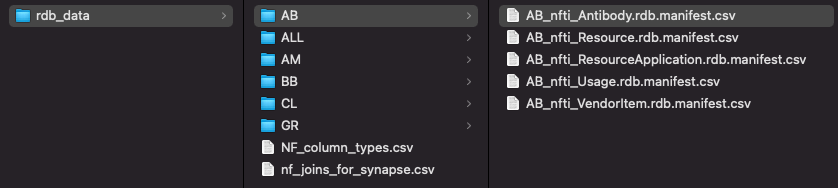

## Modules:

Fill out args section with all path, filename and query info.

1. **Create, Load or Visualize your database**
    - You only need to create your database once. If you have a new datamodel and want to update it, first `drop` your old database (see "Helpful Notes" at the bottom of this notebook for details on how to directly intreact with the database) then create_db_tables again using the new model.
    - You only need to update your database when you change one or more of your manifest files.
    1. `create_db_tables`: Create your database (uses the data model)
    2. `update_db_tables`: Add data to your database (uses the manifests)
        - Can use the same commands as above to inspect your database.
    3. `create_schema_viz`: PNG showing the database structure as a visual (stored in output folder specified).
2. **Query Database and Upload to Synapse**
    - This section assumes you have validated working queries that are in the `Joins_for_Synapse.csv` file.
    - Choose the query you want to run when setting up the args.
3. **MySqy Query Playground**
    - Use this section to test out new queries before adding them to `Joins_for_Synapse.csv`
        - Login to your database (do not modify this section)
        - Write a query.
        - Create a dataframe using your query.
4. **Helpful Notes**
    - Notes on how to interact with your database via the commandline
   

In [5]:
# Imports
import argparse
from IPython.display import Image
import os
from pathlib import Path

from schematic.db.rdb import RDB
from schematic.db.sql import SQL
from schematic.utils.io_utils import load_json
from schematic.utils.sql_utils import sql_helpers

from create_load_sql_db_nf import sql_create_load
from sql_query_nf import sql_query, parse_variables

### Enter all variable information

In [6]:
args = {
    # path info:
    'path_to_configs': 'path/to/configs', # Path to folder containing config files
    'data_dir': 'path/to/data_model', # Path to folder where rdb.model.jsonld
    'rdb_data_dir': 'path/to/rdb_data', #Path to folder that contains manifests and csvs (organized above)
    'output_path': 'output/path',  # Path to folder to store all outputs 
    
    # filenames
    'rdb_jsonld_filename': 'nf_research_tools_test.rdb.model.jsonld',
    'query_csv':'nf_joins_for_synapse.csv',
    'column_types_csv':'NF_column_types.csv',

    # synapse arguments:
    'save_to_synapse': False,
    'save_local': True,
    'table_id_type': 'Staging table ID', # 'Staging table ID' or 'NF table ID'
    'synapse_project_folder': '', # Enter appropriate SynID

    # sql query:
    'name_of_query': '', # Name of the query you want to run from Joins for Synapes
}

## Creating, Loading or Visualizing your database.

In [7]:
# Choose which function(s) to run
create_db_tables = True
update_db_tables = True
create_schema_viz = True

In [8]:
if create_db_tables:
    sql_create_load(args['data_dir'], args['rdb_jsonld_filename'], args['path_to_configs']).create_db_tables()

if update_db_tables:
    sql_create_load(args['data_dir'], args['rdb_jsonld_filename'], args['path_to_configs']).update_db_tables(args['rdb_data_dir'])

if create_schema_viz:
    output_path = sql_create_load(args['data_dir'], args['rdb_jsonld_filename'], args['path_to_configs']).create_schema_viz(args['output_path'], args['rdb_jsonld_filename'])

  var = yaml.load(f)



2022-03-09 14:46:22,138 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-09 14:46:22,139 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-09 14:46:22,142 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-09 14:46:22,144 INFO sqlalchemy.engine.Engine [generated in 0.00230s] ()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [generated in 0.00230s] ()


2022-03-09 14:46:22,147 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-09 14:46:22,148 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-09 14:46:22,165 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - BEGIN (implicit)


2022-03-09 14:46:22,167 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,168 INFO sqlalchemy.engine.Engine [generated in 0.00153s] ('nf_research_tools_test', 'Donor')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [generated in 0.00153s] ('nf_research_tools_test', 'Donor')


2022-03-09 14:46:22,174 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,176 INFO sqlalchemy.engine.Engine [cached since 0.009109s ago] ('nf_research_tools_test', 'CellLine')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.009109s ago] ('nf_research_tools_test', 'CellLine')


2022-03-09 14:46:22,179 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,180 INFO sqlalchemy.engine.Engine [cached since 0.01365s ago] ('nf_research_tools_test', 'Resource')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.01365s ago] ('nf_research_tools_test', 'Resource')


2022-03-09 14:46:22,184 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,185 INFO sqlalchemy.engine.Engine [cached since 0.01844s ago] ('nf_research_tools_test', 'GeneticReagent')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.01844s ago] ('nf_research_tools_test', 'GeneticReagent')


2022-03-09 14:46:22,187 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,188 INFO sqlalchemy.engine.Engine [cached since 0.02183s ago] ('nf_research_tools_test', 'Antibody')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.02183s ago] ('nf_research_tools_test', 'Antibody')


2022-03-09 14:46:22,191 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,192 INFO sqlalchemy.engine.Engine [cached since 0.02507s ago] ('nf_research_tools_test', 'AnimalModel')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.02507s ago] ('nf_research_tools_test', 'AnimalModel')


2022-03-09 14:46:22,194 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,196 INFO sqlalchemy.engine.Engine [cached since 0.02927s ago] ('nf_research_tools_test', 'Usage')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.02927s ago] ('nf_research_tools_test', 'Usage')


2022-03-09 14:46:22,198 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,200 INFO sqlalchemy.engine.Engine [cached since 0.0333s ago] ('nf_research_tools_test', 'Publication')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.0333s ago] ('nf_research_tools_test', 'Publication')


2022-03-09 14:46:22,203 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,204 INFO sqlalchemy.engine.Engine [cached since 0.03717s ago] ('nf_research_tools_test', 'Biobank')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.03717s ago] ('nf_research_tools_test', 'Biobank')


2022-03-09 14:46:22,206 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,207 INFO sqlalchemy.engine.Engine [cached since 0.04055s ago] ('nf_research_tools_test', 'VendorItem')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.04055s ago] ('nf_research_tools_test', 'VendorItem')


2022-03-09 14:46:22,223 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,225 INFO sqlalchemy.engine.Engine [cached since 0.05794s ago] ('nf_research_tools_test', 'Vendor')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.05794s ago] ('nf_research_tools_test', 'Vendor')


2022-03-09 14:46:22,227 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,229 INFO sqlalchemy.engine.Engine [cached since 0.06201s ago] ('nf_research_tools_test', 'Observation')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.06201s ago] ('nf_research_tools_test', 'Observation')


2022-03-09 14:46:22,231 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,233 INFO sqlalchemy.engine.Engine [cached since 0.06599s ago] ('nf_research_tools_test', 'Investigator')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.06599s ago] ('nf_research_tools_test', 'Investigator')


2022-03-09 14:46:22,235 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,236 INFO sqlalchemy.engine.Engine [cached since 0.06942s ago] ('nf_research_tools_test', 'ResourceApplication')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.06942s ago] ('nf_research_tools_test', 'ResourceApplication')


2022-03-09 14:46:22,238 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,239 INFO sqlalchemy.engine.Engine [cached since 0.07231s ago] ('nf_research_tools_test', 'Mutation')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.07231s ago] ('nf_research_tools_test', 'Mutation')


2022-03-09 14:46:22,241 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,242 INFO sqlalchemy.engine.Engine [cached since 0.07526s ago] ('nf_research_tools_test', 'MutationDetails')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.07526s ago] ('nf_research_tools_test', 'MutationDetails')


2022-03-09 14:46:22,245 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,246 INFO sqlalchemy.engine.Engine [cached since 0.07958s ago] ('nf_research_tools_test', 'Development')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.07958s ago] ('nf_research_tools_test', 'Development')


2022-03-09 14:46:22,248 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %s AND table_name = %s


2022-03-09 14:46:22,249 INFO sqlalchemy.engine.Engine [cached since 0.08255s ago] ('nf_research_tools_test', 'Funder')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [cached since 0.08255s ago] ('nf_research_tools_test', 'Funder')


2022-03-09 14:46:22,253 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,330 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-09 14:46:22,331 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-09 14:46:22,334 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-09 14:46:22,335 INFO sqlalchemy.engine.Engine [generated in 0.00114s] ()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [generated in 0.00114s] ()


2022-03-09 14:46:22,338 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-09 14:46:22,339 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ()
  update_table = input_table[input_table.columns & table_attributes]



2022-03-09 14:46:22,355 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,356 INFO sqlalchemy.engine.Engine [raw sql] ('b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,378 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,381 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,382 INFO sqlalchemy.engine.Engine [raw sql] ('b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'Mus musculus', None, None, None, 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'Mus musculus', None, None, None, 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,383 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,385 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,386 INFO sqlalchemy.engine.Engine [raw sql] ('8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,387 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,389 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,390 INFO sqlalchemy.engine.Engine [raw sql] ('8219593c-66cc-4744-982a-4af49e09e5ca', None, 'Mus musculus', None, None, None, '8219593c-66cc-4744-982a-4af49e09e5ca', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('8219593c-66cc-4744-982a-4af49e09e5ca', None, 'Mus musculus', None, None, None, '8219593c-66cc-4744-982a-4af49e09e5ca', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,392 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,393 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,394 INFO sqlalchemy.engine.Engine [raw sql] ('7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,398 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,399 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,401 INFO sqlalchemy.engine.Engine [raw sql] ('7b50b518-1d02-4186-a701-733abd204b78', None, 'Mus musculus', None, None, None, '7b50b518-1d02-4186-a701-733abd204b78', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('7b50b518-1d02-4186-a701-733abd204b78', None, 'Mus musculus', None, None, None, '7b50b518-1d02-4186-a701-733abd204b78', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,402 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,403 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,404 INFO sqlalchemy.engine.Engine [raw sql] ('d2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('d2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,406 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,423 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,424 INFO sqlalchemy.engine.Engine [raw sql] ('d2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'Mus musculus', None, None, None, 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('d2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'Mus musculus', None, None, None, 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,425 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,427 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,429 INFO sqlalchemy.engine.Engine [raw sql] ('be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,431 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,433 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,434 INFO sqlalchemy.engine.Engine [raw sql] ('be180150-374d-4459-9a81-398c8a34bca9', None, 'Mus musculus', None, None, None, 'be180150-374d-4459-9a81-398c8a34bca9', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('be180150-374d-4459-9a81-398c8a34bca9', None, 'Mus musculus', None, None, None, 'be180150-374d-4459-9a81-398c8a34bca9', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,436 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,437 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,438 INFO sqlalchemy.engine.Engine [raw sql] ('adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,439 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,441 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,442 INFO sqlalchemy.engine.Engine [raw sql] ('adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'Mus musculus', None, None, None, 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'Mus musculus', None, None, None, 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,445 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,446 INFO sqlalchemy.engine.Engine [raw sql] ('ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,449 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,451 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,453 INFO sqlalchemy.engine.Engine [raw sql] ('ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'Mus musculus', None, None, None, 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'Mus musculus', None, None, None, 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,454 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,456 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,457 INFO sqlalchemy.engine.Engine [raw sql] ('1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,473 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,475 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,476 INFO sqlalchemy.engine.Engine [raw sql] ('1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'Mus musculus', None, None, None, '1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'Mus musculus', None, None, None, '1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,477 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,479 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,480 INFO sqlalchemy.engine.Engine [raw sql] ('c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,482 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,484 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,485 INFO sqlalchemy.engine.Engine [raw sql] ('c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'Mus musculus', None, None, None, 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'Mus musculus', None, None, None, 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,487 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,488 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,489 INFO sqlalchemy.engine.Engine [raw sql] ('609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,490 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,492 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,493 INFO sqlalchemy.engine.Engine [raw sql] ('609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'Mus musculus', None, None, None, '609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'Mus musculus', None, None, None, '609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,495 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,496 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,498 INFO sqlalchemy.engine.Engine [raw sql] ('a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,500 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,502 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,503 INFO sqlalchemy.engine.Engine [raw sql] ('a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'Mus musculus', None, None, None, 'a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'Mus musculus', None, None, None, 'a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,505 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,506 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,507 INFO sqlalchemy.engine.Engine [raw sql] ('ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,523 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,524 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,526 INFO sqlalchemy.engine.Engine [raw sql] ('ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'Mus musculus', None, None, None, 'ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'Mus musculus', None, None, None, 'ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,527 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,529 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,530 INFO sqlalchemy.engine.Engine [raw sql] ('50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,532 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,534 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,535 INFO sqlalchemy.engine.Engine [raw sql] ('50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'Mus musculus', None, None, None, '50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'Mus musculus', None, None, None, '50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,537 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,538 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,539 INFO sqlalchemy.engine.Engine [raw sql] ('6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,541 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,542 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,543 INFO sqlalchemy.engine.Engine [raw sql] ('6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'Mus musculus', None, None, None, '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'Mus musculus', None, None, None, '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,545 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,547 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,548 INFO sqlalchemy.engine.Engine [raw sql] ('37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,551 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,553 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,554 INFO sqlalchemy.engine.Engine [raw sql] ('37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'Mus musculus', None, None, None, '37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'Mus musculus', None, None, None, '37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,556 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,573 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,574 INFO sqlalchemy.engine.Engine [raw sql] ('00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,577 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,579 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,580 INFO sqlalchemy.engine.Engine [raw sql] ('00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'Mus musculus', None, None, None, '00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'Mus musculus', None, None, None, '00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,582 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,584 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,585 INFO sqlalchemy.engine.Engine [raw sql] ('d70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'Sus scrofa', 'NaN', 'NaN', 'NaN', 'd70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'Sus scrofa', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('d70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'Sus scrofa', 'NaN', 'NaN', 'NaN', 'd70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'Sus scrofa', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,588 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,590 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,591 INFO sqlalchemy.engine.Engine [raw sql] ('d70ba323-d39a-48ef-b809-f8ec814a1161', None, 'Sus scrofa', None, None, None, 'd70ba323-d39a-48ef-b809-f8ec814a1161', None, 'Sus scrofa', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('d70ba323-d39a-48ef-b809-f8ec814a1161', None, 'Sus scrofa', None, None, None, 'd70ba323-d39a-48ef-b809-f8ec814a1161', None, 'Sus scrofa', None, None, None)


2022-03-09 14:46:22,593 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,594 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,595 INFO sqlalchemy.engine.Engine [raw sql] ('224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,598 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,600 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,601 INFO sqlalchemy.engine.Engine [raw sql] ('224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'Mus musculus', None, None, None, '224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'Mus musculus', None, None, None, '224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,603 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,604 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,605 INFO sqlalchemy.engine.Engine [raw sql] ('82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:22,623 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,625 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,626 INFO sqlalchemy.engine.Engine [raw sql] ('82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', None, 'Mus musculus', None, None, None, '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', None, 'Mus musculus', None, None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', None, 'Mus musculus', None, None, None, '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', None, 'Mus musculus', None, None, None)


2022-03-09 14:46:22,628 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,640 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,641 INFO sqlalchemy.engine.Engine [raw sql] ('418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'Homo sapiens', 'Female', 31.0, 'Black', '418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'Homo sapiens', 'Female', 31.0, 'Black')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'Homo sapiens', 'Female', 31.0, 'Black', '418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'Homo sapiens', 'Female', 31.0, 'Black')


2022-03-09 14:46:22,647 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,649 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,651 INFO sqlalchemy.engine.Engine [raw sql] ('418d199d-c37a-4695-acb7-807122379fcb', None, 'Homo sapiens', 'Female', 31.0, 'Black', '418d199d-c37a-4695-acb7-807122379fcb', None, 'Homo sapiens', 'Female', 31.0, 'Black')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('418d199d-c37a-4695-acb7-807122379fcb', None, 'Homo sapiens', 'Female', 31.0, 'Black', '418d199d-c37a-4695-acb7-807122379fcb', None, 'Homo sapiens', 'Female', 31.0, 'Black')


2022-03-09 14:46:22,653 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,654 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,655 INFO sqlalchemy.engine.Engine [raw sql] ('45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'Homo sapiens', 'Male', 32.0, 'NaN', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'Homo sapiens', 'Male', 32.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'Homo sapiens', 'Male', 32.0, 'NaN', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'Homo sapiens', 'Male', 32.0, 'NaN')


2022-03-09 14:46:22,674 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,676 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,677 INFO sqlalchemy.engine.Engine [raw sql] ('45f0b93c-a50b-45b0-b235-cc195d76aa48', None, 'Homo sapiens', 'Male', 32.0, None, '45f0b93c-a50b-45b0-b235-cc195d76aa48', None, 'Homo sapiens', 'Male', 32.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('45f0b93c-a50b-45b0-b235-cc195d76aa48', None, 'Homo sapiens', 'Male', 32.0, None, '45f0b93c-a50b-45b0-b235-cc195d76aa48', None, 'Homo sapiens', 'Male', 32.0, None)


2022-03-09 14:46:22,678 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,680 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,681 INFO sqlalchemy.engine.Engine [raw sql] ('4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'Homo sapiens', 'Male', 19.0, 'NaN', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'Homo sapiens', 'Male', 19.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'Homo sapiens', 'Male', 19.0, 'NaN', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'Homo sapiens', 'Male', 19.0, 'NaN')


2022-03-09 14:46:22,683 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,686 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,687 INFO sqlalchemy.engine.Engine [raw sql] ('4fdcbad1-477b-46ce-82e6-7d0550383b46', None, 'Homo sapiens', 'Male', 19.0, None, '4fdcbad1-477b-46ce-82e6-7d0550383b46', None, 'Homo sapiens', 'Male', 19.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4fdcbad1-477b-46ce-82e6-7d0550383b46', None, 'Homo sapiens', 'Male', 19.0, None, '4fdcbad1-477b-46ce-82e6-7d0550383b46', None, 'Homo sapiens', 'Male', 19.0, None)


2022-03-09 14:46:22,688 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,690 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,692 INFO sqlalchemy.engine.Engine [raw sql] ('c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'Homo sapiens', 'Female', 35.0, 'NaN', 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'Homo sapiens', 'Female', 35.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'Homo sapiens', 'Female', 35.0, 'NaN', 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'Homo sapiens', 'Female', 35.0, 'NaN')


2022-03-09 14:46:22,695 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,698 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,699 INFO sqlalchemy.engine.Engine [raw sql] ('c6a7d35b-580c-41ca-bf82-b5bfd5234289', None, 'Homo sapiens', 'Female', 35.0, None, 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', None, 'Homo sapiens', 'Female', 35.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('c6a7d35b-580c-41ca-bf82-b5bfd5234289', None, 'Homo sapiens', 'Female', 35.0, None, 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', None, 'Homo sapiens', 'Female', 35.0, None)


2022-03-09 14:46:22,700 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,703 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,704 INFO sqlalchemy.engine.Engine [raw sql] ('108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'Homo sapiens', 'Male', 6.0, 'NaN', '108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'Homo sapiens', 'Male', 6.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'Homo sapiens', 'Male', 6.0, 'NaN', '108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'Homo sapiens', 'Male', 6.0, 'NaN')


2022-03-09 14:46:22,723 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,725 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,726 INFO sqlalchemy.engine.Engine [raw sql] ('108cfda9-d027-49cf-b950-d3e76097aa3c', None, 'Homo sapiens', 'Male', 6.0, None, '108cfda9-d027-49cf-b950-d3e76097aa3c', None, 'Homo sapiens', 'Male', 6.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('108cfda9-d027-49cf-b950-d3e76097aa3c', None, 'Homo sapiens', 'Male', 6.0, None, '108cfda9-d027-49cf-b950-d3e76097aa3c', None, 'Homo sapiens', 'Male', 6.0, None)


2022-03-09 14:46:22,729 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,731 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,732 INFO sqlalchemy.engine.Engine [raw sql] ('10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'Homo sapiens', 'Female', 69.0, 'NaN', '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'Homo sapiens', 'Female', 69.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'Homo sapiens', 'Female', 69.0, 'NaN', '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'Homo sapiens', 'Female', 69.0, 'NaN')


2022-03-09 14:46:22,735 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,737 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,738 INFO sqlalchemy.engine.Engine [raw sql] ('10a5e6f2-d331-4b5e-9e43-888cca69d5a9', None, 'Homo sapiens', 'Female', 69.0, None, '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', None, 'Homo sapiens', 'Female', 69.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('10a5e6f2-d331-4b5e-9e43-888cca69d5a9', None, 'Homo sapiens', 'Female', 69.0, None, '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', None, 'Homo sapiens', 'Female', 69.0, None)


2022-03-09 14:46:22,740 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,742 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,743 INFO sqlalchemy.engine.Engine [raw sql] ('4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


2022-03-09 14:46:22,746 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,749 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,751 INFO sqlalchemy.engine.Engine [raw sql] ('4e75c936-aa0d-4689-a0fd-d41b0072bc5c', None, 'Homo sapiens', 'Female', None, None, '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', None, 'Homo sapiens', 'Female', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4e75c936-aa0d-4689-a0fd-d41b0072bc5c', None, 'Homo sapiens', 'Female', None, None, '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', None, 'Homo sapiens', 'Female', None, None)


2022-03-09 14:46:22,753 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,755 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,756 INFO sqlalchemy.engine.Engine [raw sql] ('6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'Homo sapiens', 'Female', 23.0, 'NaN', '6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'Homo sapiens', 'Female', 23.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'Homo sapiens', 'Female', 23.0, 'NaN', '6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'Homo sapiens', 'Female', 23.0, 'NaN')


2022-03-09 14:46:22,774 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,776 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,777 INFO sqlalchemy.engine.Engine [raw sql] ('6c7d59b3-e542-40f3-9d5f-04ca85466b26', None, 'Homo sapiens', 'Female', 23.0, None, '6c7d59b3-e542-40f3-9d5f-04ca85466b26', None, 'Homo sapiens', 'Female', 23.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('6c7d59b3-e542-40f3-9d5f-04ca85466b26', None, 'Homo sapiens', 'Female', 23.0, None, '6c7d59b3-e542-40f3-9d5f-04ca85466b26', None, 'Homo sapiens', 'Female', 23.0, None)


2022-03-09 14:46:22,779 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,781 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,782 INFO sqlalchemy.engine.Engine [raw sql] ('c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'Homo sapiens', 'Male', 5.0, 'NaN', 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'Homo sapiens', 'Male', 5.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'Homo sapiens', 'Male', 5.0, 'NaN', 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'Homo sapiens', 'Male', 5.0, 'NaN')


2022-03-09 14:46:22,784 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,786 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,787 INFO sqlalchemy.engine.Engine [raw sql] ('c3fb3ba5-903b-4b31-a4f1-03462e18093f', None, 'Homo sapiens', 'Male', 5.0, None, 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', None, 'Homo sapiens', 'Male', 5.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('c3fb3ba5-903b-4b31-a4f1-03462e18093f', None, 'Homo sapiens', 'Male', 5.0, None, 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', None, 'Homo sapiens', 'Male', 5.0, None)


2022-03-09 14:46:22,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,790 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,791 INFO sqlalchemy.engine.Engine [raw sql] ('bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


2022-03-09 14:46:22,794 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,801 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,802 INFO sqlalchemy.engine.Engine [raw sql] ('bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', None, 'Homo sapiens', 'Female', None, None, 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', None, 'Homo sapiens', 'Female', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', None, 'Homo sapiens', 'Female', None, None, 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', None, 'Homo sapiens', 'Female', None, None)


2022-03-09 14:46:22,804 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,805 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,806 INFO sqlalchemy.engine.Engine [raw sql] ('3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', '3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', '3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


2022-03-09 14:46:22,823 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,825 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,827 INFO sqlalchemy.engine.Engine [raw sql] ('3c179a73-3638-4be9-91ea-701718297113', None, 'Homo sapiens', 'Female', None, None, '3c179a73-3638-4be9-91ea-701718297113', None, 'Homo sapiens', 'Female', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('3c179a73-3638-4be9-91ea-701718297113', None, 'Homo sapiens', 'Female', None, None, '3c179a73-3638-4be9-91ea-701718297113', None, 'Homo sapiens', 'Female', None, None)


2022-03-09 14:46:22,829 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,830 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,831 INFO sqlalchemy.engine.Engine [raw sql] ('4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:22,834 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,836 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,837 INFO sqlalchemy.engine.Engine [raw sql] ('4edead03-da70-41fa-829d-2bd511e9f3c1', None, 'Homo sapiens', 'unknown', None, None, '4edead03-da70-41fa-829d-2bd511e9f3c1', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4edead03-da70-41fa-829d-2bd511e9f3c1', None, 'Homo sapiens', 'unknown', None, None, '4edead03-da70-41fa-829d-2bd511e9f3c1', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:22,838 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,839 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,840 INFO sqlalchemy.engine.Engine [raw sql] ('5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:22,843 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,845 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,846 INFO sqlalchemy.engine.Engine [raw sql] ('5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', None, 'Homo sapiens', 'unknown', None, None, '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', None, 'Homo sapiens', 'unknown', None, None, '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:22,848 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,850 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,851 INFO sqlalchemy.engine.Engine [raw sql] ('1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:22,853 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,856 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,857 INFO sqlalchemy.engine.Engine [raw sql] ('1420b3e6-04f9-4e8c-846b-04968327e31f', None, 'Homo sapiens', 'unknown', None, None, '1420b3e6-04f9-4e8c-846b-04968327e31f', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('1420b3e6-04f9-4e8c-846b-04968327e31f', None, 'Homo sapiens', 'unknown', None, None, '1420b3e6-04f9-4e8c-846b-04968327e31f', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:22,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,874 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,875 INFO sqlalchemy.engine.Engine [raw sql] ('f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'Homo sapiens', 'Male', 27.0, 'Asian', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'Homo sapiens', 'Male', 27.0, 'Asian')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'Homo sapiens', 'Male', 27.0, 'Asian', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'Homo sapiens', 'Male', 27.0, 'Asian')


2022-03-09 14:46:22,878 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,881 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,882 INFO sqlalchemy.engine.Engine [raw sql] ('f860ef0a-2501-4fa1-b0be-f638bde25c6d', None, 'Homo sapiens', 'Male', 27.0, 'Asian', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', None, 'Homo sapiens', 'Male', 27.0, 'Asian')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('f860ef0a-2501-4fa1-b0be-f638bde25c6d', None, 'Homo sapiens', 'Male', 27.0, 'Asian', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', None, 'Homo sapiens', 'Male', 27.0, 'Asian')


2022-03-09 14:46:22,883 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,885 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,886 INFO sqlalchemy.engine.Engine [raw sql] ('b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:22,888 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,891 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,892 INFO sqlalchemy.engine.Engine [raw sql] ('b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', None, 'Homo sapiens', 'unknown', None, None, 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', None, 'Homo sapiens', 'unknown', None, None, 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:22,893 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,895 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,896 INFO sqlalchemy.engine.Engine [raw sql] ('b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:22,899 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,901 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,902 INFO sqlalchemy.engine.Engine [raw sql] ('b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', None, 'Homo sapiens', 'unknown', None, None, 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', None, 'Homo sapiens', 'unknown', None, None, 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:22,904 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,906 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,907 INFO sqlalchemy.engine.Engine [raw sql] ('f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN', 'f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN', 'f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN')


2022-03-09 14:46:22,924 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,925 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,927 INFO sqlalchemy.engine.Engine [raw sql] ('f926219f-4a17-45cc-a41a-aee6abb4c761', None, 'Homo sapiens', 'Male', None, None, 'f926219f-4a17-45cc-a41a-aee6abb4c761', None, 'Homo sapiens', 'Male', None, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('f926219f-4a17-45cc-a41a-aee6abb4c761', None, 'Homo sapiens', 'Male', None, None, 'f926219f-4a17-45cc-a41a-aee6abb4c761', None, 'Homo sapiens', 'Male', None, None)


2022-03-09 14:46:22,929 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,931 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,932 INFO sqlalchemy.engine.Engine [raw sql] ('63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'Homo sapiens', 'Male', 28.0, 'NaN', '63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'Homo sapiens', 'Male', 28.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'Homo sapiens', 'Male', 28.0, 'NaN', '63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'Homo sapiens', 'Male', 28.0, 'NaN')


2022-03-09 14:46:22,934 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,936 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,938 INFO sqlalchemy.engine.Engine [raw sql] ('63858b37-331f-430d-bcfa-01f6836a6003', None, 'Homo sapiens', 'Male', 28.0, None, '63858b37-331f-430d-bcfa-01f6836a6003', None, 'Homo sapiens', 'Male', 28.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('63858b37-331f-430d-bcfa-01f6836a6003', None, 'Homo sapiens', 'Male', 28.0, None, '63858b37-331f-430d-bcfa-01f6836a6003', None, 'Homo sapiens', 'Male', 28.0, None)


2022-03-09 14:46:22,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,941 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,942 INFO sqlalchemy.engine.Engine [raw sql] ('7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'Homo sapiens', 'Male', 35.0, 'NaN', '7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'Homo sapiens', 'Male', 35.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'Homo sapiens', 'Male', 35.0, 'NaN', '7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'Homo sapiens', 'Male', 35.0, 'NaN')


2022-03-09 14:46:22,944 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,946 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,947 INFO sqlalchemy.engine.Engine [raw sql] ('7cd65ff8-953a-40ed-b318-b8562c646b11', None, 'Homo sapiens', 'Male', 35.0, None, '7cd65ff8-953a-40ed-b318-b8562c646b11', None, 'Homo sapiens', 'Male', 35.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('7cd65ff8-953a-40ed-b318-b8562c646b11', None, 'Homo sapiens', 'Male', 35.0, None, '7cd65ff8-953a-40ed-b318-b8562c646b11', None, 'Homo sapiens', 'Male', 35.0, None)


2022-03-09 14:46:22,949 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,952 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,953 INFO sqlalchemy.engine.Engine [raw sql] ('362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'Homo sapiens', 'Female', 43.0, 'NaN', '362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'Homo sapiens', 'Female', 43.0, 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'Homo sapiens', 'Female', 43.0, 'NaN', '362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'Homo sapiens', 'Female', 43.0, 'NaN')


2022-03-09 14:46:22,956 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,973 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,974 INFO sqlalchemy.engine.Engine [raw sql] ('362b5ed5-90bd-47b6-89d7-0093f1b79204', None, 'Homo sapiens', 'Female', 43.0, None, '362b5ed5-90bd-47b6-89d7-0093f1b79204', None, 'Homo sapiens', 'Female', 43.0, None)


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('362b5ed5-90bd-47b6-89d7-0093f1b79204', None, 'Homo sapiens', 'Female', 43.0, None, '362b5ed5-90bd-47b6-89d7-0093f1b79204', None, 'Homo sapiens', 'Female', 43.0, None)


2022-03-09 14:46:22,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,978 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,979 INFO sqlalchemy.engine.Engine [raw sql] ('49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'Homo sapiens', 'Female', 11.0, 'White', '49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'Homo sapiens', 'Female', 11.0, 'White')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'Homo sapiens', 'Female', 11.0, 'White', '49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'Homo sapiens', 'Female', 11.0, 'White')


2022-03-09 14:46:22,981 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,984 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,985 INFO sqlalchemy.engine.Engine [raw sql] ('49b6cb1f-7231-4208-a012-41c9bffff993', None, 'Homo sapiens', 'Female', 11.0, 'White', '49b6cb1f-7231-4208-a012-41c9bffff993', None, 'Homo sapiens', 'Female', 11.0, 'White')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('49b6cb1f-7231-4208-a012-41c9bffff993', None, 'Homo sapiens', 'Female', 11.0, 'White', '49b6cb1f-7231-4208-a012-41c9bffff993', None, 'Homo sapiens', 'Female', 11.0, 'White')


2022-03-09 14:46:22,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,988 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,989 INFO sqlalchemy.engine.Engine [raw sql] ('0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'Homo sapiens', 'Male', 31.0, 'White', '0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'Homo sapiens', 'Male', 31.0, 'White')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'Homo sapiens', 'Male', 31.0, 'White', '0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'Homo sapiens', 'Male', 31.0, 'White')


2022-03-09 14:46:22,990 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:22,992 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,993 INFO sqlalchemy.engine.Engine [raw sql] ('0460814f-4395-46bd-8acf-f1ded8afde9d', None, 'Homo sapiens', 'Male', 31.0, 'White', '0460814f-4395-46bd-8acf-f1ded8afde9d', None, 'Homo sapiens', 'Male', 31.0, 'White')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('0460814f-4395-46bd-8acf-f1ded8afde9d', None, 'Homo sapiens', 'Male', 31.0, 'White', '0460814f-4395-46bd-8acf-f1ded8afde9d', None, 'Homo sapiens', 'Male', 31.0, 'White')


2022-03-09 14:46:22,995 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:22,997 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:22,998 INFO sqlalchemy.engine.Engine [raw sql] ('4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:22] sqlalchemy.engine.Engine - [raw sql] ('4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,001 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,003 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,004 INFO sqlalchemy.engine.Engine [raw sql] ('4442c058-074b-4b2e-9bb3-80a1a6cb75d1', None, 'Homo sapiens', 'unknown', None, None, '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('4442c058-074b-4b2e-9bb3-80a1a6cb75d1', None, 'Homo sapiens', 'unknown', None, None, '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,006 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,023 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,024 INFO sqlalchemy.engine.Engine [raw sql] ('809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,025 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,027 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,029 INFO sqlalchemy.engine.Engine [raw sql] ('809313a5-d663-4433-9a89-cb34a350426b', None, 'Homo sapiens', 'unknown', None, None, '809313a5-d663-4433-9a89-cb34a350426b', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('809313a5-d663-4433-9a89-cb34a350426b', None, 'Homo sapiens', 'unknown', None, None, '809313a5-d663-4433-9a89-cb34a350426b', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,030 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,032 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,034 INFO sqlalchemy.engine.Engine [raw sql] ('fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'Homo sapiens', 'Male', 10.0, 'NaN', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'Homo sapiens', 'Male', 10.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'Homo sapiens', 'Male', 10.0, 'NaN', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'Homo sapiens', 'Male', 10.0, 'NaN')


2022-03-09 14:46:23,036 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,037 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,039 INFO sqlalchemy.engine.Engine [raw sql] ('fd6e6f02-bf0f-48db-b1ad-9696630bed4d', None, 'Homo sapiens', 'Male', 10.0, None, 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', None, 'Homo sapiens', 'Male', 10.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('fd6e6f02-bf0f-48db-b1ad-9696630bed4d', None, 'Homo sapiens', 'Male', 10.0, None, 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', None, 'Homo sapiens', 'Male', 10.0, None)


2022-03-09 14:46:23,040 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,042 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,044 INFO sqlalchemy.engine.Engine [raw sql] ('777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'Homo sapiens', 'Female', 66.0, 'NaN', '777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'Homo sapiens', 'Female', 66.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'Homo sapiens', 'Female', 66.0, 'NaN', '777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'Homo sapiens', 'Female', 66.0, 'NaN')


2022-03-09 14:46:23,047 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,050 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,052 INFO sqlalchemy.engine.Engine [raw sql] ('777cd68f-b90f-4b2d-87b0-586a8daa53ca', None, 'Homo sapiens', 'Female', 66.0, None, '777cd68f-b90f-4b2d-87b0-586a8daa53ca', None, 'Homo sapiens', 'Female', 66.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('777cd68f-b90f-4b2d-87b0-586a8daa53ca', None, 'Homo sapiens', 'Female', 66.0, None, '777cd68f-b90f-4b2d-87b0-586a8daa53ca', None, 'Homo sapiens', 'Female', 66.0, None)


2022-03-09 14:46:23,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,055 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,057 INFO sqlalchemy.engine.Engine [raw sql] ('3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'Homo sapiens', 'Female', 33.0, 'NaN', '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'Homo sapiens', 'Female', 33.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'Homo sapiens', 'Female', 33.0, 'NaN', '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'Homo sapiens', 'Female', 33.0, 'NaN')


2022-03-09 14:46:23,073 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,075 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,076 INFO sqlalchemy.engine.Engine [raw sql] ('3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', None, 'Homo sapiens', 'Female', 33.0, None, '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', None, 'Homo sapiens', 'Female', 33.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', None, 'Homo sapiens', 'Female', 33.0, None, '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', None, 'Homo sapiens', 'Female', 33.0, None)


2022-03-09 14:46:23,078 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,079 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,080 INFO sqlalchemy.engine.Engine [raw sql] ('b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'NaN', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'NaN', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'NaN')


2022-03-09 14:46:23,082 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,085 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,086 INFO sqlalchemy.engine.Engine [raw sql] ('b9759537-b897-44c4-9657-01436af495d2', None, 'Homo sapiens', 'Female', 8.0, None, 'b9759537-b897-44c4-9657-01436af495d2', None, 'Homo sapiens', 'Female', 8.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b9759537-b897-44c4-9657-01436af495d2', None, 'Homo sapiens', 'Female', 8.0, None, 'b9759537-b897-44c4-9657-01436af495d2', None, 'Homo sapiens', 'Female', 8.0, None)


2022-03-09 14:46:23,087 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,089 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,090 INFO sqlalchemy.engine.Engine [raw sql] ('87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'Homo sapiens', 'Female', 9.0, 'NaN', '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'Homo sapiens', 'Female', 9.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'Homo sapiens', 'Female', 9.0, 'NaN', '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'Homo sapiens', 'Female', 9.0, 'NaN')


2022-03-09 14:46:23,092 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,094 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,095 INFO sqlalchemy.engine.Engine [raw sql] ('87aa03a3-e7fb-4229-8b59-4b31a7dfd496', None, 'Homo sapiens', 'Female', 9.0, None, '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', None, 'Homo sapiens', 'Female', 9.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('87aa03a3-e7fb-4229-8b59-4b31a7dfd496', None, 'Homo sapiens', 'Female', 9.0, None, '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', None, 'Homo sapiens', 'Female', 9.0, None)


2022-03-09 14:46:23,096 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,098 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,098 INFO sqlalchemy.engine.Engine [raw sql] ('421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'Homo sapiens', 'Male', 72.0, 'NaN', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'Homo sapiens', 'Male', 72.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'Homo sapiens', 'Male', 72.0, 'NaN', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'Homo sapiens', 'Male', 72.0, 'NaN')


2022-03-09 14:46:23,100 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,102 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,103 INFO sqlalchemy.engine.Engine [raw sql] ('421820aa-3437-4f90-9bc8-f68c65d50a9a', None, 'Homo sapiens', 'Male', 72.0, None, '421820aa-3437-4f90-9bc8-f68c65d50a9a', None, 'Homo sapiens', 'Male', 72.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('421820aa-3437-4f90-9bc8-f68c65d50a9a', None, 'Homo sapiens', 'Male', 72.0, None, '421820aa-3437-4f90-9bc8-f68c65d50a9a', None, 'Homo sapiens', 'Male', 72.0, None)


2022-03-09 14:46:23,105 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,106 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,107 INFO sqlalchemy.engine.Engine [raw sql] ('7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'Homo sapiens', 'Male', 48.0, 'NaN', '7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'Homo sapiens', 'Male', 48.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'Homo sapiens', 'Male', 48.0, 'NaN', '7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'Homo sapiens', 'Male', 48.0, 'NaN')


2022-03-09 14:46:23,123 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,124 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,125 INFO sqlalchemy.engine.Engine [raw sql] ('7da1348b-16ad-4d0d-9558-9f3395361518', None, 'Homo sapiens', 'Male', 48.0, None, '7da1348b-16ad-4d0d-9558-9f3395361518', None, 'Homo sapiens', 'Male', 48.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7da1348b-16ad-4d0d-9558-9f3395361518', None, 'Homo sapiens', 'Male', 48.0, None, '7da1348b-16ad-4d0d-9558-9f3395361518', None, 'Homo sapiens', 'Male', 48.0, None)


2022-03-09 14:46:23,127 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,129 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,130 INFO sqlalchemy.engine.Engine [raw sql] ('b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN', 'b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN', 'b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN')


2022-03-09 14:46:23,132 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,134 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,135 INFO sqlalchemy.engine.Engine [raw sql] ('b543357b-0345-4a8b-8ede-b0a8a30092b7', None, 'Homo sapiens', 'Male', 54.0, None, 'b543357b-0345-4a8b-8ede-b0a8a30092b7', None, 'Homo sapiens', 'Male', 54.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b543357b-0345-4a8b-8ede-b0a8a30092b7', None, 'Homo sapiens', 'Male', 54.0, None, 'b543357b-0345-4a8b-8ede-b0a8a30092b7', None, 'Homo sapiens', 'Male', 54.0, None)


2022-03-09 14:46:23,136 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,137 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,138 INFO sqlalchemy.engine.Engine [raw sql] ('b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'Homo sapiens', 'Female', 51.0, 'NaN', 'b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'Homo sapiens', 'Female', 51.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'Homo sapiens', 'Female', 51.0, 'NaN', 'b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'Homo sapiens', 'Female', 51.0, 'NaN')


2022-03-09 14:46:23,139 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,141 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,142 INFO sqlalchemy.engine.Engine [raw sql] ('b50e7512-a686-4c50-9e95-6af9d06bf826', None, 'Homo sapiens', 'Female', 51.0, None, 'b50e7512-a686-4c50-9e95-6af9d06bf826', None, 'Homo sapiens', 'Female', 51.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b50e7512-a686-4c50-9e95-6af9d06bf826', None, 'Homo sapiens', 'Female', 51.0, None, 'b50e7512-a686-4c50-9e95-6af9d06bf826', None, 'Homo sapiens', 'Female', 51.0, None)


2022-03-09 14:46:23,143 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,145 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,146 INFO sqlalchemy.engine.Engine [raw sql] ('b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'Asian', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'Asian')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'Asian', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'Homo sapiens', 'Female', 8.0, 'Asian')


2022-03-09 14:46:23,147 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,150 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,151 INFO sqlalchemy.engine.Engine [raw sql] ('b3964ac1-90da-4af6-b6d8-0dbe343167c2', None, 'Homo sapiens', 'Female', 8.0, 'Asian', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', None, 'Homo sapiens', 'Female', 8.0, 'Asian')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b3964ac1-90da-4af6-b6d8-0dbe343167c2', None, 'Homo sapiens', 'Female', 8.0, 'Asian', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', None, 'Homo sapiens', 'Female', 8.0, 'Asian')


2022-03-09 14:46:23,153 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,154 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,155 INFO sqlalchemy.engine.Engine [raw sql] ('06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


2022-03-09 14:46:23,173 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,175 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,176 INFO sqlalchemy.engine.Engine [raw sql] ('06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', None, 'Homo sapiens', 'Female', None, None, '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', None, 'Homo sapiens', 'Female', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', None, 'Homo sapiens', 'Female', None, None, '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', None, 'Homo sapiens', 'Female', None, None)


2022-03-09 14:46:23,178 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,180 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,182 INFO sqlalchemy.engine.Engine [raw sql] ('7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,184 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,186 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,187 INFO sqlalchemy.engine.Engine [raw sql] ('7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', None, 'Homo sapiens', 'unknown', None, None, '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', None, 'Homo sapiens', 'unknown', None, None, '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,189 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,190 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,191 INFO sqlalchemy.engine.Engine [raw sql] ('dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', 'dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN', 'dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'Homo sapiens', 'Female', 'NaN', 'NaN')


2022-03-09 14:46:23,193 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,195 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,196 INFO sqlalchemy.engine.Engine [raw sql] ('dc739c03-41e0-49cf-87c7-bf132756d0c0', None, 'Homo sapiens', 'Female', None, None, 'dc739c03-41e0-49cf-87c7-bf132756d0c0', None, 'Homo sapiens', 'Female', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('dc739c03-41e0-49cf-87c7-bf132756d0c0', None, 'Homo sapiens', 'Female', None, None, 'dc739c03-41e0-49cf-87c7-bf132756d0c0', None, 'Homo sapiens', 'Female', None, None)


2022-03-09 14:46:23,198 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,199 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,200 INFO sqlalchemy.engine.Engine [raw sql] ('18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,202 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,203 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,204 INFO sqlalchemy.engine.Engine [raw sql] ('18f6f681-54bc-431c-a447-3f3d4eae8229', None, 'Homo sapiens', 'unknown', None, None, '18f6f681-54bc-431c-a447-3f3d4eae8229', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('18f6f681-54bc-431c-a447-3f3d4eae8229', None, 'Homo sapiens', 'unknown', None, None, '18f6f681-54bc-431c-a447-3f3d4eae8229', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,206 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,223 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,224 INFO sqlalchemy.engine.Engine [raw sql] ('48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'Homo sapiens', 'Female', 37.0, 'NaN', '48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'Homo sapiens', 'Female', 37.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'Homo sapiens', 'Female', 37.0, 'NaN', '48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'Homo sapiens', 'Female', 37.0, 'NaN')


2022-03-09 14:46:23,225 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,227 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,228 INFO sqlalchemy.engine.Engine [raw sql] ('48b2f1b9-bb41-4529-a438-e620049308a3', None, 'Homo sapiens', 'Female', 37.0, None, '48b2f1b9-bb41-4529-a438-e620049308a3', None, 'Homo sapiens', 'Female', 37.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('48b2f1b9-bb41-4529-a438-e620049308a3', None, 'Homo sapiens', 'Female', 37.0, None, '48b2f1b9-bb41-4529-a438-e620049308a3', None, 'Homo sapiens', 'Female', 37.0, None)


2022-03-09 14:46:23,230 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,231 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,232 INFO sqlalchemy.engine.Engine [raw sql] ('c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'Homo sapiens', 'Female', 37.0, 'NaN', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'Homo sapiens', 'Female', 37.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'Homo sapiens', 'Female', 37.0, 'NaN', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'Homo sapiens', 'Female', 37.0, 'NaN')


2022-03-09 14:46:23,233 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,235 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,236 INFO sqlalchemy.engine.Engine [raw sql] ('90a9dcca-91aa-4658-b009-29e6d6b20e59', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '90a9dcca-91aa-4658-b009-29e6d6b20e59', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('90a9dcca-91aa-4658-b009-29e6d6b20e59', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '90a9dcca-91aa-4658-b009-29e6d6b20e59', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,237 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,239 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,240 INFO sqlalchemy.engine.Engine [raw sql] ('ed2631bc-7da8-40ae-a738-7576bbc1400f', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'ed2631bc-7da8-40ae-a738-7576bbc1400f', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ed2631bc-7da8-40ae-a738-7576bbc1400f', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'ed2631bc-7da8-40ae-a738-7576bbc1400f', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,241 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,243 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,244 INFO sqlalchemy.engine.Engine [raw sql] ('ed2631bc-7da8-40ae-a738-7576bbc1400f', None, 'Mus musculus', 'unknown', None, None, 'ed2631bc-7da8-40ae-a738-7576bbc1400f', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ed2631bc-7da8-40ae-a738-7576bbc1400f', None, 'Mus musculus', 'unknown', None, None, 'ed2631bc-7da8-40ae-a738-7576bbc1400f', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,246 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,248 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,249 INFO sqlalchemy.engine.Engine [raw sql] ('d21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'Homo sapiens', 'Female', 0.0, 'NaN', 'd21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('d21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'Homo sapiens', 'Female', 0.0, 'NaN', 'd21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,251 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,254 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,255 INFO sqlalchemy.engine.Engine [raw sql] ('d21eae45-70b1-4a29-b939-235860d65d61', None, 'Homo sapiens', 'Female', 0.0, None, 'd21eae45-70b1-4a29-b939-235860d65d61', None, 'Homo sapiens', 'Female', 0.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('d21eae45-70b1-4a29-b939-235860d65d61', None, 'Homo sapiens', 'Female', 0.0, None, 'd21eae45-70b1-4a29-b939-235860d65d61', None, 'Homo sapiens', 'Female', 0.0, None)


2022-03-09 14:46:23,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,274 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,275 INFO sqlalchemy.engine.Engine [raw sql] ('df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,276 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,279 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,280 INFO sqlalchemy.engine.Engine [raw sql] ('df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', None, 'Mus musculus', 'unknown', None, None, 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', None, 'Mus musculus', 'unknown', None, None, 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,281 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,283 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,284 INFO sqlalchemy.engine.Engine [raw sql] ('1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,287 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,288 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,289 INFO sqlalchemy.engine.Engine [raw sql] ('1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', None, 'Homo sapiens', 'unknown', None, None, '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', None, 'Homo sapiens', 'unknown', None, None, '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,291 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,292 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,293 INFO sqlalchemy.engine.Engine [raw sql] ('1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', '1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', '1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,295 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,297 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,298 INFO sqlalchemy.engine.Engine [raw sql] ('1344ce60-935d-444f-9c66-31de158c7db5', None, 'Mus musculus', 'unknown', None, None, '1344ce60-935d-444f-9c66-31de158c7db5', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1344ce60-935d-444f-9c66-31de158c7db5', None, 'Mus musculus', 'unknown', None, None, '1344ce60-935d-444f-9c66-31de158c7db5', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,300 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,301 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,302 INFO sqlalchemy.engine.Engine [raw sql] ('17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', '17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', '17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,306 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,323 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,324 INFO sqlalchemy.engine.Engine [raw sql] ('17468219-eb44-4484-bb76-0e2796ebc3bc', None, 'Mus musculus', 'unknown', None, None, '17468219-eb44-4484-bb76-0e2796ebc3bc', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('17468219-eb44-4484-bb76-0e2796ebc3bc', None, 'Mus musculus', 'unknown', None, None, '17468219-eb44-4484-bb76-0e2796ebc3bc', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,325 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,327 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,328 INFO sqlalchemy.engine.Engine [raw sql] ('cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,329 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,331 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,332 INFO sqlalchemy.engine.Engine [raw sql] ('cb50ce85-f33d-4766-9bdb-526acb4e7ff4', None, 'Mus musculus', 'unknown', None, None, 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('cb50ce85-f33d-4766-9bdb-526acb4e7ff4', None, 'Mus musculus', 'unknown', None, None, 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,334 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,336 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,337 INFO sqlalchemy.engine.Engine [raw sql] ('6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', '6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', '6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,338 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,340 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,341 INFO sqlalchemy.engine.Engine [raw sql] ('6605d8be-9c60-4609-9546-5ce885a20a19', None, 'Mus musculus', 'unknown', None, None, '6605d8be-9c60-4609-9546-5ce885a20a19', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('6605d8be-9c60-4609-9546-5ce885a20a19', None, 'Mus musculus', 'unknown', None, None, '6605d8be-9c60-4609-9546-5ce885a20a19', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,343 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,344 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,345 INFO sqlalchemy.engine.Engine [raw sql] ('f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN', 'f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'Mus musculus', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,348 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,351 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,352 INFO sqlalchemy.engine.Engine [raw sql] ('f3d39faa-3de2-42f5-877f-47ee584f2442', None, 'Mus musculus', 'unknown', None, None, 'f3d39faa-3de2-42f5-877f-47ee584f2442', None, 'Mus musculus', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('f3d39faa-3de2-42f5-877f-47ee584f2442', None, 'Mus musculus', 'unknown', None, None, 'f3d39faa-3de2-42f5-877f-47ee584f2442', None, 'Mus musculus', 'unknown', None, None)


2022-03-09 14:46:23,354 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,355 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,356 INFO sqlalchemy.engine.Engine [raw sql] ('da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'Escherichia coli', 'unknown', 'NaN', 'NaN', 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'Escherichia coli', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'Escherichia coli', 'unknown', 'NaN', 'NaN', 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'Escherichia coli', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,373 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,375 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,377 INFO sqlalchemy.engine.Engine [raw sql] ('da970690-8e8a-4c2a-ac9e-3dda1e92646e', None, 'Escherichia coli', 'unknown', None, None, 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', None, 'Escherichia coli', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('da970690-8e8a-4c2a-ac9e-3dda1e92646e', None, 'Escherichia coli', 'unknown', None, None, 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', None, 'Escherichia coli', 'unknown', None, None)


2022-03-09 14:46:23,379 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,380 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,381 INFO sqlalchemy.engine.Engine [raw sql] ('a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'Homo sapiens', 'Male', 54.0, 'NaN')


2022-03-09 14:46:23,383 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,385 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,386 INFO sqlalchemy.engine.Engine [raw sql] ('a523a3b2-b5a7-4398-9056-2ce0aa221863', None, 'Homo sapiens', 'Male', 54.0, None, 'a523a3b2-b5a7-4398-9056-2ce0aa221863', None, 'Homo sapiens', 'Male', 54.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('a523a3b2-b5a7-4398-9056-2ce0aa221863', None, 'Homo sapiens', 'Male', 54.0, None, 'a523a3b2-b5a7-4398-9056-2ce0aa221863', None, 'Homo sapiens', 'Male', 54.0, None)


2022-03-09 14:46:23,388 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,390 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,391 INFO sqlalchemy.engine.Engine [raw sql] ('b9364445-71af-4014-8bb4-0a72e312857d', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'Homo sapiens', 'Male', 54.0, 'NaN', 'b9364445-71af-4014-8bb4-0a72e312857d', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'Homo sapiens', 'Male', 54.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b9364445-71af-4014-8bb4-0a72e312857d', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'Homo sapiens', 'Male', 54.0, 'NaN', 'b9364445-71af-4014-8bb4-0a72e312857d', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'Homo sapiens', 'Male', 54.0, 'NaN')


2022-03-09 14:46:23,393 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,394 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,395 INFO sqlalchemy.engine.Engine [raw sql] ('90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,398 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,401 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,402 INFO sqlalchemy.engine.Engine [raw sql] ('90d8885b-2638-45af-ae70-f6decbe819fa', None, 'Homo sapiens', 'unknown', None, None, '90d8885b-2638-45af-ae70-f6decbe819fa', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('90d8885b-2638-45af-ae70-f6decbe819fa', None, 'Homo sapiens', 'unknown', None, None, '90d8885b-2638-45af-ae70-f6decbe819fa', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,404 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,423 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,424 INFO sqlalchemy.engine.Engine [raw sql] ('929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,425 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,427 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,428 INFO sqlalchemy.engine.Engine [raw sql] ('d998312f-e167-4fc9-ae65-9e82a89b8766', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'd998312f-e167-4fc9-ae65-9e82a89b8766', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('d998312f-e167-4fc9-ae65-9e82a89b8766', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'd998312f-e167-4fc9-ae65-9e82a89b8766', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,430 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,432 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,433 INFO sqlalchemy.engine.Engine [raw sql] ('277c9323-cc8c-48b6-b85e-08e37bc7222c', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '277c9323-cc8c-48b6-b85e-08e37bc7222c', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('277c9323-cc8c-48b6-b85e-08e37bc7222c', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '277c9323-cc8c-48b6-b85e-08e37bc7222c', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,434 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,436 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,437 INFO sqlalchemy.engine.Engine [raw sql] ('ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,439 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,441 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,443 INFO sqlalchemy.engine.Engine [raw sql] ('c7a403ff-5f58-4c51-9586-e546c2a04af0', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'c7a403ff-5f58-4c51-9586-e546c2a04af0', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('c7a403ff-5f58-4c51-9586-e546c2a04af0', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'c7a403ff-5f58-4c51-9586-e546c2a04af0', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,446 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,449 INFO sqlalchemy.engine.Engine [raw sql] ('9bcd805c-a2f9-49c2-84e3-f272565190b4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '9bcd805c-a2f9-49c2-84e3-f272565190b4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('9bcd805c-a2f9-49c2-84e3-f272565190b4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '9bcd805c-a2f9-49c2-84e3-f272565190b4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,452 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,454 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,457 INFO sqlalchemy.engine.Engine [raw sql] ('e44695a6-a36b-4ccd-abf0-241008058667', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'e44695a6-a36b-4ccd-abf0-241008058667', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('e44695a6-a36b-4ccd-abf0-241008058667', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'e44695a6-a36b-4ccd-abf0-241008058667', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,474 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,475 INFO sqlalchemy.engine.Engine [raw sql] ('d0747fc4-d3be-4917-aa04-6b3e01ca9921', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'd0747fc4-d3be-4917-aa04-6b3e01ca9921', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('d0747fc4-d3be-4917-aa04-6b3e01ca9921', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'd0747fc4-d3be-4917-aa04-6b3e01ca9921', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,476 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,478 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,479 INFO sqlalchemy.engine.Engine [raw sql] ('31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,480 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,482 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,482 INFO sqlalchemy.engine.Engine [raw sql] ('dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,484 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,485 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,486 INFO sqlalchemy.engine.Engine [raw sql] ('e636639e-447d-4a46-952d-312d062cc6ff', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'e636639e-447d-4a46-952d-312d062cc6ff', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('e636639e-447d-4a46-952d-312d062cc6ff', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'e636639e-447d-4a46-952d-312d062cc6ff', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,488 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,489 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,490 INFO sqlalchemy.engine.Engine [raw sql] ('f1f38293-97bf-4be4-8235-e1cc838deaf4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'f1f38293-97bf-4be4-8235-e1cc838deaf4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('f1f38293-97bf-4be4-8235-e1cc838deaf4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', 'f1f38293-97bf-4be4-8235-e1cc838deaf4', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,491 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,492 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,493 INFO sqlalchemy.engine.Engine [raw sql] ('35a95003-e4a1-4f3d-8521-1e2359fe568e', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '35a95003-e4a1-4f3d-8521-1e2359fe568e', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('35a95003-e4a1-4f3d-8521-1e2359fe568e', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '35a95003-e4a1-4f3d-8521-1e2359fe568e', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,495 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,496 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,497 INFO sqlalchemy.engine.Engine [raw sql] ('1ed8ead0-2178-4b65-a086-c1dec4c433af', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '1ed8ead0-2178-4b65-a086-c1dec4c433af', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1ed8ead0-2178-4b65-a086-c1dec4c433af', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '1ed8ead0-2178-4b65-a086-c1dec4c433af', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,499 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,500 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,501 INFO sqlalchemy.engine.Engine [raw sql] ('34d94eda-09f2-4965-b570-6a27435000bc', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '34d94eda-09f2-4965-b570-6a27435000bc', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('34d94eda-09f2-4965-b570-6a27435000bc', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '34d94eda-09f2-4965-b570-6a27435000bc', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,503 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,504 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,505 INFO sqlalchemy.engine.Engine [raw sql] ('715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,524 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,525 INFO sqlalchemy.engine.Engine [raw sql] ('47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN', '47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'd21eae45-70b1-4a29-b939-235860d65d61', 'Homo sapiens', 'Female', 0.0, 'NaN')


2022-03-09 14:46:23,527 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,529 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,530 INFO sqlalchemy.engine.Engine [raw sql] ('6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'Homo sapiens', 'Male', 'NaN', 'NaN')


2022-03-09 14:46:23,532 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,534 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,535 INFO sqlalchemy.engine.Engine [raw sql] ('6ac06c11-27e5-4bb4-b934-b753f057385f', None, 'Homo sapiens', 'Male', None, None, '6ac06c11-27e5-4bb4-b934-b753f057385f', None, 'Homo sapiens', 'Male', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('6ac06c11-27e5-4bb4-b934-b753f057385f', None, 'Homo sapiens', 'Male', None, None, '6ac06c11-27e5-4bb4-b934-b753f057385f', None, 'Homo sapiens', 'Male', None, None)


2022-03-09 14:46:23,537 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,538 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,540 INFO sqlalchemy.engine.Engine [raw sql] ('7191a3a9-15fc-4466-8d2b-b668fa61dcef', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '7191a3a9-15fc-4466-8d2b-b668fa61dcef', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7191a3a9-15fc-4466-8d2b-b668fa61dcef', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '7191a3a9-15fc-4466-8d2b-b668fa61dcef', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


2022-03-09 14:46:23,542 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,544 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,545 INFO sqlalchemy.engine.Engine [raw sql] ('7a09d21d-231e-48b1-825f-a14563ad521c', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '7a09d21d-231e-48b1-825f-a14563ad521c', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7a09d21d-231e-48b1-825f-a14563ad521c', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '7a09d21d-231e-48b1-825f-a14563ad521c', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


2022-03-09 14:46:23,547 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,548 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,549 INFO sqlalchemy.engine.Engine [raw sql] ('1051696a-3a58-488f-836e-b284b0266db7', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '1051696a-3a58-488f-836e-b284b0266db7', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1051696a-3a58-488f-836e-b284b0266db7', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '1051696a-3a58-488f-836e-b284b0266db7', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


2022-03-09 14:46:23,550 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,552 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,553 INFO sqlalchemy.engine.Engine [raw sql] ('87615d63-086c-4a18-ba2d-ff51afcdf0ec', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '87615d63-086c-4a18-ba2d-ff51afcdf0ec', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('87615d63-086c-4a18-ba2d-ff51afcdf0ec', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN', '87615d63-086c-4a18-ba2d-ff51afcdf0ec', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'Homo sapiens', 'Male', 'NaN', 'NaN')


2022-03-09 14:46:23,554 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,555 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,556 INFO sqlalchemy.engine.Engine [raw sql] ('949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN', '949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'Homo sapiens', 'unknown', 'NaN', 'NaN')


2022-03-09 14:46:23,573 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,575 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,576 INFO sqlalchemy.engine.Engine [raw sql] ('949af6ef-df53-4625-9726-29ff78246846', None, 'Homo sapiens', 'unknown', None, None, '949af6ef-df53-4625-9726-29ff78246846', None, 'Homo sapiens', 'unknown', None, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('949af6ef-df53-4625-9726-29ff78246846', None, 'Homo sapiens', 'unknown', None, None, '949af6ef-df53-4625-9726-29ff78246846', None, 'Homo sapiens', 'unknown', None, None)


2022-03-09 14:46:23,577 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,579 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,580 INFO sqlalchemy.engine.Engine [raw sql] ('9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'Homo sapiens', 'Male', 0.0, 'NaN', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'Homo sapiens', 'Male', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'Homo sapiens', 'Male', 0.0, 'NaN', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'Homo sapiens', 'Male', 0.0, 'NaN')


2022-03-09 14:46:23,581 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,583 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,584 INFO sqlalchemy.engine.Engine [raw sql] ('9dbf1424-7e92-4123-a44f-a8e47d2bd779', None, 'Homo sapiens', 'Male', 0.0, None, '9dbf1424-7e92-4123-a44f-a8e47d2bd779', None, 'Homo sapiens', 'Male', 0.0, None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('9dbf1424-7e92-4123-a44f-a8e47d2bd779', None, 'Homo sapiens', 'Male', 0.0, None, '9dbf1424-7e92-4123-a44f-a8e47d2bd779', None, 'Homo sapiens', 'Male', 0.0, None)


2022-03-09 14:46:23,585 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,587 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,588 INFO sqlalchemy.engine.Engine [raw sql] ('31366c94-03b2-44a8-8bd1-f2da5d99b23e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN', '31366c94-03b2-44a8-8bd1-f2da5d99b23e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('31366c94-03b2-44a8-8bd1-f2da5d99b23e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN', '31366c94-03b2-44a8-8bd1-f2da5d99b23e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN')


2022-03-09 14:46:23,589 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,590 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,591 INFO sqlalchemy.engine.Engine [raw sql] ('e1adbf8f-f147-4dd5-9556-60fd36ca1488', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN', 'e1adbf8f-f147-4dd5-9556-60fd36ca1488', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('e1adbf8f-f147-4dd5-9556-60fd36ca1488', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN', 'e1adbf8f-f147-4dd5-9556-60fd36ca1488', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN')


2022-03-09 14:46:23,593 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,594 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,595 INFO sqlalchemy.engine.Engine [raw sql] ('fc4601f9-2608-4ce0-a704-0da3d41e5e8e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN', 'fc4601f9-2608-4ce0-a704-0da3d41e5e8e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('fc4601f9-2608-4ce0-a704-0da3d41e5e8e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN', 'fc4601f9-2608-4ce0-a704-0da3d41e5e8e', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'Homo sapiens', 'Male', 0.0, 'NaN')


2022-03-09 14:46:23,597 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,598 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,599 INFO sqlalchemy.engine.Engine [raw sql] ('536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'Homo sapiens', 'Male', 55.0, 'White', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'Homo sapiens', 'Male', 55.0, 'White')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'Homo sapiens', 'Male', 55.0, 'White', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'Homo sapiens', 'Male', 55.0, 'White')


2022-03-09 14:46:23,601 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,603 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,604 INFO sqlalchemy.engine.Engine [raw sql] ('536fe9a2-921f-4bc5-a65c-7063ced32b33', None, 'Homo sapiens', 'Male', 55.0, 'White', '536fe9a2-921f-4bc5-a65c-7063ced32b33', None, 'Homo sapiens', 'Male', 55.0, 'White')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('536fe9a2-921f-4bc5-a65c-7063ced32b33', None, 'Homo sapiens', 'Male', 55.0, 'White', '536fe9a2-921f-4bc5-a65c-7063ced32b33', None, 'Homo sapiens', 'Male', 55.0, 'White')


2022-03-09 14:46:23,605 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,623 INFO sqlalchemy.engine.Engine INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `Donor` (donorId, parentDonorId, species, sex, age, race) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE donorId=%s, parentDonorId=%s, species=%s, sex=%s, age=%s, race=%s


2022-03-09 14:46:23,624 INFO sqlalchemy.engine.Engine [raw sql] ('617fa390-789d-4059-a672-f2a81f8ce29b', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'Homo sapiens', 'Male', 55.0, 'White', '617fa390-789d-4059-a672-f2a81f8ce29b', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'Homo sapiens', 'Male', 55.0, 'White')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('617fa390-789d-4059-a672-f2a81f8ce29b', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'Homo sapiens', 'Male', 55.0, 'White', '617fa390-789d-4059-a672-f2a81f8ce29b', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'Homo sapiens', 'Male', 55.0, 'White')


2022-03-09 14:46:23,625 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,637 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,639 INFO sqlalchemy.engine.Engine [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor')


2022-03-09 14:46:23,641 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,643 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,644 INFO sqlalchemy.engine.Engine [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'b6378bc3-df67-485e-8649-fdcd43d7fb5d', None, 'mouse cells', 'C57BL/6;129/Sv', '129S2/SvPas;C57BL/6', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'astrocytoma, malignant peripheral nerve sheath tumor')


2022-03-09 14:46:23,646 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,648 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,649 INFO sqlalchemy.engine.Engine [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor')


2022-03-09 14:46:23,652 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,655 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,656 INFO sqlalchemy.engine.Engine [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', None, None, 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', None, None, 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', None, None, 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', '8219593c-66cc-4744-982a-4af49e09e5ca', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', None, None, 'Neurofibromatosis type 1', 'high grade glioma, malignant peripheral nerve sheath tumor')


2022-03-09 14:46:23,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,674 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,675 INFO sqlalchemy.engine.Engine [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'mouse cells', 'C57BL/6', 'NaN', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'mouse cells', 'C57BL/6', 'NaN', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'mouse cells', 'C57BL/6', 'NaN', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', 'NaN', 'mouse cells', 'C57BL/6', 'NaN', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia')


2022-03-09 14:46:23,677 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,679 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,680 INFO sqlalchemy.engine.Engine [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', None, 'mouse cells', 'C57BL/6', None, 'B6.129S2-Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', None, 'mouse cells', 'C57BL/6', None, 'B6.129S2-Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', None, 'mouse cells', 'C57BL/6', None, 'B6.129S2-Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', '7b50b518-1d02-4186-a701-733abd204b78', None, 'mouse cells', 'C57BL/6', None, 'B6.129S2-Nf1tm1Tyj/J', None, None, 'Neurofibromatosis type 1', 'pheochromocytoma, acute myeloid leukemia, neural crest hyperplasia')


2022-03-09 14:46:23,682 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,684 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,685 INFO sqlalchemy.engine.Engine [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cognition, growth', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cognition, growth')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cognition, growth', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cognition, growth')


2022-03-09 14:46:23,687 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,690 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,692 INFO sqlalchemy.engine.Engine [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', None, None, 'Neurofibromatosis type 1', 'cognition, growth', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', None, None, 'Neurofibromatosis type 1', 'cognition, growth')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', None, None, 'Neurofibromatosis type 1', 'cognition, growth', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'd2a6dd61-f94d-4196-8e50-561c7e3663dd', None, 'mouse cells', 'C57BL/6', 'C57BL/6NTac', 'B6.129S1-Nf1tm1Cbr/J', None, None, 'Neurofibromatosis type 1', 'cognition, growth')


2022-03-09 14:46:23,693 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,696 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,697 INFO sqlalchemy.engine.Engine [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', 'b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', 'b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', 'NaN', 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,699 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,701 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,702 INFO sqlalchemy.engine.Engine [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma', 'b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma', 'b75c336e-791d-4a62-b556-153c88b28960', 'be180150-374d-4459-9a81-398c8a34bca9', None, 'mouse cells', 'C57BL/6', 'C57BL/6J', 'B6.129(Cg)-Nf1tm1Par/J', None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,704 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,705 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,706 INFO sqlalchemy.engine.Engine [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia', 'e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia', 'e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', 'NaN', 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia')


2022-03-09 14:46:23,723 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,725 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,726 INFO sqlalchemy.engine.Engine [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', None, None, 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia', 'e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', None, None, 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', None, None, 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia', 'e6bedc14-2be0-414d-b049-39780c737923', 'adec0df1-a4cd-441e-bb5b-77c57920a1bb', None, 'mouse cells', 'C57BL/6;129/Sv', 'C57BL/6J;129/SvJ', 'B6.129S6-Nf1tm1Fcr/J', None, None, 'Neurofibromatosis type 1', 'heart malformation, neural crest hyperplasia')


2022-03-09 14:46:23,727 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,729 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,730 INFO sqlalchemy.engine.Engine [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma', '45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma', '45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma')


2022-03-09 14:46:23,732 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,734 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,735 INFO sqlalchemy.engine.Engine [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma', '45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma', '45d7efa8-9570-47fe-9611-7be246a1076d', 'ec0b612d-4aca-40e5-91aa-33f444d6b32d', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma')


2022-03-09 14:46:23,736 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,737 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,738 INFO sqlalchemy.engine.Engine [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function', '69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function', '69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function')


2022-03-09 14:46:23,739 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,741 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,742 INFO sqlalchemy.engine.Engine [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function', '69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function', '69b017f0-566a-4f17-adda-c8d3187d38a3', '1463fa4e-c688-42e3-9987-1ebae4074acf', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function')


2022-03-09 14:46:23,743 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,745 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,746 INFO sqlalchemy.engine.Engine [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'metabolic function')


2022-03-09 14:46:23,748 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,751 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,752 INFO sqlalchemy.engine.Engine [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'c2c334ca-9842-4cb8-acc3-d426786d8dc8', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'metabolic function')


2022-03-09 14:46:23,754 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,755 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,756 INFO sqlalchemy.engine.Engine [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms', '82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms', '82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms')


2022-03-09 14:46:23,773 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,775 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,776 INFO sqlalchemy.engine.Engine [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms', '82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms', '82a093c4-7043-45b7-a3cd-26426a1c0878', '609a33c9-36e1-48de-880f-7d4b3d32d78d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms')


2022-03-09 14:46:23,778 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,779 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,781 INFO sqlalchemy.engine.Engine [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN', '7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN', '7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN')


2022-03-09 14:46:23,783 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,785 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,786 INFO sqlalchemy.engine.Engine [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None, '7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None, '7d317330-8c91-43d6-90d9-e340c87d0455', 'a3a33c65-d120-4500-b3a4-e680c3a59de9', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None)


2022-03-09 14:46:23,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,790 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,791 INFO sqlalchemy.engine.Engine [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma')


2022-03-09 14:46:23,793 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,796 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,797 INFO sqlalchemy.engine.Engine [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'ee7148dd-fc16-4551-a072-5076a0ce0caa', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cutaneous neurofibroma')


2022-03-09 14:46:23,799 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,801 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,802 INFO sqlalchemy.engine.Engine [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'unknown', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma, cognition', '1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'unknown', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma, cognition')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'unknown', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma, cognition', '1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', 'NaN', 'unknown', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'optic nerve glioma, cognition')


2022-03-09 14:46:23,803 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,806 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,807 INFO sqlalchemy.engine.Engine [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'unknown', None, None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma, cognition', '1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'unknown', None, None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma, cognition')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'unknown', None, None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma, cognition', '1d15708e-7b62-491d-a9ab-4c23299fc49f', '50a5ed2f-2f95-4a32-b361-027d60d3d136', None, 'unknown', None, None, None, None, None, 'Neurofibromatosis type 1', 'optic nerve glioma, cognition')


2022-03-09 14:46:23,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,824 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,825 INFO sqlalchemy.engine.Engine [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'NaN')


2022-03-09 14:46:23,827 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,829 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,830 INFO sqlalchemy.engine.Engine [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None, 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None)


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None, 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', '6cbaf2e1-b6e1-4a9c-899b-fbe65c3f338d', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', None)


2022-03-09 14:46:23,832 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,834 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,835 INFO sqlalchemy.engine.Engine [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma')


2022-03-09 14:46:23,836 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,838 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,840 INFO sqlalchemy.engine.Engine [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', '37e3618d-7246-4036-b1fa-e2f032b8077c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'spinal development, plexiform neurofibroma')


2022-03-09 14:46:23,841 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,843 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,844 INFO sqlalchemy.engine.Engine [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', 'NaN', 'unknown', 'C57BL/6', 'C57BL/6J', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'mild or no symptoms')


2022-03-09 14:46:23,846 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,847 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,848 INFO sqlalchemy.engine.Engine [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '00f64e7a-3568-4f75-b768-12dd09dda99c', None, 'unknown', 'C57BL/6', 'C57BL/6J', None, None, None, 'Neurofibromatosis type 1', 'mild or no symptoms')


2022-03-09 14:46:23,850 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,851 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,852 INFO sqlalchemy.engine.Engine [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'unknown', 'Ossabaw', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'unknown', 'Ossabaw', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'unknown', 'Ossabaw', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', 'NaN', 'unknown', 'Ossabaw', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition')


2022-03-09 14:46:23,854 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,856 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,857 INFO sqlalchemy.engine.Engine [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', None, 'unknown', 'Ossabaw', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', None, 'unknown', 'Ossabaw', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', None, 'unknown', 'Ossabaw', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'd70ba323-d39a-48ef-b809-f8ec814a1161', None, 'unknown', 'Ossabaw', None, None, None, None, 'Neurofibromatosis type 1', 'plexiform neurofibroma, cognition')


2022-03-09 14:46:23,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,874 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,874 INFO sqlalchemy.engine.Engine [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrogliosis, cognition', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrogliosis, cognition')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrogliosis, cognition', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', 'NaN', 'unknown', 'C57BL/6', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'astrogliosis, cognition')


2022-03-09 14:46:23,877 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:23,880 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,880 INFO sqlalchemy.engine.Engine [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'astrogliosis, cognition', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'astrogliosis, cognition')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'astrogliosis, cognition', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', '224926f5-752e-47e4-8e97-f39bf572f7fb', None, 'unknown', 'C57BL/6', None, None, None, None, 'Neurofibromatosis type 1', 'astrogliosis, cognition')


2022-03-09 14:46:23,882 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,883 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId, donorId, transplantationDonorId, animalState, backgroundStrain, backgroundSubstrain, strainNomenclature, generation, transplantationType, animalModelDisease, animalModelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE animalModelId=%s, donorId=%s, transplantationDonorId=%s, animalState=%s, backgroundStrain=%s, backgroundSubstrain=%s, strainNomenclature=%s, generation=%s, transplantationType=%s, animalModelDisease=%s, animalModelofManifestation=%s


2022-03-09 14:46:23,883 INFO sqlalchemy.engine.Engine [raw sql] ('561ec607-73d9-4a62-acf9-051606a00b7b', '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'unknown', 'NOD.CB17-Prkdcscid', 'NaN', 'NOD.Cg-Prkdcscid Il2rgtm1Sug/Jic', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '561ec607-73d9-4a62-acf9-051606a00b7b', '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'unknown', 'NOD.CB17-Prkdcscid', 'NaN', 'NOD.Cg-Prkdcscid Il2rgtm1Sug/Jic', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('561ec607-73d9-4a62-acf9-051606a00b7b', '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'unknown', 'NOD.CB17-Prkdcscid', 'NaN', 'NOD.Cg-Prkdcscid Il2rgtm1Sug/Jic', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '561ec607-73d9-4a62-acf9-051606a00b7b', '82a7e2bc-3e01-443f-ac8e-7f0f1349f33c', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'unknown', 'NOD.CB17-Prkdcscid', 'NaN', 'NOD.Cg-Prkdcscid Il2rgtm1Sug/Jic', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:23,885 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,900 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,902 INFO sqlalchemy.engine.Engine [raw sql] ('de6ae363-b11e-4826-aa99-9a5010a47c17', '418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cervical adenocarcinoma', 'de6ae363-b11e-4826-aa99-9a5010a47c17', '418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cervical adenocarcinoma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('de6ae363-b11e-4826-aa99-9a5010a47c17', '418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cervical adenocarcinoma', 'de6ae363-b11e-4826-aa99-9a5010a47c17', '418d199d-c37a-4695-acb7-807122379fcb', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cervical adenocarcinoma')


2022-03-09 14:46:23,923 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,925 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,926 INFO sqlalchemy.engine.Engine [raw sql] ('27c76884-96ac-4e39-80e8-d53c02312311', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '27c76884-96ac-4e39-80e8-d53c02312311', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('27c76884-96ac-4e39-80e8-d53c02312311', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '27c76884-96ac-4e39-80e8-d53c02312311', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,927 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,929 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,930 INFO sqlalchemy.engine.Engine [raw sql] ('38894261-cc04-46f9-89c3-39fe2b8ae49f', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '38894261-cc04-46f9-89c3-39fe2b8ae49f', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('38894261-cc04-46f9-89c3-39fe2b8ae49f', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '38894261-cc04-46f9-89c3-39fe2b8ae49f', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,932 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,933 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,934 INFO sqlalchemy.engine.Engine [raw sql] ('547357bf-cacf-4b4a-90c9-37da53737462', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '547357bf-cacf-4b4a-90c9-37da53737462', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('547357bf-cacf-4b4a-90c9-37da53737462', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '547357bf-cacf-4b4a-90c9-37da53737462', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,936 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,937 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,938 INFO sqlalchemy.engine.Engine [raw sql] ('8aed159b-4f9a-44aa-ba9f-512299267ceb', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '8aed159b-4f9a-44aa-ba9f-512299267ceb', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('8aed159b-4f9a-44aa-ba9f-512299267ceb', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '8aed159b-4f9a-44aa-ba9f-512299267ceb', '4fdcbad1-477b-46ce-82e6-7d0550383b46', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:23,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,940 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,941 INFO sqlalchemy.engine.Engine [raw sql] ('18168ff2-c93d-4763-9e21-57d010629a83', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '18168ff2-c93d-4763-9e21-57d010629a83', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('18168ff2-c93d-4763-9e21-57d010629a83', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '18168ff2-c93d-4763-9e21-57d010629a83', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,942 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,944 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,944 INFO sqlalchemy.engine.Engine [raw sql] ('2bee68c7-6957-4d89-be96-5840bf875239', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '2bee68c7-6957-4d89-be96-5840bf875239', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('2bee68c7-6957-4d89-be96-5840bf875239', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '2bee68c7-6957-4d89-be96-5840bf875239', '45f0b93c-a50b-45b0-b235-cc195d76aa48', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:23,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,947 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,948 INFO sqlalchemy.engine.Engine [raw sql] ('07b349f6-bdc1-42f4-9e84-09cc253d919e', 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('07b349f6-bdc1-42f4-9e84-09cc253d919e', 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'c6a7d35b-580c-41ca-bf82-b5bfd5234289', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,949 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,950 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,951 INFO sqlalchemy.engine.Engine [raw sql] ('162bffa0-9a2b-43af-9ef2-da7326ff94c1', '108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', '108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('162bffa0-9a2b-43af-9ef2-da7326ff94c1', '108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', '108cfda9-d027-49cf-b950-d3e76097aa3c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,953 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,954 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,955 INFO sqlalchemy.engine.Engine [raw sql] ('8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '10a5e6f2-d331-4b5e-9e43-888cca69d5a9', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,974 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,976 INFO sqlalchemy.engine.Engine [raw sql] ('45c08a30-fd0d-4ceb-b277-9b0bd6331149', '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('45c08a30-fd0d-4ceb-b277-9b0bd6331149', '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', '4e75c936-aa0d-4689-a0fd-d41b0072bc5c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:23,977 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,979 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,980 INFO sqlalchemy.engine.Engine [raw sql] ('4bf4e35b-8e38-43e8-ad7a-946b26b41e15', '6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', '6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('4bf4e35b-8e38-43e8-ad7a-946b26b41e15', '6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', '6c7d59b3-e542-40f3-9d5f-04ca85466b26', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,982 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,983 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,984 INFO sqlalchemy.engine.Engine [raw sql] ('2bca215f-08b0-4ba0-b27a-e663629d320d', 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('2bca215f-08b0-4ba0-b27a-e663629d320d', 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'c3fb3ba5-903b-4b31-a4f1-03462e18093f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'plexiform neurofibroma')


2022-03-09 14:46:23,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,987 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,988 INFO sqlalchemy.engine.Engine [raw sql] ('e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve', 'e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve', 'e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'bc4a5f8f-9f9a-42c8-a3a8-5de0659b3df0', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve')


2022-03-09 14:46:23,989 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,990 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,991 INFO sqlalchemy.engine.Engine [raw sql] ('9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', '3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve', '9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', '3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', '3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve', '9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', '3c179a73-3638-4be9-91ea-701718297113', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected nerve')


2022-03-09 14:46:23,993 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,994 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,995 INFO sqlalchemy.engine.Engine [raw sql] ('d786dc12-7690-4025-a307-d19b57caae23', '4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'd786dc12-7690-4025-a307-d19b57caae23', '4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('d786dc12-7690-4025-a307-d19b57caae23', '4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'd786dc12-7690-4025-a307-d19b57caae23', '4edead03-da70-41fa-829d-2bd511e9f3c1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:23,997 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:23,998 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:23,999 INFO sqlalchemy.engine.Engine [raw sql] ('108d456f-6bb5-4293-9868-8acfe6322fbc', '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '108d456f-6bb5-4293-9868-8acfe6322fbc', '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:23] sqlalchemy.engine.Engine - [raw sql] ('108d456f-6bb5-4293-9868-8acfe6322fbc', '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '108d456f-6bb5-4293-9868-8acfe6322fbc', '5b3c4bf5-21a8-4020-8e6f-bed3be6dd7c6', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,000 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,001 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,002 INFO sqlalchemy.engine.Engine [raw sql] ('c69fbc64-ad20-4893-b3a3-d47ae946093a', '1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', '1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c69fbc64-ad20-4893-b3a3-d47ae946093a', '1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', '1420b3e6-04f9-4e8c-846b-04968327e31f', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,004 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,005 INFO sqlalchemy.engine.Engine [raw sql] ('930da898-eab3-47c3-aebc-b793adffe83b', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '930da898-eab3-47c3-aebc-b793adffe83b', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('930da898-eab3-47c3-aebc-b793adffe83b', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '930da898-eab3-47c3-aebc-b793adffe83b', 'f860ef0a-2501-4fa1-b0be-f638bde25c6d', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,024 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,025 INFO sqlalchemy.engine.Engine [raw sql] ('22e83323-8a7e-4d0e-8070-0965c549df33', 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '22e83323-8a7e-4d0e-8070-0965c549df33', 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('22e83323-8a7e-4d0e-8070-0965c549df33', 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '22e83323-8a7e-4d0e-8070-0965c549df33', 'b5b23dce-2d21-4490-b9eb-95c46e2ac0eb', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,029 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,032 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,034 INFO sqlalchemy.engine.Engine [raw sql] ('69b2c20f-c925-49f0-ae99-c31401750a3a', 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '69b2c20f-c925-49f0-ae99-c31401750a3a', 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('69b2c20f-c925-49f0-ae99-c31401750a3a', 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '69b2c20f-c925-49f0-ae99-c31401750a3a', 'b6f8726c-3d3a-43ec-a2c3-46d4c56cf06e', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,036 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,038 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,039 INFO sqlalchemy.engine.Engine [raw sql] ('039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'f926219f-4a17-45cc-a41a-aee6abb4c761', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,040 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,043 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,044 INFO sqlalchemy.engine.Engine [raw sql] ('4765e8ec-5f4c-4017-8835-1340fa6d5208', '63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '4765e8ec-5f4c-4017-8835-1340fa6d5208', '63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('4765e8ec-5f4c-4017-8835-1340fa6d5208', '63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '4765e8ec-5f4c-4017-8835-1340fa6d5208', '63858b37-331f-430d-bcfa-01f6836a6003', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,046 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,047 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,049 INFO sqlalchemy.engine.Engine [raw sql] ('c57a9262-9625-4c05-9af0-7ecba71f3cf8', '7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', '7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c57a9262-9625-4c05-9af0-7ecba71f3cf8', '7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', '7cd65ff8-953a-40ed-b318-b8562c646b11', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,051 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,053 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,055 INFO sqlalchemy.engine.Engine [raw sql] ('3da5cb36-f035-4a6d-b49e-57d29da5d9cd', '362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', '362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3da5cb36-f035-4a6d-b49e-57d29da5d9cd', '362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', '362b5ed5-90bd-47b6-89d7-0093f1b79204', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,074 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,076 INFO sqlalchemy.engine.Engine [raw sql] ('233126ab-8c99-414e-a67e-f57aff773482', '49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia', '233126ab-8c99-414e-a67e-f57aff773482', '49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('233126ab-8c99-414e-a67e-f57aff773482', '49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia', '233126ab-8c99-414e-a67e-f57aff773482', '49b6cb1f-7231-4208-a012-41c9bffff993', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia')


2022-03-09 14:46:24,078 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,080 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,081 INFO sqlalchemy.engine.Engine [raw sql] ('9c7c5767-832d-4d56-ae90-4ab239e1b2ed', '0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', '0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('9c7c5767-832d-4d56-ae90-4ab239e1b2ed', '0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', '0460814f-4395-46bd-8acf-f1ded8afde9d', 'NaN', 'NaN', 'Transformed cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'acute lymphocytic leukemia')


2022-03-09 14:46:24,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,085 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,086 INFO sqlalchemy.engine.Engine [raw sql] ('c176c279-36c8-4c21-b8c7-40ad9cc5d823', '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c176c279-36c8-4c21-b8c7-40ad9cc5d823', '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', '4442c058-074b-4b2e-9bb3-80a1a6cb75d1', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,088 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,090 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,091 INFO sqlalchemy.engine.Engine [raw sql] ('5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', '809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', '809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', '809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', '809313a5-d663-4433-9a89-cb34a350426b', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,094 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,096 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,097 INFO sqlalchemy.engine.Engine [raw sql] ('cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


2022-03-09 14:46:24,099 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,101 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,102 INFO sqlalchemy.engine.Engine [raw sql] ('81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'fd6e6f02-bf0f-48db-b1ad-9696630bed4d', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


2022-03-09 14:46:24,104 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,106 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,107 INFO sqlalchemy.engine.Engine [raw sql] ('bb009c86-b6ce-4151-b319-5450e9ba1cad', '777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', '777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('bb009c86-b6ce-4151-b319-5450e9ba1cad', '777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', '777cd68f-b90f-4b2d-87b0-586a8daa53ca', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


2022-03-09 14:46:24,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,124 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,125 INFO sqlalchemy.engine.Engine [raw sql] ('fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', '3ea81fd9-d3e9-46aa-8d04-89f3a9296ab1', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


2022-03-09 14:46:24,126 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,128 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,128 INFO sqlalchemy.engine.Engine [raw sql] ('e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


2022-03-09 14:46:24,129 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,131 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,132 INFO sqlalchemy.engine.Engine [raw sql] ('c5586cf5-6d28-4552-9e7d-356a06143905', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c5586cf5-6d28-4552-9e7d-356a06143905', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'b9759537-b897-44c4-9657-01436af495d2', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'cutaneous neurofibroma')


2022-03-09 14:46:24,133 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,134 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,135 INFO sqlalchemy.engine.Engine [raw sql] ('ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', '87aa03a3-e7fb-4229-8b59-4b31a7dfd496', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,136 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,137 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,138 INFO sqlalchemy.engine.Engine [raw sql] ('3b4ea4d6-0a3b-4571-872e-4b047404100d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '3b4ea4d6-0a3b-4571-872e-4b047404100d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3b4ea4d6-0a3b-4571-872e-4b047404100d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '3b4ea4d6-0a3b-4571-872e-4b047404100d', '421820aa-3437-4f90-9bc8-f68c65d50a9a', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,139 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,140 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,141 INFO sqlalchemy.engine.Engine [raw sql] ('7279f794-828c-4734-8d6b-fa90cde519fa', '7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '7279f794-828c-4734-8d6b-fa90cde519fa', '7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('7279f794-828c-4734-8d6b-fa90cde519fa', '7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '7279f794-828c-4734-8d6b-fa90cde519fa', '7da1348b-16ad-4d0d-9558-9f3395361518', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,144 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,145 INFO sqlalchemy.engine.Engine [raw sql] ('41accb77-e171-4f6b-affe-0e387afe31c1', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '41accb77-e171-4f6b-affe-0e387afe31c1', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('41accb77-e171-4f6b-affe-0e387afe31c1', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '41accb77-e171-4f6b-affe-0e387afe31c1', 'c8b2e7df-ff15-495a-9c2d-8de3123a5c2d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,146 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,148 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,149 INFO sqlalchemy.engine.Engine [raw sql] ('0b8939c0-f2b8-4f51-abb1-95984026e917', 'b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '0b8939c0-f2b8-4f51-abb1-95984026e917', 'b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('0b8939c0-f2b8-4f51-abb1-95984026e917', 'b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '0b8939c0-f2b8-4f51-abb1-95984026e917', 'b543357b-0345-4a8b-8ede-b0a8a30092b7', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,150 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,152 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,153 INFO sqlalchemy.engine.Engine [raw sql] ('cc3eca83-0203-400b-b045-e15dd0fb15bb', 'b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'malignant peripheral nerve sheath tumor', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('cc3eca83-0203-400b-b045-e15dd0fb15bb', 'b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'malignant peripheral nerve sheath tumor', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'b50e7512-a686-4c50-9e95-6af9d06bf826', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,154 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,156 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,156 INFO sqlalchemy.engine.Engine [raw sql] ('4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'schwannoma', '4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'schwannoma')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'schwannoma', '4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'b3964ac1-90da-4af6-b6d8-0dbe343167c2', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'schwannoma')


2022-03-09 14:46:24,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,174 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,176 INFO sqlalchemy.engine.Engine [raw sql] ('d5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('d5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '06ddf02a-9d00-428c-9e6d-fab9d2e21dc4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,177 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,179 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,181 INFO sqlalchemy.engine.Engine [raw sql] ('199f2cbe-007b-464f-97aa-e7d2c33f7835', '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '199f2cbe-007b-464f-97aa-e7d2c33f7835', '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('199f2cbe-007b-464f-97aa-e7d2c33f7835', '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '199f2cbe-007b-464f-97aa-e7d2c33f7835', '7ee82f3c-7cb9-4f85-928f-81ca2e72a2b8', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,182 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,185 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,186 INFO sqlalchemy.engine.Engine [raw sql] ('a8264c07-6243-40e1-ac94-839b3805953e', 'dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'a8264c07-6243-40e1-ac94-839b3805953e', 'dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('a8264c07-6243-40e1-ac94-839b3805953e', 'dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'a8264c07-6243-40e1-ac94-839b3805953e', 'dc739c03-41e0-49cf-87c7-bf132756d0c0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,191 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,194 INFO sqlalchemy.engine.Engine [raw sql] ('1edba559-ba0b-4be9-a6c0-b79f32278250', '90a9dcca-91aa-4658-b009-29e6d6b20e59', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '1edba559-ba0b-4be9-a6c0-b79f32278250', '90a9dcca-91aa-4658-b009-29e6d6b20e59', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('1edba559-ba0b-4be9-a6c0-b79f32278250', '90a9dcca-91aa-4658-b009-29e6d6b20e59', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '1edba559-ba0b-4be9-a6c0-b79f32278250', '90a9dcca-91aa-4658-b009-29e6d6b20e59', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,196 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,197 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,198 INFO sqlalchemy.engine.Engine [raw sql] ('7d12898e-5150-414e-bdf5-b6a5b137bf86', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '7d12898e-5150-414e-bdf5-b6a5b137bf86', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('7d12898e-5150-414e-bdf5-b6a5b137bf86', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', '7d12898e-5150-414e-bdf5-b6a5b137bf86', '18f6f681-54bc-431c-a447-3f3d4eae8229', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,200 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,201 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,202 INFO sqlalchemy.engine.Engine [raw sql] ('f89d4239-0cfe-4079-93ca-a32b05cf1342', '48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', '48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('f89d4239-0cfe-4079-93ca-a32b05cf1342', '48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', '48b2f1b9-bb41-4529-a438-e620049308a3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'malignant peripheral nerve sheath tumor')


2022-03-09 14:46:24,204 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,205 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,206 INFO sqlalchemy.engine.Engine [raw sql] ('314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'd21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN', '314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'd21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'd21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN', '314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'd21eae45-70b1-4a29-b939-235860d65d61', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN')


2022-03-09 14:46:24,223 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,224 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,225 INFO sqlalchemy.engine.Engine [raw sql] ('469acb75-e68b-4395-b061-07049e3e13c6', 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '469acb75-e68b-4395-b061-07049e3e13c6', 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('469acb75-e68b-4395-b061-07049e3e13c6', 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '469acb75-e68b-4395-b061-07049e3e13c6', 'df6ee3f6-22c8-417d-aeee-e0a2b27f8ebf', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,226 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,227 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,228 INFO sqlalchemy.engine.Engine [raw sql] ('acada7bb-5b8c-4f3b-ab8e-5d1533a67327', '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', 'acada7bb-5b8c-4f3b-ab8e-5d1533a67327', '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('acada7bb-5b8c-4f3b-ab8e-5d1533a67327', '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', 'acada7bb-5b8c-4f3b-ab8e-5d1533a67327', '1da20f97-a8d9-4b68-8ef7-edbf70ba2a64', 'NaN', 'NaN', 'Finite cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


2022-03-09 14:46:24,229 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,230 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,231 INFO sqlalchemy.engine.Engine [raw sql] ('a31b9b4b-df96-4732-b2f2-dda5f84201e7', '1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', '1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('a31b9b4b-df96-4732-b2f2-dda5f84201e7', '1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', '1344ce60-935d-444f-9c66-31de158c7db5', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,232 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,233 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,234 INFO sqlalchemy.engine.Engine [raw sql] ('b7612994-21fe-46f8-90cf-1588d89060cb', '17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'b7612994-21fe-46f8-90cf-1588d89060cb', '17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b7612994-21fe-46f8-90cf-1588d89060cb', '17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'b7612994-21fe-46f8-90cf-1588d89060cb', '17468219-eb44-4484-bb76-0e2796ebc3bc', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,235 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,236 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,237 INFO sqlalchemy.engine.Engine [raw sql] ('0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'cb50ce85-f33d-4766-9bdb-526acb4e7ff4', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,238 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,239 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,240 INFO sqlalchemy.engine.Engine [raw sql] ('cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', '6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', '6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', '6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', '6605d8be-9c60-4609-9546-5ce885a20a19', 'NaN', 'NaN', 'Embryonic stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,241 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,242 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,243 INFO sqlalchemy.engine.Engine [raw sql] ('1aa0c829-8f86-497a-a543-bcb2b469f87c', 'f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', '1aa0c829-8f86-497a-a543-bcb2b469f87c', 'f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('1aa0c829-8f86-497a-a543-bcb2b469f87c', 'f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', '1aa0c829-8f86-497a-a543-bcb2b469f87c', 'f3d39faa-3de2-42f5-877f-47ee584f2442', 'NaN', 'NaN', 'Spontaneously immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


2022-03-09 14:46:24,244 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,245 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,246 INFO sqlalchemy.engine.Engine [raw sql] ('13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN', '13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN', '13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'da970690-8e8a-4c2a-ac9e-3dda1e92646e', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN')


2022-03-09 14:46:24,247 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,248 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,248 INFO sqlalchemy.engine.Engine [raw sql] ('8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN', '8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN', '8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'a523a3b2-b5a7-4398-9056-2ce0aa221863', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN')


2022-03-09 14:46:24,249 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,250 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,251 INFO sqlalchemy.engine.Engine [raw sql] ('67211d1d-6c33-4c53-9083-539f97235637', 'b9364445-71af-4014-8bb4-0a72e312857d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '67211d1d-6c33-4c53-9083-539f97235637', 'b9364445-71af-4014-8bb4-0a72e312857d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('67211d1d-6c33-4c53-9083-539f97235637', 'b9364445-71af-4014-8bb4-0a72e312857d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '67211d1d-6c33-4c53-9083-539f97235637', 'b9364445-71af-4014-8bb4-0a72e312857d', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,253 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,254 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,254 INFO sqlalchemy.engine.Engine [raw sql] ('71526ca9-4be3-426d-88cd-a29ca2941336', '90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '71526ca9-4be3-426d-88cd-a29ca2941336', '90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('71526ca9-4be3-426d-88cd-a29ca2941336', '90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency', '71526ca9-4be3-426d-88cd-a29ca2941336', '90d8885b-2638-45af-ae70-f6decbe819fa', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Neurofibromatosis type 1', 'general NF1 deficiency')


2022-03-09 14:46:24,256 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,273 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,274 INFO sqlalchemy.engine.Engine [raw sql] ('e6aabfe8-6981-4442-a792-9784a3d3fb0e', '929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', '929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e6aabfe8-6981-4442-a792-9784a3d3fb0e', '929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', '929fa5ca-0fcc-4da5-9ab7-5e0b4cd13807', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,275 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,276 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,278 INFO sqlalchemy.engine.Engine [raw sql] ('ade1bc72-12dd-4646-a245-eaf81f8b7575', 'd998312f-e167-4fc9-ae65-9e82a89b8766', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'd998312f-e167-4fc9-ae65-9e82a89b8766', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('ade1bc72-12dd-4646-a245-eaf81f8b7575', 'd998312f-e167-4fc9-ae65-9e82a89b8766', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'd998312f-e167-4fc9-ae65-9e82a89b8766', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,279 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,281 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,282 INFO sqlalchemy.engine.Engine [raw sql] ('9f7428a3-5a30-4425-8f20-c84ee7c7d919', '277c9323-cc8c-48b6-b85e-08e37bc7222c', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '277c9323-cc8c-48b6-b85e-08e37bc7222c', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('9f7428a3-5a30-4425-8f20-c84ee7c7d919', '277c9323-cc8c-48b6-b85e-08e37bc7222c', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '277c9323-cc8c-48b6-b85e-08e37bc7222c', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,283 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,285 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,286 INFO sqlalchemy.engine.Engine [raw sql] ('5f55dd57-2f32-494d-9101-438630757c1c', 'ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '5f55dd57-2f32-494d-9101-438630757c1c', 'ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('5f55dd57-2f32-494d-9101-438630757c1c', 'ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '5f55dd57-2f32-494d-9101-438630757c1c', 'ee898041-c4fd-4ee7-bbfa-f0416979b4e3', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,287 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,289 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,290 INFO sqlalchemy.engine.Engine [raw sql] ('0b902423-85cc-4f24-9f01-4f6978b5a151', 'c7a403ff-5f58-4c51-9586-e546c2a04af0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'c7a403ff-5f58-4c51-9586-e546c2a04af0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('0b902423-85cc-4f24-9f01-4f6978b5a151', 'c7a403ff-5f58-4c51-9586-e546c2a04af0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'c7a403ff-5f58-4c51-9586-e546c2a04af0', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,292 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,295 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,296 INFO sqlalchemy.engine.Engine [raw sql] ('f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '9bcd805c-a2f9-49c2-84e3-f272565190b4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '9bcd805c-a2f9-49c2-84e3-f272565190b4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '9bcd805c-a2f9-49c2-84e3-f272565190b4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '9bcd805c-a2f9-49c2-84e3-f272565190b4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,298 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,300 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,302 INFO sqlalchemy.engine.Engine [raw sql] ('cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'e44695a6-a36b-4ccd-abf0-241008058667', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'e44695a6-a36b-4ccd-abf0-241008058667', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'e44695a6-a36b-4ccd-abf0-241008058667', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'e44695a6-a36b-4ccd-abf0-241008058667', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,304 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,306 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,307 INFO sqlalchemy.engine.Engine [raw sql] ('e77e65be-110c-47d9-b408-181117b83f7f', 'd0747fc4-d3be-4917-aa04-6b3e01ca9921', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'e77e65be-110c-47d9-b408-181117b83f7f', 'd0747fc4-d3be-4917-aa04-6b3e01ca9921', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e77e65be-110c-47d9-b408-181117b83f7f', 'd0747fc4-d3be-4917-aa04-6b3e01ca9921', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'e77e65be-110c-47d9-b408-181117b83f7f', 'd0747fc4-d3be-4917-aa04-6b3e01ca9921', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,323 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,324 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,325 INFO sqlalchemy.engine.Engine [raw sql] ('1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '31a95710-0f1d-4b2f-8c7f-d33c76cd0255', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,326 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,327 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,328 INFO sqlalchemy.engine.Engine [raw sql] ('43c3c699-e330-4495-a551-12d477d10196', 'dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '43c3c699-e330-4495-a551-12d477d10196', 'dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('43c3c699-e330-4495-a551-12d477d10196', 'dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '43c3c699-e330-4495-a551-12d477d10196', 'dfcacf37-cb5d-4cf9-a9c8-b754b0575011', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,329 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,330 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,331 INFO sqlalchemy.engine.Engine [raw sql] ('a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'e636639e-447d-4a46-952d-312d062cc6ff', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'e636639e-447d-4a46-952d-312d062cc6ff', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'e636639e-447d-4a46-952d-312d062cc6ff', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'e636639e-447d-4a46-952d-312d062cc6ff', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,332 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,333 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,334 INFO sqlalchemy.engine.Engine [raw sql] ('5795db6c-53cb-4678-aacc-64a89181f254', 'f1f38293-97bf-4be4-8235-e1cc838deaf4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '5795db6c-53cb-4678-aacc-64a89181f254', 'f1f38293-97bf-4be4-8235-e1cc838deaf4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('5795db6c-53cb-4678-aacc-64a89181f254', 'f1f38293-97bf-4be4-8235-e1cc838deaf4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '5795db6c-53cb-4678-aacc-64a89181f254', 'f1f38293-97bf-4be4-8235-e1cc838deaf4', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,335 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,336 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,337 INFO sqlalchemy.engine.Engine [raw sql] ('295632bc-d927-46e6-9e29-1ddff0c7b4ee', '35a95003-e4a1-4f3d-8521-1e2359fe568e', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '35a95003-e4a1-4f3d-8521-1e2359fe568e', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('295632bc-d927-46e6-9e29-1ddff0c7b4ee', '35a95003-e4a1-4f3d-8521-1e2359fe568e', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '35a95003-e4a1-4f3d-8521-1e2359fe568e', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,338 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,339 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,340 INFO sqlalchemy.engine.Engine [raw sql] ('cb29ab10-e668-43d3-860d-c0a84becb152', '1ed8ead0-2178-4b65-a086-c1dec4c433af', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'cb29ab10-e668-43d3-860d-c0a84becb152', '1ed8ead0-2178-4b65-a086-c1dec4c433af', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('cb29ab10-e668-43d3-860d-c0a84becb152', '1ed8ead0-2178-4b65-a086-c1dec4c433af', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'cb29ab10-e668-43d3-860d-c0a84becb152', '1ed8ead0-2178-4b65-a086-c1dec4c433af', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,341 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,342 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,343 INFO sqlalchemy.engine.Engine [raw sql] ('a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '34d94eda-09f2-4965-b570-6a27435000bc', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '34d94eda-09f2-4965-b570-6a27435000bc', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '34d94eda-09f2-4965-b570-6a27435000bc', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '34d94eda-09f2-4965-b570-6a27435000bc', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,345 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,346 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,346 INFO sqlalchemy.engine.Engine [raw sql] ('f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', '715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN', 'f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', '715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', '715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN', 'f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', '715e6566-0a38-4fbc-8dac-75b36a3b8f49', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'NaN')


2022-03-09 14:46:24,347 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,349 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,349 INFO sqlalchemy.engine.Engine [raw sql] ('2c0067c6-290c-409f-b54b-0fe76ffbbebb', '47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', '47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('2c0067c6-290c-409f-b54b-0fe76ffbbebb', '47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', '47bcc77e-0c34-4acf-8f8b-b49e05e9b463', 'NaN', 'NaN', 'Cancer cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cancer', 'general NF1 deficiency')


2022-03-09 14:46:24,351 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,352 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,353 INFO sqlalchemy.engine.Engine [raw sql] ('859f3f11-7be4-41c1-97aa-05e86f0c8202', '7191a3a9-15fc-4466-8d2b-b668fa61dcef', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '859f3f11-7be4-41c1-97aa-05e86f0c8202', '7191a3a9-15fc-4466-8d2b-b668fa61dcef', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('859f3f11-7be4-41c1-97aa-05e86f0c8202', '7191a3a9-15fc-4466-8d2b-b668fa61dcef', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '859f3f11-7be4-41c1-97aa-05e86f0c8202', '7191a3a9-15fc-4466-8d2b-b668fa61dcef', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,354 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,355 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,356 INFO sqlalchemy.engine.Engine [raw sql] ('36050621-0007-4b26-afec-08d43675afc4', '7a09d21d-231e-48b1-825f-a14563ad521c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '36050621-0007-4b26-afec-08d43675afc4', '7a09d21d-231e-48b1-825f-a14563ad521c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('36050621-0007-4b26-afec-08d43675afc4', '7a09d21d-231e-48b1-825f-a14563ad521c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '36050621-0007-4b26-afec-08d43675afc4', '7a09d21d-231e-48b1-825f-a14563ad521c', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,373 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,374 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,375 INFO sqlalchemy.engine.Engine [raw sql] ('be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '1051696a-3a58-488f-836e-b284b0266db7', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '1051696a-3a58-488f-836e-b284b0266db7', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '1051696a-3a58-488f-836e-b284b0266db7', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '1051696a-3a58-488f-836e-b284b0266db7', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,377 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,378 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,379 INFO sqlalchemy.engine.Engine [raw sql] ('766629ea-794c-4678-838d-4309d1e825e2', '87615d63-086c-4a18-ba2d-ff51afcdf0ec', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '766629ea-794c-4678-838d-4309d1e825e2', '87615d63-086c-4a18-ba2d-ff51afcdf0ec', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('766629ea-794c-4678-838d-4309d1e825e2', '87615d63-086c-4a18-ba2d-ff51afcdf0ec', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '766629ea-794c-4678-838d-4309d1e825e2', '87615d63-086c-4a18-ba2d-ff51afcdf0ec', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,382 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,383 INFO sqlalchemy.engine.Engine [raw sql] ('f53bdbc7-211a-44c1-9950-f026df094d62', '949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62', '949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('f53bdbc7-211a-44c1-9950-f026df094d62', '949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62', '949af6ef-df53-4625-9726-29ff78246846', 'NaN', 'NaN', 'Undefined cell line type', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:24,384 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,385 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,386 INFO sqlalchemy.engine.Engine [raw sql] ('2b7deffc-b675-4386-84aa-fdf1e362f60f', '31366c94-03b2-44a8-8bd1-f2da5d99b23e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', '2b7deffc-b675-4386-84aa-fdf1e362f60f', '31366c94-03b2-44a8-8bd1-f2da5d99b23e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('2b7deffc-b675-4386-84aa-fdf1e362f60f', '31366c94-03b2-44a8-8bd1-f2da5d99b23e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', '2b7deffc-b675-4386-84aa-fdf1e362f60f', '31366c94-03b2-44a8-8bd1-f2da5d99b23e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


2022-03-09 14:46:24,388 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,389 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,389 INFO sqlalchemy.engine.Engine [raw sql] ('530e83c9-385e-40f5-8f89-5728f5db211d', 'e1adbf8f-f147-4dd5-9556-60fd36ca1488', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '530e83c9-385e-40f5-8f89-5728f5db211d', 'e1adbf8f-f147-4dd5-9556-60fd36ca1488', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('530e83c9-385e-40f5-8f89-5728f5db211d', 'e1adbf8f-f147-4dd5-9556-60fd36ca1488', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '530e83c9-385e-40f5-8f89-5728f5db211d', 'e1adbf8f-f147-4dd5-9556-60fd36ca1488', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,391 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,392 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,394 INFO sqlalchemy.engine.Engine [raw sql] ('3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'fc4601f9-2608-4ce0-a704-0da3d41e5e8e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'fc4601f9-2608-4ce0-a704-0da3d41e5e8e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'fc4601f9-2608-4ce0-a704-0da3d41e5e8e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'fc4601f9-2608-4ce0-a704-0da3d41e5e8e', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,395 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,396 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,397 INFO sqlalchemy.engine.Engine [raw sql] ('c619428f-a4b4-476d-81ac-e7c6d93aa49d', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN', 'c619428f-a4b4-476d-81ac-e7c6d93aa49d', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c619428f-a4b4-476d-81ac-e7c6d93aa49d', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN', 'c619428f-a4b4-476d-81ac-e7c6d93aa49d', '536fe9a2-921f-4bc5-a65c-7063ced32b33', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN')


2022-03-09 14:46:24,399 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,400 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,401 INFO sqlalchemy.engine.Engine [raw sql] ('e18bb304-7a3c-4b34-9f0e-a33efae77a79', '617fa390-789d-4059-a672-f2a81f8ce29b', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', '617fa390-789d-4059-a672-f2a81f8ce29b', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e18bb304-7a3c-4b34-9f0e-a33efae77a79', '617fa390-789d-4059-a672-f2a81f8ce29b', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', '617fa390-789d-4059-a672-f2a81f8ce29b', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'general NF1 deficiency')


2022-03-09 14:46:24,403 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,404 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,405 INFO sqlalchemy.engine.Engine [raw sql] ('17fc7100-b654-4c94-a5ce-aaaf79d83666', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', '17fc7100-b654-4c94-a5ce-aaaf79d83666', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('17fc7100-b654-4c94-a5ce-aaaf79d83666', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue', '17fc7100-b654-4c94-a5ce-aaaf79d83666', '6ac06c11-27e5-4bb4-b934-b753f057385f', 'NaN', 'NaN', 'Telomerase immortalized cell line', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'unaffected tissue')


2022-03-09 14:46:24,406 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,423 INFO sqlalchemy.engine.Engine INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `CellLine` (cellLineId, donorId, organ, tissue, cellLineCategory, originYear, strProfile, populationDoublingTime, resistance, contaminatedMisidentified, cellLineDisease, modelofManifestation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE cellLineId=%s, donorId=%s, organ=%s, tissue=%s, cellLineCategory=%s, originYear=%s, strProfile=%s, populationDoublingTime=%s, resistance=%s, contaminatedMisidentified=%s, cellLineDisease=%s, modelofManifestation=%s


2022-03-09 14:46:24,424 INFO sqlalchemy.engine.Engine [raw sql] ('91fc56a8-8058-457d-8a36-4d5a2dad57f9', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN', '91fc56a8-8058-457d-8a36-4d5a2dad57f9', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('91fc56a8-8058-457d-8a36-4d5a2dad57f9', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN', '91fc56a8-8058-457d-8a36-4d5a2dad57f9', '9dbf1424-7e92-4123-a44f-a8e47d2bd779', 'NaN', 'NaN', 'Induced pluripotent stem cell', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'No known disease', 'NaN')


2022-03-09 14:46:24,425 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,436 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,437 INFO sqlalchemy.engine.Engine [raw sql] ('63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'NaN', 'NF1', 'Monoclonal', 'D7R7D', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit', '63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'NaN', 'NF1', 'Monoclonal', 'D7R7D', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'NaN', 'NF1', 'Monoclonal', 'D7R7D', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit', '63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'NaN', 'NF1', 'Monoclonal', 'D7R7D', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,440 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,441 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,442 INFO sqlalchemy.engine.Engine [raw sql] ('06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,443 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,445 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,446 INFO sqlalchemy.engine.Engine [raw sql] ('4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,447 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,448 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,449 INFO sqlalchemy.engine.Engine [raw sql] ('15826789-56c4-4b3b-9448-66e32234024d', 'NaN', 'NF1 ', 'Monoclonal', 'McNFn27b', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse', '15826789-56c4-4b3b-9448-66e32234024d', 'NaN', 'NF1 ', 'Monoclonal', 'McNFn27b', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('15826789-56c4-4b3b-9448-66e32234024d', 'NaN', 'NF1 ', 'Monoclonal', 'McNFn27b', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse', '15826789-56c4-4b3b-9448-66e32234024d', 'NaN', 'NF1 ', 'Monoclonal', 'McNFn27b', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,450 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,451 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,452 INFO sqlalchemy.engine.Engine [raw sql] ('c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse', 'c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse', 'c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Mouse, Rat, Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,453 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,455 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,455 INFO sqlalchemy.engine.Engine [raw sql] ('66c73677-4311-4a39-8bc7-469fd5c2a959', 'NaN', 'NF1 (aa 507-530 N-term)', 'Monoclonal', 'NaN', 'Human, Mouse, Rat, Avian', 'Nonconjugated', 'Mouse', '66c73677-4311-4a39-8bc7-469fd5c2a959', 'NaN', 'NF1 (aa 507-530 N-term)', 'Monoclonal', 'NaN', 'Human, Mouse, Rat, Avian', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('66c73677-4311-4a39-8bc7-469fd5c2a959', 'NaN', 'NF1 (aa 507-530 N-term)', 'Monoclonal', 'NaN', 'Human, Mouse, Rat, Avian', 'Nonconjugated', 'Mouse', '66c73677-4311-4a39-8bc7-469fd5c2a959', 'NaN', 'NF1 (aa 507-530 N-term)', 'Monoclonal', 'NaN', 'Human, Mouse, Rat, Avian', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,474 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,474 INFO sqlalchemy.engine.Engine [raw sql] ('3b2701a5-ee6c-4c03-a39d-68303d61a328', 'NaN', 'NF1 (aa 2760 C-term)', 'Polyclonal', 'NaN', 'Human, Mouse', 'Nonconjugated', 'Rabbit', '3b2701a5-ee6c-4c03-a39d-68303d61a328', 'NaN', 'NF1 (aa 2760 C-term)', 'Polyclonal', 'NaN', 'Human, Mouse', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3b2701a5-ee6c-4c03-a39d-68303d61a328', 'NaN', 'NF1 (aa 2760 C-term)', 'Polyclonal', 'NaN', 'Human, Mouse', 'Nonconjugated', 'Rabbit', '3b2701a5-ee6c-4c03-a39d-68303d61a328', 'NaN', 'NF1 (aa 2760 C-term)', 'Polyclonal', 'NaN', 'Human, Mouse', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,475 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,476 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,477 INFO sqlalchemy.engine.Engine [raw sql] ('76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish, Fish', 'Nonconjugated', 'Rabbit', '76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish, Fish', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish, Fish', 'Nonconjugated', 'Rabbit', '76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish, Fish', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,478 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,479 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,480 INFO sqlalchemy.engine.Engine [raw sql] ('3f9fc0ea-1634-48af-a23f-0260d976bbec', 'NaN', 'phospho-NF1 (Ser2741)', 'Polyclonal', 'NaN', 'Porcine, Canine, Rabbit, Rat, Human, Mouse, Pig, Dog', 'Nonconjugated', 'Rabbit', '3f9fc0ea-1634-48af-a23f-0260d976bbec', 'NaN', 'phospho-NF1 (Ser2741)', 'Polyclonal', 'NaN', 'Porcine, Canine, Rabbit, Rat, Human, Mouse, Pig, Dog', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3f9fc0ea-1634-48af-a23f-0260d976bbec', 'NaN', 'phospho-NF1 (Ser2741)', 'Polyclonal', 'NaN', 'Porcine, Canine, Rabbit, Rat, Human, Mouse, Pig, Dog', 'Nonconjugated', 'Rabbit', '3f9fc0ea-1634-48af-a23f-0260d976bbec', 'NaN', 'phospho-NF1 (Ser2741)', 'Polyclonal', 'NaN', 'Porcine, Canine, Rabbit, Rat, Human, Mouse, Pig, Dog', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,481 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,482 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,482 INFO sqlalchemy.engine.Engine [raw sql] ('04e86a86-7d83-44e5-a288-3103392e23c3', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Human', 'Nonconjugated', 'Rabbit', '04e86a86-7d83-44e5-a288-3103392e23c3', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('04e86a86-7d83-44e5-a288-3103392e23c3', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Human', 'Nonconjugated', 'Rabbit', '04e86a86-7d83-44e5-a288-3103392e23c3', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,483 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,485 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,485 INFO sqlalchemy.engine.Engine [raw sql] ('2444adff-0d39-45ae-92a9-6ef2699f6c34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '2444adff-0d39-45ae-92a9-6ef2699f6c34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('2444adff-0d39-45ae-92a9-6ef2699f6c34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '2444adff-0d39-45ae-92a9-6ef2699f6c34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,487 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,488 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,489 INFO sqlalchemy.engine.Engine [raw sql] ('d1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'NaN', 'NF1 (aa 1-50)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', 'd1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'NaN', 'NF1 (aa 1-50)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('d1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'NaN', 'NF1 (aa 1-50)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', 'd1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'NaN', 'NF1 (aa 1-50)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,490 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,491 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,492 INFO sqlalchemy.engine.Engine [raw sql] ('10cac807-9316-47f6-a690-417ad555000b', 'NaN', 'NF1 (aa 150-200)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '10cac807-9316-47f6-a690-417ad555000b', 'NaN', 'NF1 (aa 150-200)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('10cac807-9316-47f6-a690-417ad555000b', 'NaN', 'NF1 (aa 150-200)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '10cac807-9316-47f6-a690-417ad555000b', 'NaN', 'NF1 (aa 150-200)', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,494 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,495 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,495 INFO sqlalchemy.engine.Engine [raw sql] ('ea770ef6-2ef7-448e-a956-bb121dd95848', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', 'ea770ef6-2ef7-448e-a956-bb121dd95848', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('ea770ef6-2ef7-448e-a956-bb121dd95848', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', 'ea770ef6-2ef7-448e-a956-bb121dd95848', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,497 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,498 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,499 INFO sqlalchemy.engine.Engine [raw sql] ('2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,500 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,501 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,502 INFO sqlalchemy.engine.Engine [raw sql] ('16e06703-8ab6-413c-b7cc-2df8e57405d4', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '16e06703-8ab6-413c-b7cc-2df8e57405d4', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('16e06703-8ab6-413c-b7cc-2df8e57405d4', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '16e06703-8ab6-413c-b7cc-2df8e57405d4', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,503 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,504 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,505 INFO sqlalchemy.engine.Engine [raw sql] ('bb0285ef-c398-4e8a-87eb-006c72832f3c', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', 'bb0285ef-c398-4e8a-87eb-006c72832f3c', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('bb0285ef-c398-4e8a-87eb-006c72832f3c', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', 'bb0285ef-c398-4e8a-87eb-006c72832f3c', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,524 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,525 INFO sqlalchemy.engine.Engine [raw sql] ('3728c4c0-9735-47a4-8c6c-1581f033c130', 'NaN', 'NF1', 'Monoclonal', '3F3', 'Human', 'Nonconjugated', 'Mouse', '3728c4c0-9735-47a4-8c6c-1581f033c130', 'NaN', 'NF1', 'Monoclonal', '3F3', 'Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3728c4c0-9735-47a4-8c6c-1581f033c130', 'NaN', 'NF1', 'Monoclonal', '3F3', 'Human', 'Nonconjugated', 'Mouse', '3728c4c0-9735-47a4-8c6c-1581f033c130', 'NaN', 'NF1', 'Monoclonal', '3F3', 'Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,526 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,528 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,529 INFO sqlalchemy.engine.Engine [raw sql] ('1d5ef472-38f5-4240-991b-77670f37d56a', 'NaN', 'NF1', 'Monoclonal', 'MC-072', 'Bovine', 'Nonconjugated', 'Mouse', '1d5ef472-38f5-4240-991b-77670f37d56a', 'NaN', 'NF1', 'Monoclonal', 'MC-072', 'Bovine', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('1d5ef472-38f5-4240-991b-77670f37d56a', 'NaN', 'NF1', 'Monoclonal', 'MC-072', 'Bovine', 'Nonconjugated', 'Mouse', '1d5ef472-38f5-4240-991b-77670f37d56a', 'NaN', 'NF1', 'Monoclonal', 'MC-072', 'Bovine', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,531 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,532 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,534 INFO sqlalchemy.engine.Engine [raw sql] ('e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse', 'e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse', 'e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,536 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,537 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,538 INFO sqlalchemy.engine.Engine [raw sql] ('24ca952f-b815-44a1-b5be-292a0e9459b3', 'NaN', 'NF1', 'Monoclonal', 'SOG517', 'Bovine', 'Nonconjugated', 'Mouse', '24ca952f-b815-44a1-b5be-292a0e9459b3', 'NaN', 'NF1', 'Monoclonal', 'SOG517', 'Bovine', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('24ca952f-b815-44a1-b5be-292a0e9459b3', 'NaN', 'NF1', 'Monoclonal', 'SOG517', 'Bovine', 'Nonconjugated', 'Mouse', '24ca952f-b815-44a1-b5be-292a0e9459b3', 'NaN', 'NF1', 'Monoclonal', 'SOG517', 'Bovine', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,540 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,542 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,543 INFO sqlalchemy.engine.Engine [raw sql] ('c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'NaN', 'NF1', 'Monoclonal', 'NdOGo38c', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', 'c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'NaN', 'NF1', 'Monoclonal', 'NdOGo38c', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'NaN', 'NF1', 'Monoclonal', 'NdOGo38c', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', 'c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'NaN', 'NF1', 'Monoclonal', 'NdOGo38c', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,545 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,547 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,551 INFO sqlalchemy.engine.Engine [raw sql] ('b8d23287-c76d-401c-b712-6d37dfdf9de5', 'NaN', 'NF1', 'Monoclonal', 'OG-16', 'Human', 'Nonconjugated', 'Mouse', 'b8d23287-c76d-401c-b712-6d37dfdf9de5', 'NaN', 'NF1', 'Monoclonal', 'OG-16', 'Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b8d23287-c76d-401c-b712-6d37dfdf9de5', 'NaN', 'NF1', 'Monoclonal', 'OG-16', 'Human', 'Nonconjugated', 'Mouse', 'b8d23287-c76d-401c-b712-6d37dfdf9de5', 'NaN', 'NF1', 'Monoclonal', 'OG-16', 'Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,552 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,555 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,557 INFO sqlalchemy.engine.Engine [raw sql] ('47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'NaN', 'NF1', 'Monoclonal', 'TNJ-423', 'Mouse, Rat, Chicken, Human', 'Nonconjugated', 'Mouse', '47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'NaN', 'NF1', 'Monoclonal', 'TNJ-423', 'Mouse, Rat, Chicken, Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'NaN', 'NF1', 'Monoclonal', 'TNJ-423', 'Mouse, Rat, Chicken, Human', 'Nonconjugated', 'Mouse', '47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'NaN', 'NF1', 'Monoclonal', 'TNJ-423', 'Mouse, Rat, Chicken, Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,573 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,574 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,574 INFO sqlalchemy.engine.Engine [raw sql] ('423a7e5e-9da7-4468-be47-5fbb69b4a573', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit', '423a7e5e-9da7-4468-be47-5fbb69b4a573', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('423a7e5e-9da7-4468-be47-5fbb69b4a573', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit', '423a7e5e-9da7-4468-be47-5fbb69b4a573', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat, Monkey', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,576 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,577 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,577 INFO sqlalchemy.engine.Engine [raw sql] ('d9ca68c4-5353-45bc-8645-19e3951033fc', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse', 'd9ca68c4-5353-45bc-8645-19e3951033fc', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('d9ca68c4-5353-45bc-8645-19e3951033fc', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse', 'd9ca68c4-5353-45bc-8645-19e3951033fc', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,578 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,579 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,580 INFO sqlalchemy.engine.Engine [raw sql] ('7b93af33-d545-4577-a6b4-81dcbfb6a582', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish', 'Nonconjugated', 'Rabbit', '7b93af33-d545-4577-a6b4-81dcbfb6a582', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('7b93af33-d545-4577-a6b4-81dcbfb6a582', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish', 'Nonconjugated', 'Rabbit', '7b93af33-d545-4577-a6b4-81dcbfb6a582', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Human, Zebrafish', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,581 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,582 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,583 INFO sqlalchemy.engine.Engine [raw sql] ('e2ca11c9-904e-4880-aca8-d867d262b508', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Zebrafish', 'Nonconjugated', 'Rabbit', 'e2ca11c9-904e-4880-aca8-d867d262b508', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Zebrafish', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e2ca11c9-904e-4880-aca8-d867d262b508', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Zebrafish', 'Nonconjugated', 'Rabbit', 'e2ca11c9-904e-4880-aca8-d867d262b508', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Zebrafish', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,584 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,585 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,586 INFO sqlalchemy.engine.Engine [raw sql] ('aef8d500-e543-4671-be35-6f9eb8abe0b9', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Cow, Dog, Human', 'Nonconjugated', 'Rabbit', 'aef8d500-e543-4671-be35-6f9eb8abe0b9', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Cow, Dog, Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('aef8d500-e543-4671-be35-6f9eb8abe0b9', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Cow, Dog, Human', 'Nonconjugated', 'Rabbit', 'aef8d500-e543-4671-be35-6f9eb8abe0b9', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Mouse, Rat, Cow, Dog, Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,587 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,588 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,588 INFO sqlalchemy.engine.Engine [raw sql] ('6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,589 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,590 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,591 INFO sqlalchemy.engine.Engine [raw sql] ('04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,592 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,593 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,594 INFO sqlalchemy.engine.Engine [raw sql] ('9c3ab9be-4945-4e0b-a1df-0353443a031f', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse', '9c3ab9be-4945-4e0b-a1df-0353443a031f', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('9c3ab9be-4945-4e0b-a1df-0353443a031f', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse', '9c3ab9be-4945-4e0b-a1df-0353443a031f', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,595 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,596 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,596 INFO sqlalchemy.engine.Engine [raw sql] ('d268fe16-e053-40f5-9e75-b17932359332', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit', 'd268fe16-e053-40f5-9e75-b17932359332', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('d268fe16-e053-40f5-9e75-b17932359332', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit', 'd268fe16-e053-40f5-9e75-b17932359332', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,597 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,598 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,599 INFO sqlalchemy.engine.Engine [raw sql] ('edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit', 'edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit', 'edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,601 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,602 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,602 INFO sqlalchemy.engine.Engine [raw sql] ('23f72b54-fbfa-4268-b291-30bb78a69fa8', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse', '23f72b54-fbfa-4268-b291-30bb78a69fa8', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('23f72b54-fbfa-4268-b291-30bb78a69fa8', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse', '23f72b54-fbfa-4268-b291-30bb78a69fa8', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Rat, Mouse', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,603 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,604 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,605 INFO sqlalchemy.engine.Engine [raw sql] ('0963c414-1f23-4e38-9862-3d455b1774a6', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', '0963c414-1f23-4e38-9862-3d455b1774a6', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('0963c414-1f23-4e38-9862-3d455b1774a6', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', '0963c414-1f23-4e38-9862-3d455b1774a6', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,624 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,625 INFO sqlalchemy.engine.Engine [raw sql] ('eeab5c00-f691-497f-9c59-0cd423d77016', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', 'eeab5c00-f691-497f-9c59-0cd423d77016', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('eeab5c00-f691-497f-9c59-0cd423d77016', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', 'eeab5c00-f691-497f-9c59-0cd423d77016', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,627 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,629 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,630 INFO sqlalchemy.engine.Engine [raw sql] ('f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Hamster, Human, Rat, Mouse, Guinea pig', 'Nonconjugated', 'Mouse', 'f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Hamster, Human, Rat, Mouse, Guinea pig', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Hamster, Human, Rat, Mouse, Guinea pig', 'Nonconjugated', 'Mouse', 'f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Hamster, Human, Rat, Mouse, Guinea pig', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,631 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,632 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,633 INFO sqlalchemy.engine.Engine [raw sql] ('95e41f78-0325-469c-9046-6fdf34f2f1c2', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Guinea pig, Hamster, Mouse, Rat, Human', 'Nonconjugated', 'Mouse', '95e41f78-0325-469c-9046-6fdf34f2f1c2', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Guinea pig, Hamster, Mouse, Rat, Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('95e41f78-0325-469c-9046-6fdf34f2f1c2', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Guinea pig, Hamster, Mouse, Rat, Human', 'Nonconjugated', 'Mouse', '95e41f78-0325-469c-9046-6fdf34f2f1c2', 'NaN', 'NF1', 'Monoclonal', 'McNFn27', 'Guinea pig, Hamster, Mouse, Rat, Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,635 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,636 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,637 INFO sqlalchemy.engine.Engine [raw sql] ('a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,638 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,639 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,640 INFO sqlalchemy.engine.Engine [raw sql] ('111b07d6-c91c-440d-a0ce-cc18a008133e', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine ', 'Nonconjugated', 'Rabbit', '111b07d6-c91c-440d-a0ce-cc18a008133e', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine ', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('111b07d6-c91c-440d-a0ce-cc18a008133e', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine ', 'Nonconjugated', 'Rabbit', '111b07d6-c91c-440d-a0ce-cc18a008133e', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine ', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,641 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,643 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,644 INFO sqlalchemy.engine.Engine [raw sql] ('82f709e5-cb14-4050-8006-e145180ef5f1', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit', '82f709e5-cb14-4050-8006-e145180ef5f1', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('82f709e5-cb14-4050-8006-e145180ef5f1', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit', '82f709e5-cb14-4050-8006-e145180ef5f1', 'NaN', 'NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,646 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,647 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,648 INFO sqlalchemy.engine.Engine [raw sql] ('b041a342-3d76-4e5b-ac57-c478a178aef7', 'NaN', 'phospho-NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit', 'b041a342-3d76-4e5b-ac57-c478a178aef7', 'NaN', 'phospho-NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b041a342-3d76-4e5b-ac57-c478a178aef7', 'NaN', 'phospho-NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit', 'b041a342-3d76-4e5b-ac57-c478a178aef7', 'NaN', 'phospho-NF1', 'Unknown', 'NaN', 'Human, Rat, Mouse, Bovine, Canine', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,649 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,651 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,652 INFO sqlalchemy.engine.Engine [raw sql] ('90839c37-76f9-430e-8138-35bc6f5664ed', 'NaN', 'NF1', 'Monoclonal', 'NFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', '90839c37-76f9-430e-8138-35bc6f5664ed', 'NaN', 'NF1', 'Monoclonal', 'NFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('90839c37-76f9-430e-8138-35bc6f5664ed', 'NaN', 'NF1', 'Monoclonal', 'NFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse', '90839c37-76f9-430e-8138-35bc6f5664ed', 'NaN', 'NF1', 'Monoclonal', 'NFn27a', 'Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,653 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,655 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,655 INFO sqlalchemy.engine.Engine [raw sql] ('8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Mouse, Human, Rat', 'Nonconjugated', 'Mouse', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Mouse, Human, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Mouse, Human, Rat', 'Nonconjugated', 'Mouse', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'NaN', 'NF1', 'Monoclonal', 'NaN', 'Mouse, Human, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,674 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,675 INFO sqlalchemy.engine.Engine [raw sql] ('155cd38d-6624-49f7-aebe-1233a4ba4779', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '155cd38d-6624-49f7-aebe-1233a4ba4779', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('155cd38d-6624-49f7-aebe-1233a4ba4779', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '155cd38d-6624-49f7-aebe-1233a4ba4779', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,676 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,677 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,678 INFO sqlalchemy.engine.Engine [raw sql] ('02363607-a983-461b-bb63-665f6e223593', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Guinea pig, Human, Rat, Mouse', 'Nonconjugated', 'Mouse', '02363607-a983-461b-bb63-665f6e223593', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Guinea pig, Human, Rat, Mouse', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('02363607-a983-461b-bb63-665f6e223593', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Guinea pig, Human, Rat, Mouse', 'Nonconjugated', 'Mouse', '02363607-a983-461b-bb63-665f6e223593', 'NaN', 'NF1', 'Monoclonal', 'McNFn27a', 'Guinea pig, Human, Rat, Mouse', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,679 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,680 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,681 INFO sqlalchemy.engine.Engine [raw sql] ('263f81d6-9a9c-4f01-8f6e-de4f12752147', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Guinea pig, Human, Mouse, Rat', 'Nonconjugated', 'Mouse', '263f81d6-9a9c-4f01-8f6e-de4f12752147', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Guinea pig, Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('263f81d6-9a9c-4f01-8f6e-de4f12752147', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Guinea pig, Human, Mouse, Rat', 'Nonconjugated', 'Mouse', '263f81d6-9a9c-4f01-8f6e-de4f12752147', 'NaN', 'NF1', 'Monoclonal', 'McNFn27b', 'Guinea pig, Human, Mouse, Rat', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,682 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,683 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,684 INFO sqlalchemy.engine.Engine [raw sql] ('385022f4-e54c-4f08-bd8b-66857e3a86f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '385022f4-e54c-4f08-bd8b-66857e3a86f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('385022f4-e54c-4f08-bd8b-66857e3a86f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '385022f4-e54c-4f08-bd8b-66857e3a86f4', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,686 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,687 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,687 INFO sqlalchemy.engine.Engine [raw sql] ('00accc25-c162-49cd-b506-ead35c52eac0', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '00accc25-c162-49cd-b506-ead35c52eac0', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('00accc25-c162-49cd-b506-ead35c52eac0', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit', '00accc25-c162-49cd-b506-ead35c52eac0', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,689 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,689 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,690 INFO sqlalchemy.engine.Engine [raw sql] ('390bd0ff-9844-4075-989a-90e4e246b870', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Non-human primate, Rat', 'Nonconjugated', 'Rabbit', '390bd0ff-9844-4075-989a-90e4e246b870', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Non-human primate, Rat', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('390bd0ff-9844-4075-989a-90e4e246b870', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Non-human primate, Rat', 'Nonconjugated', 'Rabbit', '390bd0ff-9844-4075-989a-90e4e246b870', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human, Mouse, Non-human primate, Rat', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,691 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,692 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,693 INFO sqlalchemy.engine.Engine [raw sql] ('7907fdb2-2736-4413-bf79-2be2f4470faf', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '7907fdb2-2736-4413-bf79-2be2f4470faf', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('7907fdb2-2736-4413-bf79-2be2f4470faf', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '7907fdb2-2736-4413-bf79-2be2f4470faf', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,695 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,695 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,696 INFO sqlalchemy.engine.Engine [raw sql] ('45582b38-d565-48a4-a8f7-f9ca5ad22682', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '45582b38-d565-48a4-a8f7-f9ca5ad22682', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('45582b38-d565-48a4-a8f7-f9ca5ad22682', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit', '45582b38-d565-48a4-a8f7-f9ca5ad22682', 'NaN', 'NF1', 'Polyclonal', 'NaN', 'Human', 'Nonconjugated', 'Rabbit')


2022-03-09 14:46:24,697 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,698 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId, uniprotId, targetAntigen, clonality, cloneId, reactiveSpecies, conjugate, hostOrganism) VALUES (%s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE antibodyId=%s, uniprotId=%s, targetAntigen=%s, clonality=%s, cloneId=%s, reactiveSpecies=%s, conjugate=%s, hostOrganism=%s


2022-03-09 14:46:24,698 INFO sqlalchemy.engine.Engine [raw sql] ('9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'NaN', 'NF1', 'Monoclonal', '2D1', 'Human', 'Nonconjugated', 'Mouse', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'NaN', 'NF1', 'Monoclonal', '2D1', 'Human', 'Nonconjugated', 'Mouse')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'NaN', 'NF1', 'Monoclonal', '2D1', 'Human', 'Nonconjugated', 'Mouse', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'NaN', 'NF1', 'Monoclonal', '2D1', 'Human', 'Nonconjugated', 'Mouse')


2022-03-09 14:46:24,699 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,714 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,715 INFO sqlalchemy.engine.Engine [raw sql] ('41f912f0-660c-4d91-85f3-bded9ca24ced', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', '41f912f0-660c-4d91-85f3-bded9ca24ced', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('41f912f0-660c-4d91-85f3-bded9ca24ced', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', '41f912f0-660c-4d91-85f3-bded9ca24ced', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,725 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,726 INFO sqlalchemy.engine.Engine [raw sql] ('c4c1a6f4-f765-4f94-852b-bb6365459937', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', 'c4c1a6f4-f765-4f94-852b-bb6365459937', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c4c1a6f4-f765-4f94-852b-bb6365459937', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', 'c4c1a6f4-f765-4f94-852b-bb6365459937', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,728 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,730 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,731 INFO sqlalchemy.engine.Engine [raw sql] ('470e65c5-c632-47a4-b4d5-606eae021a8d', 'Neurofibromatosis type I', 4763, 'NaN', 1200.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'kpnl', 'no', 'Pvull', 'yes', 'NaN', 'NaN', 'NaN', 'pGBT9', 'Yeast Expression', 5524.0, 'NaN', 'Ampicillin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown', '470e65c5-c632-47a4-b4d5-606eae021a8d', 'Neurofibromatosis type I', 4763, 'NaN', 1200.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'kpnl', 'no', 'Pvull', 'yes', 'NaN', 'NaN', 'NaN', 'pGBT9', 'Yeast Expression', 5524.0, 'NaN', 'Ampicillin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('470e65c5-c632-47a4-b4d5-606eae021a8d', 'Neurofibromatosis type I', 4763, 'NaN', 1200.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'kpnl', 'no', 'Pvull', 'yes', 'NaN', 'NaN', 'NaN', 'pGBT9', 'Yeast Expression', 5524.0, 'NaN', 'Ampicillin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown', '470e65c5-c632-47a4-b4d5-606eae021a8d', 'Neurofibromatosis type I', 4763, 'NaN', 1200.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'kpnl', 'no', 'Pvull', 'yes', 'NaN', 'NaN', 'NaN', 'pGBT9', 'Yeast Expression', 5524.0, 'NaN', 'Ampicillin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown')


2022-03-09 14:46:24,733 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,735 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,737 INFO sqlalchemy.engine.Engine [raw sql] ('e0c8bf58-0668-4df7-92e5-89e395f647ef', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', 'e0c8bf58-0668-4df7-92e5-89e395f647ef', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e0c8bf58-0668-4df7-92e5-89e395f647ef', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', 'e0c8bf58-0668-4df7-92e5-89e395f647ef', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,738 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,740 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,741 INFO sqlalchemy.engine.Engine [raw sql] ('3c539ba4-eb09-4f72-9a18-f6c36a7b6f5b', 'NF1', 4763, 'NaN', 8454.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH10B', 'unknown', '3c539ba4-eb09-4f72-9a18-f6c36a7b6f5b', 'NF1', 4763, 'NaN', 8454.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH10B', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3c539ba4-eb09-4f72-9a18-f6c36a7b6f5b', 'NF1', 4763, 'NaN', 8454.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH10B', 'unknown', '3c539ba4-eb09-4f72-9a18-f6c36a7b6f5b', 'NF1', 4763, 'NaN', 8454.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH10B', 'unknown')


2022-03-09 14:46:24,743 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,746 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,748 INFO sqlalchemy.engine.Engine [raw sql] ('66114fa0-c504-42a3-a1ba-2ea5e12c86e9', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'Mlul', 'no', 'Notl', 'no', 'NaN', 'pMB1ori-seqF: agggggaaacgcctggtatc; hsNF1-seqR1: taactgctaactgcgcaacc', 'hsNF1-seqF13: cagtgttgtgtttcccaaagtc; pGEX-seqR: cctgacgggcttgtctgctc', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', '66114fa0-c504-42a3-a1ba-2ea5e12c86e9', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'Mlul', 'no', 'Notl', 'no', 'NaN', 'pMB1ori-seqF: agggggaaacgcctggtatc; hsNF1-seqR1: taactgctaactgcgcaacc', 'hsNF1-seqF13: cagtgttgtgtttcccaaagtc; pGEX-seqR: cctgacgggcttgtctgctc', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('66114fa0-c504-42a3-a1ba-2ea5e12c86e9', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'Mlul', 'no', 'Notl', 'no', 'NaN', 'pMB1ori-seqF: agggggaaacgcctggtatc; hsNF1-seqR1: taactgctaactgcgcaacc', 'hsNF1-seqF13: cagtgttgtgtttcccaaagtc; pGEX-seqR: cctgacgggcttgtctgctc', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', '66114fa0-c504-42a3-a1ba-2ea5e12c86e9', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'Restriction Enzyme', 'Mlul', 'no', 'Notl', 'no', 'NaN', 'pMB1ori-seqF: agggggaaacgcctggtatc; hsNF1-seqR1: taactgctaactgcgcaacc', 'hsNF1-seqF13: cagtgttgtgtttcccaaagtc; pGEX-seqR: cctgacgggcttgtctgctc', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,750 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,754 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,756 INFO sqlalchemy.engine.Engine [raw sql] ('9b95bdb4-2600-4b4b-9036-fa6f79b28680', 'sgNf1.4 for Nf1 deletion', 4763, 'GATTATCCGAATTCTTAGCA', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'lentiCRISPRv2 Cas9-FLAG-2A-Puro', 'Mammalian Expression, Mouse Targeting', 'NaN', 13006.0, 'Ampicillin', 'Puromycin', 'unknown', '37 C', 'NEB Stable', 'unknown', '9b95bdb4-2600-4b4b-9036-fa6f79b28680', 'sgNf1.4 for Nf1 deletion', 4763, 'GATTATCCGAATTCTTAGCA', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'lentiCRISPRv2 Cas9-FLAG-2A-Puro', 'Mammalian Expression, Mouse Targeting', 'NaN', 13006.0, 'Ampicillin', 'Puromycin', 'unknown', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('9b95bdb4-2600-4b4b-9036-fa6f79b28680', 'sgNf1.4 for Nf1 deletion', 4763, 'GATTATCCGAATTCTTAGCA', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'lentiCRISPRv2 Cas9-FLAG-2A-Puro', 'Mammalian Expression, Mouse Targeting', 'NaN', 13006.0, 'Ampicillin', 'Puromycin', 'unknown', '37 C', 'NEB Stable', 'unknown', '9b95bdb4-2600-4b4b-9036-fa6f79b28680', 'sgNf1.4 for Nf1 deletion', 4763, 'GATTATCCGAATTCTTAGCA', 'NaN', 'Mus musculus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'lentiCRISPRv2 Cas9-FLAG-2A-Puro', 'Mammalian Expression, Mouse Targeting', 'NaN', 13006.0, 'Ampicillin', 'Puromycin', 'unknown', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,774 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,775 INFO sqlalchemy.engine.Engine [raw sql] ('c505f26b-dc7a-4d29-84fa-dc5fdf18190d', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', 'c505f26b-dc7a-4d29-84fa-dc5fdf18190d', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c505f26b-dc7a-4d29-84fa-dc5fdf18190d', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', 'c505f26b-dc7a-4d29-84fa-dc5fdf18190d', 'NF1 type 2 mini-gene', 4763, 'NaN', 8663.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10788.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,776 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,777 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,778 INFO sqlalchemy.engine.Engine [raw sql] ('10edd1ba-db73-4d8c-b5db-8b62f14770fe', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', '10edd1ba-db73-4d8c-b5db-8b62f14770fe', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('10edd1ba-db73-4d8c-b5db-8b62f14770fe', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown', '10edd1ba-db73-4d8c-b5db-8b62f14770fe', 'NF1 type 1 mini-gene', 4763, 'NaN', 8600.0, 'Homo sapiens', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pAMP-CY1', 'Transfer Vector', 2203.0, 10725.0, 'Ampicillin', 'NaN', 'Low Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,780 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,781 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,782 INFO sqlalchemy.engine.Engine [raw sql] ('94e922a4-83f2-4c82-bd40-9af27008e744', 'sh1miR targeting NF1', 4763, 'GCTGGCAGTTTCAAACGTAA', 82.0, 'Homo sapiens, Mus musculus, Rattus norvegicus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pLV-H1-SGIPZ', 'Mammalian Expression, Lentiviral, RNAi', 9359.0, 9441.0, 'Ampicillin and Bleocin (Zeocin)', 'Puromycin', 'High Copy', '37 C', 'NEB Stable', 'unknown', '94e922a4-83f2-4c82-bd40-9af27008e744', 'sh1miR targeting NF1', 4763, 'GCTGGCAGTTTCAAACGTAA', 82.0, 'Homo sapiens, Mus musculus, Rattus norvegicus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pLV-H1-SGIPZ', 'Mammalian Expression, Lentiviral, RNAi', 9359.0, 9441.0, 'Ampicillin and Bleocin (Zeocin)', 'Puromycin', 'High Copy', '37 C', 'NEB Stable', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('94e922a4-83f2-4c82-bd40-9af27008e744', 'sh1miR targeting NF1', 4763, 'GCTGGCAGTTTCAAACGTAA', 82.0, 'Homo sapiens, Mus musculus, Rattus norvegicus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pLV-H1-SGIPZ', 'Mammalian Expression, Lentiviral, RNAi', 9359.0, 9441.0, 'Ampicillin and Bleocin (Zeocin)', 'Puromycin', 'High Copy', '37 C', 'NEB Stable', 'unknown', '94e922a4-83f2-4c82-bd40-9af27008e744', 'sh1miR targeting NF1', 4763, 'GCTGGCAGTTTCAAACGTAA', 82.0, 'Homo sapiens, Mus musculus, Rattus norvegicus', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'pLV-H1-SGIPZ', 'Mammalian Expression, Lentiviral, RNAi', 9359.0, 9441.0, 'Ampicillin and Bleocin (Zeocin)', 'Puromycin', 'High Copy', '37 C', 'NEB Stable', 'unknown')


2022-03-09 14:46:24,783 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,784 INFO sqlalchemy.engine.Engine INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarker

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `GeneticReagent` (geneticReagentId, insertName, insertEntrezId, gRNAshRNAsequence, insertSize, insertSpecies, nTerminalTag, cTerminalTag, cloningMethod, 5primeCloningSite, 5primeSiteDestroyed, 3primeCloningSite, 3primeSiteDestroyed, promoter, 5primer, 3primer, vectorBackbone, vectorType, backboneSize, totalSize, bacterialResistance, selectableMarker, copyNumber, growthTemp, growthStrain, hazardous) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE geneticReagentId=%s, insertName=%s, insertEntrezId=%s, gRNAshRNAsequence=%s, insertSize=%s, insertSpecies=%s, nTerminalTag=%s, cTerminalTag=%s, cloningMethod=%s, 5primeCloningSite=%s, 5primeSiteDestroyed=%s, 3primeCloningSite=%s, 3primeSiteDestroyed=%s, promoter=%s, 5primer=%s, 3primer=%s, vectorBackbone=%s, vectorType=%s, backboneSize=%s, totalSize=%s, bacterialResistance=%s, selectableMarke

2022-03-09 14:46:24,785 INFO sqlalchemy.engine.Engine [raw sql] ('bcfce781-a1d4-4b49-8b06-25cc3d7d479d', 'NF1', 4763, 'NaN', 8457.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown', 'bcfce781-a1d4-4b49-8b06-25cc3d7d479d', 'NF1', 4763, 'NaN', 8457.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('bcfce781-a1d4-4b49-8b06-25cc3d7d479d', 'NF1', 4763, 'NaN', 8457.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown', 'bcfce781-a1d4-4b49-8b06-25cc3d7d479d', 'NF1', 4763, 'NaN', 8457.0, 'Homo sapiens', 'NaN', 'NaN', 'Gateway Cloning', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', "M13F 23-mer (5'-CCCAGTCACGACGTTGTAAAACG)", "attLR 23-mer (5'-TAACATCAGAGATTTTGAGACAC)", 'pDonor-255', 'Gateway Entry Clone', 2693.0, 'NaN', 'Spectinomycin', 'NaN', 'High Copy', '37 C', 'DH5alpha', 'unknown')


2022-03-09 14:46:24,786 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,795 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


2022-03-09 14:46:24,796 INFO sqlalchemy.engine.Engine [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'Gilbert Family Foundation', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'Gilbert Family Foundation')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'Gilbert Family Foundation', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'Gilbert Family Foundation')


2022-03-09 14:46:24,798 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,799 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


2022-03-09 14:46:24,800 INFO sqlalchemy.engine.Engine [raw sql] ('e57a7c37-49e9-4466-8f38-5226f3525460', "Children's Tumor Foundation", 'e57a7c37-49e9-4466-8f38-5226f3525460', "Children's Tumor Foundation")


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e57a7c37-49e9-4466-8f38-5226f3525460', "Children's Tumor Foundation", 'e57a7c37-49e9-4466-8f38-5226f3525460', "Children's Tumor Foundation")


2022-03-09 14:46:24,801 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,803 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


2022-03-09 14:46:24,804 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', 'Neurofibromatosis Therapeutic Acceleration Program', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'Neurofibromatosis Therapeutic Acceleration Program')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', 'Neurofibromatosis Therapeutic Acceleration Program', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'Neurofibromatosis Therapeutic Acceleration Program')


2022-03-09 14:46:24,805 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,823 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


2022-03-09 14:46:24,824 INFO sqlalchemy.engine.Engine [raw sql] ('0ba0958e-36c4-41f7-af13-7ea7fde0b7c9', 'National Cancer Institute', '0ba0958e-36c4-41f7-af13-7ea7fde0b7c9', 'National Cancer Institute')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('0ba0958e-36c4-41f7-af13-7ea7fde0b7c9', 'National Cancer Institute', '0ba0958e-36c4-41f7-af13-7ea7fde0b7c9', 'National Cancer Institute')


2022-03-09 14:46:24,825 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,826 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId, funderName) VALUES (%s, %s) ON DUPLICATE KEY UPDATE funderId=%s, funderName=%s


2022-03-09 14:46:24,827 INFO sqlalchemy.engine.Engine [raw sql] ('3ceffe3e-3897-4ea8-9188-49d8056a07f6', 'CDMRP NFRP', '3ceffe3e-3897-4ea8-9188-49d8056a07f6', 'CDMRP NFRP')


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3ceffe3e-3897-4ea8-9188-49d8056a07f6', 'CDMRP NFRP', '3ceffe3e-3897-4ea8-9188-49d8056a07f6', 'CDMRP NFRP')


2022-03-09 14:46:24,829 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,849 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,850 INFO sqlalchemy.engine.Engine [raw sql] ('3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'Immortalization of human normal and NF1 neurofibroma Schwann cells.', 'Hua Li, Lung-Ji Chang, Debbie R Neubauer, David F Muir, Margaret R Wallace', 'Neurofibromas, which are benign Schwann cell tumors, are the hallmark feature in the autosomal dominant condition neurofibromatosis 1 (NF1) and are a ... (1246 characters truncated) ...  and neurofibroma-derived Schwann cell lines, which will be highly useful research tools to study NF1 and other Schwann tumor biology and conditions.', 'Laboratory Investigation; a Journal of Technical Methods and Pathology', '2017-06-12', 1497250800, 27617404.0, 'https://www.doi.org/10.1038/labinvest.2016.88', 'Hua Li, Lung-Ji Chang, Debbie R Neubauer, David F Muir, Margaret R Wallace. Immortalization of human normal and NF1 neurofibroma Schwann cells. <i>Laboratory Investigation; a Journal of Technical Methods and Pathology.</i> 2017-06-12. DOI:https:

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'Immortalization of human normal and NF1 neurofibroma Schwann cells.', 'Hua Li, Lung-Ji Chang, Debbie R Neubauer, David F Muir, Margaret R Wallace', 'Neurofibromas, which are benign Schwann cell tumors, are the hallmark feature in the autosomal dominant condition neurofibromatosis 1 (NF1) and are a ... (1246 characters truncated) ...  and neurofibroma-derived Schwann cell lines, which will be highly useful research tools to study NF1 and other Schwann tumor biology and conditions.', 'Laboratory Investigation; a Journal of Technical Methods and Pathology', '2017-06-12', 1497250800, 27617404.0, 'https://www.doi.org/10.1038/labinvest.2016.88', 'Hua Li, Lung-Ji Chang, Debbie R Neubauer, David F Muir, Margaret R Wallace. Immortalization of human normal and NF1 neurofibroma Schwann cells. <i>Laboratory Investigation; a Journal of Technical Methods and Pathology.</i> 2017-06-12. DOI:https

2022-03-09 14:46:24,854 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,855 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,856 INFO sqlalchemy.engine.Engine [raw sql] ('0235bd13-fd94-4b95-9e98-19c1c4d9afc2', 'Diagnostic relevance of clonal cytogenetic aberrations in malignant soft-tissue tumors.', 'J A Fletcher, H P Kozakewich, F A Hoffer, J M Lage, N Weidner, R Tepper, G S Pinkus, C C Morton, J M Corson', 'Malignant soft-tissue tumors often present substantial diagnostic challenges. Chromosome aberrations that might be diagnostic have been identified in ... (1634 characters truncated) ... ignant soft-tissue tumors. These clonal chromosome aberrations, particularly in small round-cell tumors in children, often have diagnostic relevance.', 'The New England Journal of Medicine', '1991-02-27', 667641600, 1988828.0, 'https://www.doi.org/10.1056/NEJM199102143240702', 'J A Fletcher, H P Kozakewich, F A Hoffer, J M Lage, N Weidner, R Tepper, G S Pinkus, C C Morton, J M Corson. Diagnostic relevance of clonal cytogenet ... (19 characters truncated) ... alignant soft-tissue tumors. <i>The New Eng

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('0235bd13-fd94-4b95-9e98-19c1c4d9afc2', 'Diagnostic relevance of clonal cytogenetic aberrations in malignant soft-tissue tumors.', 'J A Fletcher, H P Kozakewich, F A Hoffer, J M Lage, N Weidner, R Tepper, G S Pinkus, C C Morton, J M Corson', 'Malignant soft-tissue tumors often present substantial diagnostic challenges. Chromosome aberrations that might be diagnostic have been identified in ... (1634 characters truncated) ... ignant soft-tissue tumors. These clonal chromosome aberrations, particularly in small round-cell tumors in children, often have diagnostic relevance.', 'The New England Journal of Medicine', '1991-02-27', 667641600, 1988828.0, 'https://www.doi.org/10.1056/NEJM199102143240702', 'J A Fletcher, H P Kozakewich, F A Hoffer, J M Lage, N Weidner, R Tepper, G S Pinkus, C C Morton, J M Corson. Diagnostic relevance of clonal cytogenet ... (19 characters truncated) ... alignant soft-tissue tumors. <i>The New En

2022-03-09 14:46:24,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,874 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,875 INFO sqlalchemy.engine.Engine [raw sql] ('bdd70b67-9ef6-4809-ba5b-51bb39cf63a0', 'An orthotopic xenograft model of intraneural NF1 MPNST suggests a potential association between steroid hormones and tumor cell proliferation.', 'George Q Perrin, Hua Li, Lauren Fishbein, Susanne A Thomson, Min S Hwang, Mark T Scarborough, Anthony T Yachnis, Margaret R Wallace, Thomas H Mareci, David Muir', 'Malignant peripheral nerve sheath tumors (MPNST) are the most aggressive cancers associated with neurofibromatosis type 1 (NF1). Here we report a pra ... (1133 characters truncated) ... ystem suitable for therapeutic interventions, including inhibitors of angiogenesis and further study of steroid hormone effects on tumor cell growth.', 'Laboratory Investigation; a Journal of Technical Methods and Pathology', '2008-02-01', 1201852800, 17876295.0, 'https://www.doi.org/10.1038/labinvest.3700675', 'George Q Perrin, Hua Li, Lauren Fishbein, Susanne A Thomson, Min S Hwang, Mark T Sca

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('bdd70b67-9ef6-4809-ba5b-51bb39cf63a0', 'An orthotopic xenograft model of intraneural NF1 MPNST suggests a potential association between steroid hormones and tumor cell proliferation.', 'George Q Perrin, Hua Li, Lauren Fishbein, Susanne A Thomson, Min S Hwang, Mark T Scarborough, Anthony T Yachnis, Margaret R Wallace, Thomas H Mareci, David Muir', 'Malignant peripheral nerve sheath tumors (MPNST) are the most aggressive cancers associated with neurofibromatosis type 1 (NF1). Here we report a pra ... (1133 characters truncated) ... ystem suitable for therapeutic interventions, including inhibitors of angiogenesis and further study of steroid hormone effects on tumor cell growth.', 'Laboratory Investigation; a Journal of Technical Methods and Pathology', '2008-02-01', 1201852800, 17876295.0, 'https://www.doi.org/10.1038/labinvest.3700675', 'George Q Perrin, Hua Li, Lauren Fishbein, Susanne A Thomson, Min S Hwang, Mark T Sc

2022-03-09 14:46:24,876 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,878 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,878 INFO sqlalchemy.engine.Engine [raw sql] ('c21f4170-a611-4062-a455-26e74560a4d4', 'Analysis of steroid hormone effects on xenografted human NF1 tumor schwann cells.', 'Hua Li, Xuelian Zhang, Lauren Fishbein, Frederick Kweh, Martha Campbell-Thompson, George Q Perrin, David Muir, Margaret Wallace', 'The neurofibroma, a common feature of neurofibromatosis type 1 (NF1), is a benign peripheral nerve sheath tumor that contains predominantly Schwann c ... (1543 characters truncated) ...  xenograft model. This suggests that anti-estrogen or anti-progesterone therapies may be worth considering for specific NF1 neurofibromas and MPNSTs.', 'Cancer Biology & Therapy', '2011-06-09', 1307602800, 20699653.0, 'https://www.doi.org/10.4161/cbt.10.8.12878', 'Hua Li, Xuelian Zhang, Lauren Fishbein, Frederick Kweh, Martha Campbell-Thompson, George Q Perrin, David Muir, Margaret Wallace. Analysis of steroid  ... (18 characters truncated) ...  xenografted human NF1 tumor schwann cells.

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('c21f4170-a611-4062-a455-26e74560a4d4', 'Analysis of steroid hormone effects on xenografted human NF1 tumor schwann cells.', 'Hua Li, Xuelian Zhang, Lauren Fishbein, Frederick Kweh, Martha Campbell-Thompson, George Q Perrin, David Muir, Margaret Wallace', 'The neurofibroma, a common feature of neurofibromatosis type 1 (NF1), is a benign peripheral nerve sheath tumor that contains predominantly Schwann c ... (1543 characters truncated) ...  xenograft model. This suggests that anti-estrogen or anti-progesterone therapies may be worth considering for specific NF1 neurofibromas and MPNSTs.', 'Cancer Biology & Therapy', '2011-06-09', 1307602800, 20699653.0, 'https://www.doi.org/10.4161/cbt.10.8.12878', 'Hua Li, Xuelian Zhang, Lauren Fishbein, Frederick Kweh, Martha Campbell-Thompson, George Q Perrin, David Muir, Margaret Wallace. Analysis of steroid  ... (18 characters truncated) ...  xenografted human NF1 tumor schwann cells

2022-03-09 14:46:24,880 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,881 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,881 INFO sqlalchemy.engine.Engine [raw sql] ('52529f5e-062b-40c9-9e87-ec52fe0ef918', 'Plexiform-like neurofibromas develop in the mouse by intraneural xenograft of an NF1 tumor-derived Schwann cell line.', 'George Q Perrin, Lauren Fishbein, Susanne A Thomson, Stacey L Thomas, Karen Stephens, James Y Garbern, George H DeVries, Anthony T Yachnis, Margaret R Wallace, David Muir', 'Plexiform neurofibromas are peripheral nerve sheath tumors that arise frequently in neurofibromatosis type 1 (NF1) and have a risk of malignant progr ... (1362 characters truncated) ... enesis. This model facilitates testing of potential therapeutic interventions, including angiogenesis inhibitors, in a relevant cellular environment.', 'Journal of Neuroscience Research', '2007-07-18', 1184742000, 17335073.0, 'https://www.doi.org/10.1002/jnr.21226', 'George Q Perrin, Lauren Fishbein, Susanne A Thomson, Stacey L Thomas, Karen Stephens, James Y Garbern, George H DeVries, Anthony T Yachnis, Marga

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('52529f5e-062b-40c9-9e87-ec52fe0ef918', 'Plexiform-like neurofibromas develop in the mouse by intraneural xenograft of an NF1 tumor-derived Schwann cell line.', 'George Q Perrin, Lauren Fishbein, Susanne A Thomson, Stacey L Thomas, Karen Stephens, James Y Garbern, George H DeVries, Anthony T Yachnis, Margaret R Wallace, David Muir', 'Plexiform neurofibromas are peripheral nerve sheath tumors that arise frequently in neurofibromatosis type 1 (NF1) and have a risk of malignant progr ... (1362 characters truncated) ... enesis. This model facilitates testing of potential therapeutic interventions, including angiogenesis inhibitors, in a relevant cellular environment.', 'Journal of Neuroscience Research', '2007-07-18', 1184742000, 17335073.0, 'https://www.doi.org/10.1002/jnr.21226', 'George Q Perrin, Lauren Fishbein, Susanne A Thomson, Stacey L Thomas, Karen Stephens, James Y Garbern, George H DeVries, Anthony T Yachnis, Marg

2022-03-09 14:46:24,883 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,884 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,885 INFO sqlalchemy.engine.Engine [raw sql] ('8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'Generation of KCL024 research grade human embryonic stem cell line carrying a mutation in NF1 gene.', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic', 'The KCL024 human embryonic stem cell line was derived from an embryo donated for research that carried an autosomal dominant mutation in the NF1 gene ... (302 characters truncated) ...  propagation were performed in an animal product-free environment. Pluripotent state and differentiation potential were confirmed by in vitro assays.', 'Stem Cell Research', '2016-12-20', 1482220800, 27345975.0, 'https://www.doi.org/10.1016/j.scr.2016.01.010', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic. Generation of KCL024 research grade hum ... (14 characters truncated) ... tem cell line carrying a mutation in NF1 gene. <

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'Generation of KCL024 research grade human embryonic stem cell line carrying a mutation in NF1 gene.', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic', 'The KCL024 human embryonic stem cell line was derived from an embryo donated for research that carried an autosomal dominant mutation in the NF1 gene ... (302 characters truncated) ...  propagation were performed in an animal product-free environment. Pluripotent state and differentiation potential were confirmed by in vitro assays.', 'Stem Cell Research', '2016-12-20', 1482220800, 27345975.0, 'https://www.doi.org/10.1016/j.scr.2016.01.010', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic. Generation of KCL024 research grade hum ... (14 characters truncated) ... tem cell line carrying a mutation in NF1 gene. 

2022-03-09 14:46:24,886 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,887 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,888 INFO sqlalchemy.engine.Engine [raw sql] ('56811196-5155-4e8e-a8eb-6ad560c493c9', 'Establishment and characterization of patient-derived cancer models of malignant peripheral nerve sheath tumors.', 'Rieko Oyama, Fusako Kito, Mami Takahashi, Emi Hattori, Rei Noguchi, Yoko Takai, Marimu Sakumoto, Zhiwei Qiao, Shunichi Toki, Masato Sugawara, Yoshikazu Tanzawa, Eisuke Kobayashi, Fumihiko Nakatani, Shintaro Iwata, Akihiko Yoshida, Akira Kawai, Tadashi Kondo', 'Malignant peripheral nerve sheath tumors (MPNSTs) are a rare subtype of soft-tissue sarcoma, derived from a peripheral branch or the sheath of the sc ... (2052 characters truncated) ... iles and response to the anti-cancer agents. These observations suggest that the established cell lines will be useful for future research on MPNSTs.', 'Cancer Cell International', '2020-09-28', 1601276400, 32099531.0, 'https://www.doi.org/10.1186/s12935-020-1128-z', 'Rieko Oyama, Fusako Kito, Mami Takahashi, Emi Hattori, Rei Nog

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('56811196-5155-4e8e-a8eb-6ad560c493c9', 'Establishment and characterization of patient-derived cancer models of malignant peripheral nerve sheath tumors.', 'Rieko Oyama, Fusako Kito, Mami Takahashi, Emi Hattori, Rei Noguchi, Yoko Takai, Marimu Sakumoto, Zhiwei Qiao, Shunichi Toki, Masato Sugawara, Yoshikazu Tanzawa, Eisuke Kobayashi, Fumihiko Nakatani, Shintaro Iwata, Akihiko Yoshida, Akira Kawai, Tadashi Kondo', 'Malignant peripheral nerve sheath tumors (MPNSTs) are a rare subtype of soft-tissue sarcoma, derived from a peripheral branch or the sheath of the sc ... (2052 characters truncated) ... iles and response to the anti-cancer agents. These observations suggest that the established cell lines will be useful for future research on MPNSTs.', 'Cancer Cell International', '2020-09-28', 1601276400, 32099531.0, 'https://www.doi.org/10.1186/s12935-020-1128-z', 'Rieko Oyama, Fusako Kito, Mami Takahashi, Emi Hattori, Rei No

2022-03-09 14:46:24,890 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,891 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,891 INFO sqlalchemy.engine.Engine [raw sql] ('979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', 'Radiosensitivity in vitro of human soft tissue sarcoma cell lines and skin fibroblasts derived from the same patients.', 'W K Dahlberg, J B Little, J A Fletcher, H D Suit, P Okunieff', 'Skin fibroblast cell strains and tumour cell lines were established from 12 patients with various types of soft tissue neoplasms, and radiation survi ... (714 characters truncated) ... ty, thus making it difficult to predict clinical outcome by use of assays which use survival of irradiated tumour cell lines in vitro as an endpoint.', 'International Journal of Radiation Biology', '1993-03-17', 732355200, 8094415.0, 'https://www.doi.org/10.1080/09553009314550251', 'W K Dahlberg, J B Little, J A Fletcher, H D Suit, P Okunieff. Radiosensitivity in vitro of human soft tissue sarcoma cell lines and skin fibroblasts  ... (8 characters truncated) ... from the same patients. <i>International Journal of Radi

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', 'Radiosensitivity in vitro of human soft tissue sarcoma cell lines and skin fibroblasts derived from the same patients.', 'W K Dahlberg, J B Little, J A Fletcher, H D Suit, P Okunieff', 'Skin fibroblast cell strains and tumour cell lines were established from 12 patients with various types of soft tissue neoplasms, and radiation survi ... (714 characters truncated) ... ty, thus making it difficult to predict clinical outcome by use of assays which use survival of irradiated tumour cell lines in vitro as an endpoint.', 'International Journal of Radiation Biology', '1993-03-17', 732355200, 8094415.0, 'https://www.doi.org/10.1080/09553009314550251', 'W K Dahlberg, J B Little, J A Fletcher, H D Suit, P Okunieff. Radiosensitivity in vitro of human soft tissue sarcoma cell lines and skin fibroblasts  ... (8 characters truncated) ... from the same patients. <i>International Journal of Rad

2022-03-09 14:46:24,893 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,894 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,895 INFO sqlalchemy.engine.Engine [raw sql] ('2a2cb57f-86ca-42cf-aad2-930aae16339b', 'Establishment of an epithelioid malignant schwannoma cell line (YST-1).', 'Y Nagashima, Y Ohaki, Y Tanaka, K Sumino, T Funabiki, T Okuyama, S Watanabe, M Umeda, K Misugi', 'A novel cell line, YST-1, was established from an epithelioid malignant schwannoma (EMS) that occurred in the upper arm of an 8-year-old girl. YST-1  ... (518 characters truncated) ... ons, and there were abundant organelles in the cytoplasm. YST-1 cells were considered to be of value for studying the nature and histogenesis of EMS.', 'Virchows Archiv. B, Cell Pathology Including Molecular Pathology', '1991-03-05', 668160000, 1980563.0, 'https://www.doi.org/10.1007/BF02899420', 'Y Nagashima, Y Ohaki, Y Tanaka, K Sumino, T Funabiki, T Okuyama, S Watanabe, M Umeda, K Misugi. Establishment of an epithelioid malignant schwannoma  ... (10 characters truncated) ... (YST-1). <i>Virchows Archiv. B, Cell Pathology Includ

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('2a2cb57f-86ca-42cf-aad2-930aae16339b', 'Establishment of an epithelioid malignant schwannoma cell line (YST-1).', 'Y Nagashima, Y Ohaki, Y Tanaka, K Sumino, T Funabiki, T Okuyama, S Watanabe, M Umeda, K Misugi', 'A novel cell line, YST-1, was established from an epithelioid malignant schwannoma (EMS) that occurred in the upper arm of an 8-year-old girl. YST-1  ... (518 characters truncated) ... ons, and there were abundant organelles in the cytoplasm. YST-1 cells were considered to be of value for studying the nature and histogenesis of EMS.', 'Virchows Archiv. B, Cell Pathology Including Molecular Pathology', '1991-03-05', 668160000, 1980563.0, 'https://www.doi.org/10.1007/BF02899420', 'Y Nagashima, Y Ohaki, Y Tanaka, K Sumino, T Funabiki, T Okuyama, S Watanabe, M Umeda, K Misugi. Establishment of an epithelioid malignant schwannoma  ... (10 characters truncated) ... (YST-1). <i>Virchows Archiv. B, Cell Pathology Inclu

2022-03-09 14:46:24,896 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,897 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,897 INFO sqlalchemy.engine.Engine [raw sql] ('02662017-48d1-4633-8afd-fc488a972e74', 'Abnormal regulation of mammalian p21ras contributes to malignant tumor growth in von Recklinghausen (type 1) neurofibromatosis.', 'J E DeClue, A G Papageorge, J A Fletcher, S R Diehl, N Ratner, W C Vass, D R Lowy', 'Tumor cell lines derived from malignant schwannomas removed from patients with neurofibromatosis type 1 (NF1) have been examined for the level of exp ... (693 characters truncated) ... protein as a tumor suppressor gene product that negatively regulates p21ras and define a "positive" growth role for ras activity in NF1 malignancies.', 'Cell', '1992-05-28', 707036400, 1568246.0, 'https://www.doi.org/10.1016/0092-8674(92)90407-4', 'J E DeClue, A G Papageorge, J A Fletcher, S R Diehl, N Ratner, W C Vass, D R Lowy. Abnormal regulation of mammalian p21ras contributes to malignant t ... (3 characters truncated) ... r growth in von Recklinghausen (type 1) neurofibromatosis. <i

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('02662017-48d1-4633-8afd-fc488a972e74', 'Abnormal regulation of mammalian p21ras contributes to malignant tumor growth in von Recklinghausen (type 1) neurofibromatosis.', 'J E DeClue, A G Papageorge, J A Fletcher, S R Diehl, N Ratner, W C Vass, D R Lowy', 'Tumor cell lines derived from malignant schwannomas removed from patients with neurofibromatosis type 1 (NF1) have been examined for the level of exp ... (693 characters truncated) ... protein as a tumor suppressor gene product that negatively regulates p21ras and define a "positive" growth role for ras activity in NF1 malignancies.', 'Cell', '1992-05-28', 707036400, 1568246.0, 'https://www.doi.org/10.1016/0092-8674(92)90407-4', 'J E DeClue, A G Papageorge, J A Fletcher, S R Diehl, N Ratner, W C Vass, D R Lowy. Abnormal regulation of mammalian p21ras contributes to malignant t ... (3 characters truncated) ... r growth in von Recklinghausen (type 1) neurofibromatosis. <

2022-03-09 14:46:24,899 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,900 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,901 INFO sqlalchemy.engine.Engine [raw sql] ('f107b349-5652-438d-9c68-30400c769ec9', 'Genetic and phenotypic characterization of tumor cells derived from malignant peripheral nerve sheath tumors of neurofibromatosis type 1 patients.', 'Silke Frahm, Victor-F Mautner, Hilde Brems, Eric Legius, Maria Debiec-Rychter, Reinhard E Friedrich, Wolfram T Knöfel, Matthias Peiper, Lan Kluwe', 'Neurofibromatosis type 1 (NF1) patients have an 8-13% lifetime risk of developing malignant peripheral nerve sheath tumors (MPNST) which have a very  ... (1078 characters truncated) ... ions of the biology and pathogenesis of this malignancy as well as for in vitro pharmacologic studies essential for the development of new therapies.', 'Neurobiology of Disease', '2004-08-18', 1092812400, 15207265.0, 'https://www.doi.org/10.1016/j.nbd.2004.01.006', 'Silke Frahm, Victor-F Mautner, Hilde Brems, Eric Legius, Maria Debiec-Rychter, Reinhard E Friedrich, Wolfram T Knöfel, Matthias Peiper, Lan Kl

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('f107b349-5652-438d-9c68-30400c769ec9', 'Genetic and phenotypic characterization of tumor cells derived from malignant peripheral nerve sheath tumors of neurofibromatosis type 1 patients.', 'Silke Frahm, Victor-F Mautner, Hilde Brems, Eric Legius, Maria Debiec-Rychter, Reinhard E Friedrich, Wolfram T Knöfel, Matthias Peiper, Lan Kluwe', 'Neurofibromatosis type 1 (NF1) patients have an 8-13% lifetime risk of developing malignant peripheral nerve sheath tumors (MPNST) which have a very  ... (1078 characters truncated) ... ions of the biology and pathogenesis of this malignancy as well as for in vitro pharmacologic studies essential for the development of new therapies.', 'Neurobiology of Disease', '2004-08-18', 1092812400, 15207265.0, 'https://www.doi.org/10.1016/j.nbd.2004.01.006', 'Silke Frahm, Victor-F Mautner, Hilde Brems, Eric Legius, Maria Debiec-Rychter, Reinhard E Friedrich, Wolfram T Knöfel, Matthias Peiper, Lan K

2022-03-09 14:46:24,902 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,903 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,904 INFO sqlalchemy.engine.Engine [raw sql] ('b9fae169-947b-413a-8d99-3dd094355943', 'Neurofibrosarcoma-derived Schwann cells overexpress platelet-derived growth factor (PDGF) receptors and are induced to proliferate by PDGF BB.', 'A Badache, G H De Vries', 'Neurofibromatosis type 1 (NF1) is characterized by the formation of neurofibromas, benign tumors of the peripheral nerve consisting essentially of Sc ... (1415 characters truncated) ...  receptors by Schwann cells, such as the PDGF receptors, could represent an important step in the process leading to Schwann cell hyperplasia in NF1.', 'Journal of Cellular Physiology', '1998-10-29', 909648000, 9766530.0, 'https://www.doi.org/10.1002/(SICI)1097-4652(199811)177:2<334::AID-JCP15>3.0.CO;2-9', 'A Badache, G H De Vries. Neurofibrosarcoma-derived Schwann cells overexpress platelet-derived growth factor (PDGF) receptors and are induced to proli ... (20 characters truncated) ... i>Journal of Cellular Physiology.</i> 1998

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b9fae169-947b-413a-8d99-3dd094355943', 'Neurofibrosarcoma-derived Schwann cells overexpress platelet-derived growth factor (PDGF) receptors and are induced to proliferate by PDGF BB.', 'A Badache, G H De Vries', 'Neurofibromatosis type 1 (NF1) is characterized by the formation of neurofibromas, benign tumors of the peripheral nerve consisting essentially of Sc ... (1415 characters truncated) ...  receptors by Schwann cells, such as the PDGF receptors, could represent an important step in the process leading to Schwann cell hyperplasia in NF1.', 'Journal of Cellular Physiology', '1998-10-29', 909648000, 9766530.0, 'https://www.doi.org/10.1002/(SICI)1097-4652(199811)177:2<334::AID-JCP15>3.0.CO;2-9', 'A Badache, G H De Vries. Neurofibrosarcoma-derived Schwann cells overexpress platelet-derived growth factor (PDGF) receptors and are induced to proli ... (20 characters truncated) ... i>Journal of Cellular Physiology.</i> 199

2022-03-09 14:46:24,906 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,923 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,924 INFO sqlalchemy.engine.Engine [raw sql] ('db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'Characteristics of a human cell line transformed by DNA from human adenovirus type 5.', 'F L Graham, J Smiley, W C Russell, R Nairn', 'Human embryonic kidney cells have been transformed by exposing cells to sheared fragments of adenovirus type 5 DNA. The transformed cells (designated ... (554 characters truncated) ...  with restriction fragments of adenovirus type 5 DNA indicated transcription of a portion of the adenovirus genome at the conventional left hand end.', 'The Journal of General Virology', '1977-09-22', 243759600, 886304.0, 'https://www.doi.org/10.1099/0022-1317-36-1-59', 'F L Graham, J Smiley, W C Russell, R Nairn. Characteristics of a human cell line transformed by DNA from human adenovirus type 5. <i>The Journal of General Virology.</i> 1977-09-22. DOI:https://www.doi.org/10.1099/0022-1317-36-1-59 PMID:886304', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'Characteristics

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'Characteristics of a human cell line transformed by DNA from human adenovirus type 5.', 'F L Graham, J Smiley, W C Russell, R Nairn', 'Human embryonic kidney cells have been transformed by exposing cells to sheared fragments of adenovirus type 5 DNA. The transformed cells (designated ... (554 characters truncated) ...  with restriction fragments of adenovirus type 5 DNA indicated transcription of a portion of the adenovirus genome at the conventional left hand end.', 'The Journal of General Virology', '1977-09-22', 243759600, 886304.0, 'https://www.doi.org/10.1099/0022-1317-36-1-59', 'F L Graham, J Smiley, W C Russell, R Nairn. Characteristics of a human cell line transformed by DNA from human adenovirus type 5. <i>The Journal of General Virology.</i> 1977-09-22. DOI:https://www.doi.org/10.1099/0022-1317-36-1-59 PMID:886304', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'Characteristic

2022-03-09 14:46:24,926 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,927 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,928 INFO sqlalchemy.engine.Engine [raw sql] ('19e553ff-5392-4686-9a7f-4311155fd6c0', 'Neurofibromin (NF1) genetic variant structure-function analyses using a full-length mouse cDNA.', 'Deeann Wallis, Kairong Li, Hui Lui, Ke Hu, Mei-Jan Chen, Jing Li, Jungsoon Kang, Shamik Das, Bruce R Korf, Robert A Kesterson', 'Neurofibromatosis type 1 (NF1) is caused by pathogenic variants or mutations in the NF1 gene that encodes neurofibromin. We describe here a new appro ... (736 characters truncated) ... ture and function, determine pathogenicity for missense variants, and allow for the development of activity assays and variant-directed therapeutics.', 'Human Mutation', '2019-05-30', 1559199600, 29522274.0, 'https://www.doi.org/10.1002/humu.23421', 'Deeann Wallis, Kairong Li, Hui Lui, Ke Hu, Mei-Jan Chen, Jing Li, Jungsoon Kang, Shamik Das, Bruce R Korf, Robert A Kesterson. Neurofibromin (NF1) ge ... (16 characters truncated) ... ructure-function analyses using a full-length 

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('19e553ff-5392-4686-9a7f-4311155fd6c0', 'Neurofibromin (NF1) genetic variant structure-function analyses using a full-length mouse cDNA.', 'Deeann Wallis, Kairong Li, Hui Lui, Ke Hu, Mei-Jan Chen, Jing Li, Jungsoon Kang, Shamik Das, Bruce R Korf, Robert A Kesterson', 'Neurofibromatosis type 1 (NF1) is caused by pathogenic variants or mutations in the NF1 gene that encodes neurofibromin. We describe here a new appro ... (736 characters truncated) ... ture and function, determine pathogenicity for missense variants, and allow for the development of activity assays and variant-directed therapeutics.', 'Human Mutation', '2019-05-30', 1559199600, 29522274.0, 'https://www.doi.org/10.1002/humu.23421', 'Deeann Wallis, Kairong Li, Hui Lui, Ke Hu, Mei-Jan Chen, Jing Li, Jungsoon Kang, Shamik Das, Bruce R Korf, Robert A Kesterson. Neurofibromin (NF1) ge ... (16 characters truncated) ... ructure-function analyses using a full-length

2022-03-09 14:46:24,930 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,932 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,933 INFO sqlalchemy.engine.Engine [raw sql] ('cb1bbb09-e004-477e-b0b4-b5cce9776560', 'Genetics of human malignant peripheral nerve sheath tumors.', 'Alexander Pemov, Hua Li, William Presley, Margaret R Wallace, David T Miller', 'Malignant peripheral nerve sheath tumors (MPNSTs) are heterogeneous, highly aggressive tumors with no widely effective treatment other than surgery.  ... (1044 characters truncated) ... etection, and prediction of prognosis or drug response. Here we review the genetic discoveries and their implications in understanding MPNST biology.', 'Neuro-Oncology Advances', '2020-09-28', 1601276400, 32642732.0, 'https://www.doi.org/10.1093/noajnl/vdz049', 'Alexander Pemov, Hua Li, William Presley, Margaret R Wallace, David T Miller. Genetics of human malignant peripheral nerve sheath tumors. <i>Neuro-Oncology Advances.</i> 2020-09-28. DOI:https://www.doi.org/10.1093/noajnl/vdz049 PMID:32642732', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', 'Genetics of human

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('cb1bbb09-e004-477e-b0b4-b5cce9776560', 'Genetics of human malignant peripheral nerve sheath tumors.', 'Alexander Pemov, Hua Li, William Presley, Margaret R Wallace, David T Miller', 'Malignant peripheral nerve sheath tumors (MPNSTs) are heterogeneous, highly aggressive tumors with no widely effective treatment other than surgery.  ... (1044 characters truncated) ... etection, and prediction of prognosis or drug response. Here we review the genetic discoveries and their implications in understanding MPNST biology.', 'Neuro-Oncology Advances', '2020-09-28', 1601276400, 32642732.0, 'https://www.doi.org/10.1093/noajnl/vdz049', 'Alexander Pemov, Hua Li, William Presley, Margaret R Wallace, David T Miller. Genetics of human malignant peripheral nerve sheath tumors. <i>Neuro-Oncology Advances.</i> 2020-09-28. DOI:https://www.doi.org/10.1093/noajnl/vdz049 PMID:32642732', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', 'Genetics of huma

2022-03-09 14:46:24,935 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,936 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,937 INFO sqlalchemy.engine.Engine [raw sql] ('e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'Nf1;Trp53 mutant mice develop glioblastoma with evidence of strain-specific effects', 'K M Reilly, D A Loisel, R T Bronson, M E McLaughlin, T Jacks', 'Astrocytomas are the leading cause of brain cancer in humans. Because these tumours are highly infiltrative, current treatments that rely on targetin ... (1009 characters truncated) ... s. This is the first reported mouse model of astrocytoma initiated by loss of tumour suppressors, rather than overexpression of transgenic oncogenes.', 'Nature Genetics', '2000-10-30', 972892800, 10973261.0, 'https://www.doi.org/10.1038/79075', 'K M Reilly, D A Loisel, R T Bronson, M E McLaughlin, T Jacks. Nf1;Trp53 mutant mice develop glioblastoma with evidence of strain-specific effects <i>Nature Genetics.</i> 2000-10-30. DOI:https://www.doi.org/10.1038/79075 PMID:10973261', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'Nf1;Trp53 mutant mice develop glio

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'Nf1;Trp53 mutant mice develop glioblastoma with evidence of strain-specific effects', 'K M Reilly, D A Loisel, R T Bronson, M E McLaughlin, T Jacks', 'Astrocytomas are the leading cause of brain cancer in humans. Because these tumours are highly infiltrative, current treatments that rely on targetin ... (1009 characters truncated) ... s. This is the first reported mouse model of astrocytoma initiated by loss of tumour suppressors, rather than overexpression of transgenic oncogenes.', 'Nature Genetics', '2000-10-30', 972892800, 10973261.0, 'https://www.doi.org/10.1038/79075', 'K M Reilly, D A Loisel, R T Bronson, M E McLaughlin, T Jacks. Nf1;Trp53 mutant mice develop glioblastoma with evidence of strain-specific effects <i>Nature Genetics.</i> 2000-10-30. DOI:https://www.doi.org/10.1038/79075 PMID:10973261', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'Nf1;Trp53 mutant mice develop gli

2022-03-09 14:46:24,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,940 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,941 INFO sqlalchemy.engine.Engine [raw sql] ('b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'PRC2 loss amplifies Ras-driven transcription and confers sensitivity to BRD4-based therapies', 'Thomas De Raedt, Eline Beert, Eric Pasmant, Armelle Luscan, Hilde Brems, Nicolas Ortonne, Kristian Helin, Jason L Hornick, Victor Mautner, Hildegard Kehrer-Sawatzki, Wade Clapp, James Bradner, Michel Vidaud, Meena Upadhyaya, Eric Legius, Karen Cichowski', 'The polycomb repressive complex 2 (PRC2) exerts oncogenic effects in many tumour types. However, loss-of-function mutations in PRC2 components occur  ... (798 characters truncated) ... en the PRC2 complex, NF1 and Ras, but also identify a promising epigenetic-based therapeutic strategy that may be exploited for a variety of cancers.', 'Nature', '2014-11-03', 1415001600, 25119042.0, 'https://www.doi.org/10.1038/nature13561', 'Thomas De Raedt, Eline Beert, Eric Pasmant, Armelle Luscan, Hilde Brems, Nicolas Ortonne, Kristian Helin, Jason 

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'PRC2 loss amplifies Ras-driven transcription and confers sensitivity to BRD4-based therapies', 'Thomas De Raedt, Eline Beert, Eric Pasmant, Armelle Luscan, Hilde Brems, Nicolas Ortonne, Kristian Helin, Jason L Hornick, Victor Mautner, Hildegard Kehrer-Sawatzki, Wade Clapp, James Bradner, Michel Vidaud, Meena Upadhyaya, Eric Legius, Karen Cichowski', 'The polycomb repressive complex 2 (PRC2) exerts oncogenic effects in many tumour types. However, loss-of-function mutations in PRC2 components occur  ... (798 characters truncated) ... en the PRC2 complex, NF1 and Ras, but also identify a promising epigenetic-based therapeutic strategy that may be exploited for a variety of cancers.', 'Nature', '2014-11-03', 1415001600, 25119042.0, 'https://www.doi.org/10.1038/nature13561', 'Thomas De Raedt, Eline Beert, Eric Pasmant, Armelle Luscan, Hilde Brems, Nicolas Ortonne, Kristian Helin, Jason

2022-03-09 14:46:24,943 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,944 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,945 INFO sqlalchemy.engine.Engine [raw sql] ('09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'Tumour predisposition in mice heterozygous for a targeted mutation in Nf1', 'T Jacks, T S Shih, E M Schmitt, R T Bronson, A Bernards, R A Weinberg', 'Human neurofibromatosis type 1 is a dominant disease caused by the inheritance of a mutant allele of the NF1 gene. In order to study NF1 function, we ... (481 characters truncated) ... m heterozygous animals. In addition, homozygosity for the Nf1 mutation leads to abnormal cardiac development and mid-gestational embryonic lethality.', 'Nature Genetics', '1994-11-17', 785059200, 7920653.0, 'https://www.doi.org/10.1038/ng0794-353', 'T Jacks, T S Shih, E M Schmitt, R T Bronson, A Bernards, R A Weinberg. Tumour predisposition in mice heterozygous for a targeted mutation in Nf1 <i>Nature Genetics.</i> 1994-11-17. DOI:https://www.doi.org/10.1038/ng0794-353 PMID:7920653', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'Tumour predisposition in mice

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'Tumour predisposition in mice heterozygous for a targeted mutation in Nf1', 'T Jacks, T S Shih, E M Schmitt, R T Bronson, A Bernards, R A Weinberg', 'Human neurofibromatosis type 1 is a dominant disease caused by the inheritance of a mutant allele of the NF1 gene. In order to study NF1 function, we ... (481 characters truncated) ... m heterozygous animals. In addition, homozygosity for the Nf1 mutation leads to abnormal cardiac development and mid-gestational embryonic lethality.', 'Nature Genetics', '1994-11-17', 785059200, 7920653.0, 'https://www.doi.org/10.1038/ng0794-353', 'T Jacks, T S Shih, E M Schmitt, R T Bronson, A Bernards, R A Weinberg. Tumour predisposition in mice heterozygous for a targeted mutation in Nf1 <i>Nature Genetics.</i> 1994-11-17. DOI:https://www.doi.org/10.1038/ng0794-353 PMID:7920653', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'Tumour predisposition in mic

2022-03-09 14:46:24,947 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,949 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,951 INFO sqlalchemy.engine.Engine [raw sql] ('b104ceef-74b9-4aaf-8606-d63831131531', 'Learning deficits, but normal development and tumor predisposition, in mice lacking exon 23a of Nf1', 'R M Costa, T Yang, D P Huynh, S M Pulst, D H Viskochil, A J Silva, C I Brannan', 'Neurofibromatosis type 1 (NF1) is a commonly inherited autosomal dominant disorder. Previous studies indicated that mice homozygous for a null mutati ... (433 characters truncated) ... e development of a treatment for the learning disabilities associated with NF1 and indicate that the GAP domain of NF1 modulates learning and memory.', 'Nature Genetics', '2001-04-26', 988268400, 11279521.0, 'https://www.doi.org/10.1038/86898', 'R M Costa, T Yang, D P Huynh, S M Pulst, D H Viskochil, A J Silva, C I Brannan. Learning deficits, but normal development and tumor predisposition, in mice lacking exon 23a of Nf1 <i>Nature Genetics.</i> 2001-04-26. DOI:https://www.doi.org/10.1038/86898 PMID:11279521', 'b104cee

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b104ceef-74b9-4aaf-8606-d63831131531', 'Learning deficits, but normal development and tumor predisposition, in mice lacking exon 23a of Nf1', 'R M Costa, T Yang, D P Huynh, S M Pulst, D H Viskochil, A J Silva, C I Brannan', 'Neurofibromatosis type 1 (NF1) is a commonly inherited autosomal dominant disorder. Previous studies indicated that mice homozygous for a null mutati ... (433 characters truncated) ... e development of a treatment for the learning disabilities associated with NF1 and indicate that the GAP domain of NF1 modulates learning and memory.', 'Nature Genetics', '2001-04-26', 988268400, 11279521.0, 'https://www.doi.org/10.1038/86898', 'R M Costa, T Yang, D P Huynh, S M Pulst, D H Viskochil, A J Silva, C I Brannan. Learning deficits, but normal development and tumor predisposition, in mice lacking exon 23a of Nf1 <i>Nature Genetics.</i> 2001-04-26. DOI:https://www.doi.org/10.1038/86898 PMID:11279521', 'b104ce

2022-03-09 14:46:24,953 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,955 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,956 INFO sqlalchemy.engine.Engine [raw sql] ('b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'Ablation of NF1 function in neurons induces abnormal development of cerebral cortex and reactive gliosis in the brain', 'Y Zhu, M I Romero, P Ghosh, Z Ye, P Charnay, E J Rushing, J D Marth, L F Parada', 'Neurofibromatosis type 1 (NF1) is a prevalent genetic disorder that affects growth properties of neural-crest-derived cell populations. In addition,  ... (728 characters truncated) ... or microgliosis. These results indicate that NF1-deficient neurons are capable of inducing reactive astrogliosis via a non-cell autonomous mechanism.', 'Genes & Development', '2001-05-17', 990082800, 11297510.0, 'https://www.doi.org/10.1101/gad.862101', 'Y Zhu, M I Romero, P Ghosh, Z Ye, P Charnay, E J Rushing, J D Marth, L F Parada. Ablation of NF1 function in neurons induces abnormal development of cerebral cortex and reactive gliosis in the brain <i>Genes & Development.</i> 2001-05-17. DOI:https:/

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'Ablation of NF1 function in neurons induces abnormal development of cerebral cortex and reactive gliosis in the brain', 'Y Zhu, M I Romero, P Ghosh, Z Ye, P Charnay, E J Rushing, J D Marth, L F Parada', 'Neurofibromatosis type 1 (NF1) is a prevalent genetic disorder that affects growth properties of neural-crest-derived cell populations. In addition,  ... (728 characters truncated) ... or microgliosis. These results indicate that NF1-deficient neurons are capable of inducing reactive astrogliosis via a non-cell autonomous mechanism.', 'Genes & Development', '2001-05-17', 990082800, 11297510.0, 'https://www.doi.org/10.1101/gad.862101', 'Y Zhu, M I Romero, P Ghosh, Z Ye, P Charnay, E J Rushing, J D Marth, L F Parada. Ablation of NF1 function in neurons induces abnormal development of cerebral cortex and reactive gliosis in the brain <i>Genes & Development.</i> 2001-05-17. DOI:https:

2022-03-09 14:46:24,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,974 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,975 INFO sqlalchemy.engine.Engine [raw sql] ('044c845e-844c-44dd-ba17-ee80c97dc0ee', 'Targeted disruption of the neurofibromatosis type-1 gene leads to developmental abnormalities in heart and various neural crest-derived tissues.', 'C I Brannan, A S Perkins, K S Vogel, N Ratner, M L Nordlund, S W Reid, A M Buchberg, N A Jenkins, L F Parada, N G Copeland', 'The neurofibromatosis (NF1) gene shows significant homology to mammalian GAP and is an important regulator of the ras signal transduction pathway. To ... (465 characters truncated) ... in development and indicate that some of the abnormal growth phenomena observed in NF1 patients can be recapitulated in neurofibromin-deficient mice.', 'Genes & Development', '1994-11-03', 783849600, 7926784.0, 'https://www.doi.org/10.1101/gad.8.9.1019', 'C I Brannan, A S Perkins, K S Vogel, N Ratner, M L Nordlund, S W Reid, A M Buchberg, N A Jenkins, L F Parada, N G Copeland. Targeted disruption of th ... (68 characters truncated)

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('044c845e-844c-44dd-ba17-ee80c97dc0ee', 'Targeted disruption of the neurofibromatosis type-1 gene leads to developmental abnormalities in heart and various neural crest-derived tissues.', 'C I Brannan, A S Perkins, K S Vogel, N Ratner, M L Nordlund, S W Reid, A M Buchberg, N A Jenkins, L F Parada, N G Copeland', 'The neurofibromatosis (NF1) gene shows significant homology to mammalian GAP and is an important regulator of the ras signal transduction pathway. To ... (465 characters truncated) ... in development and indicate that some of the abnormal growth phenomena observed in NF1 patients can be recapitulated in neurofibromin-deficient mice.', 'Genes & Development', '1994-11-03', 783849600, 7926784.0, 'https://www.doi.org/10.1101/gad.8.9.1019', 'C I Brannan, A S Perkins, K S Vogel, N Ratner, M L Nordlund, S W Reid, A M Buchberg, N A Jenkins, L F Parada, N G Copeland. Targeted disruption of th ... (68 characters truncated

2022-03-09 14:46:24,977 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,978 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,979 INFO sqlalchemy.engine.Engine [raw sql] ('89f29843-c3be-4a66-8c14-757b53b841bd', 'Optic nerve glioma in mice requires astrocyte Nf1 gene inactivation and Nf1 brain heterozygosity.', 'M Livia Bajenaru, M Rosario Hernandez, Arie Perry, Yuan Zhu, Luis F Parada, Joel R Garbow, David H Gutmann', 'Whereas biallelic neurofibromatosis 1 (NF1) inactivation is observed in NF1-associated gliomas, astrocyte-restricted Nf1 conditional knockout mice do ... (469 characters truncated) ... ute to the pathogenesis of gliomas in NF1 and provides a tool for the preclinical evaluation of potential therapeutic interventions for these tumors.', 'Cancer Research', '2004-03-11', 1078992000, 14695164.0, 'NaN', 'M Livia Bajenaru, M Rosario Hernandez, Arie Perry, Yuan Zhu, Luis F Parada, Joel R Garbow, David H Gutmann. Optic nerve glioma in mice requires astrocyte Nf1 gene inactivation and Nf1 brain heterozygosity. <i>Cancer Research.</i> 2004-03-11. PMID:14695164', '89f29843-c3be-4a66-8c1

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('89f29843-c3be-4a66-8c14-757b53b841bd', 'Optic nerve glioma in mice requires astrocyte Nf1 gene inactivation and Nf1 brain heterozygosity.', 'M Livia Bajenaru, M Rosario Hernandez, Arie Perry, Yuan Zhu, Luis F Parada, Joel R Garbow, David H Gutmann', 'Whereas biallelic neurofibromatosis 1 (NF1) inactivation is observed in NF1-associated gliomas, astrocyte-restricted Nf1 conditional knockout mice do ... (469 characters truncated) ... ute to the pathogenesis of gliomas in NF1 and provides a tool for the preclinical evaluation of potential therapeutic interventions for these tumors.', 'Cancer Research', '2004-03-11', 1078992000, 14695164.0, 'NaN', 'M Livia Bajenaru, M Rosario Hernandez, Arie Perry, Yuan Zhu, Luis F Parada, Joel R Garbow, David H Gutmann. Optic nerve glioma in mice requires astrocyte Nf1 gene inactivation and Nf1 brain heterozygosity. <i>Cancer Research.</i> 2004-03-11. PMID:14695164', '89f29843-c3be-4a66-8c

2022-03-09 14:46:24,981 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,982 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,982 INFO sqlalchemy.engine.Engine [raw sql] ('fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'Neurofibromin is essential to maintain metabolic function and sustain life in the adult mouse', 'Ashley N Turner, Maria S Johnson, Stephanie N Brosius, Brennan S. Yoder, Kevin Yang, Qinglin Yang, John F Moore, Qinglin Yang, John F Moore, J. Daniel Sharer, Daniel L Smith Jr., Tim R Nagy, Trent R Schoeb, Bruce R Korf, Robert A Kesterson', 'The consequences of pathogenic variants in the NF1 gene can manifest in numerous tissues as a result of loss of neurofibromin protein function(s). A  ... (1479 characters truncated) ... use induces metabolic dysfunction and lethality, thus highlighting potential functions of this multi-domain protein in addition to tumor suppression.', 'bioRxiv', '2018-5-17', 1526540400, 'NaN', 'https://www.doi.org/10.1101/324061', 'Ashley N Turner, Maria S Johnson, Stephanie N Brosius, Brennan S. Yoder, Kevin Yang, Qinglin Yang, John F Moore, Qinglin Yang, John F 

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'Neurofibromin is essential to maintain metabolic function and sustain life in the adult mouse', 'Ashley N Turner, Maria S Johnson, Stephanie N Brosius, Brennan S. Yoder, Kevin Yang, Qinglin Yang, John F Moore, Qinglin Yang, John F Moore, J. Daniel Sharer, Daniel L Smith Jr., Tim R Nagy, Trent R Schoeb, Bruce R Korf, Robert A Kesterson', 'The consequences of pathogenic variants in the NF1 gene can manifest in numerous tissues as a result of loss of neurofibromin protein function(s). A  ... (1479 characters truncated) ... use induces metabolic dysfunction and lethality, thus highlighting potential functions of this multi-domain protein in addition to tumor suppression.', 'bioRxiv', '2018-5-17', 1526540400, 'NaN', 'https://www.doi.org/10.1101/324061', 'Ashley N Turner, Maria S Johnson, Stephanie N Brosius, Brennan S. Yoder, Kevin Yang, Qinglin Yang, John F Moore, Qinglin Yang, John F

2022-03-09 14:46:24,984 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,985 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,986 INFO sqlalchemy.engine.Engine [raw sql] ('9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'Mice with missense and nonsense NF1 mutations display divergent phenotypes compared with human neurofibromatosis type I.', 'Kairong Li, Ashley N Turner, Min Chen, Stephanie N Brosius, Trenton R Schoeb, Ludwine M Messiaen, David M Bedwell, Kurt R Zinn, Corina Anastasaki, David H Gutmann, Bruce R Korf, Robert A Kesterson', 'Neurofibromatosis type 1 (NF1) is a common genetic disorder characterized by the occurrence of nerve sheath tumors and considerable clinical heteroge ... (1359 characters truncated) ... novel nonsense suppression therapies using drugs to target in-frame point mutations that create premature termination codons in individuals with NF1.', 'Disease Models &amp; Mechanisms', '2017-12-04', 1512374400, 27482814.0, 'https://www.doi.org/10.1242/dmm.025783', 'Kairong Li, Ashley N Turner, Min Chen, Stephanie N Brosius, Trenton R Schoeb, Ludwine M Messiaen, David M Bedwell, K

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'Mice with missense and nonsense NF1 mutations display divergent phenotypes compared with human neurofibromatosis type I.', 'Kairong Li, Ashley N Turner, Min Chen, Stephanie N Brosius, Trenton R Schoeb, Ludwine M Messiaen, David M Bedwell, Kurt R Zinn, Corina Anastasaki, David H Gutmann, Bruce R Korf, Robert A Kesterson', 'Neurofibromatosis type 1 (NF1) is a common genetic disorder characterized by the occurrence of nerve sheath tumors and considerable clinical heteroge ... (1359 characters truncated) ... novel nonsense suppression therapies using drugs to target in-frame point mutations that create premature termination codons in individuals with NF1.', 'Disease Models &amp; Mechanisms', '2017-12-04', 1512374400, 27482814.0, 'https://www.doi.org/10.1242/dmm.025783', 'Kairong Li, Ashley N Turner, Min Chen, Stephanie N Brosius, Trenton R Schoeb, Ludwine M Messiaen, David M Bedwell, 

2022-03-09 14:46:24,988 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,989 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,989 INFO sqlalchemy.engine.Engine [raw sql] ('44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'Plexiform and dermal neurofibromas and pigmentation are caused by Nf1 loss in desert hedgehog-expressing cells.', 'Jianqiang Wu, Jon P Williams, Tilat A Rizvi, Jennifer J Kordich, David Witte, Dies Meijer, Anat O Stemmer-Rachamimov, Jose A Cancelas, Nancy Ratner', 'Neurofibromatosis type 1 (Nf1) mutation predisposes to benign peripheral nerve (glial) tumors called neurofibromas. The point(s) in development when  ... (569 characters truncated) ... e axonal contact, providing insight into early neurofibroma formation. We suggest that timing of Nf1 mutation is critical for neurofibroma formation.', 'Cancer Cell', '2008-03-26', 1206514800, 18242511.0, 'https://www.doi.org/10.1016/j.ccr.2007.12.027', 'Jianqiang Wu, Jon P Williams, Tilat A Rizvi, Jennifer J Kordich, David Witte, Dies Meijer, Anat O Stemmer-Rachamimov, Jose A Cancelas, Nancy Ratner.  ... (58 characters truncated) ... used

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'Plexiform and dermal neurofibromas and pigmentation are caused by Nf1 loss in desert hedgehog-expressing cells.', 'Jianqiang Wu, Jon P Williams, Tilat A Rizvi, Jennifer J Kordich, David Witte, Dies Meijer, Anat O Stemmer-Rachamimov, Jose A Cancelas, Nancy Ratner', 'Neurofibromatosis type 1 (Nf1) mutation predisposes to benign peripheral nerve (glial) tumors called neurofibromas. The point(s) in development when  ... (569 characters truncated) ... e axonal contact, providing insight into early neurofibroma formation. We suggest that timing of Nf1 mutation is critical for neurofibroma formation.', 'Cancer Cell', '2008-03-26', 1206514800, 18242511.0, 'https://www.doi.org/10.1016/j.ccr.2007.12.027', 'Jianqiang Wu, Jon P Williams, Tilat A Rizvi, Jennifer J Kordich, David Witte, Dies Meijer, Anat O Stemmer-Rachamimov, Jose A Cancelas, Nancy Ratner.  ... (58 characters truncated) ... use

2022-03-09 14:46:24,991 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,992 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,993 INFO sqlalchemy.engine.Engine [raw sql] ('b105805f-faa1-4dd0-a397-dd79d43c6e81', 'Inactivation of NF1 in CNS causes increased glial progenitor proliferation and optic glioma formation.', 'Yuan Zhu, Takayuki Harada, Li Liu, Mark E Lush, Frantz Guignard, Chikako Harada, Dennis K Burns, M Livia Bajenaru, David H Gutmann, Luis F Parada', 'The gene responsible for neurofibromatosis type 1 (NF1) encodes a tumor suppressor that functions as a negative regulator of the Ras proto-oncogene.  ... (961 characters truncated) ...  hyperproliferative glial progenitors as the source of the optic tumors and provide a genetic model for NF1-associated astrogliosis and optic glioma.', 'Development (Cambridge, England)', '2007-08-17', 1187334000, 16314489.0, 'https://www.doi.org/10.1242/dev.02162', 'Yuan Zhu, Takayuki Harada, Li Liu, Mark E Lush, Frantz Guignard, Chikako Harada, Dennis K Burns, M Livia Bajenaru, David H Gutmann, Luis F Parada. In ... (60 characters truncated) ... ro

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('b105805f-faa1-4dd0-a397-dd79d43c6e81', 'Inactivation of NF1 in CNS causes increased glial progenitor proliferation and optic glioma formation.', 'Yuan Zhu, Takayuki Harada, Li Liu, Mark E Lush, Frantz Guignard, Chikako Harada, Dennis K Burns, M Livia Bajenaru, David H Gutmann, Luis F Parada', 'The gene responsible for neurofibromatosis type 1 (NF1) encodes a tumor suppressor that functions as a negative regulator of the Ras proto-oncogene.  ... (961 characters truncated) ...  hyperproliferative glial progenitors as the source of the optic tumors and provide a genetic model for NF1-associated astrogliosis and optic glioma.', 'Development (Cambridge, England)', '2007-08-17', 1187334000, 16314489.0, 'https://www.doi.org/10.1242/dev.02162', 'Yuan Zhu, Takayuki Harada, Li Liu, Mark E Lush, Frantz Guignard, Chikako Harada, Dennis K Burns, M Livia Bajenaru, David H Gutmann, Luis F Parada. In ... (60 characters truncated) ... r

2022-03-09 14:46:24,994 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,995 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,996 INFO sqlalchemy.engine.Engine [raw sql] ('919e20d6-9234-4cd4-b0a3-db6f937b294f', 'Genetically engineered minipigs model the major clinical features of human neurofibromatosis type 1.', 'Sara H Isakson, Anthony E Rizzardi, Alexander W Coutts, Daniel F Carlson, Mark N Kirstein, James Fisher, Jeremie Vitte, Kyle B Williams, G Elizabeth  ... (94 characters truncated) ... iaen, Anat O Stemmer-Rachamimov, Scott C Fahrenkrug, David H Gutmann, Marco Giovannini, Christopher L Moertel, David A Largaespada, Adrienne L Watson', 'Neurofibromatosis Type 1 (NF1) is a genetic disease caused by mutations in <i>Neurofibromin 1</i> (<i>NF1</i>). NF1 patients present with a variety o ... (731 characters truncated) ... of NF1 and could prove indispensable for development of imaging methods, biomarkers, and evaluation of safety and efficacy of NF1-targeted therapies.', 'Communications Biology', '2020-08-27', 1598511600, 30302402.0, 'https://www.doi.org/10.1038/s42003-018-0163-y', 'Sa

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('919e20d6-9234-4cd4-b0a3-db6f937b294f', 'Genetically engineered minipigs model the major clinical features of human neurofibromatosis type 1.', 'Sara H Isakson, Anthony E Rizzardi, Alexander W Coutts, Daniel F Carlson, Mark N Kirstein, James Fisher, Jeremie Vitte, Kyle B Williams, G Elizabeth  ... (94 characters truncated) ... iaen, Anat O Stemmer-Rachamimov, Scott C Fahrenkrug, David H Gutmann, Marco Giovannini, Christopher L Moertel, David A Largaespada, Adrienne L Watson', 'Neurofibromatosis Type 1 (NF1) is a genetic disease caused by mutations in <i>Neurofibromin 1</i> (<i>NF1</i>). NF1 patients present with a variety o ... (731 characters truncated) ... of NF1 and could prove indispensable for development of imaging methods, biomarkers, and evaluation of safety and efficacy of NF1-targeted therapies.', 'Communications Biology', '2020-08-27', 1598511600, 30302402.0, 'https://www.doi.org/10.1038/s42003-018-0163-y', 'S

2022-03-09 14:46:24,997 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:24,998 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:24,999 INFO sqlalchemy.engine.Engine [raw sql] ('d2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'Construction of cloning-friendly minigenes for mammalian expression of full-length human NF1 isoforms', 'Yan Cui, Helen Morrison', 'The neurofibromatosis type 1 (NF1) tumor suppressor gene is one of the most frequently mutated genes in human tumors. Research on the NF1 proteins ha ... (653 characters truncated) ... ength NF1 constructs and should be valuable tools in expediting the understanding of NF1, particularly the isoform-specific functions and regulation.', 'Human Mutation', '2018-11-08', 1541664000, 30408279.0, 'https://www.doi.org/10.1002/humu.23681', 'Yan Cui, Helen Morrison. Construction of cloning-friendly minigenes for mammalian expression of full-length human NF1 isoforms <i>Human Mutation.</i> 2018-11-08. DOI:https://www.doi.org/10.1002/humu.23681 PMID:30408279', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'Construction of cloning-friendly minigenes for mammalian express

INFO: [2022-03-09 14:46:24] sqlalchemy.engine.Engine - [raw sql] ('d2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'Construction of cloning-friendly minigenes for mammalian expression of full-length human NF1 isoforms', 'Yan Cui, Helen Morrison', 'The neurofibromatosis type 1 (NF1) tumor suppressor gene is one of the most frequently mutated genes in human tumors. Research on the NF1 proteins ha ... (653 characters truncated) ... ength NF1 constructs and should be valuable tools in expediting the understanding of NF1, particularly the isoform-specific functions and regulation.', 'Human Mutation', '2018-11-08', 1541664000, 30408279.0, 'https://www.doi.org/10.1002/humu.23681', 'Yan Cui, Helen Morrison. Construction of cloning-friendly minigenes for mammalian expression of full-length human NF1 isoforms <i>Human Mutation.</i> 2018-11-08. DOI:https://www.doi.org/10.1002/humu.23681 PMID:30408279', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'Construction of cloning-friendly minigenes for mammalian expres

2022-03-09 14:46:25,000 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,001 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,002 INFO sqlalchemy.engine.Engine [raw sql] ('93edf187-301f-4d53-8029-5fb0030bf24c', 'Identification of neurofibromin mutants that exhibit allele specificity or increased Ras affinity resulting in suppression of activated ras alleles', 'P Morcos, N Thapar, N Tusneem, D Stacey, F Tamanoi', "Neurofibromin plays a critical role in the downregulation of Ras proteins in neurons and Schwann cells. Thus, the ability of neurofibromin to interac ... (1451 characters truncated) ... strate that two distinct regions of NF1-GRD are involved in the Ras interaction and that single amino acid changes can affect NF1's affinity for Ras.", 'Molecular and Cellular Biology', '1996-05-01', 830934000, 8628317.0, 'https://www.doi.org/10.1128/mcb.16.5.2496', 'P Morcos, N Thapar, N Tusneem, D Stacey, F Tamanoi. Identification of neurofibromin mutants that exhibit allele specificity or increased Ras affinity ... (11 characters truncated) ... in suppression of activated ras alleles <i>Molecula

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('93edf187-301f-4d53-8029-5fb0030bf24c', 'Identification of neurofibromin mutants that exhibit allele specificity or increased Ras affinity resulting in suppression of activated ras alleles', 'P Morcos, N Thapar, N Tusneem, D Stacey, F Tamanoi', "Neurofibromin plays a critical role in the downregulation of Ras proteins in neurons and Schwann cells. Thus, the ability of neurofibromin to interac ... (1451 characters truncated) ... strate that two distinct regions of NF1-GRD are involved in the Ras interaction and that single amino acid changes can affect NF1's affinity for Ras.", 'Molecular and Cellular Biology', '1996-05-01', 830934000, 8628317.0, 'https://www.doi.org/10.1128/mcb.16.5.2496', 'P Morcos, N Thapar, N Tusneem, D Stacey, F Tamanoi. Identification of neurofibromin mutants that exhibit allele specificity or increased Ras affinity ... (11 characters truncated) ... in suppression of activated ras alleles <i>Molecul

2022-03-09 14:46:25,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,004 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,005 INFO sqlalchemy.engine.Engine [raw sql] ('76812bac-c308-4b53-a9c0-e0bfd5a748b6', 'Genome-Wide CRISPR Screen Identifies Regulators of Mitogen-Activated Protein Kinase as Suppressors of Liver Tumors in Mice.', 'Chun-Qing Song, Yingxiang Li, Haiwei Mou, Jill Moore, Angela Park, Yotsawat Pomyen, Soren Hough, Zachary Kennedy, Andrew Fischer, Hao Yin, Daniel G Anderson, Darryl Conte, Lars Zender, Xin Wei Wang, Snorri Thorgeirsson, Zhiping Weng, Wen Xue', 'It has been a challenge to identify liver tumor suppressors or oncogenes due to the genetic heterogeneity of these tumors. We performed a genome-wide ... (3027 characters truncated) ... protein HMGA2 with survival times of patients with HCC. Strategies to inhibit or reduce HMGA2 might be developed to treat patients with liver cancer.', 'Gastroenterology', '2017-06-13', 1497337200, 27956228.0, 'https://www.doi.org/10.1053/j.gastro.2016.12.002', 'Chun-Qing Song, Yingxiang Li, Haiwei Mou, Jill Moore, Angela Park, Yotsaw

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('76812bac-c308-4b53-a9c0-e0bfd5a748b6', 'Genome-Wide CRISPR Screen Identifies Regulators of Mitogen-Activated Protein Kinase as Suppressors of Liver Tumors in Mice.', 'Chun-Qing Song, Yingxiang Li, Haiwei Mou, Jill Moore, Angela Park, Yotsawat Pomyen, Soren Hough, Zachary Kennedy, Andrew Fischer, Hao Yin, Daniel G Anderson, Darryl Conte, Lars Zender, Xin Wei Wang, Snorri Thorgeirsson, Zhiping Weng, Wen Xue', 'It has been a challenge to identify liver tumor suppressors or oncogenes due to the genetic heterogeneity of these tumors. We performed a genome-wide ... (3027 characters truncated) ... protein HMGA2 with survival times of patients with HCC. Strategies to inhibit or reduce HMGA2 might be developed to treat patients with liver cancer.', 'Gastroenterology', '2017-06-13', 1497337200, 27956228.0, 'https://www.doi.org/10.1053/j.gastro.2016.12.002', 'Chun-Qing Song, Yingxiang Li, Haiwei Mou, Jill Moore, Angela Park, Yotsa

2022-03-09 14:46:25,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,024 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,024 INFO sqlalchemy.engine.Engine [raw sql] ('010f14d5-4549-4c84-94b7-eecf6ae6161c', 'An <i>In Vivo Kras</i> Allelic Series Reveals Distinct Phenotypes of Common Oncogenic Variants.', 'Maria Paz Zafra, Marie J Parsons, Jangkyung Kim, Direna Alonso-Curbelo, Sukanya Goswami, Emma M Schatoff, Teng Han, Alyna Katti, Maria Teresa Calvo Fernandez, John E Wilkinson, Elena Piskounova, Lukas E Dow', '<i>KRAS</i> is the most frequently mutated oncogene in cancer, yet there is little understanding of how specific KRAS amino acid changes affect tumor ... (1264 characters truncated) ... agents.<i>See related commentary by Kostyrko and Sweet-Cordero, p. 1626</i>.<i>This article is highlighted in the In This Issue feature, p. 1611</i>.', 'Cancer Discovery', '2021-08-06', 1628233200, 32792368.0, 'https://www.doi.org/10.1158/2159-8290.CD-20-0442', 'Maria Paz Zafra, Marie J Parsons, Jangkyung Kim, Direna Alonso-Curbelo, Sukanya Goswami, Emma M Schatoff, Teng Han, Alyna Katti, Maria T

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('010f14d5-4549-4c84-94b7-eecf6ae6161c', 'An <i>In Vivo Kras</i> Allelic Series Reveals Distinct Phenotypes of Common Oncogenic Variants.', 'Maria Paz Zafra, Marie J Parsons, Jangkyung Kim, Direna Alonso-Curbelo, Sukanya Goswami, Emma M Schatoff, Teng Han, Alyna Katti, Maria Teresa Calvo Fernandez, John E Wilkinson, Elena Piskounova, Lukas E Dow', '<i>KRAS</i> is the most frequently mutated oncogene in cancer, yet there is little understanding of how specific KRAS amino acid changes affect tumor ... (1264 characters truncated) ... agents.<i>See related commentary by Kostyrko and Sweet-Cordero, p. 1626</i>.<i>This article is highlighted in the In This Issue feature, p. 1611</i>.', 'Cancer Discovery', '2021-08-06', 1628233200, 32792368.0, 'https://www.doi.org/10.1158/2159-8290.CD-20-0442', 'Maria Paz Zafra, Marie J Parsons, Jangkyung Kim, Direna Alonso-Curbelo, Sukanya Goswami, Emma M Schatoff, Teng Han, Alyna Katti, Maria 

2022-03-09 14:46:25,026 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,027 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,027 INFO sqlalchemy.engine.Engine [raw sql] ('26920080-06b1-4157-afc2-22ff41231732', 'Functional Genomic Screening Independently Identifies CUL3 as a Mediator of Vemurafenib Resistance via Src-Rac1 Signaling Axis.', 'Marion Vanneste, Charlotte R Feddersen, Afshin Varzavand, Elliot Y Zhu, Tyler Foley, Lei Zhao, Kathleen H Holt, Mohammed Milhem, Robert Piper, Christopher S Stipp, Adam J Dupuy, Michael D Henry', 'Patients with malignant melanoma have a 5-year survival rate of only 15-20% once the tumor has metastasized to distant tissues. While MAP kinase path ... (1441 characters truncated) ... d demonstrates that inhibition of the Src family can suppress the MAPKi resistance phenotype in CUL3<sup>KD</sup> cells by inactivating RAC1 protein.', 'Frontiers in Oncology', '2021-04-29', 1619679600, 32346533.0, 'https://www.doi.org/10.3389/fonc.2020.00442', 'Marion Vanneste, Charlotte R Feddersen, Afshin Varzavand, Elliot Y Zhu, Tyler Foley, Lei Zhao, Kathleen H Holt, Moham

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('26920080-06b1-4157-afc2-22ff41231732', 'Functional Genomic Screening Independently Identifies CUL3 as a Mediator of Vemurafenib Resistance via Src-Rac1 Signaling Axis.', 'Marion Vanneste, Charlotte R Feddersen, Afshin Varzavand, Elliot Y Zhu, Tyler Foley, Lei Zhao, Kathleen H Holt, Mohammed Milhem, Robert Piper, Christopher S Stipp, Adam J Dupuy, Michael D Henry', 'Patients with malignant melanoma have a 5-year survival rate of only 15-20% once the tumor has metastasized to distant tissues. While MAP kinase path ... (1441 characters truncated) ... d demonstrates that inhibition of the Src family can suppress the MAPKi resistance phenotype in CUL3<sup>KD</sup> cells by inactivating RAC1 protein.', 'Frontiers in Oncology', '2021-04-29', 1619679600, 32346533.0, 'https://www.doi.org/10.3389/fonc.2020.00442', 'Marion Vanneste, Charlotte R Feddersen, Afshin Varzavand, Elliot Y Zhu, Tyler Foley, Lei Zhao, Kathleen H Holt, Moha

2022-03-09 14:46:25,029 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,030 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,030 INFO sqlalchemy.engine.Engine [raw sql] ('abe7ba81-0080-4233-9fc4-cfe2705ad90b', 'Neurofibromin Is an Estrogen Receptor-α Transcriptional Co-repressor in Breast Cancer.', 'Ze-Yi Zheng, Meenakshi Anurag, Jonathan T Lei, Jin Cao, Purba Singh, Jianheng Peng, Hilda Kennedy, Nhu-Chau Nguyen, Yue Chen, Philip Lavere, Jing Li, ... (143 characters truncated) ... nman, Maryam Nemati Shafaee, Xiang H-F Zhang, Suhas Vasaikar, Bing Zhang, Susan G Hilsenbeck, Wei Li, Charles E Foulds, Matthew J Ellis, Eric C Chang', 'We report that neurofibromin, a tumor suppressor and Ras-GAP (GTPase-activating protein), is also an estrogen receptor-α (ER) transcriptional co-repr ... (673 characters truncated) ... us, neurofibromin is a dual repressor for both Ras and ER signaling, and co-targeting may treat neurofibromin-deficient ER<sup>+</sup> breast tumors.', 'Cancer Cell', '2020-08-10', 1597042800, 32142667.0, 'https://www.doi.org/10.1016/j.ccell.2020.02.003', 'Ze-Yi Zheng, Meenakshi A

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('abe7ba81-0080-4233-9fc4-cfe2705ad90b', 'Neurofibromin Is an Estrogen Receptor-α Transcriptional Co-repressor in Breast Cancer.', 'Ze-Yi Zheng, Meenakshi Anurag, Jonathan T Lei, Jin Cao, Purba Singh, Jianheng Peng, Hilda Kennedy, Nhu-Chau Nguyen, Yue Chen, Philip Lavere, Jing Li, ... (143 characters truncated) ... nman, Maryam Nemati Shafaee, Xiang H-F Zhang, Suhas Vasaikar, Bing Zhang, Susan G Hilsenbeck, Wei Li, Charles E Foulds, Matthew J Ellis, Eric C Chang', 'We report that neurofibromin, a tumor suppressor and Ras-GAP (GTPase-activating protein), is also an estrogen receptor-α (ER) transcriptional co-repr ... (673 characters truncated) ... us, neurofibromin is a dual repressor for both Ras and ER signaling, and co-targeting may treat neurofibromin-deficient ER<sup>+</sup> breast tumors.', 'Cancer Cell', '2020-08-10', 1597042800, 32142667.0, 'https://www.doi.org/10.1016/j.ccell.2020.02.003', 'Ze-Yi Zheng, Meenakshi 

2022-03-09 14:46:25,032 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,032 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,033 INFO sqlalchemy.engine.Engine [raw sql] ('d1e5bb99-2f44-44d2-80a5-5a9c17e7c636', 'MicroRNA-103a-3p potentiates chemoresistance to cisplatin in non-small cell lung carcinoma by targeting neurofibromatosis 1.', "Hongge Zhu, Jie Yang, Shun'e Yang", 'Lung cancer remains the leading cause of cancer-associated mortality worldwide, and non-small-cell lung cancer (NSCLC) contributes to ~80% of these d ... (1092 characters truncated) ... and it was revealed that targeting NF1 via miR-103a-3p may help reverse chemoresistance and provide a biomarker to cisplatin responsiveness in NSCLC.', 'Experimental and Therapeutic Medicine', '2020-09-28', 1601276400, 32104235.0, 'https://www.doi.org/10.3892/etm.2020.8418', "Hongge Zhu, Jie Yang, Shun'e Yang. MicroRNA-103a-3p potentiates chemoresistance to cisplatin in non-small cell lung carcinoma by targeting neurofibromatosis 1. <i>Experimental and Therapeutic Medicine.</i> 2020-09-28. DOI:https://www.doi.org/10.3892/etm.2020.8418 PM

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d1e5bb99-2f44-44d2-80a5-5a9c17e7c636', 'MicroRNA-103a-3p potentiates chemoresistance to cisplatin in non-small cell lung carcinoma by targeting neurofibromatosis 1.', "Hongge Zhu, Jie Yang, Shun'e Yang", 'Lung cancer remains the leading cause of cancer-associated mortality worldwide, and non-small-cell lung cancer (NSCLC) contributes to ~80% of these d ... (1092 characters truncated) ... and it was revealed that targeting NF1 via miR-103a-3p may help reverse chemoresistance and provide a biomarker to cisplatin responsiveness in NSCLC.', 'Experimental and Therapeutic Medicine', '2020-09-28', 1601276400, 32104235.0, 'https://www.doi.org/10.3892/etm.2020.8418', "Hongge Zhu, Jie Yang, Shun'e Yang. MicroRNA-103a-3p potentiates chemoresistance to cisplatin in non-small cell lung carcinoma by targeting neurofibromatosis 1. <i>Experimental and Therapeutic Medicine.</i> 2020-09-28. DOI:https://www.doi.org/10.3892/etm.2020.8418 P

2022-03-09 14:46:25,034 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,035 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,036 INFO sqlalchemy.engine.Engine [raw sql] ('67888111-ef1f-4bda-9254-e541d76ea2ec', 'Inactivating <i>NF1</i> Mutations Are Enriched in Advanced Breast Cancer and Contribute to Endocrine Therapy Resistance.', "Alex Pearson, Paula Proszek, Javier Pascual, Charlotte Fribbens, Monee K Shamsher, Belinda Kingston, Ben O'Leary, Maria T Herrera-Abreu, Rosalind J C ... (145 characters truncated) ... ne F Schuster, Mitch Dowsett, Peter Osin, Ashutosh Nerurkar, Marina Parton, Alicia F C Okines, Stephen R D Johnston, Alistair Ring, Nicholas C Turner", 'Advanced breast cancer (ABC) has not been subjected to the same degree of molecular scrutiny as early primary cancer. Breast cancer evolves with time ... (1426 characters truncated) ... ies multiple therapeutic opportunities for advanced breast cancer and identifies the previously underappreciated acquisition of <i>NF1</i> mutations.', 'Clinical Cancer Research : An Official Journal of the American Association for Cancer Researc

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('67888111-ef1f-4bda-9254-e541d76ea2ec', 'Inactivating <i>NF1</i> Mutations Are Enriched in Advanced Breast Cancer and Contribute to Endocrine Therapy Resistance.', "Alex Pearson, Paula Proszek, Javier Pascual, Charlotte Fribbens, Monee K Shamsher, Belinda Kingston, Ben O'Leary, Maria T Herrera-Abreu, Rosalind J C ... (145 characters truncated) ... ne F Schuster, Mitch Dowsett, Peter Osin, Ashutosh Nerurkar, Marina Parton, Alicia F C Okines, Stephen R D Johnston, Alistair Ring, Nicholas C Turner", 'Advanced breast cancer (ABC) has not been subjected to the same degree of molecular scrutiny as early primary cancer. Breast cancer evolves with time ... (1426 characters truncated) ... ies multiple therapeutic opportunities for advanced breast cancer and identifies the previously underappreciated acquisition of <i>NF1</i> mutations.', 'Clinical Cancer Research : An Official Journal of the American Association for Cancer Resear

2022-03-09 14:46:25,037 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,038 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,039 INFO sqlalchemy.engine.Engine [raw sql] ('e6882b37-10f1-4653-901c-b54a29c8f84c', 'Co-occurring Alterations in the RAS-MAPK Pathway Limit Response to MET Inhibitor Treatment in MET Exon 14 Skipping Mutation-Positive Lung Cancer.', 'Julia K Rotow, Philippe Gui, Wei Wu, Victoria M Raymond, Richard B Lanman, Frederic J Kaye, Nir Peled, Ferran Fece de la Cruz, Brandon Nadres, Ryan B ... (108 characters truncated) ... ames S Fraser, Eric A Collisson, Caroline E McCoach, D Ross Camidge, Jose Pacheco, Lyudmila Bazhenova, Tianhong Li, Trever G Bivona, Collin M Blakely', 'Although patients with advanced-stage non-small cell lung cancers (NSCLC) harboring <i>MET</i> exon 14 skipping mutations (<i>MET</i>ex14) often bene ... (1014 characters truncated) ... age <i>MET</i>ex14-mutated NSCLC and suggests a potential combination therapy strategy targeting MAPK pathway signaling to enhance clinical outcomes.', 'Clinical Cancer Research : An Official Journal of the American Assoc

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e6882b37-10f1-4653-901c-b54a29c8f84c', 'Co-occurring Alterations in the RAS-MAPK Pathway Limit Response to MET Inhibitor Treatment in MET Exon 14 Skipping Mutation-Positive Lung Cancer.', 'Julia K Rotow, Philippe Gui, Wei Wu, Victoria M Raymond, Richard B Lanman, Frederic J Kaye, Nir Peled, Ferran Fece de la Cruz, Brandon Nadres, Ryan B ... (108 characters truncated) ... ames S Fraser, Eric A Collisson, Caroline E McCoach, D Ross Camidge, Jose Pacheco, Lyudmila Bazhenova, Tianhong Li, Trever G Bivona, Collin M Blakely', 'Although patients with advanced-stage non-small cell lung cancers (NSCLC) harboring <i>MET</i> exon 14 skipping mutations (<i>MET</i>ex14) often bene ... (1014 characters truncated) ... age <i>MET</i>ex14-mutated NSCLC and suggests a potential combination therapy strategy targeting MAPK pathway signaling to enhance clinical outcomes.', 'Clinical Cancer Research : An Official Journal of the American Asso

2022-03-09 14:46:25,040 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,041 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,041 INFO sqlalchemy.engine.Engine [raw sql] ('92a9c4b6-8acb-458f-8181-cccc4e1c7579', 'Galectin-1 inhibition induces cell apoptosis through dual suppression of CXCR4 and Ras pathways in human malignant peripheral nerve sheath tumors.', 'Tsung-Chieh Shih, Yunpeng Fan, Sophie Kiss, Xiaocen Li, Xiaojun Nicole Deng, Ruiwu Liu, Xiao-Jia Chen, Randy Carney, Amanda Chen, Paramita M Ghosh, Kit S Lam', 'The Ras signaling pathway is commonly dysregulated in human malignant peripheral nerve sheath tumors (MPNSTs). It is well known that galectin-1 (Gal- ... (1486 characters truncated) ... an oncogenic role of Gal-1 in MPNST and that its inhibitor, LLS2, is a potential therapeutic agent, applied topically or systemically, against MPNST.', 'Neuro-Oncology', '2020-06-29', 1593414000, 31127849.0, 'https://www.doi.org/10.1093/neuonc/noz093', 'Tsung-Chieh Shih, Yunpeng Fan, Sophie Kiss, Xiaocen Li, Xiaojun Nicole Deng, Ruiwu Liu, Xiao-Jia Chen, Randy Carney, Amanda Chen, Paramita M Gh

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('92a9c4b6-8acb-458f-8181-cccc4e1c7579', 'Galectin-1 inhibition induces cell apoptosis through dual suppression of CXCR4 and Ras pathways in human malignant peripheral nerve sheath tumors.', 'Tsung-Chieh Shih, Yunpeng Fan, Sophie Kiss, Xiaocen Li, Xiaojun Nicole Deng, Ruiwu Liu, Xiao-Jia Chen, Randy Carney, Amanda Chen, Paramita M Ghosh, Kit S Lam', 'The Ras signaling pathway is commonly dysregulated in human malignant peripheral nerve sheath tumors (MPNSTs). It is well known that galectin-1 (Gal- ... (1486 characters truncated) ... an oncogenic role of Gal-1 in MPNST and that its inhibitor, LLS2, is a potential therapeutic agent, applied topically or systemically, against MPNST.', 'Neuro-Oncology', '2020-06-29', 1593414000, 31127849.0, 'https://www.doi.org/10.1093/neuonc/noz093', 'Tsung-Chieh Shih, Yunpeng Fan, Sophie Kiss, Xiaocen Li, Xiaojun Nicole Deng, Ruiwu Liu, Xiao-Jia Chen, Randy Carney, Amanda Chen, Paramita M G

2022-03-09 14:46:25,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,044 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,045 INFO sqlalchemy.engine.Engine [raw sql] ('e2b35162-014d-47b1-b76c-09a3a0d82df1', 'Affinity Purification of NF1 Protein-Protein Interactors Identifies Keratins and Neurofibromin Itself as Binding Partners.', 'Rachel M Carnes, Robert A Kesterson, Bruce R Korf, James A Mobley, Deeann Wallis', "Neurofibromatosis Type 1 (NF1) is caused by pathogenic variants in the <i>NF1</i> gene encoding neurofibromin. Definition of NF1 protein-protein inte ... (1237 characters truncated) ... n oligomerization and binding partners could aid in discovering new neurofibromin functions outside of Ras regulation, leading to novel drug targets.", 'Genes', '2020-02-10', 1581321600, 31466283.0, 'https://www.doi.org/10.3390/genes10090650', 'Rachel M Carnes, Robert A Kesterson, Bruce R Korf, James A Mobley, Deeann Wallis. Affinity Purification of NF1 Protein-Protein Interactors Identifies Keratins and Neurofibromin Itself as Binding Partners. <i>Genes.</i> 2020-02-10. DOI:https://www.doi.or

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e2b35162-014d-47b1-b76c-09a3a0d82df1', 'Affinity Purification of NF1 Protein-Protein Interactors Identifies Keratins and Neurofibromin Itself as Binding Partners.', 'Rachel M Carnes, Robert A Kesterson, Bruce R Korf, James A Mobley, Deeann Wallis', "Neurofibromatosis Type 1 (NF1) is caused by pathogenic variants in the <i>NF1</i> gene encoding neurofibromin. Definition of NF1 protein-protein inte ... (1237 characters truncated) ... n oligomerization and binding partners could aid in discovering new neurofibromin functions outside of Ras regulation, leading to novel drug targets.", 'Genes', '2020-02-10', 1581321600, 31466283.0, 'https://www.doi.org/10.3390/genes10090650', 'Rachel M Carnes, Robert A Kesterson, Bruce R Korf, James A Mobley, Deeann Wallis. Affinity Purification of NF1 Protein-Protein Interactors Identifies Keratins and Neurofibromin Itself as Binding Partners. <i>Genes.</i> 2020-02-10. DOI:https://www.doi.o

2022-03-09 14:46:25,047 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,048 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,048 INFO sqlalchemy.engine.Engine [raw sql] ('837795ca-bf09-442a-9741-563f6d4ddf49', 'Genomic and Transcriptomic Determinants of Therapy Resistance and Immune Landscape Evolution during Anti-EGFR Treatment in Colorectal Cancer.', 'Andrew Woolston, Khurum Khan, Georgia Spain, Louise J Barber, Beatrice Griffiths, Reyes Gonzalez-Exposito, Lisa Hornsteiner, Marco Punta, Yatish Pati ... (339 characters truncated) ...  Sebastian Guettler, Katharina von Loga, Sheela Rao, David Watkins, Naureen Starling, Ian Chau, Anguraj Sadanandam, David Cunningham, Marco Gerlinger', 'Despite biomarker stratification, the anti-EGFR antibody cetuximab is only effective against a subgroup of colorectal cancers (CRCs). This genomic an ... (702 characters truncated) ... nfiltrates and PD-L1 and LAG3 immune checkpoint expression, potentially providing opportunities to treat cetuximab-resistant CRCs with immunotherapy.', 'Cancer Cell', '2020-03-30', 1585551600, 31287991.0, 'https://www.doi.org/

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('837795ca-bf09-442a-9741-563f6d4ddf49', 'Genomic and Transcriptomic Determinants of Therapy Resistance and Immune Landscape Evolution during Anti-EGFR Treatment in Colorectal Cancer.', 'Andrew Woolston, Khurum Khan, Georgia Spain, Louise J Barber, Beatrice Griffiths, Reyes Gonzalez-Exposito, Lisa Hornsteiner, Marco Punta, Yatish Pati ... (339 characters truncated) ...  Sebastian Guettler, Katharina von Loga, Sheela Rao, David Watkins, Naureen Starling, Ian Chau, Anguraj Sadanandam, David Cunningham, Marco Gerlinger', 'Despite biomarker stratification, the anti-EGFR antibody cetuximab is only effective against a subgroup of colorectal cancers (CRCs). This genomic an ... (702 characters truncated) ... nfiltrates and PD-L1 and LAG3 immune checkpoint expression, potentially providing opportunities to treat cetuximab-resistant CRCs with immunotherapy.', 'Cancer Cell', '2020-03-30', 1585551600, 31287991.0, 'https://www.doi.org

2022-03-09 14:46:25,050 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,051 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,052 INFO sqlalchemy.engine.Engine [raw sql] ('c1dc8377-31ea-435e-be78-e43efdecbc29', 'Correction to: ZFP148 (Zinc-Finger Protein 148) Binds Cooperatively With NF-1 (Neurofibromin 1) to Inhibit Smooth Muscle Marker Gene Expression During Abdominal Aortic Aneurysm Formation.', 'NA NA', 'NaN', 'Arteriosclerosis, Thrombosis, and Vascular Biology', '2019-07-23', 1563865200, 31242026.0, 'https://www.doi.org/10.1161/ATV.0000000000000083', 'NA NA. Correction to: ZFP148 (Zinc-Finger Protein 148) Binds Cooperatively With NF-1 (Neurofibromin 1) to Inhibit Smooth Muscle Marker Gene Expressio ... (34 characters truncated) ...  Formation. <i>Arteriosclerosis, Thrombosis, and Vascular Biology.</i> 2019-07-23. DOI:https://www.doi.org/10.1161/ATV.0000000000000083 PMID:31242026', 'c1dc8377-31ea-435e-be78-e43efdecbc29', 'Correction to: ZFP148 (Zinc-Finger Protein 148) Binds Cooperatively With NF-1 (Neurofibromin 1) to Inhibit Smooth Muscle Marker Gene Expression During Abdominal Aorti

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c1dc8377-31ea-435e-be78-e43efdecbc29', 'Correction to: ZFP148 (Zinc-Finger Protein 148) Binds Cooperatively With NF-1 (Neurofibromin 1) to Inhibit Smooth Muscle Marker Gene Expression During Abdominal Aortic Aneurysm Formation.', 'NA NA', 'NaN', 'Arteriosclerosis, Thrombosis, and Vascular Biology', '2019-07-23', 1563865200, 31242026.0, 'https://www.doi.org/10.1161/ATV.0000000000000083', 'NA NA. Correction to: ZFP148 (Zinc-Finger Protein 148) Binds Cooperatively With NF-1 (Neurofibromin 1) to Inhibit Smooth Muscle Marker Gene Expressio ... (34 characters truncated) ...  Formation. <i>Arteriosclerosis, Thrombosis, and Vascular Biology.</i> 2019-07-23. DOI:https://www.doi.org/10.1161/ATV.0000000000000083 PMID:31242026', 'c1dc8377-31ea-435e-be78-e43efdecbc29', 'Correction to: ZFP148 (Zinc-Finger Protein 148) Binds Cooperatively With NF-1 (Neurofibromin 1) to Inhibit Smooth Muscle Marker Gene Expression During Abdominal Aort

2022-03-09 14:46:25,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,055 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,055 INFO sqlalchemy.engine.Engine [raw sql] ('cf7bd357-168c-4bfe-959c-04bca40604d4', 'NF1-mutated melanoma tumors harbor distinct clinical and biological characteristics.', 'Helena Cirenajwis, Martin Lauss, Henrik Ekedahl, Therese Törngren, Anders Kvist, Lao H Saal, Håkan Olsson, Johan Staaf, Ana Carneiro, Christian Ingvar, Katja Harbst, Nicholas K Hayward, Göran Jönsson', 'In general, melanoma can be considered as a UV-driven disease with an aggressive metastatic course and high mutational load, with only few tumors (ac ... (1430 characters truncated) ... iological and clinical characteristics. The poor outcome observed in the NF1 subtype highlights the need for improved characterization of this group.', 'Molecular Oncology', '2017-10-30', 1509346800, 28267273.0, 'https://www.doi.org/10.1002/1878-0261.12050', 'Helena Cirenajwis, Martin Lauss, Henrik Ekedahl, Therese Törngren, Anders Kvist, Lao H Saal, Håkan Olsson, Johan Staaf, Ana Carneiro, Christian Ingva ... (88

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('cf7bd357-168c-4bfe-959c-04bca40604d4', 'NF1-mutated melanoma tumors harbor distinct clinical and biological characteristics.', 'Helena Cirenajwis, Martin Lauss, Henrik Ekedahl, Therese Törngren, Anders Kvist, Lao H Saal, Håkan Olsson, Johan Staaf, Ana Carneiro, Christian Ingvar, Katja Harbst, Nicholas K Hayward, Göran Jönsson', 'In general, melanoma can be considered as a UV-driven disease with an aggressive metastatic course and high mutational load, with only few tumors (ac ... (1430 characters truncated) ... iological and clinical characteristics. The poor outcome observed in the NF1 subtype highlights the need for improved characterization of this group.', 'Molecular Oncology', '2017-10-30', 1509346800, 28267273.0, 'https://www.doi.org/10.1002/1878-0261.12050', 'Helena Cirenajwis, Martin Lauss, Henrik Ekedahl, Therese Törngren, Anders Kvist, Lao H Saal, Håkan Olsson, Johan Staaf, Ana Carneiro, Christian Ingva ... (8

2022-03-09 14:46:25,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,074 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,075 INFO sqlalchemy.engine.Engine [raw sql] ('6c557513-9552-4922-96c8-a90bae3b8cc3', 'Overexpression of PDGFRA cooperates with loss of NF1 and p53 to accelerate the molecular pathogenesis of malignant peripheral nerve sheath tumors.', 'D H Ki, S He, S Rodig, A T Look', 'Malignant peripheral nerve sheath tumors (MPNSTs) are aggressive, frequently metastatic sarcomas that are associated with neurofibromatosis type 1 (N ... (1746 characters truncated) ... inib alone and in combination with the MEK inhibitor trametinib to retard MPNST progression in transgenic fish overexpressing the wild-type receptor.', 'Oncogene', '2017-09-13', 1505286000, 27477693.0, 'https://www.doi.org/10.1038/onc.2016.269', 'D H Ki, S He, S Rodig, A T Look. Overexpression of PDGFRA cooperates with loss of NF1 and p53 to accelerate the molecular pathogenesis of malignant peripheral nerve sheath tumors. <i>Oncogene.</i> 2017-09-13. DOI:https://www.doi.org/10.1038/onc.2016.269 PMID:27477693', '6c557

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('6c557513-9552-4922-96c8-a90bae3b8cc3', 'Overexpression of PDGFRA cooperates with loss of NF1 and p53 to accelerate the molecular pathogenesis of malignant peripheral nerve sheath tumors.', 'D H Ki, S He, S Rodig, A T Look', 'Malignant peripheral nerve sheath tumors (MPNSTs) are aggressive, frequently metastatic sarcomas that are associated with neurofibromatosis type 1 (N ... (1746 characters truncated) ... inib alone and in combination with the MEK inhibitor trametinib to retard MPNST progression in transgenic fish overexpressing the wild-type receptor.', 'Oncogene', '2017-09-13', 1505286000, 27477693.0, 'https://www.doi.org/10.1038/onc.2016.269', 'D H Ki, S He, S Rodig, A T Look. Overexpression of PDGFRA cooperates with loss of NF1 and p53 to accelerate the molecular pathogenesis of malignant peripheral nerve sheath tumors. <i>Oncogene.</i> 2017-09-13. DOI:https://www.doi.org/10.1038/onc.2016.269 PMID:27477693', '6c55

2022-03-09 14:46:25,077 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,079 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,080 INFO sqlalchemy.engine.Engine [raw sql] ('c1a86c97-a775-458e-8119-18484cc08681', 'Sexually dimorphic RB inactivation underlies mesenchymal glioblastoma prevalence in males.', 'Tao Sun, Nicole M Warrington, Jingqin Luo, Michael D Brooks, Sonika Dahiya, Steven C Snyder, Rajarshi Sengupta, Joshua B Rubin', 'The prevalence of brain tumors in males is common but unexplained. While sex differences in disease are typically mediated through acute sex hormone  ... (1216 characters truncated) ... hese results indicate that cell-intrinsic sex differences in RB regulation and stem-like cell function may underlie the predominance of GBM in males.', 'The Journal of Clinical Investigation', '2015-01-20', 1421740800, 25083989.0, 'https://www.doi.org/10.1172/JCI71048', 'Tao Sun, Nicole M Warrington, Jingqin Luo, Michael D Brooks, Sonika Dahiya, Steven C Snyder, Rajarshi Sengupta, Joshua B Rubin. Sexually dimorphic RB ... (33 characters truncated) ... al glioblastoma prevalence i

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c1a86c97-a775-458e-8119-18484cc08681', 'Sexually dimorphic RB inactivation underlies mesenchymal glioblastoma prevalence in males.', 'Tao Sun, Nicole M Warrington, Jingqin Luo, Michael D Brooks, Sonika Dahiya, Steven C Snyder, Rajarshi Sengupta, Joshua B Rubin', 'The prevalence of brain tumors in males is common but unexplained. While sex differences in disease are typically mediated through acute sex hormone  ... (1216 characters truncated) ... hese results indicate that cell-intrinsic sex differences in RB regulation and stem-like cell function may underlie the predominance of GBM in males.', 'The Journal of Clinical Investigation', '2015-01-20', 1421740800, 25083989.0, 'https://www.doi.org/10.1172/JCI71048', 'Tao Sun, Nicole M Warrington, Jingqin Luo, Michael D Brooks, Sonika Dahiya, Steven C Snyder, Rajarshi Sengupta, Joshua B Rubin. Sexually dimorphic RB ... (33 characters truncated) ... al glioblastoma prevalence 

2022-03-09 14:46:25,082 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,083 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,084 INFO sqlalchemy.engine.Engine [raw sql] ('274d687c-000b-4c69-b347-0dd1e34b28fb', 'Neurofibromin expression by normal salivary glands.', 'Eloá Borges Luna, Pâmella Pinho Montovani, Rafaela Elvira Rozza-de-Menezes, Karin Soares Cunha', 'Neurofibromin, a protein encoded by the NF1 gene, is mutated in neurofibromatosis 1, one of the most common genetic diseases. Oral manifestations are ... (1948 characters truncated) ... oplasm of serous and mucous acinar cells, and ductal cells of salivary glands, suggesting that this protein is important for salivary gland function.', 'Head &amp; Face Medicine', '2021-02-22', 1613980800, 33602260.0, 'https://www.doi.org/10.1186/s13005-021-00256-4', 'Eloá Borges Luna, Pâmella Pinho Montovani, Rafaela Elvira Rozza-de-Menezes, Karin Soares Cunha. Neurofibromin expression by normal salivary glands. <i>Head &amp; Face Medicine.</i> 2021-02-22. DOI:https://www.doi.org/10.1186/s13005-021-00256-4 PMID:33602260', '274d687c-000b-4c69-b347-0

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('274d687c-000b-4c69-b347-0dd1e34b28fb', 'Neurofibromin expression by normal salivary glands.', 'Eloá Borges Luna, Pâmella Pinho Montovani, Rafaela Elvira Rozza-de-Menezes, Karin Soares Cunha', 'Neurofibromin, a protein encoded by the NF1 gene, is mutated in neurofibromatosis 1, one of the most common genetic diseases. Oral manifestations are ... (1948 characters truncated) ... oplasm of serous and mucous acinar cells, and ductal cells of salivary glands, suggesting that this protein is important for salivary gland function.', 'Head &amp; Face Medicine', '2021-02-22', 1613980800, 33602260.0, 'https://www.doi.org/10.1186/s13005-021-00256-4', 'Eloá Borges Luna, Pâmella Pinho Montovani, Rafaela Elvira Rozza-de-Menezes, Karin Soares Cunha. Neurofibromin expression by normal salivary glands. <i>Head &amp; Face Medicine.</i> 2021-02-22. DOI:https://www.doi.org/10.1186/s13005-021-00256-4 PMID:33602260', '274d687c-000b-4c69-b347-

2022-03-09 14:46:25,086 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,087 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,088 INFO sqlalchemy.engine.Engine [raw sql] ('d7a8ecd0-7aea-4c35-bd58-42b4e5827783', "A novel neurofibromin (NF1) interaction with the leucine-rich pentatricopeptide repeat motif-containing protein links neurofibromatosis type 1 and the French Canadian variant of Leigh's syndrome in a common molecular complex.", 'Vedant Arun, Joseph C Wiley, Harpreet Kaur, David R Kaplan, Abhijit Guha', "Loss-of-function mutations and deletions in the neurofibromin tumor suppressor gene (NF1) cause neurofibromatosis type 1 (NF-1), the most common inhe ... (980 characters truncated) ... tions in the LRPPRC gene. Our findings provide clues to how loss or mutation of NF1 and LRPPRC may contribute to the manifestations of NF-1 and LSFC.", 'Journal of Neuroscience Research', '2013-08-05', 1375686000, 23361976.0, 'https://www.doi.org/10.1002/jnr.23189', "Vedant Arun, Joseph C Wiley, Harpreet Kaur, David R Kaplan, Abhijit Guha. A novel neurofibromin (NF1) interaction with the leucine-rich 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d7a8ecd0-7aea-4c35-bd58-42b4e5827783', "A novel neurofibromin (NF1) interaction with the leucine-rich pentatricopeptide repeat motif-containing protein links neurofibromatosis type 1 and the French Canadian variant of Leigh's syndrome in a common molecular complex.", 'Vedant Arun, Joseph C Wiley, Harpreet Kaur, David R Kaplan, Abhijit Guha', "Loss-of-function mutations and deletions in the neurofibromin tumor suppressor gene (NF1) cause neurofibromatosis type 1 (NF-1), the most common inhe ... (980 characters truncated) ... tions in the LRPPRC gene. Our findings provide clues to how loss or mutation of NF1 and LRPPRC may contribute to the manifestations of NF-1 and LSFC.", 'Journal of Neuroscience Research', '2013-08-05', 1375686000, 23361976.0, 'https://www.doi.org/10.1002/jnr.23189', "Vedant Arun, Joseph C Wiley, Harpreet Kaur, David R Kaplan, Abhijit Guha. A novel neurofibromin (NF1) interaction with the leucine-rich

2022-03-09 14:46:25,089 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,090 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,091 INFO sqlalchemy.engine.Engine [raw sql] ('f1d3b757-56f2-4706-b346-045caa8c19ec', 'Nuclear Isoforms of Neurofibromin Are Required for Proper Spindle Organization and Chromosome Segregation.', 'Charoula Peta, Emmanouella Tsirimonaki, Dimitris Samouil, Kyriaki Georgiadou, Dimitra Mangoura', 'Mitotic spindles are highly organized, microtubule (MT)-based, transient structures that serve the fundamental function of unerring chromosome segreg ... (1274 characters truncated) ...  chromosome segregation and increased micronuclei frequency. Therefore, we propose that NLS neurofibromin isoforms exert prominent mitotic functions.', 'Cells', '2021-09-08', 1631084400, 33114250.0, 'https://www.doi.org/10.3390/cells9112348', 'Charoula Peta, Emmanouella Tsirimonaki, Dimitris Samouil, Kyriaki Georgiadou, Dimitra Mangoura. Nuclear Isoforms of Neurofibromin Are Required for Proper Spindle Organization and Chromosome Segregation. <i>Cells.</i> 2021-09-08. DOI:https://www.doi.org/10.

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('f1d3b757-56f2-4706-b346-045caa8c19ec', 'Nuclear Isoforms of Neurofibromin Are Required for Proper Spindle Organization and Chromosome Segregation.', 'Charoula Peta, Emmanouella Tsirimonaki, Dimitris Samouil, Kyriaki Georgiadou, Dimitra Mangoura', 'Mitotic spindles are highly organized, microtubule (MT)-based, transient structures that serve the fundamental function of unerring chromosome segreg ... (1274 characters truncated) ...  chromosome segregation and increased micronuclei frequency. Therefore, we propose that NLS neurofibromin isoforms exert prominent mitotic functions.', 'Cells', '2021-09-08', 1631084400, 33114250.0, 'https://www.doi.org/10.3390/cells9112348', 'Charoula Peta, Emmanouella Tsirimonaki, Dimitris Samouil, Kyriaki Georgiadou, Dimitra Mangoura. Nuclear Isoforms of Neurofibromin Are Required for Proper Spindle Organization and Chromosome Segregation. <i>Cells.</i> 2021-09-08. DOI:https://www.doi.org/10

2022-03-09 14:46:25,093 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,094 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,095 INFO sqlalchemy.engine.Engine [raw sql] ('de61ecd1-0247-4f22-ba7f-2827efd5b4d7', 'Neurofibromin level directs RAS pathway signaling and mediates sensitivity to targeted agents in malignant peripheral nerve sheath tumors.', 'Elliot John Kahen, Andrew Brohl, Diana Yu, Darcy Welch, Christopher L Cubitt, Jae K Lee, Yunyun Chen, Sean J Yoder, Jamie K Teer, Yonghong O Zhang, Margaret R Wallace, Damon R Reed', 'Malignant peripheral nerve sheath tumor (MPNST) is a type of soft-tissue sarcoma strongly associated with dysfunction in neurofibromin; an inhibitor  ... (1018 characters truncated) ... de, and the relative success of this and related small molecule interventions in MPNSTs may be predicated upon the molecular status of neurofibromin.', 'Oncotarget', '2019-11-20', 1574236800, 29854299.0, 'https://www.doi.org/10.18632/oncotarget.25181', 'Elliot John Kahen, Andrew Brohl, Diana Yu, Darcy Welch, Christopher L Cubitt, Jae K Lee, Yunyun Chen, Sean J Yoder, Jamie K Teer

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('de61ecd1-0247-4f22-ba7f-2827efd5b4d7', 'Neurofibromin level directs RAS pathway signaling and mediates sensitivity to targeted agents in malignant peripheral nerve sheath tumors.', 'Elliot John Kahen, Andrew Brohl, Diana Yu, Darcy Welch, Christopher L Cubitt, Jae K Lee, Yunyun Chen, Sean J Yoder, Jamie K Teer, Yonghong O Zhang, Margaret R Wallace, Damon R Reed', 'Malignant peripheral nerve sheath tumor (MPNST) is a type of soft-tissue sarcoma strongly associated with dysfunction in neurofibromin; an inhibitor  ... (1018 characters truncated) ... de, and the relative success of this and related small molecule interventions in MPNSTs may be predicated upon the molecular status of neurofibromin.', 'Oncotarget', '2019-11-20', 1574236800, 29854299.0, 'https://www.doi.org/10.18632/oncotarget.25181', 'Elliot John Kahen, Andrew Brohl, Diana Yu, Darcy Welch, Christopher L Cubitt, Jae K Lee, Yunyun Chen, Sean J Yoder, Jamie K Tee

2022-03-09 14:46:25,097 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,098 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,099 INFO sqlalchemy.engine.Engine [raw sql] ('8c41f176-310f-4a31-bbef-be7979b6b5d7', 'A fraction of neurofibromin interacts with PML bodies in the nucleus of the CCF astrocytoma cell line.', 'Fabienne Godin, Sandrine Villette, Béatrice Vallée, Michel Doudeau, Séverine Morisset-Lopez, Maryvonne Ardourel, Tobias Hevor, Chantal Pichon, Hélène Bénédetti', 'Neurofibromatosis type 1 is a common genetic disease that causes nervous system tumors, and cognitive deficits. It is due to mutations within the NF1 ... (371 characters truncated) ... r bodies. A direct interaction between Nf1 and the multiprotein complex has further been demonstrated using "in situ" proximity ligation assay (PLA).', 'Biochemical and Biophysical Research Communications', '2012-04-16', 1334559600, 22293200.0, 'https://www.doi.org/10.1016/j.bbrc.2012.01.079', 'Fabienne Godin, Sandrine Villette, Béatrice Vallée, Michel Doudeau, Séverine Morisset-Lopez, Maryvonne Ardourel, Tobias Hevor, Chantal Pichon, H

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('8c41f176-310f-4a31-bbef-be7979b6b5d7', 'A fraction of neurofibromin interacts with PML bodies in the nucleus of the CCF astrocytoma cell line.', 'Fabienne Godin, Sandrine Villette, Béatrice Vallée, Michel Doudeau, Séverine Morisset-Lopez, Maryvonne Ardourel, Tobias Hevor, Chantal Pichon, Hélène Bénédetti', 'Neurofibromatosis type 1 is a common genetic disease that causes nervous system tumors, and cognitive deficits. It is due to mutations within the NF1 ... (371 characters truncated) ... r bodies. A direct interaction between Nf1 and the multiprotein complex has further been demonstrated using "in situ" proximity ligation assay (PLA).', 'Biochemical and Biophysical Research Communications', '2012-04-16', 1334559600, 22293200.0, 'https://www.doi.org/10.1016/j.bbrc.2012.01.079', 'Fabienne Godin, Sandrine Villette, Béatrice Vallée, Michel Doudeau, Séverine Morisset-Lopez, Maryvonne Ardourel, Tobias Hevor, Chantal Pichon, 

2022-03-09 14:46:25,100 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,101 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,102 INFO sqlalchemy.engine.Engine [raw sql] ('41fd7fde-d50f-4081-a778-2e33b6dde581', 'Retroviral insertional mutagenesis identifies Zeb2 activation as a novel leukemogenic collaborating event in CALM-AF10 transgenic mice.', 'David Caudell, David P Harper, Rachel L Novak, Rachel M Pierce, Christopher Slape, Linda Wolff, Peter D Aplan', 'The t(10;11) translocation results in a CALM-AF10 fusion gene in a subset of leukemia patients. Expression of a CALM-AF10 transgene results in leukem ... (1114 characters truncated) ... tegrations, consistent with the hypothesis that Zeb2 and Ras pathway activation promotes B-lineage leukemic transformation in concert with CALM-AF10.', 'Blood', '2010-03-19', 1268982000, 20007546.0, 'https://www.doi.org/10.1182/blood-2009-04-216184', 'David Caudell, David P Harper, Rachel L Novak, Rachel M Pierce, Christopher Slape, Linda Wolff, Peter D Aplan. Retroviral insertional mutagenesis ide ... (41 characters truncated) ... ogenic collaborating

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('41fd7fde-d50f-4081-a778-2e33b6dde581', 'Retroviral insertional mutagenesis identifies Zeb2 activation as a novel leukemogenic collaborating event in CALM-AF10 transgenic mice.', 'David Caudell, David P Harper, Rachel L Novak, Rachel M Pierce, Christopher Slape, Linda Wolff, Peter D Aplan', 'The t(10;11) translocation results in a CALM-AF10 fusion gene in a subset of leukemia patients. Expression of a CALM-AF10 transgene results in leukem ... (1114 characters truncated) ... tegrations, consistent with the hypothesis that Zeb2 and Ras pathway activation promotes B-lineage leukemic transformation in concert with CALM-AF10.', 'Blood', '2010-03-19', 1268982000, 20007546.0, 'https://www.doi.org/10.1182/blood-2009-04-216184', 'David Caudell, David P Harper, Rachel L Novak, Rachel M Pierce, Christopher Slape, Linda Wolff, Peter D Aplan. Retroviral insertional mutagenesis ide ... (41 characters truncated) ... ogenic collaboratin

2022-03-09 14:46:25,104 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,105 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,105 INFO sqlalchemy.engine.Engine [raw sql] ('a23345d3-39c6-4747-af13-39412ef44fa0', 'Functional Linkage of RKIP to the Epithelial to Mesenchymal Transition and Autophagy during the Development of Prostate Cancer.', 'Mahmoud Ahmed, Trang Huyen Lai, Sahib Zada, Jin Seok Hwang, Trang Minh Pham, Miyong Yun, Deok Ryong Kim', "Raf kinase inhibitor protein (RKIP) plays a critical role in many signaling pathways as a multi-functional adapter protein. In particular, the loss o ... (1308 characters truncated) ... n a prostate cancer cell line. To summarize, RKIP interacts with EMT and autophagy as part of the same functional unit in developing prostate cancer.", 'Cancers', '2020-09-30', 1601449200, 30115852.0, 'https://www.doi.org/10.3390/cancers10080273', 'Mahmoud Ahmed, Trang Huyen Lai, Sahib Zada, Jin Seok Hwang, Trang Minh Pham, Miyong Yun, Deok Ryong Kim. Functional Linkage of RKIP to the Epithelial ... (24 characters truncated) ... on and Autophagy during the Developme

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('a23345d3-39c6-4747-af13-39412ef44fa0', 'Functional Linkage of RKIP to the Epithelial to Mesenchymal Transition and Autophagy during the Development of Prostate Cancer.', 'Mahmoud Ahmed, Trang Huyen Lai, Sahib Zada, Jin Seok Hwang, Trang Minh Pham, Miyong Yun, Deok Ryong Kim', "Raf kinase inhibitor protein (RKIP) plays a critical role in many signaling pathways as a multi-functional adapter protein. In particular, the loss o ... (1308 characters truncated) ... n a prostate cancer cell line. To summarize, RKIP interacts with EMT and autophagy as part of the same functional unit in developing prostate cancer.", 'Cancers', '2020-09-30', 1601449200, 30115852.0, 'https://www.doi.org/10.3390/cancers10080273', 'Mahmoud Ahmed, Trang Huyen Lai, Sahib Zada, Jin Seok Hwang, Trang Minh Pham, Miyong Yun, Deok Ryong Kim. Functional Linkage of RKIP to the Epithelial ... (24 characters truncated) ... on and Autophagy during the Developm

2022-03-09 14:46:25,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,124 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,125 INFO sqlalchemy.engine.Engine [raw sql] ('c0b74cd2-4cad-4a86-a2d1-6f5bf3c81472', 'Inhibition of TRF1 Telomere Protein Impairs Tumor Initiation and Progression in Glioblastoma Mouse Models and Patient-Derived Xenografts.', 'Leire Bejarano, Alberto J Schuhmacher, Marinela Méndez, Diego Megías, Carmen Blanco-Aparicio, Sonia Martínez, Joaquín Pastor, Massimo Squatrito, Maria A Blasco', 'Glioblastoma multiforme (GBM) is a deadly and common brain tumor. Poor prognosis is linked to high proliferation and cell heterogeneity, including gl ... (560 characters truncated) ... h in xenografts from patient-derived primary GSCs. Thus, targeting telomeres throughout TRF1 inhibition is an effective therapeutic strategy for GBM.', 'Cancer Cell', '2017-11-27', 1511769600, 29136505.0, 'https://www.doi.org/10.1016/j.ccell.2017.10.006', 'Leire Bejarano, Alberto J Schuhmacher, Marinela Méndez, Diego Megías, Carmen Blanco-Aparicio, Sonia Martínez, Joaquín Pastor, Massimo Squatrito, Mar

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c0b74cd2-4cad-4a86-a2d1-6f5bf3c81472', 'Inhibition of TRF1 Telomere Protein Impairs Tumor Initiation and Progression in Glioblastoma Mouse Models and Patient-Derived Xenografts.', 'Leire Bejarano, Alberto J Schuhmacher, Marinela Méndez, Diego Megías, Carmen Blanco-Aparicio, Sonia Martínez, Joaquín Pastor, Massimo Squatrito, Maria A Blasco', 'Glioblastoma multiforme (GBM) is a deadly and common brain tumor. Poor prognosis is linked to high proliferation and cell heterogeneity, including gl ... (560 characters truncated) ... h in xenografts from patient-derived primary GSCs. Thus, targeting telomeres throughout TRF1 inhibition is an effective therapeutic strategy for GBM.', 'Cancer Cell', '2017-11-27', 1511769600, 29136505.0, 'https://www.doi.org/10.1016/j.ccell.2017.10.006', 'Leire Bejarano, Alberto J Schuhmacher, Marinela Méndez, Diego Megías, Carmen Blanco-Aparicio, Sonia Martínez, Joaquín Pastor, Massimo Squatrito, Ma

2022-03-09 14:46:25,126 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,127 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,128 INFO sqlalchemy.engine.Engine [raw sql] ('764c12a2-b459-4f19-aa2c-9721df7b2845', 'Combination MEK and mTOR inhibitor therapy is active in models of glioblastoma.', 'Karisa C Schreck, Amy N Allen, Jiawan Wang, Christine A Pratilas', 'RAS effector signaling pathways such as PI3K/mTOR and ERK are frequently dysregulated in glioblastoma. While small molecule targeted therapies agains ... (1435 characters truncated) ... se data demonstrate that combined MEK/mTOR inhibition is synergistic in glioblastoma cell lines and may be more potent in NF1-deficient glioblastoma.', 'Neuro-Oncology Advances', '2020-11-26', 1606377600, 33235998.0, 'https://www.doi.org/10.1093/noajnl/vdaa138', 'Karisa C Schreck, Amy N Allen, Jiawan Wang, Christine A Pratilas. Combination MEK and mTOR inhibitor therapy is active in models of glioblastoma. <i>Neuro-Oncology Advances.</i> 2020-11-26. DOI:https://www.doi.org/10.1093/noajnl/vdaa138 PMID:33235998', '764c12a2-b459-4f19-aa2c-9721df7b2845', 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('764c12a2-b459-4f19-aa2c-9721df7b2845', 'Combination MEK and mTOR inhibitor therapy is active in models of glioblastoma.', 'Karisa C Schreck, Amy N Allen, Jiawan Wang, Christine A Pratilas', 'RAS effector signaling pathways such as PI3K/mTOR and ERK are frequently dysregulated in glioblastoma. While small molecule targeted therapies agains ... (1435 characters truncated) ... se data demonstrate that combined MEK/mTOR inhibition is synergistic in glioblastoma cell lines and may be more potent in NF1-deficient glioblastoma.', 'Neuro-Oncology Advances', '2020-11-26', 1606377600, 33235998.0, 'https://www.doi.org/10.1093/noajnl/vdaa138', 'Karisa C Schreck, Amy N Allen, Jiawan Wang, Christine A Pratilas. Combination MEK and mTOR inhibitor therapy is active in models of glioblastoma. <i>Neuro-Oncology Advances.</i> 2020-11-26. DOI:https://www.doi.org/10.1093/noajnl/vdaa138 PMID:33235998', '764c12a2-b459-4f19-aa2c-9721df7b2845',

2022-03-09 14:46:25,130 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,131 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,132 INFO sqlalchemy.engine.Engine [raw sql] ('d9424934-7320-4ada-bfe3-efd6affd5bca', 'Activation of Receptor Tyrosine Kinases Mediates Acquired Resistance to MEK Inhibition in Malignant Peripheral Nerve Sheath Tumors.', 'Jiawan Wang, Kai Pollard, Ana Calizo, Christine A Pratilas', 'Malignant peripheral nerve sheath tumors often arise in patients with neurofibromatosis type 1 and are among the most treatment-refractory types of s ... (1247 characters truncated) ... r may delay or prevent a novel mechanism of acquired MEKi resistance, with clinical implications for MPNST patients harboring <i>NF1</i> alterations.', 'Cancer Research', '2021-04-29', 1619679600, 33203698.0, 'https://www.doi.org/10.1158/0008-5472.CAN-20-1992', 'Jiawan Wang, Kai Pollard, Ana Calizo, Christine A Pratilas. Activation of Receptor Tyrosine Kinases Mediates Acquired Resistance to MEK Inhibition in Malignant Peripheral Nerve Sheath Tumors. <i>Cancer Research.</i> 2021-04-29. DOI:https://www.doi.

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d9424934-7320-4ada-bfe3-efd6affd5bca', 'Activation of Receptor Tyrosine Kinases Mediates Acquired Resistance to MEK Inhibition in Malignant Peripheral Nerve Sheath Tumors.', 'Jiawan Wang, Kai Pollard, Ana Calizo, Christine A Pratilas', 'Malignant peripheral nerve sheath tumors often arise in patients with neurofibromatosis type 1 and are among the most treatment-refractory types of s ... (1247 characters truncated) ... r may delay or prevent a novel mechanism of acquired MEKi resistance, with clinical implications for MPNST patients harboring <i>NF1</i> alterations.', 'Cancer Research', '2021-04-29', 1619679600, 33203698.0, 'https://www.doi.org/10.1158/0008-5472.CAN-20-1992', 'Jiawan Wang, Kai Pollard, Ana Calizo, Christine A Pratilas. Activation of Receptor Tyrosine Kinases Mediates Acquired Resistance to MEK Inhibition in Malignant Peripheral Nerve Sheath Tumors. <i>Cancer Research.</i> 2021-04-29. DOI:https://www.doi

2022-03-09 14:46:25,133 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,134 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,135 INFO sqlalchemy.engine.Engine [raw sql] ('21f7e39b-0ce2-4cf4-a8f2-d55d04796b6c', 'MEKK2 mediates aberrant ERK activation in neurofibromatosis type I.', 'Seoyeon Bok, Dong Yeon Shin, Alisha R Yallowitz, Mark Eiseman, Michelle Cung, Ren Xu, Na Li, Jun Sun, Alfred L Williams, John E Scott, Bing Su, Jae-Hyuck Shim, Matthew B Greenblatt', 'Neurofibromatosis type I (NF1) is characterized by prominent skeletal manifestations caused by NF1 loss. While inhibitors of the ERK activating kinas ... (829 characters truncated) ... athology. Thus, MEKK2 functions as a MAP3K in the ERK pathway in osteoblasts, offering a potential new therapeutic strategy for the treatment of NF1.', 'Nature Communications', '2020-12-04', 1607068800, 33177525.0, 'https://www.doi.org/10.1038/s41467-020-19555-6', 'Seoyeon Bok, Dong Yeon Shin, Alisha R Yallowitz, Mark Eiseman, Michelle Cung, Ren Xu, Na Li, Jun Sun, Alfred L Williams, John E Scott, Bing Su, Jae-H ... (58 characters truncated) ... RK a

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('21f7e39b-0ce2-4cf4-a8f2-d55d04796b6c', 'MEKK2 mediates aberrant ERK activation in neurofibromatosis type I.', 'Seoyeon Bok, Dong Yeon Shin, Alisha R Yallowitz, Mark Eiseman, Michelle Cung, Ren Xu, Na Li, Jun Sun, Alfred L Williams, John E Scott, Bing Su, Jae-Hyuck Shim, Matthew B Greenblatt', 'Neurofibromatosis type I (NF1) is characterized by prominent skeletal manifestations caused by NF1 loss. While inhibitors of the ERK activating kinas ... (829 characters truncated) ... athology. Thus, MEKK2 functions as a MAP3K in the ERK pathway in osteoblasts, offering a potential new therapeutic strategy for the treatment of NF1.', 'Nature Communications', '2020-12-04', 1607068800, 33177525.0, 'https://www.doi.org/10.1038/s41467-020-19555-6', 'Seoyeon Bok, Dong Yeon Shin, Alisha R Yallowitz, Mark Eiseman, Michelle Cung, Ren Xu, Na Li, Jun Sun, Alfred L Williams, John E Scott, Bing Su, Jae-H ... (58 characters truncated) ... RK 

2022-03-09 14:46:25,136 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,137 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,138 INFO sqlalchemy.engine.Engine [raw sql] ('259f53e1-b917-4aee-afda-9434c0136d06', 'Preventative Effect of Mebendazole against Malignancies in Neurofibromatosis 1.', 'Verena Staedtke, Tyler Gray-Bethke, Gregory J Riggins, Ren-Yuan Bai', 'Patients with RASopathy Neurofibromatosis 1 (NF1) are at a markedly increased risk of the development of benign and malignant tumors. Malignant tumor ... (1049 characters truncated) ...  beyond each drug alone. These findings demonstrate the feasibility of a prevention strategy for malignancy development in high-risk NF1 individuals.', 'Genes', '2021-03-19', 1616137200, 32650362.0, 'https://www.doi.org/10.3390/genes11070762', 'Verena Staedtke, Tyler Gray-Bethke, Gregory J Riggins, Ren-Yuan Bai. Preventative Effect of Mebendazole against Malignancies in Neurofibromatosis 1. <i>Genes.</i> 2021-03-19. DOI:https://www.doi.org/10.3390/genes11070762 PMID:32650362', '259f53e1-b917-4aee-afda-9434c0136d06', 'Preventative Effect of Mebendaz

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('259f53e1-b917-4aee-afda-9434c0136d06', 'Preventative Effect of Mebendazole against Malignancies in Neurofibromatosis 1.', 'Verena Staedtke, Tyler Gray-Bethke, Gregory J Riggins, Ren-Yuan Bai', 'Patients with RASopathy Neurofibromatosis 1 (NF1) are at a markedly increased risk of the development of benign and malignant tumors. Malignant tumor ... (1049 characters truncated) ...  beyond each drug alone. These findings demonstrate the feasibility of a prevention strategy for malignancy development in high-risk NF1 individuals.', 'Genes', '2021-03-19', 1616137200, 32650362.0, 'https://www.doi.org/10.3390/genes11070762', 'Verena Staedtke, Tyler Gray-Bethke, Gregory J Riggins, Ren-Yuan Bai. Preventative Effect of Mebendazole against Malignancies in Neurofibromatosis 1. <i>Genes.</i> 2021-03-19. DOI:https://www.doi.org/10.3390/genes11070762 PMID:32650362', '259f53e1-b917-4aee-afda-9434c0136d06', 'Preventative Effect of Mebenda

2022-03-09 14:46:25,139 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,140 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,141 INFO sqlalchemy.engine.Engine [raw sql] ('0f142ebb-5c32-491a-9176-66402a549f1e', 'Targeting of early endosomes by autophagy facilitates EGFR recycling and signalling.', 'Jane Fraser, Joanne Simpson, Rosa Fontana, Chieko Kishi-Itakura, Nicholas T Ktistakis, Noor Gammoh', 'Despite recently uncovered connections between autophagy and the endocytic pathway, the role of autophagy in regulating endosomal function remains in ... (712 characters truncated) ... ng and cell survival. Our findings uncover a novel role for the autophagy machinery in maintaining early endosome function and growth factor sensing.', 'EMBO Reports', '2020-05-11', 1589180400, 31448519.0, 'https://www.doi.org/10.15252/embr.201947734', 'Jane Fraser, Joanne Simpson, Rosa Fontana, Chieko Kishi-Itakura, Nicholas T Ktistakis, Noor Gammoh. Targeting of early endosomes by autophagy facilitates EGFR recycling and signalling. <i>EMBO Reports.</i> 2020-05-11. DOI:https://www.doi.org/10.15252/embr.201947734

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('0f142ebb-5c32-491a-9176-66402a549f1e', 'Targeting of early endosomes by autophagy facilitates EGFR recycling and signalling.', 'Jane Fraser, Joanne Simpson, Rosa Fontana, Chieko Kishi-Itakura, Nicholas T Ktistakis, Noor Gammoh', 'Despite recently uncovered connections between autophagy and the endocytic pathway, the role of autophagy in regulating endosomal function remains in ... (712 characters truncated) ... ng and cell survival. Our findings uncover a novel role for the autophagy machinery in maintaining early endosome function and growth factor sensing.', 'EMBO Reports', '2020-05-11', 1589180400, 31448519.0, 'https://www.doi.org/10.15252/embr.201947734', 'Jane Fraser, Joanne Simpson, Rosa Fontana, Chieko Kishi-Itakura, Nicholas T Ktistakis, Noor Gammoh. Targeting of early endosomes by autophagy facilitates EGFR recycling and signalling. <i>EMBO Reports.</i> 2020-05-11. DOI:https://www.doi.org/10.15252/embr.20194773

2022-03-09 14:46:25,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,143 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,144 INFO sqlalchemy.engine.Engine [raw sql] ('c9796a04-3d38-4c05-b8bc-9243ffc982b4', 'Feasibility of using NF1-GRD and AAV for gene replacement therapy in NF1-associated tumors.', 'Ren-Yuan Bai, Dominic Esposito, Ada J Tam, Frank McCormick, Gregory J Riggins, D Wade Clapp, Verena Staedtke', 'Neurofibromatosis type 1, including the highly aggressive malignant peripheral nerve sheath tumors (MPNSTs), is featured by the loss of functional ne ... (618 characters truncated) ...  inhibited the Ras pathway and MPNST cells in a NF1-specific manner. Our results opened up a venue of gene replacement therapy in NF1-related tumors.', 'Gene Therapy', '2020-01-03', 1578038400, 31127187.0, 'https://www.doi.org/10.1038/s41434-019-0080-9', 'Ren-Yuan Bai, Dominic Esposito, Ada J Tam, Frank McCormick, Gregory J Riggins, D Wade Clapp, Verena Staedtke. Feasibility of using NF1-GRD and AAV for gene replacement therapy in NF1-associated tumors. <i>Gene Therapy.</i> 2020-01-03. DOI:https:/

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c9796a04-3d38-4c05-b8bc-9243ffc982b4', 'Feasibility of using NF1-GRD and AAV for gene replacement therapy in NF1-associated tumors.', 'Ren-Yuan Bai, Dominic Esposito, Ada J Tam, Frank McCormick, Gregory J Riggins, D Wade Clapp, Verena Staedtke', 'Neurofibromatosis type 1, including the highly aggressive malignant peripheral nerve sheath tumors (MPNSTs), is featured by the loss of functional ne ... (618 characters truncated) ...  inhibited the Ras pathway and MPNST cells in a NF1-specific manner. Our results opened up a venue of gene replacement therapy in NF1-related tumors.', 'Gene Therapy', '2020-01-03', 1578038400, 31127187.0, 'https://www.doi.org/10.1038/s41434-019-0080-9', 'Ren-Yuan Bai, Dominic Esposito, Ada J Tam, Frank McCormick, Gregory J Riggins, D Wade Clapp, Verena Staedtke. Feasibility of using NF1-GRD and AAV for gene replacement therapy in NF1-associated tumors. <i>Gene Therapy.</i> 2020-01-03. DOI:https:

2022-03-09 14:46:25,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,146 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,147 INFO sqlalchemy.engine.Engine [raw sql] ('41fd59c9-b9df-44e5-a4b7-24e4c0c7d3c6', 'CAPN1 is a novel binding partner and regulator of the tumor suppressor NF1 in melanoma.', 'Michal Alon, Rand Arafeh, Joo Sang Lee, Sanna Madan, Shelly Kalaora, Adi Nagler, Tereza Abgarian, Polina Greenberg, Eytan Ruppin, Yardena Samuels', 'Neurofibromin 1 (NF1), a tumor suppressor that negatively regulates RAS through its GTPase activity, is highly mutated in various types of sporadic h ... (928 characters truncated) ...  to stabilize NF1 levels and, in doing so, suppressing Ras activation; this mechanism can be exploited therapeutically in melanoma and other cancers.', 'Oncotarget', '2019-11-20', 1574236800, 30131853.0, 'https://www.doi.org/10.18632/oncotarget.25805', 'Michal Alon, Rand Arafeh, Joo Sang Lee, Sanna Madan, Shelly Kalaora, Adi Nagler, Tereza Abgarian, Polina Greenberg, Eytan Ruppin, Yardena Samuels. CA ... (31 characters truncated) ... and regulator of the tumor supp

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('41fd59c9-b9df-44e5-a4b7-24e4c0c7d3c6', 'CAPN1 is a novel binding partner and regulator of the tumor suppressor NF1 in melanoma.', 'Michal Alon, Rand Arafeh, Joo Sang Lee, Sanna Madan, Shelly Kalaora, Adi Nagler, Tereza Abgarian, Polina Greenberg, Eytan Ruppin, Yardena Samuels', 'Neurofibromin 1 (NF1), a tumor suppressor that negatively regulates RAS through its GTPase activity, is highly mutated in various types of sporadic h ... (928 characters truncated) ...  to stabilize NF1 levels and, in doing so, suppressing Ras activation; this mechanism can be exploited therapeutically in melanoma and other cancers.', 'Oncotarget', '2019-11-20', 1574236800, 30131853.0, 'https://www.doi.org/10.18632/oncotarget.25805', 'Michal Alon, Rand Arafeh, Joo Sang Lee, Sanna Madan, Shelly Kalaora, Adi Nagler, Tereza Abgarian, Polina Greenberg, Eytan Ruppin, Yardena Samuels. CA ... (31 characters truncated) ... and regulator of the tumor sup

2022-03-09 14:46:25,148 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,149 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,151 INFO sqlalchemy.engine.Engine [raw sql] ('2d8d4ed0-e3ba-4be7-8f66-c78f8a7498a9', 'PIM Kinases Are a Potential Prognostic Biomarker and Therapeutic Target in Neuroblastoma.', 'Diede Brunen, Romy C de Vries, Cor Lieftink, Roderick L Beijersbergen, René Bernards', 'The majority of high-risk neuroblastoma patients are refractory to, or relapse on, current treatment regimens, resulting in 5-year survival rates of  ... (760 characters truncated) ...  data indicate that PIM inhibition may be a novel targeted therapy in NF1 wild-type neuroblastoma. <i>Mol Cancer Ther; 17(4); 849-57. ©2018 AACR</i>.', 'Molecular Cancer Therapeutics', '2019-06-18', 1560841200, 29440296.0, 'https://www.doi.org/10.1158/1535-7163.MCT-17-0868', 'Diede Brunen, Romy C de Vries, Cor Lieftink, Roderick L Beijersbergen, René Bernards. PIM Kinases Are a Potential Prognostic Biomarker and Therapeutic Target in Neuroblastoma. <i>Molecular Cancer Therapeutics.</i> 2019-06-18. DOI:https://www.doi.org/1

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('2d8d4ed0-e3ba-4be7-8f66-c78f8a7498a9', 'PIM Kinases Are a Potential Prognostic Biomarker and Therapeutic Target in Neuroblastoma.', 'Diede Brunen, Romy C de Vries, Cor Lieftink, Roderick L Beijersbergen, René Bernards', 'The majority of high-risk neuroblastoma patients are refractory to, or relapse on, current treatment regimens, resulting in 5-year survival rates of  ... (760 characters truncated) ...  data indicate that PIM inhibition may be a novel targeted therapy in NF1 wild-type neuroblastoma. <i>Mol Cancer Ther; 17(4); 849-57. ©2018 AACR</i>.', 'Molecular Cancer Therapeutics', '2019-06-18', 1560841200, 29440296.0, 'https://www.doi.org/10.1158/1535-7163.MCT-17-0868', 'Diede Brunen, Romy C de Vries, Cor Lieftink, Roderick L Beijersbergen, René Bernards. PIM Kinases Are a Potential Prognostic Biomarker and Therapeutic Target in Neuroblastoma. <i>Molecular Cancer Therapeutics.</i> 2019-06-18. DOI:https://www.doi.org/

2022-03-09 14:46:25,152 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,153 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,154 INFO sqlalchemy.engine.Engine [raw sql] ('84365613-ee37-417a-a233-23e0edb9b827', 'Clustered, Regularly Interspaced Short Palindromic Repeats (CRISPR)/Cas9-coupled Affinity Purification/Mass Spectrometry Analysis Revealed a Novel Role of Neurofibromin in mTOR Signaling.', 'Xu Li, Min Gao, Jong Min Choi, Beom-Jun Kim, Mao-Tian Zhou, Zhen Chen, Antrix N Jain, Sung Yun Jung, Jingsong Yuan, Wenqi Wang, Yi Wang, Junjie Chen', 'Neurofibromin (NF1) is a well known tumor suppressor that is commonly mutated in cancer patients. It physically interacts with RAS and negatively reg ... (1056 characters truncated) ... have become dependent on LAMTOR1. Taken together, our findings may provide novel insights into therapeutic approaches targeting NF1-deficient tumors.', 'Molecular &amp; Cellular Proteomics : MCP', '2017-06-27', 1498546800, 28174230.0, 'https://www.doi.org/10.1074/mcp.M116.064543', 'Xu Li, Min Gao, Jong Min Choi, Beom-Jun Kim, Mao-Tian Zhou, Zhen Chen, Antrix N Ja

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('84365613-ee37-417a-a233-23e0edb9b827', 'Clustered, Regularly Interspaced Short Palindromic Repeats (CRISPR)/Cas9-coupled Affinity Purification/Mass Spectrometry Analysis Revealed a Novel Role of Neurofibromin in mTOR Signaling.', 'Xu Li, Min Gao, Jong Min Choi, Beom-Jun Kim, Mao-Tian Zhou, Zhen Chen, Antrix N Jain, Sung Yun Jung, Jingsong Yuan, Wenqi Wang, Yi Wang, Junjie Chen', 'Neurofibromin (NF1) is a well known tumor suppressor that is commonly mutated in cancer patients. It physically interacts with RAS and negatively reg ... (1056 characters truncated) ... have become dependent on LAMTOR1. Taken together, our findings may provide novel insights into therapeutic approaches targeting NF1-deficient tumors.', 'Molecular &amp; Cellular Proteomics : MCP', '2017-06-27', 1498546800, 28174230.0, 'https://www.doi.org/10.1074/mcp.M116.064543', 'Xu Li, Min Gao, Jong Min Choi, Beom-Jun Kim, Mao-Tian Zhou, Zhen Chen, Antrix N J

2022-03-09 14:46:25,155 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,173 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,173 INFO sqlalchemy.engine.Engine [raw sql] ('fde4e1af-07b0-4c88-9892-c9a4d9d1fa59', 'Combinatorial therapeutic targeting of BMP2 and MEK-ERK pathways in NF1-associated malignant peripheral nerve sheath tumors.', 'Sidra Ahsan, Yubin Ge, Michael A Tainsky', 'The clinical management of malignant peripheral nerve sheath tumors (MPNSTs) is challenging not only due to its aggressive and invasive nature, but a ... (1179 characters truncated) ... passage patient-derived MPNST cells, allowing for an investigation of the effects of the proposed drug treatments in a biologically-relevant context.', 'Oncotarget', '2018-02-23', 1519372800, 27494873.0, 'https://www.doi.org/10.18632/oncotarget.11036', 'Sidra Ahsan, Yubin Ge, Michael A Tainsky. Combinatorial therapeutic targeting of BMP2 and MEK-ERK pathways in NF1-associated malignant peripheral nerve sheath tumors. <i>Oncotarget.</i> 2018-02-23. DOI:https://www.doi.org/10.18632/oncotarget.11036 PMID:27494873', 'fde4e1af-07b0-4c8

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('fde4e1af-07b0-4c88-9892-c9a4d9d1fa59', 'Combinatorial therapeutic targeting of BMP2 and MEK-ERK pathways in NF1-associated malignant peripheral nerve sheath tumors.', 'Sidra Ahsan, Yubin Ge, Michael A Tainsky', 'The clinical management of malignant peripheral nerve sheath tumors (MPNSTs) is challenging not only due to its aggressive and invasive nature, but a ... (1179 characters truncated) ... passage patient-derived MPNST cells, allowing for an investigation of the effects of the proposed drug treatments in a biologically-relevant context.', 'Oncotarget', '2018-02-23', 1519372800, 27494873.0, 'https://www.doi.org/10.18632/oncotarget.11036', 'Sidra Ahsan, Yubin Ge, Michael A Tainsky. Combinatorial therapeutic targeting of BMP2 and MEK-ERK pathways in NF1-associated malignant peripheral nerve sheath tumors. <i>Oncotarget.</i> 2018-02-23. DOI:https://www.doi.org/10.18632/oncotarget.11036 PMID:27494873', 'fde4e1af-07b0-4c

2022-03-09 14:46:25,174 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,176 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,177 INFO sqlalchemy.engine.Engine [raw sql] ('0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', 'Exome sequencing identifies recurrent mutations in NF1 and RASopathy genes in sun-exposed melanomas.', 'Michael Krauthammer, Yong Kong, Antonella Bacchiocchi, Perry Evans, Natapol Pornputtapong, Cen Wu, James P McCusker, Shuangge Ma, Elaine Cheng, Rober ... (22 characters truncated) ... , Marcus Bosenberg, Stephan Ariyan, Deepak Narayan, Mario Sznol, Harriet M Kluger, Shrikant Mane, Joseph Schlessinger, Richard P Lifton, Ruth Halaban', 'We report on whole-exome sequencing (WES) of 213 melanomas. Our analysis established NF1, encoding a negative regulator of RAS, as the third most fre ... (606 characters truncated) ...  conclude that NF1 is a key tumor suppressor lost in melanomas, and that concurrent RASopathy gene mutations may enhance its role in melanomagenesis.', 'Nature Genetics', '2016-01-13', 1452672000, 26214590.0, 'https://www.doi.org/10.1038/ng.3361', 'Michael Krauthammer

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', 'Exome sequencing identifies recurrent mutations in NF1 and RASopathy genes in sun-exposed melanomas.', 'Michael Krauthammer, Yong Kong, Antonella Bacchiocchi, Perry Evans, Natapol Pornputtapong, Cen Wu, James P McCusker, Shuangge Ma, Elaine Cheng, Rober ... (22 characters truncated) ... , Marcus Bosenberg, Stephan Ariyan, Deepak Narayan, Mario Sznol, Harriet M Kluger, Shrikant Mane, Joseph Schlessinger, Richard P Lifton, Ruth Halaban', 'We report on whole-exome sequencing (WES) of 213 melanomas. Our analysis established NF1, encoding a negative regulator of RAS, as the third most fre ... (606 characters truncated) ...  conclude that NF1 is a key tumor suppressor lost in melanomas, and that concurrent RASopathy gene mutations may enhance its role in melanomagenesis.', 'Nature Genetics', '2016-01-13', 1452672000, 26214590.0, 'https://www.doi.org/10.1038/ng.3361', 'Michael Krauthamme

2022-03-09 14:46:25,178 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,179 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,180 INFO sqlalchemy.engine.Engine [raw sql] ('fe5da378-eee6-45e8-9b47-2ece733bc625', 'Genetic and functional studies implicate synaptic overgrowth and ring gland cAMP/PKA signaling defects in the Drosophila melanogaster neurofibromatosis-1 growth deficiency.', 'James A Walker, Jean Y Gouzi, Jennifer B Long, Sidong Huang, Robert C Maher, Hongjing Xia, Kheyal Khalil, Arjun Ray, David Van Vactor, René Bernards, André Bernards', "Neurofibromatosis type 1 (NF1), a genetic disease that affects 1 in 3,000, is caused by loss of a large evolutionary conserved protein that serves as ... (1787 characters truncated) ... 1, we report that human ALK is expressed in cells that give rise to NF1 tumors and that NF1 regulated ALK/RAS/ERK signaling appears conserved in man.", 'PLoS Genetics', '2014-05-14', 1400050800, 24278035.0, 'https://www.doi.org/10.1371/journal.pgen.1003958', 'James A Walker, Jean Y Gouzi, Jennifer B Long, Sidong Huang, Robert C Maher, Hongjing Xia, Kheyal Khalil

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('fe5da378-eee6-45e8-9b47-2ece733bc625', 'Genetic and functional studies implicate synaptic overgrowth and ring gland cAMP/PKA signaling defects in the Drosophila melanogaster neurofibromatosis-1 growth deficiency.', 'James A Walker, Jean Y Gouzi, Jennifer B Long, Sidong Huang, Robert C Maher, Hongjing Xia, Kheyal Khalil, Arjun Ray, David Van Vactor, René Bernards, André Bernards', "Neurofibromatosis type 1 (NF1), a genetic disease that affects 1 in 3,000, is caused by loss of a large evolutionary conserved protein that serves as ... (1787 characters truncated) ... 1, we report that human ALK is expressed in cells that give rise to NF1 tumors and that NF1 regulated ALK/RAS/ERK signaling appears conserved in man.", 'PLoS Genetics', '2014-05-14', 1400050800, 24278035.0, 'https://www.doi.org/10.1371/journal.pgen.1003958', 'James A Walker, Jean Y Gouzi, Jennifer B Long, Sidong Huang, Robert C Maher, Hongjing Xia, Kheyal Khali

2022-03-09 14:46:25,181 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,183 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,183 INFO sqlalchemy.engine.Engine [raw sql] ('7ba76421-188d-41d4-8be6-0d692eaa2a74', 'Identifying the Ubiquitin Ligase complex that regulates the NF1 tumor suppressor and Ras.', 'Pablo E Hollstein, Karen Cichowski', 'The NF1 tumor suppressor protein neurofibromin is a negative regulator of Ras. Neurofibromin is dynamically regulated by the proteasome, and its degr ... (907 characters truncated) ... reviously unrecognized role for Cul3 in regulating Ras and provide a molecular framework that can be exploited to develop potential cancer therapies.', 'Cancer Discovery', '2014-03-14', 1394780400, 23661552.0, 'https://www.doi.org/10.1158/2159-8290.CD-13-0146', 'Pablo E Hollstein, Karen Cichowski. Identifying the Ubiquitin Ligase complex that regulates the NF1 tumor suppressor and Ras. <i>Cancer Discovery.</i> 2014-03-14. DOI:https://www.doi.org/10.1158/2159-8290.CD-13-0146 PMID:23661552', '7ba76421-188d-41d4-8be6-0d692eaa2a74', 'Identifying the Ubiquitin Ligase complex t

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7ba76421-188d-41d4-8be6-0d692eaa2a74', 'Identifying the Ubiquitin Ligase complex that regulates the NF1 tumor suppressor and Ras.', 'Pablo E Hollstein, Karen Cichowski', 'The NF1 tumor suppressor protein neurofibromin is a negative regulator of Ras. Neurofibromin is dynamically regulated by the proteasome, and its degr ... (907 characters truncated) ... reviously unrecognized role for Cul3 in regulating Ras and provide a molecular framework that can be exploited to develop potential cancer therapies.', 'Cancer Discovery', '2014-03-14', 1394780400, 23661552.0, 'https://www.doi.org/10.1158/2159-8290.CD-13-0146', 'Pablo E Hollstein, Karen Cichowski. Identifying the Ubiquitin Ligase complex that regulates the NF1 tumor suppressor and Ras. <i>Cancer Discovery.</i> 2014-03-14. DOI:https://www.doi.org/10.1158/2159-8290.CD-13-0146 PMID:23661552', '7ba76421-188d-41d4-8be6-0d692eaa2a74', 'Identifying the Ubiquitin Ligase complex 

2022-03-09 14:46:25,185 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,186 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,187 INFO sqlalchemy.engine.Engine [raw sql] ('c4a7ca1d-3e47-4a41-9e86-a0e01549882f', 'Elucidating distinct roles for NF1 in melanomagenesis.', 'Ophélia Maertens, Bryan Johnson, Pablo Hollstein, Dennie T Frederick, Zachary A Cooper, Ludwine Messiaen, Roderick T Bronson, Martin McMahon, Scott Granter, Keith Flaherty, Jennifer A Wargo, Richard Marais, Karen Cichowski', 'BRAF mutations play a well-established role in melanomagenesis; however, without additional genetic alterations, tumor development is restricted by o ... (961 characters truncated) ... ow NF1 cooperates with BRAF mutations in melanoma and show that NF1/neurofibromin inactivation may have an impact on responses to targeted therapies.', 'Cancer Discovery', '2014-01-27', 1390809600, 23171796.0, 'https://www.doi.org/10.1158/2159-8290.CD-12-0313', 'Ophélia Maertens, Bryan Johnson, Pablo Hollstein, Dennie T Frederick, Zachary A Cooper, Ludwine Messiaen, Roderick T Bronson, Martin McMahon, Scott G ... (84 char

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c4a7ca1d-3e47-4a41-9e86-a0e01549882f', 'Elucidating distinct roles for NF1 in melanomagenesis.', 'Ophélia Maertens, Bryan Johnson, Pablo Hollstein, Dennie T Frederick, Zachary A Cooper, Ludwine Messiaen, Roderick T Bronson, Martin McMahon, Scott Granter, Keith Flaherty, Jennifer A Wargo, Richard Marais, Karen Cichowski', 'BRAF mutations play a well-established role in melanomagenesis; however, without additional genetic alterations, tumor development is restricted by o ... (961 characters truncated) ... ow NF1 cooperates with BRAF mutations in melanoma and show that NF1/neurofibromin inactivation may have an impact on responses to targeted therapies.', 'Cancer Discovery', '2014-01-27', 1390809600, 23171796.0, 'https://www.doi.org/10.1158/2159-8290.CD-12-0313', 'Ophélia Maertens, Bryan Johnson, Pablo Hollstein, Dennie T Frederick, Zachary A Cooper, Ludwine Messiaen, Roderick T Bronson, Martin McMahon, Scott G ... (84 cha

2022-03-09 14:46:25,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,189 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,190 INFO sqlalchemy.engine.Engine [raw sql] ('b9837945-fc0d-46dc-9f38-0161277d3479', 'Loss of NF1 expression in human endothelial cells promotes autonomous proliferation and altered vascular morphogenesis.', 'Anshika Bajaj, Qing-fen Li, Qingxia Zheng, Kevin Pumiglia', 'Neurofibromatosis is a well known familial tumor syndrome, however these patients also suffer from a number of vascular anomalies. The loss of NFl fr ... (1760 characters truncated) ... normalities in these patients while underscoring a critical role for normal Ras regulation in maintaining the health and function of the vasculature.', 'PloS One', '2013-06-25', 1372143600, 23145129.0, 'https://www.doi.org/10.1371/journal.pone.0049222', 'Anshika Bajaj, Qing-fen Li, Qingxia Zheng, Kevin Pumiglia. Loss of NF1 expression in human endothelial cells promotes autonomous proliferation and altered vascular morphogenesis. <i>PloS One.</i> 2013-06-25. DOI:https://www.doi.org/10.1371/journal.pone.0049222 PMID:231

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('b9837945-fc0d-46dc-9f38-0161277d3479', 'Loss of NF1 expression in human endothelial cells promotes autonomous proliferation and altered vascular morphogenesis.', 'Anshika Bajaj, Qing-fen Li, Qingxia Zheng, Kevin Pumiglia', 'Neurofibromatosis is a well known familial tumor syndrome, however these patients also suffer from a number of vascular anomalies. The loss of NFl fr ... (1760 characters truncated) ... normalities in these patients while underscoring a critical role for normal Ras regulation in maintaining the health and function of the vasculature.', 'PloS One', '2013-06-25', 1372143600, 23145129.0, 'https://www.doi.org/10.1371/journal.pone.0049222', 'Anshika Bajaj, Qing-fen Li, Qingxia Zheng, Kevin Pumiglia. Loss of NF1 expression in human endothelial cells promotes autonomous proliferation and altered vascular morphogenesis. <i>PloS One.</i> 2013-06-25. DOI:https://www.doi.org/10.1371/journal.pone.0049222 PMID:23

2022-03-09 14:46:25,191 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,193 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,193 INFO sqlalchemy.engine.Engine [raw sql] ('d200ea51-4d37-4996-a06d-64258ee4837f', 'Proteasomal and genetic inactivation of the NF1 tumor suppressor in gliomagenesis.', 'Lauren T McGillicuddy, Jody A Fromm, Pablo E Hollstein, Sara Kubek, Rameen Beroukhim, Thomas De Raedt, Bryan W Johnson, Sybil M G Williams, Phioanh N ... (92 characters truncated) ... rd Moldenhauer, Klaus Scheffzek, Anat O Stemmer-Rachamimov, Charles L Sawyers, Cameron Brennan, Ludwine Messiaen, Ingo K Mellinghoff, Karen Cichowski', 'Loss-of-function mutations in the NF1 tumor suppressor result in deregulated Ras signaling and drive tumorigenesis in the familial cancer syndrome ne ... (583 characters truncated) ...  illustrate how different mechanisms of inactivation are utilized in genetically distinct tumors, which consequently impacts therapeutic sensitivity.', 'Cancer Cell', '2009-07-29', 1248850800, 19573811.0, 'https://www.doi.org/10.1016/j.ccr.2009.05.009', 'Lauren T McGillicuddy, Jody A F

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d200ea51-4d37-4996-a06d-64258ee4837f', 'Proteasomal and genetic inactivation of the NF1 tumor suppressor in gliomagenesis.', 'Lauren T McGillicuddy, Jody A Fromm, Pablo E Hollstein, Sara Kubek, Rameen Beroukhim, Thomas De Raedt, Bryan W Johnson, Sybil M G Williams, Phioanh N ... (92 characters truncated) ... rd Moldenhauer, Klaus Scheffzek, Anat O Stemmer-Rachamimov, Charles L Sawyers, Cameron Brennan, Ludwine Messiaen, Ingo K Mellinghoff, Karen Cichowski', 'Loss-of-function mutations in the NF1 tumor suppressor result in deregulated Ras signaling and drive tumorigenesis in the familial cancer syndrome ne ... (583 characters truncated) ...  illustrate how different mechanisms of inactivation are utilized in genetically distinct tumors, which consequently impacts therapeutic sensitivity.', 'Cancer Cell', '2009-07-29', 1248850800, 19573811.0, 'https://www.doi.org/10.1016/j.ccr.2009.05.009', 'Lauren T McGillicuddy, Jody A 

2022-03-09 14:46:25,196 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,197 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,198 INFO sqlalchemy.engine.Engine [raw sql] ('83ef2c50-8eba-4684-9de6-2660e18b47e8', 'Regulation of cytochrome b5 gene transcription by Sp3, GATA-6, and steroidogenic factor 1 in human adrenal NCI-H295A cells.', 'Ningwu Huang, Andrea Dardis, Walter L Miller', 'Sex steroid synthesis requires the 17,20 lyase activity of P450c17, which is enhanced by cytochrome b5, acting as an allosteric factor to promote ass ... (1539 characters truncated) ... ities required the Sp and NF-1 sites. Transcription of cytochrome b5 shares many features with the regulation of P450c17, whose activity it enhances.', 'Molecular Endocrinology (Baltimore, Md.)', '2005-12-02', 1133510400, 15831526.0, 'https://www.doi.org/10.1210/me.2004-0411', 'Ningwu Huang, Andrea Dardis, Walter L Miller. Regulation of cytochrome b5 gene transcription by Sp3, GATA-6, and steroidogenic factor 1 in human adrenal NCI-H295A cells. <i>Molecular Endocrinology (Baltimore, Md.).</i> 2005-12-02. DOI:https://www.doi.org

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('83ef2c50-8eba-4684-9de6-2660e18b47e8', 'Regulation of cytochrome b5 gene transcription by Sp3, GATA-6, and steroidogenic factor 1 in human adrenal NCI-H295A cells.', 'Ningwu Huang, Andrea Dardis, Walter L Miller', 'Sex steroid synthesis requires the 17,20 lyase activity of P450c17, which is enhanced by cytochrome b5, acting as an allosteric factor to promote ass ... (1539 characters truncated) ... ities required the Sp and NF-1 sites. Transcription of cytochrome b5 shares many features with the regulation of P450c17, whose activity it enhances.', 'Molecular Endocrinology (Baltimore, Md.)', '2005-12-02', 1133510400, 15831526.0, 'https://www.doi.org/10.1210/me.2004-0411', 'Ningwu Huang, Andrea Dardis, Walter L Miller. Regulation of cytochrome b5 gene transcription by Sp3, GATA-6, and steroidogenic factor 1 in human adrenal NCI-H295A cells. <i>Molecular Endocrinology (Baltimore, Md.).</i> 2005-12-02. DOI:https://www.doi.or

2022-03-09 14:46:25,199 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,200 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,201 INFO sqlalchemy.engine.Engine [raw sql] ('d596fddc-5e79-4554-b7e1-4dd5f2318bab', 'Identification of FMRP target mRNAs in the developmental brain: FMRP might coordinate Ras/MAPK, Wnt/β-catenin, and mTOR signaling during corticogenesis.', 'Cristine R Casingal, Takako Kikkawa, Hitoshi Inada, Yukio Sasaki, Noriko Osumi', 'Corticogenesis is one of the most critical and complicated processes during embryonic brain development. Any slight impairment in corticogenesis coul ... (1349 characters truncated) ... veloping brain, where dysfunction of FMRP may influence the regulation of its mRNA targets affecting signaling pathways and epigenetic modifications.', 'Molecular Brain', '2021-09-03', 1630652400, 33323119.0, 'https://www.doi.org/10.1186/s13041-020-00706-1', 'Cristine R Casingal, Takako Kikkawa, Hitoshi Inada, Yukio Sasaki, Noriko Osumi. Identification of FMRP target mRNAs in the developmental brain: FMRP  ... (35 characters truncated) ... tenin, and mTOR signaling 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d596fddc-5e79-4554-b7e1-4dd5f2318bab', 'Identification of FMRP target mRNAs in the developmental brain: FMRP might coordinate Ras/MAPK, Wnt/β-catenin, and mTOR signaling during corticogenesis.', 'Cristine R Casingal, Takako Kikkawa, Hitoshi Inada, Yukio Sasaki, Noriko Osumi', 'Corticogenesis is one of the most critical and complicated processes during embryonic brain development. Any slight impairment in corticogenesis coul ... (1349 characters truncated) ... veloping brain, where dysfunction of FMRP may influence the regulation of its mRNA targets affecting signaling pathways and epigenetic modifications.', 'Molecular Brain', '2021-09-03', 1630652400, 33323119.0, 'https://www.doi.org/10.1186/s13041-020-00706-1', 'Cristine R Casingal, Takako Kikkawa, Hitoshi Inada, Yukio Sasaki, Noriko Osumi. Identification of FMRP target mRNAs in the developmental brain: FMRP  ... (35 characters truncated) ... tenin, and mTOR signaling

2022-03-09 14:46:25,203 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,204 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,205 INFO sqlalchemy.engine.Engine [raw sql] ('2959ee40-8aaf-4c19-b538-472999ea34a5', 'Activated androgen receptor accelerates angiogenesis in cutaneous neurofibroma by regulating VEGFA transcription.', 'Jing Jia, Haibao Zhang, Hongke Zhang, Huicong Du, Wenbo Liu, Maoguo Shu', 'Accumulating evidence has demonstrated the significant progression of cutaneous neurofibroma (cNF) without necrosis during puberty. However, the mole ... (936 characters truncated) ... giogenesis in cNF by regulating VEGFA transcription. However, whether AR can be regarded a therapeutic target for cNF requires further investigation.', 'International Journal of Oncology', '2019-12-20', 1576828800, 31059067.0, 'https://www.doi.org/10.3892/ijo.2019.4797', 'Jing Jia, Haibao Zhang, Hongke Zhang, Huicong Du, Wenbo Liu, Maoguo Shu. Activated androgen receptor accelerates angiogenesis in cutaneous neurofibro ... (2 characters truncated) ...  by regulating VEGFA transcription. <i>International Journal 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('2959ee40-8aaf-4c19-b538-472999ea34a5', 'Activated androgen receptor accelerates angiogenesis in cutaneous neurofibroma by regulating VEGFA transcription.', 'Jing Jia, Haibao Zhang, Hongke Zhang, Huicong Du, Wenbo Liu, Maoguo Shu', 'Accumulating evidence has demonstrated the significant progression of cutaneous neurofibroma (cNF) without necrosis during puberty. However, the mole ... (936 characters truncated) ... giogenesis in cNF by regulating VEGFA transcription. However, whether AR can be regarded a therapeutic target for cNF requires further investigation.', 'International Journal of Oncology', '2019-12-20', 1576828800, 31059067.0, 'https://www.doi.org/10.3892/ijo.2019.4797', 'Jing Jia, Haibao Zhang, Hongke Zhang, Huicong Du, Wenbo Liu, Maoguo Shu. Activated androgen receptor accelerates angiogenesis in cutaneous neurofibro ... (2 characters truncated) ...  by regulating VEGFA transcription. <i>International Journal

2022-03-09 14:46:25,206 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,223 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,223 INFO sqlalchemy.engine.Engine [raw sql] ('cc365866-9abe-4626-81db-91dffe16fdc6', 'CRMP2-Neurofibromin Interface Drives NF1-related Pain.', 'Aubin Moutal, Li Sun, Xiaofang Yang, Wennan Li, Song Cai, Shizhen Luo, Rajesh Khanna', "An understudied symptom of the genetic disorder Neurofibromatosis type 1 (NF1) is chronic idiopathic pain. We used targeted editing of Nf1 in rats to ... (1512 characters truncated) ...  observed in Nf1-edited rats. Our findings support future pharmacological targeting of the CRMP2/neurofibromin interface for NF1-related pain relief.", 'Neuroscience', '2019-04-05', 1554447600, 29655575.0, 'https://www.doi.org/10.1016/j.neuroscience.2018.04.002', 'Aubin Moutal, Li Sun, Xiaofang Yang, Wennan Li, Song Cai, Shizhen Luo, Rajesh Khanna. CRMP2-Neurofibromin Interface Drives NF1-related Pain. <i>Neuroscience.</i> 2019-04-05. DOI:https://www.doi.org/10.1016/j.neuroscience.2018.04.002 PMID:29655575', 'cc365866-9abe-4626-81db-91dffe16fdc6', 'CRMP2-N

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('cc365866-9abe-4626-81db-91dffe16fdc6', 'CRMP2-Neurofibromin Interface Drives NF1-related Pain.', 'Aubin Moutal, Li Sun, Xiaofang Yang, Wennan Li, Song Cai, Shizhen Luo, Rajesh Khanna', "An understudied symptom of the genetic disorder Neurofibromatosis type 1 (NF1) is chronic idiopathic pain. We used targeted editing of Nf1 in rats to ... (1512 characters truncated) ...  observed in Nf1-edited rats. Our findings support future pharmacological targeting of the CRMP2/neurofibromin interface for NF1-related pain relief.", 'Neuroscience', '2019-04-05', 1554447600, 29655575.0, 'https://www.doi.org/10.1016/j.neuroscience.2018.04.002', 'Aubin Moutal, Li Sun, Xiaofang Yang, Wennan Li, Song Cai, Shizhen Luo, Rajesh Khanna. CRMP2-Neurofibromin Interface Drives NF1-related Pain. <i>Neuroscience.</i> 2019-04-05. DOI:https://www.doi.org/10.1016/j.neuroscience.2018.04.002 PMID:29655575', 'cc365866-9abe-4626-81db-91dffe16fdc6', 'CRMP2-

2022-03-09 14:46:25,225 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,226 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,227 INFO sqlalchemy.engine.Engine [raw sql] ('149ff885-4f04-4b39-a3f7-0b338b42e11e', 'Dissecting the role of the CRMP2-neurofibromin complex on pain behaviors.', 'Aubin Moutal, Yue Wang, Xiaofang Yang, Yingshi Ji, Shizhen Luo, Angie Dorame, Shreya S Bellampalli, Lindsey A Chew, Song Cai, Erik T Dustrude, James E Keener, Michael T Marty, Todd W Vanderah, Rajesh Khanna', 'Neurofibromatosis type 1 (NF1), a genetic disorder linked to inactivating mutations or a homozygous deletion of the Nf1 gene, is characterized by tum ... (1618 characters truncated) ... d neuropathic pain. Our results demonstrate the utility of t-CNRP1 to inhibit CRMP2 protein-protein interactions for the potential treatment of pain.', 'Pain', '2018-06-06', 1528268400, 28767512.0, 'https://www.doi.org/10.1097/j.pain.0000000000001026', 'Aubin Moutal, Yue Wang, Xiaofang Yang, Yingshi Ji, Shizhen Luo, Angie Dorame, Shreya S Bellampalli, Lindsey A Chew, Song Cai, Erik T Dustrude, James  ... (78 character

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('149ff885-4f04-4b39-a3f7-0b338b42e11e', 'Dissecting the role of the CRMP2-neurofibromin complex on pain behaviors.', 'Aubin Moutal, Yue Wang, Xiaofang Yang, Yingshi Ji, Shizhen Luo, Angie Dorame, Shreya S Bellampalli, Lindsey A Chew, Song Cai, Erik T Dustrude, James E Keener, Michael T Marty, Todd W Vanderah, Rajesh Khanna', 'Neurofibromatosis type 1 (NF1), a genetic disorder linked to inactivating mutations or a homozygous deletion of the Nf1 gene, is characterized by tum ... (1618 characters truncated) ... d neuropathic pain. Our results demonstrate the utility of t-CNRP1 to inhibit CRMP2 protein-protein interactions for the potential treatment of pain.', 'Pain', '2018-06-06', 1528268400, 28767512.0, 'https://www.doi.org/10.1097/j.pain.0000000000001026', 'Aubin Moutal, Yue Wang, Xiaofang Yang, Yingshi Ji, Shizhen Luo, Angie Dorame, Shreya S Bellampalli, Lindsey A Chew, Song Cai, Erik T Dustrude, James  ... (78 characte

2022-03-09 14:46:25,228 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,229 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,229 INFO sqlalchemy.engine.Engine [raw sql] ('b30d281f-3e84-4d90-ac65-cd2c73245520', 'CRISPR/Cas9 editing of Nf1 gene identifies CRMP2 as a therapeutic target in neurofibromatosis type 1-related pain that is reversed by (S)-Lacosamide.', 'Aubin Moutal, Xiaofang Yang, Wennan Li, Kerry B Gilbraith, Shizhen Luo, Song Cai, Liberty François-Moutal, Lindsey A Chew, Seul Ki Yeon, Shreya S Bellampalli, Chaoling Qu, Jennifer Y Xie, Mohab M Ibrahim, May Khanna, Ki Duk Park, Frank Porreca, Rajesh Khanna', 'Neurofibromatosis type 1 (NF1) is a rare autosomal dominant disease linked to mutations of the Nf1 gene. Patients with NF1 commonly experience severe ... (1510 characters truncated) ...  of neurofibromin. These studies reveal the protein partners that drive NF1 pain and suggest that CRMP2 is a key target for therapeutic intervention.', 'Pain', '2018-08-02', 1533193200, 28809766.0, 'https://www.doi.org/10.1097/j.pain.0000000000001002', 'Aubin Moutal, Xiaofang Yang, Wennan Li,

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('b30d281f-3e84-4d90-ac65-cd2c73245520', 'CRISPR/Cas9 editing of Nf1 gene identifies CRMP2 as a therapeutic target in neurofibromatosis type 1-related pain that is reversed by (S)-Lacosamide.', 'Aubin Moutal, Xiaofang Yang, Wennan Li, Kerry B Gilbraith, Shizhen Luo, Song Cai, Liberty François-Moutal, Lindsey A Chew, Seul Ki Yeon, Shreya S Bellampalli, Chaoling Qu, Jennifer Y Xie, Mohab M Ibrahim, May Khanna, Ki Duk Park, Frank Porreca, Rajesh Khanna', 'Neurofibromatosis type 1 (NF1) is a rare autosomal dominant disease linked to mutations of the Nf1 gene. Patients with NF1 commonly experience severe ... (1510 characters truncated) ...  of neurofibromin. These studies reveal the protein partners that drive NF1 pain and suggest that CRMP2 is a key target for therapeutic intervention.', 'Pain', '2018-08-02', 1533193200, 28809766.0, 'https://www.doi.org/10.1097/j.pain.0000000000001002', 'Aubin Moutal, Xiaofang Yang, Wennan Li

2022-03-09 14:46:25,231 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,232 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,232 INFO sqlalchemy.engine.Engine [raw sql] ('5a8969bc-cd99-4ffa-a316-cbb87db77b80', 'Loss of neurofibromin Ras-GAP activity enhances the formation of cardiac blood islands in murine embryos', 'Amanda D Yzaguirre, Arun Padmanabhan, Eric D de Groh, Kurt A Engleka, Jun Li, Nancy A Speck, Jonathan A Epstein', 'Type I neurofibromatosis (NF1) is caused by mutations in the NF1 gene encoding neurofibromin. Neurofibromin exhibits Ras GTPase activating protein (R ... (774 characters truncated) ... s demonstrate a role for Ras-GAP activity in suppressing the hemogenic potential of the heart and restricting growth of neural crest-derived tissues.', 'eLife', '2015-10-13', 1444719600, 26460546.0, 'https://www.doi.org/10.7554/eLife.07780', 'Amanda D Yzaguirre, Arun Padmanabhan, Eric D de Groh, Kurt A Engleka, Jun Li, Nancy A Speck, Jonathan A Epstein. Loss of neurofibromin Ras-GAP activi ... (3 characters truncated) ... enhances the formation of cardiac blood islands in murine em

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('5a8969bc-cd99-4ffa-a316-cbb87db77b80', 'Loss of neurofibromin Ras-GAP activity enhances the formation of cardiac blood islands in murine embryos', 'Amanda D Yzaguirre, Arun Padmanabhan, Eric D de Groh, Kurt A Engleka, Jun Li, Nancy A Speck, Jonathan A Epstein', 'Type I neurofibromatosis (NF1) is caused by mutations in the NF1 gene encoding neurofibromin. Neurofibromin exhibits Ras GTPase activating protein (R ... (774 characters truncated) ... s demonstrate a role for Ras-GAP activity in suppressing the hemogenic potential of the heart and restricting growth of neural crest-derived tissues.', 'eLife', '2015-10-13', 1444719600, 26460546.0, 'https://www.doi.org/10.7554/eLife.07780', 'Amanda D Yzaguirre, Arun Padmanabhan, Eric D de Groh, Kurt A Engleka, Jun Li, Nancy A Speck, Jonathan A Epstein. Loss of neurofibromin Ras-GAP activi ... (3 characters truncated) ... enhances the formation of cardiac blood islands in murine e

2022-03-09 14:46:25,233 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,234 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,235 INFO sqlalchemy.engine.Engine [raw sql] ('1fc30cee-1d78-4be1-9e85-c45adab4c795', 'Zebrafish neurofibromatosis type 1 genes have redundant functions in tumorigenesis and embryonic development.', 'Jimann Shin, Arun Padmanabhan, Eric D de Groh, Jeong-Soo Lee, Sam Haidar, Suzanne Dahlberg, Feng Guo, Shuning He, Marc A Wolman, Michael Granato, Nathan D Lawson, Scot A Wolfe, Seok-Hyung Kim, Lilianna Solnica-Krezel, John P Kanki, Keith L Ligon, Jonathan A Epstein, A Thomas Look', 'Neurofibromatosis type 1 (NF1) is a common, dominantly inherited genetic disorder that results from mutations in the neurofibromin 1 (NF1) gene. Affe ... (1663 characters truncated) ...  potent tumor suppressor genes that also function in the development of both central and peripheral glial cells as well as melanophores in zebrafish.', 'Disease Models &amp; Mechanisms', '2013-04-19', 1366354800, 22773753.0, 'https://www.doi.org/10.1242/dmm.009779', 'Jimann Shin, Arun Padmanabhan, Eric D de Gr

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1fc30cee-1d78-4be1-9e85-c45adab4c795', 'Zebrafish neurofibromatosis type 1 genes have redundant functions in tumorigenesis and embryonic development.', 'Jimann Shin, Arun Padmanabhan, Eric D de Groh, Jeong-Soo Lee, Sam Haidar, Suzanne Dahlberg, Feng Guo, Shuning He, Marc A Wolman, Michael Granato, Nathan D Lawson, Scot A Wolfe, Seok-Hyung Kim, Lilianna Solnica-Krezel, John P Kanki, Keith L Ligon, Jonathan A Epstein, A Thomas Look', 'Neurofibromatosis type 1 (NF1) is a common, dominantly inherited genetic disorder that results from mutations in the neurofibromin 1 (NF1) gene. Affe ... (1663 characters truncated) ...  potent tumor suppressor genes that also function in the development of both central and peripheral glial cells as well as melanophores in zebrafish.', 'Disease Models &amp; Mechanisms', '2013-04-19', 1366354800, 22773753.0, 'https://www.doi.org/10.1242/dmm.009779', 'Jimann Shin, Arun Padmanabhan, Eric D de G

2022-03-09 14:46:25,236 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,237 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,238 INFO sqlalchemy.engine.Engine [raw sql] ('ae713c2a-4153-4659-9ad8-e159ac45d97f', 'Proteomic identification of binding partners for the brain metabolite lanthionine ketimine (LK) and documentation of LK effects on microglia and motoneuron cell cultures.', 'Kenneth Hensley, Alexandar Christov, Shekhar Kamat, X Cai Zhang, Kenneth W Jackson, Stephen Snow, Jan Post', "Lanthionine ketimine (LK) represents a poorly understood class of thioethers present in mammalian CNS. Previous work has indicated high-affinity inte ... (1489 characters truncated) ... ith reference to possible biochemical origins, paracrine functions, neurological significance, and pharmacological potential of lanthionyl compounds.", 'The Journal of Neuroscience : The Official Journal of the Society for Neuroscience', '2010-05-04', 1272956400, 20181595.0, 'https://www.doi.org/10.1523/JNEUROSCI.5247-09.2010', 'Kenneth Hensley, Alexandar Christov, Shekhar Kamat, X Cai Zhang, Kenneth W Jackson, Stephen S

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ae713c2a-4153-4659-9ad8-e159ac45d97f', 'Proteomic identification of binding partners for the brain metabolite lanthionine ketimine (LK) and documentation of LK effects on microglia and motoneuron cell cultures.', 'Kenneth Hensley, Alexandar Christov, Shekhar Kamat, X Cai Zhang, Kenneth W Jackson, Stephen Snow, Jan Post', "Lanthionine ketimine (LK) represents a poorly understood class of thioethers present in mammalian CNS. Previous work has indicated high-affinity inte ... (1489 characters truncated) ... ith reference to possible biochemical origins, paracrine functions, neurological significance, and pharmacological potential of lanthionyl compounds.", 'The Journal of Neuroscience : The Official Journal of the Society for Neuroscience', '2010-05-04', 1272956400, 20181595.0, 'https://www.doi.org/10.1523/JNEUROSCI.5247-09.2010', 'Kenneth Hensley, Alexandar Christov, Shekhar Kamat, X Cai Zhang, Kenneth W Jackson, Stephen 

2022-03-09 14:46:25,239 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,240 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,241 INFO sqlalchemy.engine.Engine [raw sql] ('36139f53-581a-454b-b82e-722a83627e6e', 'A novel mutation in NF1 gene of patient with Neurofibromatosis type 1: A case report and functional study.', 'Tingting Zhang, Caiwei Jia, Zhiya Dong, Chuanyin Li, Wenli Lu', 'Neurofibromatosis type 1 is an autosomal dominant inherited disease and caused by NF1 gene mutation. Its clinical manifestations include multiple caf ... (504 characters truncated) ...  studies were performed, which provided a potential molecular mechanism to explain the bone maldevelopment of patients with neurofibromatosis type 1.', 'Molecular Genetics &amp; Genomic Medicine', '2021-06-12', 1623481200, 33764694.0, 'https://www.doi.org/10.1002/mgg3.1643', 'Tingting Zhang, Caiwei Jia, Zhiya Dong, Chuanyin Li, Wenli Lu. A novel mutation in NF1 gene of patient with Neurofibromatosis type 1: A case report and functional study. <i>Molecular Genetics &amp; Genomic Medicine.</i> 2021-06-12. DOI:https://www.doi.org/1

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('36139f53-581a-454b-b82e-722a83627e6e', 'A novel mutation in NF1 gene of patient with Neurofibromatosis type 1: A case report and functional study.', 'Tingting Zhang, Caiwei Jia, Zhiya Dong, Chuanyin Li, Wenli Lu', 'Neurofibromatosis type 1 is an autosomal dominant inherited disease and caused by NF1 gene mutation. Its clinical manifestations include multiple caf ... (504 characters truncated) ...  studies were performed, which provided a potential molecular mechanism to explain the bone maldevelopment of patients with neurofibromatosis type 1.', 'Molecular Genetics &amp; Genomic Medicine', '2021-06-12', 1623481200, 33764694.0, 'https://www.doi.org/10.1002/mgg3.1643', 'Tingting Zhang, Caiwei Jia, Zhiya Dong, Chuanyin Li, Wenli Lu. A novel mutation in NF1 gene of patient with Neurofibromatosis type 1: A case report and functional study. <i>Molecular Genetics &amp; Genomic Medicine.</i> 2021-06-12. DOI:https://www.doi.org/

2022-03-09 14:46:25,242 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,243 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,244 INFO sqlalchemy.engine.Engine [raw sql] ('57dad8b2-f3d4-423f-9edd-9d676a6302ad', 'Characterization of Two Loss-of-Function NF1 Variants in Chinese Patients and Potential Molecular Interpretations of Phenotypes.', 'Tingting Zhang, Tianting Han, Zhiya Dong, Chuanyin Li, Wenli Lu', "Neurofibromatosis type 1 (NF1) is a common genetic disorder characterized by cafe'-au-lait spots, skinfold freckles, the formation of neurofibromas,  ... (753 characters truncated) ... e also observed these two NF1 mutants displayed decreased protein stability with increased ubiquitination levels compared with that of wild-type NF1.", 'Frontiers in Genetics', '2021-05-30', 1622358000, 34046057.0, 'https://www.doi.org/10.3389/fgene.2021.660592', 'Tingting Zhang, Tianting Han, Zhiya Dong, Chuanyin Li, Wenli Lu. Characterization of Two Loss-of-Function NF1 Variants in Chinese Patients and Potent ... (1 characters truncated) ... al Molecular Interpretations of Phenotypes. <i>Frontiers in Ge

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('57dad8b2-f3d4-423f-9edd-9d676a6302ad', 'Characterization of Two Loss-of-Function NF1 Variants in Chinese Patients and Potential Molecular Interpretations of Phenotypes.', 'Tingting Zhang, Tianting Han, Zhiya Dong, Chuanyin Li, Wenli Lu', "Neurofibromatosis type 1 (NF1) is a common genetic disorder characterized by cafe'-au-lait spots, skinfold freckles, the formation of neurofibromas,  ... (753 characters truncated) ... e also observed these two NF1 mutants displayed decreased protein stability with increased ubiquitination levels compared with that of wild-type NF1.", 'Frontiers in Genetics', '2021-05-30', 1622358000, 34046057.0, 'https://www.doi.org/10.3389/fgene.2021.660592', 'Tingting Zhang, Tianting Han, Zhiya Dong, Chuanyin Li, Wenli Lu. Characterization of Two Loss-of-Function NF1 Variants in Chinese Patients and Potent ... (1 characters truncated) ... al Molecular Interpretations of Phenotypes. <i>Frontiers in G

2022-03-09 14:46:25,245 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,246 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,246 INFO sqlalchemy.engine.Engine [raw sql] ('8619a1c1-1834-4bf0-8c27-226d969f123c', 'Molecular Analysis of Clinically Defined Subsets of High-Grade Serous Ovarian Cancer.', 'Sanghoon Lee, Li Zhao, Christine Rojas, Nicholas W Bateman, Hui Yao, Olivia D Lara, Joseph Celestino, Margaret B Morgan, Tri V Nguyen, Kelly A Conrad ... (429 characters truncated) ... nnon N Westin, Robert L Coleman, Gordon B Mills, Yovanni Casablanca, Jianhua Zhang, Thomas P Conrads, George L Maxwell, P Andrew Futreal, Anil K Sood', 'The diversity and heterogeneity within high-grade serous ovarian cancer (HGSC), which is the most lethal gynecologic malignancy, is not well understo ... (573 characters truncated) ... romothripsis-like patterns, higher levels of strong-binding neoantigens, and a higher number of infiltrated T cells in the R0 versus the NACT groups.', 'Cell Reports', '2021-04-27', 1619506800, 32294438.0, 'https://www.doi.org/10.1016/j.celrep.2020.03.066', 'Sanghoon Lee, Li Zhao, 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('8619a1c1-1834-4bf0-8c27-226d969f123c', 'Molecular Analysis of Clinically Defined Subsets of High-Grade Serous Ovarian Cancer.', 'Sanghoon Lee, Li Zhao, Christine Rojas, Nicholas W Bateman, Hui Yao, Olivia D Lara, Joseph Celestino, Margaret B Morgan, Tri V Nguyen, Kelly A Conrad ... (429 characters truncated) ... nnon N Westin, Robert L Coleman, Gordon B Mills, Yovanni Casablanca, Jianhua Zhang, Thomas P Conrads, George L Maxwell, P Andrew Futreal, Anil K Sood', 'The diversity and heterogeneity within high-grade serous ovarian cancer (HGSC), which is the most lethal gynecologic malignancy, is not well understo ... (573 characters truncated) ... romothripsis-like patterns, higher levels of strong-binding neoantigens, and a higher number of infiltrated T cells in the R0 versus the NACT groups.', 'Cell Reports', '2021-04-27', 1619506800, 32294438.0, 'https://www.doi.org/10.1016/j.celrep.2020.03.066', 'Sanghoon Lee, Li Zhao,

2022-03-09 14:46:25,248 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,249 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,249 INFO sqlalchemy.engine.Engine [raw sql] ('2ff549be-d0b5-4b44-ac23-1638659c65fa', 'Up-regulation of specific NF 1 gene transcripts in sporadic pilocytic astrocytomas.', 'M Platten, M J Giordano, C M Dirven, D H Gutmann, D N Louis', 'Pilocytic astrocytomas of the optic nerve (optic nerve gliomas) are closely associated with neurofibromatosis 1 (NF1), and allelic losses of the NF1  ... (1082 characters truncated) ...  as a regulatory response to growth stimuli. The role of the NF1 gene as a tumor suppressor in pilocytic astrocytomas, however, remains to be proven.', 'The American Journal of Pathology', '1996-09-04', 841820400, 8702000.0, 'NaN', 'M Platten, M J Giordano, C M Dirven, D H Gutmann, D N Louis. Up-regulation of specific NF 1 gene transcripts in sporadic pilocytic astrocytomas. <i>The American Journal of Pathology.</i> 1996-09-04. PMID:8702000', '2ff549be-d0b5-4b44-ac23-1638659c65fa', 'Up-regulation of specific NF 1 gene transcripts in sporadic pilocytic 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('2ff549be-d0b5-4b44-ac23-1638659c65fa', 'Up-regulation of specific NF 1 gene transcripts in sporadic pilocytic astrocytomas.', 'M Platten, M J Giordano, C M Dirven, D H Gutmann, D N Louis', 'Pilocytic astrocytomas of the optic nerve (optic nerve gliomas) are closely associated with neurofibromatosis 1 (NF1), and allelic losses of the NF1  ... (1082 characters truncated) ...  as a regulatory response to growth stimuli. The role of the NF1 gene as a tumor suppressor in pilocytic astrocytomas, however, remains to be proven.', 'The American Journal of Pathology', '1996-09-04', 841820400, 8702000.0, 'NaN', 'M Platten, M J Giordano, C M Dirven, D H Gutmann, D N Louis. Up-regulation of specific NF 1 gene transcripts in sporadic pilocytic astrocytomas. <i>The American Journal of Pathology.</i> 1996-09-04. PMID:8702000', '2ff549be-d0b5-4b44-ac23-1638659c65fa', 'Up-regulation of specific NF 1 gene transcripts in sporadic pilocytic

2022-03-09 14:46:25,251 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,252 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,252 INFO sqlalchemy.engine.Engine [raw sql] ('050da62d-f0a4-4ee9-9c0d-2c9711aac59d', 'Analysis of vascularity of human neurofibromas.', 'J L Arbiser, E Flynn, R L Barnhill', 'A common misperception is that the vascularity of a tumor can be determined by its gross appearance. Neurofibromas are grossly white in appearance. T ... (565 characters truncated) ... . Neurofibromas, despite their gross appearance, are highly vascular. Their vascularity may be mediated, in part, through the angiogenic factor VEGF.', 'Journal of the American Academy of Dermatology', '1998-07-02', 899362800, 9632003.0, 'https://www.doi.org/10.1016/s0190-9622(98)70158-6', 'J L Arbiser, E Flynn, R L Barnhill. Analysis of vascularity of human neurofibromas. <i>Journal of the American Academy of Dermatology.</i> 1998-07-02. DOI:https://www.doi.org/10.1016/s0190-9622(98)70158-6 PMID:9632003', '050da62d-f0a4-4ee9-9c0d-2c9711aac59d', 'Analysis of vascularity of human neurofibromas.', 'J L Arbiser, E F

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('050da62d-f0a4-4ee9-9c0d-2c9711aac59d', 'Analysis of vascularity of human neurofibromas.', 'J L Arbiser, E Flynn, R L Barnhill', 'A common misperception is that the vascularity of a tumor can be determined by its gross appearance. Neurofibromas are grossly white in appearance. T ... (565 characters truncated) ... . Neurofibromas, despite their gross appearance, are highly vascular. Their vascularity may be mediated, in part, through the angiogenic factor VEGF.', 'Journal of the American Academy of Dermatology', '1998-07-02', 899362800, 9632003.0, 'https://www.doi.org/10.1016/s0190-9622(98)70158-6', 'J L Arbiser, E Flynn, R L Barnhill. Analysis of vascularity of human neurofibromas. <i>Journal of the American Academy of Dermatology.</i> 1998-07-02. DOI:https://www.doi.org/10.1016/s0190-9622(98)70158-6 PMID:9632003', '050da62d-f0a4-4ee9-9c0d-2c9711aac59d', 'Analysis of vascularity of human neurofibromas.', 'J L Arbiser, E 

2022-03-09 14:46:25,254 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,255 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,255 INFO sqlalchemy.engine.Engine [raw sql] ('e3d1aba8-133b-4582-a123-8ab19f6d50cd', 'Neurofibromatosis type I and anti-phospholipid antibody syndrome: report of one case.', 'Josef Finsterer, Claudia Stöllberger, Lilian Schäffl-Doweik', 'Neurofibromatosis type I (NF1) has been only rarely reported in association with anti-phospholipid syndrome (APS). We report a 38 year-old female wit ... (420 characters truncated) ...  a myocardial infarction, despite the use of oral anticoagulation. She required coronary stenting. Aspirin and clopidogrel were indicated thereafter.', 'Revista Medica De Chile', '2014-10-03', 1412319600, 24448865.0, 'https://www.doi.org/10.4067/S0034-98872013000800015', 'Josef Finsterer, Claudia Stöllberger, Lilian Schäffl-Doweik. Neurofibromatosis type I and anti-phospholipid antibody syndrome: report of one case. <i>Revista Medica De Chile.</i> 2014-10-03. DOI:https://www.doi.org/10.4067/S0034-98872013000800015 PMID:24448865', 'e3d1aba8-133b-4582-a

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e3d1aba8-133b-4582-a123-8ab19f6d50cd', 'Neurofibromatosis type I and anti-phospholipid antibody syndrome: report of one case.', 'Josef Finsterer, Claudia Stöllberger, Lilian Schäffl-Doweik', 'Neurofibromatosis type I (NF1) has been only rarely reported in association with anti-phospholipid syndrome (APS). We report a 38 year-old female wit ... (420 characters truncated) ...  a myocardial infarction, despite the use of oral anticoagulation. She required coronary stenting. Aspirin and clopidogrel were indicated thereafter.', 'Revista Medica De Chile', '2014-10-03', 1412319600, 24448865.0, 'https://www.doi.org/10.4067/S0034-98872013000800015', 'Josef Finsterer, Claudia Stöllberger, Lilian Schäffl-Doweik. Neurofibromatosis type I and anti-phospholipid antibody syndrome: report of one case. <i>Revista Medica De Chile.</i> 2014-10-03. DOI:https://www.doi.org/10.4067/S0034-98872013000800015 PMID:24448865', 'e3d1aba8-133b-4582-

2022-03-09 14:46:25,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,274 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,275 INFO sqlalchemy.engine.Engine [raw sql] ('0d4928a7-323e-47f7-a2e9-38a50553080e', 'Reduced expression of neurofibromin in human meningiomas.', 'V Sundaram, J H Lee, J A Harwalkar, D J Stein, M Roudebush, D W Stacey, M Golubic', 'Meningiomas are common, mostly benign, tumours arising from leptomeningeal cells of the meninges, which frequently contain mutations in the neurofibr ... (1115 characters truncated) ... NF2-related meningioma analysed. These results suggest that decreased levels of neurofibromin in these tumours may contribute to their tumorigenesis.', 'British Journal of Cancer', '1997-10-20', 877330800, 9310240.0, 'https://www.doi.org/10.1038/bjc.1997.456', 'V Sundaram, J H Lee, J A Harwalkar, D J Stein, M Roudebush, D W Stacey, M Golubic. Reduced expression of neurofibromin in human meningiomas. <i>British Journal of Cancer.</i> 1997-10-20. DOI:https://www.doi.org/10.1038/bjc.1997.456 PMID:9310240', '0d4928a7-323e-47f7-a2e9-38a50553080e', 'Reduced expr

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('0d4928a7-323e-47f7-a2e9-38a50553080e', 'Reduced expression of neurofibromin in human meningiomas.', 'V Sundaram, J H Lee, J A Harwalkar, D J Stein, M Roudebush, D W Stacey, M Golubic', 'Meningiomas are common, mostly benign, tumours arising from leptomeningeal cells of the meninges, which frequently contain mutations in the neurofibr ... (1115 characters truncated) ... NF2-related meningioma analysed. These results suggest that decreased levels of neurofibromin in these tumours may contribute to their tumorigenesis.', 'British Journal of Cancer', '1997-10-20', 877330800, 9310240.0, 'https://www.doi.org/10.1038/bjc.1997.456', 'V Sundaram, J H Lee, J A Harwalkar, D J Stein, M Roudebush, D W Stacey, M Golubic. Reduced expression of neurofibromin in human meningiomas. <i>British Journal of Cancer.</i> 1997-10-20. DOI:https://www.doi.org/10.1038/bjc.1997.456 PMID:9310240', '0d4928a7-323e-47f7-a2e9-38a50553080e', 'Reduced exp

2022-03-09 14:46:25,276 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,277 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,278 INFO sqlalchemy.engine.Engine [raw sql] ('7297d655-90e4-4ea4-8c17-3f35f1689b02', 'Role of the human Y box-binding protein YB-1 in cellular sensitivity to the DNA-damaging agents cisplatin, mitomycin C, and ultraviolet light.', 'T Ohga, K Koike, M Ono, Y Makino, Y Itagaki, M Tanimoto, M Kuwano, K Kohno', 'The Y box-binding protein (YB-1) binds to DNA sequences, present in the control regions of many genes, that contain an inverted CCAAT box. The bindin ... (1172 characters truncated) ... rotect cells from the cytotoxic effects of agents that induce cross-linking of DNA, suggesting a novel function of this ancestor DNA-binding protein.', 'Cancer Research', '1996-10-24', 846140400, 8797596.0, 'NaN', 'T Ohga, K Koike, M Ono, Y Makino, Y Itagaki, M Tanimoto, M Kuwano, K Kohno. Role of the human Y box-binding protein YB-1 in cellular sensitivity to the DNA-damaging agents cisplatin, mitomycin C, and ultraviolet light. <i>Cancer Research.</i> 1996-10-24. PMID:8797596',

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7297d655-90e4-4ea4-8c17-3f35f1689b02', 'Role of the human Y box-binding protein YB-1 in cellular sensitivity to the DNA-damaging agents cisplatin, mitomycin C, and ultraviolet light.', 'T Ohga, K Koike, M Ono, Y Makino, Y Itagaki, M Tanimoto, M Kuwano, K Kohno', 'The Y box-binding protein (YB-1) binds to DNA sequences, present in the control regions of many genes, that contain an inverted CCAAT box. The bindin ... (1172 characters truncated) ... rotect cells from the cytotoxic effects of agents that induce cross-linking of DNA, suggesting a novel function of this ancestor DNA-binding protein.', 'Cancer Research', '1996-10-24', 846140400, 8797596.0, 'NaN', 'T Ohga, K Koike, M Ono, Y Makino, Y Itagaki, M Tanimoto, M Kuwano, K Kohno. Role of the human Y box-binding protein YB-1 in cellular sensitivity to the DNA-damaging agents cisplatin, mitomycin C, and ultraviolet light. <i>Cancer Research.</i> 1996-10-24. PMID:8797596'

2022-03-09 14:46:25,279 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,280 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,281 INFO sqlalchemy.engine.Engine [raw sql] ('1851f9da-b31b-43bc-b43d-8e7cc857cc5a', 'Surgery for atypical plexiform neurofibromas of the trunk in NF1 with high standardised uptake value (SUV) in positron-emission tomography (PET) expressing podoplanin: a long-term follow-up.', 'Reinhard E Friedrich, Karim Gawad, Thorsten Derlin, Jozef Zustin, Christian Hagel', 'A 23-year-old female with an established diagnosis of neurofibromatosis type 1 (NF1) was found to have two tumours in her trunk. These showed high up ... (532 characters truncated) ... hwann cells, resembling schwannoma-like areas in neurofibroma. This marker may be useful in distinguishing different Schwann cell populations in NF1.', 'Anticancer Research', '2013-01-14', 1358150400, 23060584.0, 'NaN', 'Reinhard E Friedrich, Karim Gawad, Thorsten Derlin, Jozef Zustin, Christian Hagel. Surgery for atypical plexiform neurofibromas of the trunk in NF1 w ... (29 characters truncated) ... value (SUV) in positron-e

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1851f9da-b31b-43bc-b43d-8e7cc857cc5a', 'Surgery for atypical plexiform neurofibromas of the trunk in NF1 with high standardised uptake value (SUV) in positron-emission tomography (PET) expressing podoplanin: a long-term follow-up.', 'Reinhard E Friedrich, Karim Gawad, Thorsten Derlin, Jozef Zustin, Christian Hagel', 'A 23-year-old female with an established diagnosis of neurofibromatosis type 1 (NF1) was found to have two tumours in her trunk. These showed high up ... (532 characters truncated) ... hwann cells, resembling schwannoma-like areas in neurofibroma. This marker may be useful in distinguishing different Schwann cell populations in NF1.', 'Anticancer Research', '2013-01-14', 1358150400, 23060584.0, 'NaN', 'Reinhard E Friedrich, Karim Gawad, Thorsten Derlin, Jozef Zustin, Christian Hagel. Surgery for atypical plexiform neurofibromas of the trunk in NF1 w ... (29 characters truncated) ... value (SUV) in positron-

2022-03-09 14:46:25,282 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,284 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,285 INFO sqlalchemy.engine.Engine [raw sql] ('5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'Regulated expression of neurofibromin in migrating neural crest cells of avian embryos.', 'K M Stocker, L Baizer, T Coston, L Sherman, G Ciment', 'Neurofibromatosis type 1 (NF1) is a common human genetic disease involving various neural crest (NC)-derived cell types, in particular, Schwann cells ... (1603 characters truncated) ... lture. These data suggest, therefore, that neurofibromin may play a role in the development of both NC cells and a variety of non-NC-derived tissues.', 'Journal of Neurobiology', '1995-11-22', 817027200, 7561832.0, 'https://www.doi.org/10.1002/neu.480270408', 'K M Stocker, L Baizer, T Coston, L Sherman, G Ciment. Regulated expression of neurofibromin in migrating neural crest cells of avian embryos. <i>Journal of Neurobiology.</i> 1995-11-22. DOI:https://www.doi.org/10.1002/neu.480270408 PMID:7561832', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'Regulated ex

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'Regulated expression of neurofibromin in migrating neural crest cells of avian embryos.', 'K M Stocker, L Baizer, T Coston, L Sherman, G Ciment', 'Neurofibromatosis type 1 (NF1) is a common human genetic disease involving various neural crest (NC)-derived cell types, in particular, Schwann cells ... (1603 characters truncated) ... lture. These data suggest, therefore, that neurofibromin may play a role in the development of both NC cells and a variety of non-NC-derived tissues.', 'Journal of Neurobiology', '1995-11-22', 817027200, 7561832.0, 'https://www.doi.org/10.1002/neu.480270408', 'K M Stocker, L Baizer, T Coston, L Sherman, G Ciment. Regulated expression of neurofibromin in migrating neural crest cells of avian embryos. <i>Journal of Neurobiology.</i> 1995-11-22. DOI:https://www.doi.org/10.1002/neu.480270408 PMID:7561832', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'Regulated e

2022-03-09 14:46:25,286 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,288 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,288 INFO sqlalchemy.engine.Engine [raw sql] ('afda4459-8800-45a3-b7cf-7f8743e3464c', 'Neurofibromin is enriched in the endoplasmic reticulum of CNS neurons.', 'M Nordlund, X Gu, M T Shipley, N Ratner', 'NF1 patients display CNS abnormalities including learning disabilities, clumsiness, astrocytomas, and abnormalities on magnetic resonance imaging exa ... (1009 characters truncated) ... the altered expression of neurofibromin in neurons, perhaps through disruption of Ca2+ signaling, translocation of organelles, or endocytic pathways.', 'The Journal of Neuroscience : The Official Journal of the Society for Neuroscience', '1993-05-06', 736671600, 8463837.0, 'NaN', 'M Nordlund, X Gu, M T Shipley, N Ratner. Neurofibromin is enriched in the endoplasmic reticulum of CNS neurons. <i>The Journal of Neuroscience : The Official Journal of the Society for Neuroscience.</i> 1993-05-06. PMID:8463837', 'afda4459-8800-45a3-b7cf-7f8743e3464c', 'Neurofibromin is enriched in the endop

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('afda4459-8800-45a3-b7cf-7f8743e3464c', 'Neurofibromin is enriched in the endoplasmic reticulum of CNS neurons.', 'M Nordlund, X Gu, M T Shipley, N Ratner', 'NF1 patients display CNS abnormalities including learning disabilities, clumsiness, astrocytomas, and abnormalities on magnetic resonance imaging exa ... (1009 characters truncated) ... the altered expression of neurofibromin in neurons, perhaps through disruption of Ca2+ signaling, translocation of organelles, or endocytic pathways.', 'The Journal of Neuroscience : The Official Journal of the Society for Neuroscience', '1993-05-06', 736671600, 8463837.0, 'NaN', 'M Nordlund, X Gu, M T Shipley, N Ratner. Neurofibromin is enriched in the endoplasmic reticulum of CNS neurons. <i>The Journal of Neuroscience : The Official Journal of the Society for Neuroscience.</i> 1993-05-06. PMID:8463837', 'afda4459-8800-45a3-b7cf-7f8743e3464c', 'Neurofibromin is enriched in the endo

2022-03-09 14:46:25,290 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,291 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,292 INFO sqlalchemy.engine.Engine [raw sql] ('7f1bf558-2901-4d43-b631-e440374db410', 'Serum biomarkers for neurofibromatosis type 1 and early detection of malignant peripheral nerve-sheath tumors.', 'Su-Jin Park, Birgit Sawitzki, Lan Kluwe, Victor F Mautner, Nikola Holtkamp, Andreas Kurtz', 'Neurofibromatosis type 1 (NF1) is a hereditary tumor syndrome characterized by the development of benign nerve-sheath tumors, which transform to mali ... (1808 characters truncated) ... on of MPNST. Moreover, the data suggest that there is a systemic increase in inflammatory cytokines independently of tumor load in patients with NF1.', 'BMC Medicine', '2013-09-25', 1380092400, 23618374.0, 'https://www.doi.org/10.1186/1741-7015-11-109', 'Su-Jin Park, Birgit Sawitzki, Lan Kluwe, Victor F Mautner, Nikola Holtkamp, Andreas Kurtz. Serum biomarkers for neurofibromatosis type 1 and early detection of malignant peripheral nerve-sheath tumors. <i>BMC Medicine.</i> 2013-09-25. DOI:https:/

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7f1bf558-2901-4d43-b631-e440374db410', 'Serum biomarkers for neurofibromatosis type 1 and early detection of malignant peripheral nerve-sheath tumors.', 'Su-Jin Park, Birgit Sawitzki, Lan Kluwe, Victor F Mautner, Nikola Holtkamp, Andreas Kurtz', 'Neurofibromatosis type 1 (NF1) is a hereditary tumor syndrome characterized by the development of benign nerve-sheath tumors, which transform to mali ... (1808 characters truncated) ... on of MPNST. Moreover, the data suggest that there is a systemic increase in inflammatory cytokines independently of tumor load in patients with NF1.', 'BMC Medicine', '2013-09-25', 1380092400, 23618374.0, 'https://www.doi.org/10.1186/1741-7015-11-109', 'Su-Jin Park, Birgit Sawitzki, Lan Kluwe, Victor F Mautner, Nikola Holtkamp, Andreas Kurtz. Serum biomarkers for neurofibromatosis type 1 and early detection of malignant peripheral nerve-sheath tumors. <i>BMC Medicine.</i> 2013-09-25. DOI:https:

2022-03-09 14:46:25,294 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,296 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,297 INFO sqlalchemy.engine.Engine [raw sql] ('ee59709d-b1d7-485e-b293-627d265ca6b9', 'Regulation of the Epstein-Barr viral immediate early BRLF1 promoter through a distal NF1 site.', 'G Glaser, M Vogel, H Wolf, H H Niller', "The immediate early BRLF1 and BZLF1 promoters of Epstein-Barr virus are crucial for triggering the replicative cycle of the virus. To better understa ... (755 characters truncated) ...  proteins was identified as additional cellular trans-acting factor for the BRLF1-promoter besides the already described factors Sp1, Zta and Zif268.", 'Archives of Virology', '1999-01-04', 915436800, 9856084.0, 'https://www.doi.org/10.1007/s007050050433', 'G Glaser, M Vogel, H Wolf, H H Niller. Regulation of the Epstein-Barr viral immediate early BRLF1 promoter through a distal NF1 site. <i>Archives of Virology.</i> 1999-01-04. DOI:https://www.doi.org/10.1007/s007050050433 PMID:9856084', 'ee59709d-b1d7-485e-b293-627d265ca6b9', 'Regulation of the Epstein-Barr vira

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ee59709d-b1d7-485e-b293-627d265ca6b9', 'Regulation of the Epstein-Barr viral immediate early BRLF1 promoter through a distal NF1 site.', 'G Glaser, M Vogel, H Wolf, H H Niller', "The immediate early BRLF1 and BZLF1 promoters of Epstein-Barr virus are crucial for triggering the replicative cycle of the virus. To better understa ... (755 characters truncated) ...  proteins was identified as additional cellular trans-acting factor for the BRLF1-promoter besides the already described factors Sp1, Zta and Zif268.", 'Archives of Virology', '1999-01-04', 915436800, 9856084.0, 'https://www.doi.org/10.1007/s007050050433', 'G Glaser, M Vogel, H Wolf, H H Niller. Regulation of the Epstein-Barr viral immediate early BRLF1 promoter through a distal NF1 site. <i>Archives of Virology.</i> 1999-01-04. DOI:https://www.doi.org/10.1007/s007050050433 PMID:9856084', 'ee59709d-b1d7-485e-b293-627d265ca6b9', 'Regulation of the Epstein-Barr vir

2022-03-09 14:46:25,298 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,300 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,301 INFO sqlalchemy.engine.Engine [raw sql] ('5fb22880-6696-44fa-acdb-f24c91f12087', 'Identification of nuclear factor 1 (NF1) as a transcriptional modulator of rat A(2A) adenosine receptor.', 'Yi Chao Lee, Hsing Lin Lai, Chung Nan Sun, Chen Li Chien, Yijuang Chern', "By a combination of PCR and DNA walking technique, we isolated a 4.8-kb DNA fragment containing a 4.3 kb 5'-flanking region and a 0.5-kb 5'-untransla ... (1399 characters truncated) ... e-specific. In summary, we have defined a distal negative element (A(2A)-R/NF1) that plays a functional role in modulating the expression of A(2A)-R.", 'Brain Research. Molecular Brain Research', '2003-07-16', 1058338800, 12654506.0, 'https://www.doi.org/10.1016/s0169-328x(02)00670-8', 'Yi Chao Lee, Hsing Lin Lai, Chung Nan Sun, Chen Li Chien, Yijuang Chern. Identification of nuclear factor 1 (NF1) as a transcriptional modulator of r ... (8 characters truncated) ...  adenosine receptor. <i>Brain Research. Molecular Brai

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('5fb22880-6696-44fa-acdb-f24c91f12087', 'Identification of nuclear factor 1 (NF1) as a transcriptional modulator of rat A(2A) adenosine receptor.', 'Yi Chao Lee, Hsing Lin Lai, Chung Nan Sun, Chen Li Chien, Yijuang Chern', "By a combination of PCR and DNA walking technique, we isolated a 4.8-kb DNA fragment containing a 4.3 kb 5'-flanking region and a 0.5-kb 5'-untransla ... (1399 characters truncated) ... e-specific. In summary, we have defined a distal negative element (A(2A)-R/NF1) that plays a functional role in modulating the expression of A(2A)-R.", 'Brain Research. Molecular Brain Research', '2003-07-16', 1058338800, 12654506.0, 'https://www.doi.org/10.1016/s0169-328x(02)00670-8', 'Yi Chao Lee, Hsing Lin Lai, Chung Nan Sun, Chen Li Chien, Yijuang Chern. Identification of nuclear factor 1 (NF1) as a transcriptional modulator of r ... (8 characters truncated) ...  adenosine receptor. <i>Brain Research. Molecular Bra

2022-03-09 14:46:25,303 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,304 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,305 INFO sqlalchemy.engine.Engine [raw sql] ('347b14d5-40f8-4865-8d74-b222c77ad023', 'Specific expression of the neurofibromatosis type 1 gene (NF1) in the hamster Schwann cell.', 'T Nakamura, T Nemoto, M Arai, Y Yamazaki, T Kasuga, D H Gutmann, F S Collins, T Ishikawa', "The gene responsible for neurofibromatosis type 1 (NF1) has sequence homology to the GTPase-activating protein (GAP) and demonstrates GAP activity ag ... (873 characters truncated) ... anted melanomas were positive. These results suggest that neurofibromin plays some role in differentiation and growth regulation of the Schwann cell.", 'The American Journal of Pathology', '1994-04-11', 766047600, 8129040.0, 'NaN', 'T Nakamura, T Nemoto, M Arai, Y Yamazaki, T Kasuga, D H Gutmann, F S Collins, T Ishikawa. Specific expression of the neurofibromatosis type 1 gene (NF1) in the hamster Schwann cell. <i>The American Journal of Pathology.</i> 1994-04-11. PMID:8129040', '347b14d5-40f8-4865-8d74-b222c77ad023'

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('347b14d5-40f8-4865-8d74-b222c77ad023', 'Specific expression of the neurofibromatosis type 1 gene (NF1) in the hamster Schwann cell.', 'T Nakamura, T Nemoto, M Arai, Y Yamazaki, T Kasuga, D H Gutmann, F S Collins, T Ishikawa', "The gene responsible for neurofibromatosis type 1 (NF1) has sequence homology to the GTPase-activating protein (GAP) and demonstrates GAP activity ag ... (873 characters truncated) ... anted melanomas were positive. These results suggest that neurofibromin plays some role in differentiation and growth regulation of the Schwann cell.", 'The American Journal of Pathology', '1994-04-11', 766047600, 8129040.0, 'NaN', 'T Nakamura, T Nemoto, M Arai, Y Yamazaki, T Kasuga, D H Gutmann, F S Collins, T Ishikawa. Specific expression of the neurofibromatosis type 1 gene (NF1) in the hamster Schwann cell. <i>The American Journal of Pathology.</i> 1994-04-11. PMID:8129040', '347b14d5-40f8-4865-8d74-b222c77ad023

2022-03-09 14:46:25,323 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,324 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,325 INFO sqlalchemy.engine.Engine [raw sql] ('d75f30c0-ee86-48c6-8a6b-47a58c3d818f', 'cis-acting elements and trans-acting proteins in the transcription of chorionic gonadotropin/luteinizing hormone receptor gene in human choriocarcinoma cells and placenta.', 'Y L Hu, Z M Lei, C V Rao', "We investigated the cis-acting elements and trans-acting proteins responsible for a higher basal rate of transcription of hCG/LH receptor gene in hum ... (2152 characters truncated) ... r can potentially explain higher transcription of the hCG/LH receptor gene in JEG-3 cells compared with that in normal term pregnancy human placenta.", 'Endocrinology', '1996-11-13', 847872000, 8756564.0, 'https://www.doi.org/10.1210/endo.137.9.8756564', 'Y L Hu, Z M Lei, C V Rao. cis-acting elements and trans-acting proteins in the transcription of chorionic gonadotropin/luteinizing hormone receptor gene in human choriocarcinoma cells and placenta. <i>Endocrinology.</i> 1996-11-13. DOI:https://www.d

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d75f30c0-ee86-48c6-8a6b-47a58c3d818f', 'cis-acting elements and trans-acting proteins in the transcription of chorionic gonadotropin/luteinizing hormone receptor gene in human choriocarcinoma cells and placenta.', 'Y L Hu, Z M Lei, C V Rao', "We investigated the cis-acting elements and trans-acting proteins responsible for a higher basal rate of transcription of hCG/LH receptor gene in hum ... (2152 characters truncated) ... r can potentially explain higher transcription of the hCG/LH receptor gene in JEG-3 cells compared with that in normal term pregnancy human placenta.", 'Endocrinology', '1996-11-13', 847872000, 8756564.0, 'https://www.doi.org/10.1210/endo.137.9.8756564', 'Y L Hu, Z M Lei, C V Rao. cis-acting elements and trans-acting proteins in the transcription of chorionic gonadotropin/luteinizing hormone receptor gene in human choriocarcinoma cells and placenta. <i>Endocrinology.</i> 1996-11-13. DOI:https://www.

2022-03-09 14:46:25,327 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,329 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,330 INFO sqlalchemy.engine.Engine [raw sql] ('b715fad8-40e4-4fd3-ab21-c21ea74ee733', 'Expression in plants and immunogenicity of plant virus-based experimental rabies vaccine.', 'V Yusibov, D C Hooper, S V Spitsin, N Fleysh, R B Kean, T Mikheeva, D Deka, A Karasev, S Cox, J Randall, H Koprowski', 'A new approach to the production and delivery of vaccine antigens is the use of engineered amino virus-based vectors. A chimeric peptide containing a ... (1760 characters truncated) ... findings provide clear indication of the potential of the plant virus-based expression systems as supplementary oral booster for rabies vaccinations.', 'Vaccine', '2003-03-28', 1048838400, 12163267.0, 'https://www.doi.org/10.1016/s0264-410x(02)00260-8', 'V Yusibov, D C Hooper, S V Spitsin, N Fleysh, R B Kean, T Mikheeva, D Deka, A Karasev, S Cox, J Randall, H Koprowski. Expression in plants and immuno ... (5 characters truncated) ... ity of plant virus-based experimental rabies vaccine. <i>

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('b715fad8-40e4-4fd3-ab21-c21ea74ee733', 'Expression in plants and immunogenicity of plant virus-based experimental rabies vaccine.', 'V Yusibov, D C Hooper, S V Spitsin, N Fleysh, R B Kean, T Mikheeva, D Deka, A Karasev, S Cox, J Randall, H Koprowski', 'A new approach to the production and delivery of vaccine antigens is the use of engineered amino virus-based vectors. A chimeric peptide containing a ... (1760 characters truncated) ... findings provide clear indication of the potential of the plant virus-based expression systems as supplementary oral booster for rabies vaccinations.', 'Vaccine', '2003-03-28', 1048838400, 12163267.0, 'https://www.doi.org/10.1016/s0264-410x(02)00260-8', 'V Yusibov, D C Hooper, S V Spitsin, N Fleysh, R B Kean, T Mikheeva, D Deka, A Karasev, S Cox, J Randall, H Koprowski. Expression in plants and immuno ... (5 characters truncated) ... ity of plant virus-based experimental rabies vaccine. <i

2022-03-09 14:46:25,332 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,333 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,334 INFO sqlalchemy.engine.Engine [raw sql] ('d19c7631-634e-4c07-bcf0-95e954b65255', 'Intracellular signaling factors--enhanced hepatic nuclear protein binding to TTGGC sequence in the rat regucalcin gene promoter: involvement of protein phosphorylation.', 'H Misawa, M Yamaguchi', 'The transcriptional mechanism of regucalcin gene expression was determined using gel mobility shift assay with TTGGC oligonucleotide (II-b) which is  ... (1538 characters truncated) ... gene promoter region, and that this binding is enhanced by intracellular signaling factors which are partly mediated through protein phosphorylation.', 'Biochemical and Biophysical Research Communications', '2001-01-18', 979804800, 11112452.0, 'https://www.doi.org/10.1006/bbrc.2000.3934', 'H Misawa, M Yamaguchi. Intracellular signaling factors--enhanced hepatic nuclear protein binding to TTGGC sequence in the rat regucalcin gene promote ... (26 characters truncated) ... phosphorylation. <i>Biochemical and 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d19c7631-634e-4c07-bcf0-95e954b65255', 'Intracellular signaling factors--enhanced hepatic nuclear protein binding to TTGGC sequence in the rat regucalcin gene promoter: involvement of protein phosphorylation.', 'H Misawa, M Yamaguchi', 'The transcriptional mechanism of regucalcin gene expression was determined using gel mobility shift assay with TTGGC oligonucleotide (II-b) which is  ... (1538 characters truncated) ... gene promoter region, and that this binding is enhanced by intracellular signaling factors which are partly mediated through protein phosphorylation.', 'Biochemical and Biophysical Research Communications', '2001-01-18', 979804800, 11112452.0, 'https://www.doi.org/10.1006/bbrc.2000.3934', 'H Misawa, M Yamaguchi. Intracellular signaling factors--enhanced hepatic nuclear protein binding to TTGGC sequence in the rat regucalcin gene promote ... (26 characters truncated) ... phosphorylation. <i>Biochemical and

2022-03-09 14:46:25,336 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,337 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,338 INFO sqlalchemy.engine.Engine [raw sql] ('a5b5749b-03d0-40bf-abde-64c07246f109', 'Perinatal epidermal growth factor receptor blockade prevents peripheral nerve disruption in a mouse model reminiscent of benign world health organization grade I neurofibroma.', 'Jianqiang Wu, Jason T Crimmins, Kelly R Monk, Jon P Williams, Maureen E Fitzgerald, Susan Tedesco, Nancy Ratner', 'Benign peripheral nerve tumors called neurofibromas are a major source of morbidity for patients with neurofibromatosis type 1. Some neurofibroma Sch ... (1151 characters truncated) ... uggest the existence of an EGFR(+) cell enriched in the perinatal period capable of driving complex changes characteristic of neurofibroma formation.', 'The American Journal of Pathology', '2006-08-07', 1154934000, 16651634.0, 'https://www.doi.org/10.2353/ajpath.2006.050859', 'Jianqiang Wu, Jason T Crimmins, Kelly R Monk, Jon P Williams, Maureen E Fitzgerald, Susan Tedesco, Nancy Ratner. Perinatal epidermal gro

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('a5b5749b-03d0-40bf-abde-64c07246f109', 'Perinatal epidermal growth factor receptor blockade prevents peripheral nerve disruption in a mouse model reminiscent of benign world health organization grade I neurofibroma.', 'Jianqiang Wu, Jason T Crimmins, Kelly R Monk, Jon P Williams, Maureen E Fitzgerald, Susan Tedesco, Nancy Ratner', 'Benign peripheral nerve tumors called neurofibromas are a major source of morbidity for patients with neurofibromatosis type 1. Some neurofibroma Sch ... (1151 characters truncated) ... uggest the existence of an EGFR(+) cell enriched in the perinatal period capable of driving complex changes characteristic of neurofibroma formation.', 'The American Journal of Pathology', '2006-08-07', 1154934000, 16651634.0, 'https://www.doi.org/10.2353/ajpath.2006.050859', 'Jianqiang Wu, Jason T Crimmins, Kelly R Monk, Jon P Williams, Maureen E Fitzgerald, Susan Tedesco, Nancy Ratner. Perinatal epidermal gr

2022-03-09 14:46:25,340 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,341 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,342 INFO sqlalchemy.engine.Engine [raw sql] ('3d9de194-6ef1-493b-ba5d-e7c487e20cc3', 'Atypical plexiform neurofibroma in NF1 with high standardised uptake value (SUV) in positron-emission tomography (PET) expressing podoplanin.', 'Reinhard E Friedrich, Thorsten Derlin, Christian Hagel', 'A 19-year-old female with established neurofibromatosis type 1 (NF1) diagnosis and history of malignant peripheral nerve sheath tumour (MPNST) of the ... (897 characters truncated) ... y that subtypes of Schwann cells express podoplanin. This marker may be useful in distinguishing different Schwann cell populations in neurofibromas.', 'In Vivo (Athens, Greece)', '2011-05-03', 1304406000, 21164047.0, 'NaN', 'Reinhard E Friedrich, Thorsten Derlin, Christian Hagel. Atypical plexiform neurofibroma in NF1 with high standardised uptake value (SUV) in positron-emission tomography (PET) expressing podoplanin. <i>In Vivo (Athens, Greece).</i> 2011-05-03. PMID:21164047', '3d9de194-6ef1-493b-b

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3d9de194-6ef1-493b-ba5d-e7c487e20cc3', 'Atypical plexiform neurofibroma in NF1 with high standardised uptake value (SUV) in positron-emission tomography (PET) expressing podoplanin.', 'Reinhard E Friedrich, Thorsten Derlin, Christian Hagel', 'A 19-year-old female with established neurofibromatosis type 1 (NF1) diagnosis and history of malignant peripheral nerve sheath tumour (MPNST) of the ... (897 characters truncated) ... y that subtypes of Schwann cells express podoplanin. This marker may be useful in distinguishing different Schwann cell populations in neurofibromas.', 'In Vivo (Athens, Greece)', '2011-05-03', 1304406000, 21164047.0, 'NaN', 'Reinhard E Friedrich, Thorsten Derlin, Christian Hagel. Atypical plexiform neurofibroma in NF1 with high standardised uptake value (SUV) in positron-emission tomography (PET) expressing podoplanin. <i>In Vivo (Athens, Greece).</i> 2011-05-03. PMID:21164047', '3d9de194-6ef1-493b-

2022-03-09 14:46:25,344 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,346 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,347 INFO sqlalchemy.engine.Engine [raw sql] ('3864ea1f-e123-4980-9fe0-9932f2464322', 'Tumorigenesis in neurofibromatosis: new insights and potential therapies.', 'N Reed, D H Gutmann', 'The neurofibromatoses NF1 and NF2 are inherited cancer predisposition syndromes in which affected individuals are prone to development of mostly beni ... (501 characters truncated) ... ding the function of these tumor suppressors, we have a unique opportunity to develop targeted pharmacotherapeutic interventions for these disorders.', 'Trends in Molecular Medicine', '2001-06-21', 993106800, 11286939.0, 'https://www.doi.org/10.1016/s1471-4914(01)01955-4', 'N Reed, D H Gutmann. Tumorigenesis in neurofibromatosis: new insights and potential therapies. <i>Trends in Molecular Medicine.</i> 2001-06-21. DOI:https://www.doi.org/10.1016/s1471-4914(01)01955-4 PMID:11286939', '3864ea1f-e123-4980-9fe0-9932f2464322', 'Tumorigenesis in neurofibromatosis: new insights and potential therapies.', 'N 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3864ea1f-e123-4980-9fe0-9932f2464322', 'Tumorigenesis in neurofibromatosis: new insights and potential therapies.', 'N Reed, D H Gutmann', 'The neurofibromatoses NF1 and NF2 are inherited cancer predisposition syndromes in which affected individuals are prone to development of mostly beni ... (501 characters truncated) ... ding the function of these tumor suppressors, we have a unique opportunity to develop targeted pharmacotherapeutic interventions for these disorders.', 'Trends in Molecular Medicine', '2001-06-21', 993106800, 11286939.0, 'https://www.doi.org/10.1016/s1471-4914(01)01955-4', 'N Reed, D H Gutmann. Tumorigenesis in neurofibromatosis: new insights and potential therapies. <i>Trends in Molecular Medicine.</i> 2001-06-21. DOI:https://www.doi.org/10.1016/s1471-4914(01)01955-4 PMID:11286939', '3864ea1f-e123-4980-9fe0-9932f2464322', 'Tumorigenesis in neurofibromatosis: new insights and potential therapies.', 'N

2022-03-09 14:46:25,349 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,351 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,353 INFO sqlalchemy.engine.Engine [raw sql] ('647dbd33-519a-4883-b3a9-82dd5ef84d5d', 'Neurofibromin, a tumor suppressor in the nervous system.', 'Y Zhu, L F Parada', 'NaN', 'Experimental Cell Research', '2001-04-12', 987058800, 11237520.0, 'https://www.doi.org/10.1006/excr.2000.5138', 'Y Zhu, L F Parada. Neurofibromin, a tumor suppressor in the nervous system. <i>Experimental Cell Research.</i> 2001-04-12. DOI:https://www.doi.org/10.1006/excr.2000.5138 PMID:11237520', '647dbd33-519a-4883-b3a9-82dd5ef84d5d', 'Neurofibromin, a tumor suppressor in the nervous system.', 'Y Zhu, L F Parada', 'NaN', 'Experimental Cell Research', '2001-04-12', 987058800, 11237520.0, 'https://www.doi.org/10.1006/excr.2000.5138', 'Y Zhu, L F Parada. Neurofibromin, a tumor suppressor in the nervous system. <i>Experimental Cell Research.</i> 2001-04-12. DOI:https://www.doi.org/10.1006/excr.2000.5138 PMID:11237520')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('647dbd33-519a-4883-b3a9-82dd5ef84d5d', 'Neurofibromin, a tumor suppressor in the nervous system.', 'Y Zhu, L F Parada', 'NaN', 'Experimental Cell Research', '2001-04-12', 987058800, 11237520.0, 'https://www.doi.org/10.1006/excr.2000.5138', 'Y Zhu, L F Parada. Neurofibromin, a tumor suppressor in the nervous system. <i>Experimental Cell Research.</i> 2001-04-12. DOI:https://www.doi.org/10.1006/excr.2000.5138 PMID:11237520', '647dbd33-519a-4883-b3a9-82dd5ef84d5d', 'Neurofibromin, a tumor suppressor in the nervous system.', 'Y Zhu, L F Parada', 'NaN', 'Experimental Cell Research', '2001-04-12', 987058800, 11237520.0, 'https://www.doi.org/10.1006/excr.2000.5138', 'Y Zhu, L F Parada. Neurofibromin, a tumor suppressor in the nervous system. <i>Experimental Cell Research.</i> 2001-04-12. DOI:https://www.doi.org/10.1006/excr.2000.5138 PMID:11237520')


2022-03-09 14:46:25,354 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,373 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,374 INFO sqlalchemy.engine.Engine [raw sql] ('4b90a3f3-148e-4fbb-a30f-6b9a790352a1', 'Protein precoating of elastomeric tissue-engineering scaffolds increased cellularity, enhanced extracellular matrix protein production, and differentially regulated the phenotypes of circulating endothelial progenitor cells.', 'Virna L Sales, George C Engelmayr, John A Johnson, Jin Gao, Yadong Wang, Michael S Sacks, John E Mayer', 'Optimal cell sources and scaffold-cell interactions remain unanswered questions for tissue engineering of heart valves. We assessed the effect of dif ... (1198 characters truncated) ... cellular behavior in the development of tissue engineering of heart valves constructs by altering extracellular matrix production and cell phenotype.', 'Circulation', '2007-10-11', 1192086000, 17846326.0, 'https://www.doi.org/10.1161/CIRCULATIONAHA.106.6806637', 'Virna L Sales, George C Engelmayr, John A Johnson, Jin Gao, Yadong Wang, Michael S Sacks, John E Mayer. Protei

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('4b90a3f3-148e-4fbb-a30f-6b9a790352a1', 'Protein precoating of elastomeric tissue-engineering scaffolds increased cellularity, enhanced extracellular matrix protein production, and differentially regulated the phenotypes of circulating endothelial progenitor cells.', 'Virna L Sales, George C Engelmayr, John A Johnson, Jin Gao, Yadong Wang, Michael S Sacks, John E Mayer', 'Optimal cell sources and scaffold-cell interactions remain unanswered questions for tissue engineering of heart valves. We assessed the effect of dif ... (1198 characters truncated) ... cellular behavior in the development of tissue engineering of heart valves constructs by altering extracellular matrix production and cell phenotype.', 'Circulation', '2007-10-11', 1192086000, 17846326.0, 'https://www.doi.org/10.1161/CIRCULATIONAHA.106.6806637', 'Virna L Sales, George C Engelmayr, John A Johnson, Jin Gao, Yadong Wang, Michael S Sacks, John E Mayer. Prote

2022-03-09 14:46:25,375 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,377 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,378 INFO sqlalchemy.engine.Engine [raw sql] ('052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'Congenital (infantile) pseudarthrosis of the fibula associated with osteofibrous dysplasia.', 'Masanori Hisaoka, Hiroshi Hashimoto, Takayuki Ohguri, Takatoshi Aoki, Sumika Okamoto, Hidetoshi Tanaka, Nobukazu Okimoto, Toshitaka Nakamura, Tsuyoshi Ishida', 'We describe a recently noted association of congenital (infantile) pseudarthrosis of the lower leg with osteofibrous dysplasia. The patient was a 2-y ... (515 characters truncated) ... lasia. This case provides further evidence that osteofibrous dysplasia may be associated with congenital (infantile) pseudarthrosis of the lower leg.', 'Skeletal Radiology', '2005-02-17', 1108627200, 15258702.0, 'https://www.doi.org/10.1007/s00256-004-0759-9', 'Masanori Hisaoka, Hiroshi Hashimoto, Takayuki Ohguri, Takatoshi Aoki, Sumika Okamoto, Hidetoshi Tanaka, Nobukazu Okimoto, Toshitaka Nakamura, Tsuyosh ... (55 characters truncated) ... fibula 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'Congenital (infantile) pseudarthrosis of the fibula associated with osteofibrous dysplasia.', 'Masanori Hisaoka, Hiroshi Hashimoto, Takayuki Ohguri, Takatoshi Aoki, Sumika Okamoto, Hidetoshi Tanaka, Nobukazu Okimoto, Toshitaka Nakamura, Tsuyoshi Ishida', 'We describe a recently noted association of congenital (infantile) pseudarthrosis of the lower leg with osteofibrous dysplasia. The patient was a 2-y ... (515 characters truncated) ... lasia. This case provides further evidence that osteofibrous dysplasia may be associated with congenital (infantile) pseudarthrosis of the lower leg.', 'Skeletal Radiology', '2005-02-17', 1108627200, 15258702.0, 'https://www.doi.org/10.1007/s00256-004-0759-9', 'Masanori Hisaoka, Hiroshi Hashimoto, Takayuki Ohguri, Takatoshi Aoki, Sumika Okamoto, Hidetoshi Tanaka, Nobukazu Okimoto, Toshitaka Nakamura, Tsuyosh ... (55 characters truncated) ... fibula

2022-03-09 14:46:25,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,382 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,383 INFO sqlalchemy.engine.Engine [raw sql] ('9d9902a5-c54f-4387-82b1-33796088abf0', 'Phosphorylation of neurofibromin by cAMP-dependent protein kinase is regulated via a cellular association of N(G),N(G)-dimethylarginine dimethylaminohydrolase.', 'H Tokuo, S Yunoue, L Feng, M Kimoto, H Tsuji, T Ono, H Saya, N Araki', 'The neurofibromatosis type 1 (NF1) tumor suppressor (neurofibromin) is thought to play crucial roles in cellular Ras- and cAMP-dependent kinase (PKA) ... (623 characters truncated) ... gulated via DDAH interaction, and this regulation may modulate the cellular function of neurofibromin that is implicated in NF1-related pathogenesis.', 'FEBS Letters', '2001-05-21', 990428400, 11297733.0, 'https://www.doi.org/10.1016/s0014-5793(01)02309-2', 'H Tokuo, S Yunoue, L Feng, M Kimoto, H Tsuji, T Ono, H Saya, N Araki. Phosphorylation of neurofibromin by cAMP-dependent protein kinase is regulated  ... (32 characters truncated) ... G),N(G)-dimethylarginine dimeth

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('9d9902a5-c54f-4387-82b1-33796088abf0', 'Phosphorylation of neurofibromin by cAMP-dependent protein kinase is regulated via a cellular association of N(G),N(G)-dimethylarginine dimethylaminohydrolase.', 'H Tokuo, S Yunoue, L Feng, M Kimoto, H Tsuji, T Ono, H Saya, N Araki', 'The neurofibromatosis type 1 (NF1) tumor suppressor (neurofibromin) is thought to play crucial roles in cellular Ras- and cAMP-dependent kinase (PKA) ... (623 characters truncated) ... gulated via DDAH interaction, and this regulation may modulate the cellular function of neurofibromin that is implicated in NF1-related pathogenesis.', 'FEBS Letters', '2001-05-21', 990428400, 11297733.0, 'https://www.doi.org/10.1016/s0014-5793(01)02309-2', 'H Tokuo, S Yunoue, L Feng, M Kimoto, H Tsuji, T Ono, H Saya, N Araki. Phosphorylation of neurofibromin by cAMP-dependent protein kinase is regulated  ... (32 characters truncated) ... G),N(G)-dimethylarginine dimet

2022-03-09 14:46:25,385 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,386 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,387 INFO sqlalchemy.engine.Engine [raw sql] ('39793180-9a03-44d6-8562-4b4a5fc2484c', 'Decoding NF1 Intragenic Copy-Number Variations.', 'Meng-Chang Hsiao, Arkadiusz Piotrowski, Tom Callens, Chuanhua Fu, Katharina Wimmer, Kathleen B M Claes, Ludwine Messiaen', 'Genomic rearrangements can cause both Mendelian and complex disorders. Currently, several major mechanisms causing genomic rearrangements, such as no ... (1396 characters truncated) ... rome located in intron 40, four Alu elements located in introns 1, 2, 3, and 50 were also identified as intragenic-rearrangement hotspots within NF1.', 'American Journal of Human Genetics', '2015-10-29', 1446102000, 26189818.0, 'https://www.doi.org/10.1016/j.ajhg.2015.06.002', 'Meng-Chang Hsiao, Arkadiusz Piotrowski, Tom Callens, Chuanhua Fu, Katharina Wimmer, Kathleen B M Claes, Ludwine Messiaen. Decoding NF1 Intragenic Copy-Number Variations. <i>American Journal of Human Genetics.</i> 2015-10-29. DOI:https://www.doi.org/10.10

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('39793180-9a03-44d6-8562-4b4a5fc2484c', 'Decoding NF1 Intragenic Copy-Number Variations.', 'Meng-Chang Hsiao, Arkadiusz Piotrowski, Tom Callens, Chuanhua Fu, Katharina Wimmer, Kathleen B M Claes, Ludwine Messiaen', 'Genomic rearrangements can cause both Mendelian and complex disorders. Currently, several major mechanisms causing genomic rearrangements, such as no ... (1396 characters truncated) ... rome located in intron 40, four Alu elements located in introns 1, 2, 3, and 50 were also identified as intragenic-rearrangement hotspots within NF1.', 'American Journal of Human Genetics', '2015-10-29', 1446102000, 26189818.0, 'https://www.doi.org/10.1016/j.ajhg.2015.06.002', 'Meng-Chang Hsiao, Arkadiusz Piotrowski, Tom Callens, Chuanhua Fu, Katharina Wimmer, Kathleen B M Claes, Ludwine Messiaen. Decoding NF1 Intragenic Copy-Number Variations. <i>American Journal of Human Genetics.</i> 2015-10-29. DOI:https://www.doi.org/10.1

2022-03-09 14:46:25,388 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,389 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,390 INFO sqlalchemy.engine.Engine [raw sql] ('3c840933-76d5-43fe-82bb-051462c2b5e7', 'Neurofibromin regulates neural stem cell proliferation, survival, and astroglial differentiation in vitro and in vivo.', 'Biplab Dasgupta, David H Gutmann', 'Neurofibromatosis 1 (NF1) is a common inherited disease in which affected children exhibit abnormalities in astrocyte growth regulation and are prone ... (1437 characters truncated) ... in have significant consequences for astrocyte growth and differentiation relevant to normal brain development and astrocytoma formation in children.', 'The Journal of Neuroscience : The Official Journal of the Society for Neuroscience', '2006-02-17', 1140163200, 15944386.0, 'https://www.doi.org/10.1523/JNEUROSCI.4693-04.2005', 'Biplab Dasgupta, David H Gutmann. Neurofibromin regulates neural stem cell proliferation, survival, and astroglial differentiation in vitro and in vi ... (26 characters truncated) ... oscience : The Official Journal of 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3c840933-76d5-43fe-82bb-051462c2b5e7', 'Neurofibromin regulates neural stem cell proliferation, survival, and astroglial differentiation in vitro and in vivo.', 'Biplab Dasgupta, David H Gutmann', 'Neurofibromatosis 1 (NF1) is a common inherited disease in which affected children exhibit abnormalities in astrocyte growth regulation and are prone ... (1437 characters truncated) ... in have significant consequences for astrocyte growth and differentiation relevant to normal brain development and astrocytoma formation in children.', 'The Journal of Neuroscience : The Official Journal of the Society for Neuroscience', '2006-02-17', 1140163200, 15944386.0, 'https://www.doi.org/10.1523/JNEUROSCI.4693-04.2005', 'Biplab Dasgupta, David H Gutmann. Neurofibromin regulates neural stem cell proliferation, survival, and astroglial differentiation in vitro and in vi ... (26 characters truncated) ... oscience : The Official Journal of

2022-03-09 14:46:25,392 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,394 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,395 INFO sqlalchemy.engine.Engine [raw sql] ('77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'Clinicopathologic implications of NF1 gene alterations in diffuse gliomas.', 'M Adelita Vizcaíno, Smit Shah, Charles G Eberhart, Fausto J Rodriguez', 'Recent studies have identified somatic alterations in the gene encoding for neurofibromin (NF1) in a subset of glioblastoma (GBM), usually associated ... (1061 characters truncated) ...  the mesenchymal marker podoplanin in 4/5. NF1 genetic loss occurs in a subset of diffuse gliomas, and its significance deserves further exploration.', 'Human Pathology', '2015-11-16', 1447660800, 26190195.0, 'https://www.doi.org/10.1016/j.humpath.2015.05.014', 'M Adelita Vizcaíno, Smit Shah, Charles G Eberhart, Fausto J Rodriguez. Clinicopathologic implications of NF1 gene alterations in diffuse gliomas. <i>Human Pathology.</i> 2015-11-16. DOI:https://www.doi.org/10.1016/j.humpath.2015.05.014 PMID:26190195', '77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'C

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'Clinicopathologic implications of NF1 gene alterations in diffuse gliomas.', 'M Adelita Vizcaíno, Smit Shah, Charles G Eberhart, Fausto J Rodriguez', 'Recent studies have identified somatic alterations in the gene encoding for neurofibromin (NF1) in a subset of glioblastoma (GBM), usually associated ... (1061 characters truncated) ...  the mesenchymal marker podoplanin in 4/5. NF1 genetic loss occurs in a subset of diffuse gliomas, and its significance deserves further exploration.', 'Human Pathology', '2015-11-16', 1447660800, 26190195.0, 'https://www.doi.org/10.1016/j.humpath.2015.05.014', 'M Adelita Vizcaíno, Smit Shah, Charles G Eberhart, Fausto J Rodriguez. Clinicopathologic implications of NF1 gene alterations in diffuse gliomas. <i>Human Pathology.</i> 2015-11-16. DOI:https://www.doi.org/10.1016/j.humpath.2015.05.014 PMID:26190195', '77f1cbcc-85f3-4634-87e7-482f11ab2de2', '

2022-03-09 14:46:25,397 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,398 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,399 INFO sqlalchemy.engine.Engine [raw sql] ('00d6d997-577d-4190-aff3-72271277235b', 'Neurofibromin Deficiency and Extracellular Matrix Cooperate to Increase Transforming Potential through FAK-Dependent Signaling.', 'Andrea Errico, Anna Stocco, Vincent M Riccardi, Alberto Gambalunga, Franco Bassetto, Martina Grigatti, Amedeo Ferlosio, Gianluca Tadini, Debora Garozzo, Stefano Ferraresi, Andrea Trevisan, Sandra Giustini, Andrea Rasola, Federica Chiara', 'Plexiform neurofibromas (Pnfs) are benign peripheral nerve sheath tumors that are major features of the human genetic syndrome, neurofibromatosis typ ... (1387 characters truncated) ... mbined therapeutic strategy simultaneously interfering with both intracellular signals and the interplay between the various tumor cells and the ECM.', 'Cancers', '2021-06-05', 1622876400, 34066061.0, 'https://www.doi.org/10.3390/cancers13102329', 'Andrea Errico, Anna Stocco, Vincent M Riccardi, Alberto Gambalunga, Franco Bassetto, Mar

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('00d6d997-577d-4190-aff3-72271277235b', 'Neurofibromin Deficiency and Extracellular Matrix Cooperate to Increase Transforming Potential through FAK-Dependent Signaling.', 'Andrea Errico, Anna Stocco, Vincent M Riccardi, Alberto Gambalunga, Franco Bassetto, Martina Grigatti, Amedeo Ferlosio, Gianluca Tadini, Debora Garozzo, Stefano Ferraresi, Andrea Trevisan, Sandra Giustini, Andrea Rasola, Federica Chiara', 'Plexiform neurofibromas (Pnfs) are benign peripheral nerve sheath tumors that are major features of the human genetic syndrome, neurofibromatosis typ ... (1387 characters truncated) ... mbined therapeutic strategy simultaneously interfering with both intracellular signals and the interplay between the various tumor cells and the ECM.', 'Cancers', '2021-06-05', 1622876400, 34066061.0, 'https://www.doi.org/10.3390/cancers13102329', 'Andrea Errico, Anna Stocco, Vincent M Riccardi, Alberto Gambalunga, Franco Bassetto, Ma

2022-03-09 14:46:25,401 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,402 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,403 INFO sqlalchemy.engine.Engine [raw sql] ('11e049d6-7276-45e2-b697-9a33f5413738', 'MRG-1 is required for both chromatin-based transcriptional silencing and genomic integrity of primordial germ cells in Caenorhabditis elegans.', 'Takashi Miwa, Kunio Inoue, Hiroshi Sakamoto', 'In Caenorhabditis elegans, germline cells remain transcriptionally silenced during embryogenesis. The transcriptional silencing is achieved by two di ... (1075 characters truncated) ... e that MRG-1 has two distinct functions: chromatin-based transcriptional silencing and preserving genomic integrity at the maintenance stage of PGCs.', 'Genes to Cells : Devoted to Molecular &amp; Cellular Mechanisms', '2019-05-29', 1559113200, 30929290.0, 'https://www.doi.org/10.1111/gtc.12683', 'Takashi Miwa, Kunio Inoue, Hiroshi Sakamoto. MRG-1 is required for both chromatin-based transcriptional silencing and genomic integrity of primordial ... (29 characters truncated) ...  elegans. <i>Genes to Cells : De

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('11e049d6-7276-45e2-b697-9a33f5413738', 'MRG-1 is required for both chromatin-based transcriptional silencing and genomic integrity of primordial germ cells in Caenorhabditis elegans.', 'Takashi Miwa, Kunio Inoue, Hiroshi Sakamoto', 'In Caenorhabditis elegans, germline cells remain transcriptionally silenced during embryogenesis. The transcriptional silencing is achieved by two di ... (1075 characters truncated) ... e that MRG-1 has two distinct functions: chromatin-based transcriptional silencing and preserving genomic integrity at the maintenance stage of PGCs.', 'Genes to Cells : Devoted to Molecular &amp; Cellular Mechanisms', '2019-05-29', 1559113200, 30929290.0, 'https://www.doi.org/10.1111/gtc.12683', 'Takashi Miwa, Kunio Inoue, Hiroshi Sakamoto. MRG-1 is required for both chromatin-based transcriptional silencing and genomic integrity of primordial ... (29 characters truncated) ...  elegans. <i>Genes to Cells : D

2022-03-09 14:46:25,405 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,406 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,407 INFO sqlalchemy.engine.Engine [raw sql] ('f738e338-278a-4c8f-b574-835640637886', 'S100B and neurofibromin immunostaining and X-inactivation patterns of laser-microdissected cells indicate a multicellular origin of some NF1-associated neurofibromas.', 'Tracy Tucker, Vincent M Riccardi, Carolyn Brown, John Fee, Margaret Sutcliffe, Juergen Vielkind, Janine Wechsler, Pierre Wolkenstein, Jan M Friedman', 'Neurofibromatosis 1 (NF1) is an autosomal dominant disease that predisposes individuals to developing benign neurofibromas. Some features and consequ ... (1510 characters truncated) ... l loss of neurofibromin function is probably involved in the development of some NF1-associated neurofibromas, other pathogenic processes also occur.', 'Journal of Neuroscience Research', '2011-12-05', 1323072000, 21674567.0, 'https://www.doi.org/10.1002/jnr.22654', 'Tracy Tucker, Vincent M Riccardi, Carolyn Brown, John Fee, Margaret Sutcliffe, Juergen Vielkind, Janine Wechsler, Pier

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('f738e338-278a-4c8f-b574-835640637886', 'S100B and neurofibromin immunostaining and X-inactivation patterns of laser-microdissected cells indicate a multicellular origin of some NF1-associated neurofibromas.', 'Tracy Tucker, Vincent M Riccardi, Carolyn Brown, John Fee, Margaret Sutcliffe, Juergen Vielkind, Janine Wechsler, Pierre Wolkenstein, Jan M Friedman', 'Neurofibromatosis 1 (NF1) is an autosomal dominant disease that predisposes individuals to developing benign neurofibromas. Some features and consequ ... (1510 characters truncated) ... l loss of neurofibromin function is probably involved in the development of some NF1-associated neurofibromas, other pathogenic processes also occur.', 'Journal of Neuroscience Research', '2011-12-05', 1323072000, 21674567.0, 'https://www.doi.org/10.1002/jnr.22654', 'Tracy Tucker, Vincent M Riccardi, Carolyn Brown, John Fee, Margaret Sutcliffe, Juergen Vielkind, Janine Wechsler, Pie

2022-03-09 14:46:25,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,424 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,425 INFO sqlalchemy.engine.Engine [raw sql] ('14115a2d-a96a-4cd2-8685-adc646bbb0b6', 'NF1 tumor suppressor protein and mRNA in skeletal tissues of developing and adult normal mouse and NF1-deficient embryos.', 'Tommi Kuorilehto, Marja Nissinen, Jussi Koivunen, M Douglas Benson, Juha Peltonen', 'NF1 is a heritable disease with multiple osseous lesions. The expression of the NF1 gene was studied in embryonic and adult rodent skeleton and in NF ... (1710 characters truncated) ... on and dynamics of bone. Loss of NF1 function may therefore lead to dysplastic bone growth, thereby causing the debilitating osseous symptoms of NF1.', 'Journal of Bone and Mineral Research : The Official Journal of the American Society for Bone and Mineral Research', '2005-02-24', 1109232000, 15125795.0, 'https://www.doi.org/10.1359/JBMR.040130', 'Tommi Kuorilehto, Marja Nissinen, Jussi Koivunen, M Douglas Benson, Juha Peltonen. NF1 tumor suppressor protein and mRNA in skeletal tissues of dev

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('14115a2d-a96a-4cd2-8685-adc646bbb0b6', 'NF1 tumor suppressor protein and mRNA in skeletal tissues of developing and adult normal mouse and NF1-deficient embryos.', 'Tommi Kuorilehto, Marja Nissinen, Jussi Koivunen, M Douglas Benson, Juha Peltonen', 'NF1 is a heritable disease with multiple osseous lesions. The expression of the NF1 gene was studied in embryonic and adult rodent skeleton and in NF ... (1710 characters truncated) ... on and dynamics of bone. Loss of NF1 function may therefore lead to dysplastic bone growth, thereby causing the debilitating osseous symptoms of NF1.', 'Journal of Bone and Mineral Research : The Official Journal of the American Society for Bone and Mineral Research', '2005-02-24', 1109232000, 15125795.0, 'https://www.doi.org/10.1359/JBMR.040130', 'Tommi Kuorilehto, Marja Nissinen, Jussi Koivunen, M Douglas Benson, Juha Peltonen. NF1 tumor suppressor protein and mRNA in skeletal tissues of de

2022-03-09 14:46:25,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,427 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,428 INFO sqlalchemy.engine.Engine [raw sql] ('5998f7a0-bd76-42eb-b526-4d6e79f66fb1', 'Efficient generation of human iPSCs by a synthetic self-replicative RNA.', 'Naohisa Yoshioka, Edwige Gros, Hai-Ri Li, Shantanu Kumar, Dekker C Deacon, Cornelia Maron, Alysson R Muotri, Neil C Chi, Xiang-Dong Fu, Benjamin D Yu, Steven F Dowdy', 'The generation of human induced pluripotent stem cells (iPSCs) holds great promise for the development of regenerative medicine therapies to treat a  ... (719 characters truncated) ... VEE-RF RNA-based approach has broad applicability for the generation of iPSCs for ultimate use in human stem cell therapies in regenerative medicine.', 'Cell Stem Cell', '2014-02-20', 1392883200, 23910086.0, 'https://www.doi.org/10.1016/j.stem.2013.06.001', 'Naohisa Yoshioka, Edwige Gros, Hai-Ri Li, Shantanu Kumar, Dekker C Deacon, Cornelia Maron, Alysson R Muotri, Neil C Chi, Xiang-Dong Fu, Benjamin D Yu ... (41 characters truncated) ...  human iPSCs by a syn

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('5998f7a0-bd76-42eb-b526-4d6e79f66fb1', 'Efficient generation of human iPSCs by a synthetic self-replicative RNA.', 'Naohisa Yoshioka, Edwige Gros, Hai-Ri Li, Shantanu Kumar, Dekker C Deacon, Cornelia Maron, Alysson R Muotri, Neil C Chi, Xiang-Dong Fu, Benjamin D Yu, Steven F Dowdy', 'The generation of human induced pluripotent stem cells (iPSCs) holds great promise for the development of regenerative medicine therapies to treat a  ... (719 characters truncated) ... VEE-RF RNA-based approach has broad applicability for the generation of iPSCs for ultimate use in human stem cell therapies in regenerative medicine.', 'Cell Stem Cell', '2014-02-20', 1392883200, 23910086.0, 'https://www.doi.org/10.1016/j.stem.2013.06.001', 'Naohisa Yoshioka, Edwige Gros, Hai-Ri Li, Shantanu Kumar, Dekker C Deacon, Cornelia Maron, Alysson R Muotri, Neil C Chi, Xiang-Dong Fu, Benjamin D Yu ... (41 characters truncated) ...  human iPSCs by a sy

2022-03-09 14:46:25,430 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,431 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,432 INFO sqlalchemy.engine.Engine [raw sql] ('ef678580-54a8-4195-9fb3-d60b2d220548', 'Comparative oncogenomics implicates the neurofibromin 1 gene (NF1) as a breast cancer driver.', 'Marsha D Wallace, Adam D Pfefferle, Lishuang Shen, Adrian J McNairn, Ethan G Cerami, Barbara L Fallon, Vera D Rinaldi, Teresa L Southard, Charles M Perou, John C Schimenti', 'Identifying genomic alterations driving breast cancer is complicated by tumor diversity and genetic heterogeneity. Relevant mouse models are powerful ... (842 characters truncated) ... s NF1 loss can drive breast cancer. This should be informative for treatment of the significant fraction of patients whose tumors bear NF1 mutations.', 'Genetics', '2013-04-09', 1365490800, 22851646.0, 'https://www.doi.org/10.1534/genetics.112.142802', 'Marsha D Wallace, Adam D Pfefferle, Lishuang Shen, Adrian J McNairn, Ethan G Cerami, Barbara L Fallon, Vera D Rinaldi, Teresa L Southard, Charles M P ... (63 characters truncated) ...

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ef678580-54a8-4195-9fb3-d60b2d220548', 'Comparative oncogenomics implicates the neurofibromin 1 gene (NF1) as a breast cancer driver.', 'Marsha D Wallace, Adam D Pfefferle, Lishuang Shen, Adrian J McNairn, Ethan G Cerami, Barbara L Fallon, Vera D Rinaldi, Teresa L Southard, Charles M Perou, John C Schimenti', 'Identifying genomic alterations driving breast cancer is complicated by tumor diversity and genetic heterogeneity. Relevant mouse models are powerful ... (842 characters truncated) ... s NF1 loss can drive breast cancer. This should be informative for treatment of the significant fraction of patients whose tumors bear NF1 mutations.', 'Genetics', '2013-04-09', 1365490800, 22851646.0, 'https://www.doi.org/10.1534/genetics.112.142802', 'Marsha D Wallace, Adam D Pfefferle, Lishuang Shen, Adrian J McNairn, Ethan G Cerami, Barbara L Fallon, Vera D Rinaldi, Teresa L Southard, Charles M P ... (63 characters truncated) ..

2022-03-09 14:46:25,433 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,434 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,435 INFO sqlalchemy.engine.Engine [raw sql] ('a8ba4c61-f215-411a-90a7-0df00d99d41b', 'NF1 gene expression in mouse fracture healing and in experimental rat pseudarthrosis.', 'Tommi Kuorilehto, Erika Ekholm, Marja Nissinen, Kalevi Hietaniemi, Ari Hiltunen, Pekka Paavolainen, Risto Penttinen, Juha Peltonen', 'Neurofibromatosis type 1 (NF1) is an inherited disease with an incidence of about 1:3000 worldwide. Approximately half of all patients with NF1 prese ... (1175 characters truncated) ... . In conclusion, NF1 gene expression and function are needed for normal fracture healing, possibly restraining excessive Ras-MAPK pathway activation.', 'The Journal of Histochemistry and Cytochemistry : Official Journal of the Histochemistry Society', '2006-04-06', 1144306800, 16314442.0, 'https://www.doi.org/10.1369/jhc.5A6784.2005', 'Tommi Kuorilehto, Erika Ekholm, Marja Nissinen, Kalevi Hietaniemi, Ari Hiltunen, Pekka Paavolainen, Risto Penttinen, Juha Peltonen. NF1 gene expres

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('a8ba4c61-f215-411a-90a7-0df00d99d41b', 'NF1 gene expression in mouse fracture healing and in experimental rat pseudarthrosis.', 'Tommi Kuorilehto, Erika Ekholm, Marja Nissinen, Kalevi Hietaniemi, Ari Hiltunen, Pekka Paavolainen, Risto Penttinen, Juha Peltonen', 'Neurofibromatosis type 1 (NF1) is an inherited disease with an incidence of about 1:3000 worldwide. Approximately half of all patients with NF1 prese ... (1175 characters truncated) ... . In conclusion, NF1 gene expression and function are needed for normal fracture healing, possibly restraining excessive Ras-MAPK pathway activation.', 'The Journal of Histochemistry and Cytochemistry : Official Journal of the Histochemistry Society', '2006-04-06', 1144306800, 16314442.0, 'https://www.doi.org/10.1369/jhc.5A6784.2005', 'Tommi Kuorilehto, Erika Ekholm, Marja Nissinen, Kalevi Hietaniemi, Ari Hiltunen, Pekka Paavolainen, Risto Penttinen, Juha Peltonen. NF1 gene expre

2022-03-09 14:46:25,436 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,437 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,438 INFO sqlalchemy.engine.Engine [raw sql] ('e06cf60e-9f09-44fa-8a0d-231b264ed2de', 'Autocrine growth loop of the epidermal growth factor receptor in normal and immortalized human bronchial epithelial cells.', 'M S Tsao, H Zhu, J Viallet', 'Epidermal growth factor (EGF) is a potent growth factor for human normal bronchial epithelial (HBE) cells and lung cancer cells, which often demonstr ... (772 characters truncated) ... imulates the growth of HBE cells. Thus, several EGF-family ligands appear to be involved functionally in the EGFR autocrine growth loop in HBE cells.', 'Experimental Cell Research', '1996-05-03', 831081600, 8601403.0, 'https://www.doi.org/10.1006/excr.1996.0081', 'M S Tsao, H Zhu, J Viallet. Autocrine growth loop of the epidermal growth factor receptor in normal and immortalized human bronchial epithelial cells. <i>Experimental Cell Research.</i> 1996-05-03. DOI:https://www.doi.org/10.1006/excr.1996.0081 PMID:8601403', 'e06cf60e-9f09-44fa-8a0d-231

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e06cf60e-9f09-44fa-8a0d-231b264ed2de', 'Autocrine growth loop of the epidermal growth factor receptor in normal and immortalized human bronchial epithelial cells.', 'M S Tsao, H Zhu, J Viallet', 'Epidermal growth factor (EGF) is a potent growth factor for human normal bronchial epithelial (HBE) cells and lung cancer cells, which often demonstr ... (772 characters truncated) ... imulates the growth of HBE cells. Thus, several EGF-family ligands appear to be involved functionally in the EGFR autocrine growth loop in HBE cells.', 'Experimental Cell Research', '1996-05-03', 831081600, 8601403.0, 'https://www.doi.org/10.1006/excr.1996.0081', 'M S Tsao, H Zhu, J Viallet. Autocrine growth loop of the epidermal growth factor receptor in normal and immortalized human bronchial epithelial cells. <i>Experimental Cell Research.</i> 1996-05-03. DOI:https://www.doi.org/10.1006/excr.1996.0081 PMID:8601403', 'e06cf60e-9f09-44fa-8a0d-23

2022-03-09 14:46:25,439 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,440 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,441 INFO sqlalchemy.engine.Engine [raw sql] ('e11dd26d-fb24-4f81-a372-b67c16d9001f', 'TP53 mutations are frequent in malignant NF1 tumors.', 'E Legius, H Dierick, R Wu, B K Hall, P Marynen, J J Cassiman, T W Glover', 'Neurofibromatosis type I (NFI) is a common autosomal dominant disorder with an increased risk for developing benign and malignant tumors. The NFI gen ... (683 characters truncated) ... ression, however, occurs by accumulation of additional genetic abnormalities, such as homozygous inactivation of TP53, as demonstrated in this paper.', 'Genes, Chromosomes &amp; Cancer', '1994-11-04', 783907200, 7522538.0, 'https://www.doi.org/10.1002/gcc.2870100405', 'E Legius, H Dierick, R Wu, B K Hall, P Marynen, J J Cassiman, T W Glover. TP53 mutations are frequent in malignant NF1 tumors. <i>Genes, Chromosomes &amp; Cancer.</i> 1994-11-04. DOI:https://www.doi.org/10.1002/gcc.2870100405 PMID:7522538', 'e11dd26d-fb24-4f81-a372-b67c16d9001f', 'TP53 mutations are freque

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e11dd26d-fb24-4f81-a372-b67c16d9001f', 'TP53 mutations are frequent in malignant NF1 tumors.', 'E Legius, H Dierick, R Wu, B K Hall, P Marynen, J J Cassiman, T W Glover', 'Neurofibromatosis type I (NFI) is a common autosomal dominant disorder with an increased risk for developing benign and malignant tumors. The NFI gen ... (683 characters truncated) ... ression, however, occurs by accumulation of additional genetic abnormalities, such as homozygous inactivation of TP53, as demonstrated in this paper.', 'Genes, Chromosomes &amp; Cancer', '1994-11-04', 783907200, 7522538.0, 'https://www.doi.org/10.1002/gcc.2870100405', 'E Legius, H Dierick, R Wu, B K Hall, P Marynen, J J Cassiman, T W Glover. TP53 mutations are frequent in malignant NF1 tumors. <i>Genes, Chromosomes &amp; Cancer.</i> 1994-11-04. DOI:https://www.doi.org/10.1002/gcc.2870100405 PMID:7522538', 'e11dd26d-fb24-4f81-a372-b67c16d9001f', 'TP53 mutations are frequ

2022-03-09 14:46:25,442 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,444 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,444 INFO sqlalchemy.engine.Engine [raw sql] ('02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', 'Epidermal growth factor receptor expression in neurofibromatosis type 1-related tumors and NF1 animal models.', 'J E DeClue, S Heffelfinger, G Benvenuto, B Ling, S Li, W Rui, W C Vass, D Viskochil, N Ratner', 'We have found that EGF-R expression is associated with the development of the Schwann cell-derived tumors characteristic of neurofibromatosis type 1  ... (855 characters truncated) ... transformed NF1(-/-) mouse embryo Schwann cells was greatly stimulated by EGF in vitro and could be blocked by agents that antagonize EGF-R function.', 'The Journal of Clinical Investigation', '2000-05-25', 959212800, 10791998.0, 'https://www.doi.org/10.1172/JCI7610', 'J E DeClue, S Heffelfinger, G Benvenuto, B Ling, S Li, W Rui, W C Vass, D Viskochil, N Ratner. Epidermal growth factor receptor expression in neurofi ... (18 characters truncated) ... related tumors and NF1 animal models. <i>The 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', 'Epidermal growth factor receptor expression in neurofibromatosis type 1-related tumors and NF1 animal models.', 'J E DeClue, S Heffelfinger, G Benvenuto, B Ling, S Li, W Rui, W C Vass, D Viskochil, N Ratner', 'We have found that EGF-R expression is associated with the development of the Schwann cell-derived tumors characteristic of neurofibromatosis type 1  ... (855 characters truncated) ... transformed NF1(-/-) mouse embryo Schwann cells was greatly stimulated by EGF in vitro and could be blocked by agents that antagonize EGF-R function.', 'The Journal of Clinical Investigation', '2000-05-25', 959212800, 10791998.0, 'https://www.doi.org/10.1172/JCI7610', 'J E DeClue, S Heffelfinger, G Benvenuto, B Ling, S Li, W Rui, W C Vass, D Viskochil, N Ratner. Epidermal growth factor receptor expression in neurofi ... (18 characters truncated) ... related tumors and NF1 animal models. <i>The

2022-03-09 14:46:25,445 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,446 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,447 INFO sqlalchemy.engine.Engine [raw sql] ('34295f24-a53b-435b-970f-ba6274ebf183', 'The mitogen-activated protein kinase/extracellular signal-regulated kinase kinase inhibitor PD184352 (CI-1040) selectively induces apoptosis in malignant schwannoma cell lines.', 'Raymond R Mattingly, Janice M Kraniak, Joshua T Dilworth, Patricia Mathieu, Beverly Bealmear, James E Nowak, Joyce A Benjamins, Michael A Tainsky, John J Reiners', "Type 1 neurofibromatosis (NF1) is a common autosomal dominant disorder that results in neuroectodermal tumors. The NF1 tumor-suppressor gene encodes  ... (1606 characters truncated) ... lls. Hence, although PD184352 effectively killed neurofibrosarcoma cells, its effects on normal Schwann cells may limit its usefulness in the clinic.", 'The Journal of Pharmacology and Experimental Therapeutics', '2006-03-31', 1143763200, 16239399.0, 'https://www.doi.org/10.1124/jpet.105.091454', 'Raymond R Mattingly, Janice M Kraniak, Joshua T Dilworth, Patric

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('34295f24-a53b-435b-970f-ba6274ebf183', 'The mitogen-activated protein kinase/extracellular signal-regulated kinase kinase inhibitor PD184352 (CI-1040) selectively induces apoptosis in malignant schwannoma cell lines.', 'Raymond R Mattingly, Janice M Kraniak, Joshua T Dilworth, Patricia Mathieu, Beverly Bealmear, James E Nowak, Joyce A Benjamins, Michael A Tainsky, John J Reiners', "Type 1 neurofibromatosis (NF1) is a common autosomal dominant disorder that results in neuroectodermal tumors. The NF1 tumor-suppressor gene encodes  ... (1606 characters truncated) ... lls. Hence, although PD184352 effectively killed neurofibrosarcoma cells, its effects on normal Schwann cells may limit its usefulness in the clinic.", 'The Journal of Pharmacology and Experimental Therapeutics', '2006-03-31', 1143763200, 16239399.0, 'https://www.doi.org/10.1124/jpet.105.091454', 'Raymond R Mattingly, Janice M Kraniak, Joshua T Dilworth, Patri

2022-03-09 14:46:25,448 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,449 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,450 INFO sqlalchemy.engine.Engine [raw sql] ('0f18164c-401f-4f2d-a3f5-422d2cc20c97', 'Large-scale molecular comparison of human schwann cells to malignant peripheral nerve sheath tumor cell lines and tissues.', 'Shyra J Miller, Fatima Rangwala, Jon Williams, Peter Ackerman, Sue Kong, Anil G Jegga, Sergio Kaiser, Bruce J Aronow, Silke Frahm, Lan Kluwe, Victor Mautner, Meena Upadhyaya, David Muir, Margaret Wallace, Jussara Hagen, Dawn E Quelle, Mark A Watson, Arie Perry, David H Gutmann, Nancy Ratner', 'Malignant peripheral nerve sheath tumors (MPNST) are highly invasive soft tissue sarcomas that arise within the peripheral nerve and frequently metas ... (1274 characters truncated) ... at are potential biomarkers and/or therapeutic targets for treatment of MPNST and support the use of the MPNST cell lines as a primary analytic tool.', 'Cancer Research', '2006-04-18', 1145318400, 16510576.0, 'https://www.doi.org/10.1158/0008-5472.CAN-05-3330', 'Shyra J Miller, Fatima R

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('0f18164c-401f-4f2d-a3f5-422d2cc20c97', 'Large-scale molecular comparison of human schwann cells to malignant peripheral nerve sheath tumor cell lines and tissues.', 'Shyra J Miller, Fatima Rangwala, Jon Williams, Peter Ackerman, Sue Kong, Anil G Jegga, Sergio Kaiser, Bruce J Aronow, Silke Frahm, Lan Kluwe, Victor Mautner, Meena Upadhyaya, David Muir, Margaret Wallace, Jussara Hagen, Dawn E Quelle, Mark A Watson, Arie Perry, David H Gutmann, Nancy Ratner', 'Malignant peripheral nerve sheath tumors (MPNST) are highly invasive soft tissue sarcomas that arise within the peripheral nerve and frequently metas ... (1274 characters truncated) ... at are potential biomarkers and/or therapeutic targets for treatment of MPNST and support the use of the MPNST cell lines as a primary analytic tool.', 'Cancer Research', '2006-04-18', 1145318400, 16510576.0, 'https://www.doi.org/10.1158/0008-5472.CAN-05-3330', 'Shyra J Miller, Fatima 

2022-03-09 14:46:25,452 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,453 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,453 INFO sqlalchemy.engine.Engine [raw sql] ('7a9ff637-1650-49df-8b88-a1733a2cc483', "A tight junction-associated Merlin-angiomotin complex mediates Merlin's regulation of mitogenic signaling and tumor suppressive functions.", 'Chunling Yi, Scott Troutman, Daniela Fera, Anat Stemmer-Rachamimov, Jacqueline L Avila, Neepa Christian, Nathalie Luna Persson, Akihiko Shimono, David W Speicher, Ronen Marmorstein, Lars Holmgren, Joseph L Kissil', 'The Merlin/NF2 tumor suppressor restrains cell growth and tumorigenesis by controlling contact-dependent inhibition of proliferation. We have identif ... (623 characters truncated) ... of Angiomotin in Nf2(-/-) Schwann cells attenuates the Ras-MAPK signaling pathway, impedes cellular proliferation in vitro and tumorigenesis in vivo.', 'Cancer Cell', '2011-06-07', 1307404800, 21481793.0, 'https://www.doi.org/10.1016/j.ccr.2011.02.017', "Chunling Yi, Scott Troutman, Daniela Fera, Anat Stemmer-Rachamimov, Jacqueline L Avila, Neepa Ch

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7a9ff637-1650-49df-8b88-a1733a2cc483', "A tight junction-associated Merlin-angiomotin complex mediates Merlin's regulation of mitogenic signaling and tumor suppressive functions.", 'Chunling Yi, Scott Troutman, Daniela Fera, Anat Stemmer-Rachamimov, Jacqueline L Avila, Neepa Christian, Nathalie Luna Persson, Akihiko Shimono, David W Speicher, Ronen Marmorstein, Lars Holmgren, Joseph L Kissil', 'The Merlin/NF2 tumor suppressor restrains cell growth and tumorigenesis by controlling contact-dependent inhibition of proliferation. We have identif ... (623 characters truncated) ... of Angiomotin in Nf2(-/-) Schwann cells attenuates the Ras-MAPK signaling pathway, impedes cellular proliferation in vitro and tumorigenesis in vivo.', 'Cancer Cell', '2011-06-07', 1307404800, 21481793.0, 'https://www.doi.org/10.1016/j.ccr.2011.02.017', "Chunling Yi, Scott Troutman, Daniela Fera, Anat Stemmer-Rachamimov, Jacqueline L Avila, Neepa C

2022-03-09 14:46:25,455 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,473 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,473 INFO sqlalchemy.engine.Engine [raw sql] ('c89afb88-838d-400a-8efd-f24e17ff3bdd', 'Comprehensive pharmacological profiling of neurofibromatosis cell lines.', 'Jianman Guo, Michael R Grovola, Hong Xie, Grace E Coggins, Patrick Duggan, Rukhsana Hasan, Jiale Huang, Danny W Lin, Claire Song, Gabriela M Witek, Simon Berritt, David C Schultz, Jeffrey Field', 'Patients with Neurofibromatosis type 1 (NF1) and Neurofibromatosis type 2 (NF2) are predisposed to tumors of the nervous system. NF1 patients predomi ... (1067 characters truncated) ...  BH3 mimetics and farnesyl transferase inhibitors. The platform was highly successful in predicting the effects of clinical trials for Neurofibromas.', 'American Journal of Cancer Research', '2020-10-01', 1601510400, 28469964.0, 'NaN', 'Jianman Guo, Michael R Grovola, Hong Xie, Grace E Coggins, Patrick Duggan, Rukhsana Hasan, Jiale Huang, Danny W Lin, Claire Song, Gabriela M Witek, S ... (39 characters truncated) ... Field. Compreh

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c89afb88-838d-400a-8efd-f24e17ff3bdd', 'Comprehensive pharmacological profiling of neurofibromatosis cell lines.', 'Jianman Guo, Michael R Grovola, Hong Xie, Grace E Coggins, Patrick Duggan, Rukhsana Hasan, Jiale Huang, Danny W Lin, Claire Song, Gabriela M Witek, Simon Berritt, David C Schultz, Jeffrey Field', 'Patients with Neurofibromatosis type 1 (NF1) and Neurofibromatosis type 2 (NF2) are predisposed to tumors of the nervous system. NF1 patients predomi ... (1067 characters truncated) ...  BH3 mimetics and farnesyl transferase inhibitors. The platform was highly successful in predicting the effects of clinical trials for Neurofibromas.', 'American Journal of Cancer Research', '2020-10-01', 1601510400, 28469964.0, 'NaN', 'Jianman Guo, Michael R Grovola, Hong Xie, Grace E Coggins, Patrick Duggan, Rukhsana Hasan, Jiale Huang, Danny W Lin, Claire Song, Gabriela M Witek, S ... (39 characters truncated) ... Field. Compre

2022-03-09 14:46:25,475 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,476 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,476 INFO sqlalchemy.engine.Engine [raw sql] ('8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', 'Development of 3D culture models of plexiform neurofibroma and initial application for phenotypic characterization and drug screening.', 'Janice M Kraniak, Anita Chalasani, Margaret R Wallace, Raymond R Mattingly', 'Plexiform neurofibromas (PNs), which may be present at birth in up to half of children with type 1 neurofibromatosis (NF1), can cause serious loss of ... (1414 characters truncated) ... PN cells in the model may be a clinically significant property that can be used for testing the ability of drugs to inhibit their invasive phenotype.', 'Experimental Neurology', '2018-01-02', 1514851200, 29055717.0, 'https://www.doi.org/10.1016/j.expneurol.2017.10.012', 'Janice M Kraniak, Anita Chalasani, Margaret R Wallace, Raymond R Mattingly. Development of 3D culture models of plexiform neurofibroma and initial ap ... (25 characters truncated) ... characterization and drug screening.

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', 'Development of 3D culture models of plexiform neurofibroma and initial application for phenotypic characterization and drug screening.', 'Janice M Kraniak, Anita Chalasani, Margaret R Wallace, Raymond R Mattingly', 'Plexiform neurofibromas (PNs), which may be present at birth in up to half of children with type 1 neurofibromatosis (NF1), can cause serious loss of ... (1414 characters truncated) ... PN cells in the model may be a clinically significant property that can be used for testing the ability of drugs to inhibit their invasive phenotype.', 'Experimental Neurology', '2018-01-02', 1514851200, 29055717.0, 'https://www.doi.org/10.1016/j.expneurol.2017.10.012', 'Janice M Kraniak, Anita Chalasani, Margaret R Wallace, Raymond R Mattingly. Development of 3D culture models of plexiform neurofibroma and initial ap ... (25 characters truncated) ... characterization and drug screening

2022-03-09 14:46:25,477 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,478 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,479 INFO sqlalchemy.engine.Engine [raw sql] ('11058872-c77d-4019-b6b9-8cdcbfc3f4fa', 'Pharmacological and genomic profiling of neurofibromatosis type 1 plexiform neurofibroma-derived schwann cells.', 'Marc Ferrer, Sara J C Gosline, Marigo Stathis, Xiaohu Zhang, Xindi Guo, Rajarshi Guha, Dannielle A Ryman, Margaret R Wallace, Laura Kasch-Semenza, Haiping Hao, Roxann Ingersoll, David Mohr, Craig Thomas, Sharad Verma, Justin Guinney, Jaishri O Blakeley', "Neurofibromatosis type I (NF1) is an autosomal dominant genetic condition characterized by peripheral nervous system tumors (PNSTs), including plexif ... (877 characters truncated) ... solid tumors with NF1 somatic mutations. The integrated data sets are openly available for further analysis at http://www.synapse.org/pnfCellCulture.", 'Scientific Data', '2019-02-25', 1551052800, 29893754.0, 'https://www.doi.org/10.1038/sdata.2018.106', 'Marc Ferrer, Sara J C Gosline, Marigo Stathis, Xiaohu Zhang, Xindi Guo, Rajarshi G

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('11058872-c77d-4019-b6b9-8cdcbfc3f4fa', 'Pharmacological and genomic profiling of neurofibromatosis type 1 plexiform neurofibroma-derived schwann cells.', 'Marc Ferrer, Sara J C Gosline, Marigo Stathis, Xiaohu Zhang, Xindi Guo, Rajarshi Guha, Dannielle A Ryman, Margaret R Wallace, Laura Kasch-Semenza, Haiping Hao, Roxann Ingersoll, David Mohr, Craig Thomas, Sharad Verma, Justin Guinney, Jaishri O Blakeley', "Neurofibromatosis type I (NF1) is an autosomal dominant genetic condition characterized by peripheral nervous system tumors (PNSTs), including plexif ... (877 characters truncated) ... solid tumors with NF1 somatic mutations. The integrated data sets are openly available for further analysis at http://www.synapse.org/pnfCellCulture.", 'Scientific Data', '2019-02-25', 1551052800, 29893754.0, 'https://www.doi.org/10.1038/sdata.2018.106', 'Marc Ferrer, Sara J C Gosline, Marigo Stathis, Xiaohu Zhang, Xindi Guo, Rajarshi 

2022-03-09 14:46:25,480 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,481 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,482 INFO sqlalchemy.engine.Engine [raw sql] ('e6edec9b-8f97-4349-b1d3-2191c9e83454', 'Generation of KCL025 research grade human embryonic stem cell line carrying a mutation in NF1 gene.', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic', 'The KCL025 human embryonic stem cell line was derived from an embryo donated for research that carried an autosomal dominant mutation in the NF1 gene ... (303 characters truncated) ... propagation were performed in an animal product-free environment. Pluripotent state and differentiation potential were confirmed by in vitro assays. ', 'Stem Cell Research', '2016-12-20', 1482192000, 27345978.0, 'https://www.doi.org/10.1016/j.scr.2016.01.009', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic. Generation of KCL025 research grade hum ... (14 characters truncated) ... tem cell line carrying a mutation in NF1 gene. <

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e6edec9b-8f97-4349-b1d3-2191c9e83454', 'Generation of KCL025 research grade human embryonic stem cell line carrying a mutation in NF1 gene.', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic', 'The KCL025 human embryonic stem cell line was derived from an embryo donated for research that carried an autosomal dominant mutation in the NF1 gene ... (303 characters truncated) ... propagation were performed in an animal product-free environment. Pluripotent state and differentiation potential were confirmed by in vitro assays. ', 'Stem Cell Research', '2016-12-20', 1482192000, 27345978.0, 'https://www.doi.org/10.1016/j.scr.2016.01.009', 'Heema Hewitson, Victoria Wood, Neli Kadeva, Glenda Cornwell, Stefano Codognotto, Emma Stephenson, Dusko Ilic. Generation of KCL025 research grade hum ... (14 characters truncated) ... tem cell line carrying a mutation in NF1 gene. 

2022-03-09 14:46:25,483 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,484 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,485 INFO sqlalchemy.engine.Engine [raw sql] ('4b59aae1-8a6a-48d8-b79f-0d830c17f12e', 'Molecular and cytogenetic analysis of tumors in von Recklinghausen neurofibromatosis.', 'T W Glover, C K Stein, E Legius, L B Andersen, A Brereton, S Johnson', 'Von Recklinghausen neurofibromatosis (NF1) is a common autosomal dominant disorder mapped to 17q11.2 and typically characterized by the occurrence of ... (1341 characters truncated) ... robes within or closely linked to the NF1 locus detected no gross deletions or rearrangements in the tumors studied.(ABSTRACT TRUNCATED AT 250 WORDS)', 'Genes, Chromosomes &amp; Cancer', '1991-08-19', 682560000, 1906341.0, 'https://www.doi.org/10.1002/gcc.2870030111', 'T W Glover, C K Stein, E Legius, L B Andersen, A Brereton, S Johnson. Molecular and cytogenetic analysis of tumors in von Recklinghausen neurofibromatosis. <i>Genes, Chromosomes &amp; Cancer.</i> 1991-08-19. DOI:https://www.doi.org/10.1002/gcc.2870030111 PMID:1906341', '4b59aa

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('4b59aae1-8a6a-48d8-b79f-0d830c17f12e', 'Molecular and cytogenetic analysis of tumors in von Recklinghausen neurofibromatosis.', 'T W Glover, C K Stein, E Legius, L B Andersen, A Brereton, S Johnson', 'Von Recklinghausen neurofibromatosis (NF1) is a common autosomal dominant disorder mapped to 17q11.2 and typically characterized by the occurrence of ... (1341 characters truncated) ... robes within or closely linked to the NF1 locus detected no gross deletions or rearrangements in the tumors studied.(ABSTRACT TRUNCATED AT 250 WORDS)', 'Genes, Chromosomes &amp; Cancer', '1991-08-19', 682560000, 1906341.0, 'https://www.doi.org/10.1002/gcc.2870030111', 'T W Glover, C K Stein, E Legius, L B Andersen, A Brereton, S Johnson. Molecular and cytogenetic analysis of tumors in von Recklinghausen neurofibromatosis. <i>Genes, Chromosomes &amp; Cancer.</i> 1991-08-19. DOI:https://www.doi.org/10.1002/gcc.2870030111 PMID:1906341', '4b59a

2022-03-09 14:46:25,486 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,487 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,487 INFO sqlalchemy.engine.Engine [raw sql] ('01131421-fd24-4ca8-9513-c937f063aca4', 'Farnesyltransferase inhibitors block the neurofibromatosis type I (NF1) malignant phenotype.', 'N Yan, C Ricca, J Fletcher, T Glover, B R Seizinger, V Manne', 'Neurofibromatosis type I (NF1) is a hereditary tumor and developmental disorder whose defective gene was cloned previously. The protein product of th ... (2265 characters truncated) ... become the first generation of drugs against the malignant phenotype in NF1 based on rational insights into the mechanism of action of neurofibromin.', 'Cancer Research', '1995-09-07', 810432000, 7627966.0, 'NaN', 'N Yan, C Ricca, J Fletcher, T Glover, B R Seizinger, V Manne. Farnesyltransferase inhibitors block the neurofibromatosis type I (NF1) malignant phenotype. <i>Cancer Research.</i> 1995-09-07. PMID:7627966', '01131421-fd24-4ca8-9513-c937f063aca4', 'Farnesyltransferase inhibitors block the neurofibromatosis type I (NF1) malignant phen

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('01131421-fd24-4ca8-9513-c937f063aca4', 'Farnesyltransferase inhibitors block the neurofibromatosis type I (NF1) malignant phenotype.', 'N Yan, C Ricca, J Fletcher, T Glover, B R Seizinger, V Manne', 'Neurofibromatosis type I (NF1) is a hereditary tumor and developmental disorder whose defective gene was cloned previously. The protein product of th ... (2265 characters truncated) ... become the first generation of drugs against the malignant phenotype in NF1 based on rational insights into the mechanism of action of neurofibromin.', 'Cancer Research', '1995-09-07', 810432000, 7627966.0, 'NaN', 'N Yan, C Ricca, J Fletcher, T Glover, B R Seizinger, V Manne. Farnesyltransferase inhibitors block the neurofibromatosis type I (NF1) malignant phenotype. <i>Cancer Research.</i> 1995-09-07. PMID:7627966', '01131421-fd24-4ca8-9513-c937f063aca4', 'Farnesyltransferase inhibitors block the neurofibromatosis type I (NF1) malignant phe

2022-03-09 14:46:25,489 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,490 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,490 INFO sqlalchemy.engine.Engine [raw sql] ('3a10f6d1-b3f6-4163-a9d9-38557ef7bbc0', 'EGFR and erbB2 in malignant peripheral nerve sheath tumors and implications for targeted therapy.', 'Nikola Holtkamp, Elke Malzer, Jan Zietsch, Ali Fuat Okuducu, Jana Mucha, Christian Mawrin, Victor-F Mautner, Hans-Ulrich Schildhaus, Andreas von Deimling', 'Malignant peripheral nerve sheath tumors (MPNSTs) are sarcomas with poor prognosis and limited treatment options. Evidence for a role of epidermal gr ... (1310 characters truncated) ...  phosphorylation was attenuated by erlotinib. Summarized, our data indicate that EGFR and erbB2 are potential targets in treatment of MPNST patients.', 'Neuro-Oncology', '2009-02-20', 1235088000, 18650488.0, 'https://www.doi.org/10.1215/15228517-2008-053', 'Nikola Holtkamp, Elke Malzer, Jan Zietsch, Ali Fuat Okuducu, Jana Mucha, Christian Mawrin, Victor-F Mautner, Hans-Ulrich Schildhaus, Andreas von Deim ... (53 characters truncated) ... eath tum

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3a10f6d1-b3f6-4163-a9d9-38557ef7bbc0', 'EGFR and erbB2 in malignant peripheral nerve sheath tumors and implications for targeted therapy.', 'Nikola Holtkamp, Elke Malzer, Jan Zietsch, Ali Fuat Okuducu, Jana Mucha, Christian Mawrin, Victor-F Mautner, Hans-Ulrich Schildhaus, Andreas von Deimling', 'Malignant peripheral nerve sheath tumors (MPNSTs) are sarcomas with poor prognosis and limited treatment options. Evidence for a role of epidermal gr ... (1310 characters truncated) ...  phosphorylation was attenuated by erlotinib. Summarized, our data indicate that EGFR and erbB2 are potential targets in treatment of MPNST patients.', 'Neuro-Oncology', '2009-02-20', 1235088000, 18650488.0, 'https://www.doi.org/10.1215/15228517-2008-053', 'Nikola Holtkamp, Elke Malzer, Jan Zietsch, Ali Fuat Okuducu, Jana Mucha, Christian Mawrin, Victor-F Mautner, Hans-Ulrich Schildhaus, Andreas von Deim ... (53 characters truncated) ... eath tu

2022-03-09 14:46:25,492 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,492 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,493 INFO sqlalchemy.engine.Engine [raw sql] ('f896533f-97f8-46d9-ad07-83a7a56c60ce', 'Autophagic survival in resistance to histone deacetylase inhibitors: novel strategies to treat malignant peripheral nerve sheath tumors.', 'Gonzalo Lopez, Keila Torres, Juehui Liu, Belinda Hernandez, Eric Young, Roman Belousov, Svetlana Bolshakov, Alexander J Lazar, John M Slopis, Ian E McCutcheon, David McConkey, Dina Lev', 'Histone deacetylase inhibitors (HDACi) show promise as cancer therapeutics; however, the full scope of their utility remains unknown. Here we report  ... (1450 characters truncated) ... peutic strategy to treat MPNST, including in combination with autophagy blocking combination regimens in particular for patients with sporadic MPNST.', 'Cancer Research', '2011-02-01', 1296518400, 21084276.0, 'https://www.doi.org/10.1158/0008-5472.CAN-10-2799', 'Gonzalo Lopez, Keila Torres, Juehui Liu, Belinda Hernandez, Eric Young, Roman Belousov, Svetlana Bolshakov, Alexander

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('f896533f-97f8-46d9-ad07-83a7a56c60ce', 'Autophagic survival in resistance to histone deacetylase inhibitors: novel strategies to treat malignant peripheral nerve sheath tumors.', 'Gonzalo Lopez, Keila Torres, Juehui Liu, Belinda Hernandez, Eric Young, Roman Belousov, Svetlana Bolshakov, Alexander J Lazar, John M Slopis, Ian E McCutcheon, David McConkey, Dina Lev', 'Histone deacetylase inhibitors (HDACi) show promise as cancer therapeutics; however, the full scope of their utility remains unknown. Here we report  ... (1450 characters truncated) ... peutic strategy to treat MPNST, including in combination with autophagy blocking combination regimens in particular for patients with sporadic MPNST.', 'Cancer Research', '2011-02-01', 1296518400, 21084276.0, 'https://www.doi.org/10.1158/0008-5472.CAN-10-2799', 'Gonzalo Lopez, Keila Torres, Juehui Liu, Belinda Hernandez, Eric Young, Roman Belousov, Svetlana Bolshakov, Alexande

2022-03-09 14:46:25,495 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,496 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,496 INFO sqlalchemy.engine.Engine [raw sql] ('188d78ba-1cee-40b4-b565-cbeff978259e', 'Oncogene Mutation Survey in MPNST Cell Lines Enhances the Dominant Role of Hyperactive Ras in NF1 Associated Pro-Survival and Malignancy.', 'Daochun Sun, Michael A Tainsky, Ramsi Haddad', 'Malignant peripheral nerve sheath tumors (MPNST) are a type of soft tissue sarcoma that can be associated with germline mutations in Neurofibromatosi ... (684 characters truncated) ... as resulting from the loss function of neurofibromin may be sufficient to set up the direction of malignant transformation of Schwann cells to MPNST.', 'Translational Oncogenomics', '2012-08-23', 1345680000, 22346343.0, 'https://www.doi.org/10.4137/TOG.S8830', 'Daochun Sun, Michael A Tainsky, Ramsi Haddad. Oncogene Mutation Survey in MPNST Cell Lines Enhances the Dominant Role of Hyperactive Ras in NF1 Associated Pro-Survival and Malignancy. <i>Translational Oncogenomics.</i> 2012-08-23. DOI:https://www.doi.org/10.

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('188d78ba-1cee-40b4-b565-cbeff978259e', 'Oncogene Mutation Survey in MPNST Cell Lines Enhances the Dominant Role of Hyperactive Ras in NF1 Associated Pro-Survival and Malignancy.', 'Daochun Sun, Michael A Tainsky, Ramsi Haddad', 'Malignant peripheral nerve sheath tumors (MPNST) are a type of soft tissue sarcoma that can be associated with germline mutations in Neurofibromatosi ... (684 characters truncated) ... as resulting from the loss function of neurofibromin may be sufficient to set up the direction of malignant transformation of Schwann cells to MPNST.', 'Translational Oncogenomics', '2012-08-23', 1345680000, 22346343.0, 'https://www.doi.org/10.4137/TOG.S8830', 'Daochun Sun, Michael A Tainsky, Ramsi Haddad. Oncogene Mutation Survey in MPNST Cell Lines Enhances the Dominant Role of Hyperactive Ras in NF1 Associated Pro-Survival and Malignancy. <i>Translational Oncogenomics.</i> 2012-08-23. DOI:https://www.doi.org/10

2022-03-09 14:46:25,497 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,498 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,499 INFO sqlalchemy.engine.Engine [raw sql] ('5b193f23-90e6-413e-a8de-2cb61b0e374d', 'Sensitivity of malignant peripheral nerve sheath tumor cells to TRAIL is augmented by loss of NF1 through modulation of MYC/MAD and is potentiated by curcumin through induction of ROS.', 'David E Reuss, Jana Mucha, Christian Hagenlocher, Volker Ehemann, Lan Kluwe, Victor Mautner, Andreas von Deimling', 'Malignant peripheral nerve sheath tumor (MPNST) is a rare aggressive form of sarcoma often associated with the tumor syndrome neurofibromatosis type  ... (1248 characters truncated) ... . This was presumably mediated by ROS, as it correlated with increased ROS production, was blocked by N-acetylcysteine and mimicked by exogenous ROS.', 'PloS One', '2013-08-06', 1375747200, 23437333.0, 'https://www.doi.org/10.1371/journal.pone.0057152', 'David E Reuss, Jana Mucha, Christian Hagenlocher, Volker Ehemann, Lan Kluwe, Victor Mautner, Andreas von Deimling. Sensitivity of malignant peripher

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('5b193f23-90e6-413e-a8de-2cb61b0e374d', 'Sensitivity of malignant peripheral nerve sheath tumor cells to TRAIL is augmented by loss of NF1 through modulation of MYC/MAD and is potentiated by curcumin through induction of ROS.', 'David E Reuss, Jana Mucha, Christian Hagenlocher, Volker Ehemann, Lan Kluwe, Victor Mautner, Andreas von Deimling', 'Malignant peripheral nerve sheath tumor (MPNST) is a rare aggressive form of sarcoma often associated with the tumor syndrome neurofibromatosis type  ... (1248 characters truncated) ... . This was presumably mediated by ROS, as it correlated with increased ROS production, was blocked by N-acetylcysteine and mimicked by exogenous ROS.', 'PloS One', '2013-08-06', 1375747200, 23437333.0, 'https://www.doi.org/10.1371/journal.pone.0057152', 'David E Reuss, Jana Mucha, Christian Hagenlocher, Volker Ehemann, Lan Kluwe, Victor Mautner, Andreas von Deimling. Sensitivity of malignant periphe

2022-03-09 14:46:25,500 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,501 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,502 INFO sqlalchemy.engine.Engine [raw sql] ('33ff6356-943e-4078-8497-bbbc03fa03b2', 'TERT promoter hotspot mutations are recurrent in myxoid liposarcomas but rare in other soft tissue sarcoma entities.', 'Christian Koelsche, Marcus Renner, Wolfgang Hartmann, Regine Brandt, Burkhard Lehner, Nina Waldburger, Ingo Alldinger, Thomas Schmitt, Gerlinde Egerer, Roland Penzel, Eva Wardelmann, Peter Schirmacher, Andreas von Deimling, Gunhild Mechtersheimer', "Recently, recurrent point mutations in the telomerase reverse transcriptase (TERT) promoter region have been found in many human cancers, leading to  ... (2043 characters truncated) ... hese data suggest that telomere maintenance through increased expression of telomerase plays an important role in the pathogenesis especially of MLS.", 'Journal of Experimental &amp; Clinical Cancer Research : CR', '2014-08-26', 1409011200, 24726063.0, 'https://www.doi.org/10.1186/1756-9966-33-33', 'Christian Koelsche, Marcus Renner, Wo

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('33ff6356-943e-4078-8497-bbbc03fa03b2', 'TERT promoter hotspot mutations are recurrent in myxoid liposarcomas but rare in other soft tissue sarcoma entities.', 'Christian Koelsche, Marcus Renner, Wolfgang Hartmann, Regine Brandt, Burkhard Lehner, Nina Waldburger, Ingo Alldinger, Thomas Schmitt, Gerlinde Egerer, Roland Penzel, Eva Wardelmann, Peter Schirmacher, Andreas von Deimling, Gunhild Mechtersheimer', "Recently, recurrent point mutations in the telomerase reverse transcriptase (TERT) promoter region have been found in many human cancers, leading to  ... (2043 characters truncated) ... hese data suggest that telomere maintenance through increased expression of telomerase plays an important role in the pathogenesis especially of MLS.", 'Journal of Experimental &amp; Clinical Cancer Research : CR', '2014-08-26', 1409011200, 24726063.0, 'https://www.doi.org/10.1186/1756-9966-33-33', 'Christian Koelsche, Marcus Renner, W

2022-03-09 14:46:25,504 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,505 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,505 INFO sqlalchemy.engine.Engine [raw sql] ('841ca085-7cb3-4bc8-a3e6-86e34bf8ebb2', 'Sarcoma Cell Line Screen of Oncology Drugs and Investigational Agents Identifies Patterns Associated with Gene and microRNA Expression.', 'Beverly A Teicher, Eric Polley, Mark Kunkel, David Evans, Thomas Silvers, Rene Delosh, Julie Laudeman, Chad Ogle, Russell Reinhart, Michael Selby, John Connelly, Erik Harris, Anne Monks, Joel Morris', "The diversity in sarcoma phenotype and genotype make treatment of this family of diseases exceptionally challenging. Sixty-three human adult and pedi ... (965 characters truncated) ...  microRNA expression data are publicly available at http://sarcoma.cancer.gov. These data provide a unique resource to the cancer research community.", 'Molecular Cancer Therapeutics', '2016-09-06', 1473120000, 26351324.0, 'https://www.doi.org/10.1158/1535-7163.MCT-15-0074', 'Beverly A Teicher, Eric Polley, Mark Kunkel, David Evans, Thomas Silvers, Rene Delosh, Juli

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('841ca085-7cb3-4bc8-a3e6-86e34bf8ebb2', 'Sarcoma Cell Line Screen of Oncology Drugs and Investigational Agents Identifies Patterns Associated with Gene and microRNA Expression.', 'Beverly A Teicher, Eric Polley, Mark Kunkel, David Evans, Thomas Silvers, Rene Delosh, Julie Laudeman, Chad Ogle, Russell Reinhart, Michael Selby, John Connelly, Erik Harris, Anne Monks, Joel Morris', "The diversity in sarcoma phenotype and genotype make treatment of this family of diseases exceptionally challenging. Sixty-three human adult and pedi ... (965 characters truncated) ...  microRNA expression data are publicly available at http://sarcoma.cancer.gov. These data provide a unique resource to the cancer research community.", 'Molecular Cancer Therapeutics', '2016-09-06', 1473120000, 26351324.0, 'https://www.doi.org/10.1158/1535-7163.MCT-15-0074', 'Beverly A Teicher, Eric Polley, Mark Kunkel, David Evans, Thomas Silvers, Rene Delosh, Jul

2022-03-09 14:46:25,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,524 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,524 INFO sqlalchemy.engine.Engine [raw sql] ('17242f30-277f-43a8-9069-fa6be295881a', 'Drug sensitivity and resistance testing identifies PLK1 inhibitors and gemcitabine as potent drugs for malignant peripheral nerve sheath tumors.', 'Matthias Kolberg, Jarle Bruun, Astrid Murumägi, John P Mpindi, Christian H Bergsland, Maren Høland, Ina A Eilertsen, Stine A Danielsen, Olli Kallioniemi, Ragnhild A Lothe', 'Patients with malignant peripheral nerve sheath tumor (MPNST), a rare soft tissue cancer associated with loss of the tumor suppressor neurofibromin ( ... (1141 characters truncated) ... , and RRM2 in patient samples and worse disease outcome, suggesting a selective benefit from inhibition of these genes in the most aggressive tumors.', 'Molecular Oncology', '2018-05-28', 1527465600, 28556483.0, 'https://www.doi.org/10.1002/1878-0261.12086', 'Matthias Kolberg, Jarle Bruun, Astrid Murumägi, John P Mpindi, Christian H Bergsland, Maren Høland, Ina A Eilertsen, Stine A D

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('17242f30-277f-43a8-9069-fa6be295881a', 'Drug sensitivity and resistance testing identifies PLK1 inhibitors and gemcitabine as potent drugs for malignant peripheral nerve sheath tumors.', 'Matthias Kolberg, Jarle Bruun, Astrid Murumägi, John P Mpindi, Christian H Bergsland, Maren Høland, Ina A Eilertsen, Stine A Danielsen, Olli Kallioniemi, Ragnhild A Lothe', 'Patients with malignant peripheral nerve sheath tumor (MPNST), a rare soft tissue cancer associated with loss of the tumor suppressor neurofibromin ( ... (1141 characters truncated) ... , and RRM2 in patient samples and worse disease outcome, suggesting a selective benefit from inhibition of these genes in the most aggressive tumors.', 'Molecular Oncology', '2018-05-28', 1527465600, 28556483.0, 'https://www.doi.org/10.1002/1878-0261.12086', 'Matthias Kolberg, Jarle Bruun, Astrid Murumägi, John P Mpindi, Christian H Bergsland, Maren Høland, Ina A Eilertsen, Stine A 

2022-03-09 14:46:25,526 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,527 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,528 INFO sqlalchemy.engine.Engine [raw sql] ('83c98013-c07e-4d55-be6c-906e7a4eca61', 'A robust approach to identifying tissue-specific gene expression regulatory variants using personalized human induced pluripotent stem cells.', 'Je-Hyuk Lee, In-Hyun Park, Yuan Gao, Jin Billy Li, Zhe Li, George Q Daley, Kun Zhang, George M Church', 'Normal variation in gene expression due to regulatory polymorphisms is often masked by biological and experimental noise. In addition, some regulator ... (797 characters truncated) ... pping cis-regulatory variants reduces in vitro experimental noise and reveals additional tissue-specific variants using skin-derived human iPS cells.', 'PLoS Genetics', '2010-03-01', 1267401600, 19911041.0, 'https://www.doi.org/10.1371/journal.pgen.1000718', 'Je-Hyuk Lee, In-Hyun Park, Yuan Gao, Jin Billy Li, Zhe Li, George Q Daley, Kun Zhang, George M Church. A robust approach to identifying tissue-specif ... (47 characters truncated) ... rsonalized huma

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('83c98013-c07e-4d55-be6c-906e7a4eca61', 'A robust approach to identifying tissue-specific gene expression regulatory variants using personalized human induced pluripotent stem cells.', 'Je-Hyuk Lee, In-Hyun Park, Yuan Gao, Jin Billy Li, Zhe Li, George Q Daley, Kun Zhang, George M Church', 'Normal variation in gene expression due to regulatory polymorphisms is often masked by biological and experimental noise. In addition, some regulator ... (797 characters truncated) ... pping cis-regulatory variants reduces in vitro experimental noise and reveals additional tissue-specific variants using skin-derived human iPS cells.', 'PLoS Genetics', '2010-03-01', 1267401600, 19911041.0, 'https://www.doi.org/10.1371/journal.pgen.1000718', 'Je-Hyuk Lee, In-Hyun Park, Yuan Gao, Jin Billy Li, Zhe Li, George Q Daley, Kun Zhang, George M Church. A robust approach to identifying tissue-specif ... (47 characters truncated) ... rsonalized hum

2022-03-09 14:46:25,529 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,531 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,532 INFO sqlalchemy.engine.Engine [raw sql] ('e7b18ffa-8d5c-46e2-9a0b-bcb9fdb01591', 'Transcriptome Signature and Regulation in Human Somatic Cell Reprogramming.', 'Yoshiaki Tanaka, Eriona Hysolli, Juan Su, Yangfei Xiang, Kun-Yong Kim, Mei Zhong, Yumei Li, Kartoosh Heydari, Ghia Euskirchen, Michael P Snyder, Xinghua Pan, Sherman Morton Weissman, In-Hyun Park', 'Reprogramming of somatic cells produces induced pluripotent stem cells (iPSCs) that are invaluable resources for biomedical research. Here, we extend ... (740 characters truncated) ... ession is recovered upon completion of reprogramming. Our transcriptome data provide unique opportunities in understanding human iPSC reprogramming. ', 'Stem Cell Reports', '2016-03-16', 1458086400, 26004630.0, 'https://www.doi.org/10.1016/j.stemcr.2015.04.009', 'Yoshiaki Tanaka, Eriona Hysolli, Juan Su, Yangfei Xiang, Kun-Yong Kim, Mei Zhong, Yumei Li, Kartoosh Heydari, Ghia Euskirchen, Michael P Snyder, Xing ... (79 character

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e7b18ffa-8d5c-46e2-9a0b-bcb9fdb01591', 'Transcriptome Signature and Regulation in Human Somatic Cell Reprogramming.', 'Yoshiaki Tanaka, Eriona Hysolli, Juan Su, Yangfei Xiang, Kun-Yong Kim, Mei Zhong, Yumei Li, Kartoosh Heydari, Ghia Euskirchen, Michael P Snyder, Xinghua Pan, Sherman Morton Weissman, In-Hyun Park', 'Reprogramming of somatic cells produces induced pluripotent stem cells (iPSCs) that are invaluable resources for biomedical research. Here, we extend ... (740 characters truncated) ... ession is recovered upon completion of reprogramming. Our transcriptome data provide unique opportunities in understanding human iPSC reprogramming. ', 'Stem Cell Reports', '2016-03-16', 1458086400, 26004630.0, 'https://www.doi.org/10.1016/j.stemcr.2015.04.009', 'Yoshiaki Tanaka, Eriona Hysolli, Juan Su, Yangfei Xiang, Kun-Yong Kim, Mei Zhong, Yumei Li, Kartoosh Heydari, Ghia Euskirchen, Michael P Snyder, Xing ... (79 characte

2022-03-09 14:46:25,534 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,535 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,536 INFO sqlalchemy.engine.Engine [raw sql] ('ef12f1b4-f4cb-40fe-92ca-c27e862001db', 'Notch and Schwann cell transformation.', 'Yiwen Li, Prakash K Rao, Rong Wen, Ying Song, David Muir, Peggy Wallace, Samantha J van Horne, Gihan I Tennekoon, Tom Kadesch', 'Benign plexiform neurofibromas in NF1 patients can transform spontaneously into malignant peripheral nerve sheath tumors (MPNSTs). Although mutations ... (559 characters truncated) ... th Schwann cell differentiation. These data suggest that aberrant Notch signaling may contribute to the conversion of benign neurofibromas to MPNSTs.', 'Oncogene', '2004-03-10', 1078876800, 14762442.0, 'https://www.doi.org/10.1038/sj.onc.1207068', 'Yiwen Li, Prakash K Rao, Rong Wen, Ying Song, David Muir, Peggy Wallace, Samantha J van Horne, Gihan I Tennekoon, Tom Kadesch. Notch and Schwann cell transformation. <i>Oncogene.</i> 2004-03-10. DOI:https://www.doi.org/10.1038/sj.onc.1207068 PMID:14762442', 'ef12f1b4-f4cb-40fe-92ca-c27e86

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ef12f1b4-f4cb-40fe-92ca-c27e862001db', 'Notch and Schwann cell transformation.', 'Yiwen Li, Prakash K Rao, Rong Wen, Ying Song, David Muir, Peggy Wallace, Samantha J van Horne, Gihan I Tennekoon, Tom Kadesch', 'Benign plexiform neurofibromas in NF1 patients can transform spontaneously into malignant peripheral nerve sheath tumors (MPNSTs). Although mutations ... (559 characters truncated) ... th Schwann cell differentiation. These data suggest that aberrant Notch signaling may contribute to the conversion of benign neurofibromas to MPNSTs.', 'Oncogene', '2004-03-10', 1078876800, 14762442.0, 'https://www.doi.org/10.1038/sj.onc.1207068', 'Yiwen Li, Prakash K Rao, Rong Wen, Ying Song, David Muir, Peggy Wallace, Samantha J van Horne, Gihan I Tennekoon, Tom Kadesch. Notch and Schwann cell transformation. <i>Oncogene.</i> 2004-03-10. DOI:https://www.doi.org/10.1038/sj.onc.1207068 PMID:14762442', 'ef12f1b4-f4cb-40fe-92ca-c27e8

2022-03-09 14:46:25,538 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,539 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,540 INFO sqlalchemy.engine.Engine [raw sql] ('79a92f83-05bf-4e49-8961-c6707e2778ea', 'Screening the p53 status of human cell lines using a yeast functional assay.', 'L Q Jia, M Osada, C Ishioka, M Gamo, S Ikawa, T Suzuki, H Shimodaira, T Niitani, T Kudo, M Akiyama, N Kimura, M Matsuo, H Mizusawa, N Tanaka, H Koyama, M Namba, R Kanamaru, T Kuroki', 'We have screened the p53 status of 156 human cell lines, including 142 tumor cell lines from 27 different tumor types and 14 cell lines from normal t ... (1240 characters truncated) ... support the previous findings that p53 inactivation is one of the most frequent genetic events that occurs during carcinogenesis and immortalization.', 'Molecular Carcinogenesis', '1997-09-30', 875577600, 9290701.0, 'https://www.doi.org/10.1002/(sici)1098-2744(199708)19:4&lt;243::aid-mc5&gt;3.0.co;2-d', 'L Q Jia, M Osada, C Ishioka, M Gamo, S Ikawa, T Suzuki, H Shimodaira, T Niitani, T Kudo, M Akiyama, N Kimura, M Matsuo, H Mizusawa, N Tan

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('79a92f83-05bf-4e49-8961-c6707e2778ea', 'Screening the p53 status of human cell lines using a yeast functional assay.', 'L Q Jia, M Osada, C Ishioka, M Gamo, S Ikawa, T Suzuki, H Shimodaira, T Niitani, T Kudo, M Akiyama, N Kimura, M Matsuo, H Mizusawa, N Tanaka, H Koyama, M Namba, R Kanamaru, T Kuroki', 'We have screened the p53 status of 156 human cell lines, including 142 tumor cell lines from 27 different tumor types and 14 cell lines from normal t ... (1240 characters truncated) ... support the previous findings that p53 inactivation is one of the most frequent genetic events that occurs during carcinogenesis and immortalization.', 'Molecular Carcinogenesis', '1997-09-30', 875577600, 9290701.0, 'https://www.doi.org/10.1002/(sici)1098-2744(199708)19:4&lt;243::aid-mc5&gt;3.0.co;2-d', 'L Q Jia, M Osada, C Ishioka, M Gamo, S Ikawa, T Suzuki, H Shimodaira, T Niitani, T Kudo, M Akiyama, N Kimura, M Matsuo, H Mizusawa, N Ta

2022-03-09 14:46:25,541 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,543 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,544 INFO sqlalchemy.engine.Engine [raw sql] ('938b3546-aa48-4c33-8a37-d724d20091be', 'Transcriptional profiling in an MPNST-derived cell line and normal human Schwann cells.', 'Philip R Lee, Jonathan E Cohen, Elisabetta A Tendi, Robert Farrer, George H DE Vries, Kevin G Becker, R Douglas Fields', 'cDNA microarrays were utilized to identify abnormally expressed genes in a malignant peripheral nerve sheath tumor (MPNST)-derived cell line, T265, b ... (1282 characters truncated) ... type I (NF1), and important information on normal human Schwann cells that is applicable to a wide range of studies on Schwann cells in cell culture.', 'Neuron Glia Biology', '2012-10-02', 1349136000, 16429615.0, 'https://www.doi.org/10.1017/s1740925x04000274', 'Philip R Lee, Jonathan E Cohen, Elisabetta A Tendi, Robert Farrer, George H DE Vries, Kevin G Becker, R Douglas Fields. Transcriptional profiling in  ... (13 characters truncated) ... ved cell line and normal human Schwann cells. <i

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('938b3546-aa48-4c33-8a37-d724d20091be', 'Transcriptional profiling in an MPNST-derived cell line and normal human Schwann cells.', 'Philip R Lee, Jonathan E Cohen, Elisabetta A Tendi, Robert Farrer, George H DE Vries, Kevin G Becker, R Douglas Fields', 'cDNA microarrays were utilized to identify abnormally expressed genes in a malignant peripheral nerve sheath tumor (MPNST)-derived cell line, T265, b ... (1282 characters truncated) ... type I (NF1), and important information on normal human Schwann cells that is applicable to a wide range of studies on Schwann cells in cell culture.', 'Neuron Glia Biology', '2012-10-02', 1349136000, 16429615.0, 'https://www.doi.org/10.1017/s1740925x04000274', 'Philip R Lee, Jonathan E Cohen, Elisabetta A Tendi, Robert Farrer, George H DE Vries, Kevin G Becker, R Douglas Fields. Transcriptional profiling in  ... (13 characters truncated) ... ved cell line and normal human Schwann cells. <

2022-03-09 14:46:25,546 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,547 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,548 INFO sqlalchemy.engine.Engine [raw sql] ('f9bfb0a3-f13b-48db-90aa-942736b5a3aa', 'Cloning and sequencing of the cellular-viral junctions from the human adenovirus type 5 transformed 293 cell line.', 'N Louis, C Evelegh, F L Graham', 'The human-viral junctions of integrated adenovirus type 5 (Ad5) DNA in 293 cells have been cloned and sequenced. The Ad5 sequences extend from nucleo ... (359 characters truncated) ...  the left viral/cellular junction. A short patch of homology between viral DNA and PSG4 DNA (6 nt with 1 mismatch) was present at the right junction.', 'Virology', '1997-08-13', 871430400, 9217065.0, 'https://www.doi.org/10.1006/viro.1997.8597', 'N Louis, C Evelegh, F L Graham. Cloning and sequencing of the cellular-viral junctions from the human adenovirus type 5 transformed 293 cell line. <i>Virology.</i> 1997-08-13. DOI:https://www.doi.org/10.1006/viro.1997.8597 PMID:9217065', 'f9bfb0a3-f13b-48db-90aa-942736b5a3aa', 'Cloning and sequencing of the c

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('f9bfb0a3-f13b-48db-90aa-942736b5a3aa', 'Cloning and sequencing of the cellular-viral junctions from the human adenovirus type 5 transformed 293 cell line.', 'N Louis, C Evelegh, F L Graham', 'The human-viral junctions of integrated adenovirus type 5 (Ad5) DNA in 293 cells have been cloned and sequenced. The Ad5 sequences extend from nucleo ... (359 characters truncated) ...  the left viral/cellular junction. A short patch of homology between viral DNA and PSG4 DNA (6 nt with 1 mismatch) was present at the right junction.', 'Virology', '1997-08-13', 871430400, 9217065.0, 'https://www.doi.org/10.1006/viro.1997.8597', 'N Louis, C Evelegh, F L Graham. Cloning and sequencing of the cellular-viral junctions from the human adenovirus type 5 transformed 293 cell line. <i>Virology.</i> 1997-08-13. DOI:https://www.doi.org/10.1006/viro.1997.8597 PMID:9217065', 'f9bfb0a3-f13b-48db-90aa-942736b5a3aa', 'Cloning and sequencing of the 

2022-03-09 14:46:25,550 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,553 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,554 INFO sqlalchemy.engine.Engine [raw sql] ('81cc095c-2172-4466-9137-1401132acbf9', 'Analysis of the cytogenetic stability of the human embryonal kidney cell line 293 by cytogenetic and STR profiling approaches.', 'L Bylund, S Kytölä, W-O Lui, C Larsson, G Weber', 'We have characterized the cytogenetic alterations of the human embryonal cell line 293 by spectral karyotyping and G-banding analysis. To investigate ... (693 characters truncated) ... iently stable. However, care should be taken when comparing the properties of independent 293 lineages, since clonal variations might be substantial.', 'Cytogenetic and Genome Research', '2004-12-03', 1102032000, 15218237.0, 'https://www.doi.org/10.1159/000078556', 'L Bylund, S Kytölä, W-O Lui, C Larsson, G Weber. Analysis of the cytogenetic stability of the human embryonal kidney cell line 293 by cytogenetic and STR profiling approaches. <i>Cytogenetic and Genome Research.</i> 2004-12-03. DOI:https://www.doi.org/10.1159/0

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('81cc095c-2172-4466-9137-1401132acbf9', 'Analysis of the cytogenetic stability of the human embryonal kidney cell line 293 by cytogenetic and STR profiling approaches.', 'L Bylund, S Kytölä, W-O Lui, C Larsson, G Weber', 'We have characterized the cytogenetic alterations of the human embryonal cell line 293 by spectral karyotyping and G-banding analysis. To investigate ... (693 characters truncated) ... iently stable. However, care should be taken when comparing the properties of independent 293 lineages, since clonal variations might be substantial.', 'Cytogenetic and Genome Research', '2004-12-03', 1102032000, 15218237.0, 'https://www.doi.org/10.1159/000078556', 'L Bylund, S Kytölä, W-O Lui, C Larsson, G Weber. Analysis of the cytogenetic stability of the human embryonal kidney cell line 293 by cytogenetic and STR profiling approaches. <i>Cytogenetic and Genome Research.</i> 2004-12-03. DOI:https://www.doi.org/10.1159/

2022-03-09 14:46:25,556 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,573 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,574 INFO sqlalchemy.engine.Engine [raw sql] ('234c3087-7cbd-467d-94b9-bb3ccfafc61a', 'Expression of G protein-coupled receptors and related proteins in HEK293, AtT20, BV2, and N18 cell lines as revealed by microarray analysis.', 'Brady K Atwood, Jacqueline Lopez, James Wager-Miller, Ken Mackie, Alex Straiker', "G protein coupled receptors (GPCRs) are one of the most widely studied gene superfamilies. Thousands of GPCR research studies have utilized heterolog ... (1331 characters truncated) ... CRs and related signaling proteins. It also provides a better understanding of the potential interactions between GPCRs and those signaling proteins.", 'BMC Genomics', '2011-03-02', 1299024000, 21214938.0, 'https://www.doi.org/10.1186/1471-2164-12-14', 'Brady K Atwood, Jacqueline Lopez, James Wager-Miller, Ken Mackie, Alex Straiker. Expression of G protein-coupled receptors and related proteins in HE ... (18 characters truncated) ... and N18 cell lines as revealed by microarra

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('234c3087-7cbd-467d-94b9-bb3ccfafc61a', 'Expression of G protein-coupled receptors and related proteins in HEK293, AtT20, BV2, and N18 cell lines as revealed by microarray analysis.', 'Brady K Atwood, Jacqueline Lopez, James Wager-Miller, Ken Mackie, Alex Straiker', "G protein coupled receptors (GPCRs) are one of the most widely studied gene superfamilies. Thousands of GPCR research studies have utilized heterolog ... (1331 characters truncated) ... CRs and related signaling proteins. It also provides a better understanding of the potential interactions between GPCRs and those signaling proteins.", 'BMC Genomics', '2011-03-02', 1299024000, 21214938.0, 'https://www.doi.org/10.1186/1471-2164-12-14', 'Brady K Atwood, Jacqueline Lopez, James Wager-Miller, Ken Mackie, Alex Straiker. Expression of G protein-coupled receptors and related proteins in HE ... (18 characters truncated) ... and N18 cell lines as revealed by microarr

2022-03-09 14:46:25,575 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,576 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,577 INFO sqlalchemy.engine.Engine [raw sql] ('98bb0ebe-f832-42da-885a-f07f18209681', 'Initial characterization of the human central proteome.', 'Thomas R Burkard, Melanie Planyavsky, Ines Kaupe, Florian P Breitwieser, Tilmann Bürckstümmer, Keiryn L Bennett, Giulio Superti-Furga, Jacques Colinge', 'On the basis of large proteomics datasets measured from seven human cell lines we consider their intersection as an approximation of the human centra ... (1323 characters truncated) ... ll the data are made publicly available to help other researchers who, for instance, need to compare or link focused datasets to a common background.', 'BMC Systems Biology', '2011-04-28', 1303948800, 21269460.0, 'https://www.doi.org/10.1186/1752-0509-5-17', 'Thomas R Burkard, Melanie Planyavsky, Ines Kaupe, Florian P Breitwieser, Tilmann Bürckstümmer, Keiryn L Bennett, Giulio Superti-Furga, Jacques Coling ... (10 characters truncated) ...  characterization of the human central proteome. <i

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('98bb0ebe-f832-42da-885a-f07f18209681', 'Initial characterization of the human central proteome.', 'Thomas R Burkard, Melanie Planyavsky, Ines Kaupe, Florian P Breitwieser, Tilmann Bürckstümmer, Keiryn L Bennett, Giulio Superti-Furga, Jacques Colinge', 'On the basis of large proteomics datasets measured from seven human cell lines we consider their intersection as an approximation of the human centra ... (1323 characters truncated) ... ll the data are made publicly available to help other researchers who, for instance, need to compare or link focused datasets to a common background.', 'BMC Systems Biology', '2011-04-28', 1303948800, 21269460.0, 'https://www.doi.org/10.1186/1752-0509-5-17', 'Thomas R Burkard, Melanie Planyavsky, Ines Kaupe, Florian P Breitwieser, Tilmann Bürckstümmer, Keiryn L Bennett, Giulio Superti-Furga, Jacques Coling ... (10 characters truncated) ...  characterization of the human central proteome. <

2022-03-09 14:46:25,578 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,579 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,580 INFO sqlalchemy.engine.Engine [raw sql] ('7390265a-1712-44ea-858b-cb3298d43515', 'Experiences with HEK293: A Human Cell Line.', 'Michael J Rubino', 'The paper describes considerations taken with regard to a recombinant human cell line (HEK293) producing a therapeutic protein. When working with HEK ... (111 characters truncated) ... susceptible to infection by numerous viruses. A viral contamination event occurred with this cell line even after a number of precautions were taken.', 'PDA Journal of Pharmaceutical Science and Technology', '2016-04-22', 1461283200, 21502043.0, 'NaN', 'Michael J Rubino. Experiences with HEK293: A Human Cell Line. <i>PDA Journal of Pharmaceutical Science and Technology.</i> 2016-04-22. PMID:21502043', '7390265a-1712-44ea-858b-cb3298d43515', 'Experiences with HEK293: A Human Cell Line.', 'Michael J Rubino', 'The paper describes considerations taken with regard to a recombinant human cell line (HEK293) producing a therapeutic protein. W

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7390265a-1712-44ea-858b-cb3298d43515', 'Experiences with HEK293: A Human Cell Line.', 'Michael J Rubino', 'The paper describes considerations taken with regard to a recombinant human cell line (HEK293) producing a therapeutic protein. When working with HEK ... (111 characters truncated) ... susceptible to infection by numerous viruses. A viral contamination event occurred with this cell line even after a number of precautions were taken.', 'PDA Journal of Pharmaceutical Science and Technology', '2016-04-22', 1461283200, 21502043.0, 'NaN', 'Michael J Rubino. Experiences with HEK293: A Human Cell Line. <i>PDA Journal of Pharmaceutical Science and Technology.</i> 2016-04-22. PMID:21502043', '7390265a-1712-44ea-858b-cb3298d43515', 'Experiences with HEK293: A Human Cell Line.', 'Michael J Rubino', 'The paper describes considerations taken with regard to a recombinant human cell line (HEK293) producing a therapeutic protein. 

2022-03-09 14:46:25,581 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,582 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,583 INFO sqlalchemy.engine.Engine [raw sql] ('d7d87538-7338-4ff3-bd21-5e661b14e11f', 'Comparative proteomic analysis of eleven common cell lines reveals ubiquitous but varying expression of most proteins.', 'Tamar Geiger, Anja Wehner, Christoph Schaab, Juergen Cox, Matthias Mann', 'Deep proteomic analysis of mammalian cell lines would yield an inventory of the building blocks of the most commonly used systems in biological resea ... (1502 characters truncated) ... D: 22301388) (17) these data can be used to obtain reference expression profiles for proteins of interest both within and across cell line proteomes.', 'Molecular &amp; Cellular Proteomics : MCP', '2012-07-12', 1342051200, 22278370.0, 'https://www.doi.org/10.1074/mcp.M111.014050', 'Tamar Geiger, Anja Wehner, Christoph Schaab, Juergen Cox, Matthias Mann. Comparative proteomic analysis of eleven common cell lines reveals ubiquitou ... (17 characters truncated) ... ression of most proteins. <i>Molecular &amp;

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d7d87538-7338-4ff3-bd21-5e661b14e11f', 'Comparative proteomic analysis of eleven common cell lines reveals ubiquitous but varying expression of most proteins.', 'Tamar Geiger, Anja Wehner, Christoph Schaab, Juergen Cox, Matthias Mann', 'Deep proteomic analysis of mammalian cell lines would yield an inventory of the building blocks of the most commonly used systems in biological resea ... (1502 characters truncated) ... D: 22301388) (17) these data can be used to obtain reference expression profiles for proteins of interest both within and across cell line proteomes.', 'Molecular &amp; Cellular Proteomics : MCP', '2012-07-12', 1342051200, 22278370.0, 'https://www.doi.org/10.1074/mcp.M111.014050', 'Tamar Geiger, Anja Wehner, Christoph Schaab, Juergen Cox, Matthias Mann. Comparative proteomic analysis of eleven common cell lines reveals ubiquitou ... (17 characters truncated) ... ression of most proteins. <i>Molecular &amp

2022-03-09 14:46:25,584 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,585 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,586 INFO sqlalchemy.engine.Engine [raw sql] ('835f12ac-7ab1-4b40-b123-d66abc2dbfe6', 'Dynamic DNA methylation across diverse human cell lines and tissues.', 'Katherine E Varley, Jason Gertz, Kevin M Bowling, Stephanie L Parker, Timothy E Reddy, Florencia Pauli-Behn, Marie K Cross, Brian A Williams, John A Stamatoyannopoulos, Gregory E Crawford, Devin M Absher, Barbara J Wold, Richard M Myers', 'As studies of DNA methylation increase in scope, it has become evident that methylation has a complex relationship with gene expression, plays an imp ... (1422 characters truncated) ... hylation across diverse and well-characterized samples and enables new discoveries about DNA methylation and its role in gene regulation and disease.', 'Genome Research', '2013-09-26', 1380153600, 23325432.0, 'https://www.doi.org/10.1101/gr.147942.112', 'Katherine E Varley, Jason Gertz, Kevin M Bowling, Stephanie L Parker, Timothy E Reddy, Florencia Pauli-Behn, Marie K Cross, Brian A Williams,

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('835f12ac-7ab1-4b40-b123-d66abc2dbfe6', 'Dynamic DNA methylation across diverse human cell lines and tissues.', 'Katherine E Varley, Jason Gertz, Kevin M Bowling, Stephanie L Parker, Timothy E Reddy, Florencia Pauli-Behn, Marie K Cross, Brian A Williams, John A Stamatoyannopoulos, Gregory E Crawford, Devin M Absher, Barbara J Wold, Richard M Myers', 'As studies of DNA methylation increase in scope, it has become evident that methylation has a complex relationship with gene expression, plays an imp ... (1422 characters truncated) ... hylation across diverse and well-characterized samples and enables new discoveries about DNA methylation and its role in gene regulation and disease.', 'Genome Research', '2013-09-26', 1380153600, 23325432.0, 'https://www.doi.org/10.1101/gr.147942.112', 'Katherine E Varley, Jason Gertz, Kevin M Bowling, Stephanie L Parker, Timothy E Reddy, Florencia Pauli-Behn, Marie K Cross, Brian A Williams

2022-03-09 14:46:25,587 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,588 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,589 INFO sqlalchemy.engine.Engine [raw sql] ('04eec932-e1cf-4cca-bf5a-dc1405ac3e9b', 'Detection of viral proteins in human cells lines by xeno-proteomics: elimination of the last valid excuse for not testing every cellular proteome dataset for viral proteins.', 'Alexey L Chernobrovkin, Roman A Zubarev', 'Cell cultures used routinely in proteomic experiments may contain proteins from other species because of infection, transfection or just contaminatio ... (368 characters truncated) ... f viral proteins using proteomics data, and recommend this or similar procedure to be applied to every proteomics dataset submitted for publication. ', 'PloS One', '2015-05-29', 1432857600, 24618588.0, 'https://www.doi.org/10.1371/journal.pone.0091433', 'Alexey L Chernobrovkin, Roman A Zubarev. Detection of viral proteins in human cells lines by xeno-proteomics: elimination of the last valid excuse fo ... (12 characters truncated) ... g every cellular proteome dataset for viral protei

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('04eec932-e1cf-4cca-bf5a-dc1405ac3e9b', 'Detection of viral proteins in human cells lines by xeno-proteomics: elimination of the last valid excuse for not testing every cellular proteome dataset for viral proteins.', 'Alexey L Chernobrovkin, Roman A Zubarev', 'Cell cultures used routinely in proteomic experiments may contain proteins from other species because of infection, transfection or just contaminatio ... (368 characters truncated) ... f viral proteins using proteomics data, and recommend this or similar procedure to be applied to every proteomics dataset submitted for publication. ', 'PloS One', '2015-05-29', 1432857600, 24618588.0, 'https://www.doi.org/10.1371/journal.pone.0091433', 'Alexey L Chernobrovkin, Roman A Zubarev. Detection of viral proteins in human cells lines by xeno-proteomics: elimination of the last valid excuse fo ... (12 characters truncated) ... g every cellular proteome dataset for viral prote

2022-03-09 14:46:25,590 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,591 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,591 INFO sqlalchemy.engine.Engine [raw sql] ('bedf0897-84ec-4674-9ec5-8b24758167d9', 'Genome dynamics of the human embryonic kidney 293 lineage in response to cell biology manipulations.', 'Yao-Cheng Lin, Morgane Boone, Leander Meuris, Irma Lemmens, Nadine Van Roy, Arne Soete, Joke Reumers, Matthieu Moisse, Stéphane Plaisance, Radoje Drmanac, Jason Chen, Frank Speleman, Diether Lambrechts, Yves Van de Peer, Jan Tavernier, Nico Callewaert', 'The HEK293 human cell lineage is widely used in cell biology and biotechnology. Here we use whole-genome resequencing of six 293 cell lines to study  ... (703 characters truncated) ... ions are used. This resource enables novel and more informed studies with 293 cells, and we will distribute the sequenced cell lines to this effect. ', 'Nature Communications', '2015-10-29', 1446076800, 25182477.0, 'https://www.doi.org/10.1038/ncomms5767', 'Yao-Cheng Lin, Morgane Boone, Leander Meuris, Irma Lemmens, Nadine Van Roy, Arne Soete, Joke

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('bedf0897-84ec-4674-9ec5-8b24758167d9', 'Genome dynamics of the human embryonic kidney 293 lineage in response to cell biology manipulations.', 'Yao-Cheng Lin, Morgane Boone, Leander Meuris, Irma Lemmens, Nadine Van Roy, Arne Soete, Joke Reumers, Matthieu Moisse, Stéphane Plaisance, Radoje Drmanac, Jason Chen, Frank Speleman, Diether Lambrechts, Yves Van de Peer, Jan Tavernier, Nico Callewaert', 'The HEK293 human cell lineage is widely used in cell biology and biotechnology. Here we use whole-genome resequencing of six 293 cell lines to study  ... (703 characters truncated) ... ions are used. This resource enables novel and more informed studies with 293 cells, and we will distribute the sequenced cell lines to this effect. ', 'Nature Communications', '2015-10-29', 1446076800, 25182477.0, 'https://www.doi.org/10.1038/ncomms5767', 'Yao-Cheng Lin, Morgane Boone, Leander Meuris, Irma Lemmens, Nadine Van Roy, Arne Soete, Jok

2022-03-09 14:46:25,593 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,594 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,595 INFO sqlalchemy.engine.Engine [raw sql] ('cc5fcf4a-db57-47c9-96a1-7909480cfff7', 'Multifunctional reagents for quantitative proteome-wide analysis of protein modification in human cells and dynamic profiling of protein lipidation during vertebrate development.', 'Malgorzata Broncel, Remigiusz A Serwa, Paulina Ciepla, Eberhard Krause, Margaret J Dallman, Anthony I Magee, Edward W Tate', 'Novel multifunctional reagents were applied in combination with a lipid probe for affinity enrichment of myristoylated proteins and direct detection  ... (158 characters truncated) ... scale in cell culture, and allowed the first quantitative analysis of dynamic changes in protein lipidation during vertebrate embryonic development. ', 'Angewandte Chemie (International Ed. in English)', '2016-02-10', 1455062400, 25807930.0, 'https://www.doi.org/10.1002/anie.201500342', 'Malgorzata Broncel, Remigiusz A Serwa, Paulina Ciepla, Eberhard Krause, Margaret J Dallman, Anthony I Magee, Edw

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('cc5fcf4a-db57-47c9-96a1-7909480cfff7', 'Multifunctional reagents for quantitative proteome-wide analysis of protein modification in human cells and dynamic profiling of protein lipidation during vertebrate development.', 'Malgorzata Broncel, Remigiusz A Serwa, Paulina Ciepla, Eberhard Krause, Margaret J Dallman, Anthony I Magee, Edward W Tate', 'Novel multifunctional reagents were applied in combination with a lipid probe for affinity enrichment of myristoylated proteins and direct detection  ... (158 characters truncated) ... scale in cell culture, and allowed the first quantitative analysis of dynamic changes in protein lipidation during vertebrate embryonic development. ', 'Angewandte Chemie (International Ed. in English)', '2016-02-10', 1455062400, 25807930.0, 'https://www.doi.org/10.1002/anie.201500342', 'Malgorzata Broncel, Remigiusz A Serwa, Paulina Ciepla, Eberhard Krause, Margaret J Dallman, Anthony I Magee, Ed

2022-03-09 14:46:25,596 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,597 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,597 INFO sqlalchemy.engine.Engine [raw sql] ('d09bdd7c-d4dc-497c-8ac4-3d2ea03ae5f0', 'A mass spectrometric-derived cell surface protein atlas.', 'Damaris Bausch-Fluck, Andreas Hofmann, Thomas Bock, Andreas P Frei, Ferdinando Cerciello, Andrea Jacobs, Hansjoerg Moest, Ulrich Omasits, Rebekah L G ... (52 characters truncated) ... t, Paulina Mirkowska, Anetta Härtlová, Jennifer E Van Eyk, Jean-Pierre Bourquin, Ruedi Aebersold, Kenneth R Boheler, Peter Zandstra, Bernd Wollscheid', 'Cell surface proteins are major targets of biomedical research due to their utility as cellular markers and their extracellular accessibility for pha ... (1190 characters truncated) ... cation of cell types and for a better understanding of the surfaceome and its concerted biological functions in complex signaling microenvironments. ', 'PloS One', '2016-02-22', 1456099200, 25894527.0, 'https://www.doi.org/10.1371/journal.pone.0121314', 'Damaris Bausch-Fluck, Andreas Hofmann, Thomas Bock, Andr

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d09bdd7c-d4dc-497c-8ac4-3d2ea03ae5f0', 'A mass spectrometric-derived cell surface protein atlas.', 'Damaris Bausch-Fluck, Andreas Hofmann, Thomas Bock, Andreas P Frei, Ferdinando Cerciello, Andrea Jacobs, Hansjoerg Moest, Ulrich Omasits, Rebekah L G ... (52 characters truncated) ... t, Paulina Mirkowska, Anetta Härtlová, Jennifer E Van Eyk, Jean-Pierre Bourquin, Ruedi Aebersold, Kenneth R Boheler, Peter Zandstra, Bernd Wollscheid', 'Cell surface proteins are major targets of biomedical research due to their utility as cellular markers and their extracellular accessibility for pha ... (1190 characters truncated) ... cation of cell types and for a better understanding of the surfaceome and its concerted biological functions in complex signaling microenvironments. ', 'PloS One', '2016-02-22', 1456099200, 25894527.0, 'https://www.doi.org/10.1371/journal.pone.0121314', 'Damaris Bausch-Fluck, Andreas Hofmann, Thomas Bock, And

2022-03-09 14:46:25,599 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,599 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,600 INFO sqlalchemy.engine.Engine [raw sql] ('cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', 'Designing cell lines for viral vaccine production: Where do we stand?', 'Yvonne Genzel', 'Established animal cells, such as Vero, Madin Darby canine kidney (MDCK) or chicken embryo fibroblasts (CEFs), are still the main cell lines used for ... (1107 characters truncated) ... onoclonal antibody production: small scale bioreactors (disposable) in perfusion or fed-batch mode with cell concentrations above 1 × 10(8) cells/mL.', 'Biotechnology Journal', '2016-01-27', 1453852800, 25903999.0, 'https://www.doi.org/10.1002/biot.201400388', 'Yvonne Genzel. Designing cell lines for viral vaccine production: Where do we stand? <i>Biotechnology Journal.</i> 2016-01-27. DOI:https://www.doi.org/10.1002/biot.201400388 PMID:25903999', 'cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', 'Designing cell lines for viral vaccine production: Where do we stand?', 'Yvonne Genzel', 'Established animal cells, such as V

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', 'Designing cell lines for viral vaccine production: Where do we stand?', 'Yvonne Genzel', 'Established animal cells, such as Vero, Madin Darby canine kidney (MDCK) or chicken embryo fibroblasts (CEFs), are still the main cell lines used for ... (1107 characters truncated) ... onoclonal antibody production: small scale bioreactors (disposable) in perfusion or fed-batch mode with cell concentrations above 1 × 10(8) cells/mL.', 'Biotechnology Journal', '2016-01-27', 1453852800, 25903999.0, 'https://www.doi.org/10.1002/biot.201400388', 'Yvonne Genzel. Designing cell lines for viral vaccine production: Where do we stand? <i>Biotechnology Journal.</i> 2016-01-27. DOI:https://www.doi.org/10.1002/biot.201400388 PMID:25903999', 'cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', 'Designing cell lines for viral vaccine production: Where do we stand?', 'Yvonne Genzel', 'Established animal cells, such as 

2022-03-09 14:46:25,601 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,602 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,603 INFO sqlalchemy.engine.Engine [raw sql] ('1fa7e618-79cc-4823-a2f7-1162aa301234', 'A catalog of HLA type, HLA expression, and neo-epitope candidates in human cancer cell lines.', 'Sebastian Boegel, Martin Löwer, Thomas Bukur, Ugur Sahin, John C Castle', 'Cancer cell lines are a tremendous resource for cancer biology and therapy development. These multipurpose tools are commonly used to examine the gen ... (1608 characters truncated) ... cell lines based on the HLA type and HLA expression, as well as for the development of immunotherapeutic tools for novel cancer treatment modalities.', 'Oncoimmunology', '2021-02-18', 1613606400, 25960936.0, 'https://www.doi.org/10.4161/21624011.2014.954893', 'Sebastian Boegel, Martin Löwer, Thomas Bukur, Ugur Sahin, John C Castle. A catalog of HLA type, HLA expression, and neo-epitope candidates in human cancer cell lines. <i>Oncoimmunology.</i> 2021-02-18. DOI:https://www.doi.org/10.4161/21624011.2014.954893 PMID:25960936', '1fa

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1fa7e618-79cc-4823-a2f7-1162aa301234', 'A catalog of HLA type, HLA expression, and neo-epitope candidates in human cancer cell lines.', 'Sebastian Boegel, Martin Löwer, Thomas Bukur, Ugur Sahin, John C Castle', 'Cancer cell lines are a tremendous resource for cancer biology and therapy development. These multipurpose tools are commonly used to examine the gen ... (1608 characters truncated) ... cell lines based on the HLA type and HLA expression, as well as for the development of immunotherapeutic tools for novel cancer treatment modalities.', 'Oncoimmunology', '2021-02-18', 1613606400, 25960936.0, 'https://www.doi.org/10.4161/21624011.2014.954893', 'Sebastian Boegel, Martin Löwer, Thomas Bukur, Ugur Sahin, John C Castle. A catalog of HLA type, HLA expression, and neo-epitope candidates in human cancer cell lines. <i>Oncoimmunology.</i> 2021-02-18. DOI:https://www.doi.org/10.4161/21624011.2014.954893 PMID:25960936', '1f

2022-03-09 14:46:25,604 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,605 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,606 INFO sqlalchemy.engine.Engine [raw sql] ('e309e1e3-15e5-4c37-b1cf-9a89c5720fa1', 'Exome-based proteogenomics of HEK-293 human cell line: Coding genomic variants identified at the level of shotgun proteome.', 'Anna A Lobas, Dmitry S Karpov, Arthur T Kopylov, Elizaveta M Solovyeva, Mark V Ivanov, Irina Y Ilina, Vassily N Lazarev, Ksenia G Kuznetsova, Ekaterina V Ilgisonis, Victor G Zgoda, Mikhail V Gorshkov, Sergei A Moshkovskii', 'Genomic and proteomic data were integrated into the proteogenomic workflow to identify coding genomic variants of Human Embryonic Kidney 293 (HEK-293 ... (1170 characters truncated) ... data have been deposited in the ProteomeXchange with the dataset identifier PXD002613 (http://proteomecentral.proteomexchange.org/dataset/PXD002613).', 'Proteomics', '2017-08-25', 1503619200, 27233776.0, 'https://www.doi.org/10.1002/pmic.201500349', 'Anna A Lobas, Dmitry S Karpov, Arthur T Kopylov, Elizaveta M Solovyeva, Mark V Ivanov, Irina Y Ilina, Vas

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e309e1e3-15e5-4c37-b1cf-9a89c5720fa1', 'Exome-based proteogenomics of HEK-293 human cell line: Coding genomic variants identified at the level of shotgun proteome.', 'Anna A Lobas, Dmitry S Karpov, Arthur T Kopylov, Elizaveta M Solovyeva, Mark V Ivanov, Irina Y Ilina, Vassily N Lazarev, Ksenia G Kuznetsova, Ekaterina V Ilgisonis, Victor G Zgoda, Mikhail V Gorshkov, Sergei A Moshkovskii', 'Genomic and proteomic data were integrated into the proteogenomic workflow to identify coding genomic variants of Human Embryonic Kidney 293 (HEK-293 ... (1170 characters truncated) ... data have been deposited in the ProteomeXchange with the dataset identifier PXD002613 (http://proteomecentral.proteomexchange.org/dataset/PXD002613).', 'Proteomics', '2017-08-25', 1503619200, 27233776.0, 'https://www.doi.org/10.1002/pmic.201500349', 'Anna A Lobas, Dmitry S Karpov, Arthur T Kopylov, Elizaveta M Solovyeva, Mark V Ivanov, Irina Y Ilina, Va

2022-03-09 14:46:25,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,624 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,624 INFO sqlalchemy.engine.Engine [raw sql] ('ff5bb3ab-f378-41b4-8e3f-5fa543a2594e', 'Proteome-wide analysis of arginine monomethylation reveals widespread occurrence in human cells.', 'Sara C Larsen, Kathrine B Sylvestersen, Andreas Mund, David Lyon, Meeli Mullari, Maria V Madsen, Jeremy A Daniel, Lars J Jensen, Michael L Nielsen', 'The posttranslational modification of proteins by arginine methylation is functionally important, yet the breadth of this modification is not well ch ... (1651 characters truncated) ... ly, the presented human arginine methylome provides a missing piece in the global and integrative view of cellular physiology and protein regulation.', 'Science Signaling', '2017-11-13', 1510531200, 27577262.0, 'https://www.doi.org/10.1126/scisignal.aaf7329', 'Sara C Larsen, Kathrine B Sylvestersen, Andreas Mund, David Lyon, Meeli Mullari, Maria V Madsen, Jeremy A Daniel, Lars J Jensen, Michael L Nielsen. P ... (48 characters truncated) ... n reveals wid

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ff5bb3ab-f378-41b4-8e3f-5fa543a2594e', 'Proteome-wide analysis of arginine monomethylation reveals widespread occurrence in human cells.', 'Sara C Larsen, Kathrine B Sylvestersen, Andreas Mund, David Lyon, Meeli Mullari, Maria V Madsen, Jeremy A Daniel, Lars J Jensen, Michael L Nielsen', 'The posttranslational modification of proteins by arginine methylation is functionally important, yet the breadth of this modification is not well ch ... (1651 characters truncated) ... ly, the presented human arginine methylome provides a missing piece in the global and integrative view of cellular physiology and protein regulation.', 'Science Signaling', '2017-11-13', 1510531200, 27577262.0, 'https://www.doi.org/10.1126/scisignal.aaf7329', 'Sara C Larsen, Kathrine B Sylvestersen, Andreas Mund, David Lyon, Meeli Mullari, Maria V Madsen, Jeremy A Daniel, Lars J Jensen, Michael L Nielsen. P ... (48 characters truncated) ... n reveals wi

2022-03-09 14:46:25,626 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,627 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,627 INFO sqlalchemy.engine.Engine [raw sql] ('f1fe0423-66e6-4a8a-be36-71a0f503d161', 'Characterization of Human Cancer Cell Lines by Reverse-phase Protein Arrays.', 'Jun Li, Wei Zhao, Rehan Akbani, Wenbin Liu, Zhenlin Ju, Shiyun Ling, Christopher P Vellano, Paul Roebuck, Qinghua Yu, A Karina Eterovic, Lauren A Bye ... (61 characters truncated) ... hen, Erika M von Euw, Dennis Slamon, Dylan Conklin, John V Heymach, Adi F Gazdar, John D Minna, Jeffrey N Myers, Yiling Lu, Gordon B Mills, Han Liang', 'Cancer cell lines are major model systems for mechanistic investigation and drug development. However, protein expression data linked to high-quality ... (570 characters truncated) ... ilable from the corresponding mRNAs. We also developed a user-friendly bioinformatic resource, MCLP, to help serve the biomedical research community.', 'Cancer Cell', '2017-06-08', 1496880000, 28196595.0, 'https://www.doi.org/10.1016/j.ccell.2017.01.005', 'Jun Li, Wei Zhao, Rehan Akbani, Wen

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('f1fe0423-66e6-4a8a-be36-71a0f503d161', 'Characterization of Human Cancer Cell Lines by Reverse-phase Protein Arrays.', 'Jun Li, Wei Zhao, Rehan Akbani, Wenbin Liu, Zhenlin Ju, Shiyun Ling, Christopher P Vellano, Paul Roebuck, Qinghua Yu, A Karina Eterovic, Lauren A Bye ... (61 characters truncated) ... hen, Erika M von Euw, Dennis Slamon, Dylan Conklin, John V Heymach, Adi F Gazdar, John D Minna, Jeffrey N Myers, Yiling Lu, Gordon B Mills, Han Liang', 'Cancer cell lines are major model systems for mechanistic investigation and drug development. However, protein expression data linked to high-quality ... (570 characters truncated) ... ilable from the corresponding mRNAs. We also developed a user-friendly bioinformatic resource, MCLP, to help serve the biomedical research community.', 'Cancer Cell', '2017-06-08', 1496880000, 28196595.0, 'https://www.doi.org/10.1016/j.ccell.2017.01.005', 'Jun Li, Wei Zhao, Rehan Akbani, We

2022-03-09 14:46:25,629 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,630 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,630 INFO sqlalchemy.engine.Engine [raw sql] ('20bee068-e260-4f5c-b445-23418560df13', 'Selenium-regulated hierarchy of human selenoproteome in cancerous and immortalized cells lines.', 'Zahia Touat-Hamici, Anne-Laure Bulteau, Juliusz Bianga, Hélène Jean-Jacques, Joanna Szpunar, Ryszard Lobinski, Laurent Chavatte', 'Selenoproteins (25 genes in human) co-translationally incorporate selenocysteine using a UGA codon, normally used as a stop signal. The human selenop ... (1133 characters truncated) ... eriments in a novel cell line. We reported a strategy based on complementary methods to evaluate selenoproteome regulation in human cells in culture.', 'Biochimica et Biophysica Acta. General Subjects', '2020-11-30', 1606694400, 29660373.0, 'https://www.doi.org/10.1016/j.bbagen.2018.04.012', 'Zahia Touat-Hamici, Anne-Laure Bulteau, Juliusz Bianga, Hélène Jean-Jacques, Joanna Szpunar, Ryszard Lobinski, Laurent Chavatte. Selenium-regulated h ... (61 characters truncated) ... 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('20bee068-e260-4f5c-b445-23418560df13', 'Selenium-regulated hierarchy of human selenoproteome in cancerous and immortalized cells lines.', 'Zahia Touat-Hamici, Anne-Laure Bulteau, Juliusz Bianga, Hélène Jean-Jacques, Joanna Szpunar, Ryszard Lobinski, Laurent Chavatte', 'Selenoproteins (25 genes in human) co-translationally incorporate selenocysteine using a UGA codon, normally used as a stop signal. The human selenop ... (1133 characters truncated) ... eriments in a novel cell line. We reported a strategy based on complementary methods to evaluate selenoproteome regulation in human cells in culture.', 'Biochimica et Biophysica Acta. General Subjects', '2020-11-30', 1606694400, 29660373.0, 'https://www.doi.org/10.1016/j.bbagen.2018.04.012', 'Zahia Touat-Hamici, Anne-Laure Bulteau, Juliusz Bianga, Hélène Jean-Jacques, Joanna Szpunar, Ryszard Lobinski, Laurent Chavatte. Selenium-regulated h ... (61 characters truncated) ...

2022-03-09 14:46:25,632 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,633 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,633 INFO sqlalchemy.engine.Engine [raw sql] ('1c6dd000-0be9-4735-92f9-1303cd2563b7', 'Metabolic Footprinting of a Clear Cell Renal Cell Carcinoma in Vitro Model for Human Kidney Cancer Detection.', 'María Elena Knott, Malena Manzi, Nicolás Zabalegui, Mario O Salazar, Lydia I Puricelli, María Eugenia Monge', 'A protocol for harvesting and extracting extracellular metabolites from an in vitro model of human renal cell lines was developed to profile the exom ... (1306 characters truncated) ... d with ccRCC. Results from this study provide a proof of concept that CM can be used as a serum proxy to obtain disease-related metabolic signatures.', 'Journal of Proteome Research', '2019-07-31', 1564531200, 30260228.0, 'https://www.doi.org/10.1021/acs.jproteome.8b00538', 'María Elena Knott, Malena Manzi, Nicolás Zabalegui, Mario O Salazar, Lydia I Puricelli, María Eugenia Monge. Metabolic Footprinting of a Clear Cell R ... (37 characters truncated) ... r Human Kidney Cancer De

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1c6dd000-0be9-4735-92f9-1303cd2563b7', 'Metabolic Footprinting of a Clear Cell Renal Cell Carcinoma in Vitro Model for Human Kidney Cancer Detection.', 'María Elena Knott, Malena Manzi, Nicolás Zabalegui, Mario O Salazar, Lydia I Puricelli, María Eugenia Monge', 'A protocol for harvesting and extracting extracellular metabolites from an in vitro model of human renal cell lines was developed to profile the exom ... (1306 characters truncated) ... d with ccRCC. Results from this study provide a proof of concept that CM can be used as a serum proxy to obtain disease-related metabolic signatures.', 'Journal of Proteome Research', '2019-07-31', 1564531200, 30260228.0, 'https://www.doi.org/10.1021/acs.jproteome.8b00538', 'María Elena Knott, Malena Manzi, Nicolás Zabalegui, Mario O Salazar, Lydia I Puricelli, María Eugenia Monge. Metabolic Footprinting of a Clear Cell R ... (37 characters truncated) ... r Human Kidney Cancer D

2022-03-09 14:46:25,634 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,635 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,636 INFO sqlalchemy.engine.Engine [raw sql] ('510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', 'Improving single-cell cloning workflow for gene editing in human pluripotent stem cells.', 'Yi-Hsien Chen, Shondra M Pruett-Miller', 'The availability of human pluripotent stem cells (hPSCs) and progress in genome engineering technology have altered the way we approach scientific re ... (732 characters truncated) ...  and simplified culture method paves the way for high-throughput hPSC culture and will be valuable for both basic research and clinical applications.', 'Stem Cell Research', '2019-03-26', 1553558400, 30099335.0, 'https://www.doi.org/10.1016/j.scr.2018.08.003', 'Yi-Hsien Chen, Shondra M Pruett-Miller. Improving single-cell cloning workflow for gene editing in human pluripotent stem cells. <i>Stem Cell Research.</i> 2019-03-26. DOI:https://www.doi.org/10.1016/j.scr.2018.08.003 PMID:30099335', '510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', 'Improving single-cell cloning workflow

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', 'Improving single-cell cloning workflow for gene editing in human pluripotent stem cells.', 'Yi-Hsien Chen, Shondra M Pruett-Miller', 'The availability of human pluripotent stem cells (hPSCs) and progress in genome engineering technology have altered the way we approach scientific re ... (732 characters truncated) ...  and simplified culture method paves the way for high-throughput hPSC culture and will be valuable for both basic research and clinical applications.', 'Stem Cell Research', '2019-03-26', 1553558400, 30099335.0, 'https://www.doi.org/10.1016/j.scr.2018.08.003', 'Yi-Hsien Chen, Shondra M Pruett-Miller. Improving single-cell cloning workflow for gene editing in human pluripotent stem cells. <i>Stem Cell Research.</i> 2019-03-26. DOI:https://www.doi.org/10.1016/j.scr.2018.08.003 PMID:30099335', '510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', 'Improving single-cell cloning workflo

2022-03-09 14:46:25,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,638 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,639 INFO sqlalchemy.engine.Engine [raw sql] ('d56b5c62-09b3-4d54-a1cc-389628dc7229', 'Establishment and genomic characterization of a sporadic malignant peripheral nerve sheath tumor cell line.', 'Jody Fromm Longo, Stephanie N Brosius, Iya Znoyko, Victoria A Alers, Dorea P Jenkins, Robert C Wilson, Andrew J Carroll, Daynna J Wolff, Kevin A Roth, Steven L Carroll', 'Malignant peripheral nerve sheath tumors (MPNSTs) are aggressive Schwann cell-derived neoplasms that occur sporadically or in patients with neurofibr ... (1101 characters truncated) ... TL9. This sporadic MPNST-derived cell line provides a useful tool for investigating the biology and potential treatment regimens for sporadic MPNSTs.', 'Scientific Reports', '2021-12-07', 1638835200, 33707600.0, 'https://www.doi.org/10.1038/s41598-021-85055-2', 'Jody Fromm Longo, Stephanie N Brosius, Iya Znoyko, Victoria A Alers, Dorea P Jenkins, Robert C Wilson, Andrew J Carroll, Daynna J Wolff, Kevin A Roth ... (82 chara

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d56b5c62-09b3-4d54-a1cc-389628dc7229', 'Establishment and genomic characterization of a sporadic malignant peripheral nerve sheath tumor cell line.', 'Jody Fromm Longo, Stephanie N Brosius, Iya Znoyko, Victoria A Alers, Dorea P Jenkins, Robert C Wilson, Andrew J Carroll, Daynna J Wolff, Kevin A Roth, Steven L Carroll', 'Malignant peripheral nerve sheath tumors (MPNSTs) are aggressive Schwann cell-derived neoplasms that occur sporadically or in patients with neurofibr ... (1101 characters truncated) ... TL9. This sporadic MPNST-derived cell line provides a useful tool for investigating the biology and potential treatment regimens for sporadic MPNSTs.', 'Scientific Reports', '2021-12-07', 1638835200, 33707600.0, 'https://www.doi.org/10.1038/s41598-021-85055-2', 'Jody Fromm Longo, Stephanie N Brosius, Iya Znoyko, Victoria A Alers, Dorea P Jenkins, Robert C Wilson, Andrew J Carroll, Daynna J Wolff, Kevin A Roth ... (82 char

2022-03-09 14:46:25,640 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,640 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,641 INFO sqlalchemy.engine.Engine [raw sql] ('5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'A de novo Alu insertion results in neurofibromatosis type 1.', 'M R Wallace, L B Andersen, A M Saulino, P E Gregory, T W Glover, F S Collins', 'Neurofibromatosis type 1 (NF1) is a common autosomal dominant disorder with a high mutation rate and variable expression, characterized by neurofibro ... (633 characters truncated) ...  reading frame. This previously undescribed mechanism of mutation indicates that Alu retrotransposition is an ongoing process in the human germ line.', 'Nature', '1991-12-02', 691632000, 1719426.0, 'https://www.doi.org/10.1038/353864a0', 'M R Wallace, L B Andersen, A M Saulino, P E Gregory, T W Glover, F S Collins. A de novo Alu insertion results in neurofibromatosis type 1. <i>Nature.</i> 1991-12-02. DOI:https://www.doi.org/10.1038/353864a0 PMID:1719426', '5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'A de novo Alu insertion results in neurofibromatosis type 1.', 

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'A de novo Alu insertion results in neurofibromatosis type 1.', 'M R Wallace, L B Andersen, A M Saulino, P E Gregory, T W Glover, F S Collins', 'Neurofibromatosis type 1 (NF1) is a common autosomal dominant disorder with a high mutation rate and variable expression, characterized by neurofibro ... (633 characters truncated) ...  reading frame. This previously undescribed mechanism of mutation indicates that Alu retrotransposition is an ongoing process in the human germ line.', 'Nature', '1991-12-02', 691632000, 1719426.0, 'https://www.doi.org/10.1038/353864a0', 'M R Wallace, L B Andersen, A M Saulino, P E Gregory, T W Glover, F S Collins. A de novo Alu insertion results in neurofibromatosis type 1. <i>Nature.</i> 1991-12-02. DOI:https://www.doi.org/10.1038/353864a0 PMID:1719426', '5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'A de novo Alu insertion results in neurofibromatosis type 1.',

2022-03-09 14:46:25,642 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,643 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,644 INFO sqlalchemy.engine.Engine [raw sql] ('9699ead9-71dc-42ed-909d-6e29de261381', 'Differential modulation of malignant peripheral nerve sheath tumor growth by omega-3 and omega-6 fatty acids.', 'George A Mashour, Stephanie N Drissel, Silke Frahm, Faris Farassati, Robert L Martuza, Victor-F Mautner, Andrea Kindler-Röhrborn, Andreas Kurtz', 'Neurofibromatosis type 1 (NF1) is a common genetic disorder of the nervous system resulting in neurofibromas and malignant peripheral nerve sheath tu ... (599 characters truncated) ... concentrations and reducing DHA activation of ERK. These findings introduce fatty acids as a possible regulator of MPNST development in NF1 patients.', 'Oncogene', '2005-04-18', 1113782400, 15735744.0, 'https://www.doi.org/10.1038/sj.onc.1208425', 'George A Mashour, Stephanie N Drissel, Silke Frahm, Faris Farassati, Robert L Martuza, Victor-F Mautner, Andrea Kindler-Röhrborn, Andreas Kurtz. Diff ... (46 characters truncated) ... rve sheath tumor

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('9699ead9-71dc-42ed-909d-6e29de261381', 'Differential modulation of malignant peripheral nerve sheath tumor growth by omega-3 and omega-6 fatty acids.', 'George A Mashour, Stephanie N Drissel, Silke Frahm, Faris Farassati, Robert L Martuza, Victor-F Mautner, Andrea Kindler-Röhrborn, Andreas Kurtz', 'Neurofibromatosis type 1 (NF1) is a common genetic disorder of the nervous system resulting in neurofibromas and malignant peripheral nerve sheath tu ... (599 characters truncated) ... concentrations and reducing DHA activation of ERK. These findings introduce fatty acids as a possible regulator of MPNST development in NF1 patients.', 'Oncogene', '2005-04-18', 1113782400, 15735744.0, 'https://www.doi.org/10.1038/sj.onc.1208425', 'George A Mashour, Stephanie N Drissel, Silke Frahm, Faris Farassati, Robert L Martuza, Victor-F Mautner, Andrea Kindler-Röhrborn, Andreas Kurtz. Diff ... (46 characters truncated) ... rve sheath tumo

2022-03-09 14:46:25,645 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,646 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,647 INFO sqlalchemy.engine.Engine [raw sql] ('8dbbcf50-9d7a-4d95-9eb6-427731d2a5b8', 'Cancer stem cell-like cells derived from malignant peripheral nerve sheath tumors.', 'Melanie Spyra, Lan Kluwe, Christian Hagel, Rosa Nguyen, Jens Panse, Andreas Kurtz, Victor Felix Mautner, Samuel David Rabkin, Maria Demestre', 'This study aims to examine whether or not cancer stem cells exist in malignant peripheral nerve sheath tumors (MPNST). Cells of established lines, pr ... (909 characters truncated) ... sus 10% at 2.5 × 10(5)). These results provide evidence for the existence of cancer stem cell-like cells in malignant peripheral nerve sheath tumors.', 'PloS One', '2011-10-21', 1319155200, 21695156.0, 'https://www.doi.org/10.1371/journal.pone.0021099', 'Melanie Spyra, Lan Kluwe, Christian Hagel, Rosa Nguyen, Jens Panse, Andreas Kurtz, Victor Felix Mautner, Samuel David Rabkin, Maria Demestre. Cancer  ... (22 characters truncated) ... erived from malignant peripheral nerve s

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('8dbbcf50-9d7a-4d95-9eb6-427731d2a5b8', 'Cancer stem cell-like cells derived from malignant peripheral nerve sheath tumors.', 'Melanie Spyra, Lan Kluwe, Christian Hagel, Rosa Nguyen, Jens Panse, Andreas Kurtz, Victor Felix Mautner, Samuel David Rabkin, Maria Demestre', 'This study aims to examine whether or not cancer stem cells exist in malignant peripheral nerve sheath tumors (MPNST). Cells of established lines, pr ... (909 characters truncated) ... sus 10% at 2.5 × 10(5)). These results provide evidence for the existence of cancer stem cell-like cells in malignant peripheral nerve sheath tumors.', 'PloS One', '2011-10-21', 1319155200, 21695156.0, 'https://www.doi.org/10.1371/journal.pone.0021099', 'Melanie Spyra, Lan Kluwe, Christian Hagel, Rosa Nguyen, Jens Panse, Andreas Kurtz, Victor Felix Mautner, Samuel David Rabkin, Maria Demestre. Cancer  ... (22 characters truncated) ... erived from malignant peripheral nerve 

2022-03-09 14:46:25,648 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,649 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,649 INFO sqlalchemy.engine.Engine [raw sql] ('3415eb5c-5a4e-4f4d-9215-d008aa7b03b8', 'Tissue inhibitor of metalloproteinase-3 via oncolytic herpesvirus inhibits tumor growth and vascular progenitors.', 'Yonatan Y Mahller, Sachin S Vaikunth, Maria C Ripberger, William H Baird, Yoshinaga Saeki, Jose A Cancelas, Timothy M Crombleholme, Timothy P Cripe', 'Malignant solid tumors remain a significant clinical challenge, necessitating innovative therapeutic approaches. Oncolytic viral therapy is a nonmuta ... (1257 characters truncated) ...  titer, and reduced tumor neovascularization. These findings support the further development of combined TIMP-3 and oncolytic virotherapy for cancer.', 'Cancer Research', '2008-03-11', 1205193600, 18281493.0, 'https://www.doi.org/10.1158/0008-5472.CAN-07-2734', 'Yonatan Y Mahller, Sachin S Vaikunth, Maria C Ripberger, William H Baird, Yoshinaga Saeki, Jose A Cancelas, Timothy M Crombleholme, Timothy P Cripe.  ... (68 characters truncate

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3415eb5c-5a4e-4f4d-9215-d008aa7b03b8', 'Tissue inhibitor of metalloproteinase-3 via oncolytic herpesvirus inhibits tumor growth and vascular progenitors.', 'Yonatan Y Mahller, Sachin S Vaikunth, Maria C Ripberger, William H Baird, Yoshinaga Saeki, Jose A Cancelas, Timothy M Crombleholme, Timothy P Cripe', 'Malignant solid tumors remain a significant clinical challenge, necessitating innovative therapeutic approaches. Oncolytic viral therapy is a nonmuta ... (1257 characters truncated) ...  titer, and reduced tumor neovascularization. These findings support the further development of combined TIMP-3 and oncolytic virotherapy for cancer.', 'Cancer Research', '2008-03-11', 1205193600, 18281493.0, 'https://www.doi.org/10.1158/0008-5472.CAN-07-2734', 'Yonatan Y Mahller, Sachin S Vaikunth, Maria C Ripberger, William H Baird, Yoshinaga Saeki, Jose A Cancelas, Timothy M Crombleholme, Timothy P Cripe.  ... (68 characters truncat

2022-03-09 14:46:25,651 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,652 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,653 INFO sqlalchemy.engine.Engine [raw sql] ('8dfc7eb6-1e6d-40ca-ac27-46e0df1aec76', 'Characterization of a single base-pair deletion in neurofibromatosis type 1.', 'S D Colman, F S Collins, M R Wallace', 'The gene which is responsible for neurofibromatosis type 1 (NF1) is located on chromosome 17 (17q11.2). The NF1 gene is approximately 350 kilobases ( ... (322 characters truncated) ... rized this mutation at the RNA level by allele-specific oligonucleotide (ASO) hybridization which demonstrated that the mutant allele is transcribed.', 'Human Molecular Genetics', '1994-02-03', 760233600, 8268926.0, 'https://www.doi.org/10.1093/hmg/2.10.1709', 'S D Colman, F S Collins, M R Wallace. Characterization of a single base-pair deletion in neurofibromatosis type 1. <i>Human Molecular Genetics.</i> 1994-02-03. DOI:https://www.doi.org/10.1093/hmg/2.10.1709 PMID:8268926', '8dfc7eb6-1e6d-40ca-ac27-46e0df1aec76', 'Characterization of a single base-pair deletion in neurofibromato

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('8dfc7eb6-1e6d-40ca-ac27-46e0df1aec76', 'Characterization of a single base-pair deletion in neurofibromatosis type 1.', 'S D Colman, F S Collins, M R Wallace', 'The gene which is responsible for neurofibromatosis type 1 (NF1) is located on chromosome 17 (17q11.2). The NF1 gene is approximately 350 kilobases ( ... (322 characters truncated) ... rized this mutation at the RNA level by allele-specific oligonucleotide (ASO) hybridization which demonstrated that the mutant allele is transcribed.', 'Human Molecular Genetics', '1994-02-03', 760233600, 8268926.0, 'https://www.doi.org/10.1093/hmg/2.10.1709', 'S D Colman, F S Collins, M R Wallace. Characterization of a single base-pair deletion in neurofibromatosis type 1. <i>Human Molecular Genetics.</i> 1994-02-03. DOI:https://www.doi.org/10.1093/hmg/2.10.1709 PMID:8268926', '8dfc7eb6-1e6d-40ca-ac27-46e0df1aec76', 'Characterization of a single base-pair deletion in neurofibromat

2022-03-09 14:46:25,654 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,655 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,656 INFO sqlalchemy.engine.Engine [raw sql] ('867000d0-0908-4972-b049-40c0081be8f8', 'Restoration of Normal NF1 Function with Antisense Morpholino Treatment of Recurrent Pathogenic Patient-Specific Variant c.1466A&gt;G; p.Y489C.', 'Elias K Awad, Marc Moore, Hui Liu, Lukasz Ciszewski, Laura Lambert, Bruce R Korf, Linda Popplewell, Robert A Kesterson, Deeann Wallis', 'Neurofibromatosis type 1 (NF1) is an autosomal dominant genetic disorder with almost 3000 different disease-causing variants within the NF1 gene iden ... (195 characters truncated) ... splice site, aberrant splicing, a 62 base pair deletion from the mRNA, and subsequent frameshift. We investigated the ability of phosphorodiamidate m', 'Journal of Personalized Medicine', '2021-12-29', 1640736000, 34945792.0, 'https://www.doi.org/10.3390/jpm11121320', 'Elias K Awad, Marc Moore, Hui Liu, Lukasz Ciszewski, Laura Lambert, Bruce R Korf, Linda Popplewell, Robert A Kesterson, Deeann Wallis. Restoration of ... (7

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('867000d0-0908-4972-b049-40c0081be8f8', 'Restoration of Normal NF1 Function with Antisense Morpholino Treatment of Recurrent Pathogenic Patient-Specific Variant c.1466A&gt;G; p.Y489C.', 'Elias K Awad, Marc Moore, Hui Liu, Lukasz Ciszewski, Laura Lambert, Bruce R Korf, Linda Popplewell, Robert A Kesterson, Deeann Wallis', 'Neurofibromatosis type 1 (NF1) is an autosomal dominant genetic disorder with almost 3000 different disease-causing variants within the NF1 gene iden ... (195 characters truncated) ... splice site, aberrant splicing, a 62 base pair deletion from the mRNA, and subsequent frameshift. We investigated the ability of phosphorodiamidate m', 'Journal of Personalized Medicine', '2021-12-29', 1640736000, 34945792.0, 'https://www.doi.org/10.3390/jpm11121320', 'Elias K Awad, Marc Moore, Hui Liu, Lukasz Ciszewski, Laura Lambert, Bruce R Korf, Linda Popplewell, Robert A Kesterson, Deeann Wallis. Restoration of ... (

2022-03-09 14:46:25,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,674 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,675 INFO sqlalchemy.engine.Engine [raw sql] ('64b1cdac-f185-42cd-abf4-f977f2f20ddd', 'Mechanism for the learning deficits in a mouse model of neurofibromatosis type 1.', 'Rui M Costa, Nikolai B Federov, Jeff H Kogan, Geoffrey G Murphy, Joel Stern, Masuo Ohno, Raju Kucherlapati, Tyler Jacks, Alcino J Silva', 'Neurofibromatosis type I (NF1) is one of the most common single-gene disorders that causes learning deficits in humans. Mice carrying a heterozygous  ... (202 characters truncated) ... Pase-activating protein activity, adenylyl cyclase modulation and microtubule binding, it is unclear which of these are essential for learning in mic', 'Nature', '2002-03-12', 1015891200, 11793011.0, 'https://www.doi.org/10.1038/nature711', 'Rui M Costa, Nikolai B Federov, Jeff H Kogan, Geoffrey G Murphy, Joel Stern, Masuo Ohno, Raju Kucherlapati, Tyler Jacks, Alcino J Silva. Mechanism for the learning deficits in a mouse model of neurofibromatosis type 1. <i>Nature.</i> 2002-03-1

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('64b1cdac-f185-42cd-abf4-f977f2f20ddd', 'Mechanism for the learning deficits in a mouse model of neurofibromatosis type 1.', 'Rui M Costa, Nikolai B Federov, Jeff H Kogan, Geoffrey G Murphy, Joel Stern, Masuo Ohno, Raju Kucherlapati, Tyler Jacks, Alcino J Silva', 'Neurofibromatosis type I (NF1) is one of the most common single-gene disorders that causes learning deficits in humans. Mice carrying a heterozygous  ... (202 characters truncated) ... Pase-activating protein activity, adenylyl cyclase modulation and microtubule binding, it is unclear which of these are essential for learning in mic', 'Nature', '2002-03-12', 1015891200, 11793011.0, 'https://www.doi.org/10.1038/nature711', 'Rui M Costa, Nikolai B Federov, Jeff H Kogan, Geoffrey G Murphy, Joel Stern, Masuo Ohno, Raju Kucherlapati, Tyler Jacks, Alcino J Silva. Mechanism for the learning deficits in a mouse model of neurofibromatosis type 1. <i>Nature.</i> 2002-03-

2022-03-09 14:46:25,677 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,678 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,679 INFO sqlalchemy.engine.Engine [raw sql] ('3572067a-52d7-46d2-8fb2-53e104195b1f', 'Mosaic analysis with double markers reveals tumor cell of origin in glioma.', 'Chong Liu, Jonathan C Sage, Michael R Miller, Roel G W Verhaak, Simon Hippenmeyer, Hannes Vogel, Oded Foreman, Roderick T Bronson, Akiko Nishiyama, Liqun Luo, Hui Zong', 'Cancer cell of origin is difficult to identify by analyzing cells within terminal stage tumors, whose identity could be concealed by the acquired pla ... (202 characters truncated) ... ) in mice to model gliomagenesis by initiating concurrent p53/Nf1 mutations sporadically in neural stem cells (NSCs). Surprisingly, MADM-based lineag', 'Cell', '2011-09-19', 1316390400, 21737130.0, 'https://www.doi.org/10.1016/j.cell.2011.06.014', 'Chong Liu, Jonathan C Sage, Michael R Miller, Roel G W Verhaak, Simon Hippenmeyer, Hannes Vogel, Oded Foreman, Roderick T Bronson, Akiko Nishiyama, L ... (28 characters truncated) ... nalysis with double marker

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3572067a-52d7-46d2-8fb2-53e104195b1f', 'Mosaic analysis with double markers reveals tumor cell of origin in glioma.', 'Chong Liu, Jonathan C Sage, Michael R Miller, Roel G W Verhaak, Simon Hippenmeyer, Hannes Vogel, Oded Foreman, Roderick T Bronson, Akiko Nishiyama, Liqun Luo, Hui Zong', 'Cancer cell of origin is difficult to identify by analyzing cells within terminal stage tumors, whose identity could be concealed by the acquired pla ... (202 characters truncated) ... ) in mice to model gliomagenesis by initiating concurrent p53/Nf1 mutations sporadically in neural stem cells (NSCs). Surprisingly, MADM-based lineag', 'Cell', '2011-09-19', 1316390400, 21737130.0, 'https://www.doi.org/10.1016/j.cell.2011.06.014', 'Chong Liu, Jonathan C Sage, Michael R Miller, Roel G W Verhaak, Simon Hippenmeyer, Hannes Vogel, Oded Foreman, Roderick T Bronson, Akiko Nishiyama, L ... (28 characters truncated) ... nalysis with double marke

2022-03-09 14:46:25,680 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,681 INFO sqlalchemy.engine.Engine INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Publication` (publicationId, publicationTitle, authors, abstract, journal, publicationDate, publicationDateUnix, pmid, doi, citation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE publicationId=%s, publicationTitle=%s, authors=%s, abstract=%s, journal=%s, publicationDate=%s, publicationDateUnix=%s, pmid=%s, doi=%s, citation=%s


2022-03-09 14:46:25,682 INFO sqlalchemy.engine.Engine [raw sql] ('1ff61305-9236-4afe-bc0b-4b1106389a6f', 'A mouse model for the learning and memory deficits associated with neurofibromatosis type I.', 'A J Silva, P W Frankland, Z Marowitz, E Friedman, G S Laszlo, D Cioffi, T Jacks, R Bourtchuladze, G Lazlo', 'Neurofibromatosis type I (NF1) is one of the most commonly inherited neurological disorders in humans, affecting approximately one in 4,000 individua ... (202 characters truncated) ...  neurologic lesions, such as optic pathway gliomas, dural ectasia and aqueduct stenosis. Importantly, learning disabilities occur in 30% to 45% of pa', 'Nature Genetics', '1997-04-04', 860112000, 9054942.0, 'https://www.doi.org/10.1038/ng0397-281', 'A J Silva, P W Frankland, Z Marowitz, E Friedman, G S Laszlo, D Cioffi, T Jacks, R Bourtchuladze, G Lazlo. A mouse model for the learning and memory deficits associated with neurofibromatosis type I. <i>Nature Genetics.</i> 1997-04-04. DOI:www.doi.org/10

INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1ff61305-9236-4afe-bc0b-4b1106389a6f', 'A mouse model for the learning and memory deficits associated with neurofibromatosis type I.', 'A J Silva, P W Frankland, Z Marowitz, E Friedman, G S Laszlo, D Cioffi, T Jacks, R Bourtchuladze, G Lazlo', 'Neurofibromatosis type I (NF1) is one of the most commonly inherited neurological disorders in humans, affecting approximately one in 4,000 individua ... (202 characters truncated) ...  neurologic lesions, such as optic pathway gliomas, dural ectasia and aqueduct stenosis. Importantly, learning disabilities occur in 30% to 45% of pa', 'Nature Genetics', '1997-04-04', 860112000, 9054942.0, 'https://www.doi.org/10.1038/ng0397-281', 'A J Silva, P W Frankland, Z Marowitz, E Friedman, G S Laszlo, D Cioffi, T Jacks, R Bourtchuladze, G Lazlo. A mouse model for the learning and memory deficits associated with neurofibromatosis type I. <i>Nature Genetics.</i> 1997-04-04. DOI:www.doi.org/1

2022-03-09 14:46:25,684 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,694 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,694 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'Margaret Wallace', 'University of Florida', 'http://mgm.ufl.edu/faculty/wallace-margaret-peggy/', 3334263.0, '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'Margaret Wallace', 'University of Florida', 'http://mgm.ufl.edu/faculty/wallace-margaret-peggy/', 3334263.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'Margaret Wallace', 'University of Florida', 'http://mgm.ufl.edu/faculty/wallace-margaret-peggy/', 3334263.0, '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'Margaret Wallace', 'University of Florida', 'http://mgm.ufl.edu/faculty/wallace-margaret-peggy/', 3334263.0)


2022-03-09 14:46:25,696 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,697 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,698 INFO sqlalchemy.engine.Engine [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'Rachel Eiges', 'Shaare Zedek Medical Center', 'https://www.szmc.org.il/eng/Departments/Stem-Cell-Research-Laboratory/About/', 'NaN', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'Rachel Eiges', 'Shaare Zedek Medical Center', 'https://www.szmc.org.il/eng/Departments/Stem-Cell-Research-Laboratory/About/', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'Rachel Eiges', 'Shaare Zedek Medical Center', 'https://www.szmc.org.il/eng/Departments/Stem-Cell-Research-Laboratory/About/', 'NaN', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'Rachel Eiges', 'Shaare Zedek Medical Center', 'https://www.szmc.org.il/eng/Departments/Stem-Cell-Research-Laboratory/About/', 'NaN')


2022-03-09 14:46:25,699 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,700 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,700 INFO sqlalchemy.engine.Engine [raw sql] ('7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'Dalit Ben Yosef', 'Tel Aviv Sourasky Medical Center (Ichilov)', 'https://www.tasmc.org.il/sites/en/Research/Tech-Transfer/Stem-Cell-Research-laboratory/Pages/Stem-Cell-Research-laboratory.aspx', 'NaN', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'Dalit Ben Yosef', 'Tel Aviv Sourasky Medical Center (Ichilov)', 'https://www.tasmc.org.il/sites/en/Research/Tech-Transfer/Stem-Cell-Research-laboratory/Pages/Stem-Cell-Research-laboratory.aspx', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'Dalit Ben Yosef', 'Tel Aviv Sourasky Medical Center (Ichilov)', 'https://www.tasmc.org.il/sites/en/Research/Tech-Transfer/Stem-Cell-Research-laboratory/Pages/Stem-Cell-Research-laboratory.aspx', 'NaN', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'Dalit Ben Yosef', 'Tel Aviv Sourasky Medical Center (Ichilov)', 'https://www.tasmc.org.il/sites/en/Research/Tech-Transfer/Stem-Cell-Research-laboratory/Pages/Stem-Cell-Research-laboratory.aspx', 'NaN')


2022-03-09 14:46:25,701 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,702 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,703 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'NaN', 'Tadashi Kondo', 'National Cancer Center Research Institute Japan', 'https://www.ncc.go.jp/jp/ri/division/rare_cancer_research/', 'NaN', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'NaN', 'Tadashi Kondo', 'National Cancer Center Research Institute Japan', 'https://www.ncc.go.jp/jp/ri/division/rare_cancer_research/', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'NaN', 'Tadashi Kondo', 'National Cancer Center Research Institute Japan', 'https://www.ncc.go.jp/jp/ri/division/rare_cancer_research/', 'NaN', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'NaN', 'Tadashi Kondo', 'National Cancer Center Research Institute Japan', 'https://www.ncc.go.jp/jp/ri/division/rare_cancer_research/', 'NaN')


2022-03-09 14:46:25,704 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,705 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,706 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', 'NaN', 'Nancy Ratner', "Cincinnati Children's Hospital Medical Center", 'https://www.cincinnatichildrens.org/research/divisions/e/ex-hem/labs/ratner', 3341049.0, '1821d1da-302e-4380-adb2-fc54809fbf6d', 'NaN', 'Nancy Ratner', "Cincinnati Children's Hospital Medical Center", 'https://www.cincinnatichildrens.org/research/divisions/e/ex-hem/labs/ratner', 3341049.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', 'NaN', 'Nancy Ratner', "Cincinnati Children's Hospital Medical Center", 'https://www.cincinnatichildrens.org/research/divisions/e/ex-hem/labs/ratner', 3341049.0, '1821d1da-302e-4380-adb2-fc54809fbf6d', 'NaN', 'Nancy Ratner', "Cincinnati Children's Hospital Medical Center", 'https://www.cincinnatichildrens.org/research/divisions/e/ex-hem/labs/ratner', 3341049.0)


2022-03-09 14:46:25,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,724 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,725 INFO sqlalchemy.engine.Engine [raw sql] ('4868483d-70fd-49dd-be9a-a12da9c9370c', 'NaN', 'FL Graham', 'NaN', 'NaN', 'NaN', '4868483d-70fd-49dd-be9a-a12da9c9370c', 'NaN', 'FL Graham', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('4868483d-70fd-49dd-be9a-a12da9c9370c', 'NaN', 'FL Graham', 'NaN', 'NaN', 'NaN', '4868483d-70fd-49dd-be9a-a12da9c9370c', 'NaN', 'FL Graham', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:25,726 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,727 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,728 INFO sqlalchemy.engine.Engine [raw sql] ('c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'Piotr Topilko', 'INSERM', 'http://www.ibens.ens.fr/spip.php?article73&lang=en', 3366440.0, 'c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'Piotr Topilko', 'INSERM', 'http://www.ibens.ens.fr/spip.php?article73&lang=en', 3366440.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'Piotr Topilko', 'INSERM', 'http://www.ibens.ens.fr/spip.php?article73&lang=en', 3366440.0, 'c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'Piotr Topilko', 'INSERM', 'http://www.ibens.ens.fr/spip.php?article73&lang=en', 3366440.0)


2022-03-09 14:46:25,730 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,731 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,732 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'Deeann Wallis', 'NaN', 'http://scholars.uab.edu/display/dwallis', 3353231.0, 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'Deeann Wallis', 'NaN', 'http://scholars.uab.edu/display/dwallis', 3353231.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'Deeann Wallis', 'NaN', 'http://scholars.uab.edu/display/dwallis', 3353231.0, 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'Deeann Wallis', 'NaN', 'http://scholars.uab.edu/display/dwallis', 3353231.0)


2022-03-09 14:46:25,734 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,735 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,735 INFO sqlalchemy.engine.Engine [raw sql] ('bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '0000-0001-5785-8911', 'Tyler Jacks', 'Massachusetts Institute of Technology', 'https://jacks-lab.mit.edu/', 'NaN', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '0000-0001-5785-8911', 'Tyler Jacks', 'Massachusetts Institute of Technology', 'https://jacks-lab.mit.edu/', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '0000-0001-5785-8911', 'Tyler Jacks', 'Massachusetts Institute of Technology', 'https://jacks-lab.mit.edu/', 'NaN', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '0000-0001-5785-8911', 'Tyler Jacks', 'Massachusetts Institute of Technology', 'https://jacks-lab.mit.edu/', 'NaN')


2022-03-09 14:46:25,737 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,738 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,739 INFO sqlalchemy.engine.Engine [raw sql] ('3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'NaN', 'Karen Cichowski', "Brigham and Women's Hospital - Harvard Medical School", 'https://www.dfhcc.harvard.edu/insider/member-detail/member/karen-cichowski-phd/', 'NaN', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'NaN', 'Karen Cichowski', "Brigham and Women's Hospital - Harvard Medical School", 'https://www.dfhcc.harvard.edu/insider/member-detail/member/karen-cichowski-phd/', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'NaN', 'Karen Cichowski', "Brigham and Women's Hospital - Harvard Medical School", 'https://www.dfhcc.harvard.edu/insider/member-detail/member/karen-cichowski-phd/', 'NaN', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'NaN', 'Karen Cichowski', "Brigham and Women's Hospital - Harvard Medical School", 'https://www.dfhcc.harvard.edu/insider/member-detail/member/karen-cichowski-phd/', 'NaN')


2022-03-09 14:46:25,740 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,741 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,742 INFO sqlalchemy.engine.Engine [raw sql] ('2ec5aa90-b50e-4143-97d0-26fc2080dee5', '0000-0001-5525-0494', 'Alcino J. Silva', 'University of California, Los Angeles', 'https://www.psych.ucla.edu/faculty-page/silvaa/', 'NaN', '2ec5aa90-b50e-4143-97d0-26fc2080dee5', '0000-0001-5525-0494', 'Alcino J. Silva', 'University of California, Los Angeles', 'https://www.psych.ucla.edu/faculty-page/silvaa/', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('2ec5aa90-b50e-4143-97d0-26fc2080dee5', '0000-0001-5525-0494', 'Alcino J. Silva', 'University of California, Los Angeles', 'https://www.psych.ucla.edu/faculty-page/silvaa/', 'NaN', '2ec5aa90-b50e-4143-97d0-26fc2080dee5', '0000-0001-5525-0494', 'Alcino J. Silva', 'University of California, Los Angeles', 'https://www.psych.ucla.edu/faculty-page/silvaa/', 'NaN')


2022-03-09 14:46:25,744 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,745 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,746 INFO sqlalchemy.engine.Engine [raw sql] ('bb909638-4123-41a1-bd61-b300c13e7652', '0000-0003-2295-1432', 'Luis Parada', 'UT Southwestern Medical Center', 'https://www.mskcc.org/research/ski/labs/luis-parada', 3371260.0, 'bb909638-4123-41a1-bd61-b300c13e7652', '0000-0003-2295-1432', 'Luis Parada', 'UT Southwestern Medical Center', 'https://www.mskcc.org/research/ski/labs/luis-parada', 3371260.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('bb909638-4123-41a1-bd61-b300c13e7652', '0000-0003-2295-1432', 'Luis Parada', 'UT Southwestern Medical Center', 'https://www.mskcc.org/research/ski/labs/luis-parada', 3371260.0, 'bb909638-4123-41a1-bd61-b300c13e7652', '0000-0003-2295-1432', 'Luis Parada', 'UT Southwestern Medical Center', 'https://www.mskcc.org/research/ski/labs/luis-parada', 3371260.0)


2022-03-09 14:46:25,748 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,749 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,750 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '0000-0003-1331-0780', 'Robert A. Kesterson', 'University of Alabama at Birmingham', 'https://www.uab.edu/medicine/diabetes/faculty/faculty-bios/138-robert-a-kesterson', 'NaN', '697d6ab0-44d6-457c-81ab-68a05de15d32', '0000-0003-1331-0780', 'Robert A. Kesterson', 'University of Alabama at Birmingham', 'https://www.uab.edu/medicine/diabetes/faculty/faculty-bios/138-robert-a-kesterson', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '0000-0003-1331-0780', 'Robert A. Kesterson', 'University of Alabama at Birmingham', 'https://www.uab.edu/medicine/diabetes/faculty/faculty-bios/138-robert-a-kesterson', 'NaN', '697d6ab0-44d6-457c-81ab-68a05de15d32', '0000-0003-1331-0780', 'Robert A. Kesterson', 'University of Alabama at Birmingham', 'https://www.uab.edu/medicine/diabetes/faculty/faculty-bios/138-robert-a-kesterson', 'NaN')


2022-03-09 14:46:25,752 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,753 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,754 INFO sqlalchemy.engine.Engine [raw sql] ('1cc0bc7d-ac16-4e81-8605-6d861f09bae5', 'NaN', 'Neal Copeland', 'MD Anderson', 'https://faculty.mdanderson.org/profiles/neal_copeland.html', 'NaN', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5', 'NaN', 'Neal Copeland', 'MD Anderson', 'https://faculty.mdanderson.org/profiles/neal_copeland.html', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1cc0bc7d-ac16-4e81-8605-6d861f09bae5', 'NaN', 'Neal Copeland', 'MD Anderson', 'https://faculty.mdanderson.org/profiles/neal_copeland.html', 'NaN', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5', 'NaN', 'Neal Copeland', 'MD Anderson', 'https://faculty.mdanderson.org/profiles/neal_copeland.html', 'NaN')


2022-03-09 14:46:25,755 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,773 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,775 INFO sqlalchemy.engine.Engine [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', '0000-0002-3127-5045', 'David Gutmann', 'Washington University in St. Louis', 'https://gutmannlab.wustl.edu/', 3357732.0, 'e4218512-a5b8-4e51-a6de-051d8035cd7f', '0000-0002-3127-5045', 'David Gutmann', 'Washington University in St. Louis', 'https://gutmannlab.wustl.edu/', 3357732.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', '0000-0002-3127-5045', 'David Gutmann', 'Washington University in St. Louis', 'https://gutmannlab.wustl.edu/', 3357732.0, 'e4218512-a5b8-4e51-a6de-051d8035cd7f', '0000-0002-3127-5045', 'David Gutmann', 'Washington University in St. Louis', 'https://gutmannlab.wustl.edu/', 3357732.0)


2022-03-09 14:46:25,777 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,779 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,780 INFO sqlalchemy.engine.Engine [raw sql] ('7829eec1-077c-41ab-a4d0-46ca89950fb6', 'NaN', 'Yuan Zhu', "Children's National Hospital", 'https://childrensnational.org/research/labs/zhu', 3430151.0, '7829eec1-077c-41ab-a4d0-46ca89950fb6', 'NaN', 'Yuan Zhu', "Children's National Hospital", 'https://childrensnational.org/research/labs/zhu', 3430151.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7829eec1-077c-41ab-a4d0-46ca89950fb6', 'NaN', 'Yuan Zhu', "Children's National Hospital", 'https://childrensnational.org/research/labs/zhu', 3430151.0, '7829eec1-077c-41ab-a4d0-46ca89950fb6', 'NaN', 'Yuan Zhu', "Children's National Hospital", 'https://childrensnational.org/research/labs/zhu', 3430151.0)


2022-03-09 14:46:25,781 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,783 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,783 INFO sqlalchemy.engine.Engine [raw sql] ('e296134b-a50c-4203-98c1-513ab542b707', 'NaN', 'Adrienne Watson', 'Recombinetics', 'https://recombinetics.com/our-team/adrienne-watson/', 3335979.0, 'e296134b-a50c-4203-98c1-513ab542b707', 'NaN', 'Adrienne Watson', 'Recombinetics', 'https://recombinetics.com/our-team/adrienne-watson/', 3335979.0)


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e296134b-a50c-4203-98c1-513ab542b707', 'NaN', 'Adrienne Watson', 'Recombinetics', 'https://recombinetics.com/our-team/adrienne-watson/', 3335979.0, 'e296134b-a50c-4203-98c1-513ab542b707', 'NaN', 'Adrienne Watson', 'Recombinetics', 'https://recombinetics.com/our-team/adrienne-watson/', 3335979.0)


2022-03-09 14:46:25,785 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,786 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,787 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'NaN', 'Helen Morrison', 'Fritz Lipmann Institute', 'NaN', 'NaN', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'NaN', 'Helen Morrison', 'Fritz Lipmann Institute', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'NaN', 'Helen Morrison', 'Fritz Lipmann Institute', 'NaN', 'NaN', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'NaN', 'Helen Morrison', 'Fritz Lipmann Institute', 'NaN', 'NaN')


2022-03-09 14:46:25,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,789 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,790 INFO sqlalchemy.engine.Engine [raw sql] ('4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', 'NaN', 'Fuyuhiko Tamanoi', 'Kyoto University', 'https://www.tamanoi.icems.kyoto-u.ac.jp/members/ftamanoi', 'NaN', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', 'NaN', 'Fuyuhiko Tamanoi', 'Kyoto University', 'https://www.tamanoi.icems.kyoto-u.ac.jp/members/ftamanoi', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', 'NaN', 'Fuyuhiko Tamanoi', 'Kyoto University', 'https://www.tamanoi.icems.kyoto-u.ac.jp/members/ftamanoi', 'NaN', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', 'NaN', 'Fuyuhiko Tamanoi', 'Kyoto University', 'https://www.tamanoi.icems.kyoto-u.ac.jp/members/ftamanoi', 'NaN')


2022-03-09 14:46:25,791 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,793 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,794 INFO sqlalchemy.engine.Engine [raw sql] ('de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'Dominic Esposito', 'NaN', 'NaN', 'NaN', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'Dominic Esposito', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'Dominic Esposito', 'NaN', 'NaN', 'NaN', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'Dominic Esposito', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:25,795 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,796 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId, orcid, investigatorName, institution, investigatorWebsite, investigatorSynapseId) VALUES (%s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE investigatorId=%s, orcid=%s, investigatorName=%s, institution=%s, investigatorWebsite=%s, investigatorSynapseId=%s


2022-03-09 14:46:25,797 INFO sqlalchemy.engine.Engine [raw sql] ('31079ee3-7d7d-49a2-a092-75b8bd158d28', 'NaN', 'Wen Xue', 'University of Massachusetts Medical School', 'https://www.umassmed.edu/xuelab/', 'NaN', '31079ee3-7d7d-49a2-a092-75b8bd158d28', 'NaN', 'Wen Xue', 'University of Massachusetts Medical School', 'https://www.umassmed.edu/xuelab/', 'NaN')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('31079ee3-7d7d-49a2-a092-75b8bd158d28', 'NaN', 'Wen Xue', 'University of Massachusetts Medical School', 'https://www.umassmed.edu/xuelab/', 'NaN', '31079ee3-7d7d-49a2-a092-75b8bd158d28', 'NaN', 'Wen Xue', 'University of Massachusetts Medical School', 'https://www.umassmed.edu/xuelab/', 'NaN')


2022-03-09 14:46:25,798 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,927 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,928 INFO sqlalchemy.engine.Engine [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', '47680792-0a8f-465d-ba4e-7711b2a4a30e')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', '47680792-0a8f-465d-ba4e-7711b2a4a30e')


2022-03-09 14:46:25,929 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,930 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,931 INFO sqlalchemy.engine.Engine [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


2022-03-09 14:46:25,932 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,933 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,934 INFO sqlalchemy.engine.Engine [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44')


2022-03-09 14:46:25,935 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,936 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,937 INFO sqlalchemy.engine.Engine [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b')


2022-03-09 14:46:25,938 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,939 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,940 INFO sqlalchemy.engine.Engine [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'b75c336e-791d-4a62-b556-153c88b28960')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'b75c336e-791d-4a62-b556-153c88b28960')


2022-03-09 14:46:25,941 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,942 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,942 INFO sqlalchemy.engine.Engine [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'e6bedc14-2be0-414d-b049-39780c737923')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'e6bedc14-2be0-414d-b049-39780c737923')


2022-03-09 14:46:25,944 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,944 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,945 INFO sqlalchemy.engine.Engine [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


2022-03-09 14:46:25,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,947 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,948 INFO sqlalchemy.engine.Engine [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '69b017f0-566a-4f17-adda-c8d3187d38a3')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '69b017f0-566a-4f17-adda-c8d3187d38a3')


2022-03-09 14:46:25,949 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,950 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,951 INFO sqlalchemy.engine.Engine [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', '0fc01804-f5e1-4b81-8c66-943db43d2997')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', '0fc01804-f5e1-4b81-8c66-943db43d2997')


2022-03-09 14:46:25,951 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,952 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,953 INFO sqlalchemy.engine.Engine [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '82a093c4-7043-45b7-a3cd-26426a1c0878')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '82a093c4-7043-45b7-a3cd-26426a1c0878')


2022-03-09 14:46:25,954 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,955 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,956 INFO sqlalchemy.engine.Engine [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', '7d317330-8c91-43d6-90d9-e340c87d0455')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', '7d317330-8c91-43d6-90d9-e340c87d0455')


2022-03-09 14:46:25,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,974 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,974 INFO sqlalchemy.engine.Engine [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', '48f7a100-e537-449f-aa9a-d712d914ad8d')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', '48f7a100-e537-449f-aa9a-d712d914ad8d')


2022-03-09 14:46:25,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,977 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,977 INFO sqlalchemy.engine.Engine [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


2022-03-09 14:46:25,978 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,979 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,980 INFO sqlalchemy.engine.Engine [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340')


2022-03-09 14:46:25,981 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,982 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,982 INFO sqlalchemy.engine.Engine [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737')


2022-03-09 14:46:25,984 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,985 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,985 INFO sqlalchemy.engine.Engine [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4')


2022-03-09 14:46:25,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,987 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,988 INFO sqlalchemy.engine.Engine [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', '77461def-0085-4fce-84d8-7c0c8da4c4d6')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', '77461def-0085-4fce-84d8-7c0c8da4c4d6')


2022-03-09 14:46:25,989 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,990 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,990 INFO sqlalchemy.engine.Engine [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '66279d39-6edf-4b88-a78f-ffb64bed8fc1')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '66279d39-6edf-4b88-a78f-ffb64bed8fc1')


2022-03-09 14:46:25,991 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,992 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:25,993 INFO sqlalchemy.engine.Engine [raw sql] ('561ec607-73d9-4a62-acf9-051606a00b7b', '561ec607-73d9-4a62-acf9-051606a00b7b')


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - [raw sql] ('561ec607-73d9-4a62-acf9-051606a00b7b', '561ec607-73d9-4a62-acf9-051606a00b7b')


2022-03-09 14:46:25,994 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:25,999 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:25] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,000 INFO sqlalchemy.engine.Engine [raw sql] ('7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'IMSR_JAX:008191', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NPcis', 'Animal Model', '[From JAX]: These mice carry Trp53 and Nf1 targeted mutations on the same homolog of chromosome 11 (in cis). These mutations are approximately 10 Mbp ... (342 characters truncated) ...  of malignant peripheral nerve sheath tumors (MPNSTs). This strain may be useful in studies of astrocytomas/glioblastomas and tumor suppressor genes.', 'unknown', 'NaN', 1632862806, 1634241592, '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'IMSR_JAX:008191', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NPcis', 'Animal Model', '[From JAX]: These mice carry Trp53 and Nf1 targeted mutations on the same homolog of chromosome 11 (in cis). These mutations are approximately 10 Mbp ... (342 characters truncated) ...  of malignant peripheral nerve sheath tumors (MPN

INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'IMSR_JAX:008191', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NPcis', 'Animal Model', '[From JAX]: These mice carry Trp53 and Nf1 targeted mutations on the same homolog of chromosome 11 (in cis). These mutations are approximately 10 Mbp ... (342 characters truncated) ...  of malignant peripheral nerve sheath tumors (MPNSTs). This strain may be useful in studies of astrocytomas/glioblastomas and tumor suppressor genes.', 'unknown', 'NaN', 1632862806, 1634241592, '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'IMSR_JAX:008191', 'B6;129S2-Trp53tm1Tyj Nf1tm1Tyj/J', 'NPcis', 'Animal Model', '[From JAX]: These mice carry Trp53 and Nf1 targeted mutations on the same homolog of chromosome 11 (in cis). These mutations are approximately 10 Mbp ... (342 characters truncated) ...  of malignant peripheral nerve sheath tumors (MP

2022-03-09 14:46:26,002 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,003 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,004 INFO sqlalchemy.engine.Engine [raw sql] ('a9b2d8ba-de9f-4bca-9401-fe100024deba', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'IMSR_JAX:027678', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'Animal Model', '[From JAX]: These NPS+/- mice carry Trp53, Nf1, and Suz12 mutations on chromosome 11 (in cis) and develop high-grade gliomas and malignant peripheral ... (19 characters truncated) ... s by approximately 3.5 months. They are suitable for use in applications related to the study of neurofibromatosis type 1 and tumor suppressor genes.', 'unknown', 'NaN', 1632862806, 1634241592, 'a9b2d8ba-de9f-4bca-9401-fe100024deba', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'IMSR_JAX:027678', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'Animal Model', '[From JAX]: These NPS+/- mice carry Trp53, Nf1, and Suz12 mutations on chromosome 11 (in cis) and develop high-grade gliomas and malignant peripheral ... (19 characters truncated) ... s by ap

INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('a9b2d8ba-de9f-4bca-9401-fe100024deba', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'IMSR_JAX:027678', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'Animal Model', '[From JAX]: These NPS+/- mice carry Trp53, Nf1, and Suz12 mutations on chromosome 11 (in cis) and develop high-grade gliomas and malignant peripheral ... (19 characters truncated) ... s by approximately 3.5 months. They are suitable for use in applications related to the study of neurofibromatosis type 1 and tumor suppressor genes.', 'unknown', 'NaN', 1632862806, 1634241592, 'a9b2d8ba-de9f-4bca-9401-fe100024deba', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'IMSR_JAX:027678', 'B6;129-Trp53tm1Tyj Nf1tm1Tyj Suz12Gt(Betageo)1Khe/KcichJ', 'NaN', 'Animal Model', '[From JAX]: These NPS+/- mice carry Trp53, Nf1, and Suz12 mutations on chromosome 11 (in cis) and develop high-grade gliomas and malignant peripheral ... (19 characters truncated) ... s by a

2022-03-09 14:46:26,005 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,023 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,023 INFO sqlalchemy.engine.Engine [raw sql] ('45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'IMSR_JAX:008192', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'Animal Model', '[From JAX]: Heterozygous animals do not exhibit the classical symptoms of Human neurofibromatosis type 1, but are highly predisposed to the formation ... (143 characters truncated) ... ds to abnormal cardiac development and mid-gestational embryonic lethality. This strain may be useful in studies of cancer and developmental biology.', 'unknown', 'NaN', 1632862806, 1634241592, '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'IMSR_JAX:008192', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'Animal Model', '[From JAX]: Heterozygous animals do not exhibit the classical symptoms of Human neurofibromatosis type 1, but are highly predisposed to the formation ... (143 characters truncated) ... ds to abnormal cardiac development and mid-gestational embryonic lethality. T

INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'IMSR_JAX:008192', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'Animal Model', '[From JAX]: Heterozygous animals do not exhibit the classical symptoms of Human neurofibromatosis type 1, but are highly predisposed to the formation ... (143 characters truncated) ... ds to abnormal cardiac development and mid-gestational embryonic lethality. This strain may be useful in studies of cancer and developmental biology.', 'unknown', 'NaN', 1632862806, 1634241592, '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'IMSR_JAX:008192', 'B6.129S2-Nf1tm1Tyj/J', 'NaN', 'Animal Model', '[From JAX]: Heterozygous animals do not exhibit the classical symptoms of Human neurofibromatosis type 1, but are highly predisposed to the formation ... (143 characters truncated) ... ds to abnormal cardiac development and mid-gestational embryonic lethality. 

2022-03-09 14:46:26,024 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,025 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,026 INFO sqlalchemy.engine.Engine [raw sql] ('893695cf-daa7-42eb-998c-9b04af941964', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'IMSR_JAX:007923', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'Animal Model', '[From JAX]: Mice homozygous for this targeted allele (Nf123a-/-) lack the alternatively spliced exon 23a (which modifies the GTPase-activating protei ... (10 characters truncated) ... main of Nf1). These mutant mice may be useful for neurological studies of Neurofibromatosis Type I, growth, differentiation, and learning and memory.', 'unknown', 'NaN', 1632862806, 1634241592, '893695cf-daa7-42eb-998c-9b04af941964', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'IMSR_JAX:007923', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'Animal Model', '[From JAX]: Mice homozygous for this targeted allele (Nf123a-/-) lack the alternatively spliced exon 23a (which modifies the GTPase-activating protei ... (10 characters truncated) ... main of Nf1). These mutant mice may be useful for neurological studies of Neuro

INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('893695cf-daa7-42eb-998c-9b04af941964', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'IMSR_JAX:007923', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'Animal Model', '[From JAX]: Mice homozygous for this targeted allele (Nf123a-/-) lack the alternatively spliced exon 23a (which modifies the GTPase-activating protei ... (10 characters truncated) ... main of Nf1). These mutant mice may be useful for neurological studies of Neurofibromatosis Type I, growth, differentiation, and learning and memory.', 'unknown', 'NaN', 1632862806, 1634241592, '893695cf-daa7-42eb-998c-9b04af941964', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'IMSR_JAX:007923', 'B6.129S1-Nf1tm1Cbr/J', 'NaN', 'Animal Model', '[From JAX]: Mice homozygous for this targeted allele (Nf123a-/-) lack the alternatively spliced exon 23a (which modifies the GTPase-activating protei ... (10 characters truncated) ... main of Nf1). These mutant mice may be useful for neurological studies of Neur

2022-03-09 14:46:26,027 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,028 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,029 INFO sqlalchemy.engine.Engine [raw sql] ('118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'b75c336e-791d-4a62-b556-153c88b28960', 'IMSR_JAX:017640', 'B6.129(Cg)-Nf1tm1Par/J', 'Nf1flox', 'Animal Model', '[From JAX]: These mice possess loxP sites flanking exons 31-32 of the neurofibromatosis 1 (Nf1) gene and have applications in studies of cancer, neural crest development and neurofibromatosis type I.', 'unknown', 'NaN', 1632862806, 1634241592, '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'b75c336e-791d-4a62-b556-153c88b28960', 'IMSR_JAX:017640', 'B6.129(Cg)-Nf1tm1Par/J', 'Nf1flox', 'Animal Model', '[From JAX]: These mice possess loxP sites flanking exons 31-32 of the neurofibromatosis 1 (Nf1) gene and have applications in studies of cancer, neural crest development and neurofibromatosis type I.', 'unknown', 'NaN', 1632862806, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'b75c336e-791d-4a62-b556-153c88b28960', 'IMSR_JAX:017640', 'B6.129(Cg)-Nf1tm1Par/J', 'Nf1flox', 'Animal Model', '[From JAX]: These mice possess loxP sites flanking exons 31-32 of the neurofibromatosis 1 (Nf1) gene and have applications in studies of cancer, neural crest development and neurofibromatosis type I.', 'unknown', 'NaN', 1632862806, 1634241592, '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'b75c336e-791d-4a62-b556-153c88b28960', 'IMSR_JAX:017640', 'B6.129(Cg)-Nf1tm1Par/J', 'Nf1flox', 'Animal Model', '[From JAX]: These mice possess loxP sites flanking exons 31-32 of the neurofibromatosis 1 (Nf1) gene and have applications in studies of cancer, neural crest development and neurofibromatosis type I.', 'unknown', 'NaN', 1632862806, 1634241592)


2022-03-09 14:46:26,030 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,031 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,031 INFO sqlalchemy.engine.Engine [raw sql] ('4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'e6bedc14-2be0-414d-b049-39780c737923', 'IMSR_JAX:002646', 'B6.129S6-Nf1tm1Fcr/J', 'NF1+/-Ex31, Nf1Fcr', 'Animal Model', '[From GFF:] GEM mouse in which Exon 31 of Nf1 has been disrupted in one allele', 'unknown', 'NaN', 1632862806, 1634241592, '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'e6bedc14-2be0-414d-b049-39780c737923', 'IMSR_JAX:002646', 'B6.129S6-Nf1tm1Fcr/J', 'NF1+/-Ex31, Nf1Fcr', 'Animal Model', '[From GFF:] GEM mouse in which Exon 31 of Nf1 has been disrupted in one allele', 'unknown', 'NaN', 1632862806, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'e6bedc14-2be0-414d-b049-39780c737923', 'IMSR_JAX:002646', 'B6.129S6-Nf1tm1Fcr/J', 'NF1+/-Ex31, Nf1Fcr', 'Animal Model', '[From GFF:] GEM mouse in which Exon 31 of Nf1 has been disrupted in one allele', 'unknown', 'NaN', 1632862806, 1634241592, '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'e6bedc14-2be0-414d-b049-39780c737923', 'IMSR_JAX:002646', 'B6.129S6-Nf1tm1Fcr/J', 'NF1+/-Ex31, Nf1Fcr', 'Animal Model', '[From GFF:] GEM mouse in which Exon 31 of Nf1 has been disrupted in one allele', 'unknown', 'NaN', 1632862806, 1634241592)


2022-03-09 14:46:26,032 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,033 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,034 INFO sqlalchemy.engine.Engine [raw sql] ('9971e47e-976a-4631-8edd-5cae04304b01', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', 'Nf1+/-GFAPCKO', 'GFAPCre;Nf1flox/mut', 'Animal Model', '[From GFF:] Mice heterozygous for a germ-line inactivating Nf1 mutation and a conditional knock-out of NF1 in astrocytes', 'unknown', 'NaN', 1632862806, 1634241592, '9971e47e-976a-4631-8edd-5cae04304b01', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', 'Nf1+/-GFAPCKO', 'GFAPCre;Nf1flox/mut', 'Animal Model', '[From GFF:] Mice heterozygous for a germ-line inactivating Nf1 mutation and a conditional knock-out of NF1 in astrocytes', 'unknown', 'NaN', 1632862806, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('9971e47e-976a-4631-8edd-5cae04304b01', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', 'Nf1+/-GFAPCKO', 'GFAPCre;Nf1flox/mut', 'Animal Model', '[From GFF:] Mice heterozygous for a germ-line inactivating Nf1 mutation and a conditional knock-out of NF1 in astrocytes', 'unknown', 'NaN', 1632862806, 1634241592, '9971e47e-976a-4631-8edd-5cae04304b01', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', 'Nf1+/-GFAPCKO', 'GFAPCre;Nf1flox/mut', 'Animal Model', '[From GFF:] Mice heterozygous for a germ-line inactivating Nf1 mutation and a conditional knock-out of NF1 in astrocytes', 'unknown', 'NaN', 1632862806, 1634241592)


2022-03-09 14:46:26,035 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,036 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,037 INFO sqlalchemy.engine.Engine [raw sql] ('844c4e22-6d4d-454b-9ee4-53dcc7435e43', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', 'Nf14F/4F;CAGGCre-ERTM', 'CAGGCre-ERTM;Nf14F/4F', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592, '844c4e22-6d4d-454b-9ee4-53dcc7435e43', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', 'Nf14F/4F;CAGGCre-ERTM', 'CAGGCre-ERTM;Nf14F/4F', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('844c4e22-6d4d-454b-9ee4-53dcc7435e43', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', 'Nf14F/4F;CAGGCre-ERTM', 'CAGGCre-ERTM;Nf14F/4F', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592, '844c4e22-6d4d-454b-9ee4-53dcc7435e43', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', 'Nf14F/4F;CAGGCre-ERTM', 'CAGGCre-ERTM;Nf14F/4F', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592)


2022-03-09 14:46:26,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,039 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,039 INFO sqlalchemy.engine.Engine [raw sql] ('e70947db-35d1-448b-90d8-ec6f14e70303', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', 'Nf14F/Arg681*;CAGGCre-ERTM', 'NaN', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592, 'e70947db-35d1-448b-90d8-ec6f14e70303', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', 'Nf14F/Arg681*;CAGGCre-ERTM', 'NaN', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('e70947db-35d1-448b-90d8-ec6f14e70303', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', 'Nf14F/Arg681*;CAGGCre-ERTM', 'NaN', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592, 'e70947db-35d1-448b-90d8-ec6f14e70303', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', 'Nf14F/Arg681*;CAGGCre-ERTM', 'NaN', 'Animal Model', '[From GFF:] Mice with systemic inactivation of NF1 gene following tamoxifen induced activation of Cre transgene', 'unknown', 'NaN', 1632862806, 1634241592)


2022-03-09 14:46:26,040 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,041 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,042 INFO sqlalchemy.engine.Engine [raw sql] ('504d7dfe-acf9-476c-974d-e8665095afbb', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN', 'Nf1tm1.1Kest', 'NF1Arg681*', 'Animal Model', '[From GFF:] A nonsense mutation recapitulating the human variant c.2041C>T in which an arginine at position 681 was changed to a chain-terminating co ... (22 characters truncated) ... oduced in exon 18 and a FRT-flanked neomycin selection cassette was inserted in intron 17. Flp-mediated recombination removed the selection cassette.', 'unknown', 'NaN', 1632862806, 1634241592, '504d7dfe-acf9-476c-974d-e8665095afbb', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN', 'Nf1tm1.1Kest', 'NF1Arg681*', 'Animal Model', '[From GFF:] A nonsense mutation recapitulating the human variant c.2041C>T in which an arginine at position 681 was changed to a chain-terminating co ... (22 characters truncated) ... oduced in exon 18 and a FRT-flanked neomycin selection cassette was inserted in intron 17. Flp-mediated r

INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('504d7dfe-acf9-476c-974d-e8665095afbb', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN', 'Nf1tm1.1Kest', 'NF1Arg681*', 'Animal Model', '[From GFF:] A nonsense mutation recapitulating the human variant c.2041C>T in which an arginine at position 681 was changed to a chain-terminating co ... (22 characters truncated) ... oduced in exon 18 and a FRT-flanked neomycin selection cassette was inserted in intron 17. Flp-mediated recombination removed the selection cassette.', 'unknown', 'NaN', 1632862806, 1634241592, '504d7dfe-acf9-476c-974d-e8665095afbb', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN', 'Nf1tm1.1Kest', 'NF1Arg681*', 'Animal Model', '[From GFF:] A nonsense mutation recapitulating the human variant c.2041C>T in which an arginine at position 681 was changed to a chain-terminating co ... (22 characters truncated) ... oduced in exon 18 and a FRT-flanked neomycin selection cassette was inserted in intron 17. Flp-mediated 

2022-03-09 14:46:26,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,045 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,046 INFO sqlalchemy.engine.Engine [raw sql] ('0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN', 'Nf1tm1d(KOMP)Wtsi', 'NF1delta4', 'Animal Model', '[From GFF:] EUCOMM identified critical exon 4 is flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 through subsequent cre-mediated recombination.', 'unknown', 'NaN', 1632862806, 1634241592, '0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN', 'Nf1tm1d(KOMP)Wtsi', 'NF1delta4', 'Animal Model', '[From GFF:] EUCOMM identified critical exon 4 is flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 through subsequent cre-mediated recombination.', 'unknown', 'NaN', 1632862806, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN', 'Nf1tm1d(KOMP)Wtsi', 'NF1delta4', 'Animal Model', '[From GFF:] EUCOMM identified critical exon 4 is flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 through subsequent cre-mediated recombination.', 'unknown', 'NaN', 1632862806, 1634241592, '0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN', 'Nf1tm1d(KOMP)Wtsi', 'NF1delta4', 'Animal Model', '[From GFF:] EUCOMM identified critical exon 4 is flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 through subsequent cre-mediated recombination.', 'unknown', 'NaN', 1632862806, 1634241592)


2022-03-09 14:46:26,047 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,048 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, animalModelId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, animalModelId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2022-03-09 14:46:26,798 INFO sqlalchemy.engine.Engine [raw sql] ('95e41f78-0325-469c-9046-6fdf34f2f1c2', '95e41f78-0325-469c-9046-6fdf34f2f1c2')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('95e41f78-0325-469c-9046-6fdf34f2f1c2', '95e41f78-0325-469c-9046-6fdf34f2f1c2')


2022-03-09 14:46:26,800 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,802 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,803 INFO sqlalchemy.engine.Engine [raw sql] ('a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3')


2022-03-09 14:46:26,804 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,805 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,806 INFO sqlalchemy.engine.Engine [raw sql] ('111b07d6-c91c-440d-a0ce-cc18a008133e', '111b07d6-c91c-440d-a0ce-cc18a008133e')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('111b07d6-c91c-440d-a0ce-cc18a008133e', '111b07d6-c91c-440d-a0ce-cc18a008133e')


2022-03-09 14:46:26,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,824 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,825 INFO sqlalchemy.engine.Engine [raw sql] ('82f709e5-cb14-4050-8006-e145180ef5f1', '82f709e5-cb14-4050-8006-e145180ef5f1')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('82f709e5-cb14-4050-8006-e145180ef5f1', '82f709e5-cb14-4050-8006-e145180ef5f1')


2022-03-09 14:46:26,827 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,828 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,829 INFO sqlalchemy.engine.Engine [raw sql] ('b041a342-3d76-4e5b-ac57-c478a178aef7', 'b041a342-3d76-4e5b-ac57-c478a178aef7')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('b041a342-3d76-4e5b-ac57-c478a178aef7', 'b041a342-3d76-4e5b-ac57-c478a178aef7')


2022-03-09 14:46:26,831 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,832 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,833 INFO sqlalchemy.engine.Engine [raw sql] ('90839c37-76f9-430e-8138-35bc6f5664ed', '90839c37-76f9-430e-8138-35bc6f5664ed')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('90839c37-76f9-430e-8138-35bc6f5664ed', '90839c37-76f9-430e-8138-35bc6f5664ed')


2022-03-09 14:46:26,834 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,835 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,836 INFO sqlalchemy.engine.Engine [raw sql] ('8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef')


2022-03-09 14:46:26,837 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,838 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,838 INFO sqlalchemy.engine.Engine [raw sql] ('155cd38d-6624-49f7-aebe-1233a4ba4779', '155cd38d-6624-49f7-aebe-1233a4ba4779')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('155cd38d-6624-49f7-aebe-1233a4ba4779', '155cd38d-6624-49f7-aebe-1233a4ba4779')


2022-03-09 14:46:26,839 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,840 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,841 INFO sqlalchemy.engine.Engine [raw sql] ('02363607-a983-461b-bb63-665f6e223593', '02363607-a983-461b-bb63-665f6e223593')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('02363607-a983-461b-bb63-665f6e223593', '02363607-a983-461b-bb63-665f6e223593')


2022-03-09 14:46:26,842 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,843 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,844 INFO sqlalchemy.engine.Engine [raw sql] ('263f81d6-9a9c-4f01-8f6e-de4f12752147', '263f81d6-9a9c-4f01-8f6e-de4f12752147')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('263f81d6-9a9c-4f01-8f6e-de4f12752147', '263f81d6-9a9c-4f01-8f6e-de4f12752147')


2022-03-09 14:46:26,845 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,846 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,847 INFO sqlalchemy.engine.Engine [raw sql] ('385022f4-e54c-4f08-bd8b-66857e3a86f4', '385022f4-e54c-4f08-bd8b-66857e3a86f4')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('385022f4-e54c-4f08-bd8b-66857e3a86f4', '385022f4-e54c-4f08-bd8b-66857e3a86f4')


2022-03-09 14:46:26,848 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,849 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,850 INFO sqlalchemy.engine.Engine [raw sql] ('00accc25-c162-49cd-b506-ead35c52eac0', '00accc25-c162-49cd-b506-ead35c52eac0')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('00accc25-c162-49cd-b506-ead35c52eac0', '00accc25-c162-49cd-b506-ead35c52eac0')


2022-03-09 14:46:26,851 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,852 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,853 INFO sqlalchemy.engine.Engine [raw sql] ('390bd0ff-9844-4075-989a-90e4e246b870', '390bd0ff-9844-4075-989a-90e4e246b870')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('390bd0ff-9844-4075-989a-90e4e246b870', '390bd0ff-9844-4075-989a-90e4e246b870')


2022-03-09 14:46:26,854 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,855 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,856 INFO sqlalchemy.engine.Engine [raw sql] ('7907fdb2-2736-4413-bf79-2be2f4470faf', '7907fdb2-2736-4413-bf79-2be2f4470faf')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('7907fdb2-2736-4413-bf79-2be2f4470faf', '7907fdb2-2736-4413-bf79-2be2f4470faf')


2022-03-09 14:46:26,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,874 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,875 INFO sqlalchemy.engine.Engine [raw sql] ('45582b38-d565-48a4-a8f7-f9ca5ad22682', '45582b38-d565-48a4-a8f7-f9ca5ad22682')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('45582b38-d565-48a4-a8f7-f9ca5ad22682', '45582b38-d565-48a4-a8f7-f9ca5ad22682')


2022-03-09 14:46:26,876 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,877 INFO sqlalchemy.engine.Engine INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Antibody` (antibodyId) VALUES (%s) ON DUPLICATE KEY UPDATE antibodyId=%s


2022-03-09 14:46:26,878 INFO sqlalchemy.engine.Engine [raw sql] ('9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27')


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27')


2022-03-09 14:46:26,878 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,885 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,885 INFO sqlalchemy.engine.Engine [raw sql] ('ab13e009-f7e9-4765-9235-86b9a40f290f', '63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'AB_2798543', 'Neurofibromin 1 (D7R7D) Rabbit mAb antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ab13e009-f7e9-4765-9235-86b9a40f290f', '63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'AB_2798543', 'Neurofibromin 1 (D7R7D) Rabbit mAb antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('ab13e009-f7e9-4765-9235-86b9a40f290f', '63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'AB_2798543', 'Neurofibromin 1 (D7R7D) Rabbit mAb antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ab13e009-f7e9-4765-9235-86b9a40f290f', '63cba559-43f5-4ff4-b7be-da74c2a9be0a', 'AB_2798543', 'Neurofibromin 1 (D7R7D) Rabbit mAb antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,887 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,888 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,888 INFO sqlalchemy.engine.Engine [raw sql] ('3e92d170-96f1-4be4-985c-d2ac15f5af6b', '06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'AB_2886566', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '3e92d170-96f1-4be4-985c-d2ac15f5af6b', '06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'AB_2886566', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('3e92d170-96f1-4be4-985c-d2ac15f5af6b', '06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'AB_2886566', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '3e92d170-96f1-4be4-985c-d2ac15f5af6b', '06e0e9ae-f2e1-4032-ade5-626bcdc7f9f4', 'AB_2886566', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,889 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,890 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,891 INFO sqlalchemy.engine.Engine [raw sql] ('7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'AB_10744770', 'Anti-NF1 antibody produced in rabbit', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'AB_10744770', 'Anti-NF1 antibody produced in rabbit', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'AB_10744770', 'Anti-NF1 antibody produced in rabbit', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '4fa8a028-713f-4824-9a5f-f9cc1e9b1287', 'AB_10744770', 'Anti-NF1 antibody produced in rabbit', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,892 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,893 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,893 INFO sqlalchemy.engine.Engine [raw sql] ('c2a5327a-53c8-45b7-b734-5bf709d690fb', '15826789-56c4-4b3b-9448-66e32234024d', 'AB_628009', 'Neurofibromin (McNFn27b) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '15826789-56c4-4b3b-9448-66e32234024d', 'AB_628009', 'Neurofibromin (McNFn27b) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('c2a5327a-53c8-45b7-b734-5bf709d690fb', '15826789-56c4-4b3b-9448-66e32234024d', 'AB_628009', 'Neurofibromin (McNFn27b) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '15826789-56c4-4b3b-9448-66e32234024d', 'AB_628009', 'Neurofibromin (McNFn27b) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,896 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,897 INFO sqlalchemy.engine.Engine [raw sql] ('529cae5d-ed90-47c9-af2f-0bac7f59c237', 'c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'AB_628008', 'Neurofibromin (McNFn27a) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'AB_628008', 'Neurofibromin (McNFn27a) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('529cae5d-ed90-47c9-af2f-0bac7f59c237', 'c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'AB_628008', 'Neurofibromin (McNFn27a) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'c9312d3f-7ff1-4815-97ce-bfce44e84f48', 'AB_628008', 'Neurofibromin (McNFn27a) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,898 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,899 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,899 INFO sqlalchemy.engine.Engine [raw sql] ('cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', '66c73677-4311-4a39-8bc7-469fd5c2a959', 'AB_2721069', 'Neurofibromin Antibody (E-8)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', '66c73677-4311-4a39-8bc7-469fd5c2a959', 'AB_2721069', 'Neurofibromin Antibody (E-8)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', '66c73677-4311-4a39-8bc7-469fd5c2a959', 'AB_2721069', 'Neurofibromin Antibody (E-8)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', '66c73677-4311-4a39-8bc7-469fd5c2a959', 'AB_2721069', 'Neurofibromin Antibody (E-8)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,900 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,901 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,902 INFO sqlalchemy.engine.Engine [raw sql] ('01a755e0-90b9-44d4-ae81-3605fc5a7539', '3b2701a5-ee6c-4c03-a39d-68303d61a328', 'AB_2149790', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '01a755e0-90b9-44d4-ae81-3605fc5a7539', '3b2701a5-ee6c-4c03-a39d-68303d61a328', 'AB_2149790', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('01a755e0-90b9-44d4-ae81-3605fc5a7539', '3b2701a5-ee6c-4c03-a39d-68303d61a328', 'AB_2149790', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '01a755e0-90b9-44d4-ae81-3605fc5a7539', '3b2701a5-ee6c-4c03-a39d-68303d61a328', 'AB_2149790', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,903 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,903 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,904 INFO sqlalchemy.engine.Engine [raw sql] ('55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'AB_444142', 'Rabbit Anti-Neurofibromin Polyclonal Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'AB_444142', 'Rabbit Anti-Neurofibromin Polyclonal Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'AB_444142', 'Rabbit Anti-Neurofibromin Polyclonal Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '76fa1a93-4a2f-4aa0-80c8-4a3ea7000f21', 'AB_444142', 'Rabbit Anti-Neurofibromin Polyclonal Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,905 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,906 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,906 INFO sqlalchemy.engine.Engine [raw sql] ('077df72b-88a2-41b9-aad0-8bb5ff52c046', '3f9fc0ea-1634-48af-a23f-0260d976bbec', 'AB_10934846', 'NF1 (phospho-Ser2741) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '077df72b-88a2-41b9-aad0-8bb5ff52c046', '3f9fc0ea-1634-48af-a23f-0260d976bbec', 'AB_10934846', 'NF1 (phospho-Ser2741) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('077df72b-88a2-41b9-aad0-8bb5ff52c046', '3f9fc0ea-1634-48af-a23f-0260d976bbec', 'AB_10934846', 'NF1 (phospho-Ser2741) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '077df72b-88a2-41b9-aad0-8bb5ff52c046', '3f9fc0ea-1634-48af-a23f-0260d976bbec', 'AB_10934846', 'NF1 (phospho-Ser2741) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,923 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,924 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,925 INFO sqlalchemy.engine.Engine [raw sql] ('78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '04e86a86-7d83-44e5-a288-3103392e23c3', 'AB_2251196', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '04e86a86-7d83-44e5-a288-3103392e23c3', 'AB_2251196', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '04e86a86-7d83-44e5-a288-3103392e23c3', 'AB_2251196', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '04e86a86-7d83-44e5-a288-3103392e23c3', 'AB_2251196', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,926 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,927 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,928 INFO sqlalchemy.engine.Engine [raw sql] ('a5a65c85-414f-4681-9769-16e17d482ce6', '2444adff-0d39-45ae-92a9-6ef2699f6c34', 'AB_2880818', 'Neurofibromin 1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'a5a65c85-414f-4681-9769-16e17d482ce6', '2444adff-0d39-45ae-92a9-6ef2699f6c34', 'AB_2880818', 'Neurofibromin 1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('a5a65c85-414f-4681-9769-16e17d482ce6', '2444adff-0d39-45ae-92a9-6ef2699f6c34', 'AB_2880818', 'Neurofibromin 1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'a5a65c85-414f-4681-9769-16e17d482ce6', '2444adff-0d39-45ae-92a9-6ef2699f6c34', 'AB_2880818', 'Neurofibromin 1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,929 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,930 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,931 INFO sqlalchemy.engine.Engine [raw sql] ('4844f4c7-3202-4d1e-a684-311086d13f35', 'd1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'AB_2621125', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '4844f4c7-3202-4d1e-a684-311086d13f35', 'd1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'AB_2621125', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('4844f4c7-3202-4d1e-a684-311086d13f35', 'd1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'AB_2621125', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '4844f4c7-3202-4d1e-a684-311086d13f35', 'd1b79385-7d0c-4d63-9108-a34e13a4f0d1', 'AB_2621125', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,932 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,933 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,933 INFO sqlalchemy.engine.Engine [raw sql] ('c19f7cb0-f352-49dd-903e-aec0c6b9478b', '10cac807-9316-47f6-a690-417ad555000b', 'AB_2621126', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', '10cac807-9316-47f6-a690-417ad555000b', 'AB_2621126', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('c19f7cb0-f352-49dd-903e-aec0c6b9478b', '10cac807-9316-47f6-a690-417ad555000b', 'AB_2621126', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', '10cac807-9316-47f6-a690-417ad555000b', 'AB_2621126', 'Rabbit anti-NF1 Antibody, Affinity Purified', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,934 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,935 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,936 INFO sqlalchemy.engine.Engine [raw sql] ('509a993c-1454-4e10-88f0-e712e98675bb', 'ea770ef6-2ef7-448e-a956-bb121dd95848', 'AB_11141828', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '509a993c-1454-4e10-88f0-e712e98675bb', 'ea770ef6-2ef7-448e-a956-bb121dd95848', 'AB_11141828', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('509a993c-1454-4e10-88f0-e712e98675bb', 'ea770ef6-2ef7-448e-a956-bb121dd95848', 'AB_11141828', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '509a993c-1454-4e10-88f0-e712e98675bb', 'ea770ef6-2ef7-448e-a956-bb121dd95848', 'AB_11141828', 'Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,937 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,938 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,938 INFO sqlalchemy.engine.Engine [raw sql] ('6782544f-5950-47c5-a375-3928ba22f77f', '2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'AB_1619770', 'Rabbit Anti-Neurofibromin Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '6782544f-5950-47c5-a375-3928ba22f77f', '2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'AB_1619770', 'Rabbit Anti-Neurofibromin Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('6782544f-5950-47c5-a375-3928ba22f77f', '2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'AB_1619770', 'Rabbit Anti-Neurofibromin Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '6782544f-5950-47c5-a375-3928ba22f77f', '2b7e8090-3419-49e7-9d0a-ff41c0c943e7', 'AB_1619770', 'Rabbit Anti-Neurofibromin Antibody, Unconjugated', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,940 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,940 INFO sqlalchemy.engine.Engine [raw sql] ('066ba6d7-37e5-4d26-aa0d-32d356d6e906', '16e06703-8ab6-413c-b7cc-2df8e57405d4', 'AB_11146409', 'anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '066ba6d7-37e5-4d26-aa0d-32d356d6e906', '16e06703-8ab6-413c-b7cc-2df8e57405d4', 'AB_11146409', 'anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('066ba6d7-37e5-4d26-aa0d-32d356d6e906', '16e06703-8ab6-413c-b7cc-2df8e57405d4', 'AB_11146409', 'anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '066ba6d7-37e5-4d26-aa0d-32d356d6e906', '16e06703-8ab6-413c-b7cc-2df8e57405d4', 'AB_11146409', 'anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,941 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,942 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,943 INFO sqlalchemy.engine.Engine [raw sql] ('6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'bb0285ef-c398-4e8a-87eb-006c72832f3c', 'AB_10697963', 'Rabbit Anti-NF1 Polyclonal, Unconjugated antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'bb0285ef-c398-4e8a-87eb-006c72832f3c', 'AB_10697963', 'Rabbit Anti-NF1 Polyclonal, Unconjugated antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'bb0285ef-c398-4e8a-87eb-006c72832f3c', 'AB_10697963', 'Rabbit Anti-NF1 Polyclonal, Unconjugated antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'bb0285ef-c398-4e8a-87eb-006c72832f3c', 'AB_10697963', 'Rabbit Anti-NF1 Polyclonal, Unconjugated antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,944 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,945 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,945 INFO sqlalchemy.engine.Engine [raw sql] ('58d726a8-2352-4a31-8563-e6823c126ef7', '3728c4c0-9735-47a4-8c6c-1581f033c130', 'AB_1156685', 'Anti-Human NF1 Monoclonal Antibody, Unconjugated, Clone 3F3', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '58d726a8-2352-4a31-8563-e6823c126ef7', '3728c4c0-9735-47a4-8c6c-1581f033c130', 'AB_1156685', 'Anti-Human NF1 Monoclonal Antibody, Unconjugated, Clone 3F3', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('58d726a8-2352-4a31-8563-e6823c126ef7', '3728c4c0-9735-47a4-8c6c-1581f033c130', 'AB_1156685', 'Anti-Human NF1 Monoclonal Antibody, Unconjugated, Clone 3F3', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '58d726a8-2352-4a31-8563-e6823c126ef7', '3728c4c0-9735-47a4-8c6c-1581f033c130', 'AB_1156685', 'Anti-Human NF1 Monoclonal Antibody, Unconjugated, Clone 3F3', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,947 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,948 INFO sqlalchemy.engine.Engine [raw sql] ('19def0a6-56ce-4a16-b031-49c49104cbfa', '1d5ef472-38f5-4240-991b-77670f37d56a', 'AB_2475985', 'Anti-NF1 monoclonal antibody, clone MC-072', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '19def0a6-56ce-4a16-b031-49c49104cbfa', '1d5ef472-38f5-4240-991b-77670f37d56a', 'AB_2475985', 'Anti-NF1 monoclonal antibody, clone MC-072', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('19def0a6-56ce-4a16-b031-49c49104cbfa', '1d5ef472-38f5-4240-991b-77670f37d56a', 'AB_2475985', 'Anti-NF1 monoclonal antibody, clone MC-072', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '19def0a6-56ce-4a16-b031-49c49104cbfa', '1d5ef472-38f5-4240-991b-77670f37d56a', 'AB_2475985', 'Anti-NF1 monoclonal antibody, clone MC-072', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,949 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,950 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,951 INFO sqlalchemy.engine.Engine [raw sql] ('14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'AB_2476135', 'Anti-NF1 monoclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'AB_2476135', 'Anti-NF1 monoclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'AB_2476135', 'Anti-NF1 monoclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'e1a64356-326d-4ee4-9eb9-c9e5bb02311c', 'AB_2476135', 'Anti-NF1 monoclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,952 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,952 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,953 INFO sqlalchemy.engine.Engine [raw sql] ('ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', '24ca952f-b815-44a1-b5be-292a0e9459b3', 'AB_2476898', 'Anti-NF1 monoclonal antibody, clone SOG517', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', '24ca952f-b815-44a1-b5be-292a0e9459b3', 'AB_2476898', 'Anti-NF1 monoclonal antibody, clone SOG517', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', '24ca952f-b815-44a1-b5be-292a0e9459b3', 'AB_2476898', 'Anti-NF1 monoclonal antibody, clone SOG517', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', '24ca952f-b815-44a1-b5be-292a0e9459b3', 'AB_2476898', 'Anti-NF1 monoclonal antibody, clone SOG517', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,954 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,955 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,955 INFO sqlalchemy.engine.Engine [raw sql] ('fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'AB_2479916', 'Anti-NF1 monoclonal antibody, clone NdOGo38c', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'AB_2479916', 'Anti-NF1 monoclonal antibody, clone NdOGo38c', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'AB_2479916', 'Anti-NF1 monoclonal antibody, clone NdOGo38c', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'c3dcbdc7-190c-49de-ac2d-e1f934088ba4', 'AB_2479916', 'Anti-NF1 monoclonal antibody, clone NdOGo38c', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,974 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,975 INFO sqlalchemy.engine.Engine [raw sql] ('085e10cd-413e-407a-9b4a-4e2d815fae66', 'b8d23287-c76d-401c-b712-6d37dfdf9de5', 'AB_2474806', 'Anti-NF1 monoclonal antibody, clone OG-16', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '085e10cd-413e-407a-9b4a-4e2d815fae66', 'b8d23287-c76d-401c-b712-6d37dfdf9de5', 'AB_2474806', 'Anti-NF1 monoclonal antibody, clone OG-16', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('085e10cd-413e-407a-9b4a-4e2d815fae66', 'b8d23287-c76d-401c-b712-6d37dfdf9de5', 'AB_2474806', 'Anti-NF1 monoclonal antibody, clone OG-16', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '085e10cd-413e-407a-9b4a-4e2d815fae66', 'b8d23287-c76d-401c-b712-6d37dfdf9de5', 'AB_2474806', 'Anti-NF1 monoclonal antibody, clone OG-16', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,977 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,977 INFO sqlalchemy.engine.Engine [raw sql] ('045a7de5-742e-4a94-bb34-74b8f3a119ea', '47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'AB_2481385', 'Anti-NF1 monoclonal antibody, clone TNJ-423', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '045a7de5-742e-4a94-bb34-74b8f3a119ea', '47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'AB_2481385', 'Anti-NF1 monoclonal antibody, clone TNJ-423', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('045a7de5-742e-4a94-bb34-74b8f3a119ea', '47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'AB_2481385', 'Anti-NF1 monoclonal antibody, clone TNJ-423', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '045a7de5-742e-4a94-bb34-74b8f3a119ea', '47ca73c9-cc64-4247-b293-19a09ec4c6a3', 'AB_2481385', 'Anti-NF1 monoclonal antibody, clone TNJ-423', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,978 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,979 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,980 INFO sqlalchemy.engine.Engine [raw sql] ('a93f69a9-8f6a-46fa-91ff-0733f42152e2', '423a7e5e-9da7-4468-be47-5fbb69b4a573', 'AB_2841885', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', '423a7e5e-9da7-4468-be47-5fbb69b4a573', 'AB_2841885', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('a93f69a9-8f6a-46fa-91ff-0733f42152e2', '423a7e5e-9da7-4468-be47-5fbb69b4a573', 'AB_2841885', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', '423a7e5e-9da7-4468-be47-5fbb69b4a573', 'AB_2841885', 'NF1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,981 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,982 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,982 INFO sqlalchemy.engine.Engine [raw sql] ('52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'd9ca68c4-5353-45bc-8645-19e3951033fc', 'AB_2499330', 'Anti-NF1 (aa 2719-2818) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'd9ca68c4-5353-45bc-8645-19e3951033fc', 'AB_2499330', 'Anti-NF1 (aa 2719-2818) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'd9ca68c4-5353-45bc-8645-19e3951033fc', 'AB_2499330', 'Anti-NF1 (aa 2719-2818) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'd9ca68c4-5353-45bc-8645-19e3951033fc', 'AB_2499330', 'Anti-NF1 (aa 2719-2818) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,983 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,984 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,985 INFO sqlalchemy.engine.Engine [raw sql] ('10428803-a740-4791-96e1-ca779e0e6ed5', '7b93af33-d545-4577-a6b4-81dcbfb6a582', 'AB_2512317', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '10428803-a740-4791-96e1-ca779e0e6ed5', '7b93af33-d545-4577-a6b4-81dcbfb6a582', 'AB_2512317', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('10428803-a740-4791-96e1-ca779e0e6ed5', '7b93af33-d545-4577-a6b4-81dcbfb6a582', 'AB_2512317', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '10428803-a740-4791-96e1-ca779e0e6ed5', '7b93af33-d545-4577-a6b4-81dcbfb6a582', 'AB_2512317', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,987 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,987 INFO sqlalchemy.engine.Engine [raw sql] ('4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'e2ca11c9-904e-4880-aca8-d867d262b508', 'AB_2513437', 'Anti-NF1 (aa 27-41) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'e2ca11c9-904e-4880-aca8-d867d262b508', 'AB_2513437', 'Anti-NF1 (aa 27-41) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'e2ca11c9-904e-4880-aca8-d867d262b508', 'AB_2513437', 'Anti-NF1 (aa 27-41) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'e2ca11c9-904e-4880-aca8-d867d262b508', 'AB_2513437', 'Anti-NF1 (aa 27-41) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,988 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,989 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,990 INFO sqlalchemy.engine.Engine [raw sql] ('26f92421-e452-4faf-903e-5d89f522f90f', 'aef8d500-e543-4671-be35-6f9eb8abe0b9', 'AB_2514233', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '26f92421-e452-4faf-903e-5d89f522f90f', 'aef8d500-e543-4671-be35-6f9eb8abe0b9', 'AB_2514233', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('26f92421-e452-4faf-903e-5d89f522f90f', 'aef8d500-e543-4671-be35-6f9eb8abe0b9', 'AB_2514233', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '26f92421-e452-4faf-903e-5d89f522f90f', 'aef8d500-e543-4671-be35-6f9eb8abe0b9', 'AB_2514233', 'Anti-NF1 (C-terminal) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,991 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,991 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,992 INFO sqlalchemy.engine.Engine [raw sql] ('5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'AB_2505470', 'Anti-NF1 (internal region) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'AB_2505470', 'Anti-NF1 (internal region) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'AB_2505470', 'Anti-NF1 (internal region) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '6371fd36-c7f7-4a50-b6f5-d7fafd8a278a', 'AB_2505470', 'Anti-NF1 (internal region) polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,993 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,994 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,994 INFO sqlalchemy.engine.Engine [raw sql] ('bd411755-f7aa-43f3-8fd5-d6ebca218f1e', '04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'AB_2679352', 'Anti-NF1 polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', '04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'AB_2679352', 'Anti-NF1 polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('bd411755-f7aa-43f3-8fd5-d6ebca218f1e', '04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'AB_2679352', 'Anti-NF1 polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', '04045ca2-3e1f-40ed-9ce4-2f5398355b34', 'AB_2679352', 'Anti-NF1 polyclonal antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,996 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,996 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,997 INFO sqlalchemy.engine.Engine [raw sql] ('9823ae61-3e74-475c-a33a-269cee95bfa2', '9c3ab9be-4945-4e0b-a1df-0353443a031f', 'AB_2149669', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '9823ae61-3e74-475c-a33a-269cee95bfa2', '9c3ab9be-4945-4e0b-a1df-0353443a031f', 'AB_2149669', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('9823ae61-3e74-475c-a33a-269cee95bfa2', '9c3ab9be-4945-4e0b-a1df-0353443a031f', 'AB_2149669', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '9823ae61-3e74-475c-a33a-269cee95bfa2', '9c3ab9be-4945-4e0b-a1df-0353443a031f', 'AB_2149669', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:26,998 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:26,999 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:26,999 INFO sqlalchemy.engine.Engine [raw sql] ('215e84b9-1065-426f-96c5-c50a1ee3dd60', 'd268fe16-e053-40f5-9e75-b17932359332', 'AB_11045556', 'Anti-NF1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'd268fe16-e053-40f5-9e75-b17932359332', 'AB_11045556', 'Anti-NF1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:26] sqlalchemy.engine.Engine - [raw sql] ('215e84b9-1065-426f-96c5-c50a1ee3dd60', 'd268fe16-e053-40f5-9e75-b17932359332', 'AB_11045556', 'Anti-NF1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'd268fe16-e053-40f5-9e75-b17932359332', 'AB_11045556', 'Anti-NF1 antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,000 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,001 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,002 INFO sqlalchemy.engine.Engine [raw sql] ('b8737d81-008b-48f3-afc8-b9484f2e1358', 'edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'AB_2149673', 'Type 1 Neurofibromatosis Protein (NF1) Rabbit Polyclonal (N-Terminus) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'AB_2149673', 'Type 1 Neurofibromatosis Protein (NF1) Rabbit Polyclonal (N-Terminus) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b8737d81-008b-48f3-afc8-b9484f2e1358', 'edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'AB_2149673', 'Type 1 Neurofibromatosis Protein (NF1) Rabbit Polyclonal (N-Terminus) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'edde8f42-d0a9-42a7-9cbb-f3b63cef307a', 'AB_2149673', 'Type 1 Neurofibromatosis Protein (NF1) Rabbit Polyclonal (N-Terminus) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,004 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,004 INFO sqlalchemy.engine.Engine [raw sql] ('eb2eb42e-0065-453c-ae5a-57c8694827c2', '23f72b54-fbfa-4268-b291-30bb78a69fa8', 'AB_2149671', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27a) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'eb2eb42e-0065-453c-ae5a-57c8694827c2', '23f72b54-fbfa-4268-b291-30bb78a69fa8', 'AB_2149671', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27a) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('eb2eb42e-0065-453c-ae5a-57c8694827c2', '23f72b54-fbfa-4268-b291-30bb78a69fa8', 'AB_2149671', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27a) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'eb2eb42e-0065-453c-ae5a-57c8694827c2', '23f72b54-fbfa-4268-b291-30bb78a69fa8', 'AB_2149671', 'Type 1 Neurofibromatosis Protein (NF1) Mouse anti-Human Monoclonal (aa27-41) (McNFn27a) Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,005 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,006 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,006 INFO sqlalchemy.engine.Engine [raw sql] ('570346cb-a3bc-4c9f-b336-85d5b06972b6', '0963c414-1f23-4e38-9862-3d455b1774a6', 'AB_560294', 'NF1 Monoclonal Antibody (McNFn27a)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '570346cb-a3bc-4c9f-b336-85d5b06972b6', '0963c414-1f23-4e38-9862-3d455b1774a6', 'AB_560294', 'NF1 Monoclonal Antibody (McNFn27a)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('570346cb-a3bc-4c9f-b336-85d5b06972b6', '0963c414-1f23-4e38-9862-3d455b1774a6', 'AB_560294', 'NF1 Monoclonal Antibody (McNFn27a)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '570346cb-a3bc-4c9f-b336-85d5b06972b6', '0963c414-1f23-4e38-9862-3d455b1774a6', 'AB_560294', 'NF1 Monoclonal Antibody (McNFn27a)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,024 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,024 INFO sqlalchemy.engine.Engine [raw sql] ('7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'eeab5c00-f691-497f-9c59-0cd423d77016', 'AB_560293', 'NF1 Monoclonal Antibody (McNFn27b)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'eeab5c00-f691-497f-9c59-0cd423d77016', 'AB_560293', 'NF1 Monoclonal Antibody (McNFn27b)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'eeab5c00-f691-497f-9c59-0cd423d77016', 'AB_560293', 'NF1 Monoclonal Antibody (McNFn27b)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'eeab5c00-f691-497f-9c59-0cd423d77016', 'AB_560293', 'NF1 Monoclonal Antibody (McNFn27b)', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,025 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,026 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,027 INFO sqlalchemy.engine.Engine [raw sql] ('74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'AB_1678457', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27a', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'AB_1678457', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27a', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'AB_1678457', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27a', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'f5510abc-8f17-4e39-9f78-9cbf87efd42d', 'AB_1678457', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27a', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,028 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,029 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,030 INFO sqlalchemy.engine.Engine [raw sql] ('cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '95e41f78-0325-469c-9046-6fdf34f2f1c2', 'AB_1678454', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '95e41f78-0325-469c-9046-6fdf34f2f1c2', 'AB_1678454', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '95e41f78-0325-469c-9046-6fdf34f2f1c2', 'AB_1678454', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '95e41f78-0325-469c-9046-6fdf34f2f1c2', 'AB_1678454', 'Mouse Anti-NF1 Monoclonal Antibody, Unconjugated, Clone McNFn27', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,030 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,031 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,032 INFO sqlalchemy.engine.Engine [raw sql] ('9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'AB_11213889', 'Anti-Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'AB_11213889', 'Anti-Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'AB_11213889', 'Anti-Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'a46db52d-5c77-4d1a-a075-fe7188b7cfc3', 'AB_11213889', 'Anti-Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,033 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,034 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,034 INFO sqlalchemy.engine.Engine [raw sql] ('ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', '111b07d6-c91c-440d-a0ce-cc18a008133e', 'AB_2149667', 'Rabbit anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', '111b07d6-c91c-440d-a0ce-cc18a008133e', 'AB_2149667', 'Rabbit anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', '111b07d6-c91c-440d-a0ce-cc18a008133e', 'AB_2149667', 'Rabbit anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', '111b07d6-c91c-440d-a0ce-cc18a008133e', 'AB_2149667', 'Rabbit anti Neurofibromin antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,035 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,036 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,037 INFO sqlalchemy.engine.Engine [raw sql] ('1e3f10e8-2440-4627-b6cb-f32265f0fc51', '82f709e5-cb14-4050-8006-e145180ef5f1', 'AB_2235803', 'Rabbit anti Neurofibromin (Non-Phospho) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '1e3f10e8-2440-4627-b6cb-f32265f0fc51', '82f709e5-cb14-4050-8006-e145180ef5f1', 'AB_2235803', 'Rabbit anti Neurofibromin (Non-Phospho) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1e3f10e8-2440-4627-b6cb-f32265f0fc51', '82f709e5-cb14-4050-8006-e145180ef5f1', 'AB_2235803', 'Rabbit anti Neurofibromin (Non-Phospho) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '1e3f10e8-2440-4627-b6cb-f32265f0fc51', '82f709e5-cb14-4050-8006-e145180ef5f1', 'AB_2235803', 'Rabbit anti Neurofibromin (Non-Phospho) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,039 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,039 INFO sqlalchemy.engine.Engine [raw sql] ('3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'b041a342-3d76-4e5b-ac57-c478a178aef7', 'AB_2149664', 'Rabbit anti Neurofibromin (Phospho-specific) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'b041a342-3d76-4e5b-ac57-c478a178aef7', 'AB_2149664', 'Rabbit anti Neurofibromin (Phospho-specific) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'b041a342-3d76-4e5b-ac57-c478a178aef7', 'AB_2149664', 'Rabbit anti Neurofibromin (Phospho-specific) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'b041a342-3d76-4e5b-ac57-c478a178aef7', 'AB_2149664', 'Rabbit anti Neurofibromin (Phospho-specific) antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,040 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,041 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,042 INFO sqlalchemy.engine.Engine [raw sql] ('2d573f66-4a26-4c61-94b3-6de3a4391416', '90839c37-76f9-430e-8138-35bc6f5664ed', 'AB_477267', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '2d573f66-4a26-4c61-94b3-6de3a4391416', '90839c37-76f9-430e-8138-35bc6f5664ed', 'AB_477267', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('2d573f66-4a26-4c61-94b3-6de3a4391416', '90839c37-76f9-430e-8138-35bc6f5664ed', 'AB_477267', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '2d573f66-4a26-4c61-94b3-6de3a4391416', '90839c37-76f9-430e-8138-35bc6f5664ed', 'AB_477267', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,043 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,044 INFO sqlalchemy.engine.Engine [raw sql] ('cf3bba7a-2b87-4089-931e-00e54ca58ef3', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'AB_477268', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'AB_477268', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cf3bba7a-2b87-4089-931e-00e54ca58ef3', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'AB_477268', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '8c101ab4-d0ce-4d13-a32d-1fe23bfb13ef', 'AB_477268', 'Monoclonal Anti-Neurofibromin antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,045 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,046 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,046 INFO sqlalchemy.engine.Engine [raw sql] ('c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', '155cd38d-6624-49f7-aebe-1233a4ba4779', 'AB_10003284', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', '155cd38d-6624-49f7-aebe-1233a4ba4779', 'AB_10003284', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', '155cd38d-6624-49f7-aebe-1233a4ba4779', 'AB_10003284', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', '155cd38d-6624-49f7-aebe-1233a4ba4779', 'AB_10003284', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,047 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,048 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,049 INFO sqlalchemy.engine.Engine [raw sql] ('98e6d45a-f246-436b-92c8-1d4e6e06feb7', '02363607-a983-461b-bb63-665f6e223593', 'AB_10003032', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '98e6d45a-f246-436b-92c8-1d4e6e06feb7', '02363607-a983-461b-bb63-665f6e223593', 'AB_10003032', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('98e6d45a-f246-436b-92c8-1d4e6e06feb7', '02363607-a983-461b-bb63-665f6e223593', 'AB_10003032', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '98e6d45a-f246-436b-92c8-1d4e6e06feb7', '02363607-a983-461b-bb63-665f6e223593', 'AB_10003032', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,050 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,051 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,052 INFO sqlalchemy.engine.Engine [raw sql] ('ea4184b0-3251-40eb-a173-d93618e2ac2f', '263f81d6-9a9c-4f01-8f6e-de4f12752147', 'AB_10002298', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ea4184b0-3251-40eb-a173-d93618e2ac2f', '263f81d6-9a9c-4f01-8f6e-de4f12752147', 'AB_10002298', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ea4184b0-3251-40eb-a173-d93618e2ac2f', '263f81d6-9a9c-4f01-8f6e-de4f12752147', 'AB_10002298', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'ea4184b0-3251-40eb-a173-d93618e2ac2f', '263f81d6-9a9c-4f01-8f6e-de4f12752147', 'AB_10002298', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,054 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,054 INFO sqlalchemy.engine.Engine [raw sql] ('47c1b795-bdcc-4029-b3db-6500bdc23508', '385022f4-e54c-4f08-bd8b-66857e3a86f4', 'AB_10000890', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '47c1b795-bdcc-4029-b3db-6500bdc23508', '385022f4-e54c-4f08-bd8b-66857e3a86f4', 'AB_10000890', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('47c1b795-bdcc-4029-b3db-6500bdc23508', '385022f4-e54c-4f08-bd8b-66857e3a86f4', 'AB_10000890', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '47c1b795-bdcc-4029-b3db-6500bdc23508', '385022f4-e54c-4f08-bd8b-66857e3a86f4', 'AB_10000890', 'Neurofibromin 1 Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,055 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,056 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,057 INFO sqlalchemy.engine.Engine [raw sql] ('a6344d93-32ad-4f00-96b9-5a1dc512056c', '00accc25-c162-49cd-b506-ead35c52eac0', 'AB_2149657', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'a6344d93-32ad-4f00-96b9-5a1dc512056c', '00accc25-c162-49cd-b506-ead35c52eac0', 'AB_2149657', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('a6344d93-32ad-4f00-96b9-5a1dc512056c', '00accc25-c162-49cd-b506-ead35c52eac0', 'AB_2149657', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, 'a6344d93-32ad-4f00-96b9-5a1dc512056c', '00accc25-c162-49cd-b506-ead35c52eac0', 'AB_2149657', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,074 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,074 INFO sqlalchemy.engine.Engine [raw sql] ('56593f6c-7070-4c8b-9c1d-ed308e7adece', '390bd0ff-9844-4075-989a-90e4e246b870', 'AB_2852585', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '56593f6c-7070-4c8b-9c1d-ed308e7adece', '390bd0ff-9844-4075-989a-90e4e246b870', 'AB_2852585', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('56593f6c-7070-4c8b-9c1d-ed308e7adece', '390bd0ff-9844-4075-989a-90e4e246b870', 'AB_2852585', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '56593f6c-7070-4c8b-9c1d-ed308e7adece', '390bd0ff-9844-4075-989a-90e4e246b870', 'AB_2852585', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,075 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,076 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,077 INFO sqlalchemy.engine.Engine [raw sql] ('9e9cab9c-b7cf-444e-b64e-c21ce996a01b', '7907fdb2-2736-4413-bf79-2be2f4470faf', 'AB_2790929', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', '7907fdb2-2736-4413-bf79-2be2f4470faf', 'AB_2790929', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('9e9cab9c-b7cf-444e-b64e-c21ce996a01b', '7907fdb2-2736-4413-bf79-2be2f4470faf', 'AB_2790929', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', '7907fdb2-2736-4413-bf79-2be2f4470faf', 'AB_2790929', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,078 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,079 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,080 INFO sqlalchemy.engine.Engine [raw sql] ('77a70e17-ea17-401f-b925-8d1ebc21a901', '45582b38-d565-48a4-a8f7-f9ca5ad22682', 'AB_2792847', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '77a70e17-ea17-401f-b925-8d1ebc21a901', '45582b38-d565-48a4-a8f7-f9ca5ad22682', 'AB_2792847', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('77a70e17-ea17-401f-b925-8d1ebc21a901', '45582b38-d565-48a4-a8f7-f9ca5ad22682', 'AB_2792847', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '77a70e17-ea17-401f-b925-8d1ebc21a901', '45582b38-d565-48a4-a8f7-f9ca5ad22682', 'AB_2792847', 'NF1 Polyclonal Antibody', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,080 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,081 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, antibodyId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, antibodyId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,082 INFO sqlalchemy.engine.Engine [raw sql] ('2c20eb2a-242f-4dfc-8cde-db6462e7fd01', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'AB_1842657', 'Monoclonal Anti-NF1 antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'AB_1842657', 'Monoclonal Anti-NF1 antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('2c20eb2a-242f-4dfc-8cde-db6462e7fd01', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'AB_1842657', 'Monoclonal Anti-NF1 antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592, '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', '9d79d73d-c1fa-4f3a-a50d-1a0bd814dc27', 'AB_1842657', 'Monoclonal Anti-NF1 antibody produced in mouse', 'NaN', 'Antibody', 'NaN', 'NaN', 'NaN', 1634241592, 1634241592)


2022-03-09 14:46:27,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,093 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,094 INFO sqlalchemy.engine.Engine [raw sql] ('2549e536-b033-43e4-acf6-501499b6e498', 'de6ae363-b11e-4826-aa99-9a5010a47c17', 'CVCL_KT82', 'HeLa SilenciX NF1', 'NF1 HeLa SilenciX', 'Cell Line', 'HeLa cervical cancer cells with stable (EBV-based siRNA) knockdown of the NF1 gene.', 'unknown', 'unknown', 1634241592, 1634241592, '2549e536-b033-43e4-acf6-501499b6e498', 'de6ae363-b11e-4826-aa99-9a5010a47c17', 'CVCL_KT82', 'HeLa SilenciX NF1', 'NF1 HeLa SilenciX', 'Cell Line', 'HeLa cervical cancer cells with stable (EBV-based siRNA) knockdown of the NF1 gene.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('2549e536-b033-43e4-acf6-501499b6e498', 'de6ae363-b11e-4826-aa99-9a5010a47c17', 'CVCL_KT82', 'HeLa SilenciX NF1', 'NF1 HeLa SilenciX', 'Cell Line', 'HeLa cervical cancer cells with stable (EBV-based siRNA) knockdown of the NF1 gene.', 'unknown', 'unknown', 1634241592, 1634241592, '2549e536-b033-43e4-acf6-501499b6e498', 'de6ae363-b11e-4826-aa99-9a5010a47c17', 'CVCL_KT82', 'HeLa SilenciX NF1', 'NF1 HeLa SilenciX', 'Cell Line', 'HeLa cervical cancer cells with stable (EBV-based siRNA) knockdown of the NF1 gene.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,095 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,096 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,097 INFO sqlalchemy.engine.Engine [raw sql] ('844b598c-0171-4972-91c3-27aa21b45d52', '27c76884-96ac-4e39-80e8-d53c02312311', 'CVCL_UI72', 'hTERT NF1 ipNF05.5 (Mixed clones)', 'ipNF05.5 mixed clone, ipNF05.5 (mixed clone), hTERT NF1 ipNF05.5 mixed clones', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592, '844b598c-0171-4972-91c3-27aa21b45d52', '27c76884-96ac-4e39-80e8-d53c02312311', 'CVCL_UI72', 'hTERT NF1 ipNF05.5 (Mixed clones)', 'ipNF05.5 mixed clone, ipNF05.5 (mixed clone), hTERT NF1 ipNF05.5 mixed clones', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('844b598c-0171-4972-91c3-27aa21b45d52', '27c76884-96ac-4e39-80e8-d53c02312311', 'CVCL_UI72', 'hTERT NF1 ipNF05.5 (Mixed clones)', 'ipNF05.5 mixed clone, ipNF05.5 (mixed clone), hTERT NF1 ipNF05.5 mixed clones', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592, '844b598c-0171-4972-91c3-27aa21b45d52', '27c76884-96ac-4e39-80e8-d53c02312311', 'CVCL_UI72', 'hTERT NF1 ipNF05.5 (Mixed clones)', 'ipNF05.5 mixed clone, ipNF05.5 (mixed clone), hTERT NF1 ipNF05.5 mixed clones', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,098 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,099 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,100 INFO sqlalchemy.engine.Engine [raw sql] ('ab60aae5-7860-4d1d-bb02-208e6631c78b', '38894261-cc04-46f9-89c3-39fe2b8ae49f', 'CVCL_UI68', 'hTERT NF1 ipNF95.11b C/T', 'ipNF95.11b C/T, ipNF95.11bC_T', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'unknown', 'unknown', 1634241592, 1634241592, 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '38894261-cc04-46f9-89c3-39fe2b8ae49f', 'CVCL_UI68', 'hTERT NF1 ipNF95.11b C/T', 'ipNF95.11b C/T, ipNF95.11bC_T', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ab60aae5-7860-4d1d-bb02-208e6631c78b', '38894261-cc04-46f9-89c3-39fe2b8ae49f', 'CVCL_UI68', 'hTERT NF1 ipNF95.11b C/T', 'ipNF95.11b C/T, ipNF95.11bC_T', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'unknown', 'unknown', 1634241592, 1634241592, 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '38894261-cc04-46f9-89c3-39fe2b8ae49f', 'CVCL_UI68', 'hTERT NF1 ipNF95.11b C/T', 'ipNF95.11b C/T, ipNF95.11bC_T', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,101 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,102 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,103 INFO sqlalchemy.engine.Engine [raw sql] ('be2333d6-6716-4d13-947d-41f4198497a4', '547357bf-cacf-4b4a-90c9-37da53737462', 'CVCL_UI67', 'hTERT NF1 ipNF95.11b C', 'ipNF95.11b C, ipNF95.11b "C", ipNF95.11bC', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'yes', 'unknown', 1634241592, 1634241592, 'be2333d6-6716-4d13-947d-41f4198497a4', '547357bf-cacf-4b4a-90c9-37da53737462', 'CVCL_UI67', 'hTERT NF1 ipNF95.11b C', 'ipNF95.11b C, ipNF95.11b "C", ipNF95.11bC', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('be2333d6-6716-4d13-947d-41f4198497a4', '547357bf-cacf-4b4a-90c9-37da53737462', 'CVCL_UI67', 'hTERT NF1 ipNF95.11b C', 'ipNF95.11b C, ipNF95.11b "C", ipNF95.11bC', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'yes', 'unknown', 1634241592, 1634241592, 'be2333d6-6716-4d13-947d-41f4198497a4', '547357bf-cacf-4b4a-90c9-37da53737462', 'CVCL_UI67', 'hTERT NF1 ipNF95.11b C', 'ipNF95.11b C, ipNF95.11b "C", ipNF95.11bC', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a brachial plexus.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,105 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,105 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,106 INFO sqlalchemy.engine.Engine [raw sql] ('2c4c8b02-f12e-4a17-a408-38ae88dd841d', '8aed159b-4f9a-44aa-ba9f-512299267ceb', 'CVCL_UI69', 'hTERT NF1 ipnNF95.11c', 'ipnNF95.11c, ipnNF95.11C', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592, '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '8aed159b-4f9a-44aa-ba9f-512299267ceb', 'CVCL_UI69', 'hTERT NF1 ipnNF95.11c', 'ipnNF95.11c, ipnNF95.11C', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('2c4c8b02-f12e-4a17-a408-38ae88dd841d', '8aed159b-4f9a-44aa-ba9f-512299267ceb', 'CVCL_UI69', 'hTERT NF1 ipnNF95.11c', 'ipnNF95.11c, ipnNF95.11C', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592, '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '8aed159b-4f9a-44aa-ba9f-512299267ceb', 'CVCL_UI69', 'hTERT NF1 ipnNF95.11c', 'ipnNF95.11c, ipnNF95.11C', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,124 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,124 INFO sqlalchemy.engine.Engine [raw sql] ('5502caf5-4cf1-418f-bf50-164cfa316b0f', '18168ff2-c93d-4763-9e21-57d010629a83', 'CVCL_UI71', 'hTERT NF1 ipNF05.5', 'ipNF05.5', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592, '5502caf5-4cf1-418f-bf50-164cfa316b0f', '18168ff2-c93d-4763-9e21-57d010629a83', 'CVCL_UI71', 'hTERT NF1 ipNF05.5', 'ipNF05.5', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('5502caf5-4cf1-418f-bf50-164cfa316b0f', '18168ff2-c93d-4763-9e21-57d010629a83', 'CVCL_UI71', 'hTERT NF1 ipNF05.5', 'ipNF05.5', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592, '5502caf5-4cf1-418f-bf50-164cfa316b0f', '18168ff2-c93d-4763-9e21-57d010629a83', 'CVCL_UI71', 'hTERT NF1 ipNF05.5', 'ipNF05.5', 'Cell Line', 'Derived from a plexiform neurofibroma growing on a hand.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,125 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,126 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,127 INFO sqlalchemy.engine.Engine [raw sql] ('8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2bee68c7-6957-4d89-be96-5840bf875239', 'CVCL_UI73', 'hTERT NF1 ipnNF09.4', 'ipnNF09.4', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592, '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2bee68c7-6957-4d89-be96-5840bf875239', 'CVCL_UI73', 'hTERT NF1 ipnNF09.4', 'ipnNF09.4', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2bee68c7-6957-4d89-be96-5840bf875239', 'CVCL_UI73', 'hTERT NF1 ipnNF09.4', 'ipnNF09.4', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592, '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2bee68c7-6957-4d89-be96-5840bf875239', 'CVCL_UI73', 'hTERT NF1 ipnNF09.4', 'ipnNF09.4', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,128 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,129 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,130 INFO sqlalchemy.engine.Engine [raw sql] ('8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'CVCL_UI78', 'hTERT NF1 ipNF04.4', 'ipNF04.4', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'CVCL_UI78', 'hTERT NF1 ipNF04.4', 'ipNF04.4', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'CVCL_UI78', 'hTERT NF1 ipNF04.4', 'ipNF04.4', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'CVCL_UI78', 'hTERT NF1 ipNF04.4', 'ipNF04.4', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,130 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,131 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,132 INFO sqlalchemy.engine.Engine [raw sql] ('b44361f2-9021-4920-901a-b1a1f9143f97', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', 'CVCL_UI70', 'hTERT NF1 ipNF95.6', 'ipNF95.6', 'Cell Line', 'Derived from a plexiform neurofibroma growing on cranial nerve XII.', 'yes', 'unknown', 1634241592, 1634241592, 'b44361f2-9021-4920-901a-b1a1f9143f97', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', 'CVCL_UI70', 'hTERT NF1 ipNF95.6', 'ipNF95.6', 'Cell Line', 'Derived from a plexiform neurofibroma growing on cranial nerve XII.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b44361f2-9021-4920-901a-b1a1f9143f97', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', 'CVCL_UI70', 'hTERT NF1 ipNF95.6', 'ipNF95.6', 'Cell Line', 'Derived from a plexiform neurofibroma growing on cranial nerve XII.', 'yes', 'unknown', 1634241592, 1634241592, 'b44361f2-9021-4920-901a-b1a1f9143f97', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', 'CVCL_UI70', 'hTERT NF1 ipNF95.6', 'ipNF95.6', 'Cell Line', 'Derived from a plexiform neurofibroma growing on cranial nerve XII.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,133 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,134 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,134 INFO sqlalchemy.engine.Engine [raw sql] ('3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', 'CVCL_UI74', 'hTERT NF1 ipn06.2 A', 'ipNF06.2A, hTERT NF1 ipNF06.2A', 'Cell Line', 'Derived from a pleural plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', 'CVCL_UI74', 'hTERT NF1 ipn06.2 A', 'ipNF06.2A, hTERT NF1 ipNF06.2A', 'Cell Line', 'Derived from a pleural plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', 'CVCL_UI74', 'hTERT NF1 ipn06.2 A', 'ipNF06.2A, hTERT NF1 ipNF06.2A', 'Cell Line', 'Derived from a pleural plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', 'CVCL_UI74', 'hTERT NF1 ipn06.2 A', 'ipNF06.2A, hTERT NF1 ipNF06.2A', 'Cell Line', 'Derived from a pleural plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,135 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,136 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,137 INFO sqlalchemy.engine.Engine [raw sql] ('98beda5b-9b28-4119-829a-2a0219d77af7', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', 'CVCL_UI75', 'hTERT NF1 sipnNF95.12B', 'sipnNF95.12B', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592, '98beda5b-9b28-4119-829a-2a0219d77af7', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', 'CVCL_UI75', 'hTERT NF1 sipnNF95.12B', 'sipnNF95.12B', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('98beda5b-9b28-4119-829a-2a0219d77af7', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', 'CVCL_UI75', 'hTERT NF1 sipnNF95.12B', 'sipnNF95.12B', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592, '98beda5b-9b28-4119-829a-2a0219d77af7', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', 'CVCL_UI75', 'hTERT NF1 sipnNF95.12B', 'sipnNF95.12B', 'Cell Line', 'Derived from a peripheral nerve in a neurofibromatosis type 1 patient. No detectable somatic NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,138 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,139 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,139 INFO sqlalchemy.engine.Engine [raw sql] ('a8f48ce7-438c-4564-a70b-020abc96d5fe', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', 'CVCL_UI76', 'hTERT NF1 ipNF00.6', 'ipNF00.6', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', 'CVCL_UI76', 'hTERT NF1 ipNF00.6', 'ipNF00.6', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('a8f48ce7-438c-4564-a70b-020abc96d5fe', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', 'CVCL_UI76', 'hTERT NF1 ipNF00.6', 'ipNF00.6', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', 'CVCL_UI76', 'hTERT NF1 ipNF00.6', 'ipNF00.6', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,140 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,141 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,142 INFO sqlalchemy.engine.Engine [raw sql] ('f21cb7db-ee85-48a7-8f41-e4603238bede', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'CVCL_UI77', 'hTERT NF1 ipNF03.3', 'ipNF03.3', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, 'f21cb7db-ee85-48a7-8f41-e4603238bede', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'CVCL_UI77', 'hTERT NF1 ipNF03.3', 'ipNF03.3', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f21cb7db-ee85-48a7-8f41-e4603238bede', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'CVCL_UI77', 'hTERT NF1 ipNF03.3', 'ipNF03.3', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592, 'f21cb7db-ee85-48a7-8f41-e4603238bede', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'CVCL_UI77', 'hTERT NF1 ipNF03.3', 'ipNF03.3', 'Cell Line', 'Derived from a plexiform neurofibroma.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,143 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,144 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,144 INFO sqlalchemy.engine.Engine [raw sql] ('3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'CVCL_UI64', 'hTERT ipn02.3 2λ', 'ipn02.3 2lambda, ipn02.3, hTERT SC ipn02.3 2lambda', 'Cell Line', 'Derived from peripheral sciatic nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592, '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'CVCL_UI64', 'hTERT ipn02.3 2λ', 'ipn02.3 2lambda, ipn02.3, hTERT SC ipn02.3 2lambda', 'Cell Line', 'Derived from peripheral sciatic nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'CVCL_UI64', 'hTERT ipn02.3 2λ', 'ipn02.3 2lambda, ipn02.3, hTERT SC ipn02.3 2lambda', 'Cell Line', 'Derived from peripheral sciatic nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592, '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'e0c327ae-c99f-45b7-b2a2-5e51d1a8a122', 'CVCL_UI64', 'hTERT ipn02.3 2λ', 'ipn02.3 2lambda, ipn02.3, hTERT SC ipn02.3 2lambda', 'Cell Line', 'Derived from peripheral sciatic nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,146 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,147 INFO sqlalchemy.engine.Engine [raw sql] ('3a8f5be4-aa22-48f2-9a76-9412010ecd45', '9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', 'CVCL_UI65', 'hTERT ipn02.8', 'ipn02.8, hTERT SC ipn02.8', 'Cell Line', 'Derived from peripheral nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592, '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', 'CVCL_UI65', 'hTERT ipn02.8', 'ipn02.8, hTERT SC ipn02.8', 'Cell Line', 'Derived from peripheral nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3a8f5be4-aa22-48f2-9a76-9412010ecd45', '9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', 'CVCL_UI65', 'hTERT ipn02.8', 'ipn02.8, hTERT SC ipn02.8', 'Cell Line', 'Derived from peripheral nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592, '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '9a70dbf9-5a9f-4625-98c8-5a81329f8e7b', 'CVCL_UI65', 'hTERT ipn02.8', 'ipn02.8, hTERT SC ipn02.8', 'Cell Line', 'Derived from peripheral nerve from a donor without neurofibromatosis. No detectable NF1 mutation.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,148 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,148 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,149 INFO sqlalchemy.engine.Engine [raw sql] ('33cdb482-618e-4489-87d9-3139cc7c6a49', 'd786dc12-7690-4025-a307-d19b57caae23', 'CVCL_YL57', 'SZ-NF1', 'SZ-NF1 PGD, NF#1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documentation required', 1634241592, 1634241592, '33cdb482-618e-4489-87d9-3139cc7c6a49', 'd786dc12-7690-4025-a307-d19b57caae23', 'CVCL_YL57', 'SZ-NF1', 'SZ-NF1 PGD, NF#1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB document

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('33cdb482-618e-4489-87d9-3139cc7c6a49', 'd786dc12-7690-4025-a307-d19b57caae23', 'CVCL_YL57', 'SZ-NF1', 'SZ-NF1 PGD, NF#1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documentation required', 1634241592, 1634241592, '33cdb482-618e-4489-87d9-3139cc7c6a49', 'd786dc12-7690-4025-a307-d19b57caae23', 'CVCL_YL57', 'SZ-NF1', 'SZ-NF1 PGD, NF#1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documen

2022-03-09 14:46:27,150 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,151 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,152 INFO sqlalchemy.engine.Engine [raw sql] ('cc2045df-5ebf-4491-b5b1-88d65e59b228', '108d456f-6bb5-4293-9868-8acfe6322fbc', 'CVCL_YL58', 'SZ-NF2', 'SZ-NF2 PGD, NF#2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documentation required', 1634241592, 1634241592, 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '108d456f-6bb5-4293-9868-8acfe6322fbc', 'CVCL_YL58', 'SZ-NF2', 'SZ-NF2 PGD, NF#2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB document

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cc2045df-5ebf-4491-b5b1-88d65e59b228', '108d456f-6bb5-4293-9868-8acfe6322fbc', 'CVCL_YL58', 'SZ-NF2', 'SZ-NF2 PGD, NF#2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documentation required', 1634241592, 1634241592, 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '108d456f-6bb5-4293-9868-8acfe6322fbc', 'CVCL_YL58', 'SZ-NF2', 'SZ-NF2 PGD, NF#2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documen

2022-03-09 14:46:27,153 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,153 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,154 INFO sqlalchemy.engine.Engine [raw sql] ('09c988ab-765a-44ca-b2d7-1957b729208e', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', 'CVCL_YL59', 'SZ-NF4', 'SZ-NF4 PGD, NF#4', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documentation required', 1634241592, 1634241592, '09c988ab-765a-44ca-b2d7-1957b729208e', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', 'CVCL_YL59', 'SZ-NF4', 'SZ-NF4 PGD, NF#4', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB document

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('09c988ab-765a-44ca-b2d7-1957b729208e', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', 'CVCL_YL59', 'SZ-NF4', 'SZ-NF4 PGD, NF#4', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documentation required', 1634241592, 1634241592, '09c988ab-765a-44ca-b2d7-1957b729208e', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', 'CVCL_YL59', 'SZ-NF4', 'SZ-NF4 PGD, NF#4', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'yes', 'non-commercial use only, generation of germ line transmitting chimeras not permitted, creation of functional gametes not permitted, generation of interspecies chimeras not permitted, human cloning not permitted, IRB documen

2022-03-09 14:46:27,155 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,156 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,156 INFO sqlalchemy.engine.Engine [raw sql] ('1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', '930da898-eab3-47c3-aebc-b793adffe83b', 'CVCL_JG80', 'NF1', 'NaN', 'Cell Line', 'Cell line from an NF1 patient; unclear if derived from tumor or non-tumor tissue.', 'unknown', 'unknown', 1634241592, 1634241592, '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', '930da898-eab3-47c3-aebc-b793adffe83b', 'CVCL_JG80', 'NF1', 'NaN', 'Cell Line', 'Cell line from an NF1 patient; unclear if derived from tumor or non-tumor tissue.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', '930da898-eab3-47c3-aebc-b793adffe83b', 'CVCL_JG80', 'NF1', 'NaN', 'Cell Line', 'Cell line from an NF1 patient; unclear if derived from tumor or non-tumor tissue.', 'unknown', 'unknown', 1634241592, 1634241592, '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', '930da898-eab3-47c3-aebc-b793adffe83b', 'CVCL_JG80', 'NF1', 'NaN', 'Cell Line', 'Cell line from an NF1 patient; unclear if derived from tumor or non-tumor tissue.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,174 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,175 INFO sqlalchemy.engine.Engine [raw sql] ('cd38ffda-2db1-47f0-af6f-8de572e06037', '22e83323-8a7e-4d0e-8070-0965c549df33', 'CVCL_Y368', 'Lis42_NF1_1N', 'Lis42_NF1_1_N, Lis 42_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592, 'cd38ffda-2db1-47f0-af6f-8de572e06037', '22e83323-8a7e-4d0e-8070-0965c549df33', 'CVCL_Y368', 'Lis42_NF1_1N', 'Lis42_NF1_1_N, Lis 42_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cd38ffda-2db1-47f0-af6f-8de572e06037', '22e83323-8a7e-4d0e-8070-0965c549df33', 'CVCL_Y368', 'Lis42_NF1_1N', 'Lis42_NF1_1_N, Lis 42_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592, 'cd38ffda-2db1-47f0-af6f-8de572e06037', '22e83323-8a7e-4d0e-8070-0965c549df33', 'CVCL_Y368', 'Lis42_NF1_1N', 'Lis42_NF1_1_N, Lis 42_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,176 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,177 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,178 INFO sqlalchemy.engine.Engine [raw sql] ('d0ca95f1-a3d9-4641-b47d-84346d9ec04a', '69b2c20f-c925-49f0-ae99-c31401750a3a', 'CVCL_Y373', 'Lis47_NF1_2N', 'Lis47_NF1_2_N, Lis 47_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592, 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '69b2c20f-c925-49f0-ae99-c31401750a3a', 'CVCL_Y373', 'Lis47_NF1_2N', 'Lis47_NF1_2_N, Lis 47_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('d0ca95f1-a3d9-4641-b47d-84346d9ec04a', '69b2c20f-c925-49f0-ae99-c31401750a3a', 'CVCL_Y373', 'Lis47_NF1_2N', 'Lis47_NF1_2_N, Lis 47_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592, 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '69b2c20f-c925-49f0-ae99-c31401750a3a', 'CVCL_Y373', 'Lis47_NF1_2N', 'Lis47_NF1_2_N, Lis 47_NF1_1_N', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with neurofibromatosis type 1.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,179 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,179 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,180 INFO sqlalchemy.engine.Engine [raw sql] ('202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'CVCL_8916', 'ST88-14', 'ST88.14, ST 88-14, ST-8814, ST8814, 88-14, NF188-14', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'CVCL_8916', 'ST88-14', 'ST88.14, ST 88-14, ST-8814, ST8814, 88-14, NF188-14', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'CVCL_8916', 'ST88-14', 'ST88.14, ST 88-14, ST-8814, ST8814, 88-14, NF188-14', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'CVCL_8916', 'ST88-14', 'ST88.14, ST 88-14, ST-8814, ST8814, 88-14, NF188-14', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,181 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,182 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,182 INFO sqlalchemy.engine.Engine [raw sql] ('c9a87975-378b-4930-8fda-e5896c42c86c', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'CVCL_K281', 'sNF96.2', 'SNF96.2, sNF96-2', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592, 'c9a87975-378b-4930-8fda-e5896c42c86c', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'CVCL_K281', 'sNF96.2', 'SNF96.2, sNF96-2', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c9a87975-378b-4930-8fda-e5896c42c86c', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'CVCL_K281', 'sNF96.2', 'SNF96.2, sNF96-2', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592, 'c9a87975-378b-4930-8fda-e5896c42c86c', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'CVCL_K281', 'sNF96.2', 'SNF96.2, sNF96-2', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,183 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,184 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,185 INFO sqlalchemy.engine.Engine [raw sql] ('b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', 'CVCL_K280', 'sNF02.2', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592, 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', 'CVCL_K280', 'sNF02.2', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', 'CVCL_K280', 'sNF02.2', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592, 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', 'CVCL_K280', 'sNF02.2', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,186 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,187 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,187 INFO sqlalchemy.engine.Engine [raw sql] ('504647eb-6b60-492a-bb51-3ab025830f51', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', 'CVCL_K164', 'sNF94.3', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592, '504647eb-6b60-492a-bb51-3ab025830f51', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', 'CVCL_K164', 'sNF94.3', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('504647eb-6b60-492a-bb51-3ab025830f51', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', 'CVCL_K164', 'sNF94.3', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592, '504647eb-6b60-492a-bb51-3ab025830f51', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', 'CVCL_K164', 'sNF94.3', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,189 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,190 INFO sqlalchemy.engine.Engine [raw sql] ('f354ec1a-0305-4e6c-897a-10e4fba10a28', '233126ab-8c99-414e-a67e-f57aff773482', 'CVCL_AA02', 'GM11602', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'f354ec1a-0305-4e6c-897a-10e4fba10a28', '233126ab-8c99-414e-a67e-f57aff773482', 'CVCL_AA02', 'GM11602', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f354ec1a-0305-4e6c-897a-10e4fba10a28', '233126ab-8c99-414e-a67e-f57aff773482', 'CVCL_AA02', 'GM11602', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'f354ec1a-0305-4e6c-897a-10e4fba10a28', '233126ab-8c99-414e-a67e-f57aff773482', 'CVCL_AA02', 'GM11602', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,191 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,192 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,192 INFO sqlalchemy.engine.Engine [raw sql] ('a2f62c57-a1b8-4867-9c91-04406f261cfa', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', 'CVCL_AA01', 'GM11601', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'a2f62c57-a1b8-4867-9c91-04406f261cfa', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', 'CVCL_AA01', 'GM11601', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('a2f62c57-a1b8-4867-9c91-04406f261cfa', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', 'CVCL_AA01', 'GM11601', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'a2f62c57-a1b8-4867-9c91-04406f261cfa', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', 'CVCL_AA01', 'GM11601', 'NaN', 'Cell Line', 'Leukemia cell line derived from B-lymphocytes from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,193 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,194 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,195 INFO sqlalchemy.engine.Engine [raw sql] ('e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', 'CVCL_A257', 'KCL024', 'KCL-024, KCL024_NF1-1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592, 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', 'CVCL_A257', 'KCL024', 'KCL-024, KCL024_NF1-1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', 'CVCL_A257', 'KCL024', 'KCL-024, KCL024_NF1-1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592, 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', 'CVCL_A257', 'KCL024', 'KCL-024, KCL024_NF1-1', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592)


2022-03-09 14:46:27,196 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,197 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,197 INFO sqlalchemy.engine.Engine [raw sql] ('18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', 'CVCL_A258', 'KCL025', 'KCL-025, KCL024_NF1-2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592, '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', 'CVCL_A258', 'KCL025', 'KCL-025, KCL024_NF1-2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', 'CVCL_A258', 'KCL025', 'KCL-025, KCL024_NF1-2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592, '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', 'CVCL_A258', 'KCL025', 'KCL-025, KCL024_NF1-2', 'Cell Line', 'Human embryonic stem cell line derived from an embryo with an NF1 mutation.', 'no', 'cannot be used for treatment purposes', 1634241592, 1634241592)


2022-03-09 14:46:27,198 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,199 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,200 INFO sqlalchemy.engine.Engine [raw sql] ('8ebe9be8-88df-4598-bd25-510de550ca5e', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'CVCL_UN14', '5PNF_TDiPSsv_PM_6', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '8ebe9be8-88df-4598-bd25-510de550ca5e', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'CVCL_UN14', '5PNF_TDiPSsv_PM_6', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('8ebe9be8-88df-4598-bd25-510de550ca5e', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'CVCL_UN14', '5PNF_TDiPSsv_PM_6', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '8ebe9be8-88df-4598-bd25-510de550ca5e', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', 'CVCL_UN14', '5PNF_TDiPSsv_PM_6', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,201 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,202 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,203 INFO sqlalchemy.engine.Engine [raw sql] ('db6b3d0d-ee80-49ab-bb51-5672448e580b', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'CVCL_UN13', '5PNF_TDiPSsv_MM_4', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, 'db6b3d0d-ee80-49ab-bb51-5672448e580b', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'CVCL_UN13', '5PNF_TDiPSsv_MM_4', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('db6b3d0d-ee80-49ab-bb51-5672448e580b', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'CVCL_UN13', '5PNF_TDiPSsv_MM_4', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, 'db6b3d0d-ee80-49ab-bb51-5672448e580b', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'CVCL_UN13', '5PNF_TDiPSsv_MM_4', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,204 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,205 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,205 INFO sqlalchemy.engine.Engine [raw sql] ('95997768-950e-4c8d-93bb-e6ed370e503f', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'CVCL_UN16', '7PNF_SiPSrv_PM_12', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '95997768-950e-4c8d-93bb-e6ed370e503f', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'CVCL_UN16', '7PNF_SiPSrv_PM_12', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('95997768-950e-4c8d-93bb-e6ed370e503f', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'CVCL_UN16', '7PNF_SiPSrv_PM_12', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '95997768-950e-4c8d-93bb-e6ed370e503f', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'CVCL_UN16', '7PNF_SiPSrv_PM_12', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,223 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,224 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,225 INFO sqlalchemy.engine.Engine [raw sql] ('e4deb9a8-7929-44f2-974d-375771b8c681', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'CVCL_UN15', '6PNF_SiPSrv_PM_2', '6PNF SiPSrv_PM_2', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, 'e4deb9a8-7929-44f2-974d-375771b8c681', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'CVCL_UN15', '6PNF_SiPSrv_PM_2', '6PNF SiPSrv_PM_2', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e4deb9a8-7929-44f2-974d-375771b8c681', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'CVCL_UN15', '6PNF_SiPSrv_PM_2', '6PNF SiPSrv_PM_2', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, 'e4deb9a8-7929-44f2-974d-375771b8c681', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'CVCL_UN15', '6PNF_SiPSrv_PM_2', '6PNF SiPSrv_PM_2', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,226 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,227 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,228 INFO sqlalchemy.engine.Engine [raw sql] ('1cc872fc-6a95-4722-a598-bf60bb124b82', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'CVCL_UN12', '3PNF_SiPSsv_MM_11', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '1cc872fc-6a95-4722-a598-bf60bb124b82', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'CVCL_UN12', '3PNF_SiPSsv_MM_11', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1cc872fc-6a95-4722-a598-bf60bb124b82', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'CVCL_UN12', '3PNF_SiPSsv_MM_11', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '1cc872fc-6a95-4722-a598-bf60bb124b82', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', 'CVCL_UN12', '3PNF_SiPSsv_MM_11', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,229 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,230 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,231 INFO sqlalchemy.engine.Engine [raw sql] ('7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'CVCL_UN11', '3PNF_FiPSsv_PM_2', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'CVCL_UN11', '3PNF_FiPSsv_PM_2', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'CVCL_UN11', '3PNF_FiPSsv_PM_2', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592, '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'CVCL_UN11', '3PNF_FiPSsv_PM_2', 'NaN', 'Cell Line', 'Cutaneous neurofibroma-derived iPSC banked in the Barcelona node of the Spanish National Cell Bank.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,232 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,233 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,233 INFO sqlalchemy.engine.Engine [raw sql] ('827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', 'CVCL_YU17', 'NCC-MPNST5-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', 'CVCL_YU17', 'NCC-MPNST5-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', 'CVCL_YU17', 'NCC-MPNST5-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', 'CVCL_YU17', 'NCC-MPNST5-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,234 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,235 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,236 INFO sqlalchemy.engine.Engine [raw sql] ('7fe31236-bc93-449b-b559-9394999be926', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'CVCL_YU14', 'NCC-MPNST3-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '7fe31236-bc93-449b-b559-9394999be926', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'CVCL_YU14', 'NCC-MPNST3-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7fe31236-bc93-449b-b559-9394999be926', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'CVCL_YU14', 'NCC-MPNST3-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '7fe31236-bc93-449b-b559-9394999be926', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'CVCL_YU14', 'NCC-MPNST3-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,237 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,238 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,239 INFO sqlalchemy.engine.Engine [raw sql] ('f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', '7279f794-828c-4734-8d6b-fa90cde519fa', 'CVCL_YU16', 'NCC-MPNST4-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', '7279f794-828c-4734-8d6b-fa90cde519fa', 'CVCL_YU16', 'NCC-MPNST4-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', '7279f794-828c-4734-8d6b-fa90cde519fa', 'CVCL_YU16', 'NCC-MPNST4-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', '7279f794-828c-4734-8d6b-fa90cde519fa', 'CVCL_YU16', 'NCC-MPNST4-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,240 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,241 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,241 INFO sqlalchemy.engine.Engine [raw sql] ('1b604846-d41c-4969-a79a-9660c04e585c', '41accb77-e171-4f6b-affe-0e387afe31c1', 'CVCL_YU15', 'NCC-MPNST3-X2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '1b604846-d41c-4969-a79a-9660c04e585c', '41accb77-e171-4f6b-affe-0e387afe31c1', 'CVCL_YU15', 'NCC-MPNST3-X2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1b604846-d41c-4969-a79a-9660c04e585c', '41accb77-e171-4f6b-affe-0e387afe31c1', 'CVCL_YU15', 'NCC-MPNST3-X2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '1b604846-d41c-4969-a79a-9660c04e585c', '41accb77-e171-4f6b-affe-0e387afe31c1', 'CVCL_YU15', 'NCC-MPNST3-X2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,242 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,244 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,245 INFO sqlalchemy.engine.Engine [raw sql] ('8f646e44-5263-4f80-bb94-b297a875c52a', '0b8939c0-f2b8-4f51-abb1-95984026e917', 'CVCL_YU13', 'NCC-MPNST2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '8f646e44-5263-4f80-bb94-b297a875c52a', '0b8939c0-f2b8-4f51-abb1-95984026e917', 'CVCL_YU13', 'NCC-MPNST2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('8f646e44-5263-4f80-bb94-b297a875c52a', '0b8939c0-f2b8-4f51-abb1-95984026e917', 'CVCL_YU13', 'NCC-MPNST2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '8f646e44-5263-4f80-bb94-b297a875c52a', '0b8939c0-f2b8-4f51-abb1-95984026e917', 'CVCL_YU13', 'NCC-MPNST2-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,246 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,247 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,247 INFO sqlalchemy.engine.Engine [raw sql] ('9a7997c9-9399-47ed-b44b-5b717be89ba3', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'CVCL_8917', 'STS-26T', 'STS26, STS26T', 'Cell Line', 'Sporadic MPNST tumor cell line from a non-NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'CVCL_8917', 'STS-26T', 'STS26, STS26T', 'Cell Line', 'Sporadic MPNST tumor cell line from a non-NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('9a7997c9-9399-47ed-b44b-5b717be89ba3', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'CVCL_8917', 'STS-26T', 'STS26, STS26T', 'Cell Line', 'Sporadic MPNST tumor cell line from a non-NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'CVCL_8917', 'STS-26T', 'STS26, STS26T', 'Cell Line', 'Sporadic MPNST tumor cell line from a non-NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,248 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,249 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,250 INFO sqlalchemy.engine.Engine [raw sql] ('617cb183-3377-4473-8ad8-2f6472bce1fa', '4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'CVCL_5192', 'YST-1', 'YST1', 'Cell Line', 'Schwannoma cell line, potentially mischaracterized in some cases as a sporadic MPNST cell line.', 'unknown', 'unknown', 1634241592, 1634241592, '617cb183-3377-4473-8ad8-2f6472bce1fa', '4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'CVCL_5192', 'YST-1', 'YST1', 'Cell Line', 'Schwannoma cell line, potentially mischaracterized in some cases as a sporadic MPNST cell line.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('617cb183-3377-4473-8ad8-2f6472bce1fa', '4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'CVCL_5192', 'YST-1', 'YST1', 'Cell Line', 'Schwannoma cell line, potentially mischaracterized in some cases as a sporadic MPNST cell line.', 'unknown', 'unknown', 1634241592, 1634241592, '617cb183-3377-4473-8ad8-2f6472bce1fa', '4379c5e8-34d5-43f2-b0a8-2711c513eb40', 'CVCL_5192', 'YST-1', 'YST1', 'Cell Line', 'Schwannoma cell line, potentially mischaracterized in some cases as a sporadic MPNST cell line.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,251 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,252 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,253 INFO sqlalchemy.engine.Engine [raw sql] ('0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', 'CVCL_1B47', '90-8', 'MPNST 90-8TL, 90-8TL, NF90-8, NF190-8', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', 'CVCL_1B47', '90-8', 'MPNST 90-8TL, 90-8TL, NF90-8, NF190-8', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', 'CVCL_1B47', '90-8', 'MPNST 90-8TL, 90-8TL, NF90-8, NF190-8', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', 'CVCL_1B47', '90-8', 'MPNST 90-8TL, 90-8TL, NF90-8, NF190-8', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,254 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,255 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,256 INFO sqlalchemy.engine.Engine [raw sql] ('c0a60dec-8ead-43c5-abc2-b06b89dd20cd', '199f2cbe-007b-464f-97aa-e7d2c33f7835', 'CVCL_AX35', 'S520', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'c0a60dec-8ead-43c5-abc2-b06b89dd20cd', '199f2cbe-007b-464f-97aa-e7d2c33f7835', 'CVCL_AX35', 'S520', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c0a60dec-8ead-43c5-abc2-b06b89dd20cd', '199f2cbe-007b-464f-97aa-e7d2c33f7835', 'CVCL_AX35', 'S520', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'c0a60dec-8ead-43c5-abc2-b06b89dd20cd', '199f2cbe-007b-464f-97aa-e7d2c33f7835', 'CVCL_AX35', 'S520', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,274 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,275 INFO sqlalchemy.engine.Engine [raw sql] ('b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'a8264c07-6243-40e1-ac94-839b3805953e', 'CVCL_1Y70', 'S462', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'a8264c07-6243-40e1-ac94-839b3805953e', 'CVCL_1Y70', 'S462', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'a8264c07-6243-40e1-ac94-839b3805953e', 'CVCL_1Y70', 'S462', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'a8264c07-6243-40e1-ac94-839b3805953e', 'CVCL_1Y70', 'S462', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,276 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,277 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,278 INFO sqlalchemy.engine.Engine [raw sql] ('d6a101aa-9ca8-4191-9b43-eddf327ea48b', '1edba559-ba0b-4be9-a6c0-b79f32278250', 'CVCL_JK02', 'S462.TY', 'S462-TY, S462TY', 'Cell Line', 'MPNST tumor cell line from an NF1 patient, created by passaging S462 cell line in mice as xenografts.', 'unknown', 'unknown', 1634241592, 1634241592, 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', '1edba559-ba0b-4be9-a6c0-b79f32278250', 'CVCL_JK02', 'S462.TY', 'S462-TY, S462TY', 'Cell Line', 'MPNST tumor cell line from an NF1 patient, created by passaging S462 cell line in mice as xenografts.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('d6a101aa-9ca8-4191-9b43-eddf327ea48b', '1edba559-ba0b-4be9-a6c0-b79f32278250', 'CVCL_JK02', 'S462.TY', 'S462-TY, S462TY', 'Cell Line', 'MPNST tumor cell line from an NF1 patient, created by passaging S462 cell line in mice as xenografts.', 'unknown', 'unknown', 1634241592, 1634241592, 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', '1edba559-ba0b-4be9-a6c0-b79f32278250', 'CVCL_JK02', 'S462.TY', 'S462-TY, S462TY', 'Cell Line', 'MPNST tumor cell line from an NF1 patient, created by passaging S462 cell line in mice as xenografts.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,279 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,280 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,281 INFO sqlalchemy.engine.Engine [raw sql] ('6419dd0d-1937-4ecf-bf01-876632ae0f54', '7d12898e-5150-414e-bdf5-b6a5b137bf86', 'CVCL_S805', 'T265', 'T265-2c, T265-2C, T265p21', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '6419dd0d-1937-4ecf-bf01-876632ae0f54', '7d12898e-5150-414e-bdf5-b6a5b137bf86', 'CVCL_S805', 'T265', 'T265-2c, T265-2C, T265p21', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('6419dd0d-1937-4ecf-bf01-876632ae0f54', '7d12898e-5150-414e-bdf5-b6a5b137bf86', 'CVCL_S805', 'T265', 'T265-2c, T265-2C, T265p21', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, '6419dd0d-1937-4ecf-bf01-876632ae0f54', '7d12898e-5150-414e-bdf5-b6a5b137bf86', 'CVCL_S805', 'T265', 'T265-2c, T265-2C, T265p21', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,282 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,283 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,284 INFO sqlalchemy.engine.Engine [raw sql] ('fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'CVCL_YU12', 'NCC-MPNST1-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'CVCL_YU12', 'NCC-MPNST1-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'CVCL_YU12', 'NCC-MPNST1-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592, 'fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'CVCL_YU12', 'NCC-MPNST1-C1', 'NaN', 'Cell Line', 'MPNST tumor cell line from an NF1 patient.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,285 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,285 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,286 INFO sqlalchemy.engine.Engine [raw sql] ('7b6dcc42-3c32-4008-8b2c-309aa01b17be', '314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'CVCL_0045', 'HEK293', 'Hek293, HEK-293, HEK/293, HEK 293, HEK;293, 293, 293 HEK, 293 Ad5, Human Embryonic Kidney 293', 'Cell Line', '[From ATCC:] This is a hypotriploid human cell line.', 'unknown', 'unknown', 1634241592, 1634241592, '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'CVCL_0045', 'HEK293', 'Hek293, HEK-293, HEK/293, HEK 293, HEK;293, 293, 293 HEK, 293 Ad5, Human Embryonic Kidney 293', 'Cell Line', '[From ATCC:] This is a hypotriploid human cell line.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7b6dcc42-3c32-4008-8b2c-309aa01b17be', '314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'CVCL_0045', 'HEK293', 'Hek293, HEK-293, HEK/293, HEK 293, HEK;293, 293, 293 HEK, 293 Ad5, Human Embryonic Kidney 293', 'Cell Line', '[From ATCC:] This is a hypotriploid human cell line.', 'unknown', 'unknown', 1634241592, 1634241592, '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '314a8ee3-c6d8-481f-88c6-72e5b23e3816', 'CVCL_0045', 'HEK293', 'Hek293, HEK-293, HEK/293, HEK 293, HEK;293, 293, 293 HEK, 293 Ad5, Human Embryonic Kidney 293', 'Cell Line', '[From ATCC:] This is a hypotriploid human cell line.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,287 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,288 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,288 INFO sqlalchemy.engine.Engine [raw sql] ('90748442-be62-44f1-899e-804cd5600823', '469acb75-e68b-4395-b061-07049e3e13c6', 'NaN', 'NF1-R68X Embryonic cells', 'NaN', 'Cell Line', '[From GFF:] NF1-R68X Embryonic cells', 'unknown', 'unknown', 1634241592, 1634241592, '90748442-be62-44f1-899e-804cd5600823', '469acb75-e68b-4395-b061-07049e3e13c6', 'NaN', 'NF1-R68X Embryonic cells', 'NaN', 'Cell Line', '[From GFF:] NF1-R68X Embryonic cells', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('90748442-be62-44f1-899e-804cd5600823', '469acb75-e68b-4395-b061-07049e3e13c6', 'NaN', 'NF1-R68X Embryonic cells', 'NaN', 'Cell Line', '[From GFF:] NF1-R68X Embryonic cells', 'unknown', 'unknown', 1634241592, 1634241592, '90748442-be62-44f1-899e-804cd5600823', '469acb75-e68b-4395-b061-07049e3e13c6', 'NaN', 'NF1-R68X Embryonic cells', 'NaN', 'Cell Line', '[From GFF:] NF1-R68X Embryonic cells', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,289 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,290 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,291 INFO sqlalchemy.engine.Engine [raw sql] ('b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'acada7bb-5b8c-4f3b-ab8e-5d1533a67327', 'NaN', 'ScienCell Schwann cells', 'NaN', 'Cell Line', '[From ScienCell:] HSC from ScienCell Research Laboratories are isolated from human spinal nerve. (editorial note: these cells likely come from multiple donors) ', 'unknown', 'unknown', 1634241592, 1634241592, 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'acada7bb-5b8c-4f3b-ab8e-5d1533a67327', 'NaN', 'ScienCell Schwann cells', 'NaN', 'Cell Line', '[From ScienCell:] HSC from ScienCell Research Laboratories are isolated from human spinal nerve. (editorial note: these cells likely come from multiple donors) ', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'acada7bb-5b8c-4f3b-ab8e-5d1533a67327', 'NaN', 'ScienCell Schwann cells', 'NaN', 'Cell Line', '[From ScienCell:] HSC from ScienCell Research Laboratories are isolated from human spinal nerve. (editorial note: these cells likely come from multiple donors) ', 'unknown', 'unknown', 1634241592, 1634241592, 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'acada7bb-5b8c-4f3b-ab8e-5d1533a67327', 'NaN', 'ScienCell Schwann cells', 'NaN', 'Cell Line', '[From ScienCell:] HSC from ScienCell Research Laboratories are isolated from human spinal nerve. (editorial note: these cells likely come from multiple donors) ', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,292 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,293 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,293 INFO sqlalchemy.engine.Engine [raw sql] ('1ae5651a-818f-4732-8045-17bea2555056', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', 'NaN', 'Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'NaN', 'Cell Line', '[From GFF:] Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'unknown', 'unknown', 1634241592, 1634241592, '1ae5651a-818f-4732-8045-17bea2555056', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', 'NaN', 'Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'NaN', 'Cell Line', '[From GFF:] Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1ae5651a-818f-4732-8045-17bea2555056', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', 'NaN', 'Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'NaN', 'Cell Line', '[From GFF:] Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'unknown', 'unknown', 1634241592, 1634241592, '1ae5651a-818f-4732-8045-17bea2555056', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', 'NaN', 'Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'NaN', 'Cell Line', '[From GFF:] Dhh-Cre; NF1Arg681*/flox Schwann Cells', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,295 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,296 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,296 INFO sqlalchemy.engine.Engine [raw sql] ('47f50ef0-8d59-430d-9d05-7df1a4f41c3b', 'b7612994-21fe-46f8-90cf-1588d89060cb', 'NaN', 'Nf1Arg681*/Arg681* MEFs', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* MEFs', 'unknown', 'unknown', 1634241592, 1634241592, '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', 'b7612994-21fe-46f8-90cf-1588d89060cb', 'NaN', 'Nf1Arg681*/Arg681* MEFs', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* MEFs', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('47f50ef0-8d59-430d-9d05-7df1a4f41c3b', 'b7612994-21fe-46f8-90cf-1588d89060cb', 'NaN', 'Nf1Arg681*/Arg681* MEFs', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* MEFs', 'unknown', 'unknown', 1634241592, 1634241592, '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', 'b7612994-21fe-46f8-90cf-1588d89060cb', 'NaN', 'Nf1Arg681*/Arg681* MEFs', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* MEFs', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,297 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,298 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,299 INFO sqlalchemy.engine.Engine [raw sql] ('70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'NaN', 'Nf1Arg681*/Arg681* ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* ES', 'unknown', 'unknown', 1634241592, 1634241592, '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'NaN', 'Nf1Arg681*/Arg681* ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* ES', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'NaN', 'Nf1Arg681*/Arg681* ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* ES', 'unknown', 'unknown', 1634241592, 1634241592, '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'NaN', 'Nf1Arg681*/Arg681* ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/Arg681* ES', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,300 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,300 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,301 INFO sqlalchemy.engine.Engine [raw sql] ('6ff97eee-5c1a-4439-9df6-d1715cbdd189', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', 'NaN', 'Nf1Arg681*/+ ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/+ ES', 'unknown', 'unknown', 1634241592, 1634241592, '6ff97eee-5c1a-4439-9df6-d1715cbdd189', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', 'NaN', 'Nf1Arg681*/+ ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/+ ES', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('6ff97eee-5c1a-4439-9df6-d1715cbdd189', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', 'NaN', 'Nf1Arg681*/+ ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/+ ES', 'unknown', 'unknown', 1634241592, 1634241592, '6ff97eee-5c1a-4439-9df6-d1715cbdd189', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', 'NaN', 'Nf1Arg681*/+ ES', 'NaN', 'Cell Line', '[From GFF:] Nf1Arg681*/+ ES', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,302 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,303 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,304 INFO sqlalchemy.engine.Engine [raw sql] ('1097f821-56c3-4e51-bcd3-f84aef506e3a', '1aa0c829-8f86-497a-a543-bcb2b469f87c', 'NaN', 'WT ES', 'NaN', 'Cell Line', '[From GFF:] WT ES', 'unknown', 'unknown', 1634241592, 1634241592, '1097f821-56c3-4e51-bcd3-f84aef506e3a', '1aa0c829-8f86-497a-a543-bcb2b469f87c', 'NaN', 'WT ES', 'NaN', 'Cell Line', '[From GFF:] WT ES', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1097f821-56c3-4e51-bcd3-f84aef506e3a', '1aa0c829-8f86-497a-a543-bcb2b469f87c', 'NaN', 'WT ES', 'NaN', 'Cell Line', '[From GFF:] WT ES', 'unknown', 'unknown', 1634241592, 1634241592, '1097f821-56c3-4e51-bcd3-f84aef506e3a', '1aa0c829-8f86-497a-a543-bcb2b469f87c', 'NaN', 'WT ES', 'NaN', 'Cell Line', '[From GFF:] WT ES', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,305 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,305 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,306 INFO sqlalchemy.engine.Engine [raw sql] ('68977077-e0a3-40df-92ab-d62285edd23c', '13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'NaN', 'Dh5 alpha', 'NaN', 'Cell Line', '[From GFF:] Dh5 alpha', 'unknown', 'unknown', 1634241592, 1634241592, '68977077-e0a3-40df-92ab-d62285edd23c', '13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'NaN', 'Dh5 alpha', 'NaN', 'Cell Line', '[From GFF:] Dh5 alpha', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('68977077-e0a3-40df-92ab-d62285edd23c', '13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'NaN', 'Dh5 alpha', 'NaN', 'Cell Line', '[From GFF:] Dh5 alpha', 'unknown', 'unknown', 1634241592, 1634241592, '68977077-e0a3-40df-92ab-d62285edd23c', '13b815f5-c6e8-4f1c-9ca9-5bc4e4566e16', 'NaN', 'Dh5 alpha', 'NaN', 'Cell Line', '[From GFF:] Dh5 alpha', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,323 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,324 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,325 INFO sqlalchemy.engine.Engine [raw sql] ('0a1a3741-0337-4067-95ab-fb0dc9562d66', '8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'CVCL_3695', 'HBE135-E6E7', 'HBE 135-E6E7, HBE 135-E6/E7', 'Cell Line', '[From ATCC:] The HBE135-E6E7 cell line was derived from normal bronchial epithelium taken from a man undergoing lobectomy for squamous cell carcinoma ... (17 characters truncated) ... primary explant in their first passage were infected with the recombinant retrovirus LXSN16E6E7 containing the human papilloma virus (HPV) E6E7 gene.', 'unknown', 'unknown', 1634241592, 1634241592, '0a1a3741-0337-4067-95ab-fb0dc9562d66', '8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'CVCL_3695', 'HBE135-E6E7', 'HBE 135-E6E7, HBE 135-E6/E7', 'Cell Line', '[From ATCC:] The HBE135-E6E7 cell line was derived from normal bronchial epithelium taken from a man undergoing lobectomy for squamous cell carcinoma ... (17 characters truncated) ... primary explant in their first passage were infected with the r

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0a1a3741-0337-4067-95ab-fb0dc9562d66', '8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'CVCL_3695', 'HBE135-E6E7', 'HBE 135-E6E7, HBE 135-E6/E7', 'Cell Line', '[From ATCC:] The HBE135-E6E7 cell line was derived from normal bronchial epithelium taken from a man undergoing lobectomy for squamous cell carcinoma ... (17 characters truncated) ... primary explant in their first passage were infected with the recombinant retrovirus LXSN16E6E7 containing the human papilloma virus (HPV) E6E7 gene.', 'unknown', 'unknown', 1634241592, 1634241592, '0a1a3741-0337-4067-95ab-fb0dc9562d66', '8f96e2f6-acee-4a5e-a9f3-a31520763b62', 'CVCL_3695', 'HBE135-E6E7', 'HBE 135-E6E7, HBE 135-E6/E7', 'Cell Line', '[From ATCC:] The HBE135-E6E7 cell line was derived from normal bronchial epithelium taken from a man undergoing lobectomy for squamous cell carcinoma ... (17 characters truncated) ... primary explant in their first passage were infected with the 

2022-03-09 14:46:27,326 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,328 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,329 INFO sqlalchemy.engine.Engine [raw sql] ('779714c8-f522-4355-a502-d5d2e6e09afa', '67211d1d-6c33-4c53-9083-539f97235637', 'NaN', 'Nf1-/- Epithelial lung cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- Epithelial lung cells, derived from HBE135-E6E7 epithelial lung cells', 'unknown', 'unknown', 1634241592, 1634241592, '779714c8-f522-4355-a502-d5d2e6e09afa', '67211d1d-6c33-4c53-9083-539f97235637', 'NaN', 'Nf1-/- Epithelial lung cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- Epithelial lung cells, derived from HBE135-E6E7 epithelial lung cells', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('779714c8-f522-4355-a502-d5d2e6e09afa', '67211d1d-6c33-4c53-9083-539f97235637', 'NaN', 'Nf1-/- Epithelial lung cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- Epithelial lung cells, derived from HBE135-E6E7 epithelial lung cells', 'unknown', 'unknown', 1634241592, 1634241592, '779714c8-f522-4355-a502-d5d2e6e09afa', '67211d1d-6c33-4c53-9083-539f97235637', 'NaN', 'Nf1-/- Epithelial lung cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- Epithelial lung cells, derived from HBE135-E6E7 epithelial lung cells', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,330 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,331 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,332 INFO sqlalchemy.engine.Engine [raw sql] ('15c3bd82-9791-4a53-b6f7-4d23b882a285', '71526ca9-4be3-426d-88cd-a29ca2941336', 'NaN', 'Nf1-/- skin-derived precursor cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- skin-derived precursor cells', 'unknown', 'unknown', 1634241592, 1634241592, '15c3bd82-9791-4a53-b6f7-4d23b882a285', '71526ca9-4be3-426d-88cd-a29ca2941336', 'NaN', 'Nf1-/- skin-derived precursor cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- skin-derived precursor cells', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('15c3bd82-9791-4a53-b6f7-4d23b882a285', '71526ca9-4be3-426d-88cd-a29ca2941336', 'NaN', 'Nf1-/- skin-derived precursor cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- skin-derived precursor cells', 'unknown', 'unknown', 1634241592, 1634241592, '15c3bd82-9791-4a53-b6f7-4d23b882a285', '71526ca9-4be3-426d-88cd-a29ca2941336', 'NaN', 'Nf1-/- skin-derived precursor cells', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- skin-derived precursor cells', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,334 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,335 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,336 INFO sqlalchemy.engine.Engine [raw sql] ('44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', 'NaN', 'Nf1-/- HEK 293', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- HEK 293', 'unknown', 'unknown', 1634241592, 1634241592, '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', 'NaN', 'Nf1-/- HEK 293', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- HEK 293', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', 'NaN', 'Nf1-/- HEK 293', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- HEK 293', 'unknown', 'unknown', 1634241592, 1634241592, '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', 'NaN', 'Nf1-/- HEK 293', 'NaN', 'Cell Line', '[From GFF:] Nf1-/- HEK 293', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,337 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,338 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,339 INFO sqlalchemy.engine.Engine [raw sql] ('f59f3308-a440-497d-8eee-8d7756a9ae2b', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'NaN', 'HEK293 NF1 -/- clone 2', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- clone 2', 'unknown', 'unknown', 1634241592, 1634241592, 'f59f3308-a440-497d-8eee-8d7756a9ae2b', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'NaN', 'HEK293 NF1 -/- clone 2', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- clone 2', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f59f3308-a440-497d-8eee-8d7756a9ae2b', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'NaN', 'HEK293 NF1 -/- clone 2', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- clone 2', 'unknown', 'unknown', 1634241592, 1634241592, 'f59f3308-a440-497d-8eee-8d7756a9ae2b', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'NaN', 'HEK293 NF1 -/- clone 2', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- clone 2', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,340 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,341 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,342 INFO sqlalchemy.engine.Engine [raw sql] ('f2d00598-9db3-4549-a473-16b1db349614', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'NaN', 'HEK293 NF1 -/- with WT mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'f2d00598-9db3-4549-a473-16b1db349614', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'NaN', 'HEK293 NF1 -/- with WT mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f2d00598-9db3-4549-a473-16b1db349614', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'NaN', 'HEK293 NF1 -/- with WT mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'f2d00598-9db3-4549-a473-16b1db349614', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'NaN', 'HEK293 NF1 -/- with WT mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,343 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,344 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,345 INFO sqlalchemy.engine.Engine [raw sql] ('96d339f9-9d19-40c3-8f81-3590f7c00205', '5f55dd57-2f32-494d-9101-438630757c1c', 'NaN', 'HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '96d339f9-9d19-40c3-8f81-3590f7c00205', '5f55dd57-2f32-494d-9101-438630757c1c', 'NaN', 'HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('96d339f9-9d19-40c3-8f81-3590f7c00205', '5f55dd57-2f32-494d-9101-438630757c1c', 'NaN', 'HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '96d339f9-9d19-40c3-8f81-3590f7c00205', '5f55dd57-2f32-494d-9101-438630757c1c', 'NaN', 'HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,347 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,348 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,350 INFO sqlalchemy.engine.Engine [raw sql] ('fb67363f-d309-4c7c-ba1e-f295ba411018', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'NaN', 'HEK293 NF1 -/- with R192X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R192X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'fb67363f-d309-4c7c-ba1e-f295ba411018', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'NaN', 'HEK293 NF1 -/- with R192X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R192X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('fb67363f-d309-4c7c-ba1e-f295ba411018', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'NaN', 'HEK293 NF1 -/- with R192X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R192X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'fb67363f-d309-4c7c-ba1e-f295ba411018', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'NaN', 'HEK293 NF1 -/- with R192X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R192X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,352 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,355 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,356 INFO sqlalchemy.engine.Engine [raw sql] ('32f73d96-fd2a-4966-a150-ba5fa47d150c', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'NaN', 'HEK293 NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '32f73d96-fd2a-4966-a150-ba5fa47d150c', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'NaN', 'HEK293 NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('32f73d96-fd2a-4966-a150-ba5fa47d150c', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'NaN', 'HEK293 NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '32f73d96-fd2a-4966-a150-ba5fa47d150c', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'NaN', 'HEK293 NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,373 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,374 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,375 INFO sqlalchemy.engine.Engine [raw sql] ('f047cff6-98c8-4562-b589-94b864ae35a1', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'NaN', 'HEK293 NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'f047cff6-98c8-4562-b589-94b864ae35a1', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'NaN', 'HEK293 NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f047cff6-98c8-4562-b589-94b864ae35a1', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'NaN', 'HEK293 NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'f047cff6-98c8-4562-b589-94b864ae35a1', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'NaN', 'HEK293 NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,376 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,377 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,377 INFO sqlalchemy.engine.Engine [raw sql] ('02dacc42-ea46-48fb-a4df-7a875d801086', 'e77e65be-110c-47d9-b408-181117b83f7f', 'NaN', 'HEK293 NF1 -/- with R1306X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1306X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '02dacc42-ea46-48fb-a4df-7a875d801086', 'e77e65be-110c-47d9-b408-181117b83f7f', 'NaN', 'HEK293 NF1 -/- with R1306X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1306X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('02dacc42-ea46-48fb-a4df-7a875d801086', 'e77e65be-110c-47d9-b408-181117b83f7f', 'NaN', 'HEK293 NF1 -/- with R1306X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1306X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '02dacc42-ea46-48fb-a4df-7a875d801086', 'e77e65be-110c-47d9-b408-181117b83f7f', 'NaN', 'HEK293 NF1 -/- with R1306X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1306X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,379 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,379 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,380 INFO sqlalchemy.engine.Engine [raw sql] ('14353c91-2be9-4617-b337-c29080961826', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'NaN', 'HEK293 NF1 -/- with R1947X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1947X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '14353c91-2be9-4617-b337-c29080961826', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'NaN', 'HEK293 NF1 -/- with R1947X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1947X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('14353c91-2be9-4617-b337-c29080961826', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'NaN', 'HEK293 NF1 -/- with R1947X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1947X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '14353c91-2be9-4617-b337-c29080961826', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'NaN', 'HEK293 NF1 -/- with R1947X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R1947X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,382 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,382 INFO sqlalchemy.engine.Engine [raw sql] ('3f29aa26-1d05-453a-a6ac-d4e37d609dba', '43c3c699-e330-4495-a551-12d477d10196', 'NaN', 'HEK293 NF1 -/- with R461X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R461X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '3f29aa26-1d05-453a-a6ac-d4e37d609dba', '43c3c699-e330-4495-a551-12d477d10196', 'NaN', 'HEK293 NF1 -/- with R461X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R461X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3f29aa26-1d05-453a-a6ac-d4e37d609dba', '43c3c699-e330-4495-a551-12d477d10196', 'NaN', 'HEK293 NF1 -/- with R461X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R461X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '3f29aa26-1d05-453a-a6ac-d4e37d609dba', '43c3c699-e330-4495-a551-12d477d10196', 'NaN', 'HEK293 NF1 -/- with R461X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R461X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,384 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,384 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,385 INFO sqlalchemy.engine.Engine [raw sql] ('aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'NaN', 'HEK293 NF1 -/- with R2550X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R2550X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'NaN', 'HEK293 NF1 -/- with R2550X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R2550X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'NaN', 'HEK293 NF1 -/- with R2550X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R2550X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'NaN', 'HEK293 NF1 -/- with R2550X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  HEK293 NF1 -/- with R2550X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,386 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,387 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,387 INFO sqlalchemy.engine.Engine [raw sql] ('ae765b00-9189-4a72-8ae7-cddc41e24055', '5795db6c-53cb-4678-aacc-64a89181f254', 'NaN', 'HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592, 'ae765b00-9189-4a72-8ae7-cddc41e24055', '5795db6c-53cb-4678-aacc-64a89181f254', 'NaN', 'HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ae765b00-9189-4a72-8ae7-cddc41e24055', '5795db6c-53cb-4678-aacc-64a89181f254', 'NaN', 'HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592, 'ae765b00-9189-4a72-8ae7-cddc41e24055', '5795db6c-53cb-4678-aacc-64a89181f254', 'NaN', 'HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17 #A15 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,388 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,389 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,390 INFO sqlalchemy.engine.Engine [raw sql] ('9b4b8eca-f981-440d-b478-0a5483353368', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', 'NaN', 'HEK293 NF1 -/- Exon 17 #B48 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17  #B48 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592, '9b4b8eca-f981-440d-b478-0a5483353368', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', 'NaN', 'HEK293 NF1 -/- Exon 17 #B48 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17  #B48 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('9b4b8eca-f981-440d-b478-0a5483353368', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', 'NaN', 'HEK293 NF1 -/- Exon 17 #B48 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17  #B48 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592, '9b4b8eca-f981-440d-b478-0a5483353368', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', 'NaN', 'HEK293 NF1 -/- Exon 17 #B48 G629R cryptic splice', 'NaN', 'Cell Line', '[From GFF:] HEK293 NF1 -/- Exon 17  #B48 G629R cryptic splice', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,391 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,391 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,392 INFO sqlalchemy.engine.Engine [raw sql] ('130fd347-28e1-46c2-a72d-d243e99322b7', 'cb29ab10-e668-43d3-860d-c0a84becb152', 'NaN', 'HEK293 NF1 -/- Exon 47 insT #14', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 47 insT #14', 'yes', 'unknown', 1634241592, 1634241592, '130fd347-28e1-46c2-a72d-d243e99322b7', 'cb29ab10-e668-43d3-860d-c0a84becb152', 'NaN', 'HEK293 NF1 -/- Exon 47 insT #14', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 47 insT #14', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('130fd347-28e1-46c2-a72d-d243e99322b7', 'cb29ab10-e668-43d3-860d-c0a84becb152', 'NaN', 'HEK293 NF1 -/- Exon 47 insT #14', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 47 insT #14', 'yes', 'unknown', 1634241592, 1634241592, '130fd347-28e1-46c2-a72d-d243e99322b7', 'cb29ab10-e668-43d3-860d-c0a84becb152', 'NaN', 'HEK293 NF1 -/- Exon 47 insT #14', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 47 insT #14', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,393 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,394 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,395 INFO sqlalchemy.engine.Engine [raw sql] ('7d565aea-0917-428b-9101-d2a19f3fbcf1', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', 'NaN', 'HEK293 NF1 -/- Exon 52 R2550X #5', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 52 R2550X #5', 'yes', 'unknown', 1634241592, 1634241592, '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', 'NaN', 'HEK293 NF1 -/- Exon 52 R2550X #5', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 52 R2550X #5', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7d565aea-0917-428b-9101-d2a19f3fbcf1', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', 'NaN', 'HEK293 NF1 -/- Exon 52 R2550X #5', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 52 R2550X #5', 'yes', 'unknown', 1634241592, 1634241592, '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', 'NaN', 'HEK293 NF1 -/- Exon 52 R2550X #5', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. HEK293 NF1 -/- Exon 52 R2550X #5', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,396 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,397 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,397 INFO sqlalchemy.engine.Engine [raw sql] ('c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable', 'NaN', 'Cell Line', '[From GFF:] ELK-TAD Luciferase Reporter HEK293 Stable', 'unknown', 'unknown', 1634241592, 1634241592, 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable', 'NaN', 'Cell Line', '[From GFF:] ELK-TAD Luciferase Reporter HEK293 Stable', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable', 'NaN', 'Cell Line', '[From GFF:] ELK-TAD Luciferase Reporter HEK293 Stable', 'unknown', 'unknown', 1634241592, 1634241592, 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'f80185cb-eda2-4773-b62a-e6ee5a3c6f8e', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable', 'NaN', 'Cell Line', '[From GFF:] ELK-TAD Luciferase Reporter HEK293 Stable', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,398 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,399 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,400 INFO sqlalchemy.engine.Engine [raw sql] ('3239573e-4ae1-4e01-8098-00dce6ac0a84', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'yes', 'unknown', 1634241592, 1634241592, '3239573e-4ae1-4e01-8098-00dce6ac0a84', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3239573e-4ae1-4e01-8098-00dce6ac0a84', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'yes', 'unknown', 1634241592, 1634241592, '3239573e-4ae1-4e01-8098-00dce6ac0a84', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', 'NaN', 'ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. ELK-TAD Luciferase Reporter HEK293 Stable NF1 -/-', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,401 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,402 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,402 INFO sqlalchemy.engine.Engine [raw sql] ('234515dd-7c28-4172-83c7-59dddfa22acb', '859f3f11-7be4-41c1-97aa-05e86f0c8202', 'NaN', 'Schwann cell NF1 -/- (iPN97.4 #24)', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- (iPN97.4 #24)', 'yes', 'unknown', 1634241592, 1634241592, '234515dd-7c28-4172-83c7-59dddfa22acb', '859f3f11-7be4-41c1-97aa-05e86f0c8202', 'NaN', 'Schwann cell NF1 -/- (iPN97.4 #24)', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- (iPN97.4 #24)', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('234515dd-7c28-4172-83c7-59dddfa22acb', '859f3f11-7be4-41c1-97aa-05e86f0c8202', 'NaN', 'Schwann cell NF1 -/- (iPN97.4 #24)', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- (iPN97.4 #24)', 'yes', 'unknown', 1634241592, 1634241592, '234515dd-7c28-4172-83c7-59dddfa22acb', '859f3f11-7be4-41c1-97aa-05e86f0c8202', 'NaN', 'Schwann cell NF1 -/- (iPN97.4 #24)', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- (iPN97.4 #24)', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,403 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,404 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,405 INFO sqlalchemy.engine.Engine [raw sql] ('3beebac1-95b0-4834-9008-19f7d268fc5b', '36050621-0007-4b26-afec-08d43675afc4', 'NaN', 'Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '3beebac1-95b0-4834-9008-19f7d268fc5b', '36050621-0007-4b26-afec-08d43675afc4', 'NaN', 'Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3beebac1-95b0-4834-9008-19f7d268fc5b', '36050621-0007-4b26-afec-08d43675afc4', 'NaN', 'Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '3beebac1-95b0-4834-9008-19f7d268fc5b', '36050621-0007-4b26-afec-08d43675afc4', 'NaN', 'Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with WT tagged mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,406 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,423 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,423 INFO sqlalchemy.engine.Engine [raw sql] ('faf29a50-3168-4ccd-a484-f2a78a026af3', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', 'NaN', 'Schwann cell NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', 'NaN', 'Schwann cell NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('faf29a50-3168-4ccd-a484-f2a78a026af3', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', 'NaN', 'Schwann cell NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', 'NaN', 'Schwann cell NF1 -/- with R681X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information. Schwann cell NF1 -/- with R681X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,424 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,425 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,426 INFO sqlalchemy.engine.Engine [raw sql] ('3a3e5460-3d5b-45f9-995d-25bd49c06f34', '766629ea-794c-4678-838d-4309d1e825e2', 'NaN', 'Schwann cell NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  Schwann cell NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '3a3e5460-3d5b-45f9-995d-25bd49c06f34', '766629ea-794c-4678-838d-4309d1e825e2', 'NaN', 'Schwann cell NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  Schwann cell NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3a3e5460-3d5b-45f9-995d-25bd49c06f34', '766629ea-794c-4678-838d-4309d1e825e2', 'NaN', 'Schwann cell NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  Schwann cell NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592, '3a3e5460-3d5b-45f9-995d-25bd49c06f34', '766629ea-794c-4678-838d-4309d1e825e2', 'NaN', 'Schwann cell NF1 -/- with R816X mNf1 cDNA', 'NaN', 'Cell Line', '[From GFF:] This cell line is in development and not comprehensively characterized. Please contact the investigator for more information.  Schwann cell NF1 -/- with R816X mNf1 cDNA', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,427 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,428 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,429 INFO sqlalchemy.engine.Engine [raw sql] ('8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'NaN', 'Schwann cell i28cNF NF1 -/- (#14)', 'NaN', 'Cell Line', '[From GFF:] Schwann cell i28cNF NF1 -/-  (#14)', 'unknown', 'unknown', 1634241592, 1634241592, '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'NaN', 'Schwann cell i28cNF NF1 -/- (#14)', 'NaN', 'Cell Line', '[From GFF:] Schwann cell i28cNF NF1 -/-  (#14)', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'NaN', 'Schwann cell i28cNF NF1 -/- (#14)', 'NaN', 'Cell Line', '[From GFF:] Schwann cell i28cNF NF1 -/-  (#14)', 'unknown', 'unknown', 1634241592, 1634241592, '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'NaN', 'Schwann cell i28cNF NF1 -/- (#14)', 'NaN', 'Cell Line', '[From GFF:] Schwann cell i28cNF NF1 -/-  (#14)', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,429 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,430 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,431 INFO sqlalchemy.engine.Engine [raw sql] ('4cf14492-2735-4e31-ab6a-75554b9ad298', '2b7deffc-b675-4386-84aa-fdf1e362f60f', 'NaN', 'iPSC NF1 WT', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 WT BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592, '4cf14492-2735-4e31-ab6a-75554b9ad298', '2b7deffc-b675-4386-84aa-fdf1e362f60f', 'NaN', 'iPSC NF1 WT', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 WT BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4cf14492-2735-4e31-ab6a-75554b9ad298', '2b7deffc-b675-4386-84aa-fdf1e362f60f', 'NaN', 'iPSC NF1 WT', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 WT BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592, '4cf14492-2735-4e31-ab6a-75554b9ad298', '2b7deffc-b675-4386-84aa-fdf1e362f60f', 'NaN', 'iPSC NF1 WT', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 WT BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,432 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,433 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,433 INFO sqlalchemy.engine.Engine [raw sql] ('e981796e-14d8-4d01-a500-4ae23f0660be', '530e83c9-385e-40f5-8f89-5728f5db211d', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592, 'e981796e-14d8-4d01-a500-4ae23f0660be', '530e83c9-385e-40f5-8f89-5728f5db211d', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e981796e-14d8-4d01-a500-4ae23f0660be', '530e83c9-385e-40f5-8f89-5728f5db211d', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592, 'e981796e-14d8-4d01-a500-4ae23f0660be', '530e83c9-385e-40f5-8f89-5728f5db211d', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,434 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,435 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,436 INFO sqlalchemy.engine.Engine [raw sql] ('a0c91627-fad6-4d60-bf74-67623374eff8', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592, 'a0c91627-fad6-4d60-bf74-67623374eff8', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('a0c91627-fad6-4d60-bf74-67623374eff8', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592, 'a0c91627-fad6-4d60-bf74-67623374eff8', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'NaN', 'iPSC NF1 +/- BJFF.6 bkgd', 'NaN', 'Cell Line', '[From GFF:] iPSC NF1 +/- BJFF.6 bkgd', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,436 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,437 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,438 INFO sqlalchemy.engine.Engine [raw sql] ('4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'c619428f-a4b4-476d-81ac-e7c6d93aa49d', 'CVCL_F182', 'GM23338', 'GM23338*B, PGP1 iPSC, PGP1-iPS, PGP1 hiPSC, PGP1-1, HVRDi004-B', 'Cell Line', '[From GFF:] iPSC NF1 WT, PGP1 cells', 'yes', 'special licencing restrictions (see vendor for more information)', 1634241592, 1634241592, '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'c619428f-a4b4-476d-81ac-e7c6d93aa49d', 'CVCL_F182', 'GM23338', 'GM23338*B, PGP1 iPSC, PGP1-iPS, PGP1 hiPSC, PGP1-1, HVRDi004-B', 'Cell Line', '[From GFF:] iPSC NF1 WT, PGP1 cells', 'yes', 'special licencing restrictions (see vendor for more information)', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'c619428f-a4b4-476d-81ac-e7c6d93aa49d', 'CVCL_F182', 'GM23338', 'GM23338*B, PGP1 iPSC, PGP1-iPS, PGP1 hiPSC, PGP1-1, HVRDi004-B', 'Cell Line', '[From GFF:] iPSC NF1 WT, PGP1 cells', 'yes', 'special licencing restrictions (see vendor for more information)', 1634241592, 1634241592, '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'c619428f-a4b4-476d-81ac-e7c6d93aa49d', 'CVCL_F182', 'GM23338', 'GM23338*B, PGP1 iPSC, PGP1-iPS, PGP1 hiPSC, PGP1-1, HVRDi004-B', 'Cell Line', '[From GFF:] iPSC NF1 WT, PGP1 cells', 'yes', 'special licencing restrictions (see vendor for more information)', 1634241592, 1634241592)


2022-03-09 14:46:27,439 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,439 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,440 INFO sqlalchemy.engine.Engine [raw sql] ('ad73cdb2-8add-48ff-b9f2-35a38132db84', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', 'NaN', 'iPSC Y489C; Exon 13 cryptic splice', 'NaN', 'Cell Line', '[From GFF:] iPSC Y489C; Exon 13 cryptic splice, PGP1 cells', 'unknown', 'unknown', 1634241592, 1634241592, 'ad73cdb2-8add-48ff-b9f2-35a38132db84', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', 'NaN', 'iPSC Y489C; Exon 13 cryptic splice', 'NaN', 'Cell Line', '[From GFF:] iPSC Y489C; Exon 13 cryptic splice, PGP1 cells', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ad73cdb2-8add-48ff-b9f2-35a38132db84', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', 'NaN', 'iPSC Y489C; Exon 13 cryptic splice', 'NaN', 'Cell Line', '[From GFF:] iPSC Y489C; Exon 13 cryptic splice, PGP1 cells', 'unknown', 'unknown', 1634241592, 1634241592, 'ad73cdb2-8add-48ff-b9f2-35a38132db84', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', 'NaN', 'iPSC Y489C; Exon 13 cryptic splice', 'NaN', 'Cell Line', '[From GFF:] iPSC Y489C; Exon 13 cryptic splice, PGP1 cells', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,441 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,442 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,443 INFO sqlalchemy.engine.Engine [raw sql] ('13ae2445-21e3-4b75-ae70-317a3d5ee40c', '17fc7100-b654-4c94-a5ce-aaaf79d83666', 'CVCL_UI66', 'hTERT SC ipn97.4', 'ipn97.4', 'Cell Line', 'Healthy Schwann cells.', 'unknown', 'unknown', 1634241592, 1634241592, '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '17fc7100-b654-4c94-a5ce-aaaf79d83666', 'CVCL_UI66', 'hTERT SC ipn97.4', 'ipn97.4', 'Cell Line', 'Healthy Schwann cells.', 'unknown', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('13ae2445-21e3-4b75-ae70-317a3d5ee40c', '17fc7100-b654-4c94-a5ce-aaaf79d83666', 'CVCL_UI66', 'hTERT SC ipn97.4', 'ipn97.4', 'Cell Line', 'Healthy Schwann cells.', 'unknown', 'unknown', 1634241592, 1634241592, '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '17fc7100-b654-4c94-a5ce-aaaf79d83666', 'CVCL_UI66', 'hTERT SC ipn97.4', 'ipn97.4', 'Cell Line', 'Healthy Schwann cells.', 'unknown', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,444 INFO sqlalchemy.engine.Engine INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Resource` (resourceId, cellLineId, rrid, resourceName, synonyms, resourceType, description, mTARequired, usageRequirements, dateAdded, dateModified) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceId=%s, cellLineId=%s, rrid=%s, resourceName=%s, synonyms=%s, resourceType=%s, description=%s, mTARequired=%s, usageRequirements=%s, dateAdded=%s, dateModified=%s


2022-03-09 14:46:27,445 INFO sqlalchemy.engine.Engine [raw sql] ('8a213a9d-392b-4746-8f59-c12f753d9217', '91fc56a8-8058-457d-8a36-4d5a2dad57f9', 'CVCL_VU02', 'BJFF.6', 'BJFF6', 'Cell Line', 'iPSCs created with foreskin fibroblasts.', 'yes', 'unknown', 1634241592, 1634241592, '8a213a9d-392b-4746-8f59-c12f753d9217', '91fc56a8-8058-457d-8a36-4d5a2dad57f9', 'CVCL_VU02', 'BJFF.6', 'BJFF6', 'Cell Line', 'iPSCs created with foreskin fibroblasts.', 'yes', 'unknown', 1634241592, 1634241592)


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('8a213a9d-392b-4746-8f59-c12f753d9217', '91fc56a8-8058-457d-8a36-4d5a2dad57f9', 'CVCL_VU02', 'BJFF.6', 'BJFF6', 'Cell Line', 'iPSCs created with foreskin fibroblasts.', 'yes', 'unknown', 1634241592, 1634241592, '8a213a9d-392b-4746-8f59-c12f753d9217', '91fc56a8-8058-457d-8a36-4d5a2dad57f9', 'CVCL_VU02', 'BJFF.6', 'BJFF6', 'Cell Line', 'iPSCs created with foreskin fibroblasts.', 'yes', 'unknown', 1634241592, 1634241592)


2022-03-09 14:46:27,446 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,456 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,457 INFO sqlalchemy.engine.Engine [raw sql] ('c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.1756_1759del', 'p.Thr586fs', 'NaN', 'NM_000267.3(NF1):c.1756_1759del (p.Thr586fs)', '17', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.1756_1759del', 'p.Thr586fs', 'NaN', 'NM_000267.3(NF1):c.1756_1759del (p.Thr586fs)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.1756_1759del', 'p.Thr586fs', 'NaN', 'NM_000267.3(NF1):c.1756_1759del (p.Thr586fs)', '17', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.1756_1759del', 'p.Thr586fs', 'NaN', 'NM_000267.3(NF1):c.1756_1759del (p.Thr586fs)', '17')


2022-03-09 14:46:27,476 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,477 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,478 INFO sqlalchemy.engine.Engine [raw sql] ('4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', 'Null/knockout', 'Loss of heterozygosity (unspecified mechanism)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', 'Null/knockout', 'Loss of heterozygosity (unspecified mechanism)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', 'Null/knockout', 'Loss of heterozygosity (unspecified mechanism)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', 'Null/knockout', 'Loss of heterozygosity (unspecified mechanism)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,479 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,479 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,480 INFO sqlalchemy.engine.Engine [raw sql] ('39490f02-1601-4f25-bd04-8a671645842e', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3456dup', 'p.Leu1153fs', 'NaN', 'NM_001042492.3(NF1):c.3456dup (p.Leu1153fs)', '17', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3456dup', 'p.Leu1153fs', 'NaN', 'NM_001042492.3(NF1):c.3456dup (p.Leu1153fs)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('39490f02-1601-4f25-bd04-8a671645842e', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3456dup', 'p.Leu1153fs', 'NaN', 'NM_001042492.3(NF1):c.3456dup (p.Leu1153fs)', '17', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3456dup', 'p.Leu1153fs', 'NaN', 'NM_001042492.3(NF1):c.3456dup (p.Leu1153fs)', '17')


2022-03-09 14:46:27,481 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,482 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,482 INFO sqlalchemy.engine.Engine [raw sql] ('7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2542G>T', 'p.Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '17', '7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2542G>T', 'p.Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2542G>T', 'p.Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '17', '7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2542G>T', 'p.Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '17')


2022-03-09 14:46:27,483 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,484 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,485 INFO sqlalchemy.engine.Engine [raw sql] ('7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17')


2022-03-09 14:46:27,486 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,487 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,487 INFO sqlalchemy.engine.Engine [raw sql] ('f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.7442G>A', 'p.Gly2481Glu', 'NaN', 'NaN', '17', 'f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.7442G>A', 'p.Gly2481Glu', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.7442G>A', 'p.Gly2481Glu', 'NaN', 'NaN', '17', 'f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.7442G>A', 'p.Gly2481Glu', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,488 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,489 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,490 INFO sqlalchemy.engine.Engine [raw sql] ('36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.6709C>T', 'p.Arg2237Ter', 'NaN', 'NM_000267.3(NF1):c.6709C>T (p.Arg2237Ter)', '17', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.6709C>T', 'p.Arg2237Ter', 'NaN', 'NM_000267.3(NF1):c.6709C>T (p.Arg2237Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.6709C>T', 'p.Arg2237Ter', 'NaN', 'NM_000267.3(NF1):c.6709C>T (p.Arg2237Ter)', '17', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.6709C>T', 'p.Arg2237Ter', 'NaN', 'NM_000267.3(NF1):c.6709C>T (p.Arg2237Ter)', '17')


2022-03-09 14:46:27,491 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,491 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,492 INFO sqlalchemy.engine.Engine [raw sql] ('04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.910C>T', 'p.Arg304Ter', 'NaN', 'NM_000267.3(NF1):c.910C>T (p.Arg304Ter)', '17', '04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.910C>T', 'p.Arg304Ter', 'NaN', 'NM_000267.3(NF1):c.910C>T (p.Arg304Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.910C>T', 'p.Arg304Ter', 'NaN', 'NM_000267.3(NF1):c.910C>T (p.Arg304Ter)', '17', '04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.910C>T', 'p.Arg304Ter', 'NaN', 'NM_000267.3(NF1):c.910C>T (p.Arg304Ter)', '17')


2022-03-09 14:46:27,493 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,494 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,495 INFO sqlalchemy.engine.Engine [raw sql] ('cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3683del', 'p.Ala1228Ter', 'NaN', 'NaN', '17', 'cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3683del', 'p.Ala1228Ter', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3683del', 'p.Ala1228Ter', 'NaN', 'NaN', '17', 'cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3683del', 'p.Ala1228Ter', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,496 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,497 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,497 INFO sqlalchemy.engine.Engine [raw sql] ('67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.647T>C', 'p.Leu216Pro', 'NaN', 'NM_000267.3(NF1):c.647T>C (p.Leu216Pro)', '17', '67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.647T>C', 'p.Leu216Pro', 'NaN', 'NM_000267.3(NF1):c.647T>C (p.Leu216Pro)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.647T>C', 'p.Leu216Pro', 'NaN', 'NM_000267.3(NF1):c.647T>C (p.Leu216Pro)', '17', '67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.647T>C', 'p.Leu216Pro', 'NaN', 'NM_000267.3(NF1):c.647T>C (p.Leu216Pro)', '17')


2022-03-09 14:46:27,498 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,499 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,500 INFO sqlalchemy.engine.Engine [raw sql] ('b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'Null/knockout', 'Microdeletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'Null/knockout', 'Microdeletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'Null/knockout', 'Microdeletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'Null/knockout', 'Microdeletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,500 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,501 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,502 INFO sqlalchemy.engine.Engine [raw sql] ('68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269G>A', 'p.Lys1423=', 'NaN', 'NM_000267.3(NF1):c.4269G>A (p.Lys1423=)', '17', '68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269G>A', 'p.Lys1423=', 'NaN', 'NM_000267.3(NF1):c.4269G>A (p.Lys1423=)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269G>A', 'p.Lys1423=', 'NaN', 'NM_000267.3(NF1):c.4269G>A (p.Lys1423=)', '17', '68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269G>A', 'p.Lys1423=', 'NaN', 'NM_000267.3(NF1):c.4269G>A (p.Lys1423=)', '17')


2022-03-09 14:46:27,503 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,503 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,504 INFO sqlalchemy.engine.Engine [raw sql] ('d61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4868A>T', 'NaN', 'NaN', 'NaN', '17', 'd61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4868A>T', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('d61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4868A>T', 'NaN', 'NaN', 'NaN', '17', 'd61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4868A>T', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,505 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,506 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,506 INFO sqlalchemy.engine.Engine [raw sql] ('389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.96+1G>A', 'NaN', 'NaN', 'NM_000546.6(TP53):c.96+1G>A', '17', '389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.96+1G>A', 'NaN', 'NaN', 'NM_000546.6(TP53):c.96+1G>A', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.96+1G>A', 'NaN', 'NaN', 'NM_000546.6(TP53):c.96+1G>A', '17', '389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.96+1G>A', 'NaN', 'NaN', 'NM_000546.6(TP53):c.96+1G>A', '17')


2022-03-09 14:46:27,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,524 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,524 INFO sqlalchemy.engine.Engine [raw sql] ('c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.389G>C', 'NaN', 'NaN', 'NaN', '17', 'c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.389G>C', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.389G>C', 'NaN', 'NaN', 'NaN', '17', 'c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.389G>C', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,525 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,526 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,527 INFO sqlalchemy.engine.Engine [raw sql] ('a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TP53', 'tumor protein 53', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TP53', 'tumor protein 53', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TP53', 'tumor protein 53', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TP53', 'tumor protein 53', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,528 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,529 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,530 INFO sqlalchemy.engine.Engine [raw sql] ('14181080-c662-471b-b8e2-e0857cac1689', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5010del', 'NaN', 'NaN', 'NaN', '17', '14181080-c662-471b-b8e2-e0857cac1689', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5010del', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('14181080-c662-471b-b8e2-e0857cac1689', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5010del', 'NaN', 'NaN', 'NaN', '17', '14181080-c662-471b-b8e2-e0857cac1689', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5010del', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,531 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,532 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,533 INFO sqlalchemy.engine.Engine [raw sql] ('213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', 'Null/knockout', 'Insertion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,534 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,535 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,535 INFO sqlalchemy.engine.Engine [raw sql] ('526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3943C>T', 'p.Gln1315Ter', 'NaN', 'NM_001042492.3(NF1):c.3943C>T (p.Gln1315Ter)', '17', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3943C>T', 'p.Gln1315Ter', 'NaN', 'NM_001042492.3(NF1):c.3943C>T (p.Gln1315Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3943C>T', 'p.Gln1315Ter', 'NaN', 'NM_001042492.3(NF1):c.3943C>T (p.Gln1315Ter)', '17', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3943C>T', 'p.Gln1315Ter', 'NaN', 'NM_001042492.3(NF1):c.3943C>T (p.Gln1315Ter)', '17')


2022-03-09 14:46:27,536 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,537 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,538 INFO sqlalchemy.engine.Engine [raw sql] ('70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'Null/knockout', 'Loss of heterozygosity (mitotic recombination)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'Null/knockout', 'Loss of heterozygosity (mitotic recombination)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'Null/knockout', 'Loss of heterozygosity (mitotic recombination)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'Null/knockout', 'Loss of heterozygosity (mitotic recombination)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,539 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,539 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,540 INFO sqlalchemy.engine.Engine [raw sql] ('3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,541 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,542 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,542 INFO sqlalchemy.engine.Engine [raw sql] ('54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'Null/knockout', 'Loss of heterozygosity (deletion)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'Null/knockout', 'Loss of heterozygosity (deletion)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'Null/knockout', 'Loss of heterozygosity (deletion)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'Null/knockout', 'Loss of heterozygosity (deletion)', 'Spontaneous', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,543 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,544 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,545 INFO sqlalchemy.engine.Engine [raw sql] ('45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2946del', 'p.Leu983Ter', 'NaN', 'NaN', '17', '45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2946del', 'p.Leu983Ter', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2946del', 'p.Leu983Ter', 'NaN', 'NaN', '17', '45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2946del', 'p.Leu983Ter', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,546 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,547 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,547 INFO sqlalchemy.engine.Engine [raw sql] ('93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'Null/knockout', 'Duplication', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2033dup', 'p.Ile679fs', 'NaN', 'NM_000267.3(NF1):c.2033dup (p.Ile679fs)', '17', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'Null/knockout', 'Duplication', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2033dup', 'p.Ile679fs', 'NaN', 'NM_000267.3(NF1):c.2033dup (p.Ile679fs)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'Null/knockout', 'Duplication', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2033dup', 'p.Ile679fs', 'NaN', 'NM_000267.3(NF1):c.2033dup (p.Ile679fs)', '17', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'Null/knockout', 'Duplication', 'Spontaneous', 'NF1', 'neurofibromin', 'c.2033dup', 'p.Ile679fs', 'NaN', 'NM_000267.3(NF1):c.2033dup (p.Ile679fs)', '17')


2022-03-09 14:46:27,548 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,549 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,549 INFO sqlalchemy.engine.Engine [raw sql] ('42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'Knockdown', 'Stable knockdown', 'siRNA', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'Knockdown', 'Stable knockdown', 'siRNA', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'Knockdown', 'Stable knockdown', 'siRNA', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'Knockdown', 'Stable knockdown', 'siRNA', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,550 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,551 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,552 INFO sqlalchemy.engine.Engine [raw sql] ('001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269+1G>C', 'NaN', 'NaN', 'NaN', '17', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269+1G>C', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269+1G>C', 'NaN', 'NaN', 'NaN', '17', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.4269+1G>C', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,553 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,554 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,555 INFO sqlalchemy.engine.Engine [raw sql] ('ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3739_3742del', 'p.Phe1247fs', 'NaN', 'NM_000267.3(NF1):c.3739_3742del (p.Phe1247fs)', '17', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3739_3742del', 'p.Phe1247fs', 'NaN', 'NM_000267.3(NF1):c.3739_3742del (p.Phe1247fs)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3739_3742del', 'p.Phe1247fs', 'NaN', 'NM_000267.3(NF1):c.3739_3742del (p.Phe1247fs)', '17', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3739_3742del', 'p.Phe1247fs', 'NaN', 'NM_000267.3(NF1):c.3739_3742del (p.Phe1247fs)', '17')


2022-03-09 14:46:27,555 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,573 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,573 INFO sqlalchemy.engine.Engine [raw sql] ('b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'CDKN2A', 'cyclin dependent kinase inhibitor 2A', 'NaN', 'NaN', 'NaN', 'NaN', '9', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'CDKN2A', 'cyclin dependent kinase inhibitor 2A', 'NaN', 'NaN', 'NaN', 'NaN', '9')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'CDKN2A', 'cyclin dependent kinase inhibitor 2A', 'NaN', 'NaN', 'NaN', 'NaN', '9', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'CDKN2A', 'cyclin dependent kinase inhibitor 2A', 'NaN', 'NaN', 'NaN', 'NaN', '9')


2022-03-09 14:46:27,574 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,575 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,576 INFO sqlalchemy.engine.Engine [raw sql] ('4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TSC1', 'TSC complex subunit 1', 'NaN', 'NaN', 'NaN', 'NaN', '9', '4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TSC1', 'TSC complex subunit 1', 'NaN', 'NaN', 'NaN', 'NaN', '9')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TSC1', 'TSC complex subunit 1', 'NaN', 'NaN', 'NaN', 'NaN', '9', '4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'TSC1', 'TSC complex subunit 1', 'NaN', 'NaN', 'NaN', 'NaN', '9')


2022-03-09 14:46:27,577 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,578 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,578 INFO sqlalchemy.engine.Engine [raw sql] ('ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'BRCA2', 'Breast cancer type 2 susceptibility protein', 'c.5614A>T', 'p.Lys1872Ter', 'NaN', 'NM_000059.4(BRCA2):c.5614A>T (p.Lys1872Ter)', '13', 'ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'BRCA2', 'Breast cancer type 2 susceptibility protein', 'c.5614A>T', 'p.Lys1872Ter', 'NaN', 'NM_000059.4(BRCA2):c.5614A>T (p.Lys1872Ter)', '13')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'BRCA2', 'Breast cancer type 2 susceptibility protein', 'c.5614A>T', 'p.Lys1872Ter', 'NaN', 'NM_000059.4(BRCA2):c.5614A>T (p.Lys1872Ter)', '13', 'ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'BRCA2', 'Breast cancer type 2 susceptibility protein', 'c.5614A>T', 'p.Lys1872Ter', 'NaN', 'NM_000059.4(BRCA2):c.5614A>T (p.Lys1872Ter)', '13')


2022-03-09 14:46:27,579 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,580 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,580 INFO sqlalchemy.engine.Engine [raw sql] ('325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.536_539del', 'p.Leu179fs', 'NaN', 'NaN', '17', '325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.536_539del', 'p.Leu179fs', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.536_539del', 'p.Leu179fs', 'NaN', 'NaN', '17', '325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.536_539del', 'p.Leu179fs', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,581 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,582 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,583 INFO sqlalchemy.engine.Engine [raw sql] ('d6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'MTOR', 'mammalian target of rapamycin', 'NaN', 'NaN', 'NaN', 'NaN', '1', 'd6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'MTOR', 'mammalian target of rapamycin', 'NaN', 'NaN', 'NaN', 'NaN', '1')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('d6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'MTOR', 'mammalian target of rapamycin', 'NaN', 'NaN', 'NaN', 'NaN', '1', 'd6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'MTOR', 'mammalian target of rapamycin', 'NaN', 'NaN', 'NaN', 'NaN', '1')


2022-03-09 14:46:27,584 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,585 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,585 INFO sqlalchemy.engine.Engine [raw sql] ('13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'PIK3CA', 'Phosphatidylinositol 4,5-bisphosphate 3-kinase catalytic subunit alpha isoform', 'c.1624G>A', 'p.Glu542Lys', 'NaN', 'NM_006218.4(PIK3CA):c.1624G>A (p.Glu542Lys)', '3', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'PIK3CA', 'Phosphatidylinositol 4,5-bisphosphate 3-kinase catalytic subunit alpha isoform', 'c.1624G>A', 'p.Glu542Lys', 'NaN', 'NM_006218.4(PIK3CA):c.1624G>A (p.Glu542Lys)', '3')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'PIK3CA', 'Phosphatidylinositol 4,5-bisphosphate 3-kinase catalytic subunit alpha isoform', 'c.1624G>A', 'p.Glu542Lys', 'NaN', 'NM_006218.4(PIK3CA):c.1624G>A (p.Glu542Lys)', '3', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'PIK3CA', 'Phosphatidylinositol 4,5-bisphosphate 3-kinase catalytic subunit alpha isoform', 'c.1624G>A', 'p.Glu542Lys', 'NaN', 'NM_006218.4(PIK3CA):c.1624G>A (p.Glu542Lys)', '3')


2022-03-09 14:46:27,586 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,587 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,588 INFO sqlalchemy.engine.Engine [raw sql] ('5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.405C>G', 'p.Cys135Trp', 'NaN', 'NM_000546.5(TP53):c.405C>G (p.Cys135Trp)', '17', '5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.405C>G', 'p.Cys135Trp', 'NaN', 'NM_000546.5(TP53):c.405C>G (p.Cys135Trp)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.405C>G', 'p.Cys135Trp', 'NaN', 'NM_000546.5(TP53):c.405C>G (p.Cys135Trp)', '17', '5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.405C>G', 'p.Cys135Trp', 'NaN', 'NM_000546.5(TP53):c.405C>G (p.Cys135Trp)', '17')


2022-03-09 14:46:27,589 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,589 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,590 INFO sqlalchemy.engine.Engine [raw sql] ('af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'KDM6A', 'lysine dimethylase 6A', 'NaN', 'NaN', 'NaN', 'NaN', 'X', 'af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'KDM6A', 'lysine dimethylase 6A', 'NaN', 'NaN', 'NaN', 'NaN', 'X')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'KDM6A', 'lysine dimethylase 6A', 'NaN', 'NaN', 'NaN', 'NaN', 'X', 'af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'KDM6A', 'lysine dimethylase 6A', 'NaN', 'NaN', 'NaN', 'NaN', 'X')


2022-03-09 14:46:27,591 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,592 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,592 INFO sqlalchemy.engine.Engine [raw sql] ('b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'ARAF', 'Serine/threonine-protein kinase A-Raf', 'NaN', 'NaN', 'NaN', 'NaN', 'X', 'b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'ARAF', 'Serine/threonine-protein kinase A-Raf', 'NaN', 'NaN', 'NaN', 'NaN', 'X')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'ARAF', 'Serine/threonine-protein kinase A-Raf', 'NaN', 'NaN', 'NaN', 'NaN', 'X', 'b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'Spontaneous', 'ARAF', 'Serine/threonine-protein kinase A-Raf', 'NaN', 'NaN', 'NaN', 'NaN', 'X')


2022-03-09 14:46:27,593 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,594 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,595 INFO sqlalchemy.engine.Engine [raw sql] ('18a17da2-d726-4ea2-97ee-0a8cbffb6f3a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.745A>G', 'p.Arg249Gly', 'NaN', 'NM_000546.5(TP53):c.745A>G (p.Arg249Gly)', '17', '18a17da2-d726-4ea2-97ee-0a8cbffb6f3a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.745A>G', 'p.Arg249Gly', 'NaN', 'NM_000546.5(TP53):c.745A>G (p.Arg249Gly)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('18a17da2-d726-4ea2-97ee-0a8cbffb6f3a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.745A>G', 'p.Arg249Gly', 'NaN', 'NM_000546.5(TP53):c.745A>G (p.Arg249Gly)', '17', '18a17da2-d726-4ea2-97ee-0a8cbffb6f3a', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'TP53', 'tumor protein 53', 'c.745A>G', 'p.Arg249Gly', 'NaN', 'NM_000546.5(TP53):c.745A>G (p.Arg249Gly)', '17')


2022-03-09 14:46:27,595 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,596 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,597 INFO sqlalchemy.engine.Engine [raw sql] ('ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5812+3_5812+7del', 'NaN', 'NaN', 'NaN', '17', 'ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5812+3_5812+7del', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5812+3_5812+7del', 'NaN', 'NaN', 'NaN', '17', 'ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.5812+3_5812+7del', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,598 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,599 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,599 INFO sqlalchemy.engine.Engine [raw sql] ('7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', 'Null/knockout', 'Not Specified', 'unknown', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg68Ter', 'NaN', 'NaN', '11', '7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', 'Null/knockout', 'Not Specified', 'unknown', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg68Ter', 'NaN', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', 'Null/knockout', 'Not Specified', 'unknown', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg68Ter', 'NaN', 'NaN', '11', '7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', 'Null/knockout', 'Not Specified', 'unknown', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg68Ter', 'NaN', 'NaN', '11')


2022-03-09 14:46:27,600 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,601 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,602 INFO sqlalchemy.engine.Engine [raw sql] ('cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,602 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,603 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,604 INFO sqlalchemy.engine.Engine [raw sql] ('14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,605 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,606 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,606 INFO sqlalchemy.engine.Engine [raw sql] ('5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'Null/knockout', 'Homozygous deletion', 'unknown', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,624 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,624 INFO sqlalchemy.engine.Engine [raw sql] ('c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.103del', 'NaN', 'NaN', 'NaN', '11', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.103del', 'NaN', 'NaN', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.103del', 'NaN', 'NaN', 'NaN', '11', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.103del', 'NaN', 'NaN', 'NaN', '11')


2022-03-09 14:46:27,625 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,626 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,627 INFO sqlalchemy.engine.Engine [raw sql] ('49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.104del', 'NaN', 'NaN', 'NaN', '11', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.104del', 'NaN', 'NaN', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.104del', 'NaN', 'NaN', 'NaN', '11', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.104del', 'NaN', 'NaN', 'NaN', '11')


2022-03-09 14:46:27,628 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,629 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,629 INFO sqlalchemy.engine.Engine [raw sql] ('0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.105_108del', 'NaN', 'NaN', 'NaN', '11', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.105_108del', 'NaN', 'NaN', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.105_108del', 'NaN', 'NaN', 'NaN', '11', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.105_108del', 'NaN', 'NaN', 'NaN', '11')


2022-03-09 14:46:27,630 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,631 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,632 INFO sqlalchemy.engine.Engine [raw sql] ('33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.122dup?', 'NaN', 'NaN', 'NaN', '11', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.122dup?', 'NaN', 'NaN', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.122dup?', 'NaN', 'NaN', 'NaN', '11', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'Null/knockout', 'Intragenic deletion', 'Spontaneous', 'NF1', 'neurofibromin', 'c.122dup?', 'NaN', 'NaN', 'NaN', '11')


2022-03-09 14:46:27,632 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,633 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,634 INFO sqlalchemy.engine.Engine [raw sql] ('55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', 'No functional change', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', 'No functional change', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', 'No functional change', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', 'No functional change', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:27,635 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,636 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,636 INFO sqlalchemy.engine.Engine [raw sql] ('0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:27,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,638 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,639 INFO sqlalchemy.engine.Engine [raw sql] ('1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg192Ter', 'NaN', 'NM_000267.3(NF1):c.574C>T (p.Arg192Ter)', 'NaN', '1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg192Ter', 'NaN', 'NM_000267.3(NF1):c.574C>T (p.Arg192Ter)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg192Ter', 'NaN', 'NM_000267.3(NF1):c.574C>T (p.Arg192Ter)', 'NaN', '1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg192Ter', 'NaN', 'NM_000267.3(NF1):c.574C>T (p.Arg192Ter)', 'NaN')


2022-03-09 14:46:27,639 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,640 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,641 INFO sqlalchemy.engine.Engine [raw sql] ('3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', 'NaN', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', 'NaN', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', 'NaN')


2022-03-09 14:46:27,642 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,643 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,644 INFO sqlalchemy.engine.Engine [raw sql] ('4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', 'NaN', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', 'NaN', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', 'NaN')


2022-03-09 14:46:27,645 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,646 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,647 INFO sqlalchemy.engine.Engine [raw sql] ('908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1306Ter', 'NaN', 'NM_000267.3(NF1):c.3916C>T (p.Arg1306Ter)', 'NaN', '908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1306Ter', 'NaN', 'NM_000267.3(NF1):c.3916C>T (p.Arg1306Ter)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1306Ter', 'NaN', 'NM_000267.3(NF1):c.3916C>T (p.Arg1306Ter)', 'NaN', '908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1306Ter', 'NaN', 'NM_000267.3(NF1):c.3916C>T (p.Arg1306Ter)', 'NaN')


2022-03-09 14:46:27,648 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,649 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,649 INFO sqlalchemy.engine.Engine [raw sql] ('5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1947Ter', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', 'NaN', '5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1947Ter', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1947Ter', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', 'NaN', '5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg1947Ter', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', 'NaN')


2022-03-09 14:46:27,650 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,651 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,652 INFO sqlalchemy.engine.Engine [raw sql] ('b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg461Ter', 'NaN', 'NM_000267.3(NF1):c.1381C>T (p.Arg461Ter)', 'NaN', 'b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg461Ter', 'NaN', 'NM_000267.3(NF1):c.1381C>T (p.Arg461Ter)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg461Ter', 'NaN', 'NM_000267.3(NF1):c.1381C>T (p.Arg461Ter)', 'NaN', 'b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg461Ter', 'NaN', 'NM_000267.3(NF1):c.1381C>T (p.Arg461Ter)', 'NaN')


2022-03-09 14:46:27,653 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,654 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,654 INFO sqlalchemy.engine.Engine [raw sql] ('88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg2550Ter', 'NaN', 'NaN', 'NaN', '88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg2550Ter', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg2550Ter', 'NaN', 'NaN', 'NaN', '88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'p.Arg2550Ter', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:27,655 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,673 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,673 INFO sqlalchemy.engine.Engine [raw sql] ('d3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1885G>A', 'p.Gly629Arg', 'NaN', 'NM_000267.3(NF1):c.1885G>A (p.Gly629Arg)', 'NaN', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1885G>A', 'p.Gly629Arg', 'NaN', 'NM_000267.3(NF1):c.1885G>A (p.Gly629Arg)', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('d3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1885G>A', 'p.Gly629Arg', 'NaN', 'NM_000267.3(NF1):c.1885G>A (p.Gly629Arg)', 'NaN', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1885G>A', 'p.Gly629Arg', 'NaN', 'NM_000267.3(NF1):c.1885G>A (p.Gly629Arg)', 'NaN')


2022-03-09 14:46:27,674 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,675 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,676 INFO sqlalchemy.engine.Engine [raw sql] ('1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', 'Null/knockout', 'Insertion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', 'Null/knockout', 'Insertion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', 'Null/knockout', 'Insertion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', '1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', 'Null/knockout', 'Insertion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,678 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,678 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,679 INFO sqlalchemy.engine.Engine [raw sql] ('be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17', 'be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,680 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,681 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,681 INFO sqlalchemy.engine.Engine [raw sql] ('7f1d5a84-e228-4f22-a09b-80d48289cd70', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '7f1d5a84-e228-4f22-a09b-80d48289cd70', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7f1d5a84-e228-4f22-a09b-80d48289cd70', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '7f1d5a84-e228-4f22-a09b-80d48289cd70', 'NaN', 'Null/knockout', 'Exogenous DNA expression', 'Transgenic', 'Nf1', 'neurofibromin', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:27,682 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,683 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,684 INFO sqlalchemy.engine.Engine [raw sql] ('db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.101del', 'NaN', 'NaN', 'NaN', '17', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.101del', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.101del', 'NaN', 'NaN', 'NaN', '17', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.101del', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,685 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,686 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,686 INFO sqlalchemy.engine.Engine [raw sql] ('36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.102del', 'NaN', 'NaN', 'NaN', '17', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.102del', 'NaN', 'NaN', 'NaN', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.102del', 'NaN', 'NaN', 'NaN', '17', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'Null/knockout', 'Intergenic deletion', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.102del', 'NaN', 'NaN', 'NaN', '17')


2022-03-09 14:46:27,687 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,688 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,688 INFO sqlalchemy.engine.Engine [raw sql] ('c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3233C>G', 'p.Ser1078Ter', 'NaN', 'NM_001042492.3(NF1):c.3233C>G (p.Ser1078Ter)', '17', 'c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3233C>G', 'p.Ser1078Ter', 'NaN', 'NM_001042492.3(NF1):c.3233C>G (p.Ser1078Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3233C>G', 'p.Ser1078Ter', 'NaN', 'NM_001042492.3(NF1):c.3233C>G (p.Ser1078Ter)', '17', 'c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3233C>G', 'p.Ser1078Ter', 'NaN', 'NM_001042492.3(NF1):c.3233C>G (p.Ser1078Ter)', '17')


2022-03-09 14:46:27,689 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,690 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,691 INFO sqlalchemy.engine.Engine [raw sql] ('2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3158C>G', 'p.Ser1053Ter', 'NaN', 'NM_000267.3(NF1):c.3158C>G (p.Ser1053Ter)', '17', '2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3158C>G', 'p.Ser1053Ter', 'NaN', 'NM_000267.3(NF1):c.3158C>G (p.Ser1053Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3158C>G', 'p.Ser1053Ter', 'NaN', 'NM_000267.3(NF1):c.3158C>G (p.Ser1053Ter)', '17', '2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'Null/knockout', 'Single point mutation', 'Spontaneous', 'NF1', 'neurofibromin', 'c.3158C>G', 'p.Ser1053Ter', 'NaN', 'NM_000267.3(NF1):c.3158C>G (p.Ser1053Ter)', '17')


2022-03-09 14:46:27,691 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,692 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,693 INFO sqlalchemy.engine.Engine [raw sql] ('f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', 'Hypomorph', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17', 'f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', 'Hypomorph', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', 'Hypomorph', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17', 'f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', 'Hypomorph', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2446C>T', 'p.Arg816Ter', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '17')


2022-03-09 14:46:27,694 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,695 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,695 INFO sqlalchemy.engine.Engine [raw sql] ('b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2041C>T', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '17', 'b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2041C>T', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2041C>T', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '17', 'b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.2041C>T', 'p.Arg681Ter', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '17')


2022-03-09 14:46:27,696 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,697 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,698 INFO sqlalchemy.engine.Engine [raw sql] ('e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1466A>G', 'p.Tyr489Cys', 'NaN', 'NM_000267.3(NF1):c.1466A>G (p.Tyr489Cys)', '17', 'e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1466A>G', 'p.Tyr489Cys', 'NaN', 'NM_000267.3(NF1):c.1466A>G (p.Tyr489Cys)', '17')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1466A>G', 'p.Tyr489Cys', 'NaN', 'NM_000267.3(NF1):c.1466A>G (p.Tyr489Cys)', '17', 'e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'Null/knockout', 'Single point mutation', 'Endonuclease-mediated (CRISPR)', 'NF1', 'neurofibromin', 'c.1466A>G', 'p.Tyr489Cys', 'NaN', 'NM_000267.3(NF1):c.1466A>G (p.Tyr489Cys)', '17')


2022-03-09 14:46:27,699 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,700 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,700 INFO sqlalchemy.engine.Engine [raw sql] ('e0c24473-93b9-45d4-8083-c8054022e508', 'MGI:1857263', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Trp53', 'transformation related protein 53', 'NaN', 'NaN', '[From JAX]: To create the Trp53 mutation, a targeting vector was designed to replace approximately 40% of the coding sequences (involving exons 2-6) with a neomycin resistance cassette.', 'NaN', '11', 'e0c24473-93b9-45d4-8083-c8054022e508', 'MGI:1857263', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Trp53', 'transformation related protein 53', 'NaN', 'NaN', '[From JAX]: To create the Trp53 mutation, a targeting vector was designed to replace approximately 40% of the coding sequences (involving exons 2-6) with a neomycin resistance cassette.', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e0c24473-93b9-45d4-8083-c8054022e508', 'MGI:1857263', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Trp53', 'transformation related protein 53', 'NaN', 'NaN', '[From JAX]: To create the Trp53 mutation, a targeting vector was designed to replace approximately 40% of the coding sequences (involving exons 2-6) with a neomycin resistance cassette.', 'NaN', '11', 'e0c24473-93b9-45d4-8083-c8054022e508', 'MGI:1857263', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Trp53', 'transformation related protein 53', 'NaN', 'NaN', '[From JAX]: To create the Trp53 mutation, a targeting vector was designed to replace approximately 40% of the coding sequences (involving exons 2-6) with a neomycin resistance cassette.', 'NaN', '11')


2022-03-09 14:46:27,702 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,702 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,703 INFO sqlalchemy.engine.Engine [raw sql] ('1b335fcf-b17e-4388-96b7-05012cdba46f', 'MGI:1857478', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: To create the Nf1 mutation, a targeting vector was designed to insert a neomycin resistance cassette and delete the first 42 codons of exon 31, the exon 31 splice acceptor site, and approximately 2 kb of intron 30.', 'NaN', '11', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'MGI:1857478', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: To create the Nf1 mutation, a targeting vector was designed to insert a neomycin resistance cassette and delete the first 42 codons of exon 31, the exon 31 splice acceptor site, and approximately 2 kb of intron 30.', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1b335fcf-b17e-4388-96b7-05012cdba46f', 'MGI:1857478', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: To create the Nf1 mutation, a targeting vector was designed to insert a neomycin resistance cassette and delete the first 42 codons of exon 31, the exon 31 splice acceptor site, and approximately 2 kb of intron 30.', 'NaN', '11', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'MGI:1857478', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: To create the Nf1 mutation, a targeting vector was designed to insert a neomycin resistance cassette and delete the first 42 codons of exon 31, the exon 31 splice acceptor site, and approximately 2 kb of intron 30.', 'NaN', '11')


2022-03-09 14:46:27,704 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,704 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,705 INFO sqlalchemy.engine.Engine [raw sql] ('0d5401c8-cfdf-4c2f-a82f-5ff577158c03', 'MGI:3530650', 'Null/knockout, Reporter', 'Insertion of gene trap vector', 'Gene trapped', 'Suz12', 'SUZ12 polycomb repressive complex 2 subunit', 'NaN', 'NaN', '[From JAX]: For the Suz12Gt(Betageo)1Kheallele: gene trap vector containing β-GEO was inserted into intron 7, generating a truncation product of 276 N-terminal SUZ12 amino acids fused to 1323 amino acids of the β-GEO (beta-galactosidase-neomycin) protein.', 'NaN', '11', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', 'MGI:3530650', 'Null/knockout, Reporter', 'Insertion of gene trap vector', 'Gene trapped', 'Suz12', 'SUZ12 polycomb repressive complex 2 subunit', 'NaN', 'NaN', '[From JAX]: For the Suz12Gt(Betageo)1Kheallele: gene trap vector containing β-GEO was inserted into intron 7, generating a truncation product of 276 N-terminal SUZ12 amino acids fused to 1323 amino acids of the β-GEO (beta-galactosidase-neomycin) protein.', 'N

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0d5401c8-cfdf-4c2f-a82f-5ff577158c03', 'MGI:3530650', 'Null/knockout, Reporter', 'Insertion of gene trap vector', 'Gene trapped', 'Suz12', 'SUZ12 polycomb repressive complex 2 subunit', 'NaN', 'NaN', '[From JAX]: For the Suz12Gt(Betageo)1Kheallele: gene trap vector containing β-GEO was inserted into intron 7, generating a truncation product of 276 N-terminal SUZ12 amino acids fused to 1323 amino acids of the β-GEO (beta-galactosidase-neomycin) protein.', 'NaN', '11', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', 'MGI:3530650', 'Null/knockout, Reporter', 'Insertion of gene trap vector', 'Gene trapped', 'Suz12', 'SUZ12 polycomb repressive complex 2 subunit', 'NaN', 'NaN', '[From JAX]: For the Suz12Gt(Betageo)1Kheallele: gene trap vector containing β-GEO was inserted into intron 7, generating a truncation product of 276 N-terminal SUZ12 amino acids fused to 1323 amino acids of the β-GEO (beta-galactosidase-neomycin) protein.', '

2022-03-09 14:46:27,722 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,724 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,724 INFO sqlalchemy.engine.Engine [raw sql] ('236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'MGI:2137365', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A neomycin resistance cassette replaced 300 bp of genomic DNA including exon 23a.', 'NaN', '11', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'MGI:2137365', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A neomycin resistance cassette replaced 300 bp of genomic DNA including exon 23a.', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'MGI:2137365', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A neomycin resistance cassette replaced 300 bp of genomic DNA including exon 23a.', 'NaN', '11', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'MGI:2137365', 'Null/knockout', 'Insertion, Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A neomycin resistance cassette replaced 300 bp of genomic DNA including exon 23a.', 'NaN', '11')


2022-03-09 14:46:27,725 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,726 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,727 INFO sqlalchemy.engine.Engine [raw sql] ('b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'MGI:2176057', 'Conditional ready, No functional change', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A loxP-neomycin selection cassette was inserted into intron 30 and a single loxP site was inserted into intron 32.', 'NaN', '11', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'MGI:2176057', 'Conditional ready, No functional change', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A loxP-neomycin selection cassette was inserted into intron 30 and a single loxP site was inserted into intron 32.', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'MGI:2176057', 'Conditional ready, No functional change', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A loxP-neomycin selection cassette was inserted into intron 30 and a single loxP site was inserted into intron 32.', 'NaN', '11', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'MGI:2176057', 'Conditional ready, No functional change', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From JAX]: A loxP-neomycin selection cassette was inserted into intron 30 and a single loxP site was inserted into intron 32.', 'NaN', '11')


2022-03-09 14:46:27,728 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,729 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,729 INFO sqlalchemy.engine.Engine [raw sql] ('55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'MGI:1857444', 'Null/knockout', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'Exon 31 disruption in one allele.', 'NaN', '11', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'MGI:1857444', 'Null/knockout', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'Exon 31 disruption in one allele.', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'MGI:1857444', 'Null/knockout', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'Exon 31 disruption in one allele.', 'NaN', '11', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'MGI:1857444', 'Null/knockout', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'Exon 31 disruption in one allele.', 'NaN', '11')


2022-03-09 14:46:27,730 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,731 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,732 INFO sqlalchemy.engine.Engine [raw sql] ('530efa15-f2e7-484a-b951-11e1bbdc674b', 'MGI:2656248', 'Recombinase', 'Insertion', 'Transgenic', 'GFAP', 'Glial fibrillary acidic protein', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase and beta-galactosidase under the control of the human glial fibrillary acidic (GFAP) promoter. This transgene is expressed in astrocytes by embryonic day 14.5.', 'NaN', '11', '530efa15-f2e7-484a-b951-11e1bbdc674b', 'MGI:2656248', 'Recombinase', 'Insertion', 'Transgenic', 'GFAP', 'Glial fibrillary acidic protein', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase and beta-galactosidase under the control of the human glial fibrillary acidic (GFAP) promoter. This transgene is expressed in astrocytes by embryonic day 14.5.', 'NaN', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('530efa15-f2e7-484a-b951-11e1bbdc674b', 'MGI:2656248', 'Recombinase', 'Insertion', 'Transgenic', 'GFAP', 'Glial fibrillary acidic protein', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase and beta-galactosidase under the control of the human glial fibrillary acidic (GFAP) promoter. This transgene is expressed in astrocytes by embryonic day 14.5.', 'NaN', '11', '530efa15-f2e7-484a-b951-11e1bbdc674b', 'MGI:2656248', 'Recombinase', 'Insertion', 'Transgenic', 'GFAP', 'Glial fibrillary acidic protein', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase and beta-galactosidase under the control of the human glial fibrillary acidic (GFAP) promoter. This transgene is expressed in astrocytes by embryonic day 14.5.', 'NaN', '11')


2022-03-09 14:46:27,733 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,733 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,734 INFO sqlalchemy.engine.Engine [raw sql] ('41883c45-fa85-4101-aba4-1076708d9f18', 'MGI:6153136', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2041C>T', 'Arg681*', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '11', '41883c45-fa85-4101-aba4-1076708d9f18', 'MGI:6153136', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2041C>T', 'Arg681*', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('41883c45-fa85-4101-aba4-1076708d9f18', 'MGI:6153136', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2041C>T', 'Arg681*', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '11', '41883c45-fa85-4101-aba4-1076708d9f18', 'MGI:6153136', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2041C>T', 'Arg681*', 'NaN', 'NM_000267.3(NF1):c.2041C>T (p.Arg681Ter)', '11')


2022-03-09 14:46:27,735 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,736 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,736 INFO sqlalchemy.engine.Engine [raw sql] ('da07b349-d70f-4b21-bdff-ee2de5e05493', 'MGI:6153137', 'Humanized sequence', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2542G>C', 'Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '11', 'da07b349-d70f-4b21-bdff-ee2de5e05493', 'MGI:6153137', 'Humanized sequence', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2542G>C', 'Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('da07b349-d70f-4b21-bdff-ee2de5e05493', 'MGI:6153137', 'Humanized sequence', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2542G>C', 'Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '11', 'da07b349-d70f-4b21-bdff-ee2de5e05493', 'MGI:6153137', 'Humanized sequence', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2542G>C', 'Gly848Arg', 'NaN', 'NM_000267.3(NF1):c.2542G>C (p.Gly848Arg)', '11')


2022-03-09 14:46:27,737 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,738 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,738 INFO sqlalchemy.engine.Engine [raw sql] ('cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'MGI:6153138', 'Conditional ready', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (175 characters truncated) ... al exon 4 is thus flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expression in mice carrying this allele.', 'NaN', '11', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'MGI:6153138', 'Conditional ready', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (175 characters truncated) ... al exon 4 is thus flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase express

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'MGI:6153138', 'Conditional ready', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (175 characters truncated) ... al exon 4 is thus flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expression in mice carrying this allele.', 'NaN', '11', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'MGI:6153138', 'Conditional ready', 'Insertion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (175 characters truncated) ... al exon 4 is thus flanked by loxP sites. A "conditional ready" (floxed) allele is created by flp recombinase expres

2022-03-09 14:46:27,739 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,740 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,741 INFO sqlalchemy.engine.Engine [raw sql] ('7f692c1d-a7fe-4dec-941f-542331fc4bcd', 'MGI:6275187', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (272 characters truncated) ... recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 through subsequent cre-mediated recombination', 'NaN', '11', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', 'MGI:6275187', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (272 characters truncated) ... recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7f692c1d-a7fe-4dec-941f-542331fc4bcd', 'MGI:6275187', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (272 characters truncated) ... recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4 through subsequent cre-mediated recombination', 'NaN', '11', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', 'MGI:6275187', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: The L1L2_gt0 cassette was inserted at position 79389702 of Chromosome 11 upstream of the critical exon 4 (Build GRCm38). The cassette is  ... (272 characters truncated) ... recombinase expression in mice carrying this allele. The knockout allele was created by deletion exon 4

2022-03-09 14:46:27,742 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,743 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,743 INFO sqlalchemy.engine.Engine [raw sql] ('7f282801-020e-4dbb-9de6-6745f4c4e7b3', 'MGI:2182767', 'Inducible, Recombinase', 'Insertion', 'Transgenic', 'CAG-cre/Esr1*', 'NaN', 'NaN', 'NaN', '[From MGI]: This transgene expresses a fusion protein consisting of Cre recombinase joined to the ligand-binding domain of a mouse estrogen receptor  ... (268 characters truncated) ... sence of tamoxifen, the fusion protein is transported into the nucleus, where cre can excise loxP-flanked segments from conditionally modified genes.', 'NaN', '11', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', 'MGI:2182767', 'Inducible, Recombinase', 'Insertion', 'Transgenic', 'CAG-cre/Esr1*', 'NaN', 'NaN', 'NaN', '[From MGI]: This transgene expresses a fusion protein consisting of Cre recombinase joined to the ligand-binding domain of a mouse estrogen receptor  ... (268 characters truncated) ... sence of tamoxifen, the fusion protein is transported into the nucleus, where cre can excise loxP-flanked 

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7f282801-020e-4dbb-9de6-6745f4c4e7b3', 'MGI:2182767', 'Inducible, Recombinase', 'Insertion', 'Transgenic', 'CAG-cre/Esr1*', 'NaN', 'NaN', 'NaN', '[From MGI]: This transgene expresses a fusion protein consisting of Cre recombinase joined to the ligand-binding domain of a mouse estrogen receptor  ... (268 characters truncated) ... sence of tamoxifen, the fusion protein is transported into the nucleus, where cre can excise loxP-flanked segments from conditionally modified genes.', 'NaN', '11', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', 'MGI:2182767', 'Inducible, Recombinase', 'Insertion', 'Transgenic', 'CAG-cre/Esr1*', 'NaN', 'NaN', 'NaN', '[From MGI]: This transgene expresses a fusion protein consisting of Cre recombinase joined to the ligand-binding domain of a mouse estrogen receptor  ... (268 characters truncated) ... sence of tamoxifen, the fusion protein is transported into the nucleus, where cre can excise loxP-flanked

2022-03-09 14:46:27,744 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,745 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,746 INFO sqlalchemy.engine.Engine [raw sql] ('214f71a7-df5d-49ad-9b08-8a1ad764e553', 'MGI:3758328', 'Recombinase', 'Insertion', 'Transgenic', 'NaN', 'NaN', 'NaN', 'NaN', "[From MGI]: A cre gene was placed under the control of the I56i and I56ii enhancer elements of zebrafish dlx5a and a 3.5kb genomic DNA fragment flank ... (291 characters truncated) ... c expression was confirmed by test crosses to reporter mice strains, including Tg(ACTB-Bgeo/ALPP)1Lbe, Tg(ACTB-Bgeo/GFP)21Lbe and Gt(ROSA)26Sortm1Sor", 'NaN', '11', '214f71a7-df5d-49ad-9b08-8a1ad764e553', 'MGI:3758328', 'Recombinase', 'Insertion', 'Transgenic', 'NaN', 'NaN', 'NaN', 'NaN', "[From MGI]: A cre gene was placed under the control of the I56i and I56ii enhancer elements of zebrafish dlx5a and a 3.5kb genomic DNA fragment flank ... (291 characters truncated) ... c expression was confirmed by test crosses to reporter mice strains, including Tg(ACTB-Bgeo/ALPP)1Lbe, Tg(ACTB-Bgeo/GFP)21Lbe and Gt(ROSA)26Sortm1So

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('214f71a7-df5d-49ad-9b08-8a1ad764e553', 'MGI:3758328', 'Recombinase', 'Insertion', 'Transgenic', 'NaN', 'NaN', 'NaN', 'NaN', "[From MGI]: A cre gene was placed under the control of the I56i and I56ii enhancer elements of zebrafish dlx5a and a 3.5kb genomic DNA fragment flank ... (291 characters truncated) ... c expression was confirmed by test crosses to reporter mice strains, including Tg(ACTB-Bgeo/ALPP)1Lbe, Tg(ACTB-Bgeo/GFP)21Lbe and Gt(ROSA)26Sortm1Sor", 'NaN', '11', '214f71a7-df5d-49ad-9b08-8a1ad764e553', 'MGI:3758328', 'Recombinase', 'Insertion', 'Transgenic', 'NaN', 'NaN', 'NaN', 'NaN', "[From MGI]: A cre gene was placed under the control of the I56i and I56ii enhancer elements of zebrafish dlx5a and a 3.5kb genomic DNA fragment flank ... (291 characters truncated) ... c expression was confirmed by test crosses to reporter mice strains, including Tg(ACTB-Bgeo/ALPP)1Lbe, Tg(ACTB-Bgeo/GFP)21Lbe and Gt(ROSA)26Sortm1S

2022-03-09 14:46:27,747 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,748 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,748 INFO sqlalchemy.engine.Engine [raw sql] ('6676d681-fbbd-4745-bd17-c34981395aa3', 'NaN', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2446C>T', 'Arg816*', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '11', '6676d681-fbbd-4745-bd17-c34981395aa3', 'NaN', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2446C>T', 'Arg816*', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('6676d681-fbbd-4745-bd17-c34981395aa3', 'NaN', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2446C>T', 'Arg816*', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '11', '6676d681-fbbd-4745-bd17-c34981395aa3', 'NaN', 'Humanized sequence, Hypomorph', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.2446C>T', 'Arg816*', 'NaN', 'NM_000267.3(NF1):c.2446C>T (p.Arg816Ter)', '11')


2022-03-09 14:46:27,749 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,750 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,751 INFO sqlalchemy.engine.Engine [raw sql] ('94bf2751-e338-475c-8338-1ba4c175ce93', 'NaN', 'NaN', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.3661_3674del', 'p.P1220fs*1223', 'NaN', 'NaN', '10', '94bf2751-e338-475c-8338-1ba4c175ce93', 'NaN', 'NaN', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.3661_3674del', 'p.P1220fs*1223', 'NaN', 'NaN', '10')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('94bf2751-e338-475c-8338-1ba4c175ce93', 'NaN', 'NaN', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.3661_3674del', 'p.P1220fs*1223', 'NaN', 'NaN', '10', '94bf2751-e338-475c-8338-1ba4c175ce93', 'NaN', 'NaN', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'c.3661_3674del', 'p.P1220fs*1223', 'NaN', 'NaN', '10')


2022-03-09 14:46:27,752 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,753 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,753 INFO sqlalchemy.engine.Engine [raw sql] ('c4456e3a-5007-455b-bf85-f04b440284d6', 'MGI:4359600', 'Recombinase', 'Insertion', 'Transgenic', 'Dhh', 'desert hedgehog', 'NaN', 'NaN', '[From MGI]: The cre coding sequence with a nuclear localization peptide sequence was inserted into exon 1 at the start codon in a Dhh genomic clone. The 19 kb construct was microinjected into fertilized FVB/N oocytes.', 'NaN', '15', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'MGI:4359600', 'Recombinase', 'Insertion', 'Transgenic', 'Dhh', 'desert hedgehog', 'NaN', 'NaN', '[From MGI]: The cre coding sequence with a nuclear localization peptide sequence was inserted into exon 1 at the start codon in a Dhh genomic clone. The 19 kb construct was microinjected into fertilized FVB/N oocytes.', 'NaN', '15')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c4456e3a-5007-455b-bf85-f04b440284d6', 'MGI:4359600', 'Recombinase', 'Insertion', 'Transgenic', 'Dhh', 'desert hedgehog', 'NaN', 'NaN', '[From MGI]: The cre coding sequence with a nuclear localization peptide sequence was inserted into exon 1 at the start codon in a Dhh genomic clone. The 19 kb construct was microinjected into fertilized FVB/N oocytes.', 'NaN', '15', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'MGI:4359600', 'Recombinase', 'Insertion', 'Transgenic', 'Dhh', 'desert hedgehog', 'NaN', 'NaN', '[From MGI]: The cre coding sequence with a nuclear localization peptide sequence was inserted into exon 1 at the start codon in a Dhh genomic clone. The 19 kb construct was microinjected into fertilized FVB/N oocytes.', 'NaN', '15')


2022-03-09 14:46:27,754 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,755 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,756 INFO sqlalchemy.engine.Engine [raw sql] ('27879d8c-326d-4e1d-930e-b1a457ddc67e', 'MGI:2176764', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: This allele is a derivative of Nf1tm1Par. Exons 31 and 32 were deleted via Cre mediated recombination. This was achieved by mating mice c ... (6 characters truncated) ... g the NF1tm1Par mutation to mice carrying Egr2tm2(Cre)Pch (strain 129S2/SvPas). This deletion is heritable, and is transmitted through the germ line.', 'NaN', '11', '27879d8c-326d-4e1d-930e-b1a457ddc67e', 'MGI:2176764', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: This allele is a derivative of Nf1tm1Par. Exons 31 and 32 were deleted via Cre mediated recombination. This was achieved by mating mice c ... (6 characters truncated) ... g the NF1tm1Par mutation to mice carrying Egr2tm2(Cre)Pch (strain 129S2/SvPas). This deletion is heritable, 

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('27879d8c-326d-4e1d-930e-b1a457ddc67e', 'MGI:2176764', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: This allele is a derivative of Nf1tm1Par. Exons 31 and 32 were deleted via Cre mediated recombination. This was achieved by mating mice c ... (6 characters truncated) ... g the NF1tm1Par mutation to mice carrying Egr2tm2(Cre)Pch (strain 129S2/SvPas). This deletion is heritable, and is transmitted through the germ line.', 'NaN', '11', '27879d8c-326d-4e1d-930e-b1a457ddc67e', 'MGI:2176764', 'Null/knockout', 'Intragenic deletion', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', '[From MGI]: This allele is a derivative of Nf1tm1Par. Exons 31 and 32 were deleted via Cre mediated recombination. This was achieved by mating mice c ... (6 characters truncated) ... g the NF1tm1Par mutation to mice carrying Egr2tm2(Cre)Pch (strain 129S2/SvPas). This deletion is heritable,

2022-03-09 14:46:27,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,774 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,774 INFO sqlalchemy.engine.Engine [raw sql] ('4bea6945-7e9a-4ef2-ab44-50301dd8f431', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', '11', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4bea6945-7e9a-4ef2-ab44-50301dd8f431', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', '11', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5839C>T (p.Arg1947Ter)', '11')


2022-03-09 14:46:27,775 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,776 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,777 INFO sqlalchemy.engine.Engine [raw sql] ('92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_001042492.3(NF1):c.3827G>A (p.Arg1276Gln)', '10', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_001042492.3(NF1):c.3827G>A (p.Arg1276Gln)', '10')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_001042492.3(NF1):c.3827G>A (p.Arg1276Gln)', '10', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_001042492.3(NF1):c.3827G>A (p.Arg1276Gln)', '10')


2022-03-09 14:46:27,778 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,779 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,780 INFO sqlalchemy.engine.Engine [raw sql] ('43a61c1a-ab10-4801-b403-23e9ace28abd', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5425C>T (p.Arg1809Cys)', '11', '43a61c1a-ab10-4801-b403-23e9ace28abd', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5425C>T (p.Arg1809Cys)', '11')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('43a61c1a-ab10-4801-b403-23e9ace28abd', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5425C>T (p.Arg1809Cys)', '11', '43a61c1a-ab10-4801-b403-23e9ace28abd', 'NaN', 'NaN', 'Single point mutation', 'Targeted', 'Nf1', 'neurofibromin 1', 'NaN', 'NaN', 'NaN', 'NM_000267.3(NF1):c.5425C>T (p.Arg1809Cys)', '11')


2022-03-09 14:46:27,780 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,781 INFO sqlalchemy.engine.Engine INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `MutationDetails` (mutationDetailsId, externalMutationID, alleleType, mutationType, mutationMethod, affectedGeneSymbol, affectedGeneName, sequenceVariation, proteinVariation, animalModelMutation, humanClinVarMutation, chromosome) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationDetailsId=%s, externalMutationID=%s, alleleType=%s, mutationType=%s, mutationMethod=%s, affectedGeneSymbol=%s, affectedGeneName=%s, sequenceVariation=%s, proteinVariation=%s, animalModelMutation=%s, humanClinVarMutation=%s, chromosome=%s


2022-03-09 14:46:27,782 INFO sqlalchemy.engine.Engine [raw sql] ('4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', 'MGI:2176055', 'Recombinase', 'Insertion', 'Transgenic', 'SynI', 'Synapsin I', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase under the control of a rat synapsin I promoter. Cre recombinase activity is detected in neuronal ... (140 characters truncated) ... ne inserted into chromosome 6 over 1 Mb from the nearest gene (chr6:10,423,318; NCBI37/mm9) with a duplication of unknown size at the insertion site.', 'NaN', '6', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', 'MGI:2176055', 'Recombinase', 'Insertion', 'Transgenic', 'SynI', 'Synapsin I', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase under the control of a rat synapsin I promoter. Cre recombinase activity is detected in neuronal ... (140 characters truncated) ... ne inserted into chromosome 6 over 1 Mb from the nearest gene (chr6:10,423,318; NCBI37/mm9) with a duplication of unknown size at the

INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', 'MGI:2176055', 'Recombinase', 'Insertion', 'Transgenic', 'SynI', 'Synapsin I', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase under the control of a rat synapsin I promoter. Cre recombinase activity is detected in neuronal ... (140 characters truncated) ... ne inserted into chromosome 6 over 1 Mb from the nearest gene (chr6:10,423,318; NCBI37/mm9) with a duplication of unknown size at the insertion site.', 'NaN', '6', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', 'MGI:2176055', 'Recombinase', 'Insertion', 'Transgenic', 'SynI', 'Synapsin I', 'NaN', 'NaN', '[From MGI]: This transgene expresses Cre recombinase under the control of a rat synapsin I promoter. Cre recombinase activity is detected in neuronal ... (140 characters truncated) ... ne inserted into chromosome 6 over 1 Mb from the nearest gene (chr6:10,423,318; NCBI37/mm9) with a duplication of unknown size at th

2022-03-09 14:46:27,783 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,790 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,791 INFO sqlalchemy.engine.Engine [raw sql] ('ef31e013-9a9e-45aa-8066-af8680c0115e', 'tebu-bio', 'https://www.tebu-bio.com', 'ef31e013-9a9e-45aa-8066-af8680c0115e', 'tebu-bio', 'https://www.tebu-bio.com')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ef31e013-9a9e-45aa-8066-af8680c0115e', 'tebu-bio', 'https://www.tebu-bio.com', 'ef31e013-9a9e-45aa-8066-af8680c0115e', 'tebu-bio', 'https://www.tebu-bio.com')


2022-03-09 14:46:27,795 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,796 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,797 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', 'ATCC', 'https://www.atcc.org/', '17f67735-795a-4f94-971b-bc1e8c290674', 'ATCC', 'https://www.atcc.org/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', 'ATCC', 'https://www.atcc.org/', '17f67735-795a-4f94-971b-bc1e8c290674', 'ATCC', 'https://www.atcc.org/')


2022-03-09 14:46:27,798 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,799 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,800 INFO sqlalchemy.engine.Engine [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', 'JCRB Cell Bank', 'https://cellbank.nibiohn.go.jp', '247530ea-aba9-4560-9c67-39f6f9de532f', 'JCRB Cell Bank', 'https://cellbank.nibiohn.go.jp')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', 'JCRB Cell Bank', 'https://cellbank.nibiohn.go.jp', '247530ea-aba9-4560-9c67-39f6f9de532f', 'JCRB Cell Bank', 'https://cellbank.nibiohn.go.jp')


2022-03-09 14:46:27,801 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,802 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,803 INFO sqlalchemy.engine.Engine [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', 'Corielle Institute', 'https://www.coriell.org', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'Corielle Institute', 'https://www.coriell.org')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', 'Corielle Institute', 'https://www.coriell.org', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'Corielle Institute', 'https://www.coriell.org')


2022-03-09 14:46:27,804 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,806 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,808 INFO sqlalchemy.engine.Engine [raw sql] ('0bf052d2-213f-46fd-8598-ff39c9aacaa9', "King's College London", 'https://www.kcl.ac.uk/lsm/research/divisions/wh/groups/medicine/hescell.aspx', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', "King's College London", 'https://www.kcl.ac.uk/lsm/research/divisions/wh/groups/medicine/hescell.aspx')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0bf052d2-213f-46fd-8598-ff39c9aacaa9', "King's College London", 'https://www.kcl.ac.uk/lsm/research/divisions/wh/groups/medicine/hescell.aspx', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', "King's College London", 'https://www.kcl.ac.uk/lsm/research/divisions/wh/groups/medicine/hescell.aspx')


2022-03-09 14:46:27,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,824 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,824 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', 'BNLC', 'https://www.isciii.es/QueHacemos/Servicios/BIOBANCOS/BNLC/Paginas/LineasiPS.aspx', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'BNLC', 'https://www.isciii.es/QueHacemos/Servicios/BIOBANCOS/BNLC/Paginas/LineasiPS.aspx')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', 'BNLC', 'https://www.isciii.es/QueHacemos/Servicios/BIOBANCOS/BNLC/Paginas/LineasiPS.aspx', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'BNLC', 'https://www.isciii.es/QueHacemos/Servicios/BIOBANCOS/BNLC/Paginas/LineasiPS.aspx')


2022-03-09 14:46:27,825 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,826 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,827 INFO sqlalchemy.engine.Engine [raw sql] ('7dac8a14-876b-4f5c-85a0-4445ebcc0129', 'ReBuilding A Kidney', 'https://www.rebuildingakidney.org/resources/', '7dac8a14-876b-4f5c-85a0-4445ebcc0129', 'ReBuilding A Kidney', 'https://www.rebuildingakidney.org/resources/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7dac8a14-876b-4f5c-85a0-4445ebcc0129', 'ReBuilding A Kidney', 'https://www.rebuildingakidney.org/resources/', '7dac8a14-876b-4f5c-85a0-4445ebcc0129', 'ReBuilding A Kidney', 'https://www.rebuildingakidney.org/resources/')


2022-03-09 14:46:27,828 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,829 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,829 INFO sqlalchemy.engine.Engine [raw sql] ('c7c88763-fdc0-455d-b58e-c8763786cb1e', 'Signosis', 'https://www.signosisinc.com', 'c7c88763-fdc0-455d-b58e-c8763786cb1e', 'Signosis', 'https://www.signosisinc.com')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c7c88763-fdc0-455d-b58e-c8763786cb1e', 'Signosis', 'https://www.signosisinc.com', 'c7c88763-fdc0-455d-b58e-c8763786cb1e', 'Signosis', 'https://www.signosisinc.com')


2022-03-09 14:46:27,830 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,831 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,832 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'The Jackson Laboratory', 'https://www.jax.org', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', 'The Jackson Laboratory', 'https://www.jax.org')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'The Jackson Laboratory', 'https://www.jax.org', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', 'The Jackson Laboratory', 'https://www.jax.org')


2022-03-09 14:46:27,832 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,833 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,834 INFO sqlalchemy.engine.Engine [raw sql] ('6c889897-2f48-4eb1-871e-d52a2e2f8055', 'Recombinetics', 'https://recombinetics.com/', '6c889897-2f48-4eb1-871e-d52a2e2f8055', 'Recombinetics', 'https://recombinetics.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('6c889897-2f48-4eb1-871e-d52a2e2f8055', 'Recombinetics', 'https://recombinetics.com/', '6c889897-2f48-4eb1-871e-d52a2e2f8055', 'Recombinetics', 'https://recombinetics.com/')


2022-03-09 14:46:27,835 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,835 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,836 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', 'Addgene', 'https://www.addgene.org/', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'Addgene', 'https://www.addgene.org/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', 'Addgene', 'https://www.addgene.org/', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'Addgene', 'https://www.addgene.org/')


2022-03-09 14:46:27,837 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,837 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,838 INFO sqlalchemy.engine.Engine [raw sql] ('3ea2702d-6e58-4803-95fa-d7a75cc0695d', 'Abbiotec', 'https://www.abbiotec.com/', '3ea2702d-6e58-4803-95fa-d7a75cc0695d', 'Abbiotec', 'https://www.abbiotec.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('3ea2702d-6e58-4803-95fa-d7a75cc0695d', 'Abbiotec', 'https://www.abbiotec.com/', '3ea2702d-6e58-4803-95fa-d7a75cc0695d', 'Abbiotec', 'https://www.abbiotec.com/')


2022-03-09 14:46:27,839 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,839 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,840 INFO sqlalchemy.engine.Engine [raw sql] ('ba23381c-0b43-43da-b946-96cd1faf1155', 'Abcam', 'https://www.abcam.com/', 'ba23381c-0b43-43da-b946-96cd1faf1155', 'Abcam', 'https://www.abcam.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('ba23381c-0b43-43da-b946-96cd1faf1155', 'Abcam', 'https://www.abcam.com/', 'ba23381c-0b43-43da-b946-96cd1faf1155', 'Abcam', 'https://www.abcam.com/')


2022-03-09 14:46:27,841 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,842 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,842 INFO sqlalchemy.engine.Engine [raw sql] ('08d869f2-47a9-40db-bbcb-68eb096a3833', 'Abnova', 'https://www.abnova.com/', '08d869f2-47a9-40db-bbcb-68eb096a3833', 'Abnova', 'https://www.abnova.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('08d869f2-47a9-40db-bbcb-68eb096a3833', 'Abnova', 'https://www.abnova.com/', '08d869f2-47a9-40db-bbcb-68eb096a3833', 'Abnova', 'https://www.abnova.com/')


2022-03-09 14:46:27,843 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,844 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,844 INFO sqlalchemy.engine.Engine [raw sql] ('b0d4b267-92c2-49a8-a59e-061870970db9', 'Affinity Biosciences', 'http://www.affbiotech.com/', 'b0d4b267-92c2-49a8-a59e-061870970db9', 'Affinity Biosciences', 'http://www.affbiotech.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('b0d4b267-92c2-49a8-a59e-061870970db9', 'Affinity Biosciences', 'http://www.affbiotech.com/', 'b0d4b267-92c2-49a8-a59e-061870970db9', 'Affinity Biosciences', 'http://www.affbiotech.com/')


2022-03-09 14:46:27,845 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,846 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,847 INFO sqlalchemy.engine.Engine [raw sql] ('0539cefd-fefa-4352-a74d-958722d1bf5b', 'Assay Biotech', 'https://www.assaybiotechnology.com/', '0539cefd-fefa-4352-a74d-958722d1bf5b', 'Assay Biotech', 'https://www.assaybiotechnology.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0539cefd-fefa-4352-a74d-958722d1bf5b', 'Assay Biotech', 'https://www.assaybiotechnology.com/', '0539cefd-fefa-4352-a74d-958722d1bf5b', 'Assay Biotech', 'https://www.assaybiotechnology.com/')


2022-03-09 14:46:27,847 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,848 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,849 INFO sqlalchemy.engine.Engine [raw sql] ('aea8fdff-ae11-4ae2-8621-83dbf1254428', 'Atlas Antibodies', 'https://www.atlasantibodies.com/', 'aea8fdff-ae11-4ae2-8621-83dbf1254428', 'Atlas Antibodies', 'https://www.atlasantibodies.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('aea8fdff-ae11-4ae2-8621-83dbf1254428', 'Atlas Antibodies', 'https://www.atlasantibodies.com/', 'aea8fdff-ae11-4ae2-8621-83dbf1254428', 'Atlas Antibodies', 'https://www.atlasantibodies.com/')


2022-03-09 14:46:27,849 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,850 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,851 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'Bethyl', 'https://www.bethyl.com/', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'Bethyl', 'https://www.bethyl.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'Bethyl', 'https://www.bethyl.com/', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'Bethyl', 'https://www.bethyl.com/')


2022-03-09 14:46:27,852 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,853 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,853 INFO sqlalchemy.engine.Engine [raw sql] ('0b42b0c3-e0ae-4d83-9ec3-8041c768138a', 'Biorbyt', 'https://www.biorbyt.com/', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a', 'Biorbyt', 'https://www.biorbyt.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('0b42b0c3-e0ae-4d83-9ec3-8041c768138a', 'Biorbyt', 'https://www.biorbyt.com/', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a', 'Biorbyt', 'https://www.biorbyt.com/')


2022-03-09 14:46:27,854 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,855 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,856 INFO sqlalchemy.engine.Engine [raw sql] ('25bedb0c-5ae3-4d8c-852d-60293309d3e8', 'Cell Sciences', 'https://www.cellsciences.com/', '25bedb0c-5ae3-4d8c-852d-60293309d3e8', 'Cell Sciences', 'https://www.cellsciences.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('25bedb0c-5ae3-4d8c-852d-60293309d3e8', 'Cell Sciences', 'https://www.cellsciences.com/', '25bedb0c-5ae3-4d8c-852d-60293309d3e8', 'Cell Sciences', 'https://www.cellsciences.com/')


2022-03-09 14:46:27,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,874 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,875 INFO sqlalchemy.engine.Engine [raw sql] ('005e073c-0a21-467f-a080-5ac7dec47749', 'Cell Signaling Technology', 'https://www.cellsignal.com/', '005e073c-0a21-467f-a080-5ac7dec47749', 'Cell Signaling Technology', 'https://www.cellsignal.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('005e073c-0a21-467f-a080-5ac7dec47749', 'Cell Signaling Technology', 'https://www.cellsignal.com/', '005e073c-0a21-467f-a080-5ac7dec47749', 'Cell Signaling Technology', 'https://www.cellsignal.com/')


2022-03-09 14:46:27,875 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,876 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,877 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'Creative Diagnostics', 'https://www.creative-diagnostics.com/', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'Creative Diagnostics', 'https://www.creative-diagnostics.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'Creative Diagnostics', 'https://www.creative-diagnostics.com/', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'Creative Diagnostics', 'https://www.creative-diagnostics.com/')


2022-03-09 14:46:27,878 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,879 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,879 INFO sqlalchemy.engine.Engine [raw sql] ('f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', 'GeneTex', 'https://www.genetex.com/', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', 'GeneTex', 'https://www.genetex.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', 'GeneTex', 'https://www.genetex.com/', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', 'GeneTex', 'https://www.genetex.com/')


2022-03-09 14:46:27,880 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,881 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,881 INFO sqlalchemy.engine.Engine [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', 'LSBio (LifeSpan)', 'https://www.lsbio.com/', '42f8be41-e48d-4431-991a-cd99f54f8810', 'LSBio (LifeSpan)', 'https://www.lsbio.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', 'LSBio (LifeSpan)', 'https://www.lsbio.com/', '42f8be41-e48d-4431-991a-cd99f54f8810', 'LSBio (LifeSpan)', 'https://www.lsbio.com/')


2022-03-09 14:46:27,882 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,883 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,884 INFO sqlalchemy.engine.Engine [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'Sigma-Aldrich', 'https://www.sigmaaldrich.com/US/en', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'Sigma-Aldrich', 'https://www.sigmaaldrich.com/US/en')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'Sigma-Aldrich', 'https://www.sigmaaldrich.com/US/en', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'Sigma-Aldrich', 'https://www.sigmaaldrich.com/US/en')


2022-03-09 14:46:27,885 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,885 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,886 INFO sqlalchemy.engine.Engine [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'MyBioSource', 'https://www.mybiosource.com/', 'f009aef7-d72d-4955-908d-744eb2ad32e8', 'MyBioSource', 'https://www.mybiosource.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'MyBioSource', 'https://www.mybiosource.com/', 'f009aef7-d72d-4955-908d-744eb2ad32e8', 'MyBioSource', 'https://www.mybiosource.com/')


2022-03-09 14:46:27,887 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,887 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,888 INFO sqlalchemy.engine.Engine [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'Novus Biologicals', 'https://www.novusbio.com/', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'Novus Biologicals', 'https://www.novusbio.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'Novus Biologicals', 'https://www.novusbio.com/', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'Novus Biologicals', 'https://www.novusbio.com/')


2022-03-09 14:46:27,889 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,890 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,890 INFO sqlalchemy.engine.Engine [raw sql] ('e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'Proteintech', 'https://www.ptglab.com/', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'Proteintech', 'https://www.ptglab.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'Proteintech', 'https://www.ptglab.com/', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'Proteintech', 'https://www.ptglab.com/')


2022-03-09 14:46:27,891 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,892 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,892 INFO sqlalchemy.engine.Engine [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'Santa Cruz Biotechnology', 'https://www.scbt.com/home', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'Santa Cruz Biotechnology', 'https://www.scbt.com/home')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'Santa Cruz Biotechnology', 'https://www.scbt.com/home', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'Santa Cruz Biotechnology', 'https://www.scbt.com/home')


2022-03-09 14:46:27,893 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,894 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,895 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', 'Thermo Fisher Scientific', 'https://www.thermofisher.com/us/en/home.html', '28124000-65dd-43f7-9003-8bb608462c22', 'Thermo Fisher Scientific', 'https://www.thermofisher.com/us/en/home.html')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', 'Thermo Fisher Scientific', 'https://www.thermofisher.com/us/en/home.html', '28124000-65dd-43f7-9003-8bb608462c22', 'Thermo Fisher Scientific', 'https://www.thermofisher.com/us/en/home.html')


2022-03-09 14:46:27,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,896 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,897 INFO sqlalchemy.engine.Engine [raw sql] ('748933ea-131e-4a17-a495-d9a596c7a74d', 'OriGene', 'https://www.origene.com/', '748933ea-131e-4a17-a495-d9a596c7a74d', 'OriGene', 'https://www.origene.com/')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('748933ea-131e-4a17-a495-d9a596c7a74d', 'OriGene', 'https://www.origene.com/', '748933ea-131e-4a17-a495-d9a596c7a74d', 'OriGene', 'https://www.origene.com/')


2022-03-09 14:46:27,898 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,898 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId, vendorName, vendorUrl) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE vendorId=%s, vendorName=%s, vendorUrl=%s


2022-03-09 14:46:27,899 INFO sqlalchemy.engine.Engine [raw sql] ('e7d126d2-1fbe-48c3-937e-7c8374adf1a1', 'Millipore', 'https://www.emdmillipore.com/US/en', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1', 'Millipore', 'https://www.emdmillipore.com/US/en')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('e7d126d2-1fbe-48c3-937e-7c8374adf1a1', 'Millipore', 'https://www.emdmillipore.com/US/en', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1', 'Millipore', 'https://www.emdmillipore.com/US/en')


2022-03-09 14:46:27,900 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,931 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,932 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,934 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,936 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,937 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,938 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,940 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,941 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,942 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,943 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,943 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,944 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,945 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,946 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,947 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,948 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,949 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,950 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,951 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,952 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,952 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,954 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,954 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,955 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,956 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,957 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,974 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,974 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,975 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,976 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,977 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,978 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,979 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,979 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,980 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,981 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,981 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,982 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,983 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,983 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,984 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,985 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,986 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,987 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,988 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,988 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,989 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,990 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,990 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,991 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,992 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,993 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:27,993 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:27,994 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:27,995 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:27] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,038 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,039 INFO sqlalchemy.engine.Engine [raw sql] ('bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e')


2022-03-09 14:46:28,040 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,041 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,042 INFO sqlalchemy.engine.Engine [raw sql] ('3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb')


2022-03-09 14:46:28,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,043 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,044 INFO sqlalchemy.engine.Engine [raw sql] ('bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e')


2022-03-09 14:46:28,045 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,046 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,047 INFO sqlalchemy.engine.Engine [raw sql] ('2ec5aa90-b50e-4143-97d0-26fc2080dee5', '2ec5aa90-b50e-4143-97d0-26fc2080dee5')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2ec5aa90-b50e-4143-97d0-26fc2080dee5', '2ec5aa90-b50e-4143-97d0-26fc2080dee5')


2022-03-09 14:46:28,048 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,049 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,049 INFO sqlalchemy.engine.Engine [raw sql] ('bb909638-4123-41a1-bd61-b300c13e7652', 'bb909638-4123-41a1-bd61-b300c13e7652')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('bb909638-4123-41a1-bd61-b300c13e7652', 'bb909638-4123-41a1-bd61-b300c13e7652')


2022-03-09 14:46:28,051 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,052 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,052 INFO sqlalchemy.engine.Engine [raw sql] ('1cc0bc7d-ac16-4e81-8605-6d861f09bae5', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('1cc0bc7d-ac16-4e81-8605-6d861f09bae5', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5')


2022-03-09 14:46:28,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,055 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,055 INFO sqlalchemy.engine.Engine [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', 'e4218512-a5b8-4e51-a6de-051d8035cd7f')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', 'e4218512-a5b8-4e51-a6de-051d8035cd7f')


2022-03-09 14:46:28,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,074 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,075 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,077 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,078 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,079 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,081 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,082 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,083 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,084 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,086 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,087 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,088 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,089 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,090 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:28,091 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,093 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,094 INFO sqlalchemy.engine.Engine [raw sql] ('7829eec1-077c-41ab-a4d0-46ca89950fb6', '7829eec1-077c-41ab-a4d0-46ca89950fb6')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('7829eec1-077c-41ab-a4d0-46ca89950fb6', '7829eec1-077c-41ab-a4d0-46ca89950fb6')


2022-03-09 14:46:28,095 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,096 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,097 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,099 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,100 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,101 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,102 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,103 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,104 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:28,105 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,123 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,123 INFO sqlalchemy.engine.Engine [raw sql] ('e296134b-a50c-4203-98c1-513ab542b707', 'e296134b-a50c-4203-98c1-513ab542b707')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('e296134b-a50c-4203-98c1-513ab542b707', 'e296134b-a50c-4203-98c1-513ab542b707')


2022-03-09 14:46:28,124 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,125 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,126 INFO sqlalchemy.engine.Engine [raw sql] ('bb909638-4123-41a1-bd61-b300c13e7652', 'bb909638-4123-41a1-bd61-b300c13e7652')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('bb909638-4123-41a1-bd61-b300c13e7652', 'bb909638-4123-41a1-bd61-b300c13e7652')


2022-03-09 14:46:28,127 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,128 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,129 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:28,130 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,135 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,136 INFO sqlalchemy.engine.Engine [raw sql] ('b42995f1-f90d-40de-a874-1cc78226e651', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'NaN', 'b42995f1-f90d-40de-a874-1cc78226e651', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('b42995f1-f90d-40de-a874-1cc78226e651', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'NaN', 'b42995f1-f90d-40de-a874-1cc78226e651', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', 'NaN')


2022-03-09 14:46:28,139 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,140 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,141 INFO sqlalchemy.engine.Engine [raw sql] ('535071f6-4e33-461f-9913-fd1a9752662e', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'NaN', '535071f6-4e33-461f-9913-fd1a9752662e', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('535071f6-4e33-461f-9913-fd1a9752662e', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'NaN', '535071f6-4e33-461f-9913-fd1a9752662e', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'NaN')


2022-03-09 14:46:28,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,143 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,144 INFO sqlalchemy.engine.Engine [raw sql] ('8a4142af-a226-4841-8c87-ea696a866312', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'NaN', '8a4142af-a226-4841-8c87-ea696a866312', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('8a4142af-a226-4841-8c87-ea696a866312', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'NaN', '8a4142af-a226-4841-8c87-ea696a866312', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'bba58be3-c41e-4d53-bf4e-7cd9dbbecc0e', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', 'NaN')


2022-03-09 14:46:28,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,146 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,147 INFO sqlalchemy.engine.Engine [raw sql] ('2159e12e-c42e-428f-adc6-3b9466c867a4', '893695cf-daa7-42eb-998c-9b04af941964', '2ec5aa90-b50e-4143-97d0-26fc2080dee5', 'b104ceef-74b9-4aaf-8606-d63831131531', 'NaN', '2159e12e-c42e-428f-adc6-3b9466c867a4', '893695cf-daa7-42eb-998c-9b04af941964', '2ec5aa90-b50e-4143-97d0-26fc2080dee5', 'b104ceef-74b9-4aaf-8606-d63831131531', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2159e12e-c42e-428f-adc6-3b9466c867a4', '893695cf-daa7-42eb-998c-9b04af941964', '2ec5aa90-b50e-4143-97d0-26fc2080dee5', 'b104ceef-74b9-4aaf-8606-d63831131531', 'NaN', '2159e12e-c42e-428f-adc6-3b9466c867a4', '893695cf-daa7-42eb-998c-9b04af941964', '2ec5aa90-b50e-4143-97d0-26fc2080dee5', 'b104ceef-74b9-4aaf-8606-d63831131531', 'NaN')


2022-03-09 14:46:28,148 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,149 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,150 INFO sqlalchemy.engine.Engine [raw sql] ('61602f2e-1857-47c5-a399-a782c330159a', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN', '61602f2e-1857-47c5-a399-a782c330159a', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('61602f2e-1857-47c5-a399-a782c330159a', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN', '61602f2e-1857-47c5-a399-a782c330159a', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN')


2022-03-09 14:46:28,151 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,152 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,153 INFO sqlalchemy.engine.Engine [raw sql] ('a4f9c039-3d17-4c95-8a90-b38245887a69', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5', '044c845e-844c-44dd-ba17-ee80c97dc0ee', 'NaN', 'a4f9c039-3d17-4c95-8a90-b38245887a69', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5', '044c845e-844c-44dd-ba17-ee80c97dc0ee', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('a4f9c039-3d17-4c95-8a90-b38245887a69', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5', '044c845e-844c-44dd-ba17-ee80c97dc0ee', 'NaN', 'a4f9c039-3d17-4c95-8a90-b38245887a69', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '1cc0bc7d-ac16-4e81-8605-6d861f09bae5', '044c845e-844c-44dd-ba17-ee80c97dc0ee', 'NaN')


2022-03-09 14:46:28,154 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,155 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,156 INFO sqlalchemy.engine.Engine [raw sql] ('1f36f79b-0fd9-47db-84a3-c197b8931a1e', '9971e47e-976a-4631-8edd-5cae04304b01', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', '89f29843-c3be-4a66-8c14-757b53b841bd', 'NaN', '1f36f79b-0fd9-47db-84a3-c197b8931a1e', '9971e47e-976a-4631-8edd-5cae04304b01', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', '89f29843-c3be-4a66-8c14-757b53b841bd', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('1f36f79b-0fd9-47db-84a3-c197b8931a1e', '9971e47e-976a-4631-8edd-5cae04304b01', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', '89f29843-c3be-4a66-8c14-757b53b841bd', 'NaN', '1f36f79b-0fd9-47db-84a3-c197b8931a1e', '9971e47e-976a-4631-8edd-5cae04304b01', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', '89f29843-c3be-4a66-8c14-757b53b841bd', 'NaN')


2022-03-09 14:46:28,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,174 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,174 INFO sqlalchemy.engine.Engine [raw sql] ('6084401c-a9a2-41d9-b639-ce5609c7d29c', '844c4e22-6d4d-454b-9ee4-53dcc7435e43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN', '6084401c-a9a2-41d9-b639-ce5609c7d29c', '844c4e22-6d4d-454b-9ee4-53dcc7435e43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('6084401c-a9a2-41d9-b639-ce5609c7d29c', '844c4e22-6d4d-454b-9ee4-53dcc7435e43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN', '6084401c-a9a2-41d9-b639-ce5609c7d29c', '844c4e22-6d4d-454b-9ee4-53dcc7435e43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN')


2022-03-09 14:46:28,175 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,176 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,177 INFO sqlalchemy.engine.Engine [raw sql] ('59f2775a-bdd2-47c3-a118-73e3507e210e', 'e70947db-35d1-448b-90d8-ec6f14e70303', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN', '59f2775a-bdd2-47c3-a118-73e3507e210e', 'e70947db-35d1-448b-90d8-ec6f14e70303', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('59f2775a-bdd2-47c3-a118-73e3507e210e', 'e70947db-35d1-448b-90d8-ec6f14e70303', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN', '59f2775a-bdd2-47c3-a118-73e3507e210e', 'e70947db-35d1-448b-90d8-ec6f14e70303', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'fc265cc2-73f2-40c5-8f3c-3e9f054311f2', 'NaN')


2022-03-09 14:46:28,178 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,179 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,180 INFO sqlalchemy.engine.Engine [raw sql] ('f507bdfc-31cd-42f2-85b3-34895a22bcbb', '504d7dfe-acf9-476c-974d-e8665095afbb', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', 'f507bdfc-31cd-42f2-85b3-34895a22bcbb', '504d7dfe-acf9-476c-974d-e8665095afbb', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f507bdfc-31cd-42f2-85b3-34895a22bcbb', '504d7dfe-acf9-476c-974d-e8665095afbb', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', 'f507bdfc-31cd-42f2-85b3-34895a22bcbb', '504d7dfe-acf9-476c-974d-e8665095afbb', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


2022-03-09 14:46:28,181 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,182 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,183 INFO sqlalchemy.engine.Engine [raw sql] ('604ded03-543b-4f9f-b5d8-cf6ae85083e6', '0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', '604ded03-543b-4f9f-b5d8-cf6ae85083e6', '0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('604ded03-543b-4f9f-b5d8-cf6ae85083e6', '0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', '604ded03-543b-4f9f-b5d8-cf6ae85083e6', '0ecabd72-d36c-487e-8c0e-c05e3dd743ba', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


2022-03-09 14:46:28,184 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,185 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,186 INFO sqlalchemy.engine.Engine [raw sql] ('de642467-bfe8-4da0-88c6-b5314cbc2536', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'NaN', 'de642467-bfe8-4da0-88c6-b5314cbc2536', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('de642467-bfe8-4da0-88c6-b5314cbc2536', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'NaN', 'de642467-bfe8-4da0-88c6-b5314cbc2536', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'NaN')


2022-03-09 14:46:28,187 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,188 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,188 INFO sqlalchemy.engine.Engine [raw sql] ('d38ba4ca-144f-4a19-9aec-8a338dcc79ca', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', '7829eec1-077c-41ab-a4d0-46ca89950fb6', 'b105805f-faa1-4dd0-a397-dd79d43c6e81', 'NaN', 'd38ba4ca-144f-4a19-9aec-8a338dcc79ca', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', '7829eec1-077c-41ab-a4d0-46ca89950fb6', 'b105805f-faa1-4dd0-a397-dd79d43c6e81', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('d38ba4ca-144f-4a19-9aec-8a338dcc79ca', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', '7829eec1-077c-41ab-a4d0-46ca89950fb6', 'b105805f-faa1-4dd0-a397-dd79d43c6e81', 'NaN', 'd38ba4ca-144f-4a19-9aec-8a338dcc79ca', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', '7829eec1-077c-41ab-a4d0-46ca89950fb6', 'b105805f-faa1-4dd0-a397-dd79d43c6e81', 'NaN')


2022-03-09 14:46:28,190 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,191 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,191 INFO sqlalchemy.engine.Engine [raw sql] ('047ce4fb-bbd1-48b4-a292-a42354357f80', '361988eb-d390-4f40-b01b-acee637e2271', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', '047ce4fb-bbd1-48b4-a292-a42354357f80', '361988eb-d390-4f40-b01b-acee637e2271', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('047ce4fb-bbd1-48b4-a292-a42354357f80', '361988eb-d390-4f40-b01b-acee637e2271', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', '047ce4fb-bbd1-48b4-a292-a42354357f80', '361988eb-d390-4f40-b01b-acee637e2271', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


2022-03-09 14:46:28,193 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,193 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,194 INFO sqlalchemy.engine.Engine [raw sql] ('a4c90328-8593-48c1-8794-199aa56bca93', '033b7173-4c58-410e-b441-579ba05c388a', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', 'a4c90328-8593-48c1-8794-199aa56bca93', '033b7173-4c58-410e-b441-579ba05c388a', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('a4c90328-8593-48c1-8794-199aa56bca93', '033b7173-4c58-410e-b441-579ba05c388a', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', 'a4c90328-8593-48c1-8794-199aa56bca93', '033b7173-4c58-410e-b441-579ba05c388a', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


2022-03-09 14:46:28,196 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,197 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,197 INFO sqlalchemy.engine.Engine [raw sql] ('3b98e955-e1d8-4e8c-b733-cbd5fee16cac', '8e5c372e-dec8-4693-98a8-b07f3014257d', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', '3b98e955-e1d8-4e8c-b733-cbd5fee16cac', '8e5c372e-dec8-4693-98a8-b07f3014257d', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('3b98e955-e1d8-4e8c-b733-cbd5fee16cac', '8e5c372e-dec8-4693-98a8-b07f3014257d', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN', '3b98e955-e1d8-4e8c-b733-cbd5fee16cac', '8e5c372e-dec8-4693-98a8-b07f3014257d', '697d6ab0-44d6-457c-81ab-68a05de15d32', '9b10b8c4-bdc9-4c7c-acc2-7852fad600da', 'NaN')


2022-03-09 14:46:28,198 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,199 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,200 INFO sqlalchemy.engine.Engine [raw sql] ('2a355d73-053e-446d-9266-9ab726f9c91e', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'e296134b-a50c-4203-98c1-513ab542b707', '919e20d6-9234-4cd4-b0a3-db6f937b294f', 'NaN', '2a355d73-053e-446d-9266-9ab726f9c91e', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'e296134b-a50c-4203-98c1-513ab542b707', '919e20d6-9234-4cd4-b0a3-db6f937b294f', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a355d73-053e-446d-9266-9ab726f9c91e', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'e296134b-a50c-4203-98c1-513ab542b707', '919e20d6-9234-4cd4-b0a3-db6f937b294f', 'NaN', '2a355d73-053e-446d-9266-9ab726f9c91e', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'e296134b-a50c-4203-98c1-513ab542b707', '919e20d6-9234-4cd4-b0a3-db6f937b294f', 'NaN')


2022-03-09 14:46:28,201 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,202 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,203 INFO sqlalchemy.engine.Engine [raw sql] ('2f7d5ae3-dee9-41e2-a9b8-4cf12e091fac', '90c10d9a-c560-4722-8cbb-0e424bd417b7', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN', '2f7d5ae3-dee9-41e2-a9b8-4cf12e091fac', '90c10d9a-c560-4722-8cbb-0e424bd417b7', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2f7d5ae3-dee9-41e2-a9b8-4cf12e091fac', '90c10d9a-c560-4722-8cbb-0e424bd417b7', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN', '2f7d5ae3-dee9-41e2-a9b8-4cf12e091fac', '90c10d9a-c560-4722-8cbb-0e424bd417b7', 'bb909638-4123-41a1-bd61-b300c13e7652', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', 'NaN')


2022-03-09 14:46:28,204 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,205 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,206 INFO sqlalchemy.engine.Engine [raw sql] ('1ebf69b5-f1d2-4382-ac80-ecad703e4bd1', 'c8a807e4-502b-461c-a60f-fd10b3cde70e', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN', '1ebf69b5-f1d2-4382-ac80-ecad703e4bd1', 'c8a807e4-502b-461c-a60f-fd10b3cde70e', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('1ebf69b5-f1d2-4382-ac80-ecad703e4bd1', 'c8a807e4-502b-461c-a60f-fd10b3cde70e', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN', '1ebf69b5-f1d2-4382-ac80-ecad703e4bd1', 'c8a807e4-502b-461c-a60f-fd10b3cde70e', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN')


2022-03-09 14:46:28,223 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,238 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,240 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,241 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,242 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,243 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,244 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,245 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,246 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,247 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,249 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,249 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,251 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,253 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,254 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,255 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,273 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,274 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,275 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,277 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,278 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,279 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,281 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,282 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,283 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,285 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,286 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,287 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,288 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,289 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,290 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,292 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,293 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,294 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,353 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,354 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,356 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,373 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,374 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,375 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,376 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,377 INFO sqlalchemy.engine.Engine [raw sql] ('4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7')


2022-03-09 14:46:28,378 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,379 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,380 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,382 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,382 INFO sqlalchemy.engine.Engine [raw sql] ('de981581-386a-438f-aeb8-c6cf66d7924a', 'de981581-386a-438f-aeb8-c6cf66d7924a')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('de981581-386a-438f-aeb8-c6cf66d7924a', 'de981581-386a-438f-aeb8-c6cf66d7924a')


2022-03-09 14:46:28,383 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,385 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,385 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,386 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,387 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,388 INFO sqlalchemy.engine.Engine [raw sql] ('31079ee3-7d7d-49a2-a092-75b8bd158d28', '31079ee3-7d7d-49a2-a092-75b8bd158d28')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('31079ee3-7d7d-49a2-a092-75b8bd158d28', '31079ee3-7d7d-49a2-a092-75b8bd158d28')


2022-03-09 14:46:28,389 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,390 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,390 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,391 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,392 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,393 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,394 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,396 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,396 INFO sqlalchemy.engine.Engine [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f1b2c6b2-0215-49d2-94ab-99a25de885af', 'f1b2c6b2-0215-49d2-94ab-99a25de885af')


2022-03-09 14:46:28,397 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,399 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,399 INFO sqlalchemy.engine.Engine [raw sql] ('de981581-386a-438f-aeb8-c6cf66d7924a', 'de981581-386a-438f-aeb8-c6cf66d7924a')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('de981581-386a-438f-aeb8-c6cf66d7924a', 'de981581-386a-438f-aeb8-c6cf66d7924a')


2022-03-09 14:46:28,401 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,405 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,407 INFO sqlalchemy.engine.Engine [raw sql] ('631612b6-04b5-4b94-9d4a-d166cb2cec26', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '631612b6-04b5-4b94-9d4a-d166cb2cec26', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('631612b6-04b5-4b94-9d4a-d166cb2cec26', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '631612b6-04b5-4b94-9d4a-d166cb2cec26', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,424 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,425 INFO sqlalchemy.engine.Engine [raw sql] ('50ba5b7a-73e9-4b9f-a126-7a2804866e50', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '50ba5b7a-73e9-4b9f-a126-7a2804866e50', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('50ba5b7a-73e9-4b9f-a126-7a2804866e50', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '50ba5b7a-73e9-4b9f-a126-7a2804866e50', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,428 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,429 INFO sqlalchemy.engine.Engine [raw sql] ('900c1406-6a57-4ccc-ac89-ca5e9b46f90f', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', '93edf187-301f-4d53-8029-5fb0030bf24c', 'NaN', '900c1406-6a57-4ccc-ac89-ca5e9b46f90f', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', '93edf187-301f-4d53-8029-5fb0030bf24c', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('900c1406-6a57-4ccc-ac89-ca5e9b46f90f', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', '93edf187-301f-4d53-8029-5fb0030bf24c', 'NaN', '900c1406-6a57-4ccc-ac89-ca5e9b46f90f', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', '4d6bb017-5b13-40a6-9f99-d21b98a1f9c7', '93edf187-301f-4d53-8029-5fb0030bf24c', 'NaN')


2022-03-09 14:46:28,431 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,432 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,433 INFO sqlalchemy.engine.Engine [raw sql] ('658d965e-4d16-4be8-84e3-0cb60932cd76', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '658d965e-4d16-4be8-84e3-0cb60932cd76', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('658d965e-4d16-4be8-84e3-0cb60932cd76', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '658d965e-4d16-4be8-84e3-0cb60932cd76', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,434 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,435 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,436 INFO sqlalchemy.engine.Engine [raw sql] ('cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN', 'cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN', 'cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN')


2022-03-09 14:46:28,438 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:28,439 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,440 INFO sqlalchemy.engine.Engine [raw sql] ('cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None, 'cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None)


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None, 'cd5146cd-c228-4af6-b098-568cb858ab06', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None)


2022-03-09 14:46:28,441 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,443 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,444 INFO sqlalchemy.engine.Engine [raw sql] ('b49a8d8c-e0fa-4bb5-8101-e8b4ce9b652e', '83c6d427-6068-4779-9e96-a74b15991b1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', 'b49a8d8c-e0fa-4bb5-8101-e8b4ce9b652e', '83c6d427-6068-4779-9e96-a74b15991b1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('b49a8d8c-e0fa-4bb5-8101-e8b4ce9b652e', '83c6d427-6068-4779-9e96-a74b15991b1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', 'b49a8d8c-e0fa-4bb5-8101-e8b4ce9b652e', '83c6d427-6068-4779-9e96-a74b15991b1f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,446 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,447 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,448 INFO sqlalchemy.engine.Engine [raw sql] ('f7acfdb0-a0ee-49bc-95fe-42e73384aea5', 'c25da5cc-8694-4170-b58a-dbb56e451d60', '31079ee3-7d7d-49a2-a092-75b8bd158d28', '76812bac-c308-4b53-a9c0-e0bfd5a748b6', 'NaN', 'f7acfdb0-a0ee-49bc-95fe-42e73384aea5', 'c25da5cc-8694-4170-b58a-dbb56e451d60', '31079ee3-7d7d-49a2-a092-75b8bd158d28', '76812bac-c308-4b53-a9c0-e0bfd5a748b6', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('f7acfdb0-a0ee-49bc-95fe-42e73384aea5', 'c25da5cc-8694-4170-b58a-dbb56e451d60', '31079ee3-7d7d-49a2-a092-75b8bd158d28', '76812bac-c308-4b53-a9c0-e0bfd5a748b6', 'NaN', 'f7acfdb0-a0ee-49bc-95fe-42e73384aea5', 'c25da5cc-8694-4170-b58a-dbb56e451d60', '31079ee3-7d7d-49a2-a092-75b8bd158d28', '76812bac-c308-4b53-a9c0-e0bfd5a748b6', 'NaN')


2022-03-09 14:46:28,450 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,451 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,452 INFO sqlalchemy.engine.Engine [raw sql] ('07272c33-6f2a-45e0-bd00-d130fe180e98', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '07272c33-6f2a-45e0-bd00-d130fe180e98', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('07272c33-6f2a-45e0-bd00-d130fe180e98', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '07272c33-6f2a-45e0-bd00-d130fe180e98', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,453 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,454 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,456 INFO sqlalchemy.engine.Engine [raw sql] ('9b2b02e2-865b-4115-99f1-56c41e8c5b81', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '9b2b02e2-865b-4115-99f1-56c41e8c5b81', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('9b2b02e2-865b-4115-99f1-56c41e8c5b81', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '9b2b02e2-865b-4115-99f1-56c41e8c5b81', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,474 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,475 INFO sqlalchemy.engine.Engine [raw sql] ('5e63568a-e19d-4e41-9b58-b3025eb37fcf', '58a67e29-1551-4828-97da-85d37b88f4f1', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '5e63568a-e19d-4e41-9b58-b3025eb37fcf', '58a67e29-1551-4828-97da-85d37b88f4f1', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('5e63568a-e19d-4e41-9b58-b3025eb37fcf', '58a67e29-1551-4828-97da-85d37b88f4f1', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN', '5e63568a-e19d-4e41-9b58-b3025eb37fcf', '58a67e29-1551-4828-97da-85d37b88f4f1', 'f1b2c6b2-0215-49d2-94ab-99a25de885af', 'd2dc3fa6-1809-4538-a00a-aff3f5edc11d', 'NaN')


2022-03-09 14:46:28,476 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,478 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,478 INFO sqlalchemy.engine.Engine [raw sql] ('56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN', '56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN', '56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', 'NaN', 'NaN')


2022-03-09 14:46:28,480 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:28,481 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:28,482 INFO sqlalchemy.engine.Engine [raw sql] ('56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None, '56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None)


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None, '56677791-d51c-4eec-8c7e-c8ea78849252', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'de981581-386a-438f-aeb8-c6cf66d7924a', None, None)


2022-03-09 14:46:28,483 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,501 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,502 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,503 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,504 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,505 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,506 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,523 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,524 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,525 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,526 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,526 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,528 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,528 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,529 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,530 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,531 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,532 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,533 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,534 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,535 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,536 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,537 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,537 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,538 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,539 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,539 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,540 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,541 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,542 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,543 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,544 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,545 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,546 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,547 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,548 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,549 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,550 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,551 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,552 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,552 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,553 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,554 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,555 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,555 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,573 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,574 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,575 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,576 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,577 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,578 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,579 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,580 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,580 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,581 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,582 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,583 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,584 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,586 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,587 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,589 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,590 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,591 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,592 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,593 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,594 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,595 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,597 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,598 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,599 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,600 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,600 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,602 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,603 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,604 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,605 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,606 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,606 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,624 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,625 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,626 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,628 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,629 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,631 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,632 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,633 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,634 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,635 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,636 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,639 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,640 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,641 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,642 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,643 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,644 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,646 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,647 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,648 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,649 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,650 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,651 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,653 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,654 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,655 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,656 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,657 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,674 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,675 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,676 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,678 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,679 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,680 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,681 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,682 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,683 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,684 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,685 INFO sqlalchemy.engine.Engine [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('57ded652-4826-4058-bfb6-1c61ac8bd357', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:28,686 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,687 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,687 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,688 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,689 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,690 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,691 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,692 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,693 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,694 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,695 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,696 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,697 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,698 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,699 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,699 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,701 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,701 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,702 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,704 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,704 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,705 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,706 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,707 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,724 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,724 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,725 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,726 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,727 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,728 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,729 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,729 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,730 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,731 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,732 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,733 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,734 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,734 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,735 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,736 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,736 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,737 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,738 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,739 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,739 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,741 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,741 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,742 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,743 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,744 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,745 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,746 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,746 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,747 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,748 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,749 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,750 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,752 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,752 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,753 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,754 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,755 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,756 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,773 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,774 INFO sqlalchemy.engine.Engine [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:28,775 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,776 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,777 INFO sqlalchemy.engine.Engine [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:28,778 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,779 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,780 INFO sqlalchemy.engine.Engine [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:28,781 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,782 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,783 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,785 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,786 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,787 INFO sqlalchemy.engine.Engine [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:28,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,789 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,790 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,791 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,792 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,793 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,794 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,795 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,796 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,798 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,799 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,800 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,801 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,802 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,803 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,804 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,806 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,807 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,824 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,825 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,826 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,828 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,829 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,830 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,832 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,833 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,834 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,835 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,836 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,837 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,838 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,839 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,840 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,841 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,842 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,843 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,845 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,846 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,847 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,848 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,849 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,851 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,852 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,853 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,854 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,855 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,856 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,874 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,875 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,876 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,878 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,879 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,880 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,881 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,882 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,883 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,885 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,885 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,886 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,888 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,888 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,889 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,891 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,892 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,892 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,894 INFO sqlalchemy.engine.Engine INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Funder` (funderId) VALUES (%s) ON DUPLICATE KEY UPDATE funderId=%s


2022-03-09 14:46:28,895 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,896 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,949 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,950 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:28,952 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,953 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,954 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,955 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,956 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,957 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,974 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,975 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,977 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,977 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,979 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,979 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,980 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,981 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,982 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,983 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,984 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,985 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,986 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,988 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,990 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,991 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,992 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,993 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,994 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,995 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:28,997 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:28,998 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:28,999 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:28] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,001 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,002 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,005 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,006 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,024 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,025 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,026 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,028 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,029 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,031 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,032 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,033 INFO sqlalchemy.engine.Engine [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


2022-03-09 14:46:29,034 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,036 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,037 INFO sqlalchemy.engine.Engine [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


2022-03-09 14:46:29,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,039 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,040 INFO sqlalchemy.engine.Engine [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


2022-03-09 14:46:29,041 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,042 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,043 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,045 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,046 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,047 INFO sqlalchemy.engine.Engine [raw sql] ('7055567b-7d74-440c-a92e-22a94b795e14', '7055567b-7d74-440c-a92e-22a94b795e14')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('7055567b-7d74-440c-a92e-22a94b795e14', '7055567b-7d74-440c-a92e-22a94b795e14')


2022-03-09 14:46:29,048 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,050 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,051 INFO sqlalchemy.engine.Engine [raw sql] ('7055567b-7d74-440c-a92e-22a94b795e14', '7055567b-7d74-440c-a92e-22a94b795e14')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('7055567b-7d74-440c-a92e-22a94b795e14', '7055567b-7d74-440c-a92e-22a94b795e14')


2022-03-09 14:46:29,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,054 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,055 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,056 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,073 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,074 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,075 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,077 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,078 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,080 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,081 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,082 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,085 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,086 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,088 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,089 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,090 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,091 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,093 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,094 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,096 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,098 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,099 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,101 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,103 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,105 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,106 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,123 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,124 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,124 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,125 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,126 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,127 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,128 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,129 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,129 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,130 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,131 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,132 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,133 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,133 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,134 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,135 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,136 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:29,137 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,137 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,139 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:29,140 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,141 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,141 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:29,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,143 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,144 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:29,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,146 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,146 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:29,147 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,148 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,149 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,150 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,151 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,152 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,153 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,154 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,154 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:29,155 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,156 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,156 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,174 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,174 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,175 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,177 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,177 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,178 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,179 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,180 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,181 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,182 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,182 INFO sqlalchemy.engine.Engine [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e5ed7c91-af3e-48e8-a226-29e4c61c0797', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797')


2022-03-09 14:46:29,183 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,184 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,185 INFO sqlalchemy.engine.Engine [raw sql] ('4868483d-70fd-49dd-be9a-a12da9c9370c', '4868483d-70fd-49dd-be9a-a12da9c9370c')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('4868483d-70fd-49dd-be9a-a12da9c9370c', '4868483d-70fd-49dd-be9a-a12da9c9370c')


2022-03-09 14:46:29,186 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,186 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,187 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:29,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,189 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,189 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,190 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,191 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,192 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,192 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,193 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,194 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:29,195 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,196 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,197 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:29,198 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,199 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,199 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:29,200 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,201 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,202 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:29,203 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,204 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,205 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,206 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,223 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,224 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,225 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,226 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,227 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,228 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,229 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,230 INFO sqlalchemy.engine.Engine [raw sql] ('c38cc982-369e-402b-b4ee-b01c90ddb19a', 'c38cc982-369e-402b-b4ee-b01c90ddb19a')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('c38cc982-369e-402b-b4ee-b01c90ddb19a', 'c38cc982-369e-402b-b4ee-b01c90ddb19a')


2022-03-09 14:46:29,231 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,232 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,233 INFO sqlalchemy.engine.Engine [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('697d6ab0-44d6-457c-81ab-68a05de15d32', '697d6ab0-44d6-457c-81ab-68a05de15d32')


2022-03-09 14:46:29,234 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,236 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,236 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,238 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,239 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,239 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,241 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,242 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,242 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,244 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,245 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,246 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,247 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,249 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,250 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,252 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,253 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,254 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,255 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,273 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,274 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,275 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,277 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,277 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,278 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,280 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,281 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,282 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,285 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,286 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,287 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,288 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,289 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,290 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,291 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,292 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,294 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,295 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,296 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,297 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,298 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,299 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,300 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,301 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,302 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,303 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,304 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,305 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,306 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,323 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,324 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,325 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,326 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,327 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,328 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,329 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,330 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,331 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,332 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,333 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,334 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,335 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,336 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,337 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,338 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,338 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,339 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,341 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,342 INFO sqlalchemy.engine.Engine [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', 'e4218512-a5b8-4e51-a6de-051d8035cd7f')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', 'e4218512-a5b8-4e51-a6de-051d8035cd7f')


2022-03-09 14:46:29,344 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,345 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,346 INFO sqlalchemy.engine.Engine [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', 'e4218512-a5b8-4e51-a6de-051d8035cd7f')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e4218512-a5b8-4e51-a6de-051d8035cd7f', 'e4218512-a5b8-4e51-a6de-051d8035cd7f')


2022-03-09 14:46:29,347 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,348 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,348 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,349 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,351 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,352 INFO sqlalchemy.engine.Engine [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d9d74b88-dc83-4229-bec4-f911985fb3c0', 'd9d74b88-dc83-4229-bec4-f911985fb3c0')


2022-03-09 14:46:29,353 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,355 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,355 INFO sqlalchemy.engine.Engine [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b')


2022-03-09 14:46:29,373 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,375 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:29,376 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:29,377 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,382 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,383 INFO sqlalchemy.engine.Engine [raw sql] ('4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', 'NaN', 'NaN', 'NaN', '4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', 'NaN', 'NaN', 'NaN', '4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,388 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,390 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,391 INFO sqlalchemy.engine.Engine [raw sql] ('4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', None, None, None, '4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', None, None, None, '4554e288-238c-4d22-9e4c-6813fbd04f8f', '2549e536-b033-43e4-acf6-501499b6e498', None, None, None)


2022-03-09 14:46:29,392 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,394 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,395 INFO sqlalchemy.engine.Engine [raw sql] ('0664c780-557b-4769-b4ae-88dff1519f4c', '844b598c-0171-4972-91c3-27aa21b45d52', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '0664c780-557b-4769-b4ae-88dff1519f4c', '844b598c-0171-4972-91c3-27aa21b45d52', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0664c780-557b-4769-b4ae-88dff1519f4c', '844b598c-0171-4972-91c3-27aa21b45d52', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '0664c780-557b-4769-b4ae-88dff1519f4c', '844b598c-0171-4972-91c3-27aa21b45d52', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,397 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,399 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,401 INFO sqlalchemy.engine.Engine [raw sql] ('584e302d-96d8-456b-836b-8b0351acba32', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '584e302d-96d8-456b-836b-8b0351acba32', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('584e302d-96d8-456b-836b-8b0351acba32', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '584e302d-96d8-456b-836b-8b0351acba32', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,402 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,404 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,407 INFO sqlalchemy.engine.Engine [raw sql] ('818363c3-a616-4d24-8d8f-546ee750a19f', 'be2333d6-6716-4d13-947d-41f4198497a4', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '818363c3-a616-4d24-8d8f-546ee750a19f', 'be2333d6-6716-4d13-947d-41f4198497a4', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('818363c3-a616-4d24-8d8f-546ee750a19f', 'be2333d6-6716-4d13-947d-41f4198497a4', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '818363c3-a616-4d24-8d8f-546ee750a19f', 'be2333d6-6716-4d13-947d-41f4198497a4', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,424 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,425 INFO sqlalchemy.engine.Engine [raw sql] ('bb8838e4-3054-43d3-8b35-583403324cb9', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'bb8838e4-3054-43d3-8b35-583403324cb9', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('bb8838e4-3054-43d3-8b35-583403324cb9', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'bb8838e4-3054-43d3-8b35-583403324cb9', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,427 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,427 INFO sqlalchemy.engine.Engine [raw sql] ('d00771dd-4c6f-493f-8f68-ba7ccb094ec6', '5502caf5-4cf1-418f-bf50-164cfa316b0f', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'd00771dd-4c6f-493f-8f68-ba7ccb094ec6', '5502caf5-4cf1-418f-bf50-164cfa316b0f', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d00771dd-4c6f-493f-8f68-ba7ccb094ec6', '5502caf5-4cf1-418f-bf50-164cfa316b0f', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'd00771dd-4c6f-493f-8f68-ba7ccb094ec6', '5502caf5-4cf1-418f-bf50-164cfa316b0f', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,429 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,430 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,431 INFO sqlalchemy.engine.Engine [raw sql] ('a2ae156d-ca76-4ca7-8426-8151272aae81', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'a2ae156d-ca76-4ca7-8426-8151272aae81', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('a2ae156d-ca76-4ca7-8426-8151272aae81', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'a2ae156d-ca76-4ca7-8426-8151272aae81', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,432 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,433 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,434 INFO sqlalchemy.engine.Engine [raw sql] ('0e0cb668-b5cd-4dc6-9115-358b9120310e', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '0e0cb668-b5cd-4dc6-9115-358b9120310e', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0e0cb668-b5cd-4dc6-9115-358b9120310e', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '0e0cb668-b5cd-4dc6-9115-358b9120310e', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,435 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,435 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,436 INFO sqlalchemy.engine.Engine [raw sql] ('6af5654f-5929-4ec4-9c61-6d01a98f21c7', 'b44361f2-9021-4920-901a-b1a1f9143f97', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '6af5654f-5929-4ec4-9c61-6d01a98f21c7', 'b44361f2-9021-4920-901a-b1a1f9143f97', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('6af5654f-5929-4ec4-9c61-6d01a98f21c7', 'b44361f2-9021-4920-901a-b1a1f9143f97', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '6af5654f-5929-4ec4-9c61-6d01a98f21c7', 'b44361f2-9021-4920-901a-b1a1f9143f97', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,437 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,438 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,438 INFO sqlalchemy.engine.Engine [raw sql] ('6969162a-bdba-4a0d-bcef-a0edd35e84e3', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '6969162a-bdba-4a0d-bcef-a0edd35e84e3', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('6969162a-bdba-4a0d-bcef-a0edd35e84e3', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '6969162a-bdba-4a0d-bcef-a0edd35e84e3', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,439 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,440 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,441 INFO sqlalchemy.engine.Engine [raw sql] ('82e12091-7071-4fbb-ad07-57aa7b2ca6e0', '98beda5b-9b28-4119-829a-2a0219d77af7', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '82e12091-7071-4fbb-ad07-57aa7b2ca6e0', '98beda5b-9b28-4119-829a-2a0219d77af7', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('82e12091-7071-4fbb-ad07-57aa7b2ca6e0', '98beda5b-9b28-4119-829a-2a0219d77af7', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '82e12091-7071-4fbb-ad07-57aa7b2ca6e0', '98beda5b-9b28-4119-829a-2a0219d77af7', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,442 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,443 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,444 INFO sqlalchemy.engine.Engine [raw sql] ('f328bf7a-c440-4bcb-937d-a367c3129346', 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'f328bf7a-c440-4bcb-937d-a367c3129346', 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('f328bf7a-c440-4bcb-937d-a367c3129346', 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'f328bf7a-c440-4bcb-937d-a367c3129346', 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,445 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,446 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,446 INFO sqlalchemy.engine.Engine [raw sql] ('2f1852d2-7544-4495-b154-72efc7fdd67a', 'f21cb7db-ee85-48a7-8f41-e4603238bede', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '2f1852d2-7544-4495-b154-72efc7fdd67a', 'f21cb7db-ee85-48a7-8f41-e4603238bede', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('2f1852d2-7544-4495-b154-72efc7fdd67a', 'f21cb7db-ee85-48a7-8f41-e4603238bede', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '2f1852d2-7544-4495-b154-72efc7fdd67a', 'f21cb7db-ee85-48a7-8f41-e4603238bede', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,447 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,448 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,449 INFO sqlalchemy.engine.Engine [raw sql] ('61743c61-7469-421c-81a3-9e903ee3cf5c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '61743c61-7469-421c-81a3-9e903ee3cf5c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('61743c61-7469-421c-81a3-9e903ee3cf5c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '61743c61-7469-421c-81a3-9e903ee3cf5c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,450 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,452 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,452 INFO sqlalchemy.engine.Engine [raw sql] ('028be1db-bd9b-4904-8f47-105ddbf95005', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '028be1db-bd9b-4904-8f47-105ddbf95005', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('028be1db-bd9b-4904-8f47-105ddbf95005', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357', '028be1db-bd9b-4904-8f47-105ddbf95005', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,454 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,454 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,455 INFO sqlalchemy.engine.Engine [raw sql] ('1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN', '1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN', '1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN')


2022-03-09 14:46:29,473 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,476 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,477 INFO sqlalchemy.engine.Engine [raw sql] ('1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None, '1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None, '1f855713-7009-4067-ad00-447e2ac0e4d7', '33cdb482-618e-4489-87d9-3139cc7c6a49', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None)


2022-03-09 14:46:29,479 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,481 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,482 INFO sqlalchemy.engine.Engine [raw sql] ('12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN', '12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN', '12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN')


2022-03-09 14:46:29,485 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,489 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,490 INFO sqlalchemy.engine.Engine [raw sql] ('12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None, '12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None, '12adaca6-4f73-477c-96f3-026ef3d3dbc9', 'cc2045df-5ebf-4491-b5b1-88d65e59b228', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None)


2022-03-09 14:46:29,492 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,493 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,494 INFO sqlalchemy.engine.Engine [raw sql] ('4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN', '4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN', '4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', 'NaN', 'NaN')


2022-03-09 14:46:29,496 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,497 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,498 INFO sqlalchemy.engine.Engine [raw sql] ('4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None, '4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None, '4053c06f-3515-4e24-a71d-213f84b61dad', '09c988ab-765a-44ca-b2d7-1957b729208e', '247530ea-aba9-4560-9c67-39f6f9de532f', None, None)


2022-03-09 14:46:29,500 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,501 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,502 INFO sqlalchemy.engine.Engine [raw sql] ('0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'NaN', 'NaN', 'NaN', '0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'NaN', 'NaN', 'NaN', '0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,504 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,506 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,507 INFO sqlalchemy.engine.Engine [raw sql] ('0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', None, None, None, '0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', None, None, None, '0e2692b5-c07d-4602-9cee-6298afc5bd6a', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', None, None, None)


2022-03-09 14:46:29,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,524 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,525 INFO sqlalchemy.engine.Engine [raw sql] ('cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN', 'cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN', 'cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN')


2022-03-09 14:46:29,527 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,529 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,530 INFO sqlalchemy.engine.Engine [raw sql] ('cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', None, None, 'cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', None, None, 'cc42ebb7-be99-42d0-b5cc-eaf1b0b30faf', 'cd38ffda-2db1-47f0-af6f-8de572e06037', '7055567b-7d74-440c-a92e-22a94b795e14', None, None)


2022-03-09 14:46:29,532 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,534 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,535 INFO sqlalchemy.engine.Engine [raw sql] ('8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN', '8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN', '8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', 'NaN', 'NaN')


2022-03-09 14:46:29,537 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,538 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,540 INFO sqlalchemy.engine.Engine [raw sql] ('8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', None, None, '8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', None, None, '8f3b2a1e-452e-43d4-b1e2-68b605d3a689', 'd0ca95f1-a3d9-4641-b47d-84346d9ec04a', '7055567b-7d74-440c-a92e-22a94b795e14', None, None)


2022-03-09 14:46:29,541 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,543 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,544 INFO sqlalchemy.engine.Engine [raw sql] ('55a52f07-e310-4001-ab7d-b0ee68fa5ba8', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'NaN', '0235bd13-fd94-4b95-9e98-19c1c4d9afc2', 'NaN', '55a52f07-e310-4001-ab7d-b0ee68fa5ba8', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'NaN', '0235bd13-fd94-4b95-9e98-19c1c4d9afc2', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('55a52f07-e310-4001-ab7d-b0ee68fa5ba8', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'NaN', '0235bd13-fd94-4b95-9e98-19c1c4d9afc2', 'NaN', '55a52f07-e310-4001-ab7d-b0ee68fa5ba8', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'NaN', '0235bd13-fd94-4b95-9e98-19c1c4d9afc2', 'NaN')


2022-03-09 14:46:29,546 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,548 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,550 INFO sqlalchemy.engine.Engine [raw sql] ('ea326ffc-0bd0-4bd0-a9b1-cf0e7795ea3d', 'c9a87975-378b-4930-8fda-e5896c42c86c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'bdd70b67-9ef6-4809-ba5b-51bb39cf63a0', 'NaN', 'ea326ffc-0bd0-4bd0-a9b1-cf0e7795ea3d', 'c9a87975-378b-4930-8fda-e5896c42c86c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'bdd70b67-9ef6-4809-ba5b-51bb39cf63a0', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('ea326ffc-0bd0-4bd0-a9b1-cf0e7795ea3d', 'c9a87975-378b-4930-8fda-e5896c42c86c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'bdd70b67-9ef6-4809-ba5b-51bb39cf63a0', 'NaN', 'ea326ffc-0bd0-4bd0-a9b1-cf0e7795ea3d', 'c9a87975-378b-4930-8fda-e5896c42c86c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'bdd70b67-9ef6-4809-ba5b-51bb39cf63a0', 'NaN')


2022-03-09 14:46:29,552 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,554 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,557 INFO sqlalchemy.engine.Engine [raw sql] ('4d256bcf-2f24-4d2f-8738-d6ca3f4629c5', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'c21f4170-a611-4062-a455-26e74560a4d4', 'NaN', '4d256bcf-2f24-4d2f-8738-d6ca3f4629c5', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'c21f4170-a611-4062-a455-26e74560a4d4', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('4d256bcf-2f24-4d2f-8738-d6ca3f4629c5', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'c21f4170-a611-4062-a455-26e74560a4d4', 'NaN', '4d256bcf-2f24-4d2f-8738-d6ca3f4629c5', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'c21f4170-a611-4062-a455-26e74560a4d4', 'NaN')


2022-03-09 14:46:29,573 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,574 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,575 INFO sqlalchemy.engine.Engine [raw sql] ('d659bb85-f4ee-4402-9d90-a412e67fb638', '504647eb-6b60-492a-bb51-3ab025830f51', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '52529f5e-062b-40c9-9e87-ec52fe0ef918', 'NaN', 'd659bb85-f4ee-4402-9d90-a412e67fb638', '504647eb-6b60-492a-bb51-3ab025830f51', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '52529f5e-062b-40c9-9e87-ec52fe0ef918', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d659bb85-f4ee-4402-9d90-a412e67fb638', '504647eb-6b60-492a-bb51-3ab025830f51', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '52529f5e-062b-40c9-9e87-ec52fe0ef918', 'NaN', 'd659bb85-f4ee-4402-9d90-a412e67fb638', '504647eb-6b60-492a-bb51-3ab025830f51', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', '52529f5e-062b-40c9-9e87-ec52fe0ef918', 'NaN')


2022-03-09 14:46:29,576 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,579 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,580 INFO sqlalchemy.engine.Engine [raw sql] ('991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'NaN', 'NaN', 'NaN', '991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'NaN', 'NaN', 'NaN', '991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,582 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,584 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,585 INFO sqlalchemy.engine.Engine [raw sql] ('991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', None, None, None, '991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', None, None, None, '991d8d7a-4711-42c2-a648-ad56bb435d61', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', None, None, None)


2022-03-09 14:46:29,587 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,588 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,589 INFO sqlalchemy.engine.Engine [raw sql] ('be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'NaN', 'NaN', 'NaN', 'be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'NaN', 'NaN', 'NaN', 'be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,591 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,593 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,595 INFO sqlalchemy.engine.Engine [raw sql] ('be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', None, None, None, 'be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', None, None, None, 'be95bfdf-f35b-467f-adf3-cf4d504e83ea', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', None, None, None)


2022-03-09 14:46:29,597 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,598 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,600 INFO sqlalchemy.engine.Engine [raw sql] ('8f86f757-0370-45b0-8df6-3c43426be95e', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN', '8f86f757-0370-45b0-8df6-3c43426be95e', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8f86f757-0370-45b0-8df6-3c43426be95e', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN', '8f86f757-0370-45b0-8df6-3c43426be95e', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN')


2022-03-09 14:46:29,601 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,603 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,604 INFO sqlalchemy.engine.Engine [raw sql] ('610b8a9a-8d46-4e17-94e9-540f2df3315d', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN', '610b8a9a-8d46-4e17-94e9-540f2df3315d', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('610b8a9a-8d46-4e17-94e9-540f2df3315d', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN', '610b8a9a-8d46-4e17-94e9-540f2df3315d', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', '8c670bac-17e2-4d75-bc5c-9e5788f293b0', 'NaN')


2022-03-09 14:46:29,606 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,623 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,624 INFO sqlalchemy.engine.Engine [raw sql] ('796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', 'NaN', 'NaN', 'NaN', '796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', 'NaN', 'NaN', 'NaN', '796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,625 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,626 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,627 INFO sqlalchemy.engine.Engine [raw sql] ('796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', None, None, None, '796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', None, None, None, '796268f0-8911-4462-b108-3f2986a23121', '8ebe9be8-88df-4598-bd25-510de550ca5e', None, None, None)


2022-03-09 14:46:29,629 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,630 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,631 INFO sqlalchemy.engine.Engine [raw sql] ('b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', 'NaN', 'NaN', 'NaN', 'b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', 'NaN', 'NaN', 'NaN', 'b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,632 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,634 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,635 INFO sqlalchemy.engine.Engine [raw sql] ('b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', None, None, None, 'b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', None, None, None, 'b968394d-d407-431d-a47a-4c3a8eb322e6', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', None, None, None)


2022-03-09 14:46:29,636 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,637 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,638 INFO sqlalchemy.engine.Engine [raw sql] ('a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', 'NaN', 'NaN', 'NaN', 'a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', 'NaN', 'NaN', 'NaN', 'a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,639 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,641 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,642 INFO sqlalchemy.engine.Engine [raw sql] ('a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', None, None, None, 'a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', None, None, None, 'a271e720-f10b-41d3-a99e-160e5b896077', '95997768-950e-4c8d-93bb-e6ed370e503f', None, None, None)


2022-03-09 14:46:29,643 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,645 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,646 INFO sqlalchemy.engine.Engine [raw sql] ('e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', 'NaN', 'NaN', 'NaN', 'e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', 'NaN', 'NaN', 'NaN', 'e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,648 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,652 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,653 INFO sqlalchemy.engine.Engine [raw sql] ('e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', None, None, None, 'e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', None, None, None, 'e9b17618-32ef-4fcc-b638-d5589293c2c8', 'e4deb9a8-7929-44f2-974d-375771b8c681', None, None, None)


2022-03-09 14:46:29,654 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,673 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,673 INFO sqlalchemy.engine.Engine [raw sql] ('0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', 'NaN', 'NaN', 'NaN', '0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', 'NaN', 'NaN', 'NaN', '0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,677 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,679 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,680 INFO sqlalchemy.engine.Engine [raw sql] ('0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', None, None, None, '0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', None, None, None, '0454ebb2-3cc0-4410-9078-16ab4e18edab', '1cc872fc-6a95-4722-a598-bf60bb124b82', None, None, None)


2022-03-09 14:46:29,681 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,682 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,683 INFO sqlalchemy.engine.Engine [raw sql] ('24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'NaN', 'NaN', 'NaN', '24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'NaN', 'NaN', 'NaN', '24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,684 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,685 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,686 INFO sqlalchemy.engine.Engine [raw sql] ('24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', None, None, None, '24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', None, None, None, '24952392-7244-4447-9203-7346eb55f08a', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', None, None, None)


2022-03-09 14:46:29,687 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,688 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,689 INFO sqlalchemy.engine.Engine [raw sql] ('60d369b0-eb73-48bb-a855-b57d71d7dccf', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', '60d369b0-eb73-48bb-a855-b57d71d7dccf', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('60d369b0-eb73-48bb-a855-b57d71d7dccf', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', '60d369b0-eb73-48bb-a855-b57d71d7dccf', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,690 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,692 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,692 INFO sqlalchemy.engine.Engine [raw sql] ('611aa080-75a7-445b-977d-0854f730b106', '7fe31236-bc93-449b-b559-9394999be926', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', '611aa080-75a7-445b-977d-0854f730b106', '7fe31236-bc93-449b-b559-9394999be926', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('611aa080-75a7-445b-977d-0854f730b106', '7fe31236-bc93-449b-b559-9394999be926', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', '611aa080-75a7-445b-977d-0854f730b106', '7fe31236-bc93-449b-b559-9394999be926', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,694 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,695 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,696 INFO sqlalchemy.engine.Engine [raw sql] ('de8e76eb-96da-4147-b1fb-b978d999bd83', 'f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'de8e76eb-96da-4147-b1fb-b978d999bd83', 'f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('de8e76eb-96da-4147-b1fb-b978d999bd83', 'f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'de8e76eb-96da-4147-b1fb-b978d999bd83', 'f17b839e-acd9-4dbc-a5bb-7d72ed0d0bd8', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,697 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,698 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,698 INFO sqlalchemy.engine.Engine [raw sql] ('b5c22cdb-9fee-4944-ab0a-6efb820cc68a', '1b604846-d41c-4969-a79a-9660c04e585c', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'b5c22cdb-9fee-4944-ab0a-6efb820cc68a', '1b604846-d41c-4969-a79a-9660c04e585c', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b5c22cdb-9fee-4944-ab0a-6efb820cc68a', '1b604846-d41c-4969-a79a-9660c04e585c', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'b5c22cdb-9fee-4944-ab0a-6efb820cc68a', '1b604846-d41c-4969-a79a-9660c04e585c', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,699 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,701 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,702 INFO sqlalchemy.engine.Engine [raw sql] ('c16588fe-4108-4a17-b335-da07790fbc40', '8f646e44-5263-4f80-bb94-b297a875c52a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'c16588fe-4108-4a17-b335-da07790fbc40', '8f646e44-5263-4f80-bb94-b297a875c52a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('c16588fe-4108-4a17-b335-da07790fbc40', '8f646e44-5263-4f80-bb94-b297a875c52a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357', 'c16588fe-4108-4a17-b335-da07790fbc40', '8f646e44-5263-4f80-bb94-b297a875c52a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', '57ded652-4826-4058-bfb6-1c61ac8bd357')


2022-03-09 14:46:29,703 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,704 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,705 INFO sqlalchemy.engine.Engine [raw sql] ('778cd3d9-9bd8-4478-9a4e-227c0c9f2fee', '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'NaN', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', 'NaN', '778cd3d9-9bd8-4478-9a4e-227c0c9f2fee', '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'NaN', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('778cd3d9-9bd8-4478-9a4e-227c0c9f2fee', '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'NaN', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', 'NaN', '778cd3d9-9bd8-4478-9a4e-227c0c9f2fee', '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'NaN', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', 'NaN')


2022-03-09 14:46:29,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,724 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,725 INFO sqlalchemy.engine.Engine [raw sql] ('3e11c97c-0ba3-48a3-b505-bbe52acd18fa', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'NaN', '2a2cb57f-86ca-42cf-aad2-930aae16339b', 'NaN', '3e11c97c-0ba3-48a3-b505-bbe52acd18fa', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'NaN', '2a2cb57f-86ca-42cf-aad2-930aae16339b', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('3e11c97c-0ba3-48a3-b505-bbe52acd18fa', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'NaN', '2a2cb57f-86ca-42cf-aad2-930aae16339b', 'NaN', '3e11c97c-0ba3-48a3-b505-bbe52acd18fa', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'NaN', '2a2cb57f-86ca-42cf-aad2-930aae16339b', 'NaN')


2022-03-09 14:46:29,726 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,727 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,727 INFO sqlalchemy.engine.Engine [raw sql] ('916e3ac7-37f2-48f3-a7da-cf025d99f4b9', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '1821d1da-302e-4380-adb2-fc54809fbf6d', '02662017-48d1-4633-8afd-fc488a972e74', 'NaN', '916e3ac7-37f2-48f3-a7da-cf025d99f4b9', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '1821d1da-302e-4380-adb2-fc54809fbf6d', '02662017-48d1-4633-8afd-fc488a972e74', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('916e3ac7-37f2-48f3-a7da-cf025d99f4b9', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '1821d1da-302e-4380-adb2-fc54809fbf6d', '02662017-48d1-4633-8afd-fc488a972e74', 'NaN', '916e3ac7-37f2-48f3-a7da-cf025d99f4b9', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '1821d1da-302e-4380-adb2-fc54809fbf6d', '02662017-48d1-4633-8afd-fc488a972e74', 'NaN')


2022-03-09 14:46:29,728 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,729 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,730 INFO sqlalchemy.engine.Engine [raw sql] ('dfaa5842-4d54-4ea7-a0df-05f4858c96ff', 'c0a60dec-8ead-43c5-abc2-b06b89dd20cd', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN', 'dfaa5842-4d54-4ea7-a0df-05f4858c96ff', 'c0a60dec-8ead-43c5-abc2-b06b89dd20cd', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('dfaa5842-4d54-4ea7-a0df-05f4858c96ff', 'c0a60dec-8ead-43c5-abc2-b06b89dd20cd', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN', 'dfaa5842-4d54-4ea7-a0df-05f4858c96ff', 'c0a60dec-8ead-43c5-abc2-b06b89dd20cd', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN')


2022-03-09 14:46:29,731 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,731 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,732 INFO sqlalchemy.engine.Engine [raw sql] ('8d08acad-2bcd-478b-9020-7c4adffbbf05', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN', '8d08acad-2bcd-478b-9020-7c4adffbbf05', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8d08acad-2bcd-478b-9020-7c4adffbbf05', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN', '8d08acad-2bcd-478b-9020-7c4adffbbf05', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'NaN', 'f107b349-5652-438d-9c68-30400c769ec9', 'NaN')


2022-03-09 14:46:29,733 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,735 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,735 INFO sqlalchemy.engine.Engine [raw sql] ('5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', 'NaN', 'NaN', 'NaN', '5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', 'NaN', 'NaN', 'NaN', '5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,736 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,738 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,738 INFO sqlalchemy.engine.Engine [raw sql] ('5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', None, None, None, '5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', None, None, None, '5b548a26-dc9b-4733-a4d5-ac2446eeb50c', 'd6a101aa-9ca8-4191-9b43-eddf327ea48b', None, None, None)


2022-03-09 14:46:29,739 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,740 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,741 INFO sqlalchemy.engine.Engine [raw sql] ('8f2da5f9-0ea8-4615-9a1a-9c9e0f154ee7', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'NaN', 'b9fae169-947b-413a-8d99-3dd094355943', 'NaN', '8f2da5f9-0ea8-4615-9a1a-9c9e0f154ee7', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'NaN', 'b9fae169-947b-413a-8d99-3dd094355943', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8f2da5f9-0ea8-4615-9a1a-9c9e0f154ee7', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'NaN', 'b9fae169-947b-413a-8d99-3dd094355943', 'NaN', '8f2da5f9-0ea8-4615-9a1a-9c9e0f154ee7', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'NaN', 'b9fae169-947b-413a-8d99-3dd094355943', 'NaN')


2022-03-09 14:46:29,742 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,743 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,745 INFO sqlalchemy.engine.Engine [raw sql] ('a4741180-57d8-42b9-bd1c-1dc70c2d2008', 'fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN', 'a4741180-57d8-42b9-bd1c-1dc70c2d2008', 'fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('a4741180-57d8-42b9-bd1c-1dc70c2d2008', 'fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN', 'a4741180-57d8-42b9-bd1c-1dc70c2d2008', 'fc3ae45e-9a5b-4fa5-8430-f53479f07f5a', 'e5ed7c91-af3e-48e8-a226-29e4c61c0797', '56811196-5155-4e8e-a8eb-6ad560c493c9', 'NaN')


2022-03-09 14:46:29,746 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,747 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,748 INFO sqlalchemy.engine.Engine [raw sql] ('f4281aa4-b505-4d62-87f2-17a1243808c2', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '4868483d-70fd-49dd-be9a-a12da9c9370c', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'NaN', 'f4281aa4-b505-4d62-87f2-17a1243808c2', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '4868483d-70fd-49dd-be9a-a12da9c9370c', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('f4281aa4-b505-4d62-87f2-17a1243808c2', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '4868483d-70fd-49dd-be9a-a12da9c9370c', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'NaN', 'f4281aa4-b505-4d62-87f2-17a1243808c2', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '4868483d-70fd-49dd-be9a-a12da9c9370c', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', 'NaN')


2022-03-09 14:46:29,750 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,751 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,752 INFO sqlalchemy.engine.Engine [raw sql] ('9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


2022-03-09 14:46:29,754 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,773 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,774 INFO sqlalchemy.engine.Engine [raw sql] ('9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '9a2d0797-11c4-4c02-995a-c74084335fd9', '90748442-be62-44f1-899e-804cd5600823', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


2022-03-09 14:46:29,776 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,777 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,778 INFO sqlalchemy.engine.Engine [raw sql] ('7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'NaN', 'NaN', 'NaN', '7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'NaN', 'NaN', 'NaN', '7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,781 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,784 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,785 INFO sqlalchemy.engine.Engine [raw sql] ('7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', None, None, None, '7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', None, None, None, '7ff89f50-a13b-4b9a-a846-c9323d51ad62', 'b751b5d4-56e6-42a2-a2dc-289f90c6dd82', None, None, None)


2022-03-09 14:46:29,787 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,788 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,789 INFO sqlalchemy.engine.Engine [raw sql] ('9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', 'NaN', 'NaN', 'NaN', '9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', 'NaN', 'NaN', 'NaN', '9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,791 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,793 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,794 INFO sqlalchemy.engine.Engine [raw sql] ('9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', None, None, None, '9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', None, None, None, '9e466526-5caa-4669-8631-cfbfc527d2cd', '1ae5651a-818f-4732-8045-17bea2555056', None, None, None)


2022-03-09 14:46:29,795 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,797 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,798 INFO sqlalchemy.engine.Engine [raw sql] ('9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


2022-03-09 14:46:29,799 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,802 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,803 INFO sqlalchemy.engine.Engine [raw sql] ('9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '9913f39f-943f-4990-af34-93fee692f579', '47f50ef0-8d59-430d-9d05-7df1a4f41c3b', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


2022-03-09 14:46:29,804 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,805 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,806 INFO sqlalchemy.engine.Engine [raw sql] ('873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


2022-03-09 14:46:29,823 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,825 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,826 INFO sqlalchemy.engine.Engine [raw sql] ('873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '873be5e3-2c7f-4569-90a3-c944c60a458f', '70c1e3f6-751f-49e4-aa47-e3bea4aeac43', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


2022-03-09 14:46:29,828 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,829 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,830 INFO sqlalchemy.engine.Engine [raw sql] ('a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', 'a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', 'a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


2022-03-09 14:46:29,831 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,833 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,834 INFO sqlalchemy.engine.Engine [raw sql] ('a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, 'a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, 'a15f38c8-b2d5-4af7-a89f-f200e6eec345', '6ff97eee-5c1a-4439-9df6-d1715cbdd189', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


2022-03-09 14:46:29,836 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,837 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,838 INFO sqlalchemy.engine.Engine [raw sql] ('d48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', 'd48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', 'd48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


2022-03-09 14:46:29,841 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,843 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,844 INFO sqlalchemy.engine.Engine [raw sql] ('d48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, 'd48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, 'd48ca4d6-e406-4ab1-8d02-4afcb45ce113', '1097f821-56c3-4e51-bcd3-f84aef506e3a', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


2022-03-09 14:46:29,846 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,847 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,849 INFO sqlalchemy.engine.Engine [raw sql] ('1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', 'NaN', 'NaN', 'NaN', '1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', 'NaN', 'NaN', 'NaN', '1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,851 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,853 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,854 INFO sqlalchemy.engine.Engine [raw sql] ('1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', None, None, None, '1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', None, None, None, '1e44b27a-fc53-477f-93e4-ea6048c28de6', '68977077-e0a3-40df-92ab-d62285edd23c', None, None, None)


2022-03-09 14:46:29,855 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,873 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,874 INFO sqlalchemy.engine.Engine [raw sql] ('b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'NaN', 'NaN', 'NaN', 'b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'NaN', 'NaN', 'NaN', 'b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,875 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,878 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,879 INFO sqlalchemy.engine.Engine [raw sql] ('b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', None, None, None, 'b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', None, None, None, 'b5dafc74-c5e0-4c4b-b9c5-853d99bf1f31', '0a1a3741-0337-4067-95ab-fb0dc9562d66', None, None, None)


2022-03-09 14:46:29,880 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,882 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,883 INFO sqlalchemy.engine.Engine [raw sql] ('07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', 'NaN', 'NaN', 'NaN', '07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', 'NaN', 'NaN', 'NaN', '07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:29,885 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,886 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,887 INFO sqlalchemy.engine.Engine [raw sql] ('07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', None, None, None, '07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', None, None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', None, None, None, '07782586-a748-4be0-989b-0c5433e8056d', '779714c8-f522-4355-a502-d5d2e6e09afa', None, None, None)


2022-03-09 14:46:29,888 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,889 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,890 INFO sqlalchemy.engine.Engine [raw sql] ('e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'NaN', 'e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'NaN', 'e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', 'NaN', 'NaN')


2022-03-09 14:46:29,891 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,892 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,894 INFO sqlalchemy.engine.Engine [raw sql] ('e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', None, None, 'e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', None, None, 'e1a91fc9-762b-4572-8089-b7d28985e0dc', '15c3bd82-9791-4a53-b6f7-4d23b882a285', 'c38cc982-369e-402b-b4ee-b01c90ddb19a', None, None)


2022-03-09 14:46:29,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,896 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,897 INFO sqlalchemy.engine.Engine [raw sql] ('8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN', '8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', 'NaN', 'NaN')


2022-03-09 14:46:29,898 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,900 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,902 INFO sqlalchemy.engine.Engine [raw sql] ('8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None, '8a0160cb-dedc-4f58-bbe6-fa8d8603a7d4', '44f9c496-ddd8-4e4b-bddb-6b93f7e04fc2', '697d6ab0-44d6-457c-81ab-68a05de15d32', None, None)


2022-03-09 14:46:29,903 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,905 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,906 INFO sqlalchemy.engine.Engine [raw sql] ('cfe4bbdf-a4eb-45a7-bf97-509eb34ed7f7', 'f59f3308-a440-497d-8eee-8d7756a9ae2b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'cfe4bbdf-a4eb-45a7-bf97-509eb34ed7f7', 'f59f3308-a440-497d-8eee-8d7756a9ae2b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('cfe4bbdf-a4eb-45a7-bf97-509eb34ed7f7', 'f59f3308-a440-497d-8eee-8d7756a9ae2b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'cfe4bbdf-a4eb-45a7-bf97-509eb34ed7f7', 'f59f3308-a440-497d-8eee-8d7756a9ae2b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:29,923 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,924 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,925 INFO sqlalchemy.engine.Engine [raw sql] ('d805c1d4-f741-4319-9d0e-baef35705d43', 'f2d00598-9db3-4549-a473-16b1db349614', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'd805c1d4-f741-4319-9d0e-baef35705d43', 'f2d00598-9db3-4549-a473-16b1db349614', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('d805c1d4-f741-4319-9d0e-baef35705d43', 'f2d00598-9db3-4549-a473-16b1db349614', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'd805c1d4-f741-4319-9d0e-baef35705d43', 'f2d00598-9db3-4549-a473-16b1db349614', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:29,926 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,927 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,928 INFO sqlalchemy.engine.Engine [raw sql] ('f17ddfc3-3545-48f7-b206-a20baeef94f2', '96d339f9-9d19-40c3-8f81-3590f7c00205', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'f17ddfc3-3545-48f7-b206-a20baeef94f2', '96d339f9-9d19-40c3-8f81-3590f7c00205', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('f17ddfc3-3545-48f7-b206-a20baeef94f2', '96d339f9-9d19-40c3-8f81-3590f7c00205', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', 'f17ddfc3-3545-48f7-b206-a20baeef94f2', '96d339f9-9d19-40c3-8f81-3590f7c00205', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:29,929 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,930 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,931 INFO sqlalchemy.engine.Engine [raw sql] ('b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,932 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,934 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,935 INFO sqlalchemy.engine.Engine [raw sql] ('b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'b9faffc9-5f7b-4cbf-a316-8c088b674108', 'fb67363f-d309-4c7c-ba1e-f295ba411018', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:29,937 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,938 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,938 INFO sqlalchemy.engine.Engine [raw sql] ('0d86df86-7c32-41a1-ac20-aa4464ca45be', '32f73d96-fd2a-4966-a150-ba5fa47d150c', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '0d86df86-7c32-41a1-ac20-aa4464ca45be', '32f73d96-fd2a-4966-a150-ba5fa47d150c', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('0d86df86-7c32-41a1-ac20-aa4464ca45be', '32f73d96-fd2a-4966-a150-ba5fa47d150c', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330', '0d86df86-7c32-41a1-ac20-aa4464ca45be', '32f73d96-fd2a-4966-a150-ba5fa47d150c', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '19e553ff-5392-4686-9a7f-4311155fd6c0', '55d4b7cf-3cd9-49ba-9f9e-e44b7f917330')


2022-03-09 14:46:29,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,940 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,941 INFO sqlalchemy.engine.Engine [raw sql] ('aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,943 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,944 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,945 INFO sqlalchemy.engine.Engine [raw sql] ('aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'aa24a955-78a6-455c-841c-de932ce1d858', 'f047cff6-98c8-4562-b589-94b864ae35a1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:29,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,947 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,948 INFO sqlalchemy.engine.Engine [raw sql] ('e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,950 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,952 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,953 INFO sqlalchemy.engine.Engine [raw sql] ('e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'e3025962-b9bc-49a2-b549-c11643243b0f', '02dacc42-ea46-48fb-a4df-7a875d801086', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:29,954 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,955 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,956 INFO sqlalchemy.engine.Engine [raw sql] ('9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,973 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,975 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,976 INFO sqlalchemy.engine.Engine [raw sql] ('9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '9e1b0183-e5dd-4161-a88d-a18d2575eb08', '14353c91-2be9-4617-b337-c29080961826', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:29,977 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,978 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,979 INFO sqlalchemy.engine.Engine [raw sql] ('bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,981 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,983 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,984 INFO sqlalchemy.engine.Engine [raw sql] ('bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'bb442c22-141d-4450-be09-fa3bb9ee84c9', '3f29aa26-1d05-453a-a6ac-d4e37d609dba', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:29,985 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,987 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,988 INFO sqlalchemy.engine.Engine [raw sql] ('26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,990 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:29,991 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,992 INFO sqlalchemy.engine.Engine [raw sql] ('26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '26ab945d-672e-417c-ae4d-572d67c53090', 'aa32fc67-9cc3-4d31-bcbd-f7044f9fd484', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:29,993 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:29,995 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:29,996 INFO sqlalchemy.engine.Engine [raw sql] ('46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - [raw sql] ('46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:29,998 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:29] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,000 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,001 INFO sqlalchemy.engine.Engine [raw sql] ('46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '46568500-6251-4edf-adce-ed3442a69975', 'ae765b00-9189-4a72-8ae7-cddc41e24055', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,005 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,006 INFO sqlalchemy.engine.Engine [raw sql] ('429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,023 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,025 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,026 INFO sqlalchemy.engine.Engine [raw sql] ('429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '429029b4-8b10-4a26-9129-11e65ffc28d0', '9b4b8eca-f981-440d-b478-0a5483353368', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,027 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,029 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,030 INFO sqlalchemy.engine.Engine [raw sql] ('cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,032 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,035 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,036 INFO sqlalchemy.engine.Engine [raw sql] ('cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'cabb43ff-4c49-4d54-99dc-2441c483e5fd', '130fd347-28e1-46c2-a72d-d243e99322b7', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,040 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,042 INFO sqlalchemy.engine.Engine [raw sql] ('4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,044 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,047 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,048 INFO sqlalchemy.engine.Engine [raw sql] ('4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '4e18018e-e8ae-40d3-bbc0-2274cb1227ae', '7d565aea-0917-428b-9101-d2a19f3fbcf1', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,050 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,053 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,054 INFO sqlalchemy.engine.Engine [raw sql] ('a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'NaN', 'NaN', 'NaN', 'a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'NaN', 'NaN', 'NaN', 'a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:30,055 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,074 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,075 INFO sqlalchemy.engine.Engine [raw sql] ('a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', None, None, None, 'a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', None, None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', None, None, None, 'a715b752-f6d8-4052-b671-f759526ef171', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', None, None, None)


2022-03-09 14:46:30,076 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,078 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,079 INFO sqlalchemy.engine.Engine [raw sql] ('371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,081 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,083 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,084 INFO sqlalchemy.engine.Engine [raw sql] ('371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '371025bf-f7d2-47a2-a436-b9733e7850a1', '3239573e-4ae1-4e01-8098-00dce6ac0a84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,086 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,087 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,089 INFO sqlalchemy.engine.Engine [raw sql] ('af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', 'af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,091 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,139 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,140 INFO sqlalchemy.engine.Engine [raw sql] ('af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, 'af3710fa-d53f-4a74-ac64-3b32f37709e4', '234515dd-7c28-4172-83c7-59dddfa22acb', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,143 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,144 INFO sqlalchemy.engine.Engine [raw sql] ('863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,147 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,150 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,153 INFO sqlalchemy.engine.Engine [raw sql] ('863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '863cbc13-eb1c-4fe2-8359-9d37eb58f9ec', '3beebac1-95b0-4834-9008-19f7d268fc5b', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,156 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,173 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,175 INFO sqlalchemy.engine.Engine [raw sql] ('82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,178 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,181 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,182 INFO sqlalchemy.engine.Engine [raw sql] ('82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '82db0865-e004-4cac-be96-2efe79991d85', 'faf29a50-3168-4ccd-a484-f2a78a026af3', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,184 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,186 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,188 INFO sqlalchemy.engine.Engine [raw sql] ('9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN', '9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', 'NaN', 'NaN')


2022-03-09 14:46:30,191 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,193 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,194 INFO sqlalchemy.engine.Engine [raw sql] ('9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None, '9bdafec8-aa20-40e8-97f1-0b0f386b4b4d', '3a3e5460-3d5b-45f9-995d-25bd49c06f34', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', None, None)


2022-03-09 14:46:30,197 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,200 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,202 INFO sqlalchemy.engine.Engine [raw sql] ('7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN', '7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN', '7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN')


2022-03-09 14:46:30,205 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,223 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,224 INFO sqlalchemy.engine.Engine [raw sql] ('7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None, '7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None, '7f7017b4-358d-409d-88b4-c91188548137', '8e9ec3f3-5622-4f8f-a02c-34d8777c82b6', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None)


2022-03-09 14:46:30,226 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,228 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,229 INFO sqlalchemy.engine.Engine [raw sql] ('ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', 'NaN', 'NaN', 'NaN', 'ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', 'NaN', 'NaN', 'NaN', 'ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:30,231 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,233 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,234 INFO sqlalchemy.engine.Engine [raw sql] ('ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', None, None, None, 'ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', None, None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', None, None, None, 'ede70b60-d4c2-4b9c-9210-32c2bd6e3be1', '4cf14492-2735-4e31-ab6a-75554b9ad298', None, None, None)


2022-03-09 14:46:30,235 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,237 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,238 INFO sqlalchemy.engine.Engine [raw sql] ('6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN', '6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN', '6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN')


2022-03-09 14:46:30,240 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,286 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,287 INFO sqlalchemy.engine.Engine [raw sql] ('6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None, '6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None, '6ca5d703-a18e-4771-9305-dde3d3832fbc', 'e981796e-14d8-4d01-a500-4ae23f0660be', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None)


2022-03-09 14:46:30,289 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,290 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,291 INFO sqlalchemy.engine.Engine [raw sql] ('36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN', '36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN', '36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', 'NaN', 'NaN')


2022-03-09 14:46:30,293 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,295 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,296 INFO sqlalchemy.engine.Engine [raw sql] ('36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None, '36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None, '36c7a2fb-acbb-4c3b-9b0c-3a2cfac0d67d', 'a0c91627-fad6-4d60-bf74-67623374eff8', 'e4218512-a5b8-4e51-a6de-051d8035cd7f', None, None)


2022-03-09 14:46:30,298 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,301 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,302 INFO sqlalchemy.engine.Engine [raw sql] ('15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'NaN', 'NaN', 'NaN', '15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'NaN', 'NaN', 'NaN', '15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:30,305 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,323 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,324 INFO sqlalchemy.engine.Engine [raw sql] ('15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', None, None, None, '15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', None, None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', None, None, None, '15d420d9-39eb-4b62-96ce-6ca76e347bcf', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', None, None, None)


2022-03-09 14:46:30,325 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,327 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,328 INFO sqlalchemy.engine.Engine [raw sql] ('0962d8a6-92a1-428e-9f47-aa5ca00c02f4', 'ad73cdb2-8add-48ff-b9f2-35a38132db84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '867000d0-0908-4972-b049-40c0081be8f8', 'NaN', '0962d8a6-92a1-428e-9f47-aa5ca00c02f4', 'ad73cdb2-8add-48ff-b9f2-35a38132db84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '867000d0-0908-4972-b049-40c0081be8f8', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('0962d8a6-92a1-428e-9f47-aa5ca00c02f4', 'ad73cdb2-8add-48ff-b9f2-35a38132db84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '867000d0-0908-4972-b049-40c0081be8f8', 'NaN', '0962d8a6-92a1-428e-9f47-aa5ca00c02f4', 'ad73cdb2-8add-48ff-b9f2-35a38132db84', 'd9d74b88-dc83-4229-bec4-f911985fb3c0', '867000d0-0908-4972-b049-40c0081be8f8', 'NaN')


2022-03-09 14:46:30,330 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,332 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,333 INFO sqlalchemy.engine.Engine [raw sql] ('0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN', '0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN', '0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', 'NaN', 'NaN')


2022-03-09 14:46:30,337 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,339 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,340 INFO sqlalchemy.engine.Engine [raw sql] ('0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None, '0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None, '0c94d311-c9c8-4ca8-9858-2d9f14306b8d', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '2a6c6b46-453b-48a8-84c1-0468c3a83e7b', None, None)


2022-03-09 14:46:30,341 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,343 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,344 INFO sqlalchemy.engine.Engine [raw sql] ('0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', 'NaN', 'NaN', 'NaN', '0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', 'NaN', 'NaN', 'NaN', '0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:30,346 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:30,348 INFO sqlalchemy.engine.Engine INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `Development` (developmentId, resourceId, investigatorId, publicationId, funderId) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE developmentId=%s, resourceId=%s, investigatorId=%s, publicationId=%s, funderId=%s


2022-03-09 14:46:30,349 INFO sqlalchemy.engine.Engine [raw sql] ('0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', None, None, None, '0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', None, None, None)


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', None, None, None, '0bb448b5-0bf3-4bf9-a9cb-22891c259821', '8a213a9d-392b-4746-8f59-c12f753d9217', None, None, None)


2022-03-09 14:46:30,351 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,478 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,479 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,481 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,482 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,483 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,485 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,486 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,487 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,488 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,489 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,490 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,491 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,492 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,493 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,495 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,496 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,498 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,499 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,500 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,501 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,503 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,504 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,505 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,524 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,525 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,527 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,528 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,529 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,530 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,532 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,533 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,534 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,535 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,537 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,538 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,540 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,541 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,543 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,546 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,547 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,549 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,553 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,554 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,556 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,573 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,574 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,575 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,577 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,578 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,579 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,581 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,582 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,583 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,584 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,585 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,586 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,587 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,588 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,589 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,590 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,591 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,593 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,594 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,595 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,596 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,597 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,598 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,599 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,600 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,601 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,603 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,604 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,604 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,606 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,623 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,624 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,625 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,626 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,627 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,628 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,630 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,630 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,631 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,633 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,634 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,635 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,636 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,637 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,638 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,639 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,640 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,641 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,642 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,643 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,645 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,647 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,648 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,649 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,651 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,652 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,653 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,654 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,655 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,674 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,675 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,676 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,678 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,679 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,681 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,682 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,683 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,684 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,685 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,686 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,688 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,689 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,690 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,691 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,693 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,693 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,695 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,696 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,697 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,698 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,700 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,701 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,702 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,703 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,704 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,704 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,706 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,707 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,725 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,726 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,727 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,728 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,729 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,730 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,732 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,733 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,734 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,736 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,737 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,738 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,739 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,740 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,741 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,742 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,744 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,745 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,747 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,748 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,749 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,750 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,751 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,753 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,754 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,755 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,774 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,775 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,777 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,778 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,779 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,781 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,782 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,783 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,784 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,786 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,787 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,789 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,790 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,791 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,793 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,793 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,795 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,796 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,797 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,798 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,799 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,800 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,802 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,803 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,804 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,805 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,823 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,824 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,825 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,827 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,828 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,829 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,831 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,831 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,832 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,834 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,835 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,836 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,837 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,838 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,839 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,840 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,841 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,842 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,844 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,846 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,847 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,849 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,850 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,852 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,853 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,854 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,855 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,873 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,874 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,875 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,876 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,877 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,878 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,880 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,881 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,882 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,883 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,885 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,886 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,887 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,887 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,888 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,889 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,890 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,891 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,892 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,893 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,896 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,897 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,898 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,899 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,900 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,901 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,902 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,903 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,904 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,905 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,906 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,923 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,924 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,925 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,926 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,928 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,929 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,931 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,932 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,933 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,934 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,935 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,936 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,937 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,938 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,939 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,940 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,941 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,942 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,943 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,945 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,946 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,947 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,948 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,949 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,951 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,953 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,954 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,955 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,973 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,974 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,975 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,977 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,978 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,979 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,980 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,981 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,983 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,984 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,985 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,988 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,989 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,990 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,991 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,992 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,993 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,995 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,996 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:30,997 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:30,998 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:30,999 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:30] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,001 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,002 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,003 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,004 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,006 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,007 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,024 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,025 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,026 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,028 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,029 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,030 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,032 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,033 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,034 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,036 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,037 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,039 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,040 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,041 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,043 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,044 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,046 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,048 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,049 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,052 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,053 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,055 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,074 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,075 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,077 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,078 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,079 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,080 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,081 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,082 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,084 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,085 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,087 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,088 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,089 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,090 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,091 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,092 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,093 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,095 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,096 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,097 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,098 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,099 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,100 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,101 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,102 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,103 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,104 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,105 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,106 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,123 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,124 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,125 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,126 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,127 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,128 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,129 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,130 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,132 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,133 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,134 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,135 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,136 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,136 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,137 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,139 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,140 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,141 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,143 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,144 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,146 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,147 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,148 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,149 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,151 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,153 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,154 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,155 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,174 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,175 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,177 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,178 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,179 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,180 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,182 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,183 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,184 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,186 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,187 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,190 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,190 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,192 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,193 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,194 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,196 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,198 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,199 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,200 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,201 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,202 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,203 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,205 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,205 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,223 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,224 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,225 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,227 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,228 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,229 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,231 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,232 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,233 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,235 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,236 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,237 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,238 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,239 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,240 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,241 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,242 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,243 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,245 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,246 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,247 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,248 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,249 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,250 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,252 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,254 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,255 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,274 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,275 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,276 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,278 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,279 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,280 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,281 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,282 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,283 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,284 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,285 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,286 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,288 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,288 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,289 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,290 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,291 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,293 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,294 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,294 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,296 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,297 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,298 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,299 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,300 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,301 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,302 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,303 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,304 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,305 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,306 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,307 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,323 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,324 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,325 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,326 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,327 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,328 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,329 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,331 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,331 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,333 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,334 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,335 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:31,336 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,338 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,338 INFO sqlalchemy.engine.Engine [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', '47680792-0a8f-465d-ba4e-7711b2a4a30e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', '47680792-0a8f-465d-ba4e-7711b2a4a30e')


2022-03-09 14:46:31,340 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,341 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,341 INFO sqlalchemy.engine.Engine [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', '47680792-0a8f-465d-ba4e-7711b2a4a30e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('47680792-0a8f-465d-ba4e-7711b2a4a30e', '47680792-0a8f-465d-ba4e-7711b2a4a30e')


2022-03-09 14:46:31,343 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,344 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,345 INFO sqlalchemy.engine.Engine [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


2022-03-09 14:46:31,346 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,348 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,349 INFO sqlalchemy.engine.Engine [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


2022-03-09 14:46:31,350 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,352 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,353 INFO sqlalchemy.engine.Engine [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0a309ee6-183b-4d41-8b56-1e5c7df39a91', '0a309ee6-183b-4d41-8b56-1e5c7df39a91')


2022-03-09 14:46:31,354 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,355 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,356 INFO sqlalchemy.engine.Engine [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44')


2022-03-09 14:46:31,373 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,374 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,375 INFO sqlalchemy.engine.Engine [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b')


2022-03-09 14:46:31,377 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,378 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,379 INFO sqlalchemy.engine.Engine [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'b75c336e-791d-4a62-b556-153c88b28960')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('b75c336e-791d-4a62-b556-153c88b28960', 'b75c336e-791d-4a62-b556-153c88b28960')


2022-03-09 14:46:31,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,383 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,384 INFO sqlalchemy.engine.Engine [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'e6bedc14-2be0-414d-b049-39780c737923')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('e6bedc14-2be0-414d-b049-39780c737923', 'e6bedc14-2be0-414d-b049-39780c737923')


2022-03-09 14:46:31,385 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,386 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,387 INFO sqlalchemy.engine.Engine [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


2022-03-09 14:46:31,389 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,390 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,391 INFO sqlalchemy.engine.Engine [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


2022-03-09 14:46:31,392 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,393 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,394 INFO sqlalchemy.engine.Engine [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('45d7efa8-9570-47fe-9611-7be246a1076d', '45d7efa8-9570-47fe-9611-7be246a1076d')


2022-03-09 14:46:31,396 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,397 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,398 INFO sqlalchemy.engine.Engine [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '69b017f0-566a-4f17-adda-c8d3187d38a3')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '69b017f0-566a-4f17-adda-c8d3187d38a3')


2022-03-09 14:46:31,399 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,401 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,401 INFO sqlalchemy.engine.Engine [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '69b017f0-566a-4f17-adda-c8d3187d38a3')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('69b017f0-566a-4f17-adda-c8d3187d38a3', '69b017f0-566a-4f17-adda-c8d3187d38a3')


2022-03-09 14:46:31,403 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,404 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,404 INFO sqlalchemy.engine.Engine [raw sql] ('9621d97b-fafd-4b61-9682-53e7a142e0bd', '9621d97b-fafd-4b61-9682-53e7a142e0bd')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('9621d97b-fafd-4b61-9682-53e7a142e0bd', '9621d97b-fafd-4b61-9682-53e7a142e0bd')


2022-03-09 14:46:31,406 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,423 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,424 INFO sqlalchemy.engine.Engine [raw sql] ('9621d97b-fafd-4b61-9682-53e7a142e0bd', '9621d97b-fafd-4b61-9682-53e7a142e0bd')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('9621d97b-fafd-4b61-9682-53e7a142e0bd', '9621d97b-fafd-4b61-9682-53e7a142e0bd')


2022-03-09 14:46:31,425 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,426 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,427 INFO sqlalchemy.engine.Engine [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', '0fc01804-f5e1-4b81-8c66-943db43d2997')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', '0fc01804-f5e1-4b81-8c66-943db43d2997')


2022-03-09 14:46:31,428 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,429 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,430 INFO sqlalchemy.engine.Engine [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', '0fc01804-f5e1-4b81-8c66-943db43d2997')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0fc01804-f5e1-4b81-8c66-943db43d2997', '0fc01804-f5e1-4b81-8c66-943db43d2997')


2022-03-09 14:46:31,431 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,433 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,433 INFO sqlalchemy.engine.Engine [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '82a093c4-7043-45b7-a3cd-26426a1c0878')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('82a093c4-7043-45b7-a3cd-26426a1c0878', '82a093c4-7043-45b7-a3cd-26426a1c0878')


2022-03-09 14:46:31,435 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,436 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,436 INFO sqlalchemy.engine.Engine [raw sql] ('716d78ad-9206-4ab8-b83b-3a79a0a40191', '716d78ad-9206-4ab8-b83b-3a79a0a40191')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('716d78ad-9206-4ab8-b83b-3a79a0a40191', '716d78ad-9206-4ab8-b83b-3a79a0a40191')


2022-03-09 14:46:31,438 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,439 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,439 INFO sqlalchemy.engine.Engine [raw sql] ('f861f3aa-336e-44a3-a13b-65912dbd77d7', 'f861f3aa-336e-44a3-a13b-65912dbd77d7')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('f861f3aa-336e-44a3-a13b-65912dbd77d7', 'f861f3aa-336e-44a3-a13b-65912dbd77d7')


2022-03-09 14:46:31,441 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,442 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,443 INFO sqlalchemy.engine.Engine [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', '7d317330-8c91-43d6-90d9-e340c87d0455')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('7d317330-8c91-43d6-90d9-e340c87d0455', '7d317330-8c91-43d6-90d9-e340c87d0455')


2022-03-09 14:46:31,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,445 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,446 INFO sqlalchemy.engine.Engine [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', '48f7a100-e537-449f-aa9a-d712d914ad8d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', '48f7a100-e537-449f-aa9a-d712d914ad8d')


2022-03-09 14:46:31,447 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,447 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,448 INFO sqlalchemy.engine.Engine [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', '48f7a100-e537-449f-aa9a-d712d914ad8d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('48f7a100-e537-449f-aa9a-d712d914ad8d', '48f7a100-e537-449f-aa9a-d712d914ad8d')


2022-03-09 14:46:31,449 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,450 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,451 INFO sqlalchemy.engine.Engine [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


2022-03-09 14:46:31,453 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,454 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,454 INFO sqlalchemy.engine.Engine [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


2022-03-09 14:46:31,456 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,473 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,474 INFO sqlalchemy.engine.Engine [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('1d15708e-7b62-491d-a9ab-4c23299fc49f', '1d15708e-7b62-491d-a9ab-4c23299fc49f')


2022-03-09 14:46:31,475 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,476 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,477 INFO sqlalchemy.engine.Engine [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340')


2022-03-09 14:46:31,479 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,480 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,481 INFO sqlalchemy.engine.Engine [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737')


2022-03-09 14:46:31,482 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,484 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,485 INFO sqlalchemy.engine.Engine [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737')


2022-03-09 14:46:31,486 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,488 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,489 INFO sqlalchemy.engine.Engine [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4')


2022-03-09 14:46:31,490 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,491 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,492 INFO sqlalchemy.engine.Engine [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', '77461def-0085-4fce-84d8-7c0c8da4c4d6')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('77461def-0085-4fce-84d8-7c0c8da4c4d6', '77461def-0085-4fce-84d8-7c0c8da4c4d6')


2022-03-09 14:46:31,494 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,496 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,496 INFO sqlalchemy.engine.Engine [raw sql] ('95f6f3a8-ccc7-436a-9869-344cd4ed2369', '95f6f3a8-ccc7-436a-9869-344cd4ed2369')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('95f6f3a8-ccc7-436a-9869-344cd4ed2369', '95f6f3a8-ccc7-436a-9869-344cd4ed2369')


2022-03-09 14:46:31,498 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,499 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,500 INFO sqlalchemy.engine.Engine [raw sql] ('0c63c7e9-bb9d-4303-80cc-4a20532ece31', '0c63c7e9-bb9d-4303-80cc-4a20532ece31')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0c63c7e9-bb9d-4303-80cc-4a20532ece31', '0c63c7e9-bb9d-4303-80cc-4a20532ece31')


2022-03-09 14:46:31,502 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,503 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,504 INFO sqlalchemy.engine.Engine [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '66279d39-6edf-4b88-a78f-ffb64bed8fc1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '66279d39-6edf-4b88-a78f-ffb64bed8fc1')


2022-03-09 14:46:31,505 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,506 INFO sqlalchemy.engine.Engine INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `AnimalModel` (animalModelId) VALUES (%s) ON DUPLICATE KEY UPDATE animalModelId=%s


2022-03-09 14:46:31,507 INFO sqlalchemy.engine.Engine [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '66279d39-6edf-4b88-a78f-ffb64bed8fc1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('66279d39-6edf-4b88-a78f-ffb64bed8fc1', '66279d39-6edf-4b88-a78f-ffb64bed8fc1')


2022-03-09 14:46:31,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,529 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,530 INFO sqlalchemy.engine.Engine [raw sql] ('b501851d-731d-4d11-8e0a-dba2b9bfa378', '42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'de6ae363-b11e-4826-aa99-9a5010a47c17', 'b501851d-731d-4d11-8e0a-dba2b9bfa378', '42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'de6ae363-b11e-4826-aa99-9a5010a47c17')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('b501851d-731d-4d11-8e0a-dba2b9bfa378', '42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'de6ae363-b11e-4826-aa99-9a5010a47c17', 'b501851d-731d-4d11-8e0a-dba2b9bfa378', '42518c78-cdd8-41f5-81c7-560fea2d85eb', 'NaN', 'de6ae363-b11e-4826-aa99-9a5010a47c17')


2022-03-09 14:46:31,532 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,534 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,535 INFO sqlalchemy.engine.Engine [raw sql] ('eea11615-a51c-4be3-8c86-08866b8db8ed', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311', 'eea11615-a51c-4be3-8c86-08866b8db8ed', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('eea11615-a51c-4be3-8c86-08866b8db8ed', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311', 'eea11615-a51c-4be3-8c86-08866b8db8ed', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311')


2022-03-09 14:46:31,536 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,537 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,538 INFO sqlalchemy.engine.Engine [raw sql] ('a2635d59-0ddc-48f0-aec8-b34614be6f92', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311', 'a2635d59-0ddc-48f0-aec8-b34614be6f92', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a2635d59-0ddc-48f0-aec8-b34614be6f92', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311', 'a2635d59-0ddc-48f0-aec8-b34614be6f92', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '27c76884-96ac-4e39-80e8-d53c02312311')


2022-03-09 14:46:31,540 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,541 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,542 INFO sqlalchemy.engine.Engine [raw sql] ('f2c168f2-0d87-49f5-aa48-c39c6c10d957', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '38894261-cc04-46f9-89c3-39fe2b8ae49f', 'f2c168f2-0d87-49f5-aa48-c39c6c10d957', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '38894261-cc04-46f9-89c3-39fe2b8ae49f')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('f2c168f2-0d87-49f5-aa48-c39c6c10d957', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '38894261-cc04-46f9-89c3-39fe2b8ae49f', 'f2c168f2-0d87-49f5-aa48-c39c6c10d957', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '38894261-cc04-46f9-89c3-39fe2b8ae49f')


2022-03-09 14:46:31,543 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,545 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,546 INFO sqlalchemy.engine.Engine [raw sql] ('858aaa16-1c1c-486c-8777-de48b96619d1', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462', '858aaa16-1c1c-486c-8777-de48b96619d1', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('858aaa16-1c1c-486c-8777-de48b96619d1', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462', '858aaa16-1c1c-486c-8777-de48b96619d1', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462')


2022-03-09 14:46:31,548 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,550 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,551 INFO sqlalchemy.engine.Engine [raw sql] ('c78c346b-b61b-4e4d-ad0f-9214e268fc73', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462', 'c78c346b-b61b-4e4d-ad0f-9214e268fc73', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('c78c346b-b61b-4e4d-ad0f-9214e268fc73', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462', 'c78c346b-b61b-4e4d-ad0f-9214e268fc73', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '547357bf-cacf-4b4a-90c9-37da53737462')


2022-03-09 14:46:31,552 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,554 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,555 INFO sqlalchemy.engine.Engine [raw sql] ('4d517df7-5355-4d46-b4f1-53e70a28edbd', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb', '4d517df7-5355-4d46-b4f1-53e70a28edbd', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('4d517df7-5355-4d46-b4f1-53e70a28edbd', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb', '4d517df7-5355-4d46-b4f1-53e70a28edbd', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb')


2022-03-09 14:46:31,556 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,573 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,574 INFO sqlalchemy.engine.Engine [raw sql] ('927595c3-78bc-4431-9e03-c9137a818987', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb', '927595c3-78bc-4431-9e03-c9137a818987', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('927595c3-78bc-4431-9e03-c9137a818987', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb', '927595c3-78bc-4431-9e03-c9137a818987', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '8aed159b-4f9a-44aa-ba9f-512299267ceb')


2022-03-09 14:46:31,575 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,576 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,577 INFO sqlalchemy.engine.Engine [raw sql] ('ef9585bf-8241-47c2-b6e4-a9a749f523d4', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83', 'ef9585bf-8241-47c2-b6e4-a9a749f523d4', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('ef9585bf-8241-47c2-b6e4-a9a749f523d4', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83', 'ef9585bf-8241-47c2-b6e4-a9a749f523d4', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83')


2022-03-09 14:46:31,578 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,579 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,580 INFO sqlalchemy.engine.Engine [raw sql] ('eccaefaa-b6a9-4fca-98cf-17661f36c5db', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83', 'eccaefaa-b6a9-4fca-98cf-17661f36c5db', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('eccaefaa-b6a9-4fca-98cf-17661f36c5db', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83', 'eccaefaa-b6a9-4fca-98cf-17661f36c5db', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '18168ff2-c93d-4763-9e21-57d010629a83')


2022-03-09 14:46:31,581 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,582 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,583 INFO sqlalchemy.engine.Engine [raw sql] ('87044082-1f38-4d25-ba02-7a8d6c9af764', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '2bee68c7-6957-4d89-be96-5840bf875239', '87044082-1f38-4d25-ba02-7a8d6c9af764', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '2bee68c7-6957-4d89-be96-5840bf875239')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('87044082-1f38-4d25-ba02-7a8d6c9af764', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '2bee68c7-6957-4d89-be96-5840bf875239', '87044082-1f38-4d25-ba02-7a8d6c9af764', '39490f02-1601-4f25-bd04-8a671645842e', 'NaN', '2bee68c7-6957-4d89-be96-5840bf875239')


2022-03-09 14:46:31,584 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,585 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,586 INFO sqlalchemy.engine.Engine [raw sql] ('f8fba718-4c62-4d5a-a14a-8b61a06897fc', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'f8fba718-4c62-4d5a-a14a-8b61a06897fc', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('f8fba718-4c62-4d5a-a14a-8b61a06897fc', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e', 'f8fba718-4c62-4d5a-a14a-8b61a06897fc', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e')


2022-03-09 14:46:31,588 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,589 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,589 INFO sqlalchemy.engine.Engine [raw sql] ('490e4f60-bba3-432c-bfd6-f130e6cc6b7f', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e', '490e4f60-bba3-432c-bfd6-f130e6cc6b7f', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('490e4f60-bba3-432c-bfd6-f130e6cc6b7f', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e', '490e4f60-bba3-432c-bfd6-f130e6cc6b7f', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '07b349f6-bdc1-42f4-9e84-09cc253d919e')


2022-03-09 14:46:31,591 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,592 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,593 INFO sqlalchemy.engine.Engine [raw sql] ('1a5c3c4d-da00-4f0e-aa0e-8f0d5b9730b3', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', '1a5c3c4d-da00-4f0e-aa0e-8f0d5b9730b3', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('1a5c3c4d-da00-4f0e-aa0e-8f0d5b9730b3', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', '1a5c3c4d-da00-4f0e-aa0e-8f0d5b9730b3', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1')


2022-03-09 14:46:31,594 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,596 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,597 INFO sqlalchemy.engine.Engine [raw sql] ('06e22f83-9b9f-46f4-bdf1-5d188c76ccc0', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', '06e22f83-9b9f-46f4-bdf1-5d188c76ccc0', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('06e22f83-9b9f-46f4-bdf1-5d188c76ccc0', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1', '06e22f83-9b9f-46f4-bdf1-5d188c76ccc0', '36b235cb-1dbb-4e36-8aee-657a2244679a', 'NaN', '162bffa0-9a2b-43af-9ef2-da7326ff94c1')


2022-03-09 14:46:31,598 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,599 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,599 INFO sqlalchemy.engine.Engine [raw sql] ('12ad2b3c-74bf-4abf-aca2-dd68e3eb3c76', '7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '12ad2b3c-74bf-4abf-aca2-dd68e3eb3c76', '7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('12ad2b3c-74bf-4abf-aca2-dd68e3eb3c76', '7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '12ad2b3c-74bf-4abf-aca2-dd68e3eb3c76', '7658c873-27ea-481f-bdee-abd08fd0ff2a', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2')


2022-03-09 14:46:31,601 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,602 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,602 INFO sqlalchemy.engine.Engine [raw sql] ('5932bba5-f2a4-4aab-a052-5f3c8224a1ee', 'f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '5932bba5-f2a4-4aab-a052-5f3c8224a1ee', 'f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('5932bba5-f2a4-4aab-a052-5f3c8224a1ee', 'f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2', '5932bba5-f2a4-4aab-a052-5f3c8224a1ee', 'f6b5f69c-c1af-40c6-b588-9a6da7689caf', 'NaN', '8364ab94-b40d-4d28-9e7b-b806b9a5a4d2')


2022-03-09 14:46:31,603 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,604 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,605 INFO sqlalchemy.engine.Engine [raw sql] ('a47d37a7-9fad-4a56-9451-aa261ef9819f', '67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', 'a47d37a7-9fad-4a56-9451-aa261ef9819f', '67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', '45c08a30-fd0d-4ceb-b277-9b0bd6331149')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a47d37a7-9fad-4a56-9451-aa261ef9819f', '67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', '45c08a30-fd0d-4ceb-b277-9b0bd6331149', 'a47d37a7-9fad-4a56-9451-aa261ef9819f', '67c0f3b1-85a6-443c-8150-d0dc88c9df93', 'NaN', '45c08a30-fd0d-4ceb-b277-9b0bd6331149')


2022-03-09 14:46:31,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,624 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,625 INFO sqlalchemy.engine.Engine [raw sql] ('dadea1fb-58c3-4fe4-b949-18f67b4dd842', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', 'dadea1fb-58c3-4fe4-b949-18f67b4dd842', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('dadea1fb-58c3-4fe4-b949-18f67b4dd842', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15', 'dadea1fb-58c3-4fe4-b949-18f67b4dd842', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '4bf4e35b-8e38-43e8-ad7a-946b26b41e15')


2022-03-09 14:46:31,626 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,627 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,628 INFO sqlalchemy.engine.Engine [raw sql] ('a1db8108-3dd2-43c0-9d3f-887bd7ab3a39', '68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'a1db8108-3dd2-43c0-9d3f-887bd7ab3a39', '68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', '2bca215f-08b0-4ba0-b27a-e663629d320d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a1db8108-3dd2-43c0-9d3f-887bd7ab3a39', '68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', '2bca215f-08b0-4ba0-b27a-e663629d320d', 'a1db8108-3dd2-43c0-9d3f-887bd7ab3a39', '68dcd794-fa6a-417c-ae35-f971cae9254d', 'NaN', '2bca215f-08b0-4ba0-b27a-e663629d320d')


2022-03-09 14:46:31,629 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,631 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,631 INFO sqlalchemy.engine.Engine [raw sql] ('bc623c77-8199-4616-b310-903e81cce839', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'd786dc12-7690-4025-a307-d19b57caae23', 'bc623c77-8199-4616-b310-903e81cce839', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'd786dc12-7690-4025-a307-d19b57caae23')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('bc623c77-8199-4616-b310-903e81cce839', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'd786dc12-7690-4025-a307-d19b57caae23', 'bc623c77-8199-4616-b310-903e81cce839', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'd786dc12-7690-4025-a307-d19b57caae23')


2022-03-09 14:46:31,633 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,634 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,635 INFO sqlalchemy.engine.Engine [raw sql] ('c65fb7e1-931d-4ac6-85cc-2d9740aa1901', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', '108d456f-6bb5-4293-9868-8acfe6322fbc', 'c65fb7e1-931d-4ac6-85cc-2d9740aa1901', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', '108d456f-6bb5-4293-9868-8acfe6322fbc')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('c65fb7e1-931d-4ac6-85cc-2d9740aa1901', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', '108d456f-6bb5-4293-9868-8acfe6322fbc', 'c65fb7e1-931d-4ac6-85cc-2d9740aa1901', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', '108d456f-6bb5-4293-9868-8acfe6322fbc')


2022-03-09 14:46:31,636 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,637 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,638 INFO sqlalchemy.engine.Engine [raw sql] ('0841435a-45cf-4baf-a732-799163145090', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', '0841435a-45cf-4baf-a732-799163145090', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'c69fbc64-ad20-4893-b3a3-d47ae946093a')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0841435a-45cf-4baf-a732-799163145090', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'c69fbc64-ad20-4893-b3a3-d47ae946093a', '0841435a-45cf-4baf-a732-799163145090', '001995df-6952-48b2-ad6a-84f4106ff73f', 'NaN', 'c69fbc64-ad20-4893-b3a3-d47ae946093a')


2022-03-09 14:46:31,639 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,640 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,641 INFO sqlalchemy.engine.Engine [raw sql] ('f0fa5761-c436-445d-998f-54deb396d65e', '04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'f0fa5761-c436-445d-998f-54deb396d65e', '04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('f0fa5761-c436-445d-998f-54deb396d65e', '04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad', 'f0fa5761-c436-445d-998f-54deb396d65e', '04ab1ecd-5ed8-4281-bf30-50459a361033', 'NaN', '039a01b5-29f8-4b23-88d0-d077bc6cf8ad')


2022-03-09 14:46:31,643 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,644 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,645 INFO sqlalchemy.engine.Engine [raw sql] ('cc6b3827-347b-4f0d-85f8-357f4443f908', 'cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'cc6b3827-347b-4f0d-85f8-357f4443f908', 'cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('cc6b3827-347b-4f0d-85f8-357f4443f908', 'cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'cc6b3827-347b-4f0d-85f8-357f4443f908', 'cb38b359-b367-42db-bbcc-1574dccabde0', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208')


2022-03-09 14:46:31,647 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,648 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,649 INFO sqlalchemy.engine.Engine [raw sql] ('ed181f27-d027-4e53-97cc-6202d88ecdd7', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'ed181f27-d027-4e53-97cc-6202d88ecdd7', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('ed181f27-d027-4e53-97cc-6202d88ecdd7', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208', 'ed181f27-d027-4e53-97cc-6202d88ecdd7', '4aa5699d-7946-448a-b0a5-aecb5a62e4b9', 'NaN', '4765e8ec-5f4c-4017-8835-1340fa6d5208')


2022-03-09 14:46:31,651 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,653 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,654 INFO sqlalchemy.engine.Engine [raw sql] ('b121015c-c29b-45f0-86c1-b920fa9e8908', 'd61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', 'b121015c-c29b-45f0-86c1-b920fa9e8908', 'd61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('b121015c-c29b-45f0-86c1-b920fa9e8908', 'd61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8', 'b121015c-c29b-45f0-86c1-b920fa9e8908', 'd61fdbc2-97e2-4a3c-9948-f59ce2c9370a', 'NaN', 'c57a9262-9625-4c05-9af0-7ecba71f3cf8')


2022-03-09 14:46:31,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,674 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,675 INFO sqlalchemy.engine.Engine [raw sql] ('80d9f3f7-50aa-492a-ab8a-657c2ab2c020', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', '80d9f3f7-50aa-492a-ab8a-657c2ab2c020', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('80d9f3f7-50aa-492a-ab8a-657c2ab2c020', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd', '80d9f3f7-50aa-492a-ab8a-657c2ab2c020', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', '3da5cb36-f035-4a6d-b49e-57d29da5d9cd')


2022-03-09 14:46:31,677 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,679 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,681 INFO sqlalchemy.engine.Engine [raw sql] ('221772a0-7410-4478-bbad-00bdb71402cd', '14181080-c662-471b-b8e2-e0857cac1689', 'NaN', '233126ab-8c99-414e-a67e-f57aff773482', '221772a0-7410-4478-bbad-00bdb71402cd', '14181080-c662-471b-b8e2-e0857cac1689', 'NaN', '233126ab-8c99-414e-a67e-f57aff773482')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('221772a0-7410-4478-bbad-00bdb71402cd', '14181080-c662-471b-b8e2-e0857cac1689', 'NaN', '233126ab-8c99-414e-a67e-f57aff773482', '221772a0-7410-4478-bbad-00bdb71402cd', '14181080-c662-471b-b8e2-e0857cac1689', 'NaN', '233126ab-8c99-414e-a67e-f57aff773482')


2022-03-09 14:46:31,683 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,684 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,686 INFO sqlalchemy.engine.Engine [raw sql] ('9ae3de5c-1ad8-46d7-9ecc-b1106c48a31b', '213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', '9ae3de5c-1ad8-46d7-9ecc-b1106c48a31b', '213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('9ae3de5c-1ad8-46d7-9ecc-b1106c48a31b', '213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed', '9ae3de5c-1ad8-46d7-9ecc-b1106c48a31b', '213fc4fa-0483-4f91-bc79-abd7d3ba8f83', 'NaN', '9c7c5767-832d-4d56-ae90-4ab239e1b2ed')


2022-03-09 14:46:31,687 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,688 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,689 INFO sqlalchemy.engine.Engine [raw sql] ('28ff6be3-bca4-4b0b-b960-14862a8f3609', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', '28ff6be3-bca4-4b0b-b960-14862a8f3609', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('28ff6be3-bca4-4b0b-b960-14862a8f3609', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823', '28ff6be3-bca4-4b0b-b960-14862a8f3609', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', 'c176c279-36c8-4c21-b8c7-40ad9cc5d823')


2022-03-09 14:46:31,690 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,692 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,693 INFO sqlalchemy.engine.Engine [raw sql] ('dc20d6f8-12e9-4481-b910-3f562fd75594', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', 'dc20d6f8-12e9-4481-b910-3f562fd75594', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('dc20d6f8-12e9-4481-b910-3f562fd75594', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9', 'dc20d6f8-12e9-4481-b910-3f562fd75594', 'ed2997f1-c05a-4f85-9414-92637f9160f2', 'NaN', '5d4272c4-cb02-4a52-a1d0-5d01a2d953e9')


2022-03-09 14:46:31,694 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,696 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,697 INFO sqlalchemy.engine.Engine [raw sql] ('0824e091-4ca3-41f4-9b47-8b201e07f5af', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', '0824e091-4ca3-41f4-9b47-8b201e07f5af', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0824e091-4ca3-41f4-9b47-8b201e07f5af', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', '0824e091-4ca3-41f4-9b47-8b201e07f5af', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05')


2022-03-09 14:46:31,699 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,700 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,701 INFO sqlalchemy.engine.Engine [raw sql] ('58582a72-3e22-4824-bf02-b74369caa354', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', '58582a72-3e22-4824-bf02-b74369caa354', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('58582a72-3e22-4824-bf02-b74369caa354', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05', '58582a72-3e22-4824-bf02-b74369caa354', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'cac2b7a8-a011-4539-a1a5-4a5709de9b05')


2022-03-09 14:46:31,703 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,704 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,705 INFO sqlalchemy.engine.Engine [raw sql] ('fb1a31d0-5fb6-4b3e-9fda-7699dadb9e05', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'fb1a31d0-5fb6-4b3e-9fda-7699dadb9e05', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('fb1a31d0-5fb6-4b3e-9fda-7699dadb9e05', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', 'fb1a31d0-5fb6-4b3e-9fda-7699dadb9e05', '3ef491fb-fda3-4dd6-8686-c817cd4a9377', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58')


2022-03-09 14:46:31,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,724 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,725 INFO sqlalchemy.engine.Engine [raw sql] ('9626336b-54f8-45dc-9e12-d9d4cfa65c47', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', '9626336b-54f8-45dc-9e12-d9d4cfa65c47', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('9626336b-54f8-45dc-9e12-d9d4cfa65c47', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58', '9626336b-54f8-45dc-9e12-d9d4cfa65c47', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', '81cfb603-b2c3-4089-8f2a-1ef70f028c58')


2022-03-09 14:46:31,726 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,728 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,729 INFO sqlalchemy.engine.Engine [raw sql] ('a6008e11-1af1-4556-98ef-0b744e570ec7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'a6008e11-1af1-4556-98ef-0b744e570ec7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a6008e11-1af1-4556-98ef-0b744e570ec7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'a6008e11-1af1-4556-98ef-0b744e570ec7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad')


2022-03-09 14:46:31,731 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,732 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,733 INFO sqlalchemy.engine.Engine [raw sql] ('be4d359b-2351-4ee4-b1a1-56d4507f21fe', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'be4d359b-2351-4ee4-b1a1-56d4507f21fe', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('be4d359b-2351-4ee4-b1a1-56d4507f21fe', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad', 'be4d359b-2351-4ee4-b1a1-56d4507f21fe', '54c6dcbe-d4b2-4993-921d-5c58de166a77', 'NaN', 'bb009c86-b6ce-4151-b319-5450e9ba1cad')


2022-03-09 14:46:31,734 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,735 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,736 INFO sqlalchemy.engine.Engine [raw sql] ('bebc03e4-a113-48d4-a10a-224e3a3df362', '45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'bebc03e4-a113-48d4-a10a-224e3a3df362', '45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('bebc03e4-a113-48d4-a10a-224e3a3df362', '45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'bebc03e4-a113-48d4-a10a-224e3a3df362', '45e8214f-a430-4c7a-b78f-e52e3b2fa564', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e')


2022-03-09 14:46:31,738 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,739 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,740 INFO sqlalchemy.engine.Engine [raw sql] ('f3324c7d-d996-4ef3-bea8-ce1e5800fda7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'f3324c7d-d996-4ef3-bea8-ce1e5800fda7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('f3324c7d-d996-4ef3-bea8-ce1e5800fda7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e', 'f3324c7d-d996-4ef3-bea8-ce1e5800fda7', '93c83671-c3ec-4dbc-844a-e1b0328f2225', 'NaN', 'fa2fa47b-ea1d-4ff5-abd1-f2e164bd375e')


2022-03-09 14:46:31,741 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,743 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,744 INFO sqlalchemy.engine.Engine [raw sql] ('5d50498d-56c9-4ee8-bec6-53ec2b75ec9a', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', '5d50498d-56c9-4ee8-bec6-53ec2b75ec9a', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('5d50498d-56c9-4ee8-bec6-53ec2b75ec9a', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', '5d50498d-56c9-4ee8-bec6-53ec2b75ec9a', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852')


2022-03-09 14:46:31,746 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,748 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,749 INFO sqlalchemy.engine.Engine [raw sql] ('2d7b50c8-d933-4ae3-84cf-2672f2a45306', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', '2d7b50c8-d933-4ae3-84cf-2672f2a45306', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('2d7b50c8-d933-4ae3-84cf-2672f2a45306', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852', '2d7b50c8-d933-4ae3-84cf-2672f2a45306', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'e6b3e606-13ff-4280-b6aa-8ff5d30f6852')


2022-03-09 14:46:31,750 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,752 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,753 INFO sqlalchemy.engine.Engine [raw sql] ('c94477e8-0a6d-4006-bba4-65c901f9bae1', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'c94477e8-0a6d-4006-bba4-65c901f9bae1', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('c94477e8-0a6d-4006-bba4-65c901f9bae1', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905', 'c94477e8-0a6d-4006-bba4-65c901f9bae1', '526ef899-0cdb-4f32-b3cf-a4f1279a7143', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905')


2022-03-09 14:46:31,755 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,773 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,774 INFO sqlalchemy.engine.Engine [raw sql] ('24e7e4e3-84b2-4aed-91af-0569e21e6a5c', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905', '24e7e4e3-84b2-4aed-91af-0569e21e6a5c', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('24e7e4e3-84b2-4aed-91af-0569e21e6a5c', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905', '24e7e4e3-84b2-4aed-91af-0569e21e6a5c', '70bdd7c2-2bea-4b6a-98ec-31ea97169e11', 'NaN', 'c5586cf5-6d28-4552-9e7d-356a06143905')


2022-03-09 14:46:31,775 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,777 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,778 INFO sqlalchemy.engine.Engine [raw sql] ('a35060a0-eff7-453c-8b69-08cd28ec3c4e', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', 'a35060a0-eff7-453c-8b69-08cd28ec3c4e', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a35060a0-eff7-453c-8b69-08cd28ec3c4e', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', 'a35060a0-eff7-453c-8b69-08cd28ec3c4e', 'c9b33ec8-8862-4b18-b0ea-37ab8284ef53', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd')


2022-03-09 14:46:31,779 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,781 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,782 INFO sqlalchemy.engine.Engine [raw sql] ('6b48e7fc-ee57-40df-964e-ab5afb3f8ce2', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', '6b48e7fc-ee57-40df-964e-ab5afb3f8ce2', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('6b48e7fc-ee57-40df-964e-ab5afb3f8ce2', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd', '6b48e7fc-ee57-40df-964e-ab5afb3f8ce2', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'ed7ff660-6ab2-4f9b-8b86-5a888b6ec0cd')


2022-03-09 14:46:31,783 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,785 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,786 INFO sqlalchemy.engine.Engine [raw sql] ('df9021fa-89ba-4371-821f-3d0a16bb7e5e', 'd6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'df9021fa-89ba-4371-821f-3d0a16bb7e5e', 'd6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('df9021fa-89ba-4371-821f-3d0a16bb7e5e', 'd6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'df9021fa-89ba-4371-821f-3d0a16bb7e5e', 'd6845c83-0c01-4c58-88a5-629ab05a9bb5', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


2022-03-09 14:46:31,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,789 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,789 INFO sqlalchemy.engine.Engine [raw sql] ('6180ad11-e8f6-47b7-9acf-bb2dcf4f13d9', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', '6180ad11-e8f6-47b7-9acf-bb2dcf4f13d9', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('6180ad11-e8f6-47b7-9acf-bb2dcf4f13d9', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', '6180ad11-e8f6-47b7-9acf-bb2dcf4f13d9', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


2022-03-09 14:46:31,791 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,792 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,793 INFO sqlalchemy.engine.Engine [raw sql] ('ecbd6ef7-05c6-40bf-a513-3e18ff93b046', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'ecbd6ef7-05c6-40bf-a513-3e18ff93b046', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('ecbd6ef7-05c6-40bf-a513-3e18ff93b046', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', 'ecbd6ef7-05c6-40bf-a513-3e18ff93b046', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


2022-03-09 14:46:31,795 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,796 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,797 INFO sqlalchemy.engine.Engine [raw sql] ('9c9d7f31-2323-4d58-9826-5d33dd5a9afc', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', '9c9d7f31-2323-4d58-9826-5d33dd5a9afc', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('9c9d7f31-2323-4d58-9826-5d33dd5a9afc', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d', '9c9d7f31-2323-4d58-9826-5d33dd5a9afc', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '3b4ea4d6-0a3b-4571-872e-4b047404100d')


2022-03-09 14:46:31,798 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,799 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,800 INFO sqlalchemy.engine.Engine [raw sql] ('3076b786-86d4-4178-b0e8-0ebc93f7e9b7', 'af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', '3076b786-86d4-4178-b0e8-0ebc93f7e9b7', 'af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('3076b786-86d4-4178-b0e8-0ebc93f7e9b7', 'af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', '3076b786-86d4-4178-b0e8-0ebc93f7e9b7', 'af442ef5-b4e8-47d6-89a5-1bf978359ea9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


2022-03-09 14:46:31,802 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,803 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,804 INFO sqlalchemy.engine.Engine [raw sql] ('f777347c-d025-40b3-8b5b-c2a5a111c9d3', 'b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', 'f777347c-d025-40b3-8b5b-c2a5a111c9d3', 'b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('f777347c-d025-40b3-8b5b-c2a5a111c9d3', 'b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', 'f777347c-d025-40b3-8b5b-c2a5a111c9d3', 'b9835467-5a50-4f6a-9672-296f060ae6d9', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


2022-03-09 14:46:31,805 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,823 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,824 INFO sqlalchemy.engine.Engine [raw sql] ('bbe7cae0-a06f-472b-aa7c-d90098a7ac97', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', 'bbe7cae0-a06f-472b-aa7c-d90098a7ac97', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('bbe7cae0-a06f-472b-aa7c-d90098a7ac97', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', 'bbe7cae0-a06f-472b-aa7c-d90098a7ac97', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


2022-03-09 14:46:31,825 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,826 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,827 INFO sqlalchemy.engine.Engine [raw sql] ('8a97828e-1ee1-4036-a475-a9f0a101dad7', 'ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', '8a97828e-1ee1-4036-a475-a9f0a101dad7', 'ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('8a97828e-1ee1-4036-a475-a9f0a101dad7', 'ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa', '8a97828e-1ee1-4036-a475-a9f0a101dad7', 'ebda0994-e872-4d20-8ee6-f85901c4b10f', 'NaN', '7279f794-828c-4734-8d6b-fa90cde519fa')


2022-03-09 14:46:31,829 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,830 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,831 INFO sqlalchemy.engine.Engine [raw sql] ('4e32e372-f28b-4e2f-8ec7-569668451221', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', '4e32e372-f28b-4e2f-8ec7-569668451221', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('4e32e372-f28b-4e2f-8ec7-569668451221', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', '4e32e372-f28b-4e2f-8ec7-569668451221', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


2022-03-09 14:46:31,832 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,833 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,834 INFO sqlalchemy.engine.Engine [raw sql] ('af2445b8-4970-4ddf-ab8e-f86f165dd30c', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', 'af2445b8-4970-4ddf-ab8e-f86f165dd30c', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('af2445b8-4970-4ddf-ab8e-f86f165dd30c', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', 'af2445b8-4970-4ddf-ab8e-f86f165dd30c', '13ede682-b35c-4f4e-83c9-34c2b1d04ccb', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


2022-03-09 14:46:31,836 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,837 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,838 INFO sqlalchemy.engine.Engine [raw sql] ('106868ea-530e-4a6c-8977-1851012b57c9', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', '106868ea-530e-4a6c-8977-1851012b57c9', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('106868ea-530e-4a6c-8977-1851012b57c9', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', '106868ea-530e-4a6c-8977-1851012b57c9', '7816f7a6-628d-4fa5-ba1a-a63bdb359521', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


2022-03-09 14:46:31,840 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,841 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,842 INFO sqlalchemy.engine.Engine [raw sql] ('eb8eb109-aa97-40c7-8e6b-75621924f034', '5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', 'eb8eb109-aa97-40c7-8e6b-75621924f034', '5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('eb8eb109-aa97-40c7-8e6b-75621924f034', '5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1', 'eb8eb109-aa97-40c7-8e6b-75621924f034', '5e242b5d-05d0-45de-8568-faff055ba53f', 'NaN', '41accb77-e171-4f6b-affe-0e387afe31c1')


2022-03-09 14:46:31,844 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,846 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,847 INFO sqlalchemy.engine.Engine [raw sql] ('6e02c0d5-cced-464b-8f15-de3aea5dffff', '325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', '0b8939c0-f2b8-4f51-abb1-95984026e917', '6e02c0d5-cced-464b-8f15-de3aea5dffff', '325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', '0b8939c0-f2b8-4f51-abb1-95984026e917')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('6e02c0d5-cced-464b-8f15-de3aea5dffff', '325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', '0b8939c0-f2b8-4f51-abb1-95984026e917', '6e02c0d5-cced-464b-8f15-de3aea5dffff', '325c63f8-803e-4c0a-bcdc-02d6419e17d3', 'NaN', '0b8939c0-f2b8-4f51-abb1-95984026e917')


2022-03-09 14:46:31,849 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,852 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,853 INFO sqlalchemy.engine.Engine [raw sql] ('c9c202fe-d510-4a66-a9a7-a3b7b58a08d6', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'c9c202fe-d510-4a66-a9a7-a3b7b58a08d6', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'cc3eca83-0203-400b-b045-e15dd0fb15bb')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('c9c202fe-d510-4a66-a9a7-a3b7b58a08d6', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'cc3eca83-0203-400b-b045-e15dd0fb15bb', 'c9c202fe-d510-4a66-a9a7-a3b7b58a08d6', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'cc3eca83-0203-400b-b045-e15dd0fb15bb')


2022-03-09 14:46:31,855 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,873 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,874 INFO sqlalchemy.engine.Engine [raw sql] ('4ddd7625-8da7-4ca7-b957-5fc368a74d99', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '4ddd7625-8da7-4ca7-b957-5fc368a74d99', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('4ddd7625-8da7-4ca7-b957-5fc368a74d99', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '4ddd7625-8da7-4ca7-b957-5fc368a74d99', 'b82d03fa-01ea-4a43-bd68-4f3b63142ca5', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e')


2022-03-09 14:46:31,875 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,877 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,878 INFO sqlalchemy.engine.Engine [raw sql] ('942c17b2-2258-4127-b705-86fcd9827428', '389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '942c17b2-2258-4127-b705-86fcd9827428', '389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('942c17b2-2258-4127-b705-86fcd9827428', '389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e', '942c17b2-2258-4127-b705-86fcd9827428', '389f0524-1d80-497d-9007-35acbe165c6f', 'NaN', 'd5f8ddf9-cf30-4b56-8a6f-2735f31ded3e')


2022-03-09 14:46:31,880 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,881 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,882 INFO sqlalchemy.engine.Engine [raw sql] ('04e2e7c5-6364-4207-a07a-de52da45b3c0', 'c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'a8264c07-6243-40e1-ac94-839b3805953e', '04e2e7c5-6364-4207-a07a-de52da45b3c0', 'c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'a8264c07-6243-40e1-ac94-839b3805953e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('04e2e7c5-6364-4207-a07a-de52da45b3c0', 'c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'a8264c07-6243-40e1-ac94-839b3805953e', '04e2e7c5-6364-4207-a07a-de52da45b3c0', 'c5a61623-0592-4a78-b846-5d5746981828', 'NaN', 'a8264c07-6243-40e1-ac94-839b3805953e')


2022-03-09 14:46:31,883 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,884 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,886 INFO sqlalchemy.engine.Engine [raw sql] ('a7833948-4db2-489e-8a21-6c65b4fd921e', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'a7833948-4db2-489e-8a21-6c65b4fd921e', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a7833948-4db2-489e-8a21-6c65b4fd921e', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'a7833948-4db2-489e-8a21-6c65b4fd921e', 'a79f6f7f-f9c1-4ebb-b527-88e1c2890202', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


2022-03-09 14:46:31,887 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,888 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,889 INFO sqlalchemy.engine.Engine [raw sql] ('657e0f76-07ef-4dc6-934d-283707754fd9', '4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', '657e0f76-07ef-4dc6-934d-283707754fd9', '4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('657e0f76-07ef-4dc6-934d-283707754fd9', '4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', '657e0f76-07ef-4dc6-934d-283707754fd9', '4d9c9dca-0e82-4600-8ed1-c35e44b66cba', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


2022-03-09 14:46:31,890 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,892 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,893 INFO sqlalchemy.engine.Engine [raw sql] ('fce85cb5-af95-4ab5-8ee6-744e7a180a9a', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'fce85cb5-af95-4ab5-8ee6-744e7a180a9a', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('fce85cb5-af95-4ab5-8ee6-744e7a180a9a', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', 'fce85cb5-af95-4ab5-8ee6-744e7a180a9a', 'b4668880-cae3-43dc-826d-20e90dc1848e', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


2022-03-09 14:46:31,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,897 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,898 INFO sqlalchemy.engine.Engine [raw sql] ('476d2ac0-c2f8-4aed-b205-21003bab1a0f', 'ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', '476d2ac0-c2f8-4aed-b205-21003bab1a0f', 'ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('476d2ac0-c2f8-4aed-b205-21003bab1a0f', 'ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342', '476d2ac0-c2f8-4aed-b205-21003bab1a0f', 'ac3c80f2-fe45-4585-aca7-1f6ef98b70ee', 'NaN', 'f89d4239-0cfe-4079-93ca-a32b05cf1342')


2022-03-09 14:46:31,899 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,901 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,903 INFO sqlalchemy.engine.Engine [raw sql] ('8f1e5d15-6497-4250-ab06-98b84c62a015', '7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', '469acb75-e68b-4395-b061-07049e3e13c6', '8f1e5d15-6497-4250-ab06-98b84c62a015', '7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', '469acb75-e68b-4395-b061-07049e3e13c6')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('8f1e5d15-6497-4250-ab06-98b84c62a015', '7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', '469acb75-e68b-4395-b061-07049e3e13c6', '8f1e5d15-6497-4250-ab06-98b84c62a015', '7787f91d-441b-4290-aab4-ccf9ece57795', 'NaN', '469acb75-e68b-4395-b061-07049e3e13c6')


2022-03-09 14:46:31,904 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,906 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,907 INFO sqlalchemy.engine.Engine [raw sql] ('e0c4ea18-c751-4e0e-8c2d-b184091991a4', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', 'e0c4ea18-c751-4e0e-8c2d-b184091991a4', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('e0c4ea18-c751-4e0e-8c2d-b184091991a4', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', 'e0c4ea18-c751-4e0e-8c2d-b184091991a4', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7')


2022-03-09 14:46:31,923 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,925 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,927 INFO sqlalchemy.engine.Engine [raw sql] ('0e4fa1ae-bd5a-4843-a1a9-a4245dc2ffd8', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', '0e4fa1ae-bd5a-4843-a1a9-a4245dc2ffd8', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('0e4fa1ae-bd5a-4843-a1a9-a4245dc2ffd8', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7', '0e4fa1ae-bd5a-4843-a1a9-a4245dc2ffd8', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'NaN', 'a31b9b4b-df96-4732-b2f2-dda5f84201e7')


2022-03-09 14:46:31,929 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,931 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,934 INFO sqlalchemy.engine.Engine [raw sql] ('b62d24c1-ee10-4c7f-821b-b7d667fd68ad', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb', 'b62d24c1-ee10-4c7f-821b-b7d667fd68ad', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('b62d24c1-ee10-4c7f-821b-b7d667fd68ad', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb', 'b62d24c1-ee10-4c7f-821b-b7d667fd68ad', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb')


2022-03-09 14:46:31,936 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,938 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,940 INFO sqlalchemy.engine.Engine [raw sql] ('5efcd81b-200d-497f-9ce7-20636d7500e7', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb', '5efcd81b-200d-497f-9ce7-20636d7500e7', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('5efcd81b-200d-497f-9ce7-20636d7500e7', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb', '5efcd81b-200d-497f-9ce7-20636d7500e7', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'b7612994-21fe-46f8-90cf-1588d89060cb')


2022-03-09 14:46:31,941 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,944 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,945 INFO sqlalchemy.engine.Engine [raw sql] ('3bbe3164-11d2-4683-a600-0d172f1b19a0', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', '3bbe3164-11d2-4683-a600-0d172f1b19a0', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('3bbe3164-11d2-4683-a600-0d172f1b19a0', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', '3bbe3164-11d2-4683-a600-0d172f1b19a0', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6')


2022-03-09 14:46:31,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,948 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,949 INFO sqlalchemy.engine.Engine [raw sql] ('e30e8ae0-7032-4360-849b-9d6a94900f49', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'e30e8ae0-7032-4360-849b-9d6a94900f49', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('e30e8ae0-7032-4360-849b-9d6a94900f49', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6', 'e30e8ae0-7032-4360-849b-9d6a94900f49', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', '0587fbd8-f2dc-49f4-a995-bf150fee66f6')


2022-03-09 14:46:31,951 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,953 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,954 INFO sqlalchemy.engine.Engine [raw sql] ('d072bdde-afa5-45db-9101-664008643440', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', 'd072bdde-afa5-45db-9101-664008643440', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('d072bdde-afa5-45db-9101-664008643440', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369', 'd072bdde-afa5-45db-9101-664008643440', '41883c45-fa85-4101-aba4-1076708d9f18', 'NaN', 'cdd1b927-ed3d-4e30-bbdf-2c84d72a7369')


2022-03-09 14:46:31,955 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,973 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,974 INFO sqlalchemy.engine.Engine [raw sql] ('90f977bc-0ee6-43e8-a844-46b9d219a98a', 'cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', '67211d1d-6c33-4c53-9083-539f97235637', '90f977bc-0ee6-43e8-a844-46b9d219a98a', 'cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', '67211d1d-6c33-4c53-9083-539f97235637')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('90f977bc-0ee6-43e8-a844-46b9d219a98a', 'cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', '67211d1d-6c33-4c53-9083-539f97235637', '90f977bc-0ee6-43e8-a844-46b9d219a98a', 'cbe34768-b95c-45fb-98e0-84da375718aa', 'NaN', '67211d1d-6c33-4c53-9083-539f97235637')


2022-03-09 14:46:31,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,977 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,979 INFO sqlalchemy.engine.Engine [raw sql] ('7bff4acc-e6aa-42f5-b275-738a0681565f', '14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', '71526ca9-4be3-426d-88cd-a29ca2941336', '7bff4acc-e6aa-42f5-b275-738a0681565f', '14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', '71526ca9-4be3-426d-88cd-a29ca2941336')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('7bff4acc-e6aa-42f5-b275-738a0681565f', '14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', '71526ca9-4be3-426d-88cd-a29ca2941336', '7bff4acc-e6aa-42f5-b275-738a0681565f', '14f7bcfd-03c2-40ec-9673-5d9628f6240f', 'NaN', '71526ca9-4be3-426d-88cd-a29ca2941336')


2022-03-09 14:46:31,980 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,982 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,984 INFO sqlalchemy.engine.Engine [raw sql] ('25bae4fe-19e7-4107-84c0-d97a5ec5e9da', '5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', '25bae4fe-19e7-4107-84c0-d97a5ec5e9da', '5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('25bae4fe-19e7-4107-84c0-d97a5ec5e9da', '5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e', '25bae4fe-19e7-4107-84c0-d97a5ec5e9da', '5a3f88b1-024e-49a5-b843-c58e8e0c12f9', 'NaN', 'e6aabfe8-6981-4442-a792-9784a3d3fb0e')


2022-03-09 14:46:31,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,988 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,990 INFO sqlalchemy.engine.Engine [raw sql] ('25e92dfe-60f3-41fa-8076-7c3a0de7f2e8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', '25e92dfe-60f3-41fa-8076-7c3a0de7f2e8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('25e92dfe-60f3-41fa-8076-7c3a0de7f2e8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', '25e92dfe-60f3-41fa-8076-7c3a0de7f2e8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


2022-03-09 14:46:31,991 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:31,994 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:31,996 INFO sqlalchemy.engine.Engine [raw sql] ('a5bdf5d2-5254-4af8-a78b-507b2f08b2ce', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'a5bdf5d2-5254-4af8-a78b-507b2f08b2ce', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - [raw sql] ('a5bdf5d2-5254-4af8-a78b-507b2f08b2ce', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', 'a5bdf5d2-5254-4af8-a78b-507b2f08b2ce', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


2022-03-09 14:46:31,998 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:31] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,000 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,001 INFO sqlalchemy.engine.Engine [raw sql] ('84c5a223-4450-42aa-b38d-2ccfaa799935', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', '84c5a223-4450-42aa-b38d-2ccfaa799935', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('84c5a223-4450-42aa-b38d-2ccfaa799935', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', '84c5a223-4450-42aa-b38d-2ccfaa799935', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


2022-03-09 14:46:32,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,005 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,006 INFO sqlalchemy.engine.Engine [raw sql] ('2266a4cb-ced0-45cb-b639-9123d6b4ccec', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', '2266a4cb-ced0-45cb-b639-9123d6b4ccec', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('2266a4cb-ced0-45cb-b639-9123d6b4ccec', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575', '2266a4cb-ced0-45cb-b639-9123d6b4ccec', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'ade1bc72-12dd-4646-a245-eaf81f8b7575')


2022-03-09 14:46:32,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,024 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,025 INFO sqlalchemy.engine.Engine [raw sql] ('a6108be0-1d0a-400b-96e2-8ffdd812199b', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'a6108be0-1d0a-400b-96e2-8ffdd812199b', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('a6108be0-1d0a-400b-96e2-8ffdd812199b', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'a6108be0-1d0a-400b-96e2-8ffdd812199b', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


2022-03-09 14:46:32,027 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,028 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,029 INFO sqlalchemy.engine.Engine [raw sql] ('8628ea9d-eaba-41e0-ad54-33c1788ffbb9', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '8628ea9d-eaba-41e0-ad54-33c1788ffbb9', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('8628ea9d-eaba-41e0-ad54-33c1788ffbb9', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '8628ea9d-eaba-41e0-ad54-33c1788ffbb9', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


2022-03-09 14:46:32,030 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,032 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,033 INFO sqlalchemy.engine.Engine [raw sql] ('c674d950-c610-450b-9dea-8195249e345c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'c674d950-c610-450b-9dea-8195249e345c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c674d950-c610-450b-9dea-8195249e345c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', 'c674d950-c610-450b-9dea-8195249e345c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


2022-03-09 14:46:32,034 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,036 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,037 INFO sqlalchemy.engine.Engine [raw sql] ('3330e2d5-5844-4ba6-af73-6877fa41f506', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '3330e2d5-5844-4ba6-af73-6877fa41f506', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('3330e2d5-5844-4ba6-af73-6877fa41f506', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '3330e2d5-5844-4ba6-af73-6877fa41f506', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


2022-03-09 14:46:32,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,040 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,041 INFO sqlalchemy.engine.Engine [raw sql] ('26f249d3-c564-44d8-bdec-819de55a4228', '55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '26f249d3-c564-44d8-bdec-819de55a4228', '55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('26f249d3-c564-44d8-bdec-819de55a4228', '55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919', '26f249d3-c564-44d8-bdec-819de55a4228', '55e2839f-29ef-4ef8-aaab-ba2494aabf07', 'NaN', '9f7428a3-5a30-4425-8f20-c84ee7c7d919')


2022-03-09 14:46:32,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,044 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,046 INFO sqlalchemy.engine.Engine [raw sql] ('aa34a4ab-a15e-431b-a449-06d72f82b16e', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', 'aa34a4ab-a15e-431b-a449-06d72f82b16e', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('aa34a4ab-a15e-431b-a449-06d72f82b16e', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', 'aa34a4ab-a15e-431b-a449-06d72f82b16e', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


2022-03-09 14:46:32,047 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,049 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,051 INFO sqlalchemy.engine.Engine [raw sql] ('ad99d14e-6875-4aae-ac97-24e3e4448a3a', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', 'ad99d14e-6875-4aae-ac97-24e3e4448a3a', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ad99d14e-6875-4aae-ac97-24e3e4448a3a', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', 'ad99d14e-6875-4aae-ac97-24e3e4448a3a', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


2022-03-09 14:46:32,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,054 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,055 INFO sqlalchemy.engine.Engine [raw sql] ('4977ad99-194c-452f-af6b-f9b2b6607b0b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', '4977ad99-194c-452f-af6b-f9b2b6607b0b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('4977ad99-194c-452f-af6b-f9b2b6607b0b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', '4977ad99-194c-452f-af6b-f9b2b6607b0b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


2022-03-09 14:46:32,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,074 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,075 INFO sqlalchemy.engine.Engine [raw sql] ('4579210d-5cf0-45e5-bd60-8a640d8c991e', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', '4579210d-5cf0-45e5-bd60-8a640d8c991e', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('4579210d-5cf0-45e5-bd60-8a640d8c991e', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', '4579210d-5cf0-45e5-bd60-8a640d8c991e', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


2022-03-09 14:46:32,076 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,077 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,078 INFO sqlalchemy.engine.Engine [raw sql] ('b8a9d31c-1664-412c-8b6e-5b26f69c8dac', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', 'b8a9d31c-1664-412c-8b6e-5b26f69c8dac', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b8a9d31c-1664-412c-8b6e-5b26f69c8dac', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c', 'b8a9d31c-1664-412c-8b6e-5b26f69c8dac', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '5f55dd57-2f32-494d-9101-438630757c1c')


2022-03-09 14:46:32,079 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,081 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,082 INFO sqlalchemy.engine.Engine [raw sql] ('e1e4e34a-4089-4457-b2ef-1dd4d461a63c', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'e1e4e34a-4089-4457-b2ef-1dd4d461a63c', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e1e4e34a-4089-4457-b2ef-1dd4d461a63c', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'e1e4e34a-4089-4457-b2ef-1dd4d461a63c', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


2022-03-09 14:46:32,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,084 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,085 INFO sqlalchemy.engine.Engine [raw sql] ('e3fd85ce-6d61-4aed-b79d-4580351c88cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'e3fd85ce-6d61-4aed-b79d-4580351c88cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e3fd85ce-6d61-4aed-b79d-4580351c88cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'e3fd85ce-6d61-4aed-b79d-4580351c88cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


2022-03-09 14:46:32,086 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,087 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,088 INFO sqlalchemy.engine.Engine [raw sql] ('b0a7e1e2-420d-4038-80c9-2df17af6dfc4', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'b0a7e1e2-420d-4038-80c9-2df17af6dfc4', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b0a7e1e2-420d-4038-80c9-2df17af6dfc4', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'b0a7e1e2-420d-4038-80c9-2df17af6dfc4', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


2022-03-09 14:46:32,089 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,091 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,091 INFO sqlalchemy.engine.Engine [raw sql] ('37a2cbf3-0d13-476e-8ff3-c722baa84d3b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', '37a2cbf3-0d13-476e-8ff3-c722baa84d3b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('37a2cbf3-0d13-476e-8ff3-c722baa84d3b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', '37a2cbf3-0d13-476e-8ff3-c722baa84d3b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


2022-03-09 14:46:32,093 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,094 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,095 INFO sqlalchemy.engine.Engine [raw sql] ('e2886747-8cf5-4582-a6b6-041462636fe0', '1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'e2886747-8cf5-4582-a6b6-041462636fe0', '1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e2886747-8cf5-4582-a6b6-041462636fe0', '1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151', 'e2886747-8cf5-4582-a6b6-041462636fe0', '1560bc7c-0f84-46b7-8b37-f8789d020590', 'NaN', '0b902423-85cc-4f24-9f01-4f6978b5a151')


2022-03-09 14:46:32,097 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,098 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,099 INFO sqlalchemy.engine.Engine [raw sql] ('74f8a2f9-dca3-4394-b7a1-c1c71ccc8e89', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '74f8a2f9-dca3-4394-b7a1-c1c71ccc8e89', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('74f8a2f9-dca3-4394-b7a1-c1c71ccc8e89', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '74f8a2f9-dca3-4394-b7a1-c1c71ccc8e89', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


2022-03-09 14:46:32,100 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,101 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,102 INFO sqlalchemy.engine.Engine [raw sql] ('b543ac30-77a9-44b1-b63e-a0b092b01469', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'b543ac30-77a9-44b1-b63e-a0b092b01469', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b543ac30-77a9-44b1-b63e-a0b092b01469', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'b543ac30-77a9-44b1-b63e-a0b092b01469', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


2022-03-09 14:46:32,103 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,104 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,105 INFO sqlalchemy.engine.Engine [raw sql] ('0438e098-e9df-4f52-a2eb-85f92dad10b3', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '0438e098-e9df-4f52-a2eb-85f92dad10b3', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('0438e098-e9df-4f52-a2eb-85f92dad10b3', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '0438e098-e9df-4f52-a2eb-85f92dad10b3', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


2022-03-09 14:46:32,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,124 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,125 INFO sqlalchemy.engine.Engine [raw sql] ('711ede31-d02c-4b94-b161-9e559eac59ad', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '711ede31-d02c-4b94-b161-9e559eac59ad', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('711ede31-d02c-4b94-b161-9e559eac59ad', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', '711ede31-d02c-4b94-b161-9e559eac59ad', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


2022-03-09 14:46:32,126 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,128 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,128 INFO sqlalchemy.engine.Engine [raw sql] ('e25f79e0-3fca-4189-8668-3e414c595c9f', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'e25f79e0-3fca-4189-8668-3e414c595c9f', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e25f79e0-3fca-4189-8668-3e414c595c9f', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1', 'e25f79e0-3fca-4189-8668-3e414c595c9f', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'f8d84d0b-ee61-42cf-af7a-1ef826457ec1')


2022-03-09 14:46:32,130 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,131 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,132 INFO sqlalchemy.engine.Engine [raw sql] ('d8200fc8-04c7-4077-8458-935fb9ec5572', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'd8200fc8-04c7-4077-8458-935fb9ec5572', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('d8200fc8-04c7-4077-8458-935fb9ec5572', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'd8200fc8-04c7-4077-8458-935fb9ec5572', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


2022-03-09 14:46:32,133 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,134 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,135 INFO sqlalchemy.engine.Engine [raw sql] ('fb8f8148-e88b-47e2-94fb-22d3f3d006cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'fb8f8148-e88b-47e2-94fb-22d3f3d006cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('fb8f8148-e88b-47e2-94fb-22d3f3d006cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', 'fb8f8148-e88b-47e2-94fb-22d3f3d006cc', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


2022-03-09 14:46:32,136 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,137 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,137 INFO sqlalchemy.engine.Engine [raw sql] ('666d9fb1-d446-431f-a2ad-3f46cd62118b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', '666d9fb1-d446-431f-a2ad-3f46cd62118b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('666d9fb1-d446-431f-a2ad-3f46cd62118b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', '666d9fb1-d446-431f-a2ad-3f46cd62118b', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


2022-03-09 14:46:32,139 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,140 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,140 INFO sqlalchemy.engine.Engine [raw sql] ('31275322-9a79-4bb6-adff-3987740253ba', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', '31275322-9a79-4bb6-adff-3987740253ba', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('31275322-9a79-4bb6-adff-3987740253ba', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', '31275322-9a79-4bb6-adff-3987740253ba', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


2022-03-09 14:46:32,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,143 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,144 INFO sqlalchemy.engine.Engine [raw sql] ('436e52ba-21fd-44b1-a4d7-291cfdc5ea64', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', '436e52ba-21fd-44b1-a4d7-291cfdc5ea64', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('436e52ba-21fd-44b1-a4d7-291cfdc5ea64', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a', '436e52ba-21fd-44b1-a4d7-291cfdc5ea64', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', 'cee96e3f-5932-4bd7-8cb0-108d9069bd5a')


2022-03-09 14:46:32,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,147 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,148 INFO sqlalchemy.engine.Engine [raw sql] ('ed709af1-0465-4b96-85da-0f720a1c0576', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', 'ed709af1-0465-4b96-85da-0f720a1c0576', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ed709af1-0465-4b96-85da-0f720a1c0576', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', 'ed709af1-0465-4b96-85da-0f720a1c0576', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


2022-03-09 14:46:32,150 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,152 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,153 INFO sqlalchemy.engine.Engine [raw sql] ('1a925165-80e7-4081-a71b-ac31ad73f1fe', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', '1a925165-80e7-4081-a71b-ac31ad73f1fe', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('1a925165-80e7-4081-a71b-ac31ad73f1fe', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', '1a925165-80e7-4081-a71b-ac31ad73f1fe', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


2022-03-09 14:46:32,154 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,156 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,157 INFO sqlalchemy.engine.Engine [raw sql] ('70aea22d-8dc1-49b9-acdf-72db0d5b73f8', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', '70aea22d-8dc1-49b9-acdf-72db0d5b73f8', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('70aea22d-8dc1-49b9-acdf-72db0d5b73f8', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', '70aea22d-8dc1-49b9-acdf-72db0d5b73f8', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


2022-03-09 14:46:32,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,174 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,175 INFO sqlalchemy.engine.Engine [raw sql] ('cbc5c6f6-b2a7-4cc0-948d-03022f8d8970', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', 'cbc5c6f6-b2a7-4cc0-948d-03022f8d8970', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('cbc5c6f6-b2a7-4cc0-948d-03022f8d8970', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', 'cbc5c6f6-b2a7-4cc0-948d-03022f8d8970', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


2022-03-09 14:46:32,176 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,178 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,179 INFO sqlalchemy.engine.Engine [raw sql] ('749b4cc7-c2c9-4eee-bf65-194f7a1afe16', '908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', '749b4cc7-c2c9-4eee-bf65-194f7a1afe16', '908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('749b4cc7-c2c9-4eee-bf65-194f7a1afe16', '908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f', '749b4cc7-c2c9-4eee-bf65-194f7a1afe16', '908b4902-633a-4907-bfbd-28af9f968433', 'NaN', 'e77e65be-110c-47d9-b408-181117b83f7f')


2022-03-09 14:46:32,180 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,182 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,182 INFO sqlalchemy.engine.Engine [raw sql] ('c40a3c11-adef-4770-9872-feb0991bd9df', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'c40a3c11-adef-4770-9872-feb0991bd9df', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c40a3c11-adef-4770-9872-feb0991bd9df', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'c40a3c11-adef-4770-9872-feb0991bd9df', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


2022-03-09 14:46:32,184 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,186 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,187 INFO sqlalchemy.engine.Engine [raw sql] ('8d4d7fe5-c622-4d30-a1c5-c88d0672662e', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '8d4d7fe5-c622-4d30-a1c5-c88d0672662e', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('8d4d7fe5-c622-4d30-a1c5-c88d0672662e', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '8d4d7fe5-c622-4d30-a1c5-c88d0672662e', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


2022-03-09 14:46:32,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,190 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,191 INFO sqlalchemy.engine.Engine [raw sql] ('a358be8c-24a4-4930-a393-dfc661d3b189', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'a358be8c-24a4-4930-a393-dfc661d3b189', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('a358be8c-24a4-4930-a393-dfc661d3b189', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'a358be8c-24a4-4930-a393-dfc661d3b189', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


2022-03-09 14:46:32,193 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,194 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,195 INFO sqlalchemy.engine.Engine [raw sql] ('f2adf1e5-81b8-4065-8b0a-03c1c9db358f', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'f2adf1e5-81b8-4065-8b0a-03c1c9db358f', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f2adf1e5-81b8-4065-8b0a-03c1c9db358f', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', 'f2adf1e5-81b8-4065-8b0a-03c1c9db358f', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


2022-03-09 14:46:32,197 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,198 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,199 INFO sqlalchemy.engine.Engine [raw sql] ('287ba045-ded4-4fe2-814e-53029d004d0a', '5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '287ba045-ded4-4fe2-814e-53029d004d0a', '5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('287ba045-ded4-4fe2-814e-53029d004d0a', '5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3', '287ba045-ded4-4fe2-814e-53029d004d0a', '5f749012-33f5-45ff-b19b-281b803ef1e7', 'NaN', '1edfe58e-9dfc-461c-9277-8cc1722ab8d3')


2022-03-09 14:46:32,201 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,202 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,203 INFO sqlalchemy.engine.Engine [raw sql] ('0ac36da7-72c4-4bbb-a09a-e7d8997143f0', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', '0ac36da7-72c4-4bbb-a09a-e7d8997143f0', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('0ac36da7-72c4-4bbb-a09a-e7d8997143f0', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', '0ac36da7-72c4-4bbb-a09a-e7d8997143f0', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


2022-03-09 14:46:32,205 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,223 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,224 INFO sqlalchemy.engine.Engine [raw sql] ('f1dea6d9-ba5b-412c-9738-57c463e294ba', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', 'f1dea6d9-ba5b-412c-9738-57c463e294ba', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f1dea6d9-ba5b-412c-9738-57c463e294ba', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', 'f1dea6d9-ba5b-412c-9738-57c463e294ba', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


2022-03-09 14:46:32,225 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,226 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,227 INFO sqlalchemy.engine.Engine [raw sql] ('fe52177c-623e-47c5-ae2c-70870bf90d66', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', 'fe52177c-623e-47c5-ae2c-70870bf90d66', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('fe52177c-623e-47c5-ae2c-70870bf90d66', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', 'fe52177c-623e-47c5-ae2c-70870bf90d66', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


2022-03-09 14:46:32,228 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,229 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,230 INFO sqlalchemy.engine.Engine [raw sql] ('6fde5307-26ea-4b71-b5d8-8fad0e58a244', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', '6fde5307-26ea-4b71-b5d8-8fad0e58a244', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6fde5307-26ea-4b71-b5d8-8fad0e58a244', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', '6fde5307-26ea-4b71-b5d8-8fad0e58a244', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


2022-03-09 14:46:32,231 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,232 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,233 INFO sqlalchemy.engine.Engine [raw sql] ('c5ad9c94-d735-44c9-aabc-cb8e82c1a1f0', 'b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', 'c5ad9c94-d735-44c9-aabc-cb8e82c1a1f0', 'b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c5ad9c94-d735-44c9-aabc-cb8e82c1a1f0', 'b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', '43c3c699-e330-4495-a551-12d477d10196', 'c5ad9c94-d735-44c9-aabc-cb8e82c1a1f0', 'b243a863-b3fa-4cd8-89b4-035953032e43', 'NaN', '43c3c699-e330-4495-a551-12d477d10196')


2022-03-09 14:46:32,234 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,235 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,236 INFO sqlalchemy.engine.Engine [raw sql] ('2d0dcda4-56f0-4f5e-b43d-aececabd5ddf', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '2d0dcda4-56f0-4f5e-b43d-aececabd5ddf', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('2d0dcda4-56f0-4f5e-b43d-aececabd5ddf', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '2d0dcda4-56f0-4f5e-b43d-aececabd5ddf', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


2022-03-09 14:46:32,237 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,238 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,239 INFO sqlalchemy.engine.Engine [raw sql] ('72fcbc1c-aa73-42d7-846b-64cf4cfce045', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '72fcbc1c-aa73-42d7-846b-64cf4cfce045', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('72fcbc1c-aa73-42d7-846b-64cf4cfce045', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '72fcbc1c-aa73-42d7-846b-64cf4cfce045', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


2022-03-09 14:46:32,240 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,241 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,242 INFO sqlalchemy.engine.Engine [raw sql] ('7eaf4d56-996f-4336-9009-a7720e9a00ad', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '7eaf4d56-996f-4336-9009-a7720e9a00ad', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('7eaf4d56-996f-4336-9009-a7720e9a00ad', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '7eaf4d56-996f-4336-9009-a7720e9a00ad', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


2022-03-09 14:46:32,243 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,244 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,245 INFO sqlalchemy.engine.Engine [raw sql] ('e81569f7-c354-4146-852c-b0d39e51f831', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'e81569f7-c354-4146-852c-b0d39e51f831', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e81569f7-c354-4146-852c-b0d39e51f831', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', 'e81569f7-c354-4146-852c-b0d39e51f831', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


2022-03-09 14:46:32,246 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,247 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,248 INFO sqlalchemy.engine.Engine [raw sql] ('15566aa9-2415-43f9-a368-ba08d09c02d7', '88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '15566aa9-2415-43f9-a368-ba08d09c02d7', '88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('15566aa9-2415-43f9-a368-ba08d09c02d7', '88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c', '15566aa9-2415-43f9-a368-ba08d09c02d7', '88f26a9b-c9cd-46be-9d70-364f0cded187', 'NaN', 'a2b785fe-6cc5-4a28-a863-cabf36694e7c')


2022-03-09 14:46:32,249 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,250 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,252 INFO sqlalchemy.engine.Engine [raw sql] ('3a5bfb19-d201-4a12-b44b-cf65be1a06c8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', '3a5bfb19-d201-4a12-b44b-cf65be1a06c8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('3a5bfb19-d201-4a12-b44b-cf65be1a06c8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', '3a5bfb19-d201-4a12-b44b-cf65be1a06c8', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


2022-03-09 14:46:32,253 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,254 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,254 INFO sqlalchemy.engine.Engine [raw sql] ('0613a414-b7c8-49cf-a6b7-ee49210c6aeb', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', '0613a414-b7c8-49cf-a6b7-ee49210c6aeb', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('0613a414-b7c8-49cf-a6b7-ee49210c6aeb', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', '0613a414-b7c8-49cf-a6b7-ee49210c6aeb', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


2022-03-09 14:46:32,255 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,273 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,273 INFO sqlalchemy.engine.Engine [raw sql] ('08ed2d2a-ab61-4541-bc63-e82eaedc18fe', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', '08ed2d2a-ab61-4541-bc63-e82eaedc18fe', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('08ed2d2a-ab61-4541-bc63-e82eaedc18fe', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', '08ed2d2a-ab61-4541-bc63-e82eaedc18fe', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


2022-03-09 14:46:32,274 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,275 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,276 INFO sqlalchemy.engine.Engine [raw sql] ('af486deb-1466-4077-9478-6e2b34a39795', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', 'af486deb-1466-4077-9478-6e2b34a39795', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('af486deb-1466-4077-9478-6e2b34a39795', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', 'af486deb-1466-4077-9478-6e2b34a39795', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


2022-03-09 14:46:32,277 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,278 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,279 INFO sqlalchemy.engine.Engine [raw sql] ('ca1dcfca-70a4-4bb6-b9dc-f32cc75aeb7b', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', 'ca1dcfca-70a4-4bb6-b9dc-f32cc75aeb7b', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ca1dcfca-70a4-4bb6-b9dc-f32cc75aeb7b', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254', 'ca1dcfca-70a4-4bb6-b9dc-f32cc75aeb7b', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '5795db6c-53cb-4678-aacc-64a89181f254')


2022-03-09 14:46:32,280 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,280 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,281 INFO sqlalchemy.engine.Engine [raw sql] ('b97b7d70-3a02-4bd6-b642-7737b01e0305', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', 'b97b7d70-3a02-4bd6-b642-7737b01e0305', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b97b7d70-3a02-4bd6-b642-7737b01e0305', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', 'b97b7d70-3a02-4bd6-b642-7737b01e0305', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


2022-03-09 14:46:32,282 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,283 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,284 INFO sqlalchemy.engine.Engine [raw sql] ('7d8265a9-a404-4b11-a937-41b7c12ff8ad', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '7d8265a9-a404-4b11-a937-41b7c12ff8ad', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('7d8265a9-a404-4b11-a937-41b7c12ff8ad', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '7d8265a9-a404-4b11-a937-41b7c12ff8ad', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


2022-03-09 14:46:32,285 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,286 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,287 INFO sqlalchemy.engine.Engine [raw sql] ('0d02b6c0-0300-45a4-810e-ba1d6671a240', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '0d02b6c0-0300-45a4-810e-ba1d6671a240', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('0d02b6c0-0300-45a4-810e-ba1d6671a240', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '0d02b6c0-0300-45a4-810e-ba1d6671a240', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


2022-03-09 14:46:32,288 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,289 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,289 INFO sqlalchemy.engine.Engine [raw sql] ('237f650a-5813-488d-9875-a64273f43ee5', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '237f650a-5813-488d-9875-a64273f43ee5', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('237f650a-5813-488d-9875-a64273f43ee5', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '237f650a-5813-488d-9875-a64273f43ee5', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


2022-03-09 14:46:32,290 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,292 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,293 INFO sqlalchemy.engine.Engine [raw sql] ('68b97a41-201a-4b84-9b9e-826b14355c5d', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '68b97a41-201a-4b84-9b9e-826b14355c5d', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('68b97a41-201a-4b84-9b9e-826b14355c5d', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee', '68b97a41-201a-4b84-9b9e-826b14355c5d', 'd3777d12-7ffc-4565-8831-c75fe84c5dee', 'NaN', '295632bc-d927-46e6-9e29-1ddff0c7b4ee')


2022-03-09 14:46:32,294 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,296 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,297 INFO sqlalchemy.engine.Engine [raw sql] ('178ccd9a-8de4-4857-99e9-bc4184a12845', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', '178ccd9a-8de4-4857-99e9-bc4184a12845', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('178ccd9a-8de4-4857-99e9-bc4184a12845', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', '178ccd9a-8de4-4857-99e9-bc4184a12845', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


2022-03-09 14:46:32,299 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,300 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,301 INFO sqlalchemy.engine.Engine [raw sql] ('52515934-843b-4ed7-a0ab-b849ab816ac0', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', '52515934-843b-4ed7-a0ab-b849ab816ac0', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('52515934-843b-4ed7-a0ab-b849ab816ac0', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', '52515934-843b-4ed7-a0ab-b849ab816ac0', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


2022-03-09 14:46:32,302 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,303 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,304 INFO sqlalchemy.engine.Engine [raw sql] ('c1055bc4-5ae2-4c57-8fcc-77c1819e6d4c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', 'c1055bc4-5ae2-4c57-8fcc-77c1819e6d4c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c1055bc4-5ae2-4c57-8fcc-77c1819e6d4c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', 'c1055bc4-5ae2-4c57-8fcc-77c1819e6d4c', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


2022-03-09 14:46:32,305 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,323 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,324 INFO sqlalchemy.engine.Engine [raw sql] ('2cb2bfb9-ba77-4f8e-be07-5bd4479874e4', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', '2cb2bfb9-ba77-4f8e-be07-5bd4479874e4', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('2cb2bfb9-ba77-4f8e-be07-5bd4479874e4', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152', '2cb2bfb9-ba77-4f8e-be07-5bd4479874e4', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'cb29ab10-e668-43d3-860d-c0a84becb152')


2022-03-09 14:46:32,325 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,326 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,327 INFO sqlalchemy.engine.Engine [raw sql] ('9a747f7b-a24e-485a-bb33-dbe7c91ef3f4', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '9a747f7b-a24e-485a-bb33-dbe7c91ef3f4', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9a747f7b-a24e-485a-bb33-dbe7c91ef3f4', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '9a747f7b-a24e-485a-bb33-dbe7c91ef3f4', 'c33a29e0-9254-4da5-a0fe-09ed8342dbf2', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


2022-03-09 14:46:32,329 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,330 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,331 INFO sqlalchemy.engine.Engine [raw sql] ('a4846636-f3e4-4b01-ae3c-5b33f2cb214d', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', 'a4846636-f3e4-4b01-ae3c-5b33f2cb214d', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('a4846636-f3e4-4b01-ae3c-5b33f2cb214d', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', 'a4846636-f3e4-4b01-ae3c-5b33f2cb214d', '49f362eb-760e-4e99-afc4-8691cbcc980c', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


2022-03-09 14:46:32,333 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,334 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,335 INFO sqlalchemy.engine.Engine [raw sql] ('9f9d8af4-34f0-4abb-b1f0-0779432948ac', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '9f9d8af4-34f0-4abb-b1f0-0779432948ac', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9f9d8af4-34f0-4abb-b1f0-0779432948ac', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '9f9d8af4-34f0-4abb-b1f0-0779432948ac', '0b7091bc-82b9-4cb5-a08a-c413a55d9eba', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


2022-03-09 14:46:32,337 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,338 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,339 INFO sqlalchemy.engine.Engine [raw sql] ('52349659-3f23-4fdf-b080-fedd35dbd48b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '52349659-3f23-4fdf-b080-fedd35dbd48b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('52349659-3f23-4fdf-b080-fedd35dbd48b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca', '52349659-3f23-4fdf-b080-fedd35dbd48b', '33ccf29a-a066-4dc3-bc0a-9431371f06e5', 'NaN', 'a46341dc-5ae4-4c8a-a02d-4a897d6c99ca')


2022-03-09 14:46:32,340 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,341 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,342 INFO sqlalchemy.engine.Engine [raw sql] ('63f88b0b-f0d8-4e63-b063-cbe1743399fc', '1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', '63f88b0b-f0d8-4e63-b063-cbe1743399fc', '1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('63f88b0b-f0d8-4e63-b063-cbe1743399fc', '1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', '63f88b0b-f0d8-4e63-b063-cbe1743399fc', '1a31c457-97cc-45d4-a128-164217781d1d', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb')


2022-03-09 14:46:32,344 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,345 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,347 INFO sqlalchemy.engine.Engine [raw sql] ('f2214150-678e-48b6-bfbd-cbdde52462c3', 'be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', 'f2214150-678e-48b6-bfbd-cbdde52462c3', 'be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f2214150-678e-48b6-bfbd-cbdde52462c3', 'be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb', 'f2214150-678e-48b6-bfbd-cbdde52462c3', 'be20f7bd-f4ff-4143-8e4a-d76746c95ec8', 'NaN', '2c0067c6-290c-409f-b54b-0fe76ffbbebb')


2022-03-09 14:46:32,349 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,352 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,353 INFO sqlalchemy.engine.Engine [raw sql] ('3703635a-9219-40e4-b424-3b80e6546c7f', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202', '3703635a-9219-40e4-b424-3b80e6546c7f', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('3703635a-9219-40e4-b424-3b80e6546c7f', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202', '3703635a-9219-40e4-b424-3b80e6546c7f', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202')


2022-03-09 14:46:32,355 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,373 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,374 INFO sqlalchemy.engine.Engine [raw sql] ('adfb598b-4730-41e7-8d62-48c2f4e868d0', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202', 'adfb598b-4730-41e7-8d62-48c2f4e868d0', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('adfb598b-4730-41e7-8d62-48c2f4e868d0', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202', 'adfb598b-4730-41e7-8d62-48c2f4e868d0', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '859f3f11-7be4-41c1-97aa-05e86f0c8202')


2022-03-09 14:46:32,375 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,377 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,378 INFO sqlalchemy.engine.Engine [raw sql] ('b1df3df2-796e-42a4-a93c-d1b1c4c7ab72', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '36050621-0007-4b26-afec-08d43675afc4', 'b1df3df2-796e-42a4-a93c-d1b1c4c7ab72', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '36050621-0007-4b26-afec-08d43675afc4')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b1df3df2-796e-42a4-a93c-d1b1c4c7ab72', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '36050621-0007-4b26-afec-08d43675afc4', 'b1df3df2-796e-42a4-a93c-d1b1c4c7ab72', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '36050621-0007-4b26-afec-08d43675afc4')


2022-03-09 14:46:32,380 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,381 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,382 INFO sqlalchemy.engine.Engine [raw sql] ('5b093661-6a92-49b9-a5d1-c39888283bb8', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '36050621-0007-4b26-afec-08d43675afc4', '5b093661-6a92-49b9-a5d1-c39888283bb8', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '36050621-0007-4b26-afec-08d43675afc4')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('5b093661-6a92-49b9-a5d1-c39888283bb8', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '36050621-0007-4b26-afec-08d43675afc4', '5b093661-6a92-49b9-a5d1-c39888283bb8', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '36050621-0007-4b26-afec-08d43675afc4')


2022-03-09 14:46:32,384 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,386 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,387 INFO sqlalchemy.engine.Engine [raw sql] ('3113d862-9852-4c5c-9afe-62f05308e38e', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '36050621-0007-4b26-afec-08d43675afc4', '3113d862-9852-4c5c-9afe-62f05308e38e', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '36050621-0007-4b26-afec-08d43675afc4')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('3113d862-9852-4c5c-9afe-62f05308e38e', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '36050621-0007-4b26-afec-08d43675afc4', '3113d862-9852-4c5c-9afe-62f05308e38e', '0d40f7a7-888b-4b44-8ece-2c0ec2a1c574', 'NaN', '36050621-0007-4b26-afec-08d43675afc4')


2022-03-09 14:46:32,388 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,389 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,390 INFO sqlalchemy.engine.Engine [raw sql] ('d07977be-c5c7-4751-862e-c972f9337a43', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', 'd07977be-c5c7-4751-862e-c972f9337a43', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('d07977be-c5c7-4751-862e-c972f9337a43', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', 'd07977be-c5c7-4751-862e-c972f9337a43', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91')


2022-03-09 14:46:32,392 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,393 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,394 INFO sqlalchemy.engine.Engine [raw sql] ('2e386ed6-53f5-48ae-bd53-343c0166009d', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '2e386ed6-53f5-48ae-bd53-343c0166009d', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('2e386ed6-53f5-48ae-bd53-343c0166009d', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '2e386ed6-53f5-48ae-bd53-343c0166009d', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91')


2022-03-09 14:46:32,396 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,397 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,398 INFO sqlalchemy.engine.Engine [raw sql] ('24c25560-65ee-4739-9bd7-57042642f457', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '24c25560-65ee-4739-9bd7-57042642f457', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('24c25560-65ee-4739-9bd7-57042642f457', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91', '24c25560-65ee-4739-9bd7-57042642f457', '3dcd7d48-78db-49a3-b5f6-d2705c63ce42', 'NaN', 'be5c41c4-e9ae-4330-a48b-7b81d26a0c91')


2022-03-09 14:46:32,400 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,401 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,402 INFO sqlalchemy.engine.Engine [raw sql] ('c90b8e26-1229-4882-b183-f51d5a202a15', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2', 'c90b8e26-1229-4882-b183-f51d5a202a15', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c90b8e26-1229-4882-b183-f51d5a202a15', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2', 'c90b8e26-1229-4882-b183-f51d5a202a15', 'db3cbaa0-03bb-46ce-a0f2-826b43e5343f', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2')


2022-03-09 14:46:32,403 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,405 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,406 INFO sqlalchemy.engine.Engine [raw sql] ('6c069080-26fb-4e5a-a159-d0c34387cc6a', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2', '6c069080-26fb-4e5a-a159-d0c34387cc6a', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6c069080-26fb-4e5a-a159-d0c34387cc6a', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2', '6c069080-26fb-4e5a-a159-d0c34387cc6a', '36e38c7c-a9f9-48ef-aa55-cd9147b60e43', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2')


2022-03-09 14:46:32,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,424 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,425 INFO sqlalchemy.engine.Engine [raw sql] ('609e9c09-04b7-48d3-84d6-4e2dfb58211f', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2', '609e9c09-04b7-48d3-84d6-4e2dfb58211f', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('609e9c09-04b7-48d3-84d6-4e2dfb58211f', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2', '609e9c09-04b7-48d3-84d6-4e2dfb58211f', '4414b9d1-4281-4c82-a435-5bf56d288563', 'NaN', '766629ea-794c-4678-838d-4309d1e825e2')


2022-03-09 14:46:32,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,427 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,428 INFO sqlalchemy.engine.Engine [raw sql] ('ee2eb4e3-f792-455d-89d7-1809f81433da', 'c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'ee2eb4e3-f792-455d-89d7-1809f81433da', 'c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ee2eb4e3-f792-455d-89d7-1809f81433da', 'c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'ee2eb4e3-f792-455d-89d7-1809f81433da', 'c33eaa9c-f09c-4351-bc4e-d1f5b9ee0ad9', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62')


2022-03-09 14:46:32,430 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,431 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,432 INFO sqlalchemy.engine.Engine [raw sql] ('f0d63143-ef35-456d-9966-459a3fad6788', '2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'f0d63143-ef35-456d-9966-459a3fad6788', '2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f0d63143-ef35-456d-9966-459a3fad6788', '2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62', 'f0d63143-ef35-456d-9966-459a3fad6788', '2a86a4da-6852-4f7e-854f-8f64097d93f3', 'NaN', 'f53bdbc7-211a-44c1-9950-f026df094d62')


2022-03-09 14:46:32,433 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,434 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,435 INFO sqlalchemy.engine.Engine [raw sql] ('9a57beb0-0fbb-45d7-a33e-6576fb45c084', 'b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', '530e83c9-385e-40f5-8f89-5728f5db211d', '9a57beb0-0fbb-45d7-a33e-6576fb45c084', 'b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', '530e83c9-385e-40f5-8f89-5728f5db211d')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9a57beb0-0fbb-45d7-a33e-6576fb45c084', 'b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', '530e83c9-385e-40f5-8f89-5728f5db211d', '9a57beb0-0fbb-45d7-a33e-6576fb45c084', 'b5ed01b7-7ad7-4c7b-8a55-53b5583d817e', 'NaN', '530e83c9-385e-40f5-8f89-5728f5db211d')


2022-03-09 14:46:32,436 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,437 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,438 INFO sqlalchemy.engine.Engine [raw sql] ('f745a9c5-df64-4632-9825-3473dcd38bc4', 'f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'f745a9c5-df64-4632-9825-3473dcd38bc4', 'f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f745a9c5-df64-4632-9825-3473dcd38bc4', 'f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8', 'f745a9c5-df64-4632-9825-3473dcd38bc4', 'f8d9fe19-2b7b-4020-8010-3d8a043dc140', 'NaN', '3030173d-0d9d-4fbf-956d-d0e71d28b9d8')


2022-03-09 14:46:32,439 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,440 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,441 INFO sqlalchemy.engine.Engine [raw sql] ('0c918626-9226-467a-aa4f-e774b5bac252', 'e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', '0c918626-9226-467a-aa4f-e774b5bac252', 'e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('0c918626-9226-467a-aa4f-e774b5bac252', 'e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79', '0c918626-9226-467a-aa4f-e774b5bac252', 'e4a1fc7c-201f-47d7-96ac-e2e3ed2115d8', 'NaN', 'e18bb304-7a3c-4b34-9f0e-a33efae77a79')


2022-03-09 14:46:32,442 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,443 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,444 INFO sqlalchemy.engine.Engine [raw sql] ('24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN', '24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN', '24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN')


2022-03-09 14:46:32,445 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,447 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,448 INFO sqlalchemy.engine.Engine [raw sql] ('24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None, '24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None, '24db5a57-3dc6-4227-bced-af976bc6f054', 'e0c24473-93b9-45d4-8083-c8054022e508', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None)


2022-03-09 14:46:32,449 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,450 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,451 INFO sqlalchemy.engine.Engine [raw sql] ('5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN', '5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN', '5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', 'NaN')


2022-03-09 14:46:32,453 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,454 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,455 INFO sqlalchemy.engine.Engine [raw sql] ('5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None, '5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None, '5b619532-8ff4-4d36-b1e4-54ce6c52b2ce', '1b335fcf-b17e-4388-96b7-05012cdba46f', '47680792-0a8f-465d-ba4e-7711b2a4a30e', None)


2022-03-09 14:46:32,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,474 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,475 INFO sqlalchemy.engine.Engine [raw sql] ('93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN', '93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN', '93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN')


2022-03-09 14:46:32,476 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,477 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,478 INFO sqlalchemy.engine.Engine [raw sql] ('93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None, '93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None, '93c9d7bc-5480-447f-9af2-7a38f651a001', 'e0c24473-93b9-45d4-8083-c8054022e508', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None)


2022-03-09 14:46:32,479 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,480 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,481 INFO sqlalchemy.engine.Engine [raw sql] ('d4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN', 'd4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('d4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN', 'd4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN')


2022-03-09 14:46:32,482 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,484 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,484 INFO sqlalchemy.engine.Engine [raw sql] ('d4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None, 'd4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('d4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None, 'd4d65269-c0f7-488d-9ff9-1327793f476a', '1b335fcf-b17e-4388-96b7-05012cdba46f', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None)


2022-03-09 14:46:32,485 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,486 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,487 INFO sqlalchemy.engine.Engine [raw sql] ('f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN', 'f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN', 'f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', 'NaN')


2022-03-09 14:46:32,488 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,489 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,490 INFO sqlalchemy.engine.Engine [raw sql] ('f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None, 'f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None, 'f5de5a0e-9d07-47d7-b491-901c9368fc3a', '0d5401c8-cfdf-4c2f-a82f-5ff577158c03', '0a309ee6-183b-4d41-8b56-1e5c7df39a91', None)


2022-03-09 14:46:32,491 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,492 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,493 INFO sqlalchemy.engine.Engine [raw sql] ('c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'NaN', 'c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'NaN', 'c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', 'NaN')


2022-03-09 14:46:32,494 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,496 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,496 INFO sqlalchemy.engine.Engine [raw sql] ('c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', None, 'c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', None, 'c64c83c8-f1e5-4cad-8d21-4b98aca6ab4f', '1b335fcf-b17e-4388-96b7-05012cdba46f', 'c9ccb5f0-587d-4c2c-ba8b-184013b41d44', None)


2022-03-09 14:46:32,497 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,498 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,499 INFO sqlalchemy.engine.Engine [raw sql] ('246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'NaN', '246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'NaN', '246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', 'NaN')


2022-03-09 14:46:32,500 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,501 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,502 INFO sqlalchemy.engine.Engine [raw sql] ('246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', None, '246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', None, '246dc49e-748b-41ce-8d07-82de13509c98', '236a23de-6cb3-4d83-9fa4-4e83c6d95c54', 'ef8f0a17-70ab-4a9d-915e-105c79f9fa0b', None)


2022-03-09 14:46:32,503 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,504 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,505 INFO sqlalchemy.engine.Engine [raw sql] ('b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', 'NaN', 'b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', 'NaN', 'b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', 'NaN')


2022-03-09 14:46:32,523 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,524 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,525 INFO sqlalchemy.engine.Engine [raw sql] ('b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', None, 'b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', None, 'b188511f-94e1-408c-bb44-f48a9d023c6c', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', 'b75c336e-791d-4a62-b556-153c88b28960', None)


2022-03-09 14:46:32,526 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,527 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,528 INFO sqlalchemy.engine.Engine [raw sql] ('950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', 'NaN', '950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', 'NaN', '950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', 'NaN')


2022-03-09 14:46:32,530 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,532 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,532 INFO sqlalchemy.engine.Engine [raw sql] ('950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', None, '950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', None, '950ce859-6081-4af7-86d1-2a8d90ad0d1c', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', 'e6bedc14-2be0-414d-b049-39780c737923', None)


2022-03-09 14:46:32,534 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,536 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,538 INFO sqlalchemy.engine.Engine [raw sql] ('6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', '6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', '6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN')


2022-03-09 14:46:32,539 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,542 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,543 INFO sqlalchemy.engine.Engine [raw sql] ('6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', None, '6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', None, '6df71499-5179-4afe-b1c8-6788c1759f03', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '45d7efa8-9570-47fe-9611-7be246a1076d', None)


2022-03-09 14:46:32,545 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,547 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,548 INFO sqlalchemy.engine.Engine [raw sql] ('85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', '85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', '85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN')


2022-03-09 14:46:32,550 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,552 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,554 INFO sqlalchemy.engine.Engine [raw sql] ('85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', None, '85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', None, '85f7a88b-b769-46b9-a5a1-7b039736172d', '55c0a135-b5c6-4936-a65d-f0020af6fc9c', '45d7efa8-9570-47fe-9611-7be246a1076d', None)


2022-03-09 14:46:32,556 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,573 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,574 INFO sqlalchemy.engine.Engine [raw sql] ('b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', 'b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN', 'b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', 'NaN')


2022-03-09 14:46:32,575 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,577 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,578 INFO sqlalchemy.engine.Engine [raw sql] ('b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', None, 'b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', None, 'b70e3917-6b71-40bc-ab55-1fcaf1ef3ad9', '530efa15-f2e7-484a-b951-11e1bbdc674b', '45d7efa8-9570-47fe-9611-7be246a1076d', None)


2022-03-09 14:46:32,579 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,581 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,582 INFO sqlalchemy.engine.Engine [raw sql] ('5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', '5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', '5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN')


2022-03-09 14:46:32,584 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,587 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,588 INFO sqlalchemy.engine.Engine [raw sql] ('5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', None, '5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', None, '5bb380ea-b9ab-4719-b986-88e93adb14f7', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '69b017f0-566a-4f17-adda-c8d3187d38a3', None)


2022-03-09 14:46:32,590 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,592 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,593 INFO sqlalchemy.engine.Engine [raw sql] ('f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', 'f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN', 'f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', 'NaN')


2022-03-09 14:46:32,595 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,598 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,599 INFO sqlalchemy.engine.Engine [raw sql] ('f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', None, 'f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', None, 'f72d395c-5463-4dcc-9bca-d1af9c7c2abb', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '69b017f0-566a-4f17-adda-c8d3187d38a3', None)


2022-03-09 14:46:32,600 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,603 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,604 INFO sqlalchemy.engine.Engine [raw sql] ('9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN', '9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN', '9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN')


2022-03-09 14:46:32,623 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,624 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,625 INFO sqlalchemy.engine.Engine [raw sql] ('9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None, '9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None, '9fee4d01-d801-47e7-ae97-b955d64ec55b', '7f282801-020e-4dbb-9de6-6745f4c4e7b3', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None)


2022-03-09 14:46:32,627 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,629 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,630 INFO sqlalchemy.engine.Engine [raw sql] ('d4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN', 'd4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('d4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN', 'd4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', 'NaN')


2022-03-09 14:46:32,632 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,635 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,635 INFO sqlalchemy.engine.Engine [raw sql] ('d4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None, 'd4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('d4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None, 'd4b5f50e-174d-4544-86cf-8d9fbc219451', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '9621d97b-fafd-4b61-9682-53e7a142e0bd', None)


2022-03-09 14:46:32,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,638 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,639 INFO sqlalchemy.engine.Engine [raw sql] ('66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', '66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', '66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN')


2022-03-09 14:46:32,640 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,642 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,643 INFO sqlalchemy.engine.Engine [raw sql] ('66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', None, '66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', None, '66653cbb-b089-42b5-b85b-030b0984088d', '41883c45-fa85-4101-aba4-1076708d9f18', '0fc01804-f5e1-4b81-8c66-943db43d2997', None)


2022-03-09 14:46:32,645 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,646 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,647 INFO sqlalchemy.engine.Engine [raw sql] ('b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', 'b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN', 'b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', 'NaN')


2022-03-09 14:46:32,650 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,653 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,654 INFO sqlalchemy.engine.Engine [raw sql] ('b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', None, 'b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', None, 'b75a4a57-c1a5-48f7-bc67-036efcfbd7ff', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', '0fc01804-f5e1-4b81-8c66-943db43d2997', None)


2022-03-09 14:46:32,656 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,673 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,674 INFO sqlalchemy.engine.Engine [raw sql] ('6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN', '6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN', '6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', 'NaN')


2022-03-09 14:46:32,676 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,678 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,679 INFO sqlalchemy.engine.Engine [raw sql] ('6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', None, '6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', None, '6455b8bb-d1fb-4740-b73c-6b884bead77c', '41883c45-fa85-4101-aba4-1076708d9f18', '82a093c4-7043-45b7-a3cd-26426a1c0878', None)


2022-03-09 14:46:32,681 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,682 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,684 INFO sqlalchemy.engine.Engine [raw sql] ('27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', 'NaN', '27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', 'NaN', '27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', 'NaN')


2022-03-09 14:46:32,686 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,688 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,690 INFO sqlalchemy.engine.Engine [raw sql] ('27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', None, '27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', None, '27df9684-a9b4-4a03-9b60-01389006f860', '6676d681-fbbd-4745-bd17-c34981395aa3', '716d78ad-9206-4ab8-b83b-3a79a0a40191', None)


2022-03-09 14:46:32,691 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,694 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,696 INFO sqlalchemy.engine.Engine [raw sql] ('8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', 'NaN', '8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', 'NaN', '8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', 'NaN')


2022-03-09 14:46:32,698 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,701 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,702 INFO sqlalchemy.engine.Engine [raw sql] ('8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', None, '8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', None, '8e146403-8919-4282-ae5c-506e87bbb1e8', '94bf2751-e338-475c-8338-1ba4c175ce93', 'f861f3aa-336e-44a3-a13b-65912dbd77d7', None)


2022-03-09 14:46:32,703 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,704 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,705 INFO sqlalchemy.engine.Engine [raw sql] ('9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN', '9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN', '9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', 'NaN')


2022-03-09 14:46:32,723 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,725 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,726 INFO sqlalchemy.engine.Engine [raw sql] ('9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', None, '9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', None, '9f1c7096-56f2-4d21-a67e-ff372260d8b4', '7f692c1d-a7fe-4dec-941f-542331fc4bcd', '7d317330-8c91-43d6-90d9-e340c87d0455', None)


2022-03-09 14:46:32,728 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,729 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,731 INFO sqlalchemy.engine.Engine [raw sql] ('91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN', '91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN', '91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN')


2022-03-09 14:46:32,732 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,734 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,735 INFO sqlalchemy.engine.Engine [raw sql] ('91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', None, '91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', None, '91a9dc26-a14e-417c-aa05-d86f3b8f5b4b', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '48f7a100-e537-449f-aa9a-d712d914ad8d', None)


2022-03-09 14:46:32,736 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,738 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,739 INFO sqlalchemy.engine.Engine [raw sql] ('7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN', '7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN', '7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', 'NaN')


2022-03-09 14:46:32,740 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,742 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,745 INFO sqlalchemy.engine.Engine [raw sql] ('7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', None, '7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', None, '7e12a1b1-dd26-430c-bd01-d5b84432f1e6', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '48f7a100-e537-449f-aa9a-d712d914ad8d', None)


2022-03-09 14:46:32,746 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,747 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,749 INFO sqlalchemy.engine.Engine [raw sql] ('b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN', 'b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN', 'b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN')


2022-03-09 14:46:32,751 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,754 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,755 INFO sqlalchemy.engine.Engine [raw sql] ('b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None, 'b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None, 'b132dcc0-c30f-433e-a220-80c9df6edfd1', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None)


2022-03-09 14:46:32,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,774 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,775 INFO sqlalchemy.engine.Engine [raw sql] ('ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN', 'ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN', 'ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN')


2022-03-09 14:46:32,777 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,779 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,780 INFO sqlalchemy.engine.Engine [raw sql] ('ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None, 'ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None, 'ba65fd02-2fa9-45d6-8614-902476cea714', '27879d8c-326d-4e1d-930e-b1a457ddc67e', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None)


2022-03-09 14:46:32,782 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,784 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,785 INFO sqlalchemy.engine.Engine [raw sql] ('ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN', 'ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN', 'ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', 'NaN')


2022-03-09 14:46:32,787 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,790 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,791 INFO sqlalchemy.engine.Engine [raw sql] ('ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None, 'ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None, 'ed012c2f-582e-4ae9-91cb-7ffa5ec1e36e', '530efa15-f2e7-484a-b951-11e1bbdc674b', '1d15708e-7b62-491d-a9ab-4c23299fc49f', None)


2022-03-09 14:46:32,792 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,794 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,795 INFO sqlalchemy.engine.Engine [raw sql] ('61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'NaN', '61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'NaN', '61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', 'NaN')


2022-03-09 14:46:32,798 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,800 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,801 INFO sqlalchemy.engine.Engine [raw sql] ('61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', None, '61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', None, '61cbd3a8-1bba-406e-bf3b-e660825aec71', 'cbe88f2b-4c78-475b-9bfe-1165285bf0f6', 'cc53d626-bbc5-478e-8953-5bcd4cfe2340', None)


2022-03-09 14:46:32,802 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,803 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,805 INFO sqlalchemy.engine.Engine [raw sql] ('cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN', 'cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN', 'cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN')


2022-03-09 14:46:32,823 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,824 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,826 INFO sqlalchemy.engine.Engine [raw sql] ('cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None, 'cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None, 'cf51b40b-44c0-4191-a66e-338b0a745fc7', '41883c45-fa85-4101-aba4-1076708d9f18', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None)


2022-03-09 14:46:32,827 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,830 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,831 INFO sqlalchemy.engine.Engine [raw sql] ('2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN', '2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN', '2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', 'NaN')


2022-03-09 14:46:32,833 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,834 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,836 INFO sqlalchemy.engine.Engine [raw sql] ('2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None, '2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None, '2cb18c8d-1b54-4c72-bc27-ae8ad2dd216e', 'c4456e3a-5007-455b-bf85-f04b440284d6', 'ec7b0006-e5e7-45ef-b0cf-ec6897d2f737', None)


2022-03-09 14:46:32,837 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,839 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,841 INFO sqlalchemy.engine.Engine [raw sql] ('6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', 'NaN', '6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', 'NaN', '6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', 'NaN')


2022-03-09 14:46:32,843 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,846 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,847 INFO sqlalchemy.engine.Engine [raw sql] ('6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', None, '6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', None, '6542431d-9a5f-4203-b986-df6152f46e62', 'da07b349-d70f-4b21-bdff-ee2de5e05493', '6d7b00ce-0a1f-44f5-a37f-c1926d76caa4', None)


2022-03-09 14:46:32,849 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,850 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,852 INFO sqlalchemy.engine.Engine [raw sql] ('c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'NaN', 'c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'NaN', 'c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', 'NaN')


2022-03-09 14:46:32,853 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,855 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,856 INFO sqlalchemy.engine.Engine [raw sql] ('c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', None, 'c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', None, 'c9107b00-8d17-4bc5-9c9f-8acb0d871263', '4bea6945-7e9a-4ef2-ab44-50301dd8f431', '77461def-0085-4fce-84d8-7c0c8da4c4d6', None)


2022-03-09 14:46:32,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,874 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,875 INFO sqlalchemy.engine.Engine [raw sql] ('ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', 'NaN', 'ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', 'NaN', 'ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', 'NaN')


2022-03-09 14:46:32,877 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,879 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,880 INFO sqlalchemy.engine.Engine [raw sql] ('ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', None, 'ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', None, 'ba2c1d02-5f8d-44ff-b729-5c8bf12b9005', '92be28e1-e1d9-4b4b-9463-56aa62c9f8c5', '95f6f3a8-ccc7-436a-9869-344cd4ed2369', None)


2022-03-09 14:46:32,881 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,882 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,883 INFO sqlalchemy.engine.Engine [raw sql] ('406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', 'NaN', '406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', 'NaN', '406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', 'NaN')


2022-03-09 14:46:32,886 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,887 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,888 INFO sqlalchemy.engine.Engine [raw sql] ('406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', None, '406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', None, '406a284f-648b-477e-853d-5598a2dac587', '43a61c1a-ab10-4801-b403-23e9ace28abd', '0c63c7e9-bb9d-4303-80cc-4a20532ece31', None)


2022-03-09 14:46:32,889 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,891 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,892 INFO sqlalchemy.engine.Engine [raw sql] ('69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN', '69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN', '69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN')


2022-03-09 14:46:32,893 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,895 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,896 INFO sqlalchemy.engine.Engine [raw sql] ('69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None, '69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None, '69926f2e-97a9-43cb-a479-101e62caae6b', '4c7eac5f-9e91-4a0e-b0fb-16c205dfba6c', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None)


2022-03-09 14:46:32,898 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,899 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,900 INFO sqlalchemy.engine.Engine [raw sql] ('cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN', 'cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN', 'cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', 'NaN')


2022-03-09 14:46:32,901 INFO sqlalchemy.engine.Engine ROLLBACK


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - ROLLBACK


2022-03-09 14:46:32,903 INFO sqlalchemy.engine.Engine INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `Mutation` (mutationId, mutationDetailsId, animalModelId, cellLineId) VALUES (%s, %s, %s, %s) ON DUPLICATE KEY UPDATE mutationId=%s, mutationDetailsId=%s, animalModelId=%s, cellLineId=%s


2022-03-09 14:46:32,904 INFO sqlalchemy.engine.Engine [raw sql] ('cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None, 'cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None)


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None, 'cf92970f-7259-48ee-8f02-dcd1c360f45e', 'b9810aff-de11-45e6-9ec0-1c6aadd067f4', '66279d39-6edf-4b88-a78f-ffb64bed8fc1', None)


2022-03-09 14:46:32,906 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,932 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,933 INFO sqlalchemy.engine.Engine [raw sql] ('22683dea-7dfd-4a29-9edd-c6a8686ee140', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', '22683dea-7dfd-4a29-9edd-c6a8686ee140', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('22683dea-7dfd-4a29-9edd-c6a8686ee140', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', '22683dea-7dfd-4a29-9edd-c6a8686ee140', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


2022-03-09 14:46:32,935 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,936 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,937 INFO sqlalchemy.engine.Engine [raw sql] ('e8b74879-b747-4bf0-85a9-0055ddf6e3ba', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'Vendor-reported', 'Western Blot', 'NaN', 'e8b74879-b747-4bf0-85a9-0055ddf6e3ba', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'Vendor-reported', 'Western Blot', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e8b74879-b747-4bf0-85a9-0055ddf6e3ba', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'Vendor-reported', 'Western Blot', 'NaN', 'e8b74879-b747-4bf0-85a9-0055ddf6e3ba', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'Vendor-reported', 'Western Blot', 'NaN')


2022-03-09 14:46:32,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,940 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,941 INFO sqlalchemy.engine.Engine [raw sql] ('91a7b3cf-eb44-4f64-817f-808eae42242c', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'Vendor-reported', 'Immunofluorescence, ELISA, Western Blot', 'NaN', '91a7b3cf-eb44-4f64-817f-808eae42242c', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'Vendor-reported', 'Immunofluorescence, ELISA, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('91a7b3cf-eb44-4f64-817f-808eae42242c', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'Vendor-reported', 'Immunofluorescence, ELISA, Western Blot', 'NaN', '91a7b3cf-eb44-4f64-817f-808eae42242c', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'Vendor-reported', 'Immunofluorescence, ELISA, Western Blot', 'NaN')


2022-03-09 14:46:32,943 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,944 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,945 INFO sqlalchemy.engine.Engine [raw sql] ('3ab7abd5-a2c1-42e3-b036-5d63bc7c6371', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '3ab7abd5-a2c1-42e3-b036-5d63bc7c6371', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('3ab7abd5-a2c1-42e3-b036-5d63bc7c6371', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '3ab7abd5-a2c1-42e3-b036-5d63bc7c6371', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:32,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,947 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,948 INFO sqlalchemy.engine.Engine [raw sql] ('ac888852-08de-434b-b44c-b320eca77224', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation', 'NaN', 'ac888852-08de-434b-b44c-b320eca77224', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('ac888852-08de-434b-b44c-b320eca77224', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation', 'NaN', 'ac888852-08de-434b-b44c-b320eca77224', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'Vendor-reported', 'Western Blot, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation', 'NaN')


2022-03-09 14:46:32,949 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,951 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,952 INFO sqlalchemy.engine.Engine [raw sql] ('9fbac2c9-514c-47e3-bf32-c6b23a728077', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunofluorescence, ELISA', 'NaN', '9fbac2c9-514c-47e3-bf32-c6b23a728077', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunofluorescence, ELISA', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('9fbac2c9-514c-47e3-bf32-c6b23a728077', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunofluorescence, ELISA', 'NaN', '9fbac2c9-514c-47e3-bf32-c6b23a728077', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunofluorescence, ELISA', 'NaN')


2022-03-09 14:46:32,953 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,954 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,955 INFO sqlalchemy.engine.Engine [raw sql] ('6deff40d-df44-4c96-91c8-49a2ef21f665', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', '6deff40d-df44-4c96-91c8-49a2ef21f665', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('6deff40d-df44-4c96-91c8-49a2ef21f665', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', '6deff40d-df44-4c96-91c8-49a2ef21f665', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


2022-03-09 14:46:32,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,974 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,975 INFO sqlalchemy.engine.Engine [raw sql] ('978b0b07-f7d4-4587-8528-7b5c71eed5a2', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', '978b0b07-f7d4-4587-8528-7b5c71eed5a2', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('978b0b07-f7d4-4587-8528-7b5c71eed5a2', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', '978b0b07-f7d4-4587-8528-7b5c71eed5a2', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


2022-03-09 14:46:32,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,978 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,979 INFO sqlalchemy.engine.Engine [raw sql] ('f137a2b9-327d-418d-a5fa-04933f323436', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'Vendor-reported', 'Immunofluorescence, ELISA, Immunohistochemistry (Paraffin-Embedded)', 'NaN', 'f137a2b9-327d-418d-a5fa-04933f323436', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'Vendor-reported', 'Immunofluorescence, ELISA, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('f137a2b9-327d-418d-a5fa-04933f323436', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'Vendor-reported', 'Immunofluorescence, ELISA, Immunohistochemistry (Paraffin-Embedded)', 'NaN', 'f137a2b9-327d-418d-a5fa-04933f323436', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'Vendor-reported', 'Immunofluorescence, ELISA, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:32,980 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,981 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,982 INFO sqlalchemy.engine.Engine [raw sql] ('b219db08-692f-447b-b3c1-1d0333f26941', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry', 'NaN', 'b219db08-692f-447b-b3c1-1d0333f26941', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('b219db08-692f-447b-b3c1-1d0333f26941', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry', 'NaN', 'b219db08-692f-447b-b3c1-1d0333f26941', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry', 'NaN')


2022-03-09 14:46:32,983 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,984 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,985 INFO sqlalchemy.engine.Engine [raw sql] ('a0423674-3f73-4115-8285-5893d5d1d3f3', 'a5a65c85-414f-4681-9769-16e17d482ce6', 'Vendor-reported', 'Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN', 'a0423674-3f73-4115-8285-5893d5d1d3f3', 'a5a65c85-414f-4681-9769-16e17d482ce6', 'Vendor-reported', 'Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('a0423674-3f73-4115-8285-5893d5d1d3f3', 'a5a65c85-414f-4681-9769-16e17d482ce6', 'Vendor-reported', 'Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN', 'a0423674-3f73-4115-8285-5893d5d1d3f3', 'a5a65c85-414f-4681-9769-16e17d482ce6', 'Vendor-reported', 'Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:32,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,987 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,988 INFO sqlalchemy.engine.Engine [raw sql] ('e43d9537-e5cb-4b45-8884-b918493dd65c', '4844f4c7-3202-4d1e-a684-311086d13f35', 'Vendor-reported', 'Immunoprecipitation', 'NaN', 'e43d9537-e5cb-4b45-8884-b918493dd65c', '4844f4c7-3202-4d1e-a684-311086d13f35', 'Vendor-reported', 'Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e43d9537-e5cb-4b45-8884-b918493dd65c', '4844f4c7-3202-4d1e-a684-311086d13f35', 'Vendor-reported', 'Immunoprecipitation', 'NaN', 'e43d9537-e5cb-4b45-8884-b918493dd65c', '4844f4c7-3202-4d1e-a684-311086d13f35', 'Vendor-reported', 'Immunoprecipitation', 'NaN')


2022-03-09 14:46:32,989 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,990 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,991 INFO sqlalchemy.engine.Engine [raw sql] ('48300651-748f-46e1-8a6e-fa0f0a126b60', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'Vendor-reported', 'Immunoprecipitation', 'NaN', '48300651-748f-46e1-8a6e-fa0f0a126b60', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'Vendor-reported', 'Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('48300651-748f-46e1-8a6e-fa0f0a126b60', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'Vendor-reported', 'Immunoprecipitation', 'NaN', '48300651-748f-46e1-8a6e-fa0f0a126b60', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'Vendor-reported', 'Immunoprecipitation', 'NaN')


2022-03-09 14:46:32,992 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,993 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,994 INFO sqlalchemy.engine.Engine [raw sql] ('e0b17044-02eb-4495-92b7-a229e59b2ae0', '509a993c-1454-4e10-88f0-e712e98675bb', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence', 'NaN', 'e0b17044-02eb-4495-92b7-a229e59b2ae0', '509a993c-1454-4e10-88f0-e712e98675bb', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('e0b17044-02eb-4495-92b7-a229e59b2ae0', '509a993c-1454-4e10-88f0-e712e98675bb', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence', 'NaN', 'e0b17044-02eb-4495-92b7-a229e59b2ae0', '509a993c-1454-4e10-88f0-e712e98675bb', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:32,995 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,996 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:32,997 INFO sqlalchemy.engine.Engine [raw sql] ('761b4c0a-a822-493c-bb38-3d47d8f916ac', '6782544f-5950-47c5-a375-3928ba22f77f', 'Vendor-reported', 'Western Blot', 'NaN', '761b4c0a-a822-493c-bb38-3d47d8f916ac', '6782544f-5950-47c5-a375-3928ba22f77f', 'Vendor-reported', 'Western Blot', 'NaN')


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - [raw sql] ('761b4c0a-a822-493c-bb38-3d47d8f916ac', '6782544f-5950-47c5-a375-3928ba22f77f', 'Vendor-reported', 'Western Blot', 'NaN', '761b4c0a-a822-493c-bb38-3d47d8f916ac', '6782544f-5950-47c5-a375-3928ba22f77f', 'Vendor-reported', 'Western Blot', 'NaN')


2022-03-09 14:46:32,998 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:32,999 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:32] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,000 INFO sqlalchemy.engine.Engine [raw sql] ('aed5d230-4d86-4013-89d4-7e67ed2eec34', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN', 'aed5d230-4d86-4013-89d4-7e67ed2eec34', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('aed5d230-4d86-4013-89d4-7e67ed2eec34', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN', 'aed5d230-4d86-4013-89d4-7e67ed2eec34', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:33,001 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,002 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,002 INFO sqlalchemy.engine.Engine [raw sql] ('037b6d85-058b-49f6-9464-290098fa4902', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'Vendor-reported', 'ELISA, Western Blot, Immunofluorescence', 'NaN', '037b6d85-058b-49f6-9464-290098fa4902', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'Vendor-reported', 'ELISA, Western Blot, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('037b6d85-058b-49f6-9464-290098fa4902', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'Vendor-reported', 'ELISA, Western Blot, Immunofluorescence', 'NaN', '037b6d85-058b-49f6-9464-290098fa4902', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'Vendor-reported', 'ELISA, Western Blot, Immunofluorescence', 'NaN')


2022-03-09 14:46:33,003 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,005 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,005 INFO sqlalchemy.engine.Engine [raw sql] ('5dc9f813-76de-42f7-a74b-e20f53ffa8fb', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Frozen Sections)', 'NaN', '5dc9f813-76de-42f7-a74b-e20f53ffa8fb', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Frozen Sections)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('5dc9f813-76de-42f7-a74b-e20f53ffa8fb', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Frozen Sections)', 'NaN', '5dc9f813-76de-42f7-a74b-e20f53ffa8fb', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Frozen Sections)', 'NaN')


2022-03-09 14:46:33,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,024 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,025 INFO sqlalchemy.engine.Engine [raw sql] ('8451eaf1-85fb-4fcb-bf5a-7dcb87540222', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '8451eaf1-85fb-4fcb-bf5a-7dcb87540222', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('8451eaf1-85fb-4fcb-bf5a-7dcb87540222', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '8451eaf1-85fb-4fcb-bf5a-7dcb87540222', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:33,026 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,027 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,028 INFO sqlalchemy.engine.Engine [raw sql] ('3a60e656-8069-4140-9773-a5459a482119', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Flow Cytometry', 'NaN', '3a60e656-8069-4140-9773-a5459a482119', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Flow Cytometry', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('3a60e656-8069-4140-9773-a5459a482119', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Flow Cytometry', 'NaN', '3a60e656-8069-4140-9773-a5459a482119', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Flow Cytometry', 'NaN')


2022-03-09 14:46:33,029 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,031 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,032 INFO sqlalchemy.engine.Engine [raw sql] ('18afcbdd-51c5-4cae-9c7e-0a29400d1c66', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '18afcbdd-51c5-4cae-9c7e-0a29400d1c66', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('18afcbdd-51c5-4cae-9c7e-0a29400d1c66', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '18afcbdd-51c5-4cae-9c7e-0a29400d1c66', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:33,033 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,034 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,035 INFO sqlalchemy.engine.Engine [raw sql] ('4f47a60c-a1be-4964-8105-c3225b8680f5', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections)', 'NaN', '4f47a60c-a1be-4964-8105-c3225b8680f5', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('4f47a60c-a1be-4964-8105-c3225b8680f5', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections)', 'NaN', '4f47a60c-a1be-4964-8105-c3225b8680f5', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections)', 'NaN')


2022-03-09 14:46:33,036 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,037 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,038 INFO sqlalchemy.engine.Engine [raw sql] ('6644a397-b517-4fbc-989e-2441c332568b', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'Vendor-reported', 'Western Blot, Immunohistochemistry, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN', '6644a397-b517-4fbc-989e-2441c332568b', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'Vendor-reported', 'Western Blot, Immunohistochemistry, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('6644a397-b517-4fbc-989e-2441c332568b', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'Vendor-reported', 'Western Blot, Immunohistochemistry, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN', '6644a397-b517-4fbc-989e-2441c332568b', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'Vendor-reported', 'Western Blot, Immunohistochemistry, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:33,039 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,040 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,041 INFO sqlalchemy.engine.Engine [raw sql] ('d156aec7-4365-46fe-84ea-7a84eb0cd34e', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'Vendor-reported', 'Western Blot, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN', 'd156aec7-4365-46fe-84ea-7a84eb0cd34e', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'Vendor-reported', 'Western Blot, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('d156aec7-4365-46fe-84ea-7a84eb0cd34e', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'Vendor-reported', 'Western Blot, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN', 'd156aec7-4365-46fe-84ea-7a84eb0cd34e', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'Vendor-reported', 'Western Blot, ELISA, Immunocytochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:33,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,044 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,045 INFO sqlalchemy.engine.Engine [raw sql] ('fe9ace8f-8953-440e-96e8-509a421edb8c', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'Vendor-reported', 'Western Blot, ELISA', 'NaN', 'fe9ace8f-8953-440e-96e8-509a421edb8c', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'Vendor-reported', 'Western Blot, ELISA', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('fe9ace8f-8953-440e-96e8-509a421edb8c', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'Vendor-reported', 'Western Blot, ELISA', 'NaN', 'fe9ace8f-8953-440e-96e8-509a421edb8c', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'Vendor-reported', 'Western Blot, ELISA', 'NaN')


2022-03-09 14:46:33,046 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,047 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,048 INFO sqlalchemy.engine.Engine [raw sql] ('a0267a16-69e6-4cd0-8639-9f7bd2ece569', '10428803-a740-4791-96e1-ca779e0e6ed5', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', 'a0267a16-69e6-4cd0-8639-9f7bd2ece569', '10428803-a740-4791-96e1-ca779e0e6ed5', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('a0267a16-69e6-4cd0-8639-9f7bd2ece569', '10428803-a740-4791-96e1-ca779e0e6ed5', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN', 'a0267a16-69e6-4cd0-8639-9f7bd2ece569', '10428803-a740-4791-96e1-ca779e0e6ed5', 'Vendor-reported', 'Western Blot, Immunoprecipitation', 'NaN')


2022-03-09 14:46:33,049 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,051 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,052 INFO sqlalchemy.engine.Engine [raw sql] ('e86e25fd-bb35-47f2-978b-18d55478573d', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', 'e86e25fd-bb35-47f2-978b-18d55478573d', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('e86e25fd-bb35-47f2-978b-18d55478573d', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', 'e86e25fd-bb35-47f2-978b-18d55478573d', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


2022-03-09 14:46:33,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,054 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,055 INFO sqlalchemy.engine.Engine [raw sql] ('7f350c35-6d86-43e1-b373-573d2e7759fc', '26f92421-e452-4faf-903e-5d89f522f90f', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN', '7f350c35-6d86-43e1-b373-573d2e7759fc', '26f92421-e452-4faf-903e-5d89f522f90f', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('7f350c35-6d86-43e1-b373-573d2e7759fc', '26f92421-e452-4faf-903e-5d89f522f90f', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN', '7f350c35-6d86-43e1-b373-573d2e7759fc', '26f92421-e452-4faf-903e-5d89f522f90f', 'Vendor-reported', 'ELISA, Western Blot, Immunohistochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:33,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,074 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,075 INFO sqlalchemy.engine.Engine [raw sql] ('01df04b7-18c7-4f4e-a6c2-cd390023d83d', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, ELISA', 'NaN', '01df04b7-18c7-4f4e-a6c2-cd390023d83d', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, ELISA', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('01df04b7-18c7-4f4e-a6c2-cd390023d83d', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, ELISA', 'NaN', '01df04b7-18c7-4f4e-a6c2-cd390023d83d', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'Vendor-reported', 'Western Blot, Immunohistochemistry (Paraffin-Embedded), Immunocytochemistry, Immunofluorescence, ELISA', 'NaN')


2022-03-09 14:46:33,076 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,078 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,079 INFO sqlalchemy.engine.Engine [raw sql] ('484ff6df-f396-4630-b1be-58986477e4ac', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'Vendor-reported', 'Immunohistochemistry', 'NaN', '484ff6df-f396-4630-b1be-58986477e4ac', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'Vendor-reported', 'Immunohistochemistry', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('484ff6df-f396-4630-b1be-58986477e4ac', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'Vendor-reported', 'Immunohistochemistry', 'NaN', '484ff6df-f396-4630-b1be-58986477e4ac', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'Vendor-reported', 'Immunohistochemistry', 'NaN')


2022-03-09 14:46:33,080 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,081 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,082 INFO sqlalchemy.engine.Engine [raw sql] ('475d4100-75bc-492f-817e-d6930449eb9e', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation, ELISA', 'NaN', '475d4100-75bc-492f-817e-d6930449eb9e', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation, ELISA', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('475d4100-75bc-492f-817e-d6930449eb9e', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation, ELISA', 'NaN', '475d4100-75bc-492f-817e-d6930449eb9e', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunoprecipitation, ELISA', 'NaN')


2022-03-09 14:46:33,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,084 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,085 INFO sqlalchemy.engine.Engine [raw sql] ('82695272-efe9-4273-a540-7b9f8495f106', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunofluorescence', 'NaN', '82695272-efe9-4273-a540-7b9f8495f106', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('82695272-efe9-4273-a540-7b9f8495f106', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunofluorescence', 'NaN', '82695272-efe9-4273-a540-7b9f8495f106', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunofluorescence', 'NaN')


2022-03-09 14:46:33,086 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,087 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,088 INFO sqlalchemy.engine.Engine [raw sql] ('744c885b-1825-49b9-ba7e-63cba757e9a8', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Western Blot', 'NaN', '744c885b-1825-49b9-ba7e-63cba757e9a8', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('744c885b-1825-49b9-ba7e-63cba757e9a8', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Western Blot', 'NaN', '744c885b-1825-49b9-ba7e-63cba757e9a8', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Western Blot', 'NaN')


2022-03-09 14:46:33,089 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,090 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,091 INFO sqlalchemy.engine.Engine [raw sql] ('c17a0d8a-1834-4657-97c8-dd4baa9b4a3c', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA', 'NaN', 'c17a0d8a-1834-4657-97c8-dd4baa9b4a3c', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('c17a0d8a-1834-4657-97c8-dd4baa9b4a3c', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA', 'NaN', 'c17a0d8a-1834-4657-97c8-dd4baa9b4a3c', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA', 'NaN')


2022-03-09 14:46:33,093 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,094 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,095 INFO sqlalchemy.engine.Engine [raw sql] ('8d99e8ef-fcc4-4afa-ba79-ddc33db75a23', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence, ELISA, Affinity Purification', 'NaN', '8d99e8ef-fcc4-4afa-ba79-ddc33db75a23', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence, ELISA, Affinity Purification', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('8d99e8ef-fcc4-4afa-ba79-ddc33db75a23', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence, ELISA, Affinity Purification', 'NaN', '8d99e8ef-fcc4-4afa-ba79-ddc33db75a23', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence, ELISA, Affinity Purification', 'NaN')


2022-03-09 14:46:33,096 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,097 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,098 INFO sqlalchemy.engine.Engine [raw sql] ('e205a184-f8f1-4a19-b442-94f64d2fc4ed', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry', 'NaN', 'e205a184-f8f1-4a19-b442-94f64d2fc4ed', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('e205a184-f8f1-4a19-b442-94f64d2fc4ed', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry', 'NaN', 'e205a184-f8f1-4a19-b442-94f64d2fc4ed', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'Vendor-reported', 'Western Blot, Immunocytochemistry, Immunofluorescence, Immunohistochemistry', 'NaN')


2022-03-09 14:46:33,100 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,101 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,102 INFO sqlalchemy.engine.Engine [raw sql] ('a9387261-d5f3-4c70-b9a6-3e3b6eea804e', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'Vendor-reported', 'Western Blot', 'NaN', 'a9387261-d5f3-4c70-b9a6-3e3b6eea804e', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'Vendor-reported', 'Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('a9387261-d5f3-4c70-b9a6-3e3b6eea804e', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'Vendor-reported', 'Western Blot', 'NaN', 'a9387261-d5f3-4c70-b9a6-3e3b6eea804e', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'Vendor-reported', 'Western Blot', 'NaN')


2022-03-09 14:46:33,103 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,104 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,105 INFO sqlalchemy.engine.Engine [raw sql] ('df0798f2-d0bb-40ac-a610-1e7067e24c4b', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'Vendor-reported', 'Immunohistochemistry', 'NaN', 'df0798f2-d0bb-40ac-a610-1e7067e24c4b', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'Vendor-reported', 'Immunohistochemistry', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('df0798f2-d0bb-40ac-a610-1e7067e24c4b', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'Vendor-reported', 'Immunohistochemistry', 'NaN', 'df0798f2-d0bb-40ac-a610-1e7067e24c4b', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'Vendor-reported', 'Immunohistochemistry', 'NaN')


2022-03-09 14:46:33,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,124 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,125 INFO sqlalchemy.engine.Engine [raw sql] ('5f837979-d96f-42b3-bea1-ab9157952d7e', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'Vendor-reported', 'Western Blot, Immunohistochemistry', 'NaN', '5f837979-d96f-42b3-bea1-ab9157952d7e', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'Vendor-reported', 'Western Blot, Immunohistochemistry', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('5f837979-d96f-42b3-bea1-ab9157952d7e', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'Vendor-reported', 'Western Blot, Immunohistochemistry', 'NaN', '5f837979-d96f-42b3-bea1-ab9157952d7e', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'Vendor-reported', 'Western Blot, Immunohistochemistry', 'NaN')


2022-03-09 14:46:33,126 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,127 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,128 INFO sqlalchemy.engine.Engine [raw sql] ('5f3bc7b1-7b8b-475b-b674-d8e59a431354', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', '5f3bc7b1-7b8b-475b-b674-d8e59a431354', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('5f3bc7b1-7b8b-475b-b674-d8e59a431354', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', '5f3bc7b1-7b8b-475b-b674-d8e59a431354', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


2022-03-09 14:46:33,129 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,130 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,131 INFO sqlalchemy.engine.Engine [raw sql] ('c3b73825-c432-4d69-9aaf-70171e828b42', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', 'c3b73825-c432-4d69-9aaf-70171e828b42', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('c3b73825-c432-4d69-9aaf-70171e828b42', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', 'c3b73825-c432-4d69-9aaf-70171e828b42', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


2022-03-09 14:46:33,132 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,133 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,134 INFO sqlalchemy.engine.Engine [raw sql] ('db380c05-ce20-44c5-804a-066920520a04', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', 'db380c05-ce20-44c5-804a-066920520a04', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('db380c05-ce20-44c5-804a-066920520a04', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', 'db380c05-ce20-44c5-804a-066920520a04', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


2022-03-09 14:46:33,135 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,136 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,137 INFO sqlalchemy.engine.Engine [raw sql] ('177fcd1e-3989-4168-87fe-6268b2f8b8d7', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'Vendor-reported', 'Western Blot', 'NaN', '177fcd1e-3989-4168-87fe-6268b2f8b8d7', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'Vendor-reported', 'Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('177fcd1e-3989-4168-87fe-6268b2f8b8d7', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'Vendor-reported', 'Western Blot', 'NaN', '177fcd1e-3989-4168-87fe-6268b2f8b8d7', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'Vendor-reported', 'Western Blot', 'NaN')


2022-03-09 14:46:33,138 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,139 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,140 INFO sqlalchemy.engine.Engine [raw sql] ('d912d414-15ac-4f60-a1f3-9ba01e6c3cb8', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'Vendor-reported', 'Immunohistochemistry, Western Blot, Microarray', 'NaN', 'd912d414-15ac-4f60-a1f3-9ba01e6c3cb8', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'Vendor-reported', 'Immunohistochemistry, Western Blot, Microarray', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('d912d414-15ac-4f60-a1f3-9ba01e6c3cb8', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'Vendor-reported', 'Immunohistochemistry, Western Blot, Microarray', 'NaN', 'd912d414-15ac-4f60-a1f3-9ba01e6c3cb8', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'Vendor-reported', 'Immunohistochemistry, Western Blot, Microarray', 'NaN')


2022-03-09 14:46:33,141 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,142 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,143 INFO sqlalchemy.engine.Engine [raw sql] ('2733847b-fdfa-4da4-a9c2-a4d8badc688c', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence', 'NaN', '2733847b-fdfa-4da4-a9c2-a4d8badc688c', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('2733847b-fdfa-4da4-a9c2-a4d8badc688c', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence', 'NaN', '2733847b-fdfa-4da4-a9c2-a4d8badc688c', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'Vendor-reported', 'Western Blot, Immunoprecipitation, Immunocytochemistry, Immunofluorescence', 'NaN')


2022-03-09 14:46:33,145 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,146 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,147 INFO sqlalchemy.engine.Engine [raw sql] ('ed1080a3-2576-4e16-bf7c-c1962b745000', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN', 'ed1080a3-2576-4e16-bf7c-c1962b745000', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('ed1080a3-2576-4e16-bf7c-c1962b745000', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN', 'ed1080a3-2576-4e16-bf7c-c1962b745000', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'Vendor-reported', 'Western Blot, Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:33,148 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,149 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,150 INFO sqlalchemy.engine.Engine [raw sql] ('47e97d18-b2e8-4d69-a3f8-049dc93ad7b3', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'Vendor-reported', 'Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '47e97d18-b2e8-4d69-a3f8-049dc93ad7b3', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'Vendor-reported', 'Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('47e97d18-b2e8-4d69-a3f8-049dc93ad7b3', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'Vendor-reported', 'Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN', '47e97d18-b2e8-4d69-a3f8-049dc93ad7b3', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'Vendor-reported', 'Immunoprecipitation, ELISA, Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:33,152 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,154 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,155 INFO sqlalchemy.engine.Engine [raw sql] ('42538d64-6f85-4bdb-be1e-ceff664d9c7a', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', '42538d64-6f85-4bdb-be1e-ceff664d9c7a', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('42538d64-6f85-4bdb-be1e-ceff664d9c7a', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', '42538d64-6f85-4bdb-be1e-ceff664d9c7a', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'Vendor-reported', 'Immunohistochemistry, Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


2022-03-09 14:46:33,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,174 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,175 INFO sqlalchemy.engine.Engine [raw sql] ('7c988145-fd59-4156-a70f-5ec063f0abde', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', '7c988145-fd59-4156-a70f-5ec063f0abde', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('7c988145-fd59-4156-a70f-5ec063f0abde', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', '7c988145-fd59-4156-a70f-5ec063f0abde', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded), Immunohistochemistry (Frozen Sections), Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


2022-03-09 14:46:33,176 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,177 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,178 INFO sqlalchemy.engine.Engine [raw sql] ('7032bf2c-d3c5-423a-b0d0-aa50ec1923d5', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'Vendor-reported', 'Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', '7032bf2c-d3c5-423a-b0d0-aa50ec1923d5', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'Vendor-reported', 'Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('7032bf2c-d3c5-423a-b0d0-aa50ec1923d5', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'Vendor-reported', 'Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN', '7032bf2c-d3c5-423a-b0d0-aa50ec1923d5', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'Vendor-reported', 'Immunocytochemistry, Immunofluorescence, Western Blot', 'NaN')


2022-03-09 14:46:33,180 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,181 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,182 INFO sqlalchemy.engine.Engine [raw sql] ('69840d30-ae07-4e81-a037-cb607a95a8ed', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded)', 'NaN', '69840d30-ae07-4e81-a037-cb607a95a8ed', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded)', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('69840d30-ae07-4e81-a037-cb607a95a8ed', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded)', 'NaN', '69840d30-ae07-4e81-a037-cb607a95a8ed', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'Vendor-reported', 'Immunohistochemistry (Paraffin-Embedded)', 'NaN')


2022-03-09 14:46:33,183 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,184 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,185 INFO sqlalchemy.engine.Engine [raw sql] ('da87af82-285b-4db9-87a6-b981fc900702', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'Vendor-reported', 'Western Blot', 'NaN', 'da87af82-285b-4db9-87a6-b981fc900702', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'Vendor-reported', 'Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('da87af82-285b-4db9-87a6-b981fc900702', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'Vendor-reported', 'Western Blot', 'NaN', 'da87af82-285b-4db9-87a6-b981fc900702', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'Vendor-reported', 'Western Blot', 'NaN')


2022-03-09 14:46:33,187 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,188 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,189 INFO sqlalchemy.engine.Engine [raw sql] ('3b721957-385c-4698-8d20-d2ddab8c3bb6', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', '3b721957-385c-4698-8d20-d2ddab8c3bb6', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('3b721957-385c-4698-8d20-d2ddab8c3bb6', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'Vendor-reported', 'ELISA, Western Blot', 'NaN', '3b721957-385c-4698-8d20-d2ddab8c3bb6', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'Vendor-reported', 'ELISA, Western Blot', 'NaN')


2022-03-09 14:46:33,190 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,191 INFO sqlalchemy.engine.Engine INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `ResourceApplication` (resourceApplicationId, resourceId, source, applications, links) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE resourceApplicationId=%s, resourceId=%s, source=%s, applications=%s, links=%s


2022-03-09 14:46:33,192 INFO sqlalchemy.engine.Engine [raw sql] ('8f8341c8-e16c-4902-ac9c-c0b5839afcd7', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Community-reported', 'Western Blot, Immunoprecipitation', 'NaN', '8f8341c8-e16c-4902-ac9c-c0b5839afcd7', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Community-reported', 'Western Blot, Immunoprecipitation', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('8f8341c8-e16c-4902-ac9c-c0b5839afcd7', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Community-reported', 'Western Blot, Immunoprecipitation', 'NaN', '8f8341c8-e16c-4902-ac9c-c0b5839afcd7', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'Community-reported', 'Western Blot, Immunoprecipitation', 'NaN')


2022-03-09 14:46:33,194 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,256 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,257 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,274 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,275 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,276 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,278 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,279 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,279 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,281 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,281 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,282 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,284 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,285 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,286 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,287 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,288 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,289 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,290 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,291 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,292 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,293 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,294 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,296 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,297 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,298 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,299 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,300 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,301 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,302 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,304 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,305 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,306 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,323 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,324 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,325 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,326 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,327 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,328 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,330 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,330 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,332 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,333 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,334 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,335 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,336 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,337 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,338 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,339 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,340 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,341 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,342 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,343 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,345 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,346 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,347 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,348 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,349 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,350 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,352 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,361 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,362 INFO sqlalchemy.engine.Engine [raw sql] ('6f54261d-2ef3-469b-986f-b6ea6a876501', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '12.5 dpc homozygous embryos: enlarged head, chest bulge, pale liver, small eyes due to tissue edema', 'pathologic', 'gestational day zero', 12.5, 'day', 'NaN', 'NaN', 'NaN', '6f54261d-2ef3-469b-986f-b6ea6a876501', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '12.5 dpc homozygous embryos: enlarged head, chest bulge, pale liver, small eyes due to tissue edema', 'pathologic', 'gestational day zero', 12.5, 'day', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('6f54261d-2ef3-469b-986f-b6ea6a876501', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '12.5 dpc homozygous embryos: enlarged head, chest bulge, pale liver, small eyes due to tissue edema', 'pathologic', 'gestational day zero', 12.5, 'day', 'NaN', 'NaN', 'NaN', '6f54261d-2ef3-469b-986f-b6ea6a876501', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '12.5 dpc homozygous embryos: enlarged head, chest bulge, pale liver, small eyes due to tissue edema', 'pathologic', 'gestational day zero', 12.5, 'day', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,376 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,378 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,379 INFO sqlalchemy.engine.Engine [raw sql] ('1c7cfed5-974b-41f7-9a4e-369dd6634700', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '13.5 dpc homozygous embryos: numerous cardiac malformations and developmental hypoplasia; hyperplasia of prevertebral and paravetebral sympathetic ganglia', 'pathologic', 'gestational day zero', 13.5, 'day', 'NaN', 'NaN', 'NaN', '1c7cfed5-974b-41f7-9a4e-369dd6634700', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '13.5 dpc homozygous embryos: numerous cardiac malformations and developmental hypoplasia; hyperplasia of prevertebral and paravetebral sympathetic ganglia', 'pathologic', 'gestational day zero', 13.5, 'day', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('1c7cfed5-974b-41f7-9a4e-369dd6634700', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '13.5 dpc homozygous embryos: numerous cardiac malformations and developmental hypoplasia; hyperplasia of prevertebral and paravetebral sympathetic ganglia', 'pathologic', 'gestational day zero', 13.5, 'day', 'NaN', 'NaN', 'NaN', '1c7cfed5-974b-41f7-9a4e-369dd6634700', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'James Goss', 3410323, 'NaN', '13.5 dpc homozygous embryos: numerous cardiac malformations and developmental hypoplasia; hyperplasia of prevertebral and paravetebral sympathetic ganglia', 'pathologic', 'gestational day zero', 13.5, 'day', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,383 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,384 INFO sqlalchemy.engine.Engine [raw sql] ('d35079d8-8137-4e42-8730-e34b9058c5f0', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and chiasm enlargement', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN', 'd35079d8-8137-4e42-8730-e34b9058c5f0', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and chiasm enlargement', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('d35079d8-8137-4e42-8730-e34b9058c5f0', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and chiasm enlargement', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN', 'd35079d8-8137-4e42-8730-e34b9058c5f0', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and chiasm enlargement', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,386 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,388 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,389 INFO sqlalchemy.engine.Engine [raw sql] ('f46aaaca-176d-4ceb-af49-86bfc07908aa', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and/or chiasm enlargement. Increased cellularity with GFAP-immunoreactive astrocytes and mild Ki67 proliferative indices. Increase in isolectin-B4 positive microglia.', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN', 'f46aaaca-176d-4ceb-af49-86bfc07908aa', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and/or chiasm enlargement. Increased cellularity with GFAP-immunoreactive astrocytes and mild Ki67 proliferative indices. Increase in isolectin-B4 positive microglia.', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('f46aaaca-176d-4ceb-af49-86bfc07908aa', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and/or chiasm enlargement. Increased cellularity with GFAP-immunoreactive astrocytes and mild Ki67 proliferative indices. Increase in isolectin-B4 positive microglia.', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN', 'f46aaaca-176d-4ceb-af49-86bfc07908aa', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve and/or chiasm enlargement. Increased cellularity with GFAP-immunoreactive astrocytes and mild Ki67 proliferative indices. Increase in isolectin-B4 positive microglia.', 'pathologic', 'birth', 8.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,391 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,393 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,395 INFO sqlalchemy.engine.Engine [raw sql] ('48cde25b-cca2-46e4-b819-b44c69f9629d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Optic glioma, focal expansion of prechiasmatic optic nerves and chiasm. Low proliferative indices. Lack of eosinophilic granular bodies, Rosenthal fi ... (3 characters truncated) ... s or microcystic structures commonly seen in humans (therefore not juvenile pilocytic astrocytomas). Decrease in IPL-GCL and RNFL thickness by SD-OCT', 'pathologic', 'birth', 3.0, 'month', 'NaN', 'NaN', 'NaN', '48cde25b-cca2-46e4-b819-b44c69f9629d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Optic glioma, focal expansion of prechiasmatic optic nerves and chiasm. Low proliferative indices. Lack of eosinophilic granular bodies, Rosenthal fi ... (3 characters truncated) ... s or microcystic structures commonly seen in humans (therefore not juvenile pilocytic astrocytomas). Decrease in IPL-GCL and RNFL thickne

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('48cde25b-cca2-46e4-b819-b44c69f9629d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Optic glioma, focal expansion of prechiasmatic optic nerves and chiasm. Low proliferative indices. Lack of eosinophilic granular bodies, Rosenthal fi ... (3 characters truncated) ... s or microcystic structures commonly seen in humans (therefore not juvenile pilocytic astrocytomas). Decrease in IPL-GCL and RNFL thickness by SD-OCT', 'pathologic', 'birth', 3.0, 'month', 'NaN', 'NaN', 'NaN', '48cde25b-cca2-46e4-b819-b44c69f9629d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Optic glioma, focal expansion of prechiasmatic optic nerves and chiasm. Low proliferative indices. Lack of eosinophilic granular bodies, Rosenthal fi ... (3 characters truncated) ... s or microcystic structures commonly seen in humans (therefore not juvenile pilocytic astrocytomas). Decrease in IPL-GCL and RNFL thickn

2022-03-09 14:46:33,396 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,399 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,400 INFO sqlalchemy.engine.Engine [raw sql] ('56468de9-cbe9-467f-847d-4e4e97c88a80', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve thickening with astrocyte hyperplasia, but no overt neoplastic changes (nuclear atypia). Significant increase in Ki-67/GFAP positiv ... (28 characters truncated) ...  proliferative index. Increase in small blood vessels in optic nerve and chiasm. Increase in OX42-positive microglia cells in optic nerve and chiasm.', 'pathologic', 'birth', 3.0, 'week', 'NaN', 'NaN', 'NaN', '56468de9-cbe9-467f-847d-4e4e97c88a80', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve thickening with astrocyte hyperplasia, but no overt neoplastic changes (nuclear atypia). Significant increase in Ki-67/GFAP positiv ... (28 characters truncated) ...  proliferative index. Increase in small blood vessels in optic nerve and chiasm. Increase in OX42-positive microglia cells in optic nerv

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('56468de9-cbe9-467f-847d-4e4e97c88a80', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve thickening with astrocyte hyperplasia, but no overt neoplastic changes (nuclear atypia). Significant increase in Ki-67/GFAP positiv ... (28 characters truncated) ...  proliferative index. Increase in small blood vessels in optic nerve and chiasm. Increase in OX42-positive microglia cells in optic nerve and chiasm.', 'pathologic', 'birth', 3.0, 'week', 'NaN', 'NaN', 'NaN', '56468de9-cbe9-467f-847d-4e4e97c88a80', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Gross optic nerve thickening with astrocyte hyperplasia, but no overt neoplastic changes (nuclear atypia). Significant increase in Ki-67/GFAP positiv ... (28 characters truncated) ...  proliferative index. Increase in small blood vessels in optic nerve and chiasm. Increase in OX42-positive microglia cells in optic ner

2022-03-09 14:46:33,402 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,404 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,406 INFO sqlalchemy.engine.Engine [raw sql] ('b8f1d2d4-4d60-4b3e-8824-08a12ad720c2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Significant increase Ki-67/GFAP positive cells indicative astrocyte proliferative index. Increase in small and large blood vessels in optic nerve and chiasm.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN', 'b8f1d2d4-4d60-4b3e-8824-08a12ad720c2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Significant increase Ki-67/GFAP positive cells indicative astrocyte proliferative index. Increase in small and large blood vessels in optic nerve and chiasm.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('b8f1d2d4-4d60-4b3e-8824-08a12ad720c2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Significant increase Ki-67/GFAP positive cells indicative astrocyte proliferative index. Increase in small and large blood vessels in optic nerve and chiasm.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN', 'b8f1d2d4-4d60-4b3e-8824-08a12ad720c2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Significant increase Ki-67/GFAP positive cells indicative astrocyte proliferative index. Increase in small and large blood vessels in optic nerve and chiasm.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,424 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,425 INFO sqlalchemy.engine.Engine [raw sql] ('178b1cd0-347b-46f3-89d4-197e194551d7', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Increase in Ki-67/GFAP ... (79 characters truncated) ...  large blood vessels in optic nerve and chiasm. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 4.0, 'month', 'NaN', 'NaN', 'NaN', '178b1cd0-347b-46f3-89d4-197e194551d7', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Increase in Ki-67/GFAP ... (79 characters truncated) ...  large blood vessels in optic nerve and chiasm. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickn

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('178b1cd0-347b-46f3-89d4-197e194551d7', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Increase in Ki-67/GFAP ... (79 characters truncated) ...  large blood vessels in optic nerve and chiasm. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 4.0, 'month', 'NaN', 'NaN', 'NaN', '178b1cd0-347b-46f3-89d4-197e194551d7', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Enlargement of optic nerve and chiasm. Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Increase in Ki-67/GFAP ... (79 characters truncated) ...  large blood vessels in optic nerve and chiasm. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thick

2022-03-09 14:46:33,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,428 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,429 INFO sqlalchemy.engine.Engine [raw sql] ('8734e78c-cb78-4346-a999-359ee596e53c', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocy ... (16 characters truncated) ...  index. Elevated number of activated microglia. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 6.0, 'month', 'NaN', 'NaN', 'NaN', '8734e78c-cb78-4346-a999-359ee596e53c', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocy ... (16 characters truncated) ...  index. Elevated number of activated microglia. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickn

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('8734e78c-cb78-4346-a999-359ee596e53c', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocy ... (16 characters truncated) ...  index. Elevated number of activated microglia. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 6.0, 'month', 'NaN', 'NaN', 'NaN', '8734e78c-cb78-4346-a999-359ee596e53c', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocy ... (16 characters truncated) ...  index. Elevated number of activated microglia. Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thick

2022-03-09 14:46:33,430 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,431 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,432 INFO sqlalchemy.engine.Engine [raw sql] ('aaa69c90-2258-4cce-b29c-4cfb11a03c3d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocyte proliferative index.', 'pathologic', 'birth', 12.0, 'month', 'NaN', 'NaN', 'NaN', 'aaa69c90-2258-4cce-b29c-4cfb11a03c3d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocyte proliferative index.', 'pathologic', 'birth', 12.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('aaa69c90-2258-4cce-b29c-4cfb11a03c3d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocyte proliferative index.', 'pathologic', 'birth', 12.0, 'month', 'NaN', 'NaN', 'NaN', 'aaa69c90-2258-4cce-b29c-4cfb11a03c3d', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Hypercellularity with clear evidence of neoplastic changes with obvious nuclear atypia. Mild increase in Ki-67/GFAP positive cells indicative astrocyte proliferative index.', 'pathologic', 'birth', 12.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,433 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,434 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,435 INFO sqlalchemy.engine.Engine [raw sql] ('702f45c3-7521-43f7-a354-0428485185e2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 2.0, 'week', 'NaN', 'NaN', 'NaN', '702f45c3-7521-43f7-a354-0428485185e2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 2.0, 'week', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('702f45c3-7521-43f7-a354-0428485185e2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 2.0, 'week', 'NaN', 'NaN', 'NaN', '702f45c3-7521-43f7-a354-0428485185e2', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 2.0, 'week', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,436 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,437 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,438 INFO sqlalchemy.engine.Engine [raw sql] ('0f894512-9c57-420d-8acb-9171bb29c5d1', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN', '0f894512-9c57-420d-8acb-9171bb29c5d1', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('0f894512-9c57-420d-8acb-9171bb29c5d1', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN', '0f894512-9c57-420d-8acb-9171bb29c5d1', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increased proliferative index (Ki-67+ cells)', 'pathologic', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,440 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,441 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,442 INFO sqlalchemy.engine.Engine [raw sql] ('5db58943-4726-4bc7-9b8c-98d2f29328ed', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increase in phosphorylated neurofilament-H immunoreactivity in optic nerve (marker for axonal injury). Increase in TUNEL+ cells in the ganglion cell layer.', 'neurochemical', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN', '5db58943-4726-4bc7-9b8c-98d2f29328ed', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increase in phosphorylated neurofilament-H immunoreactivity in optic nerve (marker for axonal injury). Increase in TUNEL+ cells in the ganglion cell layer.', 'neurochemical', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('5db58943-4726-4bc7-9b8c-98d2f29328ed', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increase in phosphorylated neurofilament-H immunoreactivity in optic nerve (marker for axonal injury). Increase in TUNEL+ cells in the ganglion cell layer.', 'neurochemical', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN', '5db58943-4726-4bc7-9b8c-98d2f29328ed', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Increase in phosphorylated neurofilament-H immunoreactivity in optic nerve (marker for axonal injury). Increase in TUNEL+ cells in the ganglion cell layer.', 'neurochemical', 'birth', 6.0, 'week', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,445 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,446 INFO sqlalchemy.engine.Engine [raw sql] ('e91e5d44-b9f6-48e8-b69f-a3937c422e95', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 9.0, 'week', 'NaN', 'NaN', 'NaN', 'e91e5d44-b9f6-48e8-b69f-a3937c422e95', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 9.0, 'week', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('e91e5d44-b9f6-48e8-b69f-a3937c422e95', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 9.0, 'week', 'NaN', 'NaN', 'NaN', 'e91e5d44-b9f6-48e8-b69f-a3937c422e95', '9971e47e-976a-4631-8edd-5cae04304b01', 'James Goss', 3410323, 'NaN', 'Retinal ganglion cell loss (loss of Brn3a + cells). Decrease in IPL-GCL and RNFL thickness by SD-OCT.', 'pathologic', 'birth', 9.0, 'week', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,447 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,449 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,449 INFO sqlalchemy.engine.Engine [raw sql] ('0bc0736e-d343-4e17-8688-f3b6a9a99024', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Enlarged optic nerve and chiasm. Increased cellularity. Evidence of neoplasia in 6/29 mice. Disruption of cerebellar neuronal lamination. Enlarged corpus callosum and subventricular zone. Reduced size of olfactory bulb.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN', '0bc0736e-d343-4e17-8688-f3b6a9a99024', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Enlarged optic nerve and chiasm. Increased cellularity. Evidence of neoplasia in 6/29 mice. Disruption of cerebellar neuronal lamination. Enlarged corpus callosum and subventricular zone. Reduced size of olfactory bulb.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('0bc0736e-d343-4e17-8688-f3b6a9a99024', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Enlarged optic nerve and chiasm. Increased cellularity. Evidence of neoplasia in 6/29 mice. Disruption of cerebellar neuronal lamination. Enlarged corpus callosum and subventricular zone. Reduced size of olfactory bulb.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN', '0bc0736e-d343-4e17-8688-f3b6a9a99024', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Enlarged optic nerve and chiasm. Increased cellularity. Evidence of neoplasia in 6/29 mice. Disruption of cerebellar neuronal lamination. Enlarged corpus callosum and subventricular zone. Reduced size of olfactory bulb.', 'pathologic', 'birth', 2.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,451 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,452 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,453 INFO sqlalchemy.engine.Engine [raw sql] ('6ac024d0-c1a1-48c3-b61e-b55481a2706c', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Severe defects in motor behaviors, abnormal hind limb crossing and unique handstand behavior', 'pathologic', 'birth', 4.0, 'month', 'NaN', 'NaN', 'NaN', '6ac024d0-c1a1-48c3-b61e-b55481a2706c', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Severe defects in motor behaviors, abnormal hind limb crossing and unique handstand behavior', 'pathologic', 'birth', 4.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('6ac024d0-c1a1-48c3-b61e-b55481a2706c', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Severe defects in motor behaviors, abnormal hind limb crossing and unique handstand behavior', 'pathologic', 'birth', 4.0, 'month', 'NaN', 'NaN', 'NaN', '6ac024d0-c1a1-48c3-b61e-b55481a2706c', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'James Goss', 3410323, 'NaN', 'Severe defects in motor behaviors, abnormal hind limb crossing and unique handstand behavior', 'pathologic', 'birth', 4.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,454 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,455 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,456 INFO sqlalchemy.engine.Engine [raw sql] ('a6d8c450-2fce-4511-99cf-870ed1160575', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Reduced size of olfactory bulb (P18). Reduced neurogenesis in subventricular zone.', 'pathologic', 'birth', 1.0, 'month', 'NaN', 'NaN', 'NaN', 'a6d8c450-2fce-4511-99cf-870ed1160575', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Reduced size of olfactory bulb (P18). Reduced neurogenesis in subventricular zone.', 'pathologic', 'birth', 1.0, 'month', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('a6d8c450-2fce-4511-99cf-870ed1160575', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Reduced size of olfactory bulb (P18). Reduced neurogenesis in subventricular zone.', 'pathologic', 'birth', 1.0, 'month', 'NaN', 'NaN', 'NaN', 'a6d8c450-2fce-4511-99cf-870ed1160575', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Reduced size of olfactory bulb (P18). Reduced neurogenesis in subventricular zone.', 'pathologic', 'birth', 1.0, 'month', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,474 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,475 INFO sqlalchemy.engine.Engine [raw sql] ('070837d7-ca26-4fa6-b1db-dfb6d463e780', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Decreased cortical thickness, not necessarily associated with cell loss.', 'pathologic', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '070837d7-ca26-4fa6-b1db-dfb6d463e780', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Decreased cortical thickness, not necessarily associated with cell loss.', 'pathologic', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('070837d7-ca26-4fa6-b1db-dfb6d463e780', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Decreased cortical thickness, not necessarily associated with cell loss.', 'pathologic', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '070837d7-ca26-4fa6-b1db-dfb6d463e780', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Decreased cortical thickness, not necessarily associated with cell loss.', 'pathologic', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,477 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,478 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,479 INFO sqlalchemy.engine.Engine [raw sql] ('972590ae-066c-4065-86b5-064df7acfb44', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Lack of NF1 immunoreactivity in neuronal populations. Increased expression of P-erk in neurons. Increased astrogliosis (GFAP immunoreactivity), no change in microgliosis (MacI1 immunoreactivity).', 'neurochemical', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '972590ae-066c-4065-86b5-064df7acfb44', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Lack of NF1 immunoreactivity in neuronal populations. Increased expression of P-erk in neurons. Increased astrogliosis (GFAP immunoreactivity), no change in microgliosis (MacI1 immunoreactivity).', 'neurochemical', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('972590ae-066c-4065-86b5-064df7acfb44', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Lack of NF1 immunoreactivity in neuronal populations. Increased expression of P-erk in neurons. Increased astrogliosis (GFAP immunoreactivity), no change in microgliosis (MacI1 immunoreactivity).', 'neurochemical', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '972590ae-066c-4065-86b5-064df7acfb44', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Lack of NF1 immunoreactivity in neuronal populations. Increased expression of P-erk in neurons. Increased astrogliosis (GFAP immunoreactivity), no change in microgliosis (MacI1 immunoreactivity).', 'neurochemical', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,481 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,482 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,483 INFO sqlalchemy.engine.Engine [raw sql] ('ad8501c7-b670-4312-85ba-4e84148b1cf0', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Growth retardation evident 3-4 days post birth, continuing to adulthood', 'pathologic', 'birth', 3.0, 'day', 'NaN', 'NaN', 'NaN', 'ad8501c7-b670-4312-85ba-4e84148b1cf0', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Growth retardation evident 3-4 days post birth, continuing to adulthood', 'pathologic', 'birth', 3.0, 'day', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('ad8501c7-b670-4312-85ba-4e84148b1cf0', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Growth retardation evident 3-4 days post birth, continuing to adulthood', 'pathologic', 'birth', 3.0, 'day', 'NaN', 'NaN', 'NaN', 'ad8501c7-b670-4312-85ba-4e84148b1cf0', 'fbf11ec4-1d12-4feb-a6fc-9faf6bc9c9db', 'James Goss', 3410323, 'NaN', 'Growth retardation evident 3-4 days post birth, continuing to adulthood', 'pathologic', 'birth', 3.0, 'day', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,484 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,551 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,553 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,554 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,555 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,557 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,573 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,574 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,575 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,577 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,578 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,579 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,580 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,581 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,582 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,583 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,584 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,585 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,587 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,588 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,589 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,590 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,592 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,593 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,594 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,595 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,596 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,598 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,599 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,599 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,601 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,602 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,603 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,604 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,606 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,607 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,624 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,625 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,627 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,628 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,629 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,631 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,632 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,633 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,634 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,635 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,636 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,639 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,640 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,641 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,643 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,644 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,645 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,647 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,648 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,649 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,650 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,652 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,653 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,654 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,655 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,675 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,676 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,677 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,679 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,680 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,681 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,683 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,684 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,686 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,687 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,688 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,689 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,691 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,692 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,694 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,703 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,705 INFO sqlalchemy.engine.Engine [raw sql] ('5681760c-f9c1-47bd-8903-741ba3adfde5', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '5681760c-f9c1-47bd-8903-741ba3adfde5', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('5681760c-f9c1-47bd-8903-741ba3adfde5', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '5681760c-f9c1-47bd-8903-741ba3adfde5', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,724 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,726 INFO sqlalchemy.engine.Engine [raw sql] ('79902346-bb91-4af0-8a9a-5734d4e3320b', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '79902346-bb91-4af0-8a9a-5734d4e3320b', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('79902346-bb91-4af0-8a9a-5734d4e3320b', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '79902346-bb91-4af0-8a9a-5734d4e3320b', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,727 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,729 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,730 INFO sqlalchemy.engine.Engine [raw sql] ('c799dbcb-df1d-411a-8d7b-3a71fb063284', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'c799dbcb-df1d-411a-8d7b-3a71fb063284', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('c799dbcb-df1d-411a-8d7b-3a71fb063284', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'c799dbcb-df1d-411a-8d7b-3a71fb063284', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,732 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,733 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,734 INFO sqlalchemy.engine.Engine [raw sql] ('8d1b342a-47fc-4755-9435-74d677e823e1', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '8d1b342a-47fc-4755-9435-74d677e823e1', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('8d1b342a-47fc-4755-9435-74d677e823e1', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '8d1b342a-47fc-4755-9435-74d677e823e1', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,736 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,738 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,739 INFO sqlalchemy.engine.Engine [raw sql] ('e5dc240c-35a1-4b8d-b4a5-0ba93cbf4bdb', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 'Fuyuhiko Tamanoi', 'NaN', 'NaN', '[From Addgene]:The authors note that there is a mutation in the coding sequence: C3918T. "This created a T to I change within the GAP domain of NF1.  ... (364 characters truncated) ... refore, we believe that the amino acid change does not affect the GAP activity. In fact, we have used this construct for the wild-type GAP activity."', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'e5dc240c-35a1-4b8d-b4a5-0ba93cbf4bdb', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 'Fuyuhiko Tamanoi', 'NaN', 'NaN', '[From Addgene]:The authors note that there is a mutation in the coding sequence: C3918T. "This created a T to I change within the GAP domain of NF1.  ... (364 characters truncated) ... refore, we believe that the amino acid change does not affect the GAP activity. In fact, we have used this construct for

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('e5dc240c-35a1-4b8d-b4a5-0ba93cbf4bdb', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 'Fuyuhiko Tamanoi', 'NaN', 'NaN', '[From Addgene]:The authors note that there is a mutation in the coding sequence: C3918T. "This created a T to I change within the GAP domain of NF1.  ... (364 characters truncated) ... refore, we believe that the amino acid change does not affect the GAP activity. In fact, we have used this construct for the wild-type GAP activity."', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'e5dc240c-35a1-4b8d-b4a5-0ba93cbf4bdb', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 'Fuyuhiko Tamanoi', 'NaN', 'NaN', '[From Addgene]:The authors note that there is a mutation in the coding sequence: C3918T. "This created a T to I change within the GAP domain of NF1.  ... (364 characters truncated) ... refore, we believe that the amino acid change does not affect the GAP activity. In fact, we have used this construct fo

2022-03-09 14:46:33,740 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,742 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,743 INFO sqlalchemy.engine.Engine [raw sql] ('aa3051f7-e5c0-4585-9e20-8d15c3b1717f', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'aa3051f7-e5c0-4585-9e20-8d15c3b1717f', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('aa3051f7-e5c0-4585-9e20-8d15c3b1717f', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'aa3051f7-e5c0-4585-9e20-8d15c3b1717f', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,745 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,746 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,747 INFO sqlalchemy.engine.Engine [raw sql] ('f71c5cd9-38cc-4e86-a234-2c2d9cbea7eb', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f71c5cd9-38cc-4e86-a234-2c2d9cbea7eb', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('f71c5cd9-38cc-4e86-a234-2c2d9cbea7eb', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f71c5cd9-38cc-4e86-a234-2c2d9cbea7eb', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,749 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,750 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,752 INFO sqlalchemy.engine.Engine [raw sql] ('62426d94-a657-4248-b09f-431ac2e16456', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '62426d94-a657-4248-b09f-431ac2e16456', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('62426d94-a657-4248-b09f-431ac2e16456', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '62426d94-a657-4248-b09f-431ac2e16456', '542442e1-979c-4bad-96da-dfb2a401b8a8', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,753 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,755 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,756 INFO sqlalchemy.engine.Engine [raw sql] ('fe50118b-6875-4ce3-b471-b3f5524c2d5c', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'fe50118b-6875-4ce3-b471-b3f5524c2d5c', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('fe50118b-6875-4ce3-b471-b3f5524c2d5c', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'fe50118b-6875-4ce3-b471-b3f5524c2d5c', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,774 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,775 INFO sqlalchemy.engine.Engine [raw sql] ('b2fbce05-3010-47c7-839d-f747b360ac08', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'b2fbce05-3010-47c7-839d-f747b360ac08', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('b2fbce05-3010-47c7-839d-f747b360ac08', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'b2fbce05-3010-47c7-839d-f747b360ac08', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,777 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,778 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,779 INFO sqlalchemy.engine.Engine [raw sql] ('6bebec3d-7e41-43fd-b3fb-739c21f55d6d', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:No special condition is required for propagating the NF1 mini-genes, regardless of the vector copy number. However, the NF1 mini-genes ... (71 characters truncated) ... yield is not ideal, we recommend using Terrific Broth (TB) medium, or increasing the culture volume to 1.5–2× to obtain more bacteria with LB medium.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '6bebec3d-7e41-43fd-b3fb-739c21f55d6d', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:No special condition is required for propagating the NF1 mini-genes, regardless of the vector copy number. However, the NF1 mini-genes ... (71 characters truncated) ... yield is not ideal, we recommend using Terrific Broth (TB) medium, or increasing the culture volume to 1.5–2× to obtain more b

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('6bebec3d-7e41-43fd-b3fb-739c21f55d6d', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:No special condition is required for propagating the NF1 mini-genes, regardless of the vector copy number. However, the NF1 mini-genes ... (71 characters truncated) ... yield is not ideal, we recommend using Terrific Broth (TB) medium, or increasing the culture volume to 1.5–2× to obtain more bacteria with LB medium.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '6bebec3d-7e41-43fd-b3fb-739c21f55d6d', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:No special condition is required for propagating the NF1 mini-genes, regardless of the vector copy number. However, the NF1 mini-genes ... (71 characters truncated) ... yield is not ideal, we recommend using Terrific Broth (TB) medium, or increasing the culture volume to 1.5–2× to obtain more 

2022-03-09 14:46:33,781 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,782 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,783 INFO sqlalchemy.engine.Engine [raw sql] ('906c43ac-6137-4440-9d0a-e47d3d641fd8', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The NF1 type 1 and 2 mini-genes can be distinguished by EcoRI digestion. Note that a nucleic acid species with the size of ~500 bp is often co-purified from TB culture.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '906c43ac-6137-4440-9d0a-e47d3d641fd8', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The NF1 type 1 and 2 mini-genes can be distinguished by EcoRI digestion. Note that a nucleic acid species with the size of ~500 bp is often co-purified from TB culture.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('906c43ac-6137-4440-9d0a-e47d3d641fd8', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The NF1 type 1 and 2 mini-genes can be distinguished by EcoRI digestion. Note that a nucleic acid species with the size of ~500 bp is often co-purified from TB culture.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '906c43ac-6137-4440-9d0a-e47d3d641fd8', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The NF1 type 1 and 2 mini-genes can be distinguished by EcoRI digestion. Note that a nucleic acid species with the size of ~500 bp is often co-purified from TB culture.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,785 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,786 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,787 INFO sqlalchemy.engine.Engine [raw sql] ('ead9b1b9-65a0-49c8-bf9a-4a42cd8a48e2', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If XmaI is used for subcloning: We noticed that the ligation products of XmaI-digested ends frequently miss a single “C”. In case that ... (57 characters truncated) ... e the SmaI/XmaI site and there is a potential frame-shift problem, it is necessary to further verify the re-ligated SmaI/XmaI site by DNA sequencing.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'ead9b1b9-65a0-49c8-bf9a-4a42cd8a48e2', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If XmaI is used for subcloning: We noticed that the ligation products of XmaI-digested ends frequently miss a single “C”. In case that ... (57 characters truncated) ... e the SmaI/XmaI site and there is a potential frame-shift problem, it is necessary to further verify the re-ligated SmaI/XmaI 

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('ead9b1b9-65a0-49c8-bf9a-4a42cd8a48e2', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If XmaI is used for subcloning: We noticed that the ligation products of XmaI-digested ends frequently miss a single “C”. In case that ... (57 characters truncated) ... e the SmaI/XmaI site and there is a potential frame-shift problem, it is necessary to further verify the re-ligated SmaI/XmaI site by DNA sequencing.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'ead9b1b9-65a0-49c8-bf9a-4a42cd8a48e2', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If XmaI is used for subcloning: We noticed that the ligation products of XmaI-digested ends frequently miss a single “C”. In case that ... (57 characters truncated) ... e the SmaI/XmaI site and there is a potential frame-shift problem, it is necessary to further verify the re-ligated SmaI/XmaI

2022-03-09 14:46:33,789 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,790 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,791 INFO sqlalchemy.engine.Engine [raw sql] ('9b2bfa22-83d2-4c29-9681-178189c28703', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:When releasing the NF1 mini-genes from the pAMP vector for subcloning, we suggest including ApaLI to eliminate the background from the incompletely digested parental vectors.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '9b2bfa22-83d2-4c29-9681-178189c28703', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:When releasing the NF1 mini-genes from the pAMP vector for subcloning, we suggest including ApaLI to eliminate the background from the incompletely digested parental vectors.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('9b2bfa22-83d2-4c29-9681-178189c28703', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:When releasing the NF1 mini-genes from the pAMP vector for subcloning, we suggest including ApaLI to eliminate the background from the incompletely digested parental vectors.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '9b2bfa22-83d2-4c29-9681-178189c28703', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:When releasing the NF1 mini-genes from the pAMP vector for subcloning, we suggest including ApaLI to eliminate the background from the incompletely digested parental vectors.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,793 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,794 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,795 INFO sqlalchemy.engine.Engine [raw sql] ('87c2734d-1a30-422d-a384-af8400379bd1', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If TB culture is directly used as DNA template for colony-PCR, the PCR may not work.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '87c2734d-1a30-422d-a384-af8400379bd1', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If TB culture is directly used as DNA template for colony-PCR, the PCR may not work.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('87c2734d-1a30-422d-a384-af8400379bd1', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If TB culture is directly used as DNA template for colony-PCR, the PCR may not work.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '87c2734d-1a30-422d-a384-af8400379bd1', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:If TB culture is directly used as DNA template for colony-PCR, the PCR may not work.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,796 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,797 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,798 INFO sqlalchemy.engine.Engine [raw sql] ('a63c5aca-da20-4a77-903f-36afbff1b4a5', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:We have noticed that NF1 expression driven by the EFS promoter (by transient transfection) is good in 293T, but is very weak in 293 (no SV40 large T antigen). Thus, for cells without SV40 large T antigen, a strong promoter may be required to achieve desired expression level.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'a63c5aca-da20-4a77-903f-36afbff1b4a5', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:We have noticed that NF1 expression driven by the EFS promoter (by transient transfection) is good in 293T, but is very weak in 293 (no SV40 large T antigen). Thus, for cells without SV40 large T antigen, a strong promoter may be required to achieve desired expression level.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN

INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('a63c5aca-da20-4a77-903f-36afbff1b4a5', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:We have noticed that NF1 expression driven by the EFS promoter (by transient transfection) is good in 293T, but is very weak in 293 (no SV40 large T antigen). Thus, for cells without SV40 large T antigen, a strong promoter may be required to achieve desired expression level.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'a63c5aca-da20-4a77-903f-36afbff1b4a5', '83c6d427-6068-4779-9e96-a74b15991b1f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:We have noticed that NF1 expression driven by the EFS promoter (by transient transfection) is good in 293T, but is very weak in 293 (no SV40 large T antigen). Thus, for cells without SV40 large T antigen, a strong promoter may be required to achieve desired expression level.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Na

2022-03-09 14:46:33,800 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,801 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,802 INFO sqlalchemy.engine.Engine [raw sql] ('a7304b27-528b-4eff-bf5c-373a25cb971e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'a7304b27-528b-4eff-bf5c-373a25cb971e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('a7304b27-528b-4eff-bf5c-373a25cb971e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'a7304b27-528b-4eff-bf5c-373a25cb971e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,803 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,804 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,806 INFO sqlalchemy.engine.Engine [raw sql] ('6e7229f5-6cc0-438c-9007-e88c717fca8e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '6e7229f5-6cc0-438c-9007-e88c717fca8e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('6e7229f5-6cc0-438c-9007-e88c717fca8e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '6e7229f5-6cc0-438c-9007-e88c717fca8e', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,824 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,825 INFO sqlalchemy.engine.Engine [raw sql] ('f71f9646-4457-4f8f-8fe1-90a4b1c79596', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f71f9646-4457-4f8f-8fe1-90a4b1c79596', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('f71f9646-4457-4f8f-8fe1-90a4b1c79596', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f71f9646-4457-4f8f-8fe1-90a4b1c79596', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:DH5a can also be used. Terrific Broth medium can be used to improve plasmid yield, but is not required.', 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,826 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,828 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,829 INFO sqlalchemy.engine.Engine [raw sql] ('f7de492e-d076-43e2-9efa-205d1bbec686', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f7de492e-d076-43e2-9efa-205d1bbec686', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('f7de492e-d076-43e2-9efa-205d1bbec686', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'f7de492e-d076-43e2-9efa-205d1bbec686', 'd2f888b9-a59a-454f-b439-771eac3655bf', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The sequence completely matches Addgene NGS results. Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,831 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,833 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,834 INFO sqlalchemy.engine.Engine [raw sql] ('7f5f955c-1765-4c4f-b382-c54766e24690', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', "[From Addgene]:We usually don't use Zeocin for E. coli culture.", 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '7f5f955c-1765-4c4f-b382-c54766e24690', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', "[From Addgene]:We usually don't use Zeocin for E. coli culture.", 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('7f5f955c-1765-4c4f-b382-c54766e24690', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', "[From Addgene]:We usually don't use Zeocin for E. coli culture.", 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '7f5f955c-1765-4c4f-b382-c54766e24690', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', "[From Addgene]:We usually don't use Zeocin for E. coli culture.", 'Usage Instructions', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,836 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,837 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,839 INFO sqlalchemy.engine.Engine [raw sql] ('6435f558-5b17-4dda-9b52-6c51df105063', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The miRNA may also target additional species.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '6435f558-5b17-4dda-9b52-6c51df105063', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The miRNA may also target additional species.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('6435f558-5b17-4dda-9b52-6c51df105063', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The miRNA may also target additional species.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '6435f558-5b17-4dda-9b52-6c51df105063', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The miRNA may also target additional species.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,840 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,842 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,844 INFO sqlalchemy.engine.Engine [raw sql] ('9def7598-6152-48f1-a0ba-8bf6b484bee7', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The vector also expresses turboGFP.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '9def7598-6152-48f1-a0ba-8bf6b484bee7', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The vector also expresses turboGFP.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('9def7598-6152-48f1-a0ba-8bf6b484bee7', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The vector also expresses turboGFP.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '9def7598-6152-48f1-a0ba-8bf6b484bee7', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The vector also expresses turboGFP.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,845 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,847 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,849 INFO sqlalchemy.engine.Engine [raw sql] ('949246a3-c470-49d6-bfea-0b7f6e8ed984', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The restriction sites useful for verifying the vector and distinguishing from the empty vector (Addgene #119217) are indicated on the map; we suggest using MluI+SalI or MluI+BsrGI.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '949246a3-c470-49d6-bfea-0b7f6e8ed984', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The restriction sites useful for verifying the vector and distinguishing from the empty vector (Addgene #119217) are indicated on the map; we suggest using MluI+SalI or MluI+BsrGI.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('949246a3-c470-49d6-bfea-0b7f6e8ed984', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The restriction sites useful for verifying the vector and distinguishing from the empty vector (Addgene #119217) are indicated on the map; we suggest using MluI+SalI or MluI+BsrGI.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '949246a3-c470-49d6-bfea-0b7f6e8ed984', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:The restriction sites useful for verifying the vector and distinguishing from the empty vector (Addgene #119217) are indicated on the map; we suggest using MluI+SalI or MluI+BsrGI.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,852 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,854 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,855 INFO sqlalchemy.engine.Engine [raw sql] ('d8da1763-a595-4a83-a940-a11189210719', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'd8da1763-a595-4a83-a940-a11189210719', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('d8da1763-a595-4a83-a940-a11189210719', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'd8da1763-a595-4a83-a940-a11189210719', '58a67e29-1551-4828-97da-85d37b88f4f1', 'Helen Morrison', 'NaN', 'NaN', '[From Addgene]:Plasmid designed and cloned by Yan Cui, PhD', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,874 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:33,875 INFO sqlalchemy.engine.Engine [raw sql] ('0c7a8aab-b271-4d37-8b56-ec9b993fbb73', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '0c7a8aab-b271-4d37-8b56-ec9b993fbb73', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('0c7a8aab-b271-4d37-8b56-ec9b993fbb73', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '0c7a8aab-b271-4d37-8b56-ec9b993fbb73', '8be8edb3-e0d9-4f91-975f-2a521e474082', 'Dominic Esposito', 'NaN', 'NaN', '[From Addgene]:Sequence codon optimized for cloning stability.', 'Depositor Comment', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:33,877 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,942 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,944 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,945 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,947 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,948 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,949 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,951 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,953 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,954 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,956 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,957 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,974 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,975 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,977 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,979 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,979 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,981 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,982 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,983 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,984 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,985 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,987 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,988 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,989 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,990 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,991 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:33,993 INFO sqlalchemy.engine.Engine INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - INSERT INTO `Investigator` (investigatorId) VALUES (%s) ON DUPLICATE KEY UPDATE investigatorId=%s


2022-03-09 14:46:33,994 INFO sqlalchemy.engine.Engine [raw sql] ('NaN', 'NaN')


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - [raw sql] ('NaN', 'NaN')


2022-03-09 14:46:33,995 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:33] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,003 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,005 INFO sqlalchemy.engine.Engine [raw sql] ('76e7d584-6624-4572-bc9f-bc8c96aab3fe', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: Based on a report from iNFixion, the ipnNF95.11c cell line (specifically, the vials being distributed by ATCC) is probably a mixed NF1 +/-, -/- cell line, even though the original cell lines generated by Wallace and colleagues are an NF1 +/- cell line.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '76e7d584-6624-4572-bc9f-bc8c96aab3fe', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: Based on a report from iNFixion, the ipnNF95.11c cell line (specifically, the vials being distributed by ATCC) is probably a mixed NF1 +/-, -/- cell line, even though the original cell lines generated by Wallace and colleagues are an NF1 +/- cell line.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('76e7d584-6624-4572-bc9f-bc8c96aab3fe', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: Based on a report from iNFixion, the ipnNF95.11c cell line (specifically, the vials being distributed by ATCC) is probably a mixed NF1 +/-, -/- cell line, even though the original cell lines generated by Wallace and colleagues are an NF1 +/- cell line.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '76e7d584-6624-4572-bc9f-bc8c96aab3fe', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: Based on a report from iNFixion, the ipnNF95.11c cell line (specifically, the vials being distributed by ATCC) is probably a mixed NF1 +/-, -/- cell line, even though the original cell lines generated by Wallace and colleagues are an NF1 +/- cell line.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:34,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,024 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,025 INFO sqlalchemy.engine.Engine [raw sql] ('ceba2366-9296-4122-aa4b-d6f5e8ed5bfb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: this cell line is a mixed culture (heterozygous and two-hit) and contains a two-hit subclone that may or may not outgrow the heterozygous cells.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'ceba2366-9296-4122-aa4b-d6f5e8ed5bfb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: this cell line is a mixed culture (heterozygous and two-hit) and contains a two-hit subclone that may or may not outgrow the heterozygous cells.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('ceba2366-9296-4122-aa4b-d6f5e8ed5bfb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: this cell line is a mixed culture (heterozygous and two-hit) and contains a two-hit subclone that may or may not outgrow the heterozygous cells.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'ceba2366-9296-4122-aa4b-d6f5e8ed5bfb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Per Dr. Wallace: this cell line is a mixed culture (heterozygous and two-hit) and contains a two-hit subclone that may or may not outgrow the heterozygous cells.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:34,026 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,028 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,029 INFO sqlalchemy.engine.Engine [raw sql] ('d6b82c3d-790b-4319-b7ea-acd2223484cc', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'Robert Allaway', 3342573, 'NaN', 'This cell line has been referred to in the literature as a sporadic malignant peripheral nerve sheath tumor. However, the original publication refers to this as a "epithelioid malignant schwannoma," which may not recapitulate the biology of \'conventional\' MPNST.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'd6b82c3d-790b-4319-b7ea-acd2223484cc', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'Robert Allaway', 3342573, 'NaN', 'This cell line has been referred to in the literature as a sporadic malignant peripheral nerve sheath tumor. However, the original publication refers to this as a "epithelioid malignant schwannoma," which may not recapitulate the biology of \'conventional\' MPNST.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('d6b82c3d-790b-4319-b7ea-acd2223484cc', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'Robert Allaway', 3342573, 'NaN', 'This cell line has been referred to in the literature as a sporadic malignant peripheral nerve sheath tumor. However, the original publication refers to this as a "epithelioid malignant schwannoma," which may not recapitulate the biology of \'conventional\' MPNST.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'd6b82c3d-790b-4319-b7ea-acd2223484cc', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'Robert Allaway', 3342573, 'NaN', 'This cell line has been referred to in the literature as a sporadic malignant peripheral nerve sheath tumor. However, the original publication refers to this as a "epithelioid malignant schwannoma," which may not recapitulate the biology of \'conventional\' MPNST.', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:34,031 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,032 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,033 INFO sqlalchemy.engine.Engine [raw sql] ('668929c6-a383-4f99-97ba-607280edf7b8', '844b598c-0171-4972-91c3-27aa21b45d52', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '668929c6-a383-4f99-97ba-607280edf7b8', '844b598c-0171-4972-91c3-27aa21b45d52', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('668929c6-a383-4f99-97ba-607280edf7b8', '844b598c-0171-4972-91c3-27aa21b45d52', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '668929c6-a383-4f99-97ba-607280edf7b8', '844b598c-0171-4972-91c3-27aa21b45d52', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


2022-03-09 14:46:34,035 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,036 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,037 INFO sqlalchemy.engine.Engine [raw sql] ('026b846a-c594-4d4b-9c8c-8fe2e5025d08', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '026b846a-c594-4d4b-9c8c-8fe2e5025d08', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('026b846a-c594-4d4b-9c8c-8fe2e5025d08', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '026b846a-c594-4d4b-9c8c-8fe2e5025d08', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


2022-03-09 14:46:34,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,039 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,040 INFO sqlalchemy.engine.Engine [raw sql] ('9adb7157-717e-46c1-83fa-0d9658159173', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '9adb7157-717e-46c1-83fa-0d9658159173', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('9adb7157-717e-46c1-83fa-0d9658159173', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '9adb7157-717e-46c1-83fa-0d9658159173', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


2022-03-09 14:46:34,041 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,043 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,044 INFO sqlalchemy.engine.Engine [raw sql] ('fb5a2903-7f32-4d51-9998-d44e17d588ae', 'be2333d6-6716-4d13-947d-41f4198497a4', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'fb5a2903-7f32-4d51-9998-d44e17d588ae', 'be2333d6-6716-4d13-947d-41f4198497a4', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('fb5a2903-7f32-4d51-9998-d44e17d588ae', 'be2333d6-6716-4d13-947d-41f4198497a4', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'fb5a2903-7f32-4d51-9998-d44e17d588ae', 'be2333d6-6716-4d13-947d-41f4198497a4', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


2022-03-09 14:46:34,045 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,046 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,047 INFO sqlalchemy.engine.Engine [raw sql] ('23ea1b17-31ef-4310-ba86-3cd1d94887dd', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '23ea1b17-31ef-4310-ba86-3cd1d94887dd', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('23ea1b17-31ef-4310-ba86-3cd1d94887dd', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '23ea1b17-31ef-4310-ba86-3cd1d94887dd', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


2022-03-09 14:46:34,049 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,051 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,052 INFO sqlalchemy.engine.Engine [raw sql] ('790cbebf-d001-4bc2-8057-1e577b8703a9', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '790cbebf-d001-4bc2-8057-1e577b8703a9', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('790cbebf-d001-4bc2-8057-1e577b8703a9', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', '790cbebf-d001-4bc2-8057-1e577b8703a9', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'Robert Allaway', 3342573, 'NaN', 'Free cell lines: This cell line, when purchased via ATCC, is eligible for reimbursement from NTAP. Details here: https://www.n-tap.org/plexiform-neurofibromas/cell-lines/', 'general comment/review', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'https://www.n-tap.org/plexiform-neurofibromas/cell-lines/')


2022-03-09 14:46:34,054 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,055 INFO sqlalchemy.engine.Engine INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Observation` (observationId, resourceId, observationSubmitterName, synapseId, investigatorId, observationText, observationType, observationReference, observationTime, observationTimeUnits, reliabilityRating, easeofUseRating, observationLink) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE observationId=%s, resourceId=%s, observationSubmitterName=%s, synapseId=%s, investigatorId=%s, observationText=%s, observationType=%s, observationReference=%s, observationTime=%s, observationTimeUnits=%s, reliabilityRating=%s, easeofUseRating=%s, observationLink=%s


2022-03-09 14:46:34,056 INFO sqlalchemy.engine.Engine [raw sql] ('2c882a3d-a130-40b4-888e-72ecf8478c70', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'Robert Allaway', 3342573, 'NaN', 'Pemov, et al, 2020, notes that "Recent data suggest that T265 was overgrown by ST88-14 at a very early passage, so T265 data in the literature may not be reliable (Terribas, Gel, Serra, Wallace, Ratner, Largaespada, and others, in preparation)."', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '2c882a3d-a130-40b4-888e-72ecf8478c70', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'Robert Allaway', 3342573, 'NaN', 'Pemov, et al, 2020, notes that "Recent data suggest that T265 was overgrown by ST88-14 at a very early passage, so T265 data in the literature may not be reliable (Terribas, Gel, Serra, Wallace, Ratner, Largaespada, and others, in preparation)."', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2c882a3d-a130-40b4-888e-72ecf8478c70', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'Robert Allaway', 3342573, 'NaN', 'Pemov, et al, 2020, notes that "Recent data suggest that T265 was overgrown by ST88-14 at a very early passage, so T265 data in the literature may not be reliable (Terribas, Gel, Serra, Wallace, Ratner, Largaespada, and others, in preparation)."', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '2c882a3d-a130-40b4-888e-72ecf8478c70', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'Robert Allaway', 3342573, 'NaN', 'Pemov, et al, 2020, notes that "Recent data suggest that T265 was overgrown by ST88-14 at a very early passage, so T265 data in the literature may not be reliable (Terribas, Gel, Serra, Wallace, Ratner, Largaespada, and others, in preparation)."', 'issue', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN')


2022-03-09 14:46:34,073 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,095 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,096 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


2022-03-09 14:46:34,098 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,099 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,100 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


2022-03-09 14:46:34,101 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,103 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,103 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


2022-03-09 14:46:34,104 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,106 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,106 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


2022-03-09 14:46:34,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,124 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,125 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


2022-03-09 14:46:34,126 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,128 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,129 INFO sqlalchemy.engine.Engine [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c')


2022-03-09 14:46:34,130 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,131 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,132 INFO sqlalchemy.engine.Engine [raw sql] ('6c889897-2f48-4eb1-871e-d52a2e2f8055', '6c889897-2f48-4eb1-871e-d52a2e2f8055')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('6c889897-2f48-4eb1-871e-d52a2e2f8055', '6c889897-2f48-4eb1-871e-d52a2e2f8055')


2022-03-09 14:46:34,133 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,138 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,139 INFO sqlalchemy.engine.Engine [raw sql] ('2df7466d-112c-434e-bec8-8ea0f66cdf81', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'JAX_008191', 'https://www.jax.org/strain/008191', '2df7466d-112c-434e-bec8-8ea0f66cdf81', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'JAX_008191', 'https://www.jax.org/strain/008191')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2df7466d-112c-434e-bec8-8ea0f66cdf81', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'JAX_008191', 'https://www.jax.org/strain/008191', '2df7466d-112c-434e-bec8-8ea0f66cdf81', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', 'JAX_008191', 'https://www.jax.org/strain/008191')


2022-03-09 14:46:34,143 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,145 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,146 INFO sqlalchemy.engine.Engine [raw sql] ('76361ee3-9034-44be-8eea-4a9ca224fc64', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', 'JAX_027678', 'https://www.jax.org/strain/027678', '76361ee3-9034-44be-8eea-4a9ca224fc64', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', 'JAX_027678', 'https://www.jax.org/strain/027678')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('76361ee3-9034-44be-8eea-4a9ca224fc64', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', 'JAX_027678', 'https://www.jax.org/strain/027678', '76361ee3-9034-44be-8eea-4a9ca224fc64', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', 'JAX_027678', 'https://www.jax.org/strain/027678')


2022-03-09 14:46:34,147 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,148 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,149 INFO sqlalchemy.engine.Engine [raw sql] ('81042b9d-3d66-45c8-9c7d-8b0c90bb4b6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'JAX_008192', 'https://www.jax.org/strain/008192', '81042b9d-3d66-45c8-9c7d-8b0c90bb4b6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'JAX_008192', 'https://www.jax.org/strain/008192')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('81042b9d-3d66-45c8-9c7d-8b0c90bb4b6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'JAX_008192', 'https://www.jax.org/strain/008192', '81042b9d-3d66-45c8-9c7d-8b0c90bb4b6c', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'JAX_008192', 'https://www.jax.org/strain/008192')


2022-03-09 14:46:34,151 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,152 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,153 INFO sqlalchemy.engine.Engine [raw sql] ('cfef2146-a030-4a6c-9bcc-cc0961a7d6bb', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '893695cf-daa7-42eb-998c-9b04af941964', 'JAX_007923', 'https://www.jax.org/strain/007923', 'cfef2146-a030-4a6c-9bcc-cc0961a7d6bb', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '893695cf-daa7-42eb-998c-9b04af941964', 'JAX_007923', 'https://www.jax.org/strain/007923')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('cfef2146-a030-4a6c-9bcc-cc0961a7d6bb', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '893695cf-daa7-42eb-998c-9b04af941964', 'JAX_007923', 'https://www.jax.org/strain/007923', 'cfef2146-a030-4a6c-9bcc-cc0961a7d6bb', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '893695cf-daa7-42eb-998c-9b04af941964', 'JAX_007923', 'https://www.jax.org/strain/007923')


2022-03-09 14:46:34,154 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,173 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,174 INFO sqlalchemy.engine.Engine [raw sql] ('f137e564-d395-4226-bc60-149c3c760e99', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'JAX_017640', 'https://www.jax.org/strain/017640', 'f137e564-d395-4226-bc60-149c3c760e99', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'JAX_017640', 'https://www.jax.org/strain/017640')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f137e564-d395-4226-bc60-149c3c760e99', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'JAX_017640', 'https://www.jax.org/strain/017640', 'f137e564-d395-4226-bc60-149c3c760e99', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'JAX_017640', 'https://www.jax.org/strain/017640')


2022-03-09 14:46:34,175 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,176 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,177 INFO sqlalchemy.engine.Engine [raw sql] ('91d3c2cb-2a7c-4c59-9c27-6dedd263e643', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'JAX_002646', 'https://www.jax.org/strain/002646', '91d3c2cb-2a7c-4c59-9c27-6dedd263e643', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'JAX_002646', 'https://www.jax.org/strain/002646')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('91d3c2cb-2a7c-4c59-9c27-6dedd263e643', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'JAX_002646', 'https://www.jax.org/strain/002646', '91d3c2cb-2a7c-4c59-9c27-6dedd263e643', 'a3d45625-7ff1-4a33-a67b-af0736412f6c', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', 'JAX_002646', 'https://www.jax.org/strain/002646')


2022-03-09 14:46:34,179 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,180 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,181 INFO sqlalchemy.engine.Engine [raw sql] ('97cef84e-f88a-45ca-bf80-f3add323d333', '6c889897-2f48-4eb1-871e-d52a2e2f8055', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'Not available', 'https://recombinetics.com/surrogen/', '97cef84e-f88a-45ca-bf80-f3add323d333', '6c889897-2f48-4eb1-871e-d52a2e2f8055', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'Not available', 'https://recombinetics.com/surrogen/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('97cef84e-f88a-45ca-bf80-f3add323d333', '6c889897-2f48-4eb1-871e-d52a2e2f8055', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'Not available', 'https://recombinetics.com/surrogen/', '97cef84e-f88a-45ca-bf80-f3add323d333', '6c889897-2f48-4eb1-871e-d52a2e2f8055', '209c16d7-c1fa-414f-8f08-458eaefc2259', 'Not available', 'https://recombinetics.com/surrogen/')


2022-03-09 14:46:34,182 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,226 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,227 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,229 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,231 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,232 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,233 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,234 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,235 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,236 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,237 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,238 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,239 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,240 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,240 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,242 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,243 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,244 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,245 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,246 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,247 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,248 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,249 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,250 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,251 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,252 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,253 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,254 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,255 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,256 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,274 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,275 INFO sqlalchemy.engine.Engine [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0cf45363-732f-40fe-951b-1dee540a9bd2', '0cf45363-732f-40fe-951b-1dee540a9bd2')


2022-03-09 14:46:34,276 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,281 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,282 INFO sqlalchemy.engine.Engine [raw sql] ('09d39144-ba91-4ea6-b3f1-0c93b37ffb32', '0cf45363-732f-40fe-951b-1dee540a9bd2', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 119204, 'https://www.addgene.org/119204/', '09d39144-ba91-4ea6-b3f1-0c93b37ffb32', '0cf45363-732f-40fe-951b-1dee540a9bd2', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 119204, 'https://www.addgene.org/119204/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('09d39144-ba91-4ea6-b3f1-0c93b37ffb32', '0cf45363-732f-40fe-951b-1dee540a9bd2', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 119204, 'https://www.addgene.org/119204/', '09d39144-ba91-4ea6-b3f1-0c93b37ffb32', '0cf45363-732f-40fe-951b-1dee540a9bd2', '4d2cd541-4baa-41dc-9f0d-7389dba8f8ec', 119204, 'https://www.addgene.org/119204/')


2022-03-09 14:46:34,283 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,284 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,285 INFO sqlalchemy.engine.Engine [raw sql] ('02d29e49-5fcc-443e-8565-9f48b0e5a616', '0cf45363-732f-40fe-951b-1dee540a9bd2', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 119205, 'https://www.addgene.org/119205/', '02d29e49-5fcc-443e-8565-9f48b0e5a616', '0cf45363-732f-40fe-951b-1dee540a9bd2', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 119205, 'https://www.addgene.org/119205/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('02d29e49-5fcc-443e-8565-9f48b0e5a616', '0cf45363-732f-40fe-951b-1dee540a9bd2', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 119205, 'https://www.addgene.org/119205/', '02d29e49-5fcc-443e-8565-9f48b0e5a616', '0cf45363-732f-40fe-951b-1dee540a9bd2', '64aa76c1-0239-4a66-8666-c6d5e01a0700', 119205, 'https://www.addgene.org/119205/')


2022-03-09 14:46:34,286 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,287 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,288 INFO sqlalchemy.engine.Engine [raw sql] ('2c3b35f1-6446-4256-b3e7-4a14be3b4fb1', '0cf45363-732f-40fe-951b-1dee540a9bd2', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 19993, 'https://www.addgene.org/19993/', '2c3b35f1-6446-4256-b3e7-4a14be3b4fb1', '0cf45363-732f-40fe-951b-1dee540a9bd2', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 19993, 'https://www.addgene.org/19993/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2c3b35f1-6446-4256-b3e7-4a14be3b4fb1', '0cf45363-732f-40fe-951b-1dee540a9bd2', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 19993, 'https://www.addgene.org/19993/', '2c3b35f1-6446-4256-b3e7-4a14be3b4fb1', '0cf45363-732f-40fe-951b-1dee540a9bd2', '728283a2-36cd-4b5a-9fd8-5a6c3661b43d', 19993, 'https://www.addgene.org/19993/')


2022-03-09 14:46:34,289 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,290 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,291 INFO sqlalchemy.engine.Engine [raw sql] ('bd398a2f-1300-4f4a-a042-4376f079e5b7', '0cf45363-732f-40fe-951b-1dee540a9bd2', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 119201, 'https://www.addgene.org/119201/', 'bd398a2f-1300-4f4a-a042-4376f079e5b7', '0cf45363-732f-40fe-951b-1dee540a9bd2', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 119201, 'https://www.addgene.org/119201/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('bd398a2f-1300-4f4a-a042-4376f079e5b7', '0cf45363-732f-40fe-951b-1dee540a9bd2', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 119201, 'https://www.addgene.org/119201/', 'bd398a2f-1300-4f4a-a042-4376f079e5b7', '0cf45363-732f-40fe-951b-1dee540a9bd2', '33c4cd19-70b8-4e98-a9b9-ea7ffcde2d1f', 119201, 'https://www.addgene.org/119201/')


2022-03-09 14:46:34,292 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,293 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,294 INFO sqlalchemy.engine.Engine [raw sql] ('bc59e98b-5bea-4090-a0b5-c886b2913e7c', '0cf45363-732f-40fe-951b-1dee540a9bd2', '542442e1-979c-4bad-96da-dfb2a401b8a8', 70424, 'https://www.addgene.org/70424/', 'bc59e98b-5bea-4090-a0b5-c886b2913e7c', '0cf45363-732f-40fe-951b-1dee540a9bd2', '542442e1-979c-4bad-96da-dfb2a401b8a8', 70424, 'https://www.addgene.org/70424/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('bc59e98b-5bea-4090-a0b5-c886b2913e7c', '0cf45363-732f-40fe-951b-1dee540a9bd2', '542442e1-979c-4bad-96da-dfb2a401b8a8', 70424, 'https://www.addgene.org/70424/', 'bc59e98b-5bea-4090-a0b5-c886b2913e7c', '0cf45363-732f-40fe-951b-1dee540a9bd2', '542442e1-979c-4bad-96da-dfb2a401b8a8', 70424, 'https://www.addgene.org/70424/')


2022-03-09 14:46:34,296 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,297 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,297 INFO sqlalchemy.engine.Engine [raw sql] ('c4efb57f-4b2b-4612-9b9c-078e89746ead', '0cf45363-732f-40fe-951b-1dee540a9bd2', '83c6d427-6068-4779-9e96-a74b15991b1f', 119200, 'https://www.addgene.org/119200/', 'c4efb57f-4b2b-4612-9b9c-078e89746ead', '0cf45363-732f-40fe-951b-1dee540a9bd2', '83c6d427-6068-4779-9e96-a74b15991b1f', 119200, 'https://www.addgene.org/119200/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4efb57f-4b2b-4612-9b9c-078e89746ead', '0cf45363-732f-40fe-951b-1dee540a9bd2', '83c6d427-6068-4779-9e96-a74b15991b1f', 119200, 'https://www.addgene.org/119200/', 'c4efb57f-4b2b-4612-9b9c-078e89746ead', '0cf45363-732f-40fe-951b-1dee540a9bd2', '83c6d427-6068-4779-9e96-a74b15991b1f', 119200, 'https://www.addgene.org/119200/')


2022-03-09 14:46:34,298 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,300 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,301 INFO sqlalchemy.engine.Engine [raw sql] ('a04fe83e-1bbd-437b-97be-fffad8abf934', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'c25da5cc-8694-4170-b58a-dbb56e451d60', 92029, 'https://www.addgene.org/92029/', 'a04fe83e-1bbd-437b-97be-fffad8abf934', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'c25da5cc-8694-4170-b58a-dbb56e451d60', 92029, 'https://www.addgene.org/92029/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a04fe83e-1bbd-437b-97be-fffad8abf934', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'c25da5cc-8694-4170-b58a-dbb56e451d60', 92029, 'https://www.addgene.org/92029/', 'a04fe83e-1bbd-437b-97be-fffad8abf934', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'c25da5cc-8694-4170-b58a-dbb56e451d60', 92029, 'https://www.addgene.org/92029/')


2022-03-09 14:46:34,302 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,303 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,304 INFO sqlalchemy.engine.Engine [raw sql] ('74aef58c-d4ff-4f37-99b3-a23b94b11b72', '0cf45363-732f-40fe-951b-1dee540a9bd2', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 119203, 'https://www.addgene.org/119203/', '74aef58c-d4ff-4f37-99b3-a23b94b11b72', '0cf45363-732f-40fe-951b-1dee540a9bd2', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 119203, 'https://www.addgene.org/119203/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('74aef58c-d4ff-4f37-99b3-a23b94b11b72', '0cf45363-732f-40fe-951b-1dee540a9bd2', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 119203, 'https://www.addgene.org/119203/', '74aef58c-d4ff-4f37-99b3-a23b94b11b72', '0cf45363-732f-40fe-951b-1dee540a9bd2', '920b513f-0ccd-4bc9-8a84-7638321fc07f', 119203, 'https://www.addgene.org/119203/')


2022-03-09 14:46:34,306 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,323 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,324 INFO sqlalchemy.engine.Engine [raw sql] ('b28711d8-2443-45aa-a666-b9c50c4ae902', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'd2f888b9-a59a-454f-b439-771eac3655bf', 119202, 'https://www.addgene.org/119202/', 'b28711d8-2443-45aa-a666-b9c50c4ae902', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'd2f888b9-a59a-454f-b439-771eac3655bf', 119202, 'https://www.addgene.org/119202/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b28711d8-2443-45aa-a666-b9c50c4ae902', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'd2f888b9-a59a-454f-b439-771eac3655bf', 119202, 'https://www.addgene.org/119202/', 'b28711d8-2443-45aa-a666-b9c50c4ae902', '0cf45363-732f-40fe-951b-1dee540a9bd2', 'd2f888b9-a59a-454f-b439-771eac3655bf', 119202, 'https://www.addgene.org/119202/')


2022-03-09 14:46:34,325 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,326 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,327 INFO sqlalchemy.engine.Engine [raw sql] ('d8f8680c-1b8c-4dda-b841-491576d02127', '0cf45363-732f-40fe-951b-1dee540a9bd2', '58a67e29-1551-4828-97da-85d37b88f4f1', 119206, 'https://www.addgene.org/119206/', 'd8f8680c-1b8c-4dda-b841-491576d02127', '0cf45363-732f-40fe-951b-1dee540a9bd2', '58a67e29-1551-4828-97da-85d37b88f4f1', 119206, 'https://www.addgene.org/119206/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('d8f8680c-1b8c-4dda-b841-491576d02127', '0cf45363-732f-40fe-951b-1dee540a9bd2', '58a67e29-1551-4828-97da-85d37b88f4f1', 119206, 'https://www.addgene.org/119206/', 'd8f8680c-1b8c-4dda-b841-491576d02127', '0cf45363-732f-40fe-951b-1dee540a9bd2', '58a67e29-1551-4828-97da-85d37b88f4f1', 119206, 'https://www.addgene.org/119206/')


2022-03-09 14:46:34,328 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,330 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,331 INFO sqlalchemy.engine.Engine [raw sql] ('5f8776d6-ccfb-498a-87f2-20001bc29d14', '0cf45363-732f-40fe-951b-1dee540a9bd2', '8be8edb3-e0d9-4f91-975f-2a521e474082', 70423, 'https://www.addgene.org/70423/', '5f8776d6-ccfb-498a-87f2-20001bc29d14', '0cf45363-732f-40fe-951b-1dee540a9bd2', '8be8edb3-e0d9-4f91-975f-2a521e474082', 70423, 'https://www.addgene.org/70423/')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('5f8776d6-ccfb-498a-87f2-20001bc29d14', '0cf45363-732f-40fe-951b-1dee540a9bd2', '8be8edb3-e0d9-4f91-975f-2a521e474082', 70423, 'https://www.addgene.org/70423/', '5f8776d6-ccfb-498a-87f2-20001bc29d14', '0cf45363-732f-40fe-951b-1dee540a9bd2', '8be8edb3-e0d9-4f91-975f-2a521e474082', 70423, 'https://www.addgene.org/70423/')


2022-03-09 14:46:34,332 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,376 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,377 INFO sqlalchemy.engine.Engine [raw sql] ('005e073c-0a21-467f-a080-5ac7dec47749', '005e073c-0a21-467f-a080-5ac7dec47749')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('005e073c-0a21-467f-a080-5ac7dec47749', '005e073c-0a21-467f-a080-5ac7dec47749')


2022-03-09 14:46:34,378 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,379 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,380 INFO sqlalchemy.engine.Engine [raw sql] ('f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7')


2022-03-09 14:46:34,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,382 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,383 INFO sqlalchemy.engine.Engine [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


2022-03-09 14:46:34,384 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,385 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,386 INFO sqlalchemy.engine.Engine [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4')


2022-03-09 14:46:34,387 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,388 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,389 INFO sqlalchemy.engine.Engine [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4')


2022-03-09 14:46:34,390 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,391 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,392 INFO sqlalchemy.engine.Engine [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4')


2022-03-09 14:46:34,393 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,394 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,395 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,396 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,397 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,398 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,399 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,400 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,401 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,401 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,403 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,403 INFO sqlalchemy.engine.Engine [raw sql] ('ba23381c-0b43-43da-b946-96cd1faf1155', 'ba23381c-0b43-43da-b946-96cd1faf1155')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('ba23381c-0b43-43da-b946-96cd1faf1155', 'ba23381c-0b43-43da-b946-96cd1faf1155')


2022-03-09 14:46:34,404 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,406 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,406 INFO sqlalchemy.engine.Engine [raw sql] ('0b42b0c3-e0ae-4d83-9ec3-8041c768138a', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0b42b0c3-e0ae-4d83-9ec3-8041c768138a', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a')


2022-03-09 14:46:34,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,424 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,425 INFO sqlalchemy.engine.Engine [raw sql] ('3ea2702d-6e58-4803-95fa-d7a75cc0695d', '3ea2702d-6e58-4803-95fa-d7a75cc0695d')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('3ea2702d-6e58-4803-95fa-d7a75cc0695d', '3ea2702d-6e58-4803-95fa-d7a75cc0695d')


2022-03-09 14:46:34,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,427 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,428 INFO sqlalchemy.engine.Engine [raw sql] ('e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f')


2022-03-09 14:46:34,429 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,430 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,431 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,432 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,433 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,434 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,435 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,436 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,437 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,438 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,439 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,440 INFO sqlalchemy.engine.Engine [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5')


2022-03-09 14:46:34,441 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,442 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,443 INFO sqlalchemy.engine.Engine [raw sql] ('ba23381c-0b43-43da-b946-96cd1faf1155', 'ba23381c-0b43-43da-b946-96cd1faf1155')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('ba23381c-0b43-43da-b946-96cd1faf1155', 'ba23381c-0b43-43da-b946-96cd1faf1155')


2022-03-09 14:46:34,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,445 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,446 INFO sqlalchemy.engine.Engine [raw sql] ('748933ea-131e-4a17-a495-d9a596c7a74d', '748933ea-131e-4a17-a495-d9a596c7a74d')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('748933ea-131e-4a17-a495-d9a596c7a74d', '748933ea-131e-4a17-a495-d9a596c7a74d')


2022-03-09 14:46:34,447 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,449 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,449 INFO sqlalchemy.engine.Engine [raw sql] ('748933ea-131e-4a17-a495-d9a596c7a74d', '748933ea-131e-4a17-a495-d9a596c7a74d')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('748933ea-131e-4a17-a495-d9a596c7a74d', '748933ea-131e-4a17-a495-d9a596c7a74d')


2022-03-09 14:46:34,450 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,452 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,453 INFO sqlalchemy.engine.Engine [raw sql] ('0539cefd-fefa-4352-a74d-958722d1bf5b', '0539cefd-fefa-4352-a74d-958722d1bf5b')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0539cefd-fefa-4352-a74d-958722d1bf5b', '0539cefd-fefa-4352-a74d-958722d1bf5b')


2022-03-09 14:46:34,454 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,455 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,455 INFO sqlalchemy.engine.Engine [raw sql] ('25bedb0c-5ae3-4d8c-852d-60293309d3e8', '25bedb0c-5ae3-4d8c-852d-60293309d3e8')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('25bedb0c-5ae3-4d8c-852d-60293309d3e8', '25bedb0c-5ae3-4d8c-852d-60293309d3e8')


2022-03-09 14:46:34,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,474 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,475 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,477 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,478 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,479 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,480 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,481 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,482 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,484 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,485 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,486 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,487 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,489 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,489 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,491 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,492 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,493 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,495 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,496 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,497 INFO sqlalchemy.engine.Engine [raw sql] ('b0d4b267-92c2-49a8-a59e-061870970db9', 'b0d4b267-92c2-49a8-a59e-061870970db9')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b0d4b267-92c2-49a8-a59e-061870970db9', 'b0d4b267-92c2-49a8-a59e-061870970db9')


2022-03-09 14:46:34,498 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,499 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,500 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,502 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,503 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,504 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,505 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,523 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,524 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,525 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,526 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,527 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,528 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,529 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,530 INFO sqlalchemy.engine.Engine [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396')


2022-03-09 14:46:34,532 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,533 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,534 INFO sqlalchemy.engine.Engine [raw sql] ('aea8fdff-ae11-4ae2-8621-83dbf1254428', 'aea8fdff-ae11-4ae2-8621-83dbf1254428')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('aea8fdff-ae11-4ae2-8621-83dbf1254428', 'aea8fdff-ae11-4ae2-8621-83dbf1254428')


2022-03-09 14:46:34,535 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,536 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,537 INFO sqlalchemy.engine.Engine [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


2022-03-09 14:46:34,538 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,540 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,541 INFO sqlalchemy.engine.Engine [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


2022-03-09 14:46:34,542 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,543 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,544 INFO sqlalchemy.engine.Engine [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


2022-03-09 14:46:34,546 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,548 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,549 INFO sqlalchemy.engine.Engine [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('42f8be41-e48d-4431-991a-cd99f54f8810', '42f8be41-e48d-4431-991a-cd99f54f8810')


2022-03-09 14:46:34,550 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,552 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,553 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


2022-03-09 14:46:34,554 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,555 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,556 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


2022-03-09 14:46:34,573 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,574 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,575 INFO sqlalchemy.engine.Engine [raw sql] ('08d869f2-47a9-40db-bbcb-68eb096a3833', '08d869f2-47a9-40db-bbcb-68eb096a3833')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('08d869f2-47a9-40db-bbcb-68eb096a3833', '08d869f2-47a9-40db-bbcb-68eb096a3833')


2022-03-09 14:46:34,576 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,578 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,579 INFO sqlalchemy.engine.Engine [raw sql] ('08d869f2-47a9-40db-bbcb-68eb096a3833', '08d869f2-47a9-40db-bbcb-68eb096a3833')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('08d869f2-47a9-40db-bbcb-68eb096a3833', '08d869f2-47a9-40db-bbcb-68eb096a3833')


2022-03-09 14:46:34,581 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,582 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,583 INFO sqlalchemy.engine.Engine [raw sql] ('e7d126d2-1fbe-48c3-937e-7c8374adf1a1', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('e7d126d2-1fbe-48c3-937e-7c8374adf1a1', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1')


2022-03-09 14:46:34,584 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,585 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,586 INFO sqlalchemy.engine.Engine [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'f009aef7-d72d-4955-908d-744eb2ad32e8')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'f009aef7-d72d-4955-908d-744eb2ad32e8')


2022-03-09 14:46:34,587 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,588 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,589 INFO sqlalchemy.engine.Engine [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'f009aef7-d72d-4955-908d-744eb2ad32e8')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'f009aef7-d72d-4955-908d-744eb2ad32e8')


2022-03-09 14:46:34,591 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,592 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,593 INFO sqlalchemy.engine.Engine [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'f009aef7-d72d-4955-908d-744eb2ad32e8')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f009aef7-d72d-4955-908d-744eb2ad32e8', 'f009aef7-d72d-4955-908d-744eb2ad32e8')


2022-03-09 14:46:34,594 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,595 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,596 INFO sqlalchemy.engine.Engine [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


2022-03-09 14:46:34,598 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,599 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,600 INFO sqlalchemy.engine.Engine [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


2022-03-09 14:46:34,601 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,603 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,604 INFO sqlalchemy.engine.Engine [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


2022-03-09 14:46:34,605 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,606 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,607 INFO sqlalchemy.engine.Engine [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


2022-03-09 14:46:34,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,624 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,625 INFO sqlalchemy.engine.Engine [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


2022-03-09 14:46:34,626 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,628 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,628 INFO sqlalchemy.engine.Engine [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('dbd7e165-d678-4c7a-be08-a4436d6620ae', 'dbd7e165-d678-4c7a-be08-a4436d6620ae')


2022-03-09 14:46:34,630 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,631 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,632 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


2022-03-09 14:46:34,633 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,635 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,635 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


2022-03-09 14:46:34,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,638 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,638 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


2022-03-09 14:46:34,640 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,641 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,642 INFO sqlalchemy.engine.Engine [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('28124000-65dd-43f7-9003-8bb608462c22', '28124000-65dd-43f7-9003-8bb608462c22')


2022-03-09 14:46:34,643 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,644 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:34,645 INFO sqlalchemy.engine.Engine [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


2022-03-09 14:46:34,646 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,652 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,653 INFO sqlalchemy.engine.Engine [raw sql] ('04ca6eba-5550-4130-bfc3-bbfa445cf8f2', '005e073c-0a21-467f-a080-5ac7dec47749', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '14623', 'https://www.cellsignal.com/products/primary-antibodies/neurofibromin-1-d7r7d-rabbit-mab/14623', '04ca6eba-5550-4130-bfc3-bbfa445cf8f2', '005e073c-0a21-467f-a080-5ac7dec47749', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '14623', 'https://www.cellsignal.com/products/primary-antibodies/neurofibromin-1-d7r7d-rabbit-mab/14623')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('04ca6eba-5550-4130-bfc3-bbfa445cf8f2', '005e073c-0a21-467f-a080-5ac7dec47749', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '14623', 'https://www.cellsignal.com/products/primary-antibodies/neurofibromin-1-d7r7d-rabbit-mab/14623', '04ca6eba-5550-4130-bfc3-bbfa445cf8f2', '005e073c-0a21-467f-a080-5ac7dec47749', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '14623', 'https://www.cellsignal.com/products/primary-antibodies/neurofibromin-1-d7r7d-rabbit-mab/14623')


2022-03-09 14:46:34,655 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,656 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,657 INFO sqlalchemy.engine.Engine [raw sql] ('663c081b-aec0-444d-88b9-d8e637106bbf', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'GTX132099', 'https://www.genetex.com/Product/Detail/Neurofibromin-antibody/GTX132099', '663c081b-aec0-444d-88b9-d8e637106bbf', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'GTX132099', 'https://www.genetex.com/Product/Detail/Neurofibromin-antibody/GTX132099')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('663c081b-aec0-444d-88b9-d8e637106bbf', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'GTX132099', 'https://www.genetex.com/Product/Detail/Neurofibromin-antibody/GTX132099', '663c081b-aec0-444d-88b9-d8e637106bbf', 'f24e13ef-271d-45a2-ab82-d39d1b3ec4c7', '3e92d170-96f1-4be4-985c-d2ac15f5af6b', 'GTX132099', 'https://www.genetex.com/Product/Detail/Neurofibromin-antibody/GTX132099')


2022-03-09 14:46:34,673 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,674 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,675 INFO sqlalchemy.engine.Engine [raw sql] ('068e35ec-3046-4ba1-9ae7-27c80e3869e8', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'SAB4501977', 'https://www.sigmaaldrich.com/US/en/product/sigma/sab4501977?context=product', '068e35ec-3046-4ba1-9ae7-27c80e3869e8', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'SAB4501977', 'https://www.sigmaaldrich.com/US/en/product/sigma/sab4501977?context=product')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('068e35ec-3046-4ba1-9ae7-27c80e3869e8', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'SAB4501977', 'https://www.sigmaaldrich.com/US/en/product/sigma/sab4501977?context=product', '068e35ec-3046-4ba1-9ae7-27c80e3869e8', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'SAB4501977', 'https://www.sigmaaldrich.com/US/en/product/sigma/sab4501977?context=product')


2022-03-09 14:46:34,676 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,678 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,679 INFO sqlalchemy.engine.Engine [raw sql] ('6e0cf320-c68e-4710-8dbc-e51782b50b77', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'sc-20016', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27b?requestFrom=search', '6e0cf320-c68e-4710-8dbc-e51782b50b77', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'sc-20016', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27b?requestFrom=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('6e0cf320-c68e-4710-8dbc-e51782b50b77', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'sc-20016', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27b?requestFrom=search', '6e0cf320-c68e-4710-8dbc-e51782b50b77', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', 'sc-20016', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27b?requestFrom=search')


2022-03-09 14:46:34,681 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,682 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,683 INFO sqlalchemy.engine.Engine [raw sql] ('6407d6d7-e28b-45cb-84d2-b4aa268dfbd1', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'sc-20017', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27a?requestFrom=search', '6407d6d7-e28b-45cb-84d2-b4aa268dfbd1', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'sc-20017', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27a?requestFrom=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('6407d6d7-e28b-45cb-84d2-b4aa268dfbd1', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'sc-20017', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27a?requestFrom=search', '6407d6d7-e28b-45cb-84d2-b4aa268dfbd1', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'sc-20017', 'https://www.scbt.com/p/neurofibromin-antibody-mcnfn27a?requestFrom=search')


2022-03-09 14:46:34,686 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,687 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,688 INFO sqlalchemy.engine.Engine [raw sql] ('2f1d8502-271a-4d91-946f-93eed4bc1611', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'sc-398267', 'https://www.scbt.com/p/neurofibromin-antibody-e-8?requestFrom=search', '2f1d8502-271a-4d91-946f-93eed4bc1611', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'sc-398267', 'https://www.scbt.com/p/neurofibromin-antibody-e-8?requestFrom=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2f1d8502-271a-4d91-946f-93eed4bc1611', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'sc-398267', 'https://www.scbt.com/p/neurofibromin-antibody-e-8?requestFrom=search', '2f1d8502-271a-4d91-946f-93eed4bc1611', '7cb39370-ccf9-44d5-bfef-eea5aa066fb4', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'sc-398267', 'https://www.scbt.com/p/neurofibromin-antibody-e-8?requestFrom=search')


2022-03-09 14:46:34,689 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,690 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,691 INFO sqlalchemy.engine.Engine [raw sql] ('6c86198e-0c44-44a3-bf65-18d848c888c3', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A', 'https://www.bethyl.com/product/A300-140A?referrer=search', '6c86198e-0c44-44a3-bf65-18d848c888c3', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A', 'https://www.bethyl.com/product/A300-140A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('6c86198e-0c44-44a3-bf65-18d848c888c3', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A', 'https://www.bethyl.com/product/A300-140A?referrer=search', '6c86198e-0c44-44a3-bf65-18d848c888c3', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A', 'https://www.bethyl.com/product/A300-140A?referrer=search')


2022-03-09 14:46:34,693 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,694 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,695 INFO sqlalchemy.engine.Engine [raw sql] ('1a8fe43b-96f6-4ab9-8605-064f8490fec9', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-M', 'https://www.bethyl.com/product/A300-140A?referrer=search', '1a8fe43b-96f6-4ab9-8605-064f8490fec9', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-M', 'https://www.bethyl.com/product/A300-140A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('1a8fe43b-96f6-4ab9-8605-064f8490fec9', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-M', 'https://www.bethyl.com/product/A300-140A?referrer=search', '1a8fe43b-96f6-4ab9-8605-064f8490fec9', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-M', 'https://www.bethyl.com/product/A300-140A?referrer=search')


2022-03-09 14:46:34,696 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,698 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,698 INFO sqlalchemy.engine.Engine [raw sql] ('9c2f74fd-f907-4770-9236-38ce030066f2', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-T', 'https://www.bethyl.com/product/A300-140A?referrer=search', '9c2f74fd-f907-4770-9236-38ce030066f2', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-T', 'https://www.bethyl.com/product/A300-140A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('9c2f74fd-f907-4770-9236-38ce030066f2', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-T', 'https://www.bethyl.com/product/A300-140A?referrer=search', '9c2f74fd-f907-4770-9236-38ce030066f2', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'A300-140A-T', 'https://www.bethyl.com/product/A300-140A?referrer=search')


2022-03-09 14:46:34,700 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,702 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,703 INFO sqlalchemy.engine.Engine [raw sql] ('ea0f11fb-f432-405c-8933-46b01c337860', 'ba23381c-0b43-43da-b946-96cd1faf1155', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'ab17963', 'https://www.abcam.com/neurofibromin-antibody-ab17963.html', 'ea0f11fb-f432-405c-8933-46b01c337860', 'ba23381c-0b43-43da-b946-96cd1faf1155', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'ab17963', 'https://www.abcam.com/neurofibromin-antibody-ab17963.html')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('ea0f11fb-f432-405c-8933-46b01c337860', 'ba23381c-0b43-43da-b946-96cd1faf1155', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'ab17963', 'https://www.abcam.com/neurofibromin-antibody-ab17963.html', 'ea0f11fb-f432-405c-8933-46b01c337860', 'ba23381c-0b43-43da-b946-96cd1faf1155', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'ab17963', 'https://www.abcam.com/neurofibromin-antibody-ab17963.html')


2022-03-09 14:46:34,704 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,705 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,706 INFO sqlalchemy.engine.Engine [raw sql] ('88439fe2-026d-4b08-bde5-071b30259867', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'orb6497', 'https://www.biorbyt.com/nf1-phospho-ser2741-antibody-orb6497.html', '88439fe2-026d-4b08-bde5-071b30259867', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'orb6497', 'https://www.biorbyt.com/nf1-phospho-ser2741-antibody-orb6497.html')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('88439fe2-026d-4b08-bde5-071b30259867', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'orb6497', 'https://www.biorbyt.com/nf1-phospho-ser2741-antibody-orb6497.html', '88439fe2-026d-4b08-bde5-071b30259867', '0b42b0c3-e0ae-4d83-9ec3-8041c768138a', '077df72b-88a2-41b9-aad0-8bb5ff52c046', 'orb6497', 'https://www.biorbyt.com/nf1-phospho-ser2741-antibody-orb6497.html')


2022-03-09 14:46:34,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,724 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,725 INFO sqlalchemy.engine.Engine [raw sql] ('3b66ddb9-da9a-4bc6-884c-974cb2a31a65', '3ea2702d-6e58-4803-95fa-d7a75cc0695d', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '200150', 'https://www.abbiotec.com/antibodies/nf1-antibody', '3b66ddb9-da9a-4bc6-884c-974cb2a31a65', '3ea2702d-6e58-4803-95fa-d7a75cc0695d', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '200150', 'https://www.abbiotec.com/antibodies/nf1-antibody')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('3b66ddb9-da9a-4bc6-884c-974cb2a31a65', '3ea2702d-6e58-4803-95fa-d7a75cc0695d', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '200150', 'https://www.abbiotec.com/antibodies/nf1-antibody', '3b66ddb9-da9a-4bc6-884c-974cb2a31a65', '3ea2702d-6e58-4803-95fa-d7a75cc0695d', '78c68cff-46d0-40cd-ae01-4d7bb5fa9d4e', '200150', 'https://www.abbiotec.com/antibodies/nf1-antibody')


2022-03-09 14:46:34,727 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,729 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,730 INFO sqlalchemy.engine.Engine [raw sql] ('99457fd1-bb2b-47e9-8a9e-bd798cb4bebb', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'a5a65c85-414f-4681-9769-16e17d482ce6', '27249-1-AP', 'https://www.ptglab.com/products/Neurofibromin-Antibody-27249-1-AP.htm', '99457fd1-bb2b-47e9-8a9e-bd798cb4bebb', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'a5a65c85-414f-4681-9769-16e17d482ce6', '27249-1-AP', 'https://www.ptglab.com/products/Neurofibromin-Antibody-27249-1-AP.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('99457fd1-bb2b-47e9-8a9e-bd798cb4bebb', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'a5a65c85-414f-4681-9769-16e17d482ce6', '27249-1-AP', 'https://www.ptglab.com/products/Neurofibromin-Antibody-27249-1-AP.htm', '99457fd1-bb2b-47e9-8a9e-bd798cb4bebb', 'e43e21e6-bbef-4f45-832d-5e1dd8e1343f', 'a5a65c85-414f-4681-9769-16e17d482ce6', '27249-1-AP', 'https://www.ptglab.com/products/Neurofibromin-Antibody-27249-1-AP.htm')


2022-03-09 14:46:34,732 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,733 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,734 INFO sqlalchemy.engine.Engine [raw sql] ('f5a3df13-bf57-41c4-891c-f5e464c3f743', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A', 'https://www.bethyl.com/product/A304-931A?referrer=search', 'f5a3df13-bf57-41c4-891c-f5e464c3f743', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A', 'https://www.bethyl.com/product/A304-931A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f5a3df13-bf57-41c4-891c-f5e464c3f743', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A', 'https://www.bethyl.com/product/A304-931A?referrer=search', 'f5a3df13-bf57-41c4-891c-f5e464c3f743', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A', 'https://www.bethyl.com/product/A304-931A?referrer=search')


2022-03-09 14:46:34,736 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,738 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,739 INFO sqlalchemy.engine.Engine [raw sql] ('8f1cdc0d-59a0-4d88-90eb-3bdb00f52543', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A-T', 'https://www.bethyl.com/product/A304-931A?referrer=search', '8f1cdc0d-59a0-4d88-90eb-3bdb00f52543', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A-T', 'https://www.bethyl.com/product/A304-931A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('8f1cdc0d-59a0-4d88-90eb-3bdb00f52543', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A-T', 'https://www.bethyl.com/product/A304-931A?referrer=search', '8f1cdc0d-59a0-4d88-90eb-3bdb00f52543', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', '4844f4c7-3202-4d1e-a684-311086d13f35', 'A304-931A-T', 'https://www.bethyl.com/product/A304-931A?referrer=search')


2022-03-09 14:46:34,740 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,742 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,743 INFO sqlalchemy.engine.Engine [raw sql] ('357cca5f-99f1-453f-81d0-0fa696f1f607', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A', 'https://www.bethyl.com/product/A304-932A?referrer=search', '357cca5f-99f1-453f-81d0-0fa696f1f607', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A', 'https://www.bethyl.com/product/A304-932A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('357cca5f-99f1-453f-81d0-0fa696f1f607', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A', 'https://www.bethyl.com/product/A304-932A?referrer=search', '357cca5f-99f1-453f-81d0-0fa696f1f607', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A', 'https://www.bethyl.com/product/A304-932A?referrer=search')


2022-03-09 14:46:34,745 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,747 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,748 INFO sqlalchemy.engine.Engine [raw sql] ('b0de7bb3-d68b-4264-b83e-5312500caf58', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A-T', 'https://www.bethyl.com/product/A304-932A?referrer=search', 'b0de7bb3-d68b-4264-b83e-5312500caf58', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A-T', 'https://www.bethyl.com/product/A304-932A?referrer=search')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b0de7bb3-d68b-4264-b83e-5312500caf58', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A-T', 'https://www.bethyl.com/product/A304-932A?referrer=search', 'b0de7bb3-d68b-4264-b83e-5312500caf58', '2ee7e49f-8336-4480-98cf-bc5ad6d15cd5', 'c19f7cb0-f352-49dd-903e-aec0c6b9478b', 'A304-932A-T', 'https://www.bethyl.com/product/A304-932A?referrer=search')


2022-03-09 14:46:34,749 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,751 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,752 INFO sqlalchemy.engine.Engine [raw sql] ('25e420ce-9a4d-482f-ba55-cf1bdc4a6d03', 'ba23381c-0b43-43da-b946-96cd1faf1155', '509a993c-1454-4e10-88f0-e712e98675bb', 'ab128054', 'https://www.abcam.com/neurofibromin-antibody-ab128054.html', '25e420ce-9a4d-482f-ba55-cf1bdc4a6d03', 'ba23381c-0b43-43da-b946-96cd1faf1155', '509a993c-1454-4e10-88f0-e712e98675bb', 'ab128054', 'https://www.abcam.com/neurofibromin-antibody-ab128054.html')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('25e420ce-9a4d-482f-ba55-cf1bdc4a6d03', 'ba23381c-0b43-43da-b946-96cd1faf1155', '509a993c-1454-4e10-88f0-e712e98675bb', 'ab128054', 'https://www.abcam.com/neurofibromin-antibody-ab128054.html', '25e420ce-9a4d-482f-ba55-cf1bdc4a6d03', 'ba23381c-0b43-43da-b946-96cd1faf1155', '509a993c-1454-4e10-88f0-e712e98675bb', 'ab128054', 'https://www.abcam.com/neurofibromin-antibody-ab128054.html')


2022-03-09 14:46:34,754 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,755 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,756 INFO sqlalchemy.engine.Engine [raw sql] ('26b0acea-8d26-47a5-b629-4d5559612c6c', '748933ea-131e-4a17-a495-d9a596c7a74d', '6782544f-5950-47c5-a375-3928ba22f77f', 'AP01247PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap01247pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody', '26b0acea-8d26-47a5-b629-4d5559612c6c', '748933ea-131e-4a17-a495-d9a596c7a74d', '6782544f-5950-47c5-a375-3928ba22f77f', 'AP01247PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap01247pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('26b0acea-8d26-47a5-b629-4d5559612c6c', '748933ea-131e-4a17-a495-d9a596c7a74d', '6782544f-5950-47c5-a375-3928ba22f77f', 'AP01247PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap01247pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody', '26b0acea-8d26-47a5-b629-4d5559612c6c', '748933ea-131e-4a17-a495-d9a596c7a74d', '6782544f-5950-47c5-a375-3928ba22f77f', 'AP01247PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap01247pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody')


2022-03-09 14:46:34,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,774 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,775 INFO sqlalchemy.engine.Engine [raw sql] ('bb1b5309-ef78-43b9-b866-c097348377db', '748933ea-131e-4a17-a495-d9a596c7a74d', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'AP31762PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap31762pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody', 'bb1b5309-ef78-43b9-b866-c097348377db', '748933ea-131e-4a17-a495-d9a596c7a74d', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'AP31762PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap31762pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('bb1b5309-ef78-43b9-b866-c097348377db', '748933ea-131e-4a17-a495-d9a596c7a74d', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'AP31762PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap31762pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody', 'bb1b5309-ef78-43b9-b866-c097348377db', '748933ea-131e-4a17-a495-d9a596c7a74d', '066ba6d7-37e5-4d26-aa0d-32d356d6e906', 'AP31762PU-N', 'https://www.origene.com/catalog/antibodies/primary-antibodies/ap31762pu-n/neurofibromin-nf1-rabbit-polyclonal-antibody')


2022-03-09 14:46:34,776 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,778 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,779 INFO sqlalchemy.engine.Engine [raw sql] ('7c7de1af-90ae-4d34-bd52-2787ce51bea4', '0539cefd-fefa-4352-a74d-958722d1bf5b', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'C13094', 'https://www.assaybiotechnology.com/NF1-Antibody-C13094-WB-IF-ELISA', '7c7de1af-90ae-4d34-bd52-2787ce51bea4', '0539cefd-fefa-4352-a74d-958722d1bf5b', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'C13094', 'https://www.assaybiotechnology.com/NF1-Antibody-C13094-WB-IF-ELISA')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('7c7de1af-90ae-4d34-bd52-2787ce51bea4', '0539cefd-fefa-4352-a74d-958722d1bf5b', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'C13094', 'https://www.assaybiotechnology.com/NF1-Antibody-C13094-WB-IF-ELISA', '7c7de1af-90ae-4d34-bd52-2787ce51bea4', '0539cefd-fefa-4352-a74d-958722d1bf5b', '6c0a8fa5-c9e3-467e-bc35-f2aae485e925', 'C13094', 'https://www.assaybiotechnology.com/NF1-Antibody-C13094-WB-IF-ELISA')


2022-03-09 14:46:34,780 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,781 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,782 INFO sqlalchemy.engine.Engine [raw sql] ('a4b3995b-ba03-4084-9709-b39db07a7efd', '25bedb0c-5ae3-4d8c-852d-60293309d3e8', '58d726a8-2352-4a31-8563-e6823c126ef7', 'CSI15547', 'https://www.cellsciences.com/catalogsearch/result/?query_alphabet_letter=A-Z&q=CSI15547&go=SEARCH', 'a4b3995b-ba03-4084-9709-b39db07a7efd', '25bedb0c-5ae3-4d8c-852d-60293309d3e8', '58d726a8-2352-4a31-8563-e6823c126ef7', 'CSI15547', 'https://www.cellsciences.com/catalogsearch/result/?query_alphabet_letter=A-Z&q=CSI15547&go=SEARCH')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a4b3995b-ba03-4084-9709-b39db07a7efd', '25bedb0c-5ae3-4d8c-852d-60293309d3e8', '58d726a8-2352-4a31-8563-e6823c126ef7', 'CSI15547', 'https://www.cellsciences.com/catalogsearch/result/?query_alphabet_letter=A-Z&q=CSI15547&go=SEARCH', 'a4b3995b-ba03-4084-9709-b39db07a7efd', '25bedb0c-5ae3-4d8c-852d-60293309d3e8', '58d726a8-2352-4a31-8563-e6823c126ef7', 'CSI15547', 'https://www.cellsciences.com/catalogsearch/result/?query_alphabet_letter=A-Z&q=CSI15547&go=SEARCH')


2022-03-09 14:46:34,784 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,785 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,786 INFO sqlalchemy.engine.Engine [raw sql] ('595bbba6-0af4-4f6f-a34f-a6dbaaf0ff6d', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'DCABH-2060', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-161894-144.htm', '595bbba6-0af4-4f6f-a34f-a6dbaaf0ff6d', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'DCABH-2060', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-161894-144.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('595bbba6-0af4-4f6f-a34f-a6dbaaf0ff6d', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'DCABH-2060', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-161894-144.htm', '595bbba6-0af4-4f6f-a34f-a6dbaaf0ff6d', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'DCABH-2060', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-161894-144.htm')


2022-03-09 14:46:34,787 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,788 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,789 INFO sqlalchemy.engine.Engine [raw sql] ('04b743c1-c1bc-4ae5-8d25-2daeb143d8c8', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'DCABH-2218', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162044-144.htm', '04b743c1-c1bc-4ae5-8d25-2daeb143d8c8', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'DCABH-2218', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162044-144.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('04b743c1-c1bc-4ae5-8d25-2daeb143d8c8', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'DCABH-2218', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162044-144.htm', '04b743c1-c1bc-4ae5-8d25-2daeb143d8c8', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', 'DCABH-2218', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162044-144.htm')


2022-03-09 14:46:34,790 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,791 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,792 INFO sqlalchemy.engine.Engine [raw sql] ('2f3e2e8a-cf35-4159-bf92-eb8054799a27', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'DCABH-3023', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162808-144.htm', '2f3e2e8a-cf35-4159-bf92-eb8054799a27', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'DCABH-3023', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162808-144.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('2f3e2e8a-cf35-4159-bf92-eb8054799a27', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'DCABH-3023', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162808-144.htm', '2f3e2e8a-cf35-4159-bf92-eb8054799a27', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'DCABH-3023', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-162808-144.htm')


2022-03-09 14:46:34,794 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,795 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,796 INFO sqlalchemy.engine.Engine [raw sql] ('1cabe980-51d2-474f-beeb-55bf2f3f409f', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'DCABH-6461', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-165834-144.htm', '1cabe980-51d2-474f-beeb-55bf2f3f409f', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'DCABH-6461', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-165834-144.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('1cabe980-51d2-474f-beeb-55bf2f3f409f', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'DCABH-6461', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-165834-144.htm', '1cabe980-51d2-474f-beeb-55bf2f3f409f', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'DCABH-6461', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-165834-144.htm')


2022-03-09 14:46:34,797 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,799 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,799 INFO sqlalchemy.engine.Engine [raw sql] ('aa9cc846-0eba-4a38-acc2-d2eb49dffe51', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'DCABH-794', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-160710-144.htm', 'aa9cc846-0eba-4a38-acc2-d2eb49dffe51', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'DCABH-794', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-160710-144.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('aa9cc846-0eba-4a38-acc2-d2eb49dffe51', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'DCABH-794', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-160710-144.htm', 'aa9cc846-0eba-4a38-acc2-d2eb49dffe51', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '085e10cd-413e-407a-9b4a-4e2d815fae66', 'DCABH-794', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-160710-144.htm')


2022-03-09 14:46:34,801 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,802 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,803 INFO sqlalchemy.engine.Engine [raw sql] ('caab1e4e-5e72-4aa8-9ec1-4b4d8fea4f72', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'DCABH-8206', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-167319-144.htm', 'caab1e4e-5e72-4aa8-9ec1-4b4d8fea4f72', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'DCABH-8206', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-167319-144.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('caab1e4e-5e72-4aa8-9ec1-4b4d8fea4f72', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'DCABH-8206', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-167319-144.htm', 'caab1e4e-5e72-4aa8-9ec1-4b4d8fea4f72', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'DCABH-8206', 'https://www.creative-diagnostics.com/Anti-NF1-MAb-167319-144.htm')


2022-03-09 14:46:34,805 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,806 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,807 INFO sqlalchemy.engine.Engine [raw sql] ('5ff13e0b-e58e-4432-b2b0-96000f8ba0c2', 'b0d4b267-92c2-49a8-a59e-061870970db9', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'DF8681', 'http://www.affbiotech.com/goods-12154-DF8681-NF1+Antibody.html', '5ff13e0b-e58e-4432-b2b0-96000f8ba0c2', 'b0d4b267-92c2-49a8-a59e-061870970db9', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'DF8681', 'http://www.affbiotech.com/goods-12154-DF8681-NF1+Antibody.html')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('5ff13e0b-e58e-4432-b2b0-96000f8ba0c2', 'b0d4b267-92c2-49a8-a59e-061870970db9', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'DF8681', 'http://www.affbiotech.com/goods-12154-DF8681-NF1+Antibody.html', '5ff13e0b-e58e-4432-b2b0-96000f8ba0c2', 'b0d4b267-92c2-49a8-a59e-061870970db9', 'a93f69a9-8f6a-46fa-91ff-0733f42152e2', 'DF8681', 'http://www.affbiotech.com/goods-12154-DF8681-NF1+Antibody.html')


2022-03-09 14:46:34,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,824 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,825 INFO sqlalchemy.engine.Engine [raw sql] ('06cc1102-f69e-4f68-b29f-8d025c9c9bc6', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'DPAB-DC2018', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-190198-147.htm', '06cc1102-f69e-4f68-b29f-8d025c9c9bc6', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'DPAB-DC2018', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-190198-147.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('06cc1102-f69e-4f68-b29f-8d025c9c9bc6', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'DPAB-DC2018', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-190198-147.htm', '06cc1102-f69e-4f68-b29f-8d025c9c9bc6', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', 'DPAB-DC2018', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-190198-147.htm')


2022-03-09 14:46:34,826 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,828 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,829 INFO sqlalchemy.engine.Engine [raw sql] ('7fba54a8-c9b4-44bf-a222-2f7e82551c82', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '10428803-a740-4791-96e1-ca779e0e6ed5', 'DPABH-13090', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-204897-535.htm', '7fba54a8-c9b4-44bf-a222-2f7e82551c82', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '10428803-a740-4791-96e1-ca779e0e6ed5', 'DPABH-13090', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-204897-535.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('7fba54a8-c9b4-44bf-a222-2f7e82551c82', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '10428803-a740-4791-96e1-ca779e0e6ed5', 'DPABH-13090', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-204897-535.htm', '7fba54a8-c9b4-44bf-a222-2f7e82551c82', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '10428803-a740-4791-96e1-ca779e0e6ed5', 'DPABH-13090', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-204897-535.htm')


2022-03-09 14:46:34,831 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,832 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,833 INFO sqlalchemy.engine.Engine [raw sql] ('597cf901-95cb-4fcb-9c42-ed68d12f92ba', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'DPABH-15486', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-206213-535.htm', '597cf901-95cb-4fcb-9c42-ed68d12f92ba', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'DPABH-15486', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-206213-535.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('597cf901-95cb-4fcb-9c42-ed68d12f92ba', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'DPABH-15486', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-206213-535.htm', '597cf901-95cb-4fcb-9c42-ed68d12f92ba', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', 'DPABH-15486', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-206213-535.htm')


2022-03-09 14:46:34,835 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,836 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,837 INFO sqlalchemy.engine.Engine [raw sql] ('b4e0b3cc-56a8-4770-979a-8d001975b431', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '26f92421-e452-4faf-903e-5d89f522f90f', 'DPABH-17351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-207171-147.htm', 'b4e0b3cc-56a8-4770-979a-8d001975b431', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '26f92421-e452-4faf-903e-5d89f522f90f', 'DPABH-17351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-207171-147.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b4e0b3cc-56a8-4770-979a-8d001975b431', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '26f92421-e452-4faf-903e-5d89f522f90f', 'DPABH-17351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-207171-147.htm', 'b4e0b3cc-56a8-4770-979a-8d001975b431', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '26f92421-e452-4faf-903e-5d89f522f90f', 'DPABH-17351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-207171-147.htm')


2022-03-09 14:46:34,838 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,839 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,840 INFO sqlalchemy.engine.Engine [raw sql] ('391e1269-f60c-4ec4-b110-2a5cc1f650d1', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'DPABH-23351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-197037-147.htm', '391e1269-f60c-4ec4-b110-2a5cc1f650d1', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'DPABH-23351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-197037-147.htm')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('391e1269-f60c-4ec4-b110-2a5cc1f650d1', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'DPABH-23351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-197037-147.htm', '391e1269-f60c-4ec4-b110-2a5cc1f650d1', 'c4b06a12-3ba8-486e-8879-8cdf72f1e396', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', 'DPABH-23351', 'https://www.creative-diagnostics.com/Anti-NF1-PAb-197037-147.htm')


2022-03-09 14:46:34,841 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,843 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,844 INFO sqlalchemy.engine.Engine [raw sql] ('b4c28d45-73b7-4b74-bbd9-87fc3b73748d', 'aea8fdff-ae11-4ae2-8621-83dbf1254428', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'HPA045502', 'https://www.atlasantibodies.com/products/antibodies/primary-antibodies/triple-a-polyclonals/nf1-antibody-hpa045502/?q=HPA045502&t=VH0Evy4P5tHsBSX8PU_6eQ==', 'b4c28d45-73b7-4b74-bbd9-87fc3b73748d', 'aea8fdff-ae11-4ae2-8621-83dbf1254428', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'HPA045502', 'https://www.atlasantibodies.com/products/antibodies/primary-antibodies/triple-a-polyclonals/nf1-antibody-hpa045502/?q=HPA045502&t=VH0Evy4P5tHsBSX8PU_6eQ==')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b4c28d45-73b7-4b74-bbd9-87fc3b73748d', 'aea8fdff-ae11-4ae2-8621-83dbf1254428', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'HPA045502', 'https://www.atlasantibodies.com/products/antibodies/primary-antibodies/triple-a-polyclonals/nf1-antibody-hpa045502/?q=HPA045502&t=VH0Evy4P5tHsBSX8PU_6eQ==', 'b4c28d45-73b7-4b74-bbd9-87fc3b73748d', 'aea8fdff-ae11-4ae2-8621-83dbf1254428', 'bd411755-f7aa-43f3-8fd5-d6ebca218f1e', 'HPA045502', 'https://www.atlasantibodies.com/products/antibodies/primary-antibodies/triple-a-polyclonals/nf1-antibody-hpa045502/?q=HPA045502&t=VH0Evy4P5tHsBSX8PU_6eQ==')


2022-03-09 14:46:34,845 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,847 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,848 INFO sqlalchemy.engine.Engine [raw sql] ('3129e65b-bf59-4854-bb33-ea84ab95b26a', '42f8be41-e48d-4431-991a-cd99f54f8810', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'LS-B217', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27-elisa-ihc-ip-ls-b217/30477', '3129e65b-bf59-4854-bb33-ea84ab95b26a', '42f8be41-e48d-4431-991a-cd99f54f8810', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'LS-B217', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27-elisa-ihc-ip-ls-b217/30477')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('3129e65b-bf59-4854-bb33-ea84ab95b26a', '42f8be41-e48d-4431-991a-cd99f54f8810', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'LS-B217', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27-elisa-ihc-ip-ls-b217/30477', '3129e65b-bf59-4854-bb33-ea84ab95b26a', '42f8be41-e48d-4431-991a-cd99f54f8810', '9823ae61-3e74-475c-a33a-269cee95bfa2', 'LS-B217', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27-elisa-ihc-ip-ls-b217/30477')


2022-03-09 14:46:34,849 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,850 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,852 INFO sqlalchemy.engine.Engine [raw sql] ('e2b00ab1-66cd-46f6-88a1-21276e919c6a', '42f8be41-e48d-4431-991a-cd99f54f8810', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'LS-B6339-50', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa1551-1600-if-immunofluorescence-ihc-ls-b6339/151643', 'e2b00ab1-66cd-46f6-88a1-21276e919c6a', '42f8be41-e48d-4431-991a-cd99f54f8810', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'LS-B6339-50', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa1551-1600-if-immunofluorescence-ihc-ls-b6339/151643')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('e2b00ab1-66cd-46f6-88a1-21276e919c6a', '42f8be41-e48d-4431-991a-cd99f54f8810', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'LS-B6339-50', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa1551-1600-if-immunofluorescence-ihc-ls-b6339/151643', 'e2b00ab1-66cd-46f6-88a1-21276e919c6a', '42f8be41-e48d-4431-991a-cd99f54f8810', '215e84b9-1065-426f-96c5-c50a1ee3dd60', 'LS-B6339-50', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa1551-1600-if-immunofluorescence-ihc-ls-b6339/151643')


2022-03-09 14:46:34,853 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,854 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,855 INFO sqlalchemy.engine.Engine [raw sql] ('89824169-2785-4b03-ac6b-2342f3b0e218', '42f8be41-e48d-4431-991a-cd99f54f8810', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'LS-C2720', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-ihc-wb-western-ls-b8110/161885', '89824169-2785-4b03-ac6b-2342f3b0e218', '42f8be41-e48d-4431-991a-cd99f54f8810', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'LS-C2720', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-ihc-wb-western-ls-b8110/161885')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('89824169-2785-4b03-ac6b-2342f3b0e218', '42f8be41-e48d-4431-991a-cd99f54f8810', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'LS-C2720', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-ihc-wb-western-ls-b8110/161885', '89824169-2785-4b03-ac6b-2342f3b0e218', '42f8be41-e48d-4431-991a-cd99f54f8810', 'b8737d81-008b-48f3-afc8-b9484f2e1358', 'LS-C2720', 'https://www.lsbio.com/antibodies/ihc-plus-neurofibromin-antibody-nf1-antibody-aa27-41-ihc-wb-western-ls-b8110/161885')


2022-03-09 14:46:34,873 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,874 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,876 INFO sqlalchemy.engine.Engine [raw sql] ('4291c552-4cfb-4d42-904a-abf850dca293', '42f8be41-e48d-4431-991a-cd99f54f8810', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'LS-C2721', 'https://www.lsbio.com/antibodies/neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27a-elisa-ip-wb-western-ls-c2721/3415', '4291c552-4cfb-4d42-904a-abf850dca293', '42f8be41-e48d-4431-991a-cd99f54f8810', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'LS-C2721', 'https://www.lsbio.com/antibodies/neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27a-elisa-ip-wb-western-ls-c2721/3415')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('4291c552-4cfb-4d42-904a-abf850dca293', '42f8be41-e48d-4431-991a-cd99f54f8810', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'LS-C2721', 'https://www.lsbio.com/antibodies/neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27a-elisa-ip-wb-western-ls-c2721/3415', '4291c552-4cfb-4d42-904a-abf850dca293', '42f8be41-e48d-4431-991a-cd99f54f8810', 'eb2eb42e-0065-453c-ae5a-57c8694827c2', 'LS-C2721', 'https://www.lsbio.com/antibodies/neurofibromin-antibody-nf1-antibody-aa27-41-clone-mcnfn27a-elisa-ip-wb-western-ls-c2721/3415')


2022-03-09 14:46:34,877 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,879 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,880 INFO sqlalchemy.engine.Engine [raw sql] ('92aa94ed-9e44-4a21-b0e8-e68e8b1f4e90', '28124000-65dd-43f7-9003-8bb608462c22', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'MA1-084', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27a-Monoclonal/MA1-084', '92aa94ed-9e44-4a21-b0e8-e68e8b1f4e90', '28124000-65dd-43f7-9003-8bb608462c22', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'MA1-084', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27a-Monoclonal/MA1-084')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('92aa94ed-9e44-4a21-b0e8-e68e8b1f4e90', '28124000-65dd-43f7-9003-8bb608462c22', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'MA1-084', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27a-Monoclonal/MA1-084', '92aa94ed-9e44-4a21-b0e8-e68e8b1f4e90', '28124000-65dd-43f7-9003-8bb608462c22', '570346cb-a3bc-4c9f-b336-85d5b06972b6', 'MA1-084', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27a-Monoclonal/MA1-084')


2022-03-09 14:46:34,882 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,883 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,884 INFO sqlalchemy.engine.Engine [raw sql] ('dc428c81-2a21-4ce8-82b9-97fcc4f86509', '28124000-65dd-43f7-9003-8bb608462c22', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'MA1-085', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27b-Monoclonal/MA1-085', 'dc428c81-2a21-4ce8-82b9-97fcc4f86509', '28124000-65dd-43f7-9003-8bb608462c22', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'MA1-085', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27b-Monoclonal/MA1-085')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('dc428c81-2a21-4ce8-82b9-97fcc4f86509', '28124000-65dd-43f7-9003-8bb608462c22', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'MA1-085', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27b-Monoclonal/MA1-085', 'dc428c81-2a21-4ce8-82b9-97fcc4f86509', '28124000-65dd-43f7-9003-8bb608462c22', '7e9b9a57-708e-4a37-b901-6fa6e33afdcb', 'MA1-085', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-clone-McNFn27b-Monoclonal/MA1-085')


2022-03-09 14:46:34,886 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,888 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,889 INFO sqlalchemy.engine.Engine [raw sql] ('deae7343-ebb7-408f-a399-8b100519ec39', '08d869f2-47a9-40db-bbcb-68eb096a3833', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'MAB2305', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2305', 'deae7343-ebb7-408f-a399-8b100519ec39', '08d869f2-47a9-40db-bbcb-68eb096a3833', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'MAB2305', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2305')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('deae7343-ebb7-408f-a399-8b100519ec39', '08d869f2-47a9-40db-bbcb-68eb096a3833', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'MAB2305', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2305', 'deae7343-ebb7-408f-a399-8b100519ec39', '08d869f2-47a9-40db-bbcb-68eb096a3833', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'MAB2305', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2305')


2022-03-09 14:46:34,890 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,892 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,893 INFO sqlalchemy.engine.Engine [raw sql] ('a9391056-537a-4c10-92b0-5d14c7597b9a', '08d869f2-47a9-40db-bbcb-68eb096a3833', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'MAB2306', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2306', 'a9391056-537a-4c10-92b0-5d14c7597b9a', '08d869f2-47a9-40db-bbcb-68eb096a3833', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'MAB2306', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2306')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a9391056-537a-4c10-92b0-5d14c7597b9a', '08d869f2-47a9-40db-bbcb-68eb096a3833', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'MAB2306', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2306', 'a9391056-537a-4c10-92b0-5d14c7597b9a', '08d869f2-47a9-40db-bbcb-68eb096a3833', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'MAB2306', 'http://www.abnova.com/products/products_detail.asp?catalog_id=MAB2306')


2022-03-09 14:46:34,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,897 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,899 INFO sqlalchemy.engine.Engine [raw sql] ('6699cf33-56df-4ac0-be9f-1c4098f03a39', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'MAB5438', 'https://www.emdmillipore.com/US/en/search/MAB5438?search=&TrackingSearchType=SB+-+homepage-search-box+-+OLD&SearchContextPageletUUID=&SearchTerm=MAB5438', '6699cf33-56df-4ac0-be9f-1c4098f03a39', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'MAB5438', 'https://www.emdmillipore.com/US/en/search/MAB5438?search=&TrackingSearchType=SB+-+homepage-search-box+-+OLD&SearchContextPageletUUID=&SearchTerm=MAB5438')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('6699cf33-56df-4ac0-be9f-1c4098f03a39', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'MAB5438', 'https://www.emdmillipore.com/US/en/search/MAB5438?search=&TrackingSearchType=SB+-+homepage-search-box+-+OLD&SearchContextPageletUUID=&SearchTerm=MAB5438', '6699cf33-56df-4ac0-be9f-1c4098f03a39', 'e7d126d2-1fbe-48c3-937e-7c8374adf1a1', '9d0e7c1f-4044-47c8-ac57-bd5f23bc8c41', 'MAB5438', 'https://www.emdmillipore.com/US/en/search/MAB5438?search=&TrackingSearchType=SB+-+homepage-search-box+-+OLD&SearchContextPageletUUID=&SearchTerm=MAB5438')


2022-03-09 14:46:34,900 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,902 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,904 INFO sqlalchemy.engine.Engine [raw sql] ('ed9f5269-c5a9-4463-9ef1-232f360dc526', 'f009aef7-d72d-4955-908d-744eb2ad32e8', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'MBS462087', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin/462087', 'ed9f5269-c5a9-4463-9ef1-232f360dc526', 'f009aef7-d72d-4955-908d-744eb2ad32e8', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'MBS462087', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin/462087')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('ed9f5269-c5a9-4463-9ef1-232f360dc526', 'f009aef7-d72d-4955-908d-744eb2ad32e8', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'MBS462087', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin/462087', 'ed9f5269-c5a9-4463-9ef1-232f360dc526', 'f009aef7-d72d-4955-908d-744eb2ad32e8', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', 'MBS462087', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin/462087')


2022-03-09 14:46:34,905 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,923 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,924 INFO sqlalchemy.engine.Engine [raw sql] ('8313eedf-485b-4fe9-afc7-71bf09381875', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'MBS462088', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-paired-s2741/462088', '8313eedf-485b-4fe9-afc7-71bf09381875', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'MBS462088', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-paired-s2741/462088')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('8313eedf-485b-4fe9-afc7-71bf09381875', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'MBS462088', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-paired-s2741/462088', '8313eedf-485b-4fe9-afc7-71bf09381875', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'MBS462088', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-paired-s2741/462088')


2022-03-09 14:46:34,925 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,926 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,927 INFO sqlalchemy.engine.Engine [raw sql] ('7fa5b0d3-def1-4087-88fd-b02aae9aca6a', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'MBS462089', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-ps2741/462089', '7fa5b0d3-def1-4087-88fd-b02aae9aca6a', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'MBS462089', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-ps2741/462089')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('7fa5b0d3-def1-4087-88fd-b02aae9aca6a', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'MBS462089', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-ps2741/462089', '7fa5b0d3-def1-4087-88fd-b02aae9aca6a', 'f009aef7-d72d-4955-908d-744eb2ad32e8', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'MBS462089', 'https://www.mybiosource.com/nf1-bovine-canine-human-mouse-ovine-rat-antibody/neurofibromin-ps2741/462089')


2022-03-09 14:46:34,929 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,930 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,931 INFO sqlalchemy.engine.Engine [raw sql] ('3460f321-d109-47a8-a6be-4dbc4029cefe', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'N3537', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3537?context=product', '3460f321-d109-47a8-a6be-4dbc4029cefe', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'N3537', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3537?context=product')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('3460f321-d109-47a8-a6be-4dbc4029cefe', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'N3537', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3537?context=product', '3460f321-d109-47a8-a6be-4dbc4029cefe', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2d573f66-4a26-4c61-94b3-6de3a4391416', 'N3537', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3537?context=product')


2022-03-09 14:46:34,932 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,934 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,935 INFO sqlalchemy.engine.Engine [raw sql] ('b866e716-03b8-4744-934d-4cd591ddd30f', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'N3662', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3662?context=product', 'b866e716-03b8-4744-934d-4cd591ddd30f', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'N3662', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3662?context=product')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b866e716-03b8-4744-934d-4cd591ddd30f', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'N3662', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3662?context=product', 'b866e716-03b8-4744-934d-4cd591ddd30f', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'N3662', 'https://www.sigmaaldrich.com/US/en/product/sigma/n3662?context=product')


2022-03-09 14:46:34,937 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,938 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,939 INFO sqlalchemy.engine.Engine [raw sql] ('8222ca46-5be9-4676-8659-fee10b1497d4', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'NB100-418', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb100-418', '8222ca46-5be9-4676-8659-fee10b1497d4', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'NB100-418', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb100-418')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('8222ca46-5be9-4676-8659-fee10b1497d4', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'NB100-418', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb100-418', '8222ca46-5be9-4676-8659-fee10b1497d4', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'NB100-418', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb100-418')


2022-03-09 14:46:34,940 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,942 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,943 INFO sqlalchemy.engine.Engine [raw sql] ('f29f79a6-12e7-4bde-a69d-e7d2f0e00a3e', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'NB300-153', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27a_nb300-153', 'f29f79a6-12e7-4bde-a69d-e7d2f0e00a3e', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'NB300-153', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27a_nb300-153')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('f29f79a6-12e7-4bde-a69d-e7d2f0e00a3e', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'NB300-153', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27a_nb300-153', 'f29f79a6-12e7-4bde-a69d-e7d2f0e00a3e', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'NB300-153', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27a_nb300-153')


2022-03-09 14:46:34,944 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,945 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,947 INFO sqlalchemy.engine.Engine [raw sql] ('83a88bae-7693-40cb-8a40-be056f623916', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'NB300-154', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27b_nb300-154', '83a88bae-7693-40cb-8a40-be056f623916', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'NB300-154', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27b_nb300-154')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('83a88bae-7693-40cb-8a40-be056f623916', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'NB300-154', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27b_nb300-154', '83a88bae-7693-40cb-8a40-be056f623916', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'NB300-154', 'https://www.novusbio.com/products/neurofibromin-1-antibody-mcnfn27b_nb300-154')


2022-03-09 14:46:34,948 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,950 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,951 INFO sqlalchemy.engine.Engine [raw sql] ('34dd4995-e709-4ee3-8a8b-e463b2b9e099', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'NB300-155', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb300-155', '34dd4995-e709-4ee3-8a8b-e463b2b9e099', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'NB300-155', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb300-155')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('34dd4995-e709-4ee3-8a8b-e463b2b9e099', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'NB300-155', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb300-155', '34dd4995-e709-4ee3-8a8b-e463b2b9e099', 'dbd7e165-d678-4c7a-be08-a4436d6620ae', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'NB300-155', 'https://www.novusbio.com/products/neurofibromin-1-antibody_nb300-155')


2022-03-09 14:46:34,953 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,954 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,955 INFO sqlalchemy.engine.Engine [raw sql] ('613c4346-4f9e-4969-8400-c2cd223f83cf', '28124000-65dd-43f7-9003-8bb608462c22', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'PA1-46246', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA1-46246', '613c4346-4f9e-4969-8400-c2cd223f83cf', '28124000-65dd-43f7-9003-8bb608462c22', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'PA1-46246', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA1-46246')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('613c4346-4f9e-4969-8400-c2cd223f83cf', '28124000-65dd-43f7-9003-8bb608462c22', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'PA1-46246', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA1-46246', '613c4346-4f9e-4969-8400-c2cd223f83cf', '28124000-65dd-43f7-9003-8bb608462c22', 'a6344d93-32ad-4f00-96b9-5a1dc512056c', 'PA1-46246', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA1-46246')


2022-03-09 14:46:34,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,974 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,975 INFO sqlalchemy.engine.Engine [raw sql] ('4583c139-bcca-4e0e-a309-7a795272ccb5', '28124000-65dd-43f7-9003-8bb608462c22', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'PA5-103218', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-103218', '4583c139-bcca-4e0e-a309-7a795272ccb5', '28124000-65dd-43f7-9003-8bb608462c22', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'PA5-103218', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-103218')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('4583c139-bcca-4e0e-a309-7a795272ccb5', '28124000-65dd-43f7-9003-8bb608462c22', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'PA5-103218', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-103218', '4583c139-bcca-4e0e-a309-7a795272ccb5', '28124000-65dd-43f7-9003-8bb608462c22', '56593f6c-7070-4c8b-9c1d-ed308e7adece', 'PA5-103218', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-103218')


2022-03-09 14:46:34,977 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,979 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,980 INFO sqlalchemy.engine.Engine [raw sql] ('a7c8481b-2cae-474d-9449-41d32dfc6ef8', '28124000-65dd-43f7-9003-8bb608462c22', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'PA5-83777', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-83777', 'a7c8481b-2cae-474d-9449-41d32dfc6ef8', '28124000-65dd-43f7-9003-8bb608462c22', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'PA5-83777', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-83777')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('a7c8481b-2cae-474d-9449-41d32dfc6ef8', '28124000-65dd-43f7-9003-8bb608462c22', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'PA5-83777', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-83777', 'a7c8481b-2cae-474d-9449-41d32dfc6ef8', '28124000-65dd-43f7-9003-8bb608462c22', '9e9cab9c-b7cf-444e-b64e-c21ce996a01b', 'PA5-83777', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-83777')


2022-03-09 14:46:34,982 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,983 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,985 INFO sqlalchemy.engine.Engine [raw sql] ('b98d9b79-c777-4d99-a3a4-a55c1762d29a', '28124000-65dd-43f7-9003-8bb608462c22', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'PA5-85708', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-85708', 'b98d9b79-c777-4d99-a3a4-a55c1762d29a', '28124000-65dd-43f7-9003-8bb608462c22', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'PA5-85708', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-85708')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('b98d9b79-c777-4d99-a3a4-a55c1762d29a', '28124000-65dd-43f7-9003-8bb608462c22', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'PA5-85708', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-85708', 'b98d9b79-c777-4d99-a3a4-a55c1762d29a', '28124000-65dd-43f7-9003-8bb608462c22', '77a70e17-ea17-401f-b925-8d1ebc21a901', 'PA5-85708', 'https://www.thermofisher.com/antibody/product/NF1-Antibody-Polyclonal/PA5-85708')


2022-03-09 14:46:34,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:34,987 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:34,988 INFO sqlalchemy.engine.Engine [raw sql] ('0a919c3b-aac3-469b-940e-6845ae0c0025', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'WH0004763M1', 'https://www.sigmaaldrich.com/US/en/product/sigma/wh0004763m1?context=product', '0a919c3b-aac3-469b-940e-6845ae0c0025', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'WH0004763M1', 'https://www.sigmaaldrich.com/US/en/product/sigma/wh0004763m1?context=product')


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - [raw sql] ('0a919c3b-aac3-469b-940e-6845ae0c0025', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'WH0004763M1', 'https://www.sigmaaldrich.com/US/en/product/sigma/wh0004763m1?context=product', '0a919c3b-aac3-469b-940e-6845ae0c0025', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', '2c20eb2a-242f-4dfc-8cde-db6462e7fd01', 'WH0004763M1', 'https://www.sigmaaldrich.com/US/en/product/sigma/wh0004763m1?context=product')


2022-03-09 14:46:34,989 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:34] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,031 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,032 INFO sqlalchemy.engine.Engine [raw sql] ('ef31e013-9a9e-45aa-8066-af8680c0115e', 'ef31e013-9a9e-45aa-8066-af8680c0115e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ef31e013-9a9e-45aa-8066-af8680c0115e', 'ef31e013-9a9e-45aa-8066-af8680c0115e')


2022-03-09 14:46:35,033 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,034 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,035 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,036 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,037 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,038 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,039 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,040 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,041 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,043 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,044 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,045 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,046 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,047 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,048 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,049 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,050 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,051 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,053 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,054 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,055 INFO sqlalchemy.engine.Engine [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('247530ea-aba9-4560-9c67-39f6f9de532f', '247530ea-aba9-4560-9c67-39f6f9de532f')


2022-03-09 14:46:35,056 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,073 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,074 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,075 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,077 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,078 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,079 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,080 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,081 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,082 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,084 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,085 INFO sqlalchemy.engine.Engine [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', '6c22c677-407b-463c-b53c-6dfa3c50e681')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', '6c22c677-407b-463c-b53c-6dfa3c50e681')


2022-03-09 14:46:35,086 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,087 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,088 INFO sqlalchemy.engine.Engine [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', '6c22c677-407b-463c-b53c-6dfa3c50e681')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', '6c22c677-407b-463c-b53c-6dfa3c50e681')


2022-03-09 14:46:35,089 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,090 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,091 INFO sqlalchemy.engine.Engine [raw sql] ('0bf052d2-213f-46fd-8598-ff39c9aacaa9', '0bf052d2-213f-46fd-8598-ff39c9aacaa9')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('0bf052d2-213f-46fd-8598-ff39c9aacaa9', '0bf052d2-213f-46fd-8598-ff39c9aacaa9')


2022-03-09 14:46:35,093 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,094 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,095 INFO sqlalchemy.engine.Engine [raw sql] ('0bf052d2-213f-46fd-8598-ff39c9aacaa9', '0bf052d2-213f-46fd-8598-ff39c9aacaa9')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('0bf052d2-213f-46fd-8598-ff39c9aacaa9', '0bf052d2-213f-46fd-8598-ff39c9aacaa9')


2022-03-09 14:46:35,096 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,097 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,098 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:35,099 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,100 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,101 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:35,103 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,104 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,105 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:35,123 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,124 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,125 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:35,126 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,127 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,128 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:35,129 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,130 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,131 INFO sqlalchemy.engine.Engine [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1821d1da-302e-4380-adb2-fc54809fbf6d', '1821d1da-302e-4380-adb2-fc54809fbf6d')


2022-03-09 14:46:35,132 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,134 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,135 INFO sqlalchemy.engine.Engine [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886')


2022-03-09 14:46:35,136 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,137 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,138 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,139 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,140 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,141 INFO sqlalchemy.engine.Engine [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('17f67735-795a-4f94-971b-bc1e8c290674', '17f67735-795a-4f94-971b-bc1e8c290674')


2022-03-09 14:46:35,142 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,144 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,145 INFO sqlalchemy.engine.Engine [raw sql] ('7dac8a14-876b-4f5c-85a0-4445ebcc0129', '7dac8a14-876b-4f5c-85a0-4445ebcc0129')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('7dac8a14-876b-4f5c-85a0-4445ebcc0129', '7dac8a14-876b-4f5c-85a0-4445ebcc0129')


2022-03-09 14:46:35,146 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,147 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,148 INFO sqlalchemy.engine.Engine [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', '6c22c677-407b-463c-b53c-6dfa3c50e681')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('6c22c677-407b-463c-b53c-6dfa3c50e681', '6c22c677-407b-463c-b53c-6dfa3c50e681')


2022-03-09 14:46:35,149 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,151 INFO sqlalchemy.engine.Engine INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Vendor` (vendorId) VALUES (%s) ON DUPLICATE KEY UPDATE vendorId=%s


2022-03-09 14:46:35,152 INFO sqlalchemy.engine.Engine [raw sql] ('c7c88763-fdc0-455d-b58e-c8763786cb1e', 'c7c88763-fdc0-455d-b58e-c8763786cb1e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('c7c88763-fdc0-455d-b58e-c8763786cb1e', 'c7c88763-fdc0-455d-b58e-c8763786cb1e')


2022-03-09 14:46:35,153 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,158 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,159 INFO sqlalchemy.engine.Engine [raw sql] ('ef31e013-9a9e-45aa-8066-af8680c0115e', 'ef31e013-9a9e-45aa-8066-af8680c0115e', '2549e536-b033-43e4-acf6-501499b6e498', '00301-00122', 'https://www.tebu-bio.com/Product/00301-00122/NF1_HeLa_SilenciX.html', 'ef31e013-9a9e-45aa-8066-af8680c0115e', 'ef31e013-9a9e-45aa-8066-af8680c0115e', '2549e536-b033-43e4-acf6-501499b6e498', '00301-00122', 'https://www.tebu-bio.com/Product/00301-00122/NF1_HeLa_SilenciX.html')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ef31e013-9a9e-45aa-8066-af8680c0115e', 'ef31e013-9a9e-45aa-8066-af8680c0115e', '2549e536-b033-43e4-acf6-501499b6e498', '00301-00122', 'https://www.tebu-bio.com/Product/00301-00122/NF1_HeLa_SilenciX.html', 'ef31e013-9a9e-45aa-8066-af8680c0115e', 'ef31e013-9a9e-45aa-8066-af8680c0115e', '2549e536-b033-43e4-acf6-501499b6e498', '00301-00122', 'https://www.tebu-bio.com/Product/00301-00122/NF1_HeLa_SilenciX.html')


2022-03-09 14:46:35,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,174 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,175 INFO sqlalchemy.engine.Engine [raw sql] ('9a08aa2d-3d44-497f-9d49-12e9b30d82cf', '17f67735-795a-4f94-971b-bc1e8c290674', '844b598c-0171-4972-91c3-27aa21b45d52', 'CRL-3387', 'https://www.atcc.org/products/crl-3387', '9a08aa2d-3d44-497f-9d49-12e9b30d82cf', '17f67735-795a-4f94-971b-bc1e8c290674', '844b598c-0171-4972-91c3-27aa21b45d52', 'CRL-3387', 'https://www.atcc.org/products/crl-3387')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9a08aa2d-3d44-497f-9d49-12e9b30d82cf', '17f67735-795a-4f94-971b-bc1e8c290674', '844b598c-0171-4972-91c3-27aa21b45d52', 'CRL-3387', 'https://www.atcc.org/products/crl-3387', '9a08aa2d-3d44-497f-9d49-12e9b30d82cf', '17f67735-795a-4f94-971b-bc1e8c290674', '844b598c-0171-4972-91c3-27aa21b45d52', 'CRL-3387', 'https://www.atcc.org/products/crl-3387')


2022-03-09 14:46:35,176 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,178 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,179 INFO sqlalchemy.engine.Engine [raw sql] ('f67f594e-b2c0-4497-a5d9-4699b3b2d601', '17f67735-795a-4f94-971b-bc1e8c290674', 'be2333d6-6716-4d13-947d-41f4198497a4', 'CRL-3390', 'https://www.atcc.org/products/crl-3390', 'f67f594e-b2c0-4497-a5d9-4699b3b2d601', '17f67735-795a-4f94-971b-bc1e8c290674', 'be2333d6-6716-4d13-947d-41f4198497a4', 'CRL-3390', 'https://www.atcc.org/products/crl-3390')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('f67f594e-b2c0-4497-a5d9-4699b3b2d601', '17f67735-795a-4f94-971b-bc1e8c290674', 'be2333d6-6716-4d13-947d-41f4198497a4', 'CRL-3390', 'https://www.atcc.org/products/crl-3390', 'f67f594e-b2c0-4497-a5d9-4699b3b2d601', '17f67735-795a-4f94-971b-bc1e8c290674', 'be2333d6-6716-4d13-947d-41f4198497a4', 'CRL-3390', 'https://www.atcc.org/products/crl-3390')


2022-03-09 14:46:35,180 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,181 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,182 INFO sqlalchemy.engine.Engine [raw sql] ('9787b08c-6ecf-4159-8918-928c800ad977', '17f67735-795a-4f94-971b-bc1e8c290674', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'CRL-3391', 'https://www.atcc.org/products/crl-3391', '9787b08c-6ecf-4159-8918-928c800ad977', '17f67735-795a-4f94-971b-bc1e8c290674', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'CRL-3391', 'https://www.atcc.org/products/crl-3391')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9787b08c-6ecf-4159-8918-928c800ad977', '17f67735-795a-4f94-971b-bc1e8c290674', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'CRL-3391', 'https://www.atcc.org/products/crl-3391', '9787b08c-6ecf-4159-8918-928c800ad977', '17f67735-795a-4f94-971b-bc1e8c290674', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'CRL-3391', 'https://www.atcc.org/products/crl-3391')


2022-03-09 14:46:35,183 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,184 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,185 INFO sqlalchemy.engine.Engine [raw sql] ('071ef5b1-79cb-4a4d-ad61-900eea8f9be0', '17f67735-795a-4f94-971b-bc1e8c290674', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'CRL-3388', 'https://www.atcc.org/products/crl-3388', '071ef5b1-79cb-4a4d-ad61-900eea8f9be0', '17f67735-795a-4f94-971b-bc1e8c290674', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'CRL-3388', 'https://www.atcc.org/products/crl-3388')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('071ef5b1-79cb-4a4d-ad61-900eea8f9be0', '17f67735-795a-4f94-971b-bc1e8c290674', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'CRL-3388', 'https://www.atcc.org/products/crl-3388', '071ef5b1-79cb-4a4d-ad61-900eea8f9be0', '17f67735-795a-4f94-971b-bc1e8c290674', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'CRL-3388', 'https://www.atcc.org/products/crl-3388')


2022-03-09 14:46:35,187 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,188 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,189 INFO sqlalchemy.engine.Engine [raw sql] ('e4426959-f253-4eac-8c68-3415f43104af', '17f67735-795a-4f94-971b-bc1e8c290674', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'CRL-3389', 'https://www.atcc.org/products/crl-3389', 'e4426959-f253-4eac-8c68-3415f43104af', '17f67735-795a-4f94-971b-bc1e8c290674', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'CRL-3389', 'https://www.atcc.org/products/crl-3389')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('e4426959-f253-4eac-8c68-3415f43104af', '17f67735-795a-4f94-971b-bc1e8c290674', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'CRL-3389', 'https://www.atcc.org/products/crl-3389', 'e4426959-f253-4eac-8c68-3415f43104af', '17f67735-795a-4f94-971b-bc1e8c290674', 'b44361f2-9021-4920-901a-b1a1f9143f97', 'CRL-3389', 'https://www.atcc.org/products/crl-3389')


2022-03-09 14:46:35,190 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,191 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,192 INFO sqlalchemy.engine.Engine [raw sql] ('9e6ae348-2f89-4e84-b3b6-d335ae06ff44', '17f67735-795a-4f94-971b-bc1e8c290674', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'CRL-3392', 'https://www.atcc.org/products/crl-3392', '9e6ae348-2f89-4e84-b3b6-d335ae06ff44', '17f67735-795a-4f94-971b-bc1e8c290674', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'CRL-3392', 'https://www.atcc.org/products/crl-3392')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9e6ae348-2f89-4e84-b3b6-d335ae06ff44', '17f67735-795a-4f94-971b-bc1e8c290674', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'CRL-3392', 'https://www.atcc.org/products/crl-3392', '9e6ae348-2f89-4e84-b3b6-d335ae06ff44', '17f67735-795a-4f94-971b-bc1e8c290674', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'CRL-3392', 'https://www.atcc.org/products/crl-3392')


2022-03-09 14:46:35,194 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,196 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,197 INFO sqlalchemy.engine.Engine [raw sql] ('111541ac-94a0-4190-babc-cf5be4bbd1ab', '247530ea-aba9-4560-9c67-39f6f9de532f', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'JCRB3015', 'https://cellbank.nibiohn.go.jp/~cellbank/cgi-bin/search_res_det.cgi?ID=6986', '111541ac-94a0-4190-babc-cf5be4bbd1ab', '247530ea-aba9-4560-9c67-39f6f9de532f', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'JCRB3015', 'https://cellbank.nibiohn.go.jp/~cellbank/cgi-bin/search_res_det.cgi?ID=6986')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('111541ac-94a0-4190-babc-cf5be4bbd1ab', '247530ea-aba9-4560-9c67-39f6f9de532f', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'JCRB3015', 'https://cellbank.nibiohn.go.jp/~cellbank/cgi-bin/search_res_det.cgi?ID=6986', '111541ac-94a0-4190-babc-cf5be4bbd1ab', '247530ea-aba9-4560-9c67-39f6f9de532f', '1a8a362e-e3be-4bc3-be7e-d0a0865b9c31', 'JCRB3015', 'https://cellbank.nibiohn.go.jp/~cellbank/cgi-bin/search_res_det.cgi?ID=6986')


2022-03-09 14:46:35,198 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,199 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,200 INFO sqlalchemy.engine.Engine [raw sql] ('26dd6c4b-f37a-4376-bb29-c78ee6924034', '17f67735-795a-4f94-971b-bc1e8c290674', 'c9a87975-378b-4930-8fda-e5896c42c86c', 'CRL-2884', 'https://www.atcc.org/products/crl-2884', '26dd6c4b-f37a-4376-bb29-c78ee6924034', '17f67735-795a-4f94-971b-bc1e8c290674', 'c9a87975-378b-4930-8fda-e5896c42c86c', 'CRL-2884', 'https://www.atcc.org/products/crl-2884')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('26dd6c4b-f37a-4376-bb29-c78ee6924034', '17f67735-795a-4f94-971b-bc1e8c290674', 'c9a87975-378b-4930-8fda-e5896c42c86c', 'CRL-2884', 'https://www.atcc.org/products/crl-2884', '26dd6c4b-f37a-4376-bb29-c78ee6924034', '17f67735-795a-4f94-971b-bc1e8c290674', 'c9a87975-378b-4930-8fda-e5896c42c86c', 'CRL-2884', 'https://www.atcc.org/products/crl-2884')


2022-03-09 14:46:35,202 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,203 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,203 INFO sqlalchemy.engine.Engine [raw sql] ('b603b0a5-cc1d-48b3-aa03-e70a7d19eb1e', '17f67735-795a-4f94-971b-bc1e8c290674', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'CRL-2885', 'https://www.atcc.org/products/crl-2885', 'b603b0a5-cc1d-48b3-aa03-e70a7d19eb1e', '17f67735-795a-4f94-971b-bc1e8c290674', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'CRL-2885', 'https://www.atcc.org/products/crl-2885')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('b603b0a5-cc1d-48b3-aa03-e70a7d19eb1e', '17f67735-795a-4f94-971b-bc1e8c290674', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'CRL-2885', 'https://www.atcc.org/products/crl-2885', 'b603b0a5-cc1d-48b3-aa03-e70a7d19eb1e', '17f67735-795a-4f94-971b-bc1e8c290674', 'b72d99fd-ee1e-42ec-92b6-9f89e375cce1', 'CRL-2885', 'https://www.atcc.org/products/crl-2885')


2022-03-09 14:46:35,205 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,206 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,207 INFO sqlalchemy.engine.Engine [raw sql] ('e7389739-edb8-4e6c-9ad6-06bfb6b3db0e', '17f67735-795a-4f94-971b-bc1e8c290674', '504647eb-6b60-492a-bb51-3ab025830f51', 'CRL-2886', 'https://www.atcc.org/products/crl-2886', 'e7389739-edb8-4e6c-9ad6-06bfb6b3db0e', '17f67735-795a-4f94-971b-bc1e8c290674', '504647eb-6b60-492a-bb51-3ab025830f51', 'CRL-2886', 'https://www.atcc.org/products/crl-2886')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('e7389739-edb8-4e6c-9ad6-06bfb6b3db0e', '17f67735-795a-4f94-971b-bc1e8c290674', '504647eb-6b60-492a-bb51-3ab025830f51', 'CRL-2886', 'https://www.atcc.org/products/crl-2886', 'e7389739-edb8-4e6c-9ad6-06bfb6b3db0e', '17f67735-795a-4f94-971b-bc1e8c290674', '504647eb-6b60-492a-bb51-3ab025830f51', 'CRL-2886', 'https://www.atcc.org/products/crl-2886')


2022-03-09 14:46:35,223 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,224 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,225 INFO sqlalchemy.engine.Engine [raw sql] ('56da4429-da43-44c8-862b-8a70955091df', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'GM11602', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11602', '56da4429-da43-44c8-862b-8a70955091df', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'GM11602', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11602')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('56da4429-da43-44c8-862b-8a70955091df', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'GM11602', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11602', '56da4429-da43-44c8-862b-8a70955091df', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'f354ec1a-0305-4e6c-897a-10e4fba10a28', 'GM11602', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11602')


2022-03-09 14:46:35,227 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,228 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,229 INFO sqlalchemy.engine.Engine [raw sql] ('495b8f81-36bc-4273-8e78-27ed87ef48c1', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'GM11601', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11601', '495b8f81-36bc-4273-8e78-27ed87ef48c1', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'GM11601', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11601')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('495b8f81-36bc-4273-8e78-27ed87ef48c1', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'GM11601', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11601', '495b8f81-36bc-4273-8e78-27ed87ef48c1', '6c22c677-407b-463c-b53c-6dfa3c50e681', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', 'GM11601', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM11601')


2022-03-09 14:46:35,231 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,232 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,233 INFO sqlalchemy.engine.Engine [raw sql] ('d1791f04-d9b4-43f7-863c-b30647656bc1', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', 'NaN', 'd1791f04-d9b4-43f7-863c-b30647656bc1', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d1791f04-d9b4-43f7-863c-b30647656bc1', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', 'NaN', 'd1791f04-d9b4-43f7-863c-b30647656bc1', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', 'e5fdcfb8-24e7-46fa-9f48-bcbae8a90b7a', 'NaN', 'NaN')


2022-03-09 14:46:35,235 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,236 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,236 INFO sqlalchemy.engine.Engine [raw sql] ('21c9e8ea-d9d9-4a19-9880-fc0037ed916c', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', 'NaN', '21c9e8ea-d9d9-4a19-9880-fc0037ed916c', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('21c9e8ea-d9d9-4a19-9880-fc0037ed916c', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', 'NaN', '21c9e8ea-d9d9-4a19-9880-fc0037ed916c', '0bf052d2-213f-46fd-8598-ff39c9aacaa9', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'NaN', 'NaN')


2022-03-09 14:46:35,238 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,239 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,240 INFO sqlalchemy.engine.Engine [raw sql] ('4d9f670f-485c-439d-8be9-7418438950a7', '1821d1da-302e-4380-adb2-fc54809fbf6d', '8ebe9be8-88df-4598-bd25-510de550ca5e', '5PNF_TDiPSsv_PM_6', 'NaN', '4d9f670f-485c-439d-8be9-7418438950a7', '1821d1da-302e-4380-adb2-fc54809fbf6d', '8ebe9be8-88df-4598-bd25-510de550ca5e', '5PNF_TDiPSsv_PM_6', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('4d9f670f-485c-439d-8be9-7418438950a7', '1821d1da-302e-4380-adb2-fc54809fbf6d', '8ebe9be8-88df-4598-bd25-510de550ca5e', '5PNF_TDiPSsv_PM_6', 'NaN', '4d9f670f-485c-439d-8be9-7418438950a7', '1821d1da-302e-4380-adb2-fc54809fbf6d', '8ebe9be8-88df-4598-bd25-510de550ca5e', '5PNF_TDiPSsv_PM_6', 'NaN')


2022-03-09 14:46:35,241 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,243 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,244 INFO sqlalchemy.engine.Engine [raw sql] ('bdd9bc5d-a4a1-4ce6-9ccc-0b7109136fd8', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', '5PNF_TDiPSsv_MM_4', 'NaN', 'bdd9bc5d-a4a1-4ce6-9ccc-0b7109136fd8', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', '5PNF_TDiPSsv_MM_4', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('bdd9bc5d-a4a1-4ce6-9ccc-0b7109136fd8', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', '5PNF_TDiPSsv_MM_4', 'NaN', 'bdd9bc5d-a4a1-4ce6-9ccc-0b7109136fd8', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'db6b3d0d-ee80-49ab-bb51-5672448e580b', '5PNF_TDiPSsv_MM_4', 'NaN')


2022-03-09 14:46:35,245 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,247 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,248 INFO sqlalchemy.engine.Engine [raw sql] ('090513e2-2af1-431d-9028-645b53b532d6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '95997768-950e-4c8d-93bb-e6ed370e503f', '7PNF_SiPSrv_PM_12', 'NaN', '090513e2-2af1-431d-9028-645b53b532d6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '95997768-950e-4c8d-93bb-e6ed370e503f', '7PNF_SiPSrv_PM_12', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('090513e2-2af1-431d-9028-645b53b532d6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '95997768-950e-4c8d-93bb-e6ed370e503f', '7PNF_SiPSrv_PM_12', 'NaN', '090513e2-2af1-431d-9028-645b53b532d6', '1821d1da-302e-4380-adb2-fc54809fbf6d', '95997768-950e-4c8d-93bb-e6ed370e503f', '7PNF_SiPSrv_PM_12', 'NaN')


2022-03-09 14:46:35,249 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,251 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,252 INFO sqlalchemy.engine.Engine [raw sql] ('d6acfa8c-7031-41f1-87c3-af31585bd984', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'e4deb9a8-7929-44f2-974d-375771b8c681', '6PNF_SiPSrv_PM_2', 'NaN', 'd6acfa8c-7031-41f1-87c3-af31585bd984', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'e4deb9a8-7929-44f2-974d-375771b8c681', '6PNF_SiPSrv_PM_2', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d6acfa8c-7031-41f1-87c3-af31585bd984', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'e4deb9a8-7929-44f2-974d-375771b8c681', '6PNF_SiPSrv_PM_2', 'NaN', 'd6acfa8c-7031-41f1-87c3-af31585bd984', '1821d1da-302e-4380-adb2-fc54809fbf6d', 'e4deb9a8-7929-44f2-974d-375771b8c681', '6PNF_SiPSrv_PM_2', 'NaN')


2022-03-09 14:46:35,254 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,255 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,256 INFO sqlalchemy.engine.Engine [raw sql] ('78d5db65-fb5b-4d10-b83f-5a3d8d2052e5', '1821d1da-302e-4380-adb2-fc54809fbf6d', '1cc872fc-6a95-4722-a598-bf60bb124b82', '3PNF_SiPSsv_MM_11', 'NaN', '78d5db65-fb5b-4d10-b83f-5a3d8d2052e5', '1821d1da-302e-4380-adb2-fc54809fbf6d', '1cc872fc-6a95-4722-a598-bf60bb124b82', '3PNF_SiPSsv_MM_11', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('78d5db65-fb5b-4d10-b83f-5a3d8d2052e5', '1821d1da-302e-4380-adb2-fc54809fbf6d', '1cc872fc-6a95-4722-a598-bf60bb124b82', '3PNF_SiPSsv_MM_11', 'NaN', '78d5db65-fb5b-4d10-b83f-5a3d8d2052e5', '1821d1da-302e-4380-adb2-fc54809fbf6d', '1cc872fc-6a95-4722-a598-bf60bb124b82', '3PNF_SiPSsv_MM_11', 'NaN')


2022-03-09 14:46:35,273 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,274 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,275 INFO sqlalchemy.engine.Engine [raw sql] ('56d48f67-0615-4c9b-b92f-4134ed95e515', '1821d1da-302e-4380-adb2-fc54809fbf6d', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', '3PNF_FiPSsv_PM_2', 'NaN', '56d48f67-0615-4c9b-b92f-4134ed95e515', '1821d1da-302e-4380-adb2-fc54809fbf6d', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', '3PNF_FiPSsv_PM_2', 'NaN')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('56d48f67-0615-4c9b-b92f-4134ed95e515', '1821d1da-302e-4380-adb2-fc54809fbf6d', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', '3PNF_FiPSsv_PM_2', 'NaN', '56d48f67-0615-4c9b-b92f-4134ed95e515', '1821d1da-302e-4380-adb2-fc54809fbf6d', '7deb7765-38aa-4d8a-a3cb-bd4aefeb3a86', '3PNF_FiPSsv_PM_2', 'NaN')


2022-03-09 14:46:35,277 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,278 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,279 INFO sqlalchemy.engine.Engine [raw sql] ('0a3251aa-a7dd-48b4-b76f-d5de82221079', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'SCC414', 'https://www.emdmillipore.com/US/en/product/S462-Human-Peripheral-Nerve-Sheath-Tumor-Cell-Line,MM_NF-SCC414', '0a3251aa-a7dd-48b4-b76f-d5de82221079', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'SCC414', 'https://www.emdmillipore.com/US/en/product/S462-Human-Peripheral-Nerve-Sheath-Tumor-Cell-Line,MM_NF-SCC414')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('0a3251aa-a7dd-48b4-b76f-d5de82221079', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'SCC414', 'https://www.emdmillipore.com/US/en/product/S462-Human-Peripheral-Nerve-Sheath-Tumor-Cell-Line,MM_NF-SCC414', '0a3251aa-a7dd-48b4-b76f-d5de82221079', 'cefe0183-ae81-4001-a7b1-8d8afe6d5886', 'b2fb9f7e-ea11-404f-8c0c-c9dc36367f2d', 'SCC414', 'https://www.emdmillipore.com/US/en/product/S462-Human-Peripheral-Nerve-Sheath-Tumor-Cell-Line,MM_NF-SCC414')


2022-03-09 14:46:35,281 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,282 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,283 INFO sqlalchemy.engine.Engine [raw sql] ('3c83a06c-cea6-4a16-bf08-03c4096a911c', '17f67735-795a-4f94-971b-bc1e8c290674', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'CRL-1573', 'https://www.atcc.org/products/crl-1573', '3c83a06c-cea6-4a16-bf08-03c4096a911c', '17f67735-795a-4f94-971b-bc1e8c290674', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'CRL-1573', 'https://www.atcc.org/products/crl-1573')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('3c83a06c-cea6-4a16-bf08-03c4096a911c', '17f67735-795a-4f94-971b-bc1e8c290674', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'CRL-1573', 'https://www.atcc.org/products/crl-1573', '3c83a06c-cea6-4a16-bf08-03c4096a911c', '17f67735-795a-4f94-971b-bc1e8c290674', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'CRL-1573', 'https://www.atcc.org/products/crl-1573')


2022-03-09 14:46:35,285 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,286 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,287 INFO sqlalchemy.engine.Engine [raw sql] ('262b656d-25eb-4f60-9713-53b0c4080941', '17f67735-795a-4f94-971b-bc1e8c290674', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'CRL-2741', 'https://www.atcc.org/products/crl-2741', '262b656d-25eb-4f60-9713-53b0c4080941', '17f67735-795a-4f94-971b-bc1e8c290674', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'CRL-2741', 'https://www.atcc.org/products/crl-2741')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('262b656d-25eb-4f60-9713-53b0c4080941', '17f67735-795a-4f94-971b-bc1e8c290674', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'CRL-2741', 'https://www.atcc.org/products/crl-2741', '262b656d-25eb-4f60-9713-53b0c4080941', '17f67735-795a-4f94-971b-bc1e8c290674', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'CRL-2741', 'https://www.atcc.org/products/crl-2741')


2022-03-09 14:46:35,288 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,289 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,290 INFO sqlalchemy.engine.Engine [raw sql] ('a0db8d3c-7c3f-4ea2-bbcd-1953f4b4b378', '7dac8a14-876b-4f5c-85a0-4445ebcc0129', '8a213a9d-392b-4746-8f59-c12f753d9217', 'BJFF6', 'https://isrd.wufoo.com/forms/?formname=cell-line-request-form&field21=BJFF6', 'a0db8d3c-7c3f-4ea2-bbcd-1953f4b4b378', '7dac8a14-876b-4f5c-85a0-4445ebcc0129', '8a213a9d-392b-4746-8f59-c12f753d9217', 'BJFF6', 'https://isrd.wufoo.com/forms/?formname=cell-line-request-form&field21=BJFF6')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('a0db8d3c-7c3f-4ea2-bbcd-1953f4b4b378', '7dac8a14-876b-4f5c-85a0-4445ebcc0129', '8a213a9d-392b-4746-8f59-c12f753d9217', 'BJFF6', 'https://isrd.wufoo.com/forms/?formname=cell-line-request-form&field21=BJFF6', 'a0db8d3c-7c3f-4ea2-bbcd-1953f4b4b378', '7dac8a14-876b-4f5c-85a0-4445ebcc0129', '8a213a9d-392b-4746-8f59-c12f753d9217', 'BJFF6', 'https://isrd.wufoo.com/forms/?formname=cell-line-request-form&field21=BJFF6')


2022-03-09 14:46:35,291 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,293 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,294 INFO sqlalchemy.engine.Engine [raw sql] ('00bd1350-fc20-4ebd-a615-97b46738303f', '6c22c677-407b-463c-b53c-6dfa3c50e681', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'GM23338', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM23338', '00bd1350-fc20-4ebd-a615-97b46738303f', '6c22c677-407b-463c-b53c-6dfa3c50e681', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'GM23338', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM23338')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('00bd1350-fc20-4ebd-a615-97b46738303f', '6c22c677-407b-463c-b53c-6dfa3c50e681', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'GM23338', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM23338', '00bd1350-fc20-4ebd-a615-97b46738303f', '6c22c677-407b-463c-b53c-6dfa3c50e681', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', 'GM23338', 'https://www.coriell.org/0/Sections/Search/Sample_Detail.aspx?Ref=GM23338')


2022-03-09 14:46:35,296 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,297 INFO sqlalchemy.engine.Engine INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `VendorItem` (vendorItemId, vendorId, resourceId, catalogNumber, catalogNumberURL) VALUES (%s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE vendorItemId=%s, vendorId=%s, resourceId=%s, catalogNumber=%s, catalogNumberURL=%s


2022-03-09 14:46:35,297 INFO sqlalchemy.engine.Engine [raw sql] ('410bcfc0-f8ed-40a5-9ac4-575d6f36c000', 'c7c88763-fdc0-455d-b58e-c8763786cb1e', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'SL-0040-FP', 'https://www.signosisinc.com/product/elk-tad-luciferase-reporter-hek293-stable-cell-line-sl-0040-fp-44', '410bcfc0-f8ed-40a5-9ac4-575d6f36c000', 'c7c88763-fdc0-455d-b58e-c8763786cb1e', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'SL-0040-FP', 'https://www.signosisinc.com/product/elk-tad-luciferase-reporter-hek293-stable-cell-line-sl-0040-fp-44')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('410bcfc0-f8ed-40a5-9ac4-575d6f36c000', 'c7c88763-fdc0-455d-b58e-c8763786cb1e', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'SL-0040-FP', 'https://www.signosisinc.com/product/elk-tad-luciferase-reporter-hek293-stable-cell-line-sl-0040-fp-44', '410bcfc0-f8ed-40a5-9ac4-575d6f36c000', 'c7c88763-fdc0-455d-b58e-c8763786cb1e', 'c88fcbc9-24c1-4f2b-8d13-02f5037dcf1c', 'SL-0040-FP', 'https://www.signosisinc.com/product/elk-tad-luciferase-reporter-hek293-stable-cell-line-sl-0040-fp-44')


2022-03-09 14:46:35,299 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,310 INFO sqlalchemy.engine.Engine INSERT INTO `Biobank` (biobankId, biobankName, biobankURL, specimenType, specimenTissueType, tumorType, diseaseType, specimenPreparationMethod, specimenFormat, resourceId) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE biobankId=%s, biobankName=%s, biobankURL=%s, specimenType=%s, specimenTissueType=%s, tumorType=%s, diseaseType=%s, specimenPreparationMethod=%s, specimenFormat=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Biobank` (biobankId, biobankName, biobankURL, specimenType, specimenTissueType, tumorType, diseaseType, specimenPreparationMethod, specimenFormat, resourceId) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE biobankId=%s, biobankName=%s, biobankURL=%s, specimenType=%s, specimenTissueType=%s, tumorType=%s, diseaseType=%s, specimenPreparationMethod=%s, specimenFormat=%s, resourceId=%s


2022-03-09 14:46:35,312 INFO sqlalchemy.engine.Engine [raw sql] ('d6f86049-4dc0-4543-bf99-0311eb44cb6e', 'The Johns Hopkins NF1 Biospecimen Repository', 'https://www.hopkinsmedicine.org/kimmel_cancer_center/cancers_we_treat/pediatric_oncology/research_and_clinical_trials/pratilas/nf1_biospecimen_repository.html', 'cell lines,human tissue,xenograft tumors', 'tumor,blood', 'malignant peripheral nerve sheath tumor,plexiform neurofibroma,cutaneous neurofibroma,atypical neurofiibroma, neurofibroma NOS, diffuse infiltrating neurofibroma', 'Neurofibromatosis type 1', 'Flash frozen, FFPE', 'whole tumor,DNA,whole cell lysate,RNA', '17ad02e9-22c2-429e-8f1f-361adba1e0d7', 'd6f86049-4dc0-4543-bf99-0311eb44cb6e', 'The Johns Hopkins NF1 Biospecimen Repository', 'https://www.hopkinsmedicine.org/kimmel_cancer_center/cancers_we_treat/pediatric_oncology/research_and_clinical_trials/pratilas/nf1_biospecimen_repository.html', 'cell lines,human tissue,xenograft tumors', 'tumor,blood', 'malignant peripheral

INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d6f86049-4dc0-4543-bf99-0311eb44cb6e', 'The Johns Hopkins NF1 Biospecimen Repository', 'https://www.hopkinsmedicine.org/kimmel_cancer_center/cancers_we_treat/pediatric_oncology/research_and_clinical_trials/pratilas/nf1_biospecimen_repository.html', 'cell lines,human tissue,xenograft tumors', 'tumor,blood', 'malignant peripheral nerve sheath tumor,plexiform neurofibroma,cutaneous neurofibroma,atypical neurofiibroma, neurofibroma NOS, diffuse infiltrating neurofibroma', 'Neurofibromatosis type 1', 'Flash frozen, FFPE', 'whole tumor,DNA,whole cell lysate,RNA', '17ad02e9-22c2-429e-8f1f-361adba1e0d7', 'd6f86049-4dc0-4543-bf99-0311eb44cb6e', 'The Johns Hopkins NF1 Biospecimen Repository', 'https://www.hopkinsmedicine.org/kimmel_cancer_center/cancers_we_treat/pediatric_oncology/research_and_clinical_trials/pratilas/nf1_biospecimen_repository.html', 'cell lines,human tissue,xenograft tumors', 'tumor,blood', 'malignant periphera

2022-03-09 14:46:35,323 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,325 INFO sqlalchemy.engine.Engine INSERT INTO `Biobank` (biobankId, biobankName, biobankURL, specimenType, specimenTissueType, tumorType, diseaseType, specimenPreparationMethod, specimenFormat, resourceId) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE biobankId=%s, biobankName=%s, biobankURL=%s, specimenType=%s, specimenTissueType=%s, tumorType=%s, diseaseType=%s, specimenPreparationMethod=%s, specimenFormat=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Biobank` (biobankId, biobankName, biobankURL, specimenType, specimenTissueType, tumorType, diseaseType, specimenPreparationMethod, specimenFormat, resourceId) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s) ON DUPLICATE KEY UPDATE biobankId=%s, biobankName=%s, biobankURL=%s, specimenType=%s, specimenTissueType=%s, tumorType=%s, diseaseType=%s, specimenPreparationMethod=%s, specimenFormat=%s, resourceId=%s


2022-03-09 14:46:35,326 INFO sqlalchemy.engine.Engine [raw sql] ('674650f1-dcd7-4342-8c1a-d17b141b4954', 'CTF Biobank', 'https://dhartspore.org/request-biospecimens.html', 'human tissue', 'tumor,blood,bone,cerebrospinal fluid,brain', 'malignant peripheral nerve sheath tumor,schwannoma, brain NOS', 'Neurofibromatosis type 1', 'Cryopreserved, RNA later, Formalin-fixed, Ethanol', 'RNA,whole tumor,DNA', 'e4e60a43-9073-4dfa-a629-76b472451b7f', '674650f1-dcd7-4342-8c1a-d17b141b4954', 'CTF Biobank', 'https://dhartspore.org/request-biospecimens.html', 'human tissue', 'tumor,blood,bone,cerebrospinal fluid,brain', 'malignant peripheral nerve sheath tumor,schwannoma, brain NOS', 'Neurofibromatosis type 1', 'Cryopreserved, RNA later, Formalin-fixed, Ethanol', 'RNA,whole tumor,DNA', 'e4e60a43-9073-4dfa-a629-76b472451b7f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('674650f1-dcd7-4342-8c1a-d17b141b4954', 'CTF Biobank', 'https://dhartspore.org/request-biospecimens.html', 'human tissue', 'tumor,blood,bone,cerebrospinal fluid,brain', 'malignant peripheral nerve sheath tumor,schwannoma, brain NOS', 'Neurofibromatosis type 1', 'Cryopreserved, RNA later, Formalin-fixed, Ethanol', 'RNA,whole tumor,DNA', 'e4e60a43-9073-4dfa-a629-76b472451b7f', '674650f1-dcd7-4342-8c1a-d17b141b4954', 'CTF Biobank', 'https://dhartspore.org/request-biospecimens.html', 'human tissue', 'tumor,blood,bone,cerebrospinal fluid,brain', 'malignant peripheral nerve sheath tumor,schwannoma, brain NOS', 'Neurofibromatosis type 1', 'Cryopreserved, RNA later, Formalin-fixed, Ethanol', 'RNA,whole tumor,DNA', 'e4e60a43-9073-4dfa-a629-76b472451b7f')


2022-03-09 14:46:35,328 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,341 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,344 INFO sqlalchemy.engine.Engine [raw sql] ('31d4cc61-88fa-408b-b126-facf31c550e3', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', '31d4cc61-88fa-408b-b126-facf31c550e3', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('31d4cc61-88fa-408b-b126-facf31c550e3', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025', '31d4cc61-88fa-408b-b126-facf31c550e3', 'e28ef507-770a-4dc5-a6bc-d6ff7c9e8b17', '7d71c2b4-a7c5-4ced-bb45-eb98bfe42025')


2022-03-09 14:46:35,349 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,350 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,352 INFO sqlalchemy.engine.Engine [raw sql] ('df0936e4-2458-4a39-95c3-06926441de62', 'b104ceef-74b9-4aaf-8606-d63831131531', '893695cf-daa7-42eb-998c-9b04af941964', 'df0936e4-2458-4a39-95c3-06926441de62', 'b104ceef-74b9-4aaf-8606-d63831131531', '893695cf-daa7-42eb-998c-9b04af941964')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('df0936e4-2458-4a39-95c3-06926441de62', 'b104ceef-74b9-4aaf-8606-d63831131531', '893695cf-daa7-42eb-998c-9b04af941964', 'df0936e4-2458-4a39-95c3-06926441de62', 'b104ceef-74b9-4aaf-8606-d63831131531', '893695cf-daa7-42eb-998c-9b04af941964')


2022-03-09 14:46:35,353 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,354 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,355 INFO sqlalchemy.engine.Engine [raw sql] ('bead3f7d-e9f7-4c51-9d9b-4e2d10cc8c4e', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'bead3f7d-e9f7-4c51-9d9b-4e2d10cc8c4e', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('bead3f7d-e9f7-4c51-9d9b-4e2d10cc8c4e', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', 'bead3f7d-e9f7-4c51-9d9b-4e2d10cc8c4e', 'b0332348-464f-4952-a7f7-2ffe4dc6b3f9', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f')


2022-03-09 14:46:35,373 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,375 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,376 INFO sqlalchemy.engine.Engine [raw sql] ('726189ce-08d5-489f-ba3c-9e42f3160609', '64b1cdac-f185-42cd-abf4-f977f2f20ddd', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '726189ce-08d5-489f-ba3c-9e42f3160609', '64b1cdac-f185-42cd-abf4-f977f2f20ddd', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('726189ce-08d5-489f-ba3c-9e42f3160609', '64b1cdac-f185-42cd-abf4-f977f2f20ddd', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '726189ce-08d5-489f-ba3c-9e42f3160609', '64b1cdac-f185-42cd-abf4-f977f2f20ddd', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


2022-03-09 14:46:35,377 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,379 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,380 INFO sqlalchemy.engine.Engine [raw sql] ('655ab829-d309-4905-a99b-c15ba7b3dafc', '3572067a-52d7-46d2-8fb2-53e104195b1f', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', '655ab829-d309-4905-a99b-c15ba7b3dafc', '3572067a-52d7-46d2-8fb2-53e104195b1f', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('655ab829-d309-4905-a99b-c15ba7b3dafc', '3572067a-52d7-46d2-8fb2-53e104195b1f', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f', '655ab829-d309-4905-a99b-c15ba7b3dafc', '3572067a-52d7-46d2-8fb2-53e104195b1f', '118aa95e-27f4-48fa-94c7-5f786b8b4f2f')


2022-03-09 14:46:35,381 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,382 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,383 INFO sqlalchemy.engine.Engine [raw sql] ('d982a1d9-7dca-40b0-ae87-58bd8860c62a', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', 'd982a1d9-7dca-40b0-ae87-58bd8860c62a', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'a9b2d8ba-de9f-4bca-9401-fe100024deba')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d982a1d9-7dca-40b0-ae87-58bd8860c62a', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'a9b2d8ba-de9f-4bca-9401-fe100024deba', 'd982a1d9-7dca-40b0-ae87-58bd8860c62a', 'b80b04ae-f944-43e5-b4a6-bbcf9175cef1', 'a9b2d8ba-de9f-4bca-9401-fe100024deba')


2022-03-09 14:46:35,385 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,386 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,387 INFO sqlalchemy.engine.Engine [raw sql] ('9cb3a0b4-b936-4005-b933-d3b0ca437838', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '9cb3a0b4-b936-4005-b933-d3b0ca437838', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9cb3a0b4-b936-4005-b933-d3b0ca437838', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '9cb3a0b4-b936-4005-b933-d3b0ca437838', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


2022-03-09 14:46:35,388 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,389 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,391 INFO sqlalchemy.engine.Engine [raw sql] ('f4b35f4d-d66e-44da-9261-dd653b4195d7', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'f4b35f4d-d66e-44da-9261-dd653b4195d7', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('f4b35f4d-d66e-44da-9261-dd653b4195d7', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93', 'f4b35f4d-d66e-44da-9261-dd653b4195d7', '09f4d299-2d0c-4831-82a5-eae2ef3229d2', '45638793-f2d0-4c40-8b1c-be1f1b0c0f93')


2022-03-09 14:46:35,392 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,393 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,394 INFO sqlalchemy.engine.Engine [raw sql] ('97c498cc-89ce-4284-8b7a-c1bffec4f75c', '044c845e-844c-44dd-ba17-ee80c97dc0ee', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '97c498cc-89ce-4284-8b7a-c1bffec4f75c', '044c845e-844c-44dd-ba17-ee80c97dc0ee', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('97c498cc-89ce-4284-8b7a-c1bffec4f75c', '044c845e-844c-44dd-ba17-ee80c97dc0ee', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '97c498cc-89ce-4284-8b7a-c1bffec4f75c', '044c845e-844c-44dd-ba17-ee80c97dc0ee', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


2022-03-09 14:46:35,396 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,397 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,398 INFO sqlalchemy.engine.Engine [raw sql] ('8581d71e-b62c-43da-b283-d9b407648247', '1ff61305-9236-4afe-bc0b-4b1106389a6f', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '8581d71e-b62c-43da-b283-d9b407648247', '1ff61305-9236-4afe-bc0b-4b1106389a6f', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8581d71e-b62c-43da-b283-d9b407648247', '1ff61305-9236-4afe-bc0b-4b1106389a6f', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1', '8581d71e-b62c-43da-b283-d9b407648247', '1ff61305-9236-4afe-bc0b-4b1106389a6f', '4a0ccbed-abcd-49fa-abd0-5ff7b275a1e1')


2022-03-09 14:46:35,400 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,401 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,402 INFO sqlalchemy.engine.Engine [raw sql] ('d9d063bd-469c-414f-8881-d87c5d7ff1a9', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'd9d063bd-469c-414f-8881-d87c5d7ff1a9', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d9d063bd-469c-414f-8881-d87c5d7ff1a9', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6', 'd9d063bd-469c-414f-8881-d87c5d7ff1a9', '44dac9d5-a4b7-4673-bb5b-c69388e4bae4', 'bfa7ccaa-fee4-42bd-bc74-afe859d56fb6')


2022-03-09 14:46:35,403 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,413 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,414 INFO sqlalchemy.engine.Engine [raw sql] ('444706eb-b078-4a43-8bd4-f003df45c315', '010f14d5-4549-4c84-94b7-eecf6ae6161c', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '444706eb-b078-4a43-8bd4-f003df45c315', '010f14d5-4549-4c84-94b7-eecf6ae6161c', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('444706eb-b078-4a43-8bd4-f003df45c315', '010f14d5-4549-4c84-94b7-eecf6ae6161c', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '444706eb-b078-4a43-8bd4-f003df45c315', '010f14d5-4549-4c84-94b7-eecf6ae6161c', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,424 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,425 INFO sqlalchemy.engine.Engine [raw sql] ('ec6b9846-2ba1-476f-b3c6-162fb0a776ec', '26920080-06b1-4157-afc2-22ff41231732', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'ec6b9846-2ba1-476f-b3c6-162fb0a776ec', '26920080-06b1-4157-afc2-22ff41231732', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ec6b9846-2ba1-476f-b3c6-162fb0a776ec', '26920080-06b1-4157-afc2-22ff41231732', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'ec6b9846-2ba1-476f-b3c6-162fb0a776ec', '26920080-06b1-4157-afc2-22ff41231732', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,427 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,428 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,429 INFO sqlalchemy.engine.Engine [raw sql] ('5ade7632-fafd-4624-9427-8ede3bb7006c', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '5ade7632-fafd-4624-9427-8ede3bb7006c', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('5ade7632-fafd-4624-9427-8ede3bb7006c', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '5ade7632-fafd-4624-9427-8ede3bb7006c', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,430 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,431 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,432 INFO sqlalchemy.engine.Engine [raw sql] ('d0620777-7b6f-4cda-b681-d775552323b2', 'd1e5bb99-2f44-44d2-80a5-5a9c17e7c636', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'd0620777-7b6f-4cda-b681-d775552323b2', 'd1e5bb99-2f44-44d2-80a5-5a9c17e7c636', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d0620777-7b6f-4cda-b681-d775552323b2', 'd1e5bb99-2f44-44d2-80a5-5a9c17e7c636', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'd0620777-7b6f-4cda-b681-d775552323b2', 'd1e5bb99-2f44-44d2-80a5-5a9c17e7c636', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,434 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,435 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,436 INFO sqlalchemy.engine.Engine [raw sql] ('b46ba3b6-3fde-4aa4-8848-33d90e1af882', '67888111-ef1f-4bda-9254-e541d76ea2ec', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'b46ba3b6-3fde-4aa4-8848-33d90e1af882', '67888111-ef1f-4bda-9254-e541d76ea2ec', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('b46ba3b6-3fde-4aa4-8848-33d90e1af882', '67888111-ef1f-4bda-9254-e541d76ea2ec', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'b46ba3b6-3fde-4aa4-8848-33d90e1af882', '67888111-ef1f-4bda-9254-e541d76ea2ec', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,437 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,439 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,440 INFO sqlalchemy.engine.Engine [raw sql] ('6a62ae27-0576-4563-bbc2-ba6e66c8c36a', 'e6882b37-10f1-4653-901c-b54a29c8f84c', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '6a62ae27-0576-4563-bbc2-ba6e66c8c36a', 'e6882b37-10f1-4653-901c-b54a29c8f84c', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('6a62ae27-0576-4563-bbc2-ba6e66c8c36a', 'e6882b37-10f1-4653-901c-b54a29c8f84c', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '6a62ae27-0576-4563-bbc2-ba6e66c8c36a', 'e6882b37-10f1-4653-901c-b54a29c8f84c', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,441 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,442 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,443 INFO sqlalchemy.engine.Engine [raw sql] ('98f4a0db-4f35-4aef-b6e0-ecb224412ae8', '92a9c4b6-8acb-458f-8181-cccc4e1c7579', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '98f4a0db-4f35-4aef-b6e0-ecb224412ae8', '92a9c4b6-8acb-458f-8181-cccc4e1c7579', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('98f4a0db-4f35-4aef-b6e0-ecb224412ae8', '92a9c4b6-8acb-458f-8181-cccc4e1c7579', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '98f4a0db-4f35-4aef-b6e0-ecb224412ae8', '92a9c4b6-8acb-458f-8181-cccc4e1c7579', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,444 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,445 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,446 INFO sqlalchemy.engine.Engine [raw sql] ('1557cc04-68c0-4f95-bba1-09c0ccaea974', 'e2b35162-014d-47b1-b76c-09a3a0d82df1', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '1557cc04-68c0-4f95-bba1-09c0ccaea974', 'e2b35162-014d-47b1-b76c-09a3a0d82df1', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1557cc04-68c0-4f95-bba1-09c0ccaea974', 'e2b35162-014d-47b1-b76c-09a3a0d82df1', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '1557cc04-68c0-4f95-bba1-09c0ccaea974', 'e2b35162-014d-47b1-b76c-09a3a0d82df1', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,447 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,448 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,449 INFO sqlalchemy.engine.Engine [raw sql] ('f48b6759-761e-4cf8-b61e-ffc2a8df7a88', '837795ca-bf09-442a-9741-563f6d4ddf49', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'f48b6759-761e-4cf8-b61e-ffc2a8df7a88', '837795ca-bf09-442a-9741-563f6d4ddf49', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('f48b6759-761e-4cf8-b61e-ffc2a8df7a88', '837795ca-bf09-442a-9741-563f6d4ddf49', 'ab13e009-f7e9-4765-9235-86b9a40f290f', 'f48b6759-761e-4cf8-b61e-ffc2a8df7a88', '837795ca-bf09-442a-9741-563f6d4ddf49', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,450 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,452 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,453 INFO sqlalchemy.engine.Engine [raw sql] ('955c22ae-76cc-47a4-bb0c-50caa2c7f227', 'c1dc8377-31ea-435e-be78-e43efdecbc29', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '955c22ae-76cc-47a4-bb0c-50caa2c7f227', 'c1dc8377-31ea-435e-be78-e43efdecbc29', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('955c22ae-76cc-47a4-bb0c-50caa2c7f227', 'c1dc8377-31ea-435e-be78-e43efdecbc29', 'ab13e009-f7e9-4765-9235-86b9a40f290f', '955c22ae-76cc-47a4-bb0c-50caa2c7f227', 'c1dc8377-31ea-435e-be78-e43efdecbc29', 'ab13e009-f7e9-4765-9235-86b9a40f290f')


2022-03-09 14:46:35,454 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,455 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,456 INFO sqlalchemy.engine.Engine [raw sql] ('0b42cbd5-bbd4-4ff8-8a01-217640189601', 'cf7bd357-168c-4bfe-959c-04bca40604d4', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '0b42cbd5-bbd4-4ff8-8a01-217640189601', 'cf7bd357-168c-4bfe-959c-04bca40604d4', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('0b42cbd5-bbd4-4ff8-8a01-217640189601', 'cf7bd357-168c-4bfe-959c-04bca40604d4', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '0b42cbd5-bbd4-4ff8-8a01-217640189601', 'cf7bd357-168c-4bfe-959c-04bca40604d4', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7')


2022-03-09 14:46:35,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,474 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,475 INFO sqlalchemy.engine.Engine [raw sql] ('2624bd34-fb32-43bf-8a69-b3e292ca2cc2', '6c557513-9552-4922-96c8-a90bae3b8cc3', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '2624bd34-fb32-43bf-8a69-b3e292ca2cc2', '6c557513-9552-4922-96c8-a90bae3b8cc3', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('2624bd34-fb32-43bf-8a69-b3e292ca2cc2', '6c557513-9552-4922-96c8-a90bae3b8cc3', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', '2624bd34-fb32-43bf-8a69-b3e292ca2cc2', '6c557513-9552-4922-96c8-a90bae3b8cc3', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7')


2022-03-09 14:46:35,476 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,477 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,478 INFO sqlalchemy.engine.Engine [raw sql] ('f18bb90f-57cd-4a3b-bb35-67754f3559cf', 'c1a86c97-a775-458e-8119-18484cc08681', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'f18bb90f-57cd-4a3b-bb35-67754f3559cf', 'c1a86c97-a775-458e-8119-18484cc08681', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('f18bb90f-57cd-4a3b-bb35-67754f3559cf', 'c1a86c97-a775-458e-8119-18484cc08681', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7', 'f18bb90f-57cd-4a3b-bb35-67754f3559cf', 'c1a86c97-a775-458e-8119-18484cc08681', '7dceb0b6-587e-427f-b3d6-d016fb9c32f7')


2022-03-09 14:46:35,479 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,480 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,480 INFO sqlalchemy.engine.Engine [raw sql] ('83389be2-2829-4d23-8cf9-32e07692694f', '274d687c-000b-4c69-b347-0dd1e34b28fb', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '83389be2-2829-4d23-8cf9-32e07692694f', '274d687c-000b-4c69-b347-0dd1e34b28fb', 'c2a5327a-53c8-45b7-b734-5bf709d690fb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('83389be2-2829-4d23-8cf9-32e07692694f', '274d687c-000b-4c69-b347-0dd1e34b28fb', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '83389be2-2829-4d23-8cf9-32e07692694f', '274d687c-000b-4c69-b347-0dd1e34b28fb', 'c2a5327a-53c8-45b7-b734-5bf709d690fb')


2022-03-09 14:46:35,481 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,482 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,483 INFO sqlalchemy.engine.Engine [raw sql] ('3103d574-121e-4dc1-acb0-7857574ca4f7', 'd7a8ecd0-7aea-4c35-bd58-42b4e5827783', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '3103d574-121e-4dc1-acb0-7857574ca4f7', 'd7a8ecd0-7aea-4c35-bd58-42b4e5827783', 'c2a5327a-53c8-45b7-b734-5bf709d690fb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('3103d574-121e-4dc1-acb0-7857574ca4f7', 'd7a8ecd0-7aea-4c35-bd58-42b4e5827783', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '3103d574-121e-4dc1-acb0-7857574ca4f7', 'd7a8ecd0-7aea-4c35-bd58-42b4e5827783', 'c2a5327a-53c8-45b7-b734-5bf709d690fb')


2022-03-09 14:46:35,484 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,485 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,486 INFO sqlalchemy.engine.Engine [raw sql] ('5c47bb00-0aca-4df0-86f2-4a0ce5262b56', 'f1d3b757-56f2-4706-b346-045caa8c19ec', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '5c47bb00-0aca-4df0-86f2-4a0ce5262b56', 'f1d3b757-56f2-4706-b346-045caa8c19ec', 'c2a5327a-53c8-45b7-b734-5bf709d690fb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('5c47bb00-0aca-4df0-86f2-4a0ce5262b56', 'f1d3b757-56f2-4706-b346-045caa8c19ec', 'c2a5327a-53c8-45b7-b734-5bf709d690fb', '5c47bb00-0aca-4df0-86f2-4a0ce5262b56', 'f1d3b757-56f2-4706-b346-045caa8c19ec', 'c2a5327a-53c8-45b7-b734-5bf709d690fb')


2022-03-09 14:46:35,487 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,488 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,489 INFO sqlalchemy.engine.Engine [raw sql] ('64490dfb-1fba-4676-9e71-96c6b95f9342', 'de61ecd1-0247-4f22-ba7f-2827efd5b4d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237', '64490dfb-1fba-4676-9e71-96c6b95f9342', 'de61ecd1-0247-4f22-ba7f-2827efd5b4d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('64490dfb-1fba-4676-9e71-96c6b95f9342', 'de61ecd1-0247-4f22-ba7f-2827efd5b4d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237', '64490dfb-1fba-4676-9e71-96c6b95f9342', 'de61ecd1-0247-4f22-ba7f-2827efd5b4d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237')


2022-03-09 14:46:35,489 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,490 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,491 INFO sqlalchemy.engine.Engine [raw sql] ('125ce21f-b515-4d9b-9945-261e2d86d1ba', '8c41f176-310f-4a31-bbef-be7979b6b5d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237', '125ce21f-b515-4d9b-9945-261e2d86d1ba', '8c41f176-310f-4a31-bbef-be7979b6b5d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('125ce21f-b515-4d9b-9945-261e2d86d1ba', '8c41f176-310f-4a31-bbef-be7979b6b5d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237', '125ce21f-b515-4d9b-9945-261e2d86d1ba', '8c41f176-310f-4a31-bbef-be7979b6b5d7', '529cae5d-ed90-47c9-af2f-0bac7f59c237')


2022-03-09 14:46:35,492 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,493 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,494 INFO sqlalchemy.engine.Engine [raw sql] ('a6932700-7c6c-42c5-b89b-e652b2a07491', '41fd7fde-d50f-4081-a778-2e33b6dde581', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'a6932700-7c6c-42c5-b89b-e652b2a07491', '41fd7fde-d50f-4081-a778-2e33b6dde581', '529cae5d-ed90-47c9-af2f-0bac7f59c237')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('a6932700-7c6c-42c5-b89b-e652b2a07491', '41fd7fde-d50f-4081-a778-2e33b6dde581', '529cae5d-ed90-47c9-af2f-0bac7f59c237', 'a6932700-7c6c-42c5-b89b-e652b2a07491', '41fd7fde-d50f-4081-a778-2e33b6dde581', '529cae5d-ed90-47c9-af2f-0bac7f59c237')


2022-03-09 14:46:35,495 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,496 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,496 INFO sqlalchemy.engine.Engine [raw sql] ('cd5c4434-2231-4805-bdfc-cc0345811f94', 'a23345d3-39c6-4747-af13-39412ef44fa0', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'cd5c4434-2231-4805-bdfc-cc0345811f94', 'a23345d3-39c6-4747-af13-39412ef44fa0', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('cd5c4434-2231-4805-bdfc-cc0345811f94', 'a23345d3-39c6-4747-af13-39412ef44fa0', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', 'cd5c4434-2231-4805-bdfc-cc0345811f94', 'a23345d3-39c6-4747-af13-39412ef44fa0', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55')


2022-03-09 14:46:35,497 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,498 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,499 INFO sqlalchemy.engine.Engine [raw sql] ('974e002e-e2b4-46d1-b869-2086bb642b9a', 'c0b74cd2-4cad-4a86-a2d1-6f5bf3c81472', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', '974e002e-e2b4-46d1-b869-2086bb642b9a', 'c0b74cd2-4cad-4a86-a2d1-6f5bf3c81472', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('974e002e-e2b4-46d1-b869-2086bb642b9a', 'c0b74cd2-4cad-4a86-a2d1-6f5bf3c81472', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55', '974e002e-e2b4-46d1-b869-2086bb642b9a', 'c0b74cd2-4cad-4a86-a2d1-6f5bf3c81472', 'cf8c128e-aecd-4ec9-b2d0-b2e72deaef55')


2022-03-09 14:46:35,499 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,501 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,501 INFO sqlalchemy.engine.Engine [raw sql] ('1636c598-60b4-4310-a45d-dfc03f4b1256', '764c12a2-b459-4f19-aa2c-9721df7b2845', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '1636c598-60b4-4310-a45d-dfc03f4b1256', '764c12a2-b459-4f19-aa2c-9721df7b2845', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1636c598-60b4-4310-a45d-dfc03f4b1256', '764c12a2-b459-4f19-aa2c-9721df7b2845', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '1636c598-60b4-4310-a45d-dfc03f4b1256', '764c12a2-b459-4f19-aa2c-9721df7b2845', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,502 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,503 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,503 INFO sqlalchemy.engine.Engine [raw sql] ('dcd0819d-d5a1-4908-bbff-409541a67e3e', 'd9424934-7320-4ada-bfe3-efd6affd5bca', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'dcd0819d-d5a1-4908-bbff-409541a67e3e', 'd9424934-7320-4ada-bfe3-efd6affd5bca', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('dcd0819d-d5a1-4908-bbff-409541a67e3e', 'd9424934-7320-4ada-bfe3-efd6affd5bca', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'dcd0819d-d5a1-4908-bbff-409541a67e3e', 'd9424934-7320-4ada-bfe3-efd6affd5bca', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,504 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,505 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,506 INFO sqlalchemy.engine.Engine [raw sql] ('80dc2dad-a429-45d1-8e4a-dee740baa966', '21f7e39b-0ce2-4cf4-a8f2-d55d04796b6c', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '80dc2dad-a429-45d1-8e4a-dee740baa966', '21f7e39b-0ce2-4cf4-a8f2-d55d04796b6c', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('80dc2dad-a429-45d1-8e4a-dee740baa966', '21f7e39b-0ce2-4cf4-a8f2-d55d04796b6c', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '80dc2dad-a429-45d1-8e4a-dee740baa966', '21f7e39b-0ce2-4cf4-a8f2-d55d04796b6c', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,523 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,524 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,525 INFO sqlalchemy.engine.Engine [raw sql] ('8bbe4c24-3351-4b9e-905e-a207fe80033d', '259f53e1-b917-4aee-afda-9434c0136d06', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '8bbe4c24-3351-4b9e-905e-a207fe80033d', '259f53e1-b917-4aee-afda-9434c0136d06', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8bbe4c24-3351-4b9e-905e-a207fe80033d', '259f53e1-b917-4aee-afda-9434c0136d06', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '8bbe4c24-3351-4b9e-905e-a207fe80033d', '259f53e1-b917-4aee-afda-9434c0136d06', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,526 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,527 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,528 INFO sqlalchemy.engine.Engine [raw sql] ('6d2776da-2d1e-4bfa-b3d6-db03ac38922a', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '6d2776da-2d1e-4bfa-b3d6-db03ac38922a', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('6d2776da-2d1e-4bfa-b3d6-db03ac38922a', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '6d2776da-2d1e-4bfa-b3d6-db03ac38922a', 'abe7ba81-0080-4233-9fc4-cfe2705ad90b', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,530 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,531 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,532 INFO sqlalchemy.engine.Engine [raw sql] ('28f13253-b393-49d5-81fd-cd86e90d0ceb', '0f142ebb-5c32-491a-9176-66402a549f1e', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '28f13253-b393-49d5-81fd-cd86e90d0ceb', '0f142ebb-5c32-491a-9176-66402a549f1e', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('28f13253-b393-49d5-81fd-cd86e90d0ceb', '0f142ebb-5c32-491a-9176-66402a549f1e', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '28f13253-b393-49d5-81fd-cd86e90d0ceb', '0f142ebb-5c32-491a-9176-66402a549f1e', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,533 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,534 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,535 INFO sqlalchemy.engine.Engine [raw sql] ('c8adab88-367a-48d7-8e6f-579cdf7e3be5', 'c9796a04-3d38-4c05-b8bc-9243ffc982b4', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'c8adab88-367a-48d7-8e6f-579cdf7e3be5', 'c9796a04-3d38-4c05-b8bc-9243ffc982b4', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('c8adab88-367a-48d7-8e6f-579cdf7e3be5', 'c9796a04-3d38-4c05-b8bc-9243ffc982b4', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'c8adab88-367a-48d7-8e6f-579cdf7e3be5', 'c9796a04-3d38-4c05-b8bc-9243ffc982b4', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,536 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,538 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,539 INFO sqlalchemy.engine.Engine [raw sql] ('c39781cd-3ecb-4906-b4cc-e9bb45204766', '41fd59c9-b9df-44e5-a4b7-24e4c0c7d3c6', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'c39781cd-3ecb-4906-b4cc-e9bb45204766', '41fd59c9-b9df-44e5-a4b7-24e4c0c7d3c6', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('c39781cd-3ecb-4906-b4cc-e9bb45204766', '41fd59c9-b9df-44e5-a4b7-24e4c0c7d3c6', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'c39781cd-3ecb-4906-b4cc-e9bb45204766', '41fd59c9-b9df-44e5-a4b7-24e4c0c7d3c6', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,540 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,541 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,542 INFO sqlalchemy.engine.Engine [raw sql] ('8d051ce8-ffa7-4848-9c63-48808aecde26', '2d8d4ed0-e3ba-4be7-8f66-c78f8a7498a9', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '8d051ce8-ffa7-4848-9c63-48808aecde26', '2d8d4ed0-e3ba-4be7-8f66-c78f8a7498a9', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8d051ce8-ffa7-4848-9c63-48808aecde26', '2d8d4ed0-e3ba-4be7-8f66-c78f8a7498a9', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '8d051ce8-ffa7-4848-9c63-48808aecde26', '2d8d4ed0-e3ba-4be7-8f66-c78f8a7498a9', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,543 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,544 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,545 INFO sqlalchemy.engine.Engine [raw sql] ('7c84ce99-391b-439b-9419-ee2959ec2bad', '84365613-ee37-417a-a233-23e0edb9b827', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '7c84ce99-391b-439b-9419-ee2959ec2bad', '84365613-ee37-417a-a233-23e0edb9b827', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('7c84ce99-391b-439b-9419-ee2959ec2bad', '84365613-ee37-417a-a233-23e0edb9b827', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '7c84ce99-391b-439b-9419-ee2959ec2bad', '84365613-ee37-417a-a233-23e0edb9b827', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,546 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,547 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,548 INFO sqlalchemy.engine.Engine [raw sql] ('b84a1550-9ea0-4b6e-8fa6-81d0d24717af', 'fde4e1af-07b0-4c88-9892-c9a4d9d1fa59', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'b84a1550-9ea0-4b6e-8fa6-81d0d24717af', 'fde4e1af-07b0-4c88-9892-c9a4d9d1fa59', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('b84a1550-9ea0-4b6e-8fa6-81d0d24717af', 'fde4e1af-07b0-4c88-9892-c9a4d9d1fa59', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'b84a1550-9ea0-4b6e-8fa6-81d0d24717af', 'fde4e1af-07b0-4c88-9892-c9a4d9d1fa59', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,550 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,552 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,553 INFO sqlalchemy.engine.Engine [raw sql] ('48d3867d-3446-4338-96e5-861256d7929c', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '48d3867d-3446-4338-96e5-861256d7929c', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('48d3867d-3446-4338-96e5-861256d7929c', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '48d3867d-3446-4338-96e5-861256d7929c', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,554 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,555 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,556 INFO sqlalchemy.engine.Engine [raw sql] ('787e0857-4b92-4265-952d-c321da1aa2a9', 'fe5da378-eee6-45e8-9b47-2ece733bc625', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '787e0857-4b92-4265-952d-c321da1aa2a9', 'fe5da378-eee6-45e8-9b47-2ece733bc625', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('787e0857-4b92-4265-952d-c321da1aa2a9', 'fe5da378-eee6-45e8-9b47-2ece733bc625', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '787e0857-4b92-4265-952d-c321da1aa2a9', 'fe5da378-eee6-45e8-9b47-2ece733bc625', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,573 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,574 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,575 INFO sqlalchemy.engine.Engine [raw sql] ('bcf3d0ca-9302-465c-95f6-228c20d7ad4f', '7ba76421-188d-41d4-8be6-0d692eaa2a74', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'bcf3d0ca-9302-465c-95f6-228c20d7ad4f', '7ba76421-188d-41d4-8be6-0d692eaa2a74', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('bcf3d0ca-9302-465c-95f6-228c20d7ad4f', '7ba76421-188d-41d4-8be6-0d692eaa2a74', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'bcf3d0ca-9302-465c-95f6-228c20d7ad4f', '7ba76421-188d-41d4-8be6-0d692eaa2a74', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,577 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,577 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,579 INFO sqlalchemy.engine.Engine [raw sql] ('e56df427-f506-4a28-a700-c3f97d0114f5', 'c4a7ca1d-3e47-4a41-9e86-a0e01549882f', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'e56df427-f506-4a28-a700-c3f97d0114f5', 'c4a7ca1d-3e47-4a41-9e86-a0e01549882f', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('e56df427-f506-4a28-a700-c3f97d0114f5', 'c4a7ca1d-3e47-4a41-9e86-a0e01549882f', '01a755e0-90b9-44d4-ae81-3605fc5a7539', 'e56df427-f506-4a28-a700-c3f97d0114f5', 'c4a7ca1d-3e47-4a41-9e86-a0e01549882f', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,580 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,581 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,582 INFO sqlalchemy.engine.Engine [raw sql] ('5373727f-c0d0-4b75-8893-171fc80b58dd', 'b9837945-fc0d-46dc-9f38-0161277d3479', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '5373727f-c0d0-4b75-8893-171fc80b58dd', 'b9837945-fc0d-46dc-9f38-0161277d3479', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('5373727f-c0d0-4b75-8893-171fc80b58dd', 'b9837945-fc0d-46dc-9f38-0161277d3479', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '5373727f-c0d0-4b75-8893-171fc80b58dd', 'b9837945-fc0d-46dc-9f38-0161277d3479', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,583 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,585 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,586 INFO sqlalchemy.engine.Engine [raw sql] ('5900f842-9a34-491b-9788-abc5ca05a26f', 'd200ea51-4d37-4996-a06d-64258ee4837f', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '5900f842-9a34-491b-9788-abc5ca05a26f', 'd200ea51-4d37-4996-a06d-64258ee4837f', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('5900f842-9a34-491b-9788-abc5ca05a26f', 'd200ea51-4d37-4996-a06d-64258ee4837f', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '5900f842-9a34-491b-9788-abc5ca05a26f', 'd200ea51-4d37-4996-a06d-64258ee4837f', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,587 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,588 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,589 INFO sqlalchemy.engine.Engine [raw sql] ('1b42d00e-dc91-4ce6-b2e7-f0aa33d82951', '83ef2c50-8eba-4684-9de6-2660e18b47e8', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '1b42d00e-dc91-4ce6-b2e7-f0aa33d82951', '83ef2c50-8eba-4684-9de6-2660e18b47e8', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('1b42d00e-dc91-4ce6-b2e7-f0aa33d82951', '83ef2c50-8eba-4684-9de6-2660e18b47e8', '01a755e0-90b9-44d4-ae81-3605fc5a7539', '1b42d00e-dc91-4ce6-b2e7-f0aa33d82951', '83ef2c50-8eba-4684-9de6-2660e18b47e8', '01a755e0-90b9-44d4-ae81-3605fc5a7539')


2022-03-09 14:46:35,590 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,591 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,592 INFO sqlalchemy.engine.Engine [raw sql] ('455162ce-efa2-4ba5-8d62-b4e1298587d1', 'd596fddc-5e79-4554-b7e1-4dd5f2318bab', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '455162ce-efa2-4ba5-8d62-b4e1298587d1', 'd596fddc-5e79-4554-b7e1-4dd5f2318bab', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('455162ce-efa2-4ba5-8d62-b4e1298587d1', 'd596fddc-5e79-4554-b7e1-4dd5f2318bab', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '455162ce-efa2-4ba5-8d62-b4e1298587d1', 'd596fddc-5e79-4554-b7e1-4dd5f2318bab', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,594 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,595 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,596 INFO sqlalchemy.engine.Engine [raw sql] ('ca0a4176-e9ff-4ad1-ba7f-173fedc3d81d', '2959ee40-8aaf-4c19-b538-472999ea34a5', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'ca0a4176-e9ff-4ad1-ba7f-173fedc3d81d', '2959ee40-8aaf-4c19-b538-472999ea34a5', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ca0a4176-e9ff-4ad1-ba7f-173fedc3d81d', '2959ee40-8aaf-4c19-b538-472999ea34a5', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'ca0a4176-e9ff-4ad1-ba7f-173fedc3d81d', '2959ee40-8aaf-4c19-b538-472999ea34a5', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,597 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,598 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,599 INFO sqlalchemy.engine.Engine [raw sql] ('09e4a50f-7de0-4041-ad4b-d2f6b923abce', 'cc365866-9abe-4626-81db-91dffe16fdc6', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '09e4a50f-7de0-4041-ad4b-d2f6b923abce', 'cc365866-9abe-4626-81db-91dffe16fdc6', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('09e4a50f-7de0-4041-ad4b-d2f6b923abce', 'cc365866-9abe-4626-81db-91dffe16fdc6', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '09e4a50f-7de0-4041-ad4b-d2f6b923abce', 'cc365866-9abe-4626-81db-91dffe16fdc6', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,600 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,602 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,602 INFO sqlalchemy.engine.Engine [raw sql] ('477a4113-0e5e-4a72-a9a8-267e8a68ab9e', '149ff885-4f04-4b39-a3f7-0b338b42e11e', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '477a4113-0e5e-4a72-a9a8-267e8a68ab9e', '149ff885-4f04-4b39-a3f7-0b338b42e11e', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('477a4113-0e5e-4a72-a9a8-267e8a68ab9e', '149ff885-4f04-4b39-a3f7-0b338b42e11e', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '477a4113-0e5e-4a72-a9a8-267e8a68ab9e', '149ff885-4f04-4b39-a3f7-0b338b42e11e', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,603 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,605 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,605 INFO sqlalchemy.engine.Engine [raw sql] ('b9c19eb6-2391-49d2-a61c-a98cd5d59c3a', 'b30d281f-3e84-4d90-ac65-cd2c73245520', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'b9c19eb6-2391-49d2-a61c-a98cd5d59c3a', 'b30d281f-3e84-4d90-ac65-cd2c73245520', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('b9c19eb6-2391-49d2-a61c-a98cd5d59c3a', 'b30d281f-3e84-4d90-ac65-cd2c73245520', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'b9c19eb6-2391-49d2-a61c-a98cd5d59c3a', 'b30d281f-3e84-4d90-ac65-cd2c73245520', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,623 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,624 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,625 INFO sqlalchemy.engine.Engine [raw sql] ('656efc39-ae0e-4c02-a8d3-591b5e1f10c9', '5a8969bc-cd99-4ffa-a316-cbb87db77b80', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '656efc39-ae0e-4c02-a8d3-591b5e1f10c9', '5a8969bc-cd99-4ffa-a316-cbb87db77b80', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('656efc39-ae0e-4c02-a8d3-591b5e1f10c9', '5a8969bc-cd99-4ffa-a316-cbb87db77b80', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '656efc39-ae0e-4c02-a8d3-591b5e1f10c9', '5a8969bc-cd99-4ffa-a316-cbb87db77b80', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,626 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,628 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,629 INFO sqlalchemy.engine.Engine [raw sql] ('4c3b2935-3f7b-431a-bd8a-1464584335d5', '1fc30cee-1d78-4be1-9e85-c45adab4c795', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '4c3b2935-3f7b-431a-bd8a-1464584335d5', '1fc30cee-1d78-4be1-9e85-c45adab4c795', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('4c3b2935-3f7b-431a-bd8a-1464584335d5', '1fc30cee-1d78-4be1-9e85-c45adab4c795', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '4c3b2935-3f7b-431a-bd8a-1464584335d5', '1fc30cee-1d78-4be1-9e85-c45adab4c795', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,630 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,631 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,632 INFO sqlalchemy.engine.Engine [raw sql] ('f53c97bf-c1f0-4c83-88da-6926f2630044', 'ae713c2a-4153-4659-9ad8-e159ac45d97f', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'f53c97bf-c1f0-4c83-88da-6926f2630044', 'ae713c2a-4153-4659-9ad8-e159ac45d97f', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('f53c97bf-c1f0-4c83-88da-6926f2630044', 'ae713c2a-4153-4659-9ad8-e159ac45d97f', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', 'f53c97bf-c1f0-4c83-88da-6926f2630044', 'ae713c2a-4153-4659-9ad8-e159ac45d97f', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,633 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,634 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,635 INFO sqlalchemy.engine.Engine [raw sql] ('6269def4-8d08-49f2-b290-fd878e0cf82e', '84365613-ee37-417a-a233-23e0edb9b827', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '6269def4-8d08-49f2-b290-fd878e0cf82e', '84365613-ee37-417a-a233-23e0edb9b827', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('6269def4-8d08-49f2-b290-fd878e0cf82e', '84365613-ee37-417a-a233-23e0edb9b827', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f', '6269def4-8d08-49f2-b290-fd878e0cf82e', '84365613-ee37-417a-a233-23e0edb9b827', '55ce7047-ec8b-4ba3-98cd-70e29bc3393f')


2022-03-09 14:46:35,637 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,638 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,639 INFO sqlalchemy.engine.Engine [raw sql] ('d5d1a486-4520-49fe-a1a1-d35306c4bf29', '36139f53-581a-454b-b82e-722a83627e6e', 'a5a65c85-414f-4681-9769-16e17d482ce6', 'd5d1a486-4520-49fe-a1a1-d35306c4bf29', '36139f53-581a-454b-b82e-722a83627e6e', 'a5a65c85-414f-4681-9769-16e17d482ce6')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d5d1a486-4520-49fe-a1a1-d35306c4bf29', '36139f53-581a-454b-b82e-722a83627e6e', 'a5a65c85-414f-4681-9769-16e17d482ce6', 'd5d1a486-4520-49fe-a1a1-d35306c4bf29', '36139f53-581a-454b-b82e-722a83627e6e', 'a5a65c85-414f-4681-9769-16e17d482ce6')


2022-03-09 14:46:35,640 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,641 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,643 INFO sqlalchemy.engine.Engine [raw sql] ('4e31b69e-c0ee-4e9e-a674-7079b1a59629', '57dad8b2-f3d4-423f-9edd-9d676a6302ad', 'a5a65c85-414f-4681-9769-16e17d482ce6', '4e31b69e-c0ee-4e9e-a674-7079b1a59629', '57dad8b2-f3d4-423f-9edd-9d676a6302ad', 'a5a65c85-414f-4681-9769-16e17d482ce6')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('4e31b69e-c0ee-4e9e-a674-7079b1a59629', '57dad8b2-f3d4-423f-9edd-9d676a6302ad', 'a5a65c85-414f-4681-9769-16e17d482ce6', '4e31b69e-c0ee-4e9e-a674-7079b1a59629', '57dad8b2-f3d4-423f-9edd-9d676a6302ad', 'a5a65c85-414f-4681-9769-16e17d482ce6')


2022-03-09 14:46:35,644 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,645 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,646 INFO sqlalchemy.engine.Engine [raw sql] ('274bbd51-626c-41ce-8113-8f81220b3d2f', '8619a1c1-1834-4bf0-8c27-226d969f123c', '509a993c-1454-4e10-88f0-e712e98675bb', '274bbd51-626c-41ce-8113-8f81220b3d2f', '8619a1c1-1834-4bf0-8c27-226d969f123c', '509a993c-1454-4e10-88f0-e712e98675bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('274bbd51-626c-41ce-8113-8f81220b3d2f', '8619a1c1-1834-4bf0-8c27-226d969f123c', '509a993c-1454-4e10-88f0-e712e98675bb', '274bbd51-626c-41ce-8113-8f81220b3d2f', '8619a1c1-1834-4bf0-8c27-226d969f123c', '509a993c-1454-4e10-88f0-e712e98675bb')


2022-03-09 14:46:35,648 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,649 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,650 INFO sqlalchemy.engine.Engine [raw sql] ('93e3e2c5-e940-4a6c-b4fb-fd8c19c9bd4d', '3864ea1f-e123-4980-9fe0-9932f2464322', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', '93e3e2c5-e940-4a6c-b4fb-fd8c19c9bd4d', '3864ea1f-e123-4980-9fe0-9932f2464322', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('93e3e2c5-e940-4a6c-b4fb-fd8c19c9bd4d', '3864ea1f-e123-4980-9fe0-9932f2464322', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', '93e3e2c5-e940-4a6c-b4fb-fd8c19c9bd4d', '3864ea1f-e123-4980-9fe0-9932f2464322', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d')


2022-03-09 14:46:35,652 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,653 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,654 INFO sqlalchemy.engine.Engine [raw sql] ('e2164bda-1fda-4db4-b13a-f0859e720e1f', '647dbd33-519a-4883-b3a9-82dd5ef84d5d', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'e2164bda-1fda-4db4-b13a-f0859e720e1f', '647dbd33-519a-4883-b3a9-82dd5ef84d5d', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('e2164bda-1fda-4db4-b13a-f0859e720e1f', '647dbd33-519a-4883-b3a9-82dd5ef84d5d', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d', 'e2164bda-1fda-4db4-b13a-f0859e720e1f', '647dbd33-519a-4883-b3a9-82dd5ef84d5d', '74223ca2-5f8f-4845-b3b2-0e5dac4d611d')


2022-03-09 14:46:35,655 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,673 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,674 INFO sqlalchemy.engine.Engine [raw sql] ('d46be456-638c-4c12-9d84-187f54d67459', '2ff549be-d0b5-4b44-ac23-1638659c65fa', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'd46be456-638c-4c12-9d84-187f54d67459', '2ff549be-d0b5-4b44-ac23-1638659c65fa', '19def0a6-56ce-4a16-b031-49c49104cbfa')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d46be456-638c-4c12-9d84-187f54d67459', '2ff549be-d0b5-4b44-ac23-1638659c65fa', '19def0a6-56ce-4a16-b031-49c49104cbfa', 'd46be456-638c-4c12-9d84-187f54d67459', '2ff549be-d0b5-4b44-ac23-1638659c65fa', '19def0a6-56ce-4a16-b031-49c49104cbfa')


2022-03-09 14:46:35,676 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,677 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,678 INFO sqlalchemy.engine.Engine [raw sql] ('9cbea3ff-3b00-458d-b9f2-2f24f26c3a28', '050da62d-f0a4-4ee9-9c0d-2c9711aac59d', '19def0a6-56ce-4a16-b031-49c49104cbfa', '9cbea3ff-3b00-458d-b9f2-2f24f26c3a28', '050da62d-f0a4-4ee9-9c0d-2c9711aac59d', '19def0a6-56ce-4a16-b031-49c49104cbfa')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9cbea3ff-3b00-458d-b9f2-2f24f26c3a28', '050da62d-f0a4-4ee9-9c0d-2c9711aac59d', '19def0a6-56ce-4a16-b031-49c49104cbfa', '9cbea3ff-3b00-458d-b9f2-2f24f26c3a28', '050da62d-f0a4-4ee9-9c0d-2c9711aac59d', '19def0a6-56ce-4a16-b031-49c49104cbfa')


2022-03-09 14:46:35,680 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,681 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,683 INFO sqlalchemy.engine.Engine [raw sql] ('632fef87-0990-4d0b-abcc-adb90da6c6e6', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', '632fef87-0990-4d0b-abcc-adb90da6c6e6', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '14d77c57-f623-4f0f-84a9-148a46fd5cc8')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('632fef87-0990-4d0b-abcc-adb90da6c6e6', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', '632fef87-0990-4d0b-abcc-adb90da6c6e6', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '14d77c57-f623-4f0f-84a9-148a46fd5cc8')


2022-03-09 14:46:35,684 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,686 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,687 INFO sqlalchemy.engine.Engine [raw sql] ('93a713bb-6fe4-4c46-b9cb-c02b9e0477d3', '0d4928a7-323e-47f7-a2e9-38a50553080e', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', '93a713bb-6fe4-4c46-b9cb-c02b9e0477d3', '0d4928a7-323e-47f7-a2e9-38a50553080e', '14d77c57-f623-4f0f-84a9-148a46fd5cc8')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('93a713bb-6fe4-4c46-b9cb-c02b9e0477d3', '0d4928a7-323e-47f7-a2e9-38a50553080e', '14d77c57-f623-4f0f-84a9-148a46fd5cc8', '93a713bb-6fe4-4c46-b9cb-c02b9e0477d3', '0d4928a7-323e-47f7-a2e9-38a50553080e', '14d77c57-f623-4f0f-84a9-148a46fd5cc8')


2022-03-09 14:46:35,689 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,690 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,691 INFO sqlalchemy.engine.Engine [raw sql] ('ce5d9e13-acd4-4366-bd17-cd10b7e85986', '7297d655-90e4-4ea4-8c17-3f35f1689b02', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'ce5d9e13-acd4-4366-bd17-cd10b7e85986', '7297d655-90e4-4ea4-8c17-3f35f1689b02', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ce5d9e13-acd4-4366-bd17-cd10b7e85986', '7297d655-90e4-4ea4-8c17-3f35f1689b02', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'ce5d9e13-acd4-4366-bd17-cd10b7e85986', '7297d655-90e4-4ea4-8c17-3f35f1689b02', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5')


2022-03-09 14:46:35,692 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,694 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,696 INFO sqlalchemy.engine.Engine [raw sql] ('fba62a84-34da-49b3-b4ea-c408451d3b04', '1851f9da-b31b-43bc-b43d-8e7cc857cc5a', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'fba62a84-34da-49b3-b4ea-c408451d3b04', '1851f9da-b31b-43bc-b43d-8e7cc857cc5a', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('fba62a84-34da-49b3-b4ea-c408451d3b04', '1851f9da-b31b-43bc-b43d-8e7cc857cc5a', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5', 'fba62a84-34da-49b3-b4ea-c408451d3b04', '1851f9da-b31b-43bc-b43d-8e7cc857cc5a', 'ecb41e3c-fe7b-46b2-83e9-91e6f2e442b5')


2022-03-09 14:46:35,697 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,699 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,701 INFO sqlalchemy.engine.Engine [raw sql] ('217cfdbe-4efc-4fb4-8151-b9956d1df401', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', '217cfdbe-4efc-4fb4-8151-b9956d1df401', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('217cfdbe-4efc-4fb4-8151-b9956d1df401', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', '217cfdbe-4efc-4fb4-8151-b9956d1df401', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca')


2022-03-09 14:46:35,702 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,704 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,705 INFO sqlalchemy.engine.Engine [raw sql] ('ce1e0f55-b9ce-4a08-a9ed-0b6c62c84120', 'afda4459-8800-45a3-b7cf-7f8743e3464c', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'ce1e0f55-b9ce-4a08-a9ed-0b6c62c84120', 'afda4459-8800-45a3-b7cf-7f8743e3464c', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ce1e0f55-b9ce-4a08-a9ed-0b6c62c84120', 'afda4459-8800-45a3-b7cf-7f8743e3464c', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca', 'ce1e0f55-b9ce-4a08-a9ed-0b6c62c84120', 'afda4459-8800-45a3-b7cf-7f8743e3464c', 'fd5b6743-5e7f-495a-9dd0-29f6e1618cca')


2022-03-09 14:46:35,723 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,724 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,724 INFO sqlalchemy.engine.Engine [raw sql] ('03d588e0-37e2-4da4-95ed-9623b2693c4c', '7f1bf558-2901-4d43-b631-e440374db410', '085e10cd-413e-407a-9b4a-4e2d815fae66', '03d588e0-37e2-4da4-95ed-9623b2693c4c', '7f1bf558-2901-4d43-b631-e440374db410', '085e10cd-413e-407a-9b4a-4e2d815fae66')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('03d588e0-37e2-4da4-95ed-9623b2693c4c', '7f1bf558-2901-4d43-b631-e440374db410', '085e10cd-413e-407a-9b4a-4e2d815fae66', '03d588e0-37e2-4da4-95ed-9623b2693c4c', '7f1bf558-2901-4d43-b631-e440374db410', '085e10cd-413e-407a-9b4a-4e2d815fae66')


2022-03-09 14:46:35,726 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,727 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,728 INFO sqlalchemy.engine.Engine [raw sql] ('3117baa8-b77e-471e-bffe-75bb9f7ea23b', 'ee59709d-b1d7-485e-b293-627d265ca6b9', '085e10cd-413e-407a-9b4a-4e2d815fae66', '3117baa8-b77e-471e-bffe-75bb9f7ea23b', 'ee59709d-b1d7-485e-b293-627d265ca6b9', '085e10cd-413e-407a-9b4a-4e2d815fae66')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('3117baa8-b77e-471e-bffe-75bb9f7ea23b', 'ee59709d-b1d7-485e-b293-627d265ca6b9', '085e10cd-413e-407a-9b4a-4e2d815fae66', '3117baa8-b77e-471e-bffe-75bb9f7ea23b', 'ee59709d-b1d7-485e-b293-627d265ca6b9', '085e10cd-413e-407a-9b4a-4e2d815fae66')


2022-03-09 14:46:35,729 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,730 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,732 INFO sqlalchemy.engine.Engine [raw sql] ('af01b5a0-b2f5-44aa-a02b-2063ac332712', '5fb22880-6696-44fa-acdb-f24c91f12087', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'af01b5a0-b2f5-44aa-a02b-2063ac332712', '5fb22880-6696-44fa-acdb-f24c91f12087', '045a7de5-742e-4a94-bb34-74b8f3a119ea')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('af01b5a0-b2f5-44aa-a02b-2063ac332712', '5fb22880-6696-44fa-acdb-f24c91f12087', '045a7de5-742e-4a94-bb34-74b8f3a119ea', 'af01b5a0-b2f5-44aa-a02b-2063ac332712', '5fb22880-6696-44fa-acdb-f24c91f12087', '045a7de5-742e-4a94-bb34-74b8f3a119ea')


2022-03-09 14:46:35,733 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,734 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,735 INFO sqlalchemy.engine.Engine [raw sql] ('5f50e00b-a108-4a42-b375-0e4e0dc7cf26', '347b14d5-40f8-4865-8d74-b222c77ad023', '045a7de5-742e-4a94-bb34-74b8f3a119ea', '5f50e00b-a108-4a42-b375-0e4e0dc7cf26', '347b14d5-40f8-4865-8d74-b222c77ad023', '045a7de5-742e-4a94-bb34-74b8f3a119ea')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('5f50e00b-a108-4a42-b375-0e4e0dc7cf26', '347b14d5-40f8-4865-8d74-b222c77ad023', '045a7de5-742e-4a94-bb34-74b8f3a119ea', '5f50e00b-a108-4a42-b375-0e4e0dc7cf26', '347b14d5-40f8-4865-8d74-b222c77ad023', '045a7de5-742e-4a94-bb34-74b8f3a119ea')


2022-03-09 14:46:35,736 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,737 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,738 INFO sqlalchemy.engine.Engine [raw sql] ('3db02e61-55e3-4972-9b95-3d9b3de1e6fc', 'd75f30c0-ee86-48c6-8a6b-47a58c3d818f', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', '3db02e61-55e3-4972-9b95-3d9b3de1e6fc', 'd75f30c0-ee86-48c6-8a6b-47a58c3d818f', '52205e2f-6748-4c5f-8e7f-5a09b42e3269')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('3db02e61-55e3-4972-9b95-3d9b3de1e6fc', 'd75f30c0-ee86-48c6-8a6b-47a58c3d818f', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', '3db02e61-55e3-4972-9b95-3d9b3de1e6fc', 'd75f30c0-ee86-48c6-8a6b-47a58c3d818f', '52205e2f-6748-4c5f-8e7f-5a09b42e3269')


2022-03-09 14:46:35,739 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,740 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,741 INFO sqlalchemy.engine.Engine [raw sql] ('8ec384f5-685d-4953-8a36-3cbeb8062291', 'b715fad8-40e4-4fd3-ab21-c21ea74ee733', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', '8ec384f5-685d-4953-8a36-3cbeb8062291', 'b715fad8-40e4-4fd3-ab21-c21ea74ee733', '52205e2f-6748-4c5f-8e7f-5a09b42e3269')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8ec384f5-685d-4953-8a36-3cbeb8062291', 'b715fad8-40e4-4fd3-ab21-c21ea74ee733', '52205e2f-6748-4c5f-8e7f-5a09b42e3269', '8ec384f5-685d-4953-8a36-3cbeb8062291', 'b715fad8-40e4-4fd3-ab21-c21ea74ee733', '52205e2f-6748-4c5f-8e7f-5a09b42e3269')


2022-03-09 14:46:35,742 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,743 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,745 INFO sqlalchemy.engine.Engine [raw sql] ('ec0d291d-1783-4961-8fe0-18d976286db9', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', '10428803-a740-4791-96e1-ca779e0e6ed5', 'ec0d291d-1783-4961-8fe0-18d976286db9', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', '10428803-a740-4791-96e1-ca779e0e6ed5')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ec0d291d-1783-4961-8fe0-18d976286db9', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', '10428803-a740-4791-96e1-ca779e0e6ed5', 'ec0d291d-1783-4961-8fe0-18d976286db9', '5b4f3a08-e974-479e-ab4a-c4ee48bc199b', '10428803-a740-4791-96e1-ca779e0e6ed5')


2022-03-09 14:46:35,746 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,748 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,748 INFO sqlalchemy.engine.Engine [raw sql] ('3a79e7e5-3269-4f96-bbe6-8952d3ef8347', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '10428803-a740-4791-96e1-ca779e0e6ed5', '3a79e7e5-3269-4f96-bbe6-8952d3ef8347', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '10428803-a740-4791-96e1-ca779e0e6ed5')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('3a79e7e5-3269-4f96-bbe6-8952d3ef8347', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '10428803-a740-4791-96e1-ca779e0e6ed5', '3a79e7e5-3269-4f96-bbe6-8952d3ef8347', 'e3d1aba8-133b-4582-a123-8ab19f6d50cd', '10428803-a740-4791-96e1-ca779e0e6ed5')


2022-03-09 14:46:35,750 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,751 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,752 INFO sqlalchemy.engine.Engine [raw sql] ('340bc54b-c8af-49e6-a6c4-c9d1b402a5cd', '7f1bf558-2901-4d43-b631-e440374db410', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', '340bc54b-c8af-49e6-a6c4-c9d1b402a5cd', '7f1bf558-2901-4d43-b631-e440374db410', '4d286590-668f-4e9d-a8a7-8ffcf170fb04')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('340bc54b-c8af-49e6-a6c4-c9d1b402a5cd', '7f1bf558-2901-4d43-b631-e440374db410', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', '340bc54b-c8af-49e6-a6c4-c9d1b402a5cd', '7f1bf558-2901-4d43-b631-e440374db410', '4d286590-668f-4e9d-a8a7-8ffcf170fb04')


2022-03-09 14:46:35,753 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,754 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,755 INFO sqlalchemy.engine.Engine [raw sql] ('19899eac-db83-4c8d-b4aa-58a5644aaa5d', 'd19c7631-634e-4c07-bcf0-95e954b65255', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', '19899eac-db83-4c8d-b4aa-58a5644aaa5d', 'd19c7631-634e-4c07-bcf0-95e954b65255', '4d286590-668f-4e9d-a8a7-8ffcf170fb04')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('19899eac-db83-4c8d-b4aa-58a5644aaa5d', 'd19c7631-634e-4c07-bcf0-95e954b65255', '4d286590-668f-4e9d-a8a7-8ffcf170fb04', '19899eac-db83-4c8d-b4aa-58a5644aaa5d', 'd19c7631-634e-4c07-bcf0-95e954b65255', '4d286590-668f-4e9d-a8a7-8ffcf170fb04')


2022-03-09 14:46:35,773 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,774 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,775 INFO sqlalchemy.engine.Engine [raw sql] ('ddfdd8bc-a27a-47f0-a160-c3d09202658b', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '26f92421-e452-4faf-903e-5d89f522f90f', 'ddfdd8bc-a27a-47f0-a160-c3d09202658b', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '26f92421-e452-4faf-903e-5d89f522f90f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ddfdd8bc-a27a-47f0-a160-c3d09202658b', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '26f92421-e452-4faf-903e-5d89f522f90f', 'ddfdd8bc-a27a-47f0-a160-c3d09202658b', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '26f92421-e452-4faf-903e-5d89f522f90f')


2022-03-09 14:46:35,776 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,777 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,778 INFO sqlalchemy.engine.Engine [raw sql] ('50739db5-480e-4b0d-9eee-dea774a98b57', 'a5b5749b-03d0-40bf-abde-64c07246f109', '26f92421-e452-4faf-903e-5d89f522f90f', '50739db5-480e-4b0d-9eee-dea774a98b57', 'a5b5749b-03d0-40bf-abde-64c07246f109', '26f92421-e452-4faf-903e-5d89f522f90f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('50739db5-480e-4b0d-9eee-dea774a98b57', 'a5b5749b-03d0-40bf-abde-64c07246f109', '26f92421-e452-4faf-903e-5d89f522f90f', '50739db5-480e-4b0d-9eee-dea774a98b57', 'a5b5749b-03d0-40bf-abde-64c07246f109', '26f92421-e452-4faf-903e-5d89f522f90f')


2022-03-09 14:46:35,779 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,780 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,781 INFO sqlalchemy.engine.Engine [raw sql] ('8cd39a85-01c2-45f5-b743-8dce451cec85', '3d9de194-6ef1-493b-ba5d-e7c487e20cc3', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '8cd39a85-01c2-45f5-b743-8dce451cec85', '3d9de194-6ef1-493b-ba5d-e7c487e20cc3', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8cd39a85-01c2-45f5-b743-8dce451cec85', '3d9de194-6ef1-493b-ba5d-e7c487e20cc3', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '8cd39a85-01c2-45f5-b743-8dce451cec85', '3d9de194-6ef1-493b-ba5d-e7c487e20cc3', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3')


2022-03-09 14:46:35,782 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,783 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,784 INFO sqlalchemy.engine.Engine [raw sql] ('9a10c453-a82c-4217-b2a4-a584668e26e9', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '9a10c453-a82c-4217-b2a4-a584668e26e9', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9a10c453-a82c-4217-b2a4-a584668e26e9', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3', '9a10c453-a82c-4217-b2a4-a584668e26e9', '7297d655-90e4-4ea4-8c17-3f35f1689b02', '5f5486a8-2c4b-4489-b527-e5a65e66d8b3')


2022-03-09 14:46:35,785 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,786 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,787 INFO sqlalchemy.engine.Engine [raw sql] ('bd62bae3-dbd3-4521-b7bb-95cbac4e1cc5', '4b90a3f3-148e-4fbb-a30f-6b9a790352a1', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'bd62bae3-dbd3-4521-b7bb-95cbac4e1cc5', '4b90a3f3-148e-4fbb-a30f-6b9a790352a1', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('bd62bae3-dbd3-4521-b7bb-95cbac4e1cc5', '4b90a3f3-148e-4fbb-a30f-6b9a790352a1', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', 'bd62bae3-dbd3-4521-b7bb-95cbac4e1cc5', '4b90a3f3-148e-4fbb-a30f-6b9a790352a1', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4')


2022-03-09 14:46:35,788 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,789 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,790 INFO sqlalchemy.engine.Engine [raw sql] ('03bec330-2621-4fa6-b993-281d15a23f90', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '03bec330-2621-4fa6-b993-281d15a23f90', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('03bec330-2621-4fa6-b993-281d15a23f90', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '03bec330-2621-4fa6-b993-281d15a23f90', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4')


2022-03-09 14:46:35,791 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,792 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,793 INFO sqlalchemy.engine.Engine [raw sql] ('8270fa98-a2fb-4b24-a967-e9505c39fb97', '3864ea1f-e123-4980-9fe0-9932f2464322', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '8270fa98-a2fb-4b24-a967-e9505c39fb97', '3864ea1f-e123-4980-9fe0-9932f2464322', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8270fa98-a2fb-4b24-a967-e9505c39fb97', '3864ea1f-e123-4980-9fe0-9932f2464322', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4', '8270fa98-a2fb-4b24-a967-e9505c39fb97', '3864ea1f-e123-4980-9fe0-9932f2464322', 'cfa7ec59-8ad7-4d8c-b94d-fb988098e9e4')


2022-03-09 14:46:35,794 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,795 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,796 INFO sqlalchemy.engine.Engine [raw sql] ('503dc301-0376-4590-aa67-b737e9bdcb20', '9d9902a5-c54f-4387-82b1-33796088abf0', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', '503dc301-0376-4590-aa67-b737e9bdcb20', '9d9902a5-c54f-4387-82b1-33796088abf0', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('503dc301-0376-4590-aa67-b737e9bdcb20', '9d9902a5-c54f-4387-82b1-33796088abf0', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c', '503dc301-0376-4590-aa67-b737e9bdcb20', '9d9902a5-c54f-4387-82b1-33796088abf0', 'ec661b1d-e141-4ff4-9c6b-139e68e6ac0c')


2022-03-09 14:46:35,797 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,798 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,799 INFO sqlalchemy.engine.Engine [raw sql] ('db2165bb-fc40-4a25-b4d1-43da18f7c75c', '9d9902a5-c54f-4387-82b1-33796088abf0', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'db2165bb-fc40-4a25-b4d1-43da18f7c75c', '9d9902a5-c54f-4387-82b1-33796088abf0', '1e3f10e8-2440-4627-b6cb-f32265f0fc51')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('db2165bb-fc40-4a25-b4d1-43da18f7c75c', '9d9902a5-c54f-4387-82b1-33796088abf0', '1e3f10e8-2440-4627-b6cb-f32265f0fc51', 'db2165bb-fc40-4a25-b4d1-43da18f7c75c', '9d9902a5-c54f-4387-82b1-33796088abf0', '1e3f10e8-2440-4627-b6cb-f32265f0fc51')


2022-03-09 14:46:35,800 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,801 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,802 INFO sqlalchemy.engine.Engine [raw sql] ('e9ee39ea-fa28-41a3-a062-19818d83053c', '9d9902a5-c54f-4387-82b1-33796088abf0', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'e9ee39ea-fa28-41a3-a062-19818d83053c', '9d9902a5-c54f-4387-82b1-33796088abf0', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('e9ee39ea-fa28-41a3-a062-19818d83053c', '9d9902a5-c54f-4387-82b1-33796088abf0', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32', 'e9ee39ea-fa28-41a3-a062-19818d83053c', '9d9902a5-c54f-4387-82b1-33796088abf0', '3f5ceb79-864a-4f03-aa7f-8804f10b3a32')


2022-03-09 14:46:35,803 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,804 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,805 INFO sqlalchemy.engine.Engine [raw sql] ('747d554c-8f04-4523-8908-d96ed211d339', '39793180-9a03-44d6-8562-4b4a5fc2484c', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '747d554c-8f04-4523-8908-d96ed211d339', '39793180-9a03-44d6-8562-4b4a5fc2484c', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('747d554c-8f04-4523-8908-d96ed211d339', '39793180-9a03-44d6-8562-4b4a5fc2484c', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '747d554c-8f04-4523-8908-d96ed211d339', '39793180-9a03-44d6-8562-4b4a5fc2484c', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


2022-03-09 14:46:35,823 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,824 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,825 INFO sqlalchemy.engine.Engine [raw sql] ('188fb54d-50ad-4e0f-b1b9-6a116916b332', '3c840933-76d5-43fe-82bb-051462c2b5e7', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '188fb54d-50ad-4e0f-b1b9-6a116916b332', '3c840933-76d5-43fe-82bb-051462c2b5e7', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('188fb54d-50ad-4e0f-b1b9-6a116916b332', '3c840933-76d5-43fe-82bb-051462c2b5e7', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '188fb54d-50ad-4e0f-b1b9-6a116916b332', '3c840933-76d5-43fe-82bb-051462c2b5e7', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


2022-03-09 14:46:35,826 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,827 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,828 INFO sqlalchemy.engine.Engine [raw sql] ('7e0ab5e6-c055-472c-8857-7839fcde34e1', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '7e0ab5e6-c055-472c-8857-7839fcde34e1', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('7e0ab5e6-c055-472c-8857-7839fcde34e1', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', '7e0ab5e6-c055-472c-8857-7839fcde34e1', '0d8a5d86-d4ec-4e42-a3a5-d32e0bb70c77', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


2022-03-09 14:46:35,830 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,831 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,832 INFO sqlalchemy.engine.Engine [raw sql] ('af8b2852-8624-4914-8189-0cc8a8fa1a22', '77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'af8b2852-8624-4914-8189-0cc8a8fa1a22', '77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('af8b2852-8624-4914-8189-0cc8a8fa1a22', '77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3', 'af8b2852-8624-4914-8189-0cc8a8fa1a22', '77f1cbcc-85f3-4634-87e7-482f11ab2de2', 'cf3bba7a-2b87-4089-931e-00e54ca58ef3')


2022-03-09 14:46:35,833 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,834 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,835 INFO sqlalchemy.engine.Engine [raw sql] ('71924030-f289-4cc5-bbd5-42b52abcad97', '00d6d997-577d-4190-aff3-72271277235b', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', '71924030-f289-4cc5-bbd5-42b52abcad97', '00d6d997-577d-4190-aff3-72271277235b', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('71924030-f289-4cc5-bbd5-42b52abcad97', '00d6d997-577d-4190-aff3-72271277235b', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', '71924030-f289-4cc5-bbd5-42b52abcad97', '00d6d997-577d-4190-aff3-72271277235b', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6')


2022-03-09 14:46:35,837 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,838 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,839 INFO sqlalchemy.engine.Engine [raw sql] ('dec292bf-fb47-48f9-9a7b-aa2bc9b2c918', '11e049d6-7276-45e2-b697-9a33f5413738', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'dec292bf-fb47-48f9-9a7b-aa2bc9b2c918', '11e049d6-7276-45e2-b697-9a33f5413738', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('dec292bf-fb47-48f9-9a7b-aa2bc9b2c918', '11e049d6-7276-45e2-b697-9a33f5413738', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6', 'dec292bf-fb47-48f9-9a7b-aa2bc9b2c918', '11e049d6-7276-45e2-b697-9a33f5413738', 'c5c9dd1f-60f5-4f17-be4d-4210348ca4f6')


2022-03-09 14:46:35,840 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,841 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,842 INFO sqlalchemy.engine.Engine [raw sql] ('c97f4297-ebfc-4a7a-94e0-4d085685ce7c', 'f738e338-278a-4c8f-b574-835640637886', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'c97f4297-ebfc-4a7a-94e0-4d085685ce7c', 'f738e338-278a-4c8f-b574-835640637886', '98e6d45a-f246-436b-92c8-1d4e6e06feb7')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('c97f4297-ebfc-4a7a-94e0-4d085685ce7c', 'f738e338-278a-4c8f-b574-835640637886', '98e6d45a-f246-436b-92c8-1d4e6e06feb7', 'c97f4297-ebfc-4a7a-94e0-4d085685ce7c', 'f738e338-278a-4c8f-b574-835640637886', '98e6d45a-f246-436b-92c8-1d4e6e06feb7')


2022-03-09 14:46:35,844 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,845 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,846 INFO sqlalchemy.engine.Engine [raw sql] ('ebc20ab0-a0ad-4689-9db4-ae5bae903598', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'ebc20ab0-a0ad-4689-9db4-ae5bae903598', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'ea4184b0-3251-40eb-a173-d93618e2ac2f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ebc20ab0-a0ad-4689-9db4-ae5bae903598', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'ebc20ab0-a0ad-4689-9db4-ae5bae903598', '052fcf41-29ce-4aa1-ad84-5e7c0a3fd49e', 'ea4184b0-3251-40eb-a173-d93618e2ac2f')


2022-03-09 14:46:35,847 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,849 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,850 INFO sqlalchemy.engine.Engine [raw sql] ('d2fdd3be-beb6-4dee-a77f-1810261fa7e3', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'd2fdd3be-beb6-4dee-a77f-1810261fa7e3', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', 'ea4184b0-3251-40eb-a173-d93618e2ac2f')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d2fdd3be-beb6-4dee-a77f-1810261fa7e3', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', 'ea4184b0-3251-40eb-a173-d93618e2ac2f', 'd2fdd3be-beb6-4dee-a77f-1810261fa7e3', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', 'ea4184b0-3251-40eb-a173-d93618e2ac2f')


2022-03-09 14:46:35,852 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,854 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,855 INFO sqlalchemy.engine.Engine [raw sql] ('628ed86a-2f80-43ef-adbb-d0a26b56cfd2', '5998f7a0-bd76-42eb-b526-4d6e79f66fb1', '47c1b795-bdcc-4029-b3db-6500bdc23508', '628ed86a-2f80-43ef-adbb-d0a26b56cfd2', '5998f7a0-bd76-42eb-b526-4d6e79f66fb1', '47c1b795-bdcc-4029-b3db-6500bdc23508')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('628ed86a-2f80-43ef-adbb-d0a26b56cfd2', '5998f7a0-bd76-42eb-b526-4d6e79f66fb1', '47c1b795-bdcc-4029-b3db-6500bdc23508', '628ed86a-2f80-43ef-adbb-d0a26b56cfd2', '5998f7a0-bd76-42eb-b526-4d6e79f66fb1', '47c1b795-bdcc-4029-b3db-6500bdc23508')


2022-03-09 14:46:35,856 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,873 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,874 INFO sqlalchemy.engine.Engine [raw sql] ('d0f5046b-f3eb-43b2-851f-8e4eeebed72f', 'ef678580-54a8-4195-9fb3-d60b2d220548', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'd0f5046b-f3eb-43b2-851f-8e4eeebed72f', 'ef678580-54a8-4195-9fb3-d60b2d220548', '47c1b795-bdcc-4029-b3db-6500bdc23508')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d0f5046b-f3eb-43b2-851f-8e4eeebed72f', 'ef678580-54a8-4195-9fb3-d60b2d220548', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'd0f5046b-f3eb-43b2-851f-8e4eeebed72f', 'ef678580-54a8-4195-9fb3-d60b2d220548', '47c1b795-bdcc-4029-b3db-6500bdc23508')


2022-03-09 14:46:35,875 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,876 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,877 INFO sqlalchemy.engine.Engine [raw sql] ('be54afe8-dfbc-42ba-9789-dc29c84545c0', 'a8ba4c61-f215-411a-90a7-0df00d99d41b', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'be54afe8-dfbc-42ba-9789-dc29c84545c0', 'a8ba4c61-f215-411a-90a7-0df00d99d41b', '47c1b795-bdcc-4029-b3db-6500bdc23508')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('be54afe8-dfbc-42ba-9789-dc29c84545c0', 'a8ba4c61-f215-411a-90a7-0df00d99d41b', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'be54afe8-dfbc-42ba-9789-dc29c84545c0', 'a8ba4c61-f215-411a-90a7-0df00d99d41b', '47c1b795-bdcc-4029-b3db-6500bdc23508')


2022-03-09 14:46:35,879 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,880 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,881 INFO sqlalchemy.engine.Engine [raw sql] ('ebca755d-b28c-4249-adde-123f5b4fbd9a', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'ebca755d-b28c-4249-adde-123f5b4fbd9a', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', '47c1b795-bdcc-4029-b3db-6500bdc23508')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('ebca755d-b28c-4249-adde-123f5b4fbd9a', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', '47c1b795-bdcc-4029-b3db-6500bdc23508', 'ebca755d-b28c-4249-adde-123f5b4fbd9a', '14115a2d-a96a-4cd2-8685-adc646bbb0b6', '47c1b795-bdcc-4029-b3db-6500bdc23508')


2022-03-09 14:46:35,882 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,892 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,893 INFO sqlalchemy.engine.Engine [raw sql] ('a9ae7a90-e8e0-47d8-a4b4-98b0e104f99b', 'e06cf60e-9f09-44fa-8a0d-231b264ed2de', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'a9ae7a90-e8e0-47d8-a4b4-98b0e104f99b', 'e06cf60e-9f09-44fa-8a0d-231b264ed2de', '0a1a3741-0337-4067-95ab-fb0dc9562d66')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('a9ae7a90-e8e0-47d8-a4b4-98b0e104f99b', 'e06cf60e-9f09-44fa-8a0d-231b264ed2de', '0a1a3741-0337-4067-95ab-fb0dc9562d66', 'a9ae7a90-e8e0-47d8-a4b4-98b0e104f99b', 'e06cf60e-9f09-44fa-8a0d-231b264ed2de', '0a1a3741-0337-4067-95ab-fb0dc9562d66')


2022-03-09 14:46:35,895 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,897 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,898 INFO sqlalchemy.engine.Engine [raw sql] ('2c5f7bc9-ebc9-4e7c-812d-153edbeb85c5', '02662017-48d1-4633-8afd-fc488a972e74', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '2c5f7bc9-ebc9-4e7c-812d-153edbeb85c5', '02662017-48d1-4633-8afd-fc488a972e74', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('2c5f7bc9-ebc9-4e7c-812d-153edbeb85c5', '02662017-48d1-4633-8afd-fc488a972e74', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '2c5f7bc9-ebc9-4e7c-812d-153edbeb85c5', '02662017-48d1-4633-8afd-fc488a972e74', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,900 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,901 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,902 INFO sqlalchemy.engine.Engine [raw sql] ('a9e1b41a-c986-44a0-ae6f-fd8131b29c18', 'e11dd26d-fb24-4f81-a372-b67c16d9001f', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'a9e1b41a-c986-44a0-ae6f-fd8131b29c18', 'e11dd26d-fb24-4f81-a372-b67c16d9001f', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('a9e1b41a-c986-44a0-ae6f-fd8131b29c18', 'e11dd26d-fb24-4f81-a372-b67c16d9001f', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'a9e1b41a-c986-44a0-ae6f-fd8131b29c18', 'e11dd26d-fb24-4f81-a372-b67c16d9001f', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,904 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,905 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,907 INFO sqlalchemy.engine.Engine [raw sql] ('04ee2f6c-21fa-4ca8-9054-c00506785b44', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '04ee2f6c-21fa-4ca8-9054-c00506785b44', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('04ee2f6c-21fa-4ca8-9054-c00506785b44', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '04ee2f6c-21fa-4ca8-9054-c00506785b44', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,923 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,924 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,925 INFO sqlalchemy.engine.Engine [raw sql] ('f9107cb2-9101-4669-8990-fabbbfcdcd58', '34295f24-a53b-435b-970f-ba6274ebf183', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'f9107cb2-9101-4669-8990-fabbbfcdcd58', '34295f24-a53b-435b-970f-ba6274ebf183', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('f9107cb2-9101-4669-8990-fabbbfcdcd58', '34295f24-a53b-435b-970f-ba6274ebf183', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', 'f9107cb2-9101-4669-8990-fabbbfcdcd58', '34295f24-a53b-435b-970f-ba6274ebf183', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,926 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,927 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,929 INFO sqlalchemy.engine.Engine [raw sql] ('8610f299-8ac7-4d0c-87c5-c4476ef63b92', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '8610f299-8ac7-4d0c-87c5-c4476ef63b92', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8610f299-8ac7-4d0c-87c5-c4476ef63b92', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '8610f299-8ac7-4d0c-87c5-c4476ef63b92', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,930 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,932 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,933 INFO sqlalchemy.engine.Engine [raw sql] ('31b670c2-b944-431b-905a-323dbd22bdc9', '7a9ff637-1650-49df-8b88-a1733a2cc483', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '31b670c2-b944-431b-905a-323dbd22bdc9', '7a9ff637-1650-49df-8b88-a1733a2cc483', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('31b670c2-b944-431b-905a-323dbd22bdc9', '7a9ff637-1650-49df-8b88-a1733a2cc483', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '31b670c2-b944-431b-905a-323dbd22bdc9', '7a9ff637-1650-49df-8b88-a1733a2cc483', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,935 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,937 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,938 INFO sqlalchemy.engine.Engine [raw sql] ('31b390f4-c6b7-4b8c-9384-d95bca715158', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '31b390f4-c6b7-4b8c-9384-d95bca715158', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('31b390f4-c6b7-4b8c-9384-d95bca715158', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '31b390f4-c6b7-4b8c-9384-d95bca715158', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,939 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,940 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,941 INFO sqlalchemy.engine.Engine [raw sql] ('82ace628-2583-4797-8524-31b8678cb309', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '82ace628-2583-4797-8524-31b8678cb309', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('82ace628-2583-4797-8524-31b8678cb309', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '0f404e70-2acf-4877-bcd5-6da81d9fa41e', '82ace628-2583-4797-8524-31b8678cb309', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '0f404e70-2acf-4877-bcd5-6da81d9fa41e')


2022-03-09 14:46:35,942 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,944 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,945 INFO sqlalchemy.engine.Engine [raw sql] ('20c702ab-604d-446b-8190-04a9ea37423d', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '20c702ab-604d-446b-8190-04a9ea37423d', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '13ae2445-21e3-4b75-ae70-317a3d5ee40c')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('20c702ab-604d-446b-8190-04a9ea37423d', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '20c702ab-604d-446b-8190-04a9ea37423d', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '13ae2445-21e3-4b75-ae70-317a3d5ee40c')


2022-03-09 14:46:35,946 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,948 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,949 INFO sqlalchemy.engine.Engine [raw sql] ('38bbe5aa-f002-41b7-8a14-39ef9d2822e6', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '38bbe5aa-f002-41b7-8a14-39ef9d2822e6', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '13ae2445-21e3-4b75-ae70-317a3d5ee40c')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('38bbe5aa-f002-41b7-8a14-39ef9d2822e6', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '38bbe5aa-f002-41b7-8a14-39ef9d2822e6', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '13ae2445-21e3-4b75-ae70-317a3d5ee40c')


2022-03-09 14:46:35,950 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,952 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,953 INFO sqlalchemy.engine.Engine [raw sql] ('28177744-d281-4161-ad8d-71427c3a5ae1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '28177744-d281-4161-ad8d-71427c3a5ae1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '13ae2445-21e3-4b75-ae70-317a3d5ee40c')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('28177744-d281-4161-ad8d-71427c3a5ae1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '13ae2445-21e3-4b75-ae70-317a3d5ee40c', '28177744-d281-4161-ad8d-71427c3a5ae1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '13ae2445-21e3-4b75-ae70-317a3d5ee40c')


2022-03-09 14:46:35,954 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,956 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,956 INFO sqlalchemy.engine.Engine [raw sql] ('bdd4c50f-bd3a-435b-b903-bc555d34d906', 'e6edec9b-8f97-4349-b1d3-2191c9e83454', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'bdd4c50f-bd3a-435b-b903-bc555d34d906', 'e6edec9b-8f97-4349-b1d3-2191c9e83454', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('bdd4c50f-bd3a-435b-b903-bc555d34d906', 'e6edec9b-8f97-4349-b1d3-2191c9e83454', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984', 'bdd4c50f-bd3a-435b-b903-bc555d34d906', 'e6edec9b-8f97-4349-b1d3-2191c9e83454', '18ba4c2e-e8d5-4032-a6ab-d0fca3f0f984')


2022-03-09 14:46:35,973 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,974 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,975 INFO sqlalchemy.engine.Engine [raw sql] ('4ddf31bd-9084-482f-9982-fd556068657f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '1b604846-d41c-4969-a79a-9660c04e585c', '4ddf31bd-9084-482f-9982-fd556068657f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '1b604846-d41c-4969-a79a-9660c04e585c')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('4ddf31bd-9084-482f-9982-fd556068657f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '1b604846-d41c-4969-a79a-9660c04e585c', '4ddf31bd-9084-482f-9982-fd556068657f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '1b604846-d41c-4969-a79a-9660c04e585c')


2022-03-09 14:46:35,976 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,978 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,979 INFO sqlalchemy.engine.Engine [raw sql] ('d6d26107-94b3-4bf8-a6a9-183124f8bf94', '02662017-48d1-4633-8afd-fc488a972e74', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'd6d26107-94b3-4bf8-a6a9-183124f8bf94', '02662017-48d1-4633-8afd-fc488a972e74', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('d6d26107-94b3-4bf8-a6a9-183124f8bf94', '02662017-48d1-4633-8afd-fc488a972e74', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'd6d26107-94b3-4bf8-a6a9-183124f8bf94', '02662017-48d1-4633-8afd-fc488a972e74', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:35,981 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,983 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,984 INFO sqlalchemy.engine.Engine [raw sql] ('4165000b-8d33-4a5d-85b7-a74a61c651bf', '4b59aae1-8a6a-48d8-b79f-0d830c17f12e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '4165000b-8d33-4a5d-85b7-a74a61c651bf', '4b59aae1-8a6a-48d8-b79f-0d830c17f12e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('4165000b-8d33-4a5d-85b7-a74a61c651bf', '4b59aae1-8a6a-48d8-b79f-0d830c17f12e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '4165000b-8d33-4a5d-85b7-a74a61c651bf', '4b59aae1-8a6a-48d8-b79f-0d830c17f12e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:35,986 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,987 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,988 INFO sqlalchemy.engine.Engine [raw sql] ('32904588-0262-461e-a828-4768127d45fa', '01131421-fd24-4ca8-9513-c937f063aca4', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '32904588-0262-461e-a828-4768127d45fa', '01131421-fd24-4ca8-9513-c937f063aca4', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('32904588-0262-461e-a828-4768127d45fa', '01131421-fd24-4ca8-9513-c937f063aca4', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '32904588-0262-461e-a828-4768127d45fa', '01131421-fd24-4ca8-9513-c937f063aca4', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:35,989 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,990 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,991 INFO sqlalchemy.engine.Engine [raw sql] ('8697b1eb-d0e1-46df-9b4e-cd439c8727e3', 'b9fae169-947b-413a-8d99-3dd094355943', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '8697b1eb-d0e1-46df-9b4e-cd439c8727e3', 'b9fae169-947b-413a-8d99-3dd094355943', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('8697b1eb-d0e1-46df-9b4e-cd439c8727e3', 'b9fae169-947b-413a-8d99-3dd094355943', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '8697b1eb-d0e1-46df-9b4e-cd439c8727e3', 'b9fae169-947b-413a-8d99-3dd094355943', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:35,993 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,994 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,995 INFO sqlalchemy.engine.Engine [raw sql] ('9eb05eee-3e34-4a63-b21a-d5f1fe3f12e6', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '9eb05eee-3e34-4a63-b21a-d5f1fe3f12e6', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('9eb05eee-3e34-4a63-b21a-d5f1fe3f12e6', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '9eb05eee-3e34-4a63-b21a-d5f1fe3f12e6', '02563033-d0a7-4fd7-a8a9-3fb00f91c9d2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:35,996 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:35,998 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:35,999 INFO sqlalchemy.engine.Engine [raw sql] ('c13af95c-656d-4024-8090-0205339f084a', '34295f24-a53b-435b-970f-ba6274ebf183', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'c13af95c-656d-4024-8090-0205339f084a', '34295f24-a53b-435b-970f-ba6274ebf183', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:35] sqlalchemy.engine.Engine - [raw sql] ('c13af95c-656d-4024-8090-0205339f084a', '34295f24-a53b-435b-970f-ba6274ebf183', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'c13af95c-656d-4024-8090-0205339f084a', '34295f24-a53b-435b-970f-ba6274ebf183', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,000 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,001 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,002 INFO sqlalchemy.engine.Engine [raw sql] ('24e80091-75da-483f-8e95-389792933bde', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '24e80091-75da-483f-8e95-389792933bde', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('24e80091-75da-483f-8e95-389792933bde', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '24e80091-75da-483f-8e95-389792933bde', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,004 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,005 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,006 INFO sqlalchemy.engine.Engine [raw sql] ('8a82f9ef-de44-4b62-b7e3-39b1c766a0aa', '3a10f6d1-b3f6-4163-a9d9-38557ef7bbc0', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '8a82f9ef-de44-4b62-b7e3-39b1c766a0aa', '3a10f6d1-b3f6-4163-a9d9-38557ef7bbc0', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('8a82f9ef-de44-4b62-b7e3-39b1c766a0aa', '3a10f6d1-b3f6-4163-a9d9-38557ef7bbc0', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '8a82f9ef-de44-4b62-b7e3-39b1c766a0aa', '3a10f6d1-b3f6-4163-a9d9-38557ef7bbc0', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,023 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,024 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,025 INFO sqlalchemy.engine.Engine [raw sql] ('9e0c326c-8f18-4eb2-bc39-d500ecf6b80b', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '9e0c326c-8f18-4eb2-bc39-d500ecf6b80b', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('9e0c326c-8f18-4eb2-bc39-d500ecf6b80b', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '9e0c326c-8f18-4eb2-bc39-d500ecf6b80b', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,026 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,027 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,028 INFO sqlalchemy.engine.Engine [raw sql] ('39f1afc6-5901-47e6-ace5-c0f2bb6b5ec3', '188d78ba-1cee-40b4-b565-cbeff978259e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '39f1afc6-5901-47e6-ace5-c0f2bb6b5ec3', '188d78ba-1cee-40b4-b565-cbeff978259e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('39f1afc6-5901-47e6-ace5-c0f2bb6b5ec3', '188d78ba-1cee-40b4-b565-cbeff978259e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '39f1afc6-5901-47e6-ace5-c0f2bb6b5ec3', '188d78ba-1cee-40b4-b565-cbeff978259e', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,030 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,032 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,033 INFO sqlalchemy.engine.Engine [raw sql] ('7dda4721-f197-4af3-8e08-fb6ee66f26fc', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '7dda4721-f197-4af3-8e08-fb6ee66f26fc', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('7dda4721-f197-4af3-8e08-fb6ee66f26fc', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '7dda4721-f197-4af3-8e08-fb6ee66f26fc', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,034 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,035 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,037 INFO sqlalchemy.engine.Engine [raw sql] ('12939fdf-738f-40f9-be87-b5d9a0ae2bb8', '33ff6356-943e-4078-8497-bbbc03fa03b2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '12939fdf-738f-40f9-be87-b5d9a0ae2bb8', '33ff6356-943e-4078-8497-bbbc03fa03b2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('12939fdf-738f-40f9-be87-b5d9a0ae2bb8', '33ff6356-943e-4078-8497-bbbc03fa03b2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '12939fdf-738f-40f9-be87-b5d9a0ae2bb8', '33ff6356-943e-4078-8497-bbbc03fa03b2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,038 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,039 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,040 INFO sqlalchemy.engine.Engine [raw sql] ('0fc5eb54-bdf1-4f80-9298-b427430532ca', '841ca085-7cb3-4bc8-a3e6-86e34bf8ebb2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '0fc5eb54-bdf1-4f80-9298-b427430532ca', '841ca085-7cb3-4bc8-a3e6-86e34bf8ebb2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('0fc5eb54-bdf1-4f80-9298-b427430532ca', '841ca085-7cb3-4bc8-a3e6-86e34bf8ebb2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '0fc5eb54-bdf1-4f80-9298-b427430532ca', '841ca085-7cb3-4bc8-a3e6-86e34bf8ebb2', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,041 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,042 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,043 INFO sqlalchemy.engine.Engine [raw sql] ('f28ebcc8-6d98-409d-b2a6-071834b4b0e7', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'f28ebcc8-6d98-409d-b2a6-071834b4b0e7', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('f28ebcc8-6d98-409d-b2a6-071834b4b0e7', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', 'f28ebcc8-6d98-409d-b2a6-071834b4b0e7', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,045 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,046 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,047 INFO sqlalchemy.engine.Engine [raw sql] ('3fcea0b5-842d-4343-8b32-d6117b1b2bd6', '17242f30-277f-43a8-9069-fa6be295881a', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '3fcea0b5-842d-4343-8b32-d6117b1b2bd6', '17242f30-277f-43a8-9069-fa6be295881a', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('3fcea0b5-842d-4343-8b32-d6117b1b2bd6', '17242f30-277f-43a8-9069-fa6be295881a', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '3fcea0b5-842d-4343-8b32-d6117b1b2bd6', '17242f30-277f-43a8-9069-fa6be295881a', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,049 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,050 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,051 INFO sqlalchemy.engine.Engine [raw sql] ('74dda38a-c97c-4559-87d3-316d83be8874', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '74dda38a-c97c-4559-87d3-316d83be8874', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('74dda38a-c97c-4559-87d3-316d83be8874', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb', '74dda38a-c97c-4559-87d3-316d83be8874', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '202c110b-a5f1-49ab-acdc-e6e33a1c29bb')


2022-03-09 14:46:36,052 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,054 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,055 INFO sqlalchemy.engine.Engine [raw sql] ('e0d255b0-3ffe-4541-b60c-ed6d91501012', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'e0d255b0-3ffe-4541-b60c-ed6d91501012', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('e0d255b0-3ffe-4541-b60c-ed6d91501012', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', 'e0d255b0-3ffe-4541-b60c-ed6d91501012', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '2c4c8b02-f12e-4a17-a408-38ae88dd841d')


2022-03-09 14:46:36,056 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,073 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,074 INFO sqlalchemy.engine.Engine [raw sql] ('0678b3a3-d9e2-4f2c-824d-ed0c2d845aad', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '0678b3a3-d9e2-4f2c-824d-ed0c2d845aad', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '2c4c8b02-f12e-4a17-a408-38ae88dd841d')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('0678b3a3-d9e2-4f2c-824d-ed0c2d845aad', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '2c4c8b02-f12e-4a17-a408-38ae88dd841d', '0678b3a3-d9e2-4f2c-824d-ed0c2d845aad', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '2c4c8b02-f12e-4a17-a408-38ae88dd841d')


2022-03-09 14:46:36,075 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,077 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,078 INFO sqlalchemy.engine.Engine [raw sql] ('243c3aca-d1fc-4121-9c78-558ab60655b3', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', '243c3aca-d1fc-4121-9c78-558ab60655b3', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a507bfd-7d2b-4238-b79a-83fe985c2cea')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('243c3aca-d1fc-4121-9c78-558ab60655b3', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', '243c3aca-d1fc-4121-9c78-558ab60655b3', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a507bfd-7d2b-4238-b79a-83fe985c2cea')


2022-03-09 14:46:36,079 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,081 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,082 INFO sqlalchemy.engine.Engine [raw sql] ('b00f4d64-1613-4400-b5ff-48f34218fa20', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'b00f4d64-1613-4400-b5ff-48f34218fa20', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('b00f4d64-1613-4400-b5ff-48f34218fa20', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'b00f4d64-1613-4400-b5ff-48f34218fa20', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a507bfd-7d2b-4238-b79a-83fe985c2cea')


2022-03-09 14:46:36,083 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,084 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,085 INFO sqlalchemy.engine.Engine [raw sql] ('d7a1c12c-d7c2-40f6-b5e8-5fe313e9663b', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'd7a1c12c-d7c2-40f6-b5e8-5fe313e9663b', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a507bfd-7d2b-4238-b79a-83fe985c2cea')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('d7a1c12c-d7c2-40f6-b5e8-5fe313e9663b', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a507bfd-7d2b-4238-b79a-83fe985c2cea', 'd7a1c12c-d7c2-40f6-b5e8-5fe313e9663b', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a507bfd-7d2b-4238-b79a-83fe985c2cea')


2022-03-09 14:46:36,086 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,088 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,089 INFO sqlalchemy.engine.Engine [raw sql] ('8dae1e12-b649-44f1-8de2-3e150cb9dc6b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '8dae1e12-b649-44f1-8de2-3e150cb9dc6b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a8f5be4-aa22-48f2-9a76-9412010ecd45')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('8dae1e12-b649-44f1-8de2-3e150cb9dc6b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '8dae1e12-b649-44f1-8de2-3e150cb9dc6b', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3a8f5be4-aa22-48f2-9a76-9412010ecd45')


2022-03-09 14:46:36,090 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,091 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,092 INFO sqlalchemy.engine.Engine [raw sql] ('62bc8be2-69db-4219-a193-d35df11ee8b7', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '62bc8be2-69db-4219-a193-d35df11ee8b7', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a8f5be4-aa22-48f2-9a76-9412010ecd45')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('62bc8be2-69db-4219-a193-d35df11ee8b7', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', '62bc8be2-69db-4219-a193-d35df11ee8b7', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', '3a8f5be4-aa22-48f2-9a76-9412010ecd45')


2022-03-09 14:46:36,094 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,096 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,097 INFO sqlalchemy.engine.Engine [raw sql] ('d9a30251-6637-4004-a769-48eaeb97eb70', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', 'd9a30251-6637-4004-a769-48eaeb97eb70', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a8f5be4-aa22-48f2-9a76-9412010ecd45')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('d9a30251-6637-4004-a769-48eaeb97eb70', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a8f5be4-aa22-48f2-9a76-9412010ecd45', 'd9a30251-6637-4004-a769-48eaeb97eb70', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3a8f5be4-aa22-48f2-9a76-9412010ecd45')


2022-03-09 14:46:36,098 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,099 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,100 INFO sqlalchemy.engine.Engine [raw sql] ('44d7f0b2-3106-4fea-bb4c-99c4273cdde6', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '44d7f0b2-3106-4fea-bb4c-99c4273cdde6', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('44d7f0b2-3106-4fea-bb4c-99c4273cdde6', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '44d7f0b2-3106-4fea-bb4c-99c4273cdde6', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb')


2022-03-09 14:46:36,102 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,103 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,104 INFO sqlalchemy.engine.Engine [raw sql] ('4a5bccd2-4d78-4203-804d-064566333389', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '4a5bccd2-4d78-4203-804d-064566333389', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('4a5bccd2-4d78-4203-804d-064566333389', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb', '4a5bccd2-4d78-4203-804d-064566333389', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '3dedf9d2-614c-4cf9-8d18-aff8aa2dc0eb')


2022-03-09 14:46:36,106 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,123 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,124 INFO sqlalchemy.engine.Engine [raw sql] ('79dfc265-3f6a-483a-a761-b09c7fd796e5', '83c98013-c07e-4d55-be6c-906e7a4eca61', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', '79dfc265-3f6a-483a-a761-b09c7fd796e5', '83c98013-c07e-4d55-be6c-906e7a4eca61', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('79dfc265-3f6a-483a-a761-b09c7fd796e5', '83c98013-c07e-4d55-be6c-906e7a4eca61', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', '79dfc265-3f6a-483a-a761-b09c7fd796e5', '83c98013-c07e-4d55-be6c-906e7a4eca61', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf')


2022-03-09 14:46:36,125 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,127 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,128 INFO sqlalchemy.engine.Engine [raw sql] ('4a92d071-8c0d-4642-bc21-30c1b5316c2d', 'e7b18ffa-8d5c-46e2-9a0b-bcb9fdb01591', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', '4a92d071-8c0d-4642-bc21-30c1b5316c2d', 'e7b18ffa-8d5c-46e2-9a0b-bcb9fdb01591', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('4a92d071-8c0d-4642-bc21-30c1b5316c2d', 'e7b18ffa-8d5c-46e2-9a0b-bcb9fdb01591', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf', '4a92d071-8c0d-4642-bc21-30c1b5316c2d', 'e7b18ffa-8d5c-46e2-9a0b-bcb9fdb01591', '4c4e4b03-5975-4708-a25c-f6c45cbe3abf')


2022-03-09 14:46:36,129 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,131 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,132 INFO sqlalchemy.engine.Engine [raw sql] ('d8721a09-8856-4081-a5ea-64e135d53a89', 'ef12f1b4-f4cb-40fe-92ca-c27e862001db', '504647eb-6b60-492a-bb51-3ab025830f51', 'd8721a09-8856-4081-a5ea-64e135d53a89', 'ef12f1b4-f4cb-40fe-92ca-c27e862001db', '504647eb-6b60-492a-bb51-3ab025830f51')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('d8721a09-8856-4081-a5ea-64e135d53a89', 'ef12f1b4-f4cb-40fe-92ca-c27e862001db', '504647eb-6b60-492a-bb51-3ab025830f51', 'd8721a09-8856-4081-a5ea-64e135d53a89', 'ef12f1b4-f4cb-40fe-92ca-c27e862001db', '504647eb-6b60-492a-bb51-3ab025830f51')


2022-03-09 14:46:36,133 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,135 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,136 INFO sqlalchemy.engine.Engine [raw sql] ('0ebecdef-f9e2-4d91-8fe6-c9e38376a961', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '504647eb-6b60-492a-bb51-3ab025830f51', '0ebecdef-f9e2-4d91-8fe6-c9e38376a961', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '504647eb-6b60-492a-bb51-3ab025830f51')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('0ebecdef-f9e2-4d91-8fe6-c9e38376a961', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '504647eb-6b60-492a-bb51-3ab025830f51', '0ebecdef-f9e2-4d91-8fe6-c9e38376a961', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '504647eb-6b60-492a-bb51-3ab025830f51')


2022-03-09 14:46:36,137 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,139 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,140 INFO sqlalchemy.engine.Engine [raw sql] ('edb03cc1-c530-4a2b-9373-c2c644ae3f6a', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'edb03cc1-c530-4a2b-9373-c2c644ae3f6a', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '5502caf5-4cf1-418f-bf50-164cfa316b0f')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('edb03cc1-c530-4a2b-9373-c2c644ae3f6a', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '5502caf5-4cf1-418f-bf50-164cfa316b0f', 'edb03cc1-c530-4a2b-9373-c2c644ae3f6a', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '5502caf5-4cf1-418f-bf50-164cfa316b0f')


2022-03-09 14:46:36,141 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,142 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,143 INFO sqlalchemy.engine.Engine [raw sql] ('21ecd1f2-5936-4a8d-8bcf-4f38ab3cd140', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '5502caf5-4cf1-418f-bf50-164cfa316b0f', '21ecd1f2-5936-4a8d-8bcf-4f38ab3cd140', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '5502caf5-4cf1-418f-bf50-164cfa316b0f')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('21ecd1f2-5936-4a8d-8bcf-4f38ab3cd140', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '5502caf5-4cf1-418f-bf50-164cfa316b0f', '21ecd1f2-5936-4a8d-8bcf-4f38ab3cd140', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '5502caf5-4cf1-418f-bf50-164cfa316b0f')


2022-03-09 14:46:36,144 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,145 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,147 INFO sqlalchemy.engine.Engine [raw sql] ('d140e98f-b0b1-40a8-a5ac-260c6211800c', '2a2cb57f-86ca-42cf-aad2-930aae16339b', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'd140e98f-b0b1-40a8-a5ac-260c6211800c', '2a2cb57f-86ca-42cf-aad2-930aae16339b', '617cb183-3377-4473-8ad8-2f6472bce1fa')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('d140e98f-b0b1-40a8-a5ac-260c6211800c', '2a2cb57f-86ca-42cf-aad2-930aae16339b', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'd140e98f-b0b1-40a8-a5ac-260c6211800c', '2a2cb57f-86ca-42cf-aad2-930aae16339b', '617cb183-3377-4473-8ad8-2f6472bce1fa')


2022-03-09 14:46:36,148 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,150 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,151 INFO sqlalchemy.engine.Engine [raw sql] ('a6683b99-af35-479a-9637-c0d576528085', '79a92f83-05bf-4e49-8961-c6707e2778ea', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'a6683b99-af35-479a-9637-c0d576528085', '79a92f83-05bf-4e49-8961-c6707e2778ea', '617cb183-3377-4473-8ad8-2f6472bce1fa')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('a6683b99-af35-479a-9637-c0d576528085', '79a92f83-05bf-4e49-8961-c6707e2778ea', '617cb183-3377-4473-8ad8-2f6472bce1fa', 'a6683b99-af35-479a-9637-c0d576528085', '79a92f83-05bf-4e49-8961-c6707e2778ea', '617cb183-3377-4473-8ad8-2f6472bce1fa')


2022-03-09 14:46:36,153 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,154 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,155 INFO sqlalchemy.engine.Engine [raw sql] ('8c285d19-a2aa-4783-beb7-6e43270ce959', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '617cb183-3377-4473-8ad8-2f6472bce1fa', '8c285d19-a2aa-4783-beb7-6e43270ce959', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '617cb183-3377-4473-8ad8-2f6472bce1fa')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('8c285d19-a2aa-4783-beb7-6e43270ce959', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '617cb183-3377-4473-8ad8-2f6472bce1fa', '8c285d19-a2aa-4783-beb7-6e43270ce959', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '617cb183-3377-4473-8ad8-2f6472bce1fa')


2022-03-09 14:46:36,173 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,174 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,175 INFO sqlalchemy.engine.Engine [raw sql] ('63ad2ac8-eaa5-4b2b-8fb0-e527c1275210', '17242f30-277f-43a8-9069-fa6be295881a', '617cb183-3377-4473-8ad8-2f6472bce1fa', '63ad2ac8-eaa5-4b2b-8fb0-e527c1275210', '17242f30-277f-43a8-9069-fa6be295881a', '617cb183-3377-4473-8ad8-2f6472bce1fa')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('63ad2ac8-eaa5-4b2b-8fb0-e527c1275210', '17242f30-277f-43a8-9069-fa6be295881a', '617cb183-3377-4473-8ad8-2f6472bce1fa', '63ad2ac8-eaa5-4b2b-8fb0-e527c1275210', '17242f30-277f-43a8-9069-fa6be295881a', '617cb183-3377-4473-8ad8-2f6472bce1fa')


2022-03-09 14:46:36,177 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,179 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,179 INFO sqlalchemy.engine.Engine [raw sql] ('0b04c733-a2cb-483e-89ad-109b748849e0', 'b9fae169-947b-413a-8d99-3dd094355943', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '0b04c733-a2cb-483e-89ad-109b748849e0', 'b9fae169-947b-413a-8d99-3dd094355943', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('0b04c733-a2cb-483e-89ad-109b748849e0', 'b9fae169-947b-413a-8d99-3dd094355943', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '0b04c733-a2cb-483e-89ad-109b748849e0', 'b9fae169-947b-413a-8d99-3dd094355943', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,181 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,182 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,183 INFO sqlalchemy.engine.Engine [raw sql] ('968e0c8d-b696-402f-aafd-13e390dc6416', '938b3546-aa48-4c33-8a37-d724d20091be', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '968e0c8d-b696-402f-aafd-13e390dc6416', '938b3546-aa48-4c33-8a37-d724d20091be', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('968e0c8d-b696-402f-aafd-13e390dc6416', '938b3546-aa48-4c33-8a37-d724d20091be', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '968e0c8d-b696-402f-aafd-13e390dc6416', '938b3546-aa48-4c33-8a37-d724d20091be', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,184 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,186 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,186 INFO sqlalchemy.engine.Engine [raw sql] ('06ea9811-d875-4bd8-9240-611cf2fe4e6c', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '06ea9811-d875-4bd8-9240-611cf2fe4e6c', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('06ea9811-d875-4bd8-9240-611cf2fe4e6c', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '06ea9811-d875-4bd8-9240-611cf2fe4e6c', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,188 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,189 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,190 INFO sqlalchemy.engine.Engine [raw sql] ('b3073628-a6b3-4c8b-9a86-1e5b97f86944', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'b3073628-a6b3-4c8b-9a86-1e5b97f86944', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('b3073628-a6b3-4c8b-9a86-1e5b97f86944', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '6419dd0d-1937-4ecf-bf01-876632ae0f54', 'b3073628-a6b3-4c8b-9a86-1e5b97f86944', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,192 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,193 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,194 INFO sqlalchemy.engine.Engine [raw sql] ('766c0648-9d8d-459d-99f5-a5c1e1c36836', '188d78ba-1cee-40b4-b565-cbeff978259e', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '766c0648-9d8d-459d-99f5-a5c1e1c36836', '188d78ba-1cee-40b4-b565-cbeff978259e', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('766c0648-9d8d-459d-99f5-a5c1e1c36836', '188d78ba-1cee-40b4-b565-cbeff978259e', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '766c0648-9d8d-459d-99f5-a5c1e1c36836', '188d78ba-1cee-40b4-b565-cbeff978259e', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,196 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,197 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,198 INFO sqlalchemy.engine.Engine [raw sql] ('787ba0b7-ab05-40e4-8e5d-4bbe3ae7c6b2', '33ff6356-943e-4078-8497-bbbc03fa03b2', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '787ba0b7-ab05-40e4-8e5d-4bbe3ae7c6b2', '33ff6356-943e-4078-8497-bbbc03fa03b2', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('787ba0b7-ab05-40e4-8e5d-4bbe3ae7c6b2', '33ff6356-943e-4078-8497-bbbc03fa03b2', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '787ba0b7-ab05-40e4-8e5d-4bbe3ae7c6b2', '33ff6356-943e-4078-8497-bbbc03fa03b2', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,199 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,201 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,202 INFO sqlalchemy.engine.Engine [raw sql] ('2ff34627-05aa-4195-9813-4987ca1ad41a', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '2ff34627-05aa-4195-9813-4987ca1ad41a', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('2ff34627-05aa-4195-9813-4987ca1ad41a', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '2ff34627-05aa-4195-9813-4987ca1ad41a', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,203 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,204 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,205 INFO sqlalchemy.engine.Engine [raw sql] ('8ab1aab2-2e8b-4744-9efd-6346fc38b4c3', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '8ab1aab2-2e8b-4744-9efd-6346fc38b4c3', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('8ab1aab2-2e8b-4744-9efd-6346fc38b4c3', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '6419dd0d-1937-4ecf-bf01-876632ae0f54', '8ab1aab2-2e8b-4744-9efd-6346fc38b4c3', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '6419dd0d-1937-4ecf-bf01-876632ae0f54')


2022-03-09 14:46:36,223 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,224 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,225 INFO sqlalchemy.engine.Engine [raw sql] ('89b7310a-f28e-4b40-821e-e5109f7a6696', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '89b7310a-f28e-4b40-821e-e5109f7a6696', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('89b7310a-f28e-4b40-821e-e5109f7a6696', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '89b7310a-f28e-4b40-821e-e5109f7a6696', 'db869b5b-d0de-41e0-b2ea-a6dfaedb365e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,227 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,228 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,229 INFO sqlalchemy.engine.Engine [raw sql] ('223e2760-a09b-4576-84d4-e622e447aa64', 'f9bfb0a3-f13b-48db-90aa-942736b5a3aa', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '223e2760-a09b-4576-84d4-e622e447aa64', 'f9bfb0a3-f13b-48db-90aa-942736b5a3aa', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('223e2760-a09b-4576-84d4-e622e447aa64', 'f9bfb0a3-f13b-48db-90aa-942736b5a3aa', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '223e2760-a09b-4576-84d4-e622e447aa64', 'f9bfb0a3-f13b-48db-90aa-942736b5a3aa', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,231 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,233 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,234 INFO sqlalchemy.engine.Engine [raw sql] ('94d47972-b235-4179-841f-140b3d8ad3b1', '81cc095c-2172-4466-9137-1401132acbf9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '94d47972-b235-4179-841f-140b3d8ad3b1', '81cc095c-2172-4466-9137-1401132acbf9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('94d47972-b235-4179-841f-140b3d8ad3b1', '81cc095c-2172-4466-9137-1401132acbf9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '94d47972-b235-4179-841f-140b3d8ad3b1', '81cc095c-2172-4466-9137-1401132acbf9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,235 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,237 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,238 INFO sqlalchemy.engine.Engine [raw sql] ('63fe509a-ef39-4816-8051-649e54c55b3a', '234c3087-7cbd-467d-94b9-bb3ccfafc61a', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '63fe509a-ef39-4816-8051-649e54c55b3a', '234c3087-7cbd-467d-94b9-bb3ccfafc61a', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('63fe509a-ef39-4816-8051-649e54c55b3a', '234c3087-7cbd-467d-94b9-bb3ccfafc61a', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '63fe509a-ef39-4816-8051-649e54c55b3a', '234c3087-7cbd-467d-94b9-bb3ccfafc61a', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,239 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,240 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,242 INFO sqlalchemy.engine.Engine [raw sql] ('6657e07c-8f37-4e18-be28-4bda3bc2f419', '98bb0ebe-f832-42da-885a-f07f18209681', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '6657e07c-8f37-4e18-be28-4bda3bc2f419', '98bb0ebe-f832-42da-885a-f07f18209681', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('6657e07c-8f37-4e18-be28-4bda3bc2f419', '98bb0ebe-f832-42da-885a-f07f18209681', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '6657e07c-8f37-4e18-be28-4bda3bc2f419', '98bb0ebe-f832-42da-885a-f07f18209681', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,243 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,245 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,247 INFO sqlalchemy.engine.Engine [raw sql] ('06ee6d49-9093-4898-8f72-668d033b2367', '7390265a-1712-44ea-858b-cb3298d43515', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '06ee6d49-9093-4898-8f72-668d033b2367', '7390265a-1712-44ea-858b-cb3298d43515', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('06ee6d49-9093-4898-8f72-668d033b2367', '7390265a-1712-44ea-858b-cb3298d43515', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '06ee6d49-9093-4898-8f72-668d033b2367', '7390265a-1712-44ea-858b-cb3298d43515', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,249 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,251 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,253 INFO sqlalchemy.engine.Engine [raw sql] ('b8695fc9-df67-4532-845a-f1c7539a6b5a', 'd7d87538-7338-4ff3-bd21-5e661b14e11f', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'b8695fc9-df67-4532-845a-f1c7539a6b5a', 'd7d87538-7338-4ff3-bd21-5e661b14e11f', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('b8695fc9-df67-4532-845a-f1c7539a6b5a', 'd7d87538-7338-4ff3-bd21-5e661b14e11f', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'b8695fc9-df67-4532-845a-f1c7539a6b5a', 'd7d87538-7338-4ff3-bd21-5e661b14e11f', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,255 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,273 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,274 INFO sqlalchemy.engine.Engine [raw sql] ('6be0d101-1ef4-4e45-b122-ba586efd0d80', '835f12ac-7ab1-4b40-b123-d66abc2dbfe6', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '6be0d101-1ef4-4e45-b122-ba586efd0d80', '835f12ac-7ab1-4b40-b123-d66abc2dbfe6', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('6be0d101-1ef4-4e45-b122-ba586efd0d80', '835f12ac-7ab1-4b40-b123-d66abc2dbfe6', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '6be0d101-1ef4-4e45-b122-ba586efd0d80', '835f12ac-7ab1-4b40-b123-d66abc2dbfe6', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,276 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,277 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,278 INFO sqlalchemy.engine.Engine [raw sql] ('48b66138-dc70-4d55-bb5f-3a239c5194e5', '04eec932-e1cf-4cca-bf5a-dc1405ac3e9b', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '48b66138-dc70-4d55-bb5f-3a239c5194e5', '04eec932-e1cf-4cca-bf5a-dc1405ac3e9b', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('48b66138-dc70-4d55-bb5f-3a239c5194e5', '04eec932-e1cf-4cca-bf5a-dc1405ac3e9b', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '48b66138-dc70-4d55-bb5f-3a239c5194e5', '04eec932-e1cf-4cca-bf5a-dc1405ac3e9b', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,279 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,281 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,282 INFO sqlalchemy.engine.Engine [raw sql] ('e66b2c6a-2477-466e-9749-88be8af33039', 'bedf0897-84ec-4674-9ec5-8b24758167d9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'e66b2c6a-2477-466e-9749-88be8af33039', 'bedf0897-84ec-4674-9ec5-8b24758167d9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('e66b2c6a-2477-466e-9749-88be8af33039', 'bedf0897-84ec-4674-9ec5-8b24758167d9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'e66b2c6a-2477-466e-9749-88be8af33039', 'bedf0897-84ec-4674-9ec5-8b24758167d9', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,283 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,285 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,286 INFO sqlalchemy.engine.Engine [raw sql] ('581d5492-4f3c-4dff-96e1-4d7bfe337350', 'cc5fcf4a-db57-47c9-96a1-7909480cfff7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '581d5492-4f3c-4dff-96e1-4d7bfe337350', 'cc5fcf4a-db57-47c9-96a1-7909480cfff7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('581d5492-4f3c-4dff-96e1-4d7bfe337350', 'cc5fcf4a-db57-47c9-96a1-7909480cfff7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '581d5492-4f3c-4dff-96e1-4d7bfe337350', 'cc5fcf4a-db57-47c9-96a1-7909480cfff7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,287 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,288 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,289 INFO sqlalchemy.engine.Engine [raw sql] ('afef08c5-98cd-4073-b37e-834358a241b2', 'd09bdd7c-d4dc-497c-8ac4-3d2ea03ae5f0', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'afef08c5-98cd-4073-b37e-834358a241b2', 'd09bdd7c-d4dc-497c-8ac4-3d2ea03ae5f0', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('afef08c5-98cd-4073-b37e-834358a241b2', 'd09bdd7c-d4dc-497c-8ac4-3d2ea03ae5f0', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'afef08c5-98cd-4073-b37e-834358a241b2', 'd09bdd7c-d4dc-497c-8ac4-3d2ea03ae5f0', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,290 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,291 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,292 INFO sqlalchemy.engine.Engine [raw sql] ('e698f5c7-953f-4fd5-9a1a-6508e3235df7', 'cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'e698f5c7-953f-4fd5-9a1a-6508e3235df7', 'cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('e698f5c7-953f-4fd5-9a1a-6508e3235df7', 'cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'e698f5c7-953f-4fd5-9a1a-6508e3235df7', 'cb276dc9-ca4e-4621-9528-b9a9a9a26c2c', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,294 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,295 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,296 INFO sqlalchemy.engine.Engine [raw sql] ('1c4f4e9e-98a1-4645-b697-93be67993790', '1fa7e618-79cc-4823-a2f7-1162aa301234', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '1c4f4e9e-98a1-4645-b697-93be67993790', '1fa7e618-79cc-4823-a2f7-1162aa301234', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('1c4f4e9e-98a1-4645-b697-93be67993790', '1fa7e618-79cc-4823-a2f7-1162aa301234', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '1c4f4e9e-98a1-4645-b697-93be67993790', '1fa7e618-79cc-4823-a2f7-1162aa301234', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,297 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,299 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,300 INFO sqlalchemy.engine.Engine [raw sql] ('b01fac9d-5626-465f-a94e-f5ab9461f821', 'e309e1e3-15e5-4c37-b1cf-9a89c5720fa1', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'b01fac9d-5626-465f-a94e-f5ab9461f821', 'e309e1e3-15e5-4c37-b1cf-9a89c5720fa1', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('b01fac9d-5626-465f-a94e-f5ab9461f821', 'e309e1e3-15e5-4c37-b1cf-9a89c5720fa1', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'b01fac9d-5626-465f-a94e-f5ab9461f821', 'e309e1e3-15e5-4c37-b1cf-9a89c5720fa1', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,301 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,302 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,303 INFO sqlalchemy.engine.Engine [raw sql] ('c4964bdc-af5f-4102-b309-cbeefa4b0cc6', 'ff5bb3ab-f378-41b4-8e3f-5fa543a2594e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'c4964bdc-af5f-4102-b309-cbeefa4b0cc6', 'ff5bb3ab-f378-41b4-8e3f-5fa543a2594e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('c4964bdc-af5f-4102-b309-cbeefa4b0cc6', 'ff5bb3ab-f378-41b4-8e3f-5fa543a2594e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', 'c4964bdc-af5f-4102-b309-cbeefa4b0cc6', 'ff5bb3ab-f378-41b4-8e3f-5fa543a2594e', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,304 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,305 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,306 INFO sqlalchemy.engine.Engine [raw sql] ('1b7d4e13-627a-4a66-b23c-da144e0c7255', 'f1fe0423-66e6-4a8a-be36-71a0f503d161', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '1b7d4e13-627a-4a66-b23c-da144e0c7255', 'f1fe0423-66e6-4a8a-be36-71a0f503d161', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('1b7d4e13-627a-4a66-b23c-da144e0c7255', 'f1fe0423-66e6-4a8a-be36-71a0f503d161', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '1b7d4e13-627a-4a66-b23c-da144e0c7255', 'f1fe0423-66e6-4a8a-be36-71a0f503d161', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,323 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,325 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,326 INFO sqlalchemy.engine.Engine [raw sql] ('67df03f5-1c4a-4287-87cc-c7a9a517984c', '20bee068-e260-4f5c-b445-23418560df13', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '67df03f5-1c4a-4287-87cc-c7a9a517984c', '20bee068-e260-4f5c-b445-23418560df13', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('67df03f5-1c4a-4287-87cc-c7a9a517984c', '20bee068-e260-4f5c-b445-23418560df13', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '67df03f5-1c4a-4287-87cc-c7a9a517984c', '20bee068-e260-4f5c-b445-23418560df13', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,328 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,330 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,332 INFO sqlalchemy.engine.Engine [raw sql] ('692780fe-4efc-4681-9f2a-6fc2bb3b6625', '1c6dd000-0be9-4735-92f9-1303cd2563b7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '692780fe-4efc-4681-9f2a-6fc2bb3b6625', '1c6dd000-0be9-4735-92f9-1303cd2563b7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('692780fe-4efc-4681-9f2a-6fc2bb3b6625', '1c6dd000-0be9-4735-92f9-1303cd2563b7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be', '692780fe-4efc-4681-9f2a-6fc2bb3b6625', '1c6dd000-0be9-4735-92f9-1303cd2563b7', '7b6dcc42-3c32-4008-8b2c-309aa01b17be')


2022-03-09 14:46:36,334 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,336 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,337 INFO sqlalchemy.engine.Engine [raw sql] ('d20b3790-f1b7-49ed-b51b-e76469e85db4', '56811196-5155-4e8e-a8eb-6ad560c493c9', '7fe31236-bc93-449b-b559-9394999be926', 'd20b3790-f1b7-49ed-b51b-e76469e85db4', '56811196-5155-4e8e-a8eb-6ad560c493c9', '7fe31236-bc93-449b-b559-9394999be926')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('d20b3790-f1b7-49ed-b51b-e76469e85db4', '56811196-5155-4e8e-a8eb-6ad560c493c9', '7fe31236-bc93-449b-b559-9394999be926', 'd20b3790-f1b7-49ed-b51b-e76469e85db4', '56811196-5155-4e8e-a8eb-6ad560c493c9', '7fe31236-bc93-449b-b559-9394999be926')


2022-03-09 14:46:36,339 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,341 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,342 INFO sqlalchemy.engine.Engine [raw sql] ('bb790cfc-cda2-459a-a2c1-fff1ad5b570f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'bb790cfc-cda2-459a-a2c1-fff1ad5b570f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('bb790cfc-cda2-459a-a2c1-fff1ad5b570f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742', 'bb790cfc-cda2-459a-a2c1-fff1ad5b570f', '56811196-5155-4e8e-a8eb-6ad560c493c9', '827f08a1-3d0f-4fd8-98e4-fb5c40a9c742')


2022-03-09 14:46:36,344 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,346 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,347 INFO sqlalchemy.engine.Engine [raw sql] ('9d9d370f-ade6-4b31-ab91-93507a8fb676', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '844b598c-0171-4972-91c3-27aa21b45d52', '9d9d370f-ade6-4b31-ab91-93507a8fb676', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '844b598c-0171-4972-91c3-27aa21b45d52')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('9d9d370f-ade6-4b31-ab91-93507a8fb676', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '844b598c-0171-4972-91c3-27aa21b45d52', '9d9d370f-ade6-4b31-ab91-93507a8fb676', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '844b598c-0171-4972-91c3-27aa21b45d52')


2022-03-09 14:46:36,349 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,353 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,356 INFO sqlalchemy.engine.Engine [raw sql] ('ffeb5a53-e66c-47ef-9616-75694f432fd1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '844b598c-0171-4972-91c3-27aa21b45d52', 'ffeb5a53-e66c-47ef-9616-75694f432fd1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '844b598c-0171-4972-91c3-27aa21b45d52')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('ffeb5a53-e66c-47ef-9616-75694f432fd1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '844b598c-0171-4972-91c3-27aa21b45d52', 'ffeb5a53-e66c-47ef-9616-75694f432fd1', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '844b598c-0171-4972-91c3-27aa21b45d52')


2022-03-09 14:46:36,373 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,374 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,376 INFO sqlalchemy.engine.Engine [raw sql] ('cafea8bf-76db-444e-8e09-77ccc6a0393c', '510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', '8a213a9d-392b-4746-8f59-c12f753d9217', 'cafea8bf-76db-444e-8e09-77ccc6a0393c', '510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', '8a213a9d-392b-4746-8f59-c12f753d9217')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('cafea8bf-76db-444e-8e09-77ccc6a0393c', '510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', '8a213a9d-392b-4746-8f59-c12f753d9217', 'cafea8bf-76db-444e-8e09-77ccc6a0393c', '510377cd-d9a6-4ba8-8f2c-94b3ba62ca0d', '8a213a9d-392b-4746-8f59-c12f753d9217')


2022-03-09 14:46:36,377 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,379 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,380 INFO sqlalchemy.engine.Engine [raw sql] ('ac7b43e4-1c0d-42fd-abb3-79f2a7af852f', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', 'ac7b43e4-1c0d-42fd-abb3-79f2a7af852f', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('ac7b43e4-1c0d-42fd-abb3-79f2a7af852f', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304', 'ac7b43e4-1c0d-42fd-abb3-79f2a7af852f', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8e0602ff-e3e6-438e-9fb7-c7abc1dd4304')


2022-03-09 14:46:36,382 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,384 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,385 INFO sqlalchemy.engine.Engine [raw sql] ('7106b437-b683-46e8-8544-1eb28b6fc438', '56811196-5155-4e8e-a8eb-6ad560c493c9', '8f646e44-5263-4f80-bb94-b297a875c52a', '7106b437-b683-46e8-8544-1eb28b6fc438', '56811196-5155-4e8e-a8eb-6ad560c493c9', '8f646e44-5263-4f80-bb94-b297a875c52a')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('7106b437-b683-46e8-8544-1eb28b6fc438', '56811196-5155-4e8e-a8eb-6ad560c493c9', '8f646e44-5263-4f80-bb94-b297a875c52a', '7106b437-b683-46e8-8544-1eb28b6fc438', '56811196-5155-4e8e-a8eb-6ad560c493c9', '8f646e44-5263-4f80-bb94-b297a875c52a')


2022-03-09 14:46:36,387 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,389 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,392 INFO sqlalchemy.engine.Engine [raw sql] ('2fc4261e-e4cc-42dd-9c23-8122788da0fc', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '2fc4261e-e4cc-42dd-9c23-8122788da0fc', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('2fc4261e-e4cc-42dd-9c23-8122788da0fc', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '2fc4261e-e4cc-42dd-9c23-8122788da0fc', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d')


2022-03-09 14:46:36,393 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,395 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,395 INFO sqlalchemy.engine.Engine [raw sql] ('1ba88096-2316-4092-8bbf-2a969c784587', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '1ba88096-2316-4092-8bbf-2a969c784587', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('1ba88096-2316-4092-8bbf-2a969c784587', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d', '1ba88096-2316-4092-8bbf-2a969c784587', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '8fdc5f7a-ef8c-4193-a5c0-04577c3b134d')


2022-03-09 14:46:36,397 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,398 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,399 INFO sqlalchemy.engine.Engine [raw sql] ('42231685-165c-4cc0-a059-412907c87605', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '98beda5b-9b28-4119-829a-2a0219d77af7', '42231685-165c-4cc0-a059-412907c87605', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '98beda5b-9b28-4119-829a-2a0219d77af7')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('42231685-165c-4cc0-a059-412907c87605', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '98beda5b-9b28-4119-829a-2a0219d77af7', '42231685-165c-4cc0-a059-412907c87605', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', '98beda5b-9b28-4119-829a-2a0219d77af7')


2022-03-09 14:46:36,400 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,401 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,402 INFO sqlalchemy.engine.Engine [raw sql] ('76db7a74-7c5a-424a-b17c-cb42f4a812f8', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '98beda5b-9b28-4119-829a-2a0219d77af7', '76db7a74-7c5a-424a-b17c-cb42f4a812f8', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '98beda5b-9b28-4119-829a-2a0219d77af7')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('76db7a74-7c5a-424a-b17c-cb42f4a812f8', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '98beda5b-9b28-4119-829a-2a0219d77af7', '76db7a74-7c5a-424a-b17c-cb42f4a812f8', '11058872-c77d-4019-b6b9-8cdcbfc3f4fa', '98beda5b-9b28-4119-829a-2a0219d77af7')


2022-03-09 14:46:36,403 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,404 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,405 INFO sqlalchemy.engine.Engine [raw sql] ('65536cf4-0fa0-4523-a69d-5956d12fac48', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '65536cf4-0fa0-4523-a69d-5956d12fac48', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('65536cf4-0fa0-4523-a69d-5956d12fac48', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '65536cf4-0fa0-4523-a69d-5956d12fac48', '979d13af-cd42-4fcf-ad7f-bd52e4b28bcf', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,423 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,424 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,425 INFO sqlalchemy.engine.Engine [raw sql] ('38dd4fb9-7cab-49f4-9779-9170b84355da', 'b9fae169-947b-413a-8d99-3dd094355943', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '38dd4fb9-7cab-49f4-9779-9170b84355da', 'b9fae169-947b-413a-8d99-3dd094355943', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('38dd4fb9-7cab-49f4-9779-9170b84355da', 'b9fae169-947b-413a-8d99-3dd094355943', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '38dd4fb9-7cab-49f4-9779-9170b84355da', 'b9fae169-947b-413a-8d99-3dd094355943', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,426 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,427 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,428 INFO sqlalchemy.engine.Engine [raw sql] ('7d0dbee7-091b-4cbf-bf42-d36db1b53ab7', '34295f24-a53b-435b-970f-ba6274ebf183', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '7d0dbee7-091b-4cbf-bf42-d36db1b53ab7', '34295f24-a53b-435b-970f-ba6274ebf183', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('7d0dbee7-091b-4cbf-bf42-d36db1b53ab7', '34295f24-a53b-435b-970f-ba6274ebf183', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '7d0dbee7-091b-4cbf-bf42-d36db1b53ab7', '34295f24-a53b-435b-970f-ba6274ebf183', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,429 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,430 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,431 INFO sqlalchemy.engine.Engine [raw sql] ('4d585131-33b4-4233-974f-9e57003f3c35', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '4d585131-33b4-4233-974f-9e57003f3c35', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('4d585131-33b4-4233-974f-9e57003f3c35', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '4d585131-33b4-4233-974f-9e57003f3c35', '0f18164c-401f-4f2d-a3f5-422d2cc20c97', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,432 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,433 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,434 INFO sqlalchemy.engine.Engine [raw sql] ('6a0a3491-d7b2-430f-afee-70a96068235f', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '6a0a3491-d7b2-430f-afee-70a96068235f', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('6a0a3491-d7b2-430f-afee-70a96068235f', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '6a0a3491-d7b2-430f-afee-70a96068235f', 'f896533f-97f8-46d9-ad07-83a7a56c60ce', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,435 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,436 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,437 INFO sqlalchemy.engine.Engine [raw sql] ('2d62f1cb-fc7c-4e8e-8d06-5e128a6deaa4', '188d78ba-1cee-40b4-b565-cbeff978259e', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '2d62f1cb-fc7c-4e8e-8d06-5e128a6deaa4', '188d78ba-1cee-40b4-b565-cbeff978259e', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('2d62f1cb-fc7c-4e8e-8d06-5e128a6deaa4', '188d78ba-1cee-40b4-b565-cbeff978259e', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '2d62f1cb-fc7c-4e8e-8d06-5e128a6deaa4', '188d78ba-1cee-40b4-b565-cbeff978259e', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,438 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,439 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,440 INFO sqlalchemy.engine.Engine [raw sql] ('13596d67-7a22-44ee-8f18-657c9afb9b91', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '13596d67-7a22-44ee-8f18-657c9afb9b91', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('13596d67-7a22-44ee-8f18-657c9afb9b91', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '13596d67-7a22-44ee-8f18-657c9afb9b91', '5b193f23-90e6-413e-a8de-2cb61b0e374d', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,441 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,442 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,443 INFO sqlalchemy.engine.Engine [raw sql] ('87466152-aa60-4cf8-ac56-046050c4ed29', '33ff6356-943e-4078-8497-bbbc03fa03b2', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '87466152-aa60-4cf8-ac56-046050c4ed29', '33ff6356-943e-4078-8497-bbbc03fa03b2', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('87466152-aa60-4cf8-ac56-046050c4ed29', '33ff6356-943e-4078-8497-bbbc03fa03b2', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '87466152-aa60-4cf8-ac56-046050c4ed29', '33ff6356-943e-4078-8497-bbbc03fa03b2', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,445 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,446 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,447 INFO sqlalchemy.engine.Engine [raw sql] ('cbcf177e-1cf5-48d6-8fe1-f1549181ba18', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'cbcf177e-1cf5-48d6-8fe1-f1549181ba18', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('cbcf177e-1cf5-48d6-8fe1-f1549181ba18', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '9a7997c9-9399-47ed-b44b-5b717be89ba3', 'cbcf177e-1cf5-48d6-8fe1-f1549181ba18', 'c89afb88-838d-400a-8efd-f24e17ff3bdd', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,448 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,449 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,450 INFO sqlalchemy.engine.Engine [raw sql] ('97688880-158e-4629-8321-7368b838066f', '17242f30-277f-43a8-9069-fa6be295881a', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '97688880-158e-4629-8321-7368b838066f', '17242f30-277f-43a8-9069-fa6be295881a', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('97688880-158e-4629-8321-7368b838066f', '17242f30-277f-43a8-9069-fa6be295881a', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '97688880-158e-4629-8321-7368b838066f', '17242f30-277f-43a8-9069-fa6be295881a', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,451 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,452 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,453 INFO sqlalchemy.engine.Engine [raw sql] ('9158f803-ec1e-4e63-bdbc-01f938619aed', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '9158f803-ec1e-4e63-bdbc-01f938619aed', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('9158f803-ec1e-4e63-bdbc-01f938619aed', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '9158f803-ec1e-4e63-bdbc-01f938619aed', 'cb1bbb09-e004-477e-b0b4-b5cce9776560', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,454 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,455 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,456 INFO sqlalchemy.engine.Engine [raw sql] ('2d90b7d2-c3db-4c13-9b32-28c79a65c393', 'd56b5c62-09b3-4d54-a1cc-389628dc7229', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '2d90b7d2-c3db-4c13-9b32-28c79a65c393', 'd56b5c62-09b3-4d54-a1cc-389628dc7229', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('2d90b7d2-c3db-4c13-9b32-28c79a65c393', 'd56b5c62-09b3-4d54-a1cc-389628dc7229', '9a7997c9-9399-47ed-b44b-5b717be89ba3', '2d90b7d2-c3db-4c13-9b32-28c79a65c393', 'd56b5c62-09b3-4d54-a1cc-389628dc7229', '9a7997c9-9399-47ed-b44b-5b717be89ba3')


2022-03-09 14:46:36,473 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,474 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,475 INFO sqlalchemy.engine.Engine [raw sql] ('126f4566-9651-4ea3-a0e0-55458e934254', '5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', '126f4566-9651-4ea3-a0e0-55458e934254', '5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'a2f62c57-a1b8-4867-9c91-04406f261cfa')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('126f4566-9651-4ea3-a0e0-55458e934254', '5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'a2f62c57-a1b8-4867-9c91-04406f261cfa', '126f4566-9651-4ea3-a0e0-55458e934254', '5510b7ff-a049-42ae-8301-bdccb4dd78d4', 'a2f62c57-a1b8-4867-9c91-04406f261cfa')


2022-03-09 14:46:36,476 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,477 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,478 INFO sqlalchemy.engine.Engine [raw sql] ('3b128ca1-87c6-4664-a639-9fa1b8257a77', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '3b128ca1-87c6-4664-a639-9fa1b8257a77', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'a8f48ce7-438c-4564-a70b-020abc96d5fe')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('3b128ca1-87c6-4664-a639-9fa1b8257a77', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'a8f48ce7-438c-4564-a70b-020abc96d5fe', '3b128ca1-87c6-4664-a639-9fa1b8257a77', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'a8f48ce7-438c-4564-a70b-020abc96d5fe')


2022-03-09 14:46:36,479 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,480 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,481 INFO sqlalchemy.engine.Engine [raw sql] ('d9f47c2c-4fd8-4f95-8594-61efa5d89374', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', 'd9f47c2c-4fd8-4f95-8594-61efa5d89374', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'ab60aae5-7860-4d1d-bb02-208e6631c78b')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('d9f47c2c-4fd8-4f95-8594-61efa5d89374', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', 'd9f47c2c-4fd8-4f95-8594-61efa5d89374', '3df2ebce-4581-4f5c-84ae-45d31bbc97bb', 'ab60aae5-7860-4d1d-bb02-208e6631c78b')


2022-03-09 14:46:36,482 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT


2022-03-09 14:46:36,483 INFO sqlalchemy.engine.Engine INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - INSERT INTO `Usage` (usageId, publicationId, resourceId) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE usageId=%s, publicationId=%s, resourceId=%s


2022-03-09 14:46:36,484 INFO sqlalchemy.engine.Engine [raw sql] ('13c01d88-af69-42d6-b114-1ccb93f59f62', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '13c01d88-af69-42d6-b114-1ccb93f59f62', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', 'ab60aae5-7860-4d1d-bb02-208e6631c78b')


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - [raw sql] ('13c01d88-af69-42d6-b114-1ccb93f59f62', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', 'ab60aae5-7860-4d1d-bb02-208e6631c78b', '13c01d88-af69-42d6-b114-1ccb93f59f62', '8b80edbc-69d4-4e9b-8487-b4b9fcc59d1c', 'ab60aae5-7860-4d1d-bb02-208e6631c78b')


2022-03-09 14:46:36,485 INFO sqlalchemy.engine.Engine COMMIT


INFO: [2022-03-09 14:46:36] sqlalchemy.engine.Engine - COMMIT
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



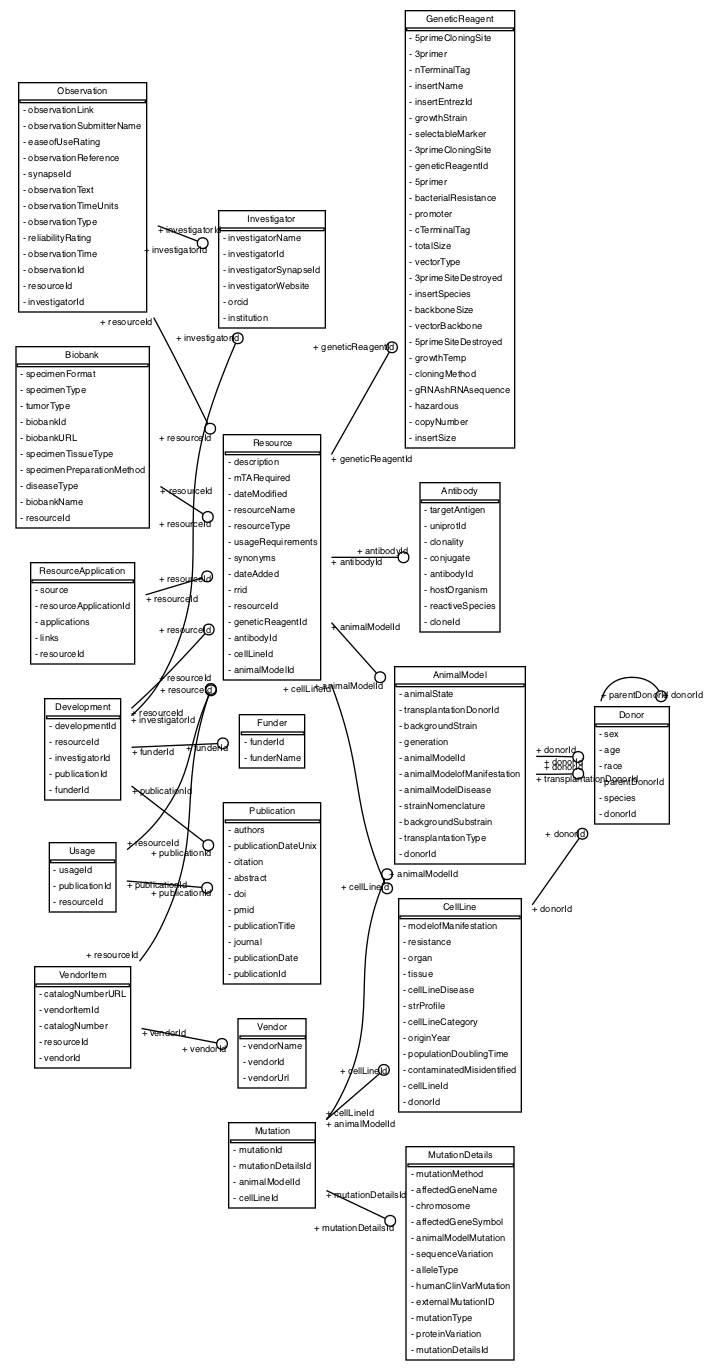

In [9]:
# Run this if you made an the viz 
Image(output_path)

## Query and Load your Database


In [6]:
# Load and parse aruguments
arguments = parse_variables(args).set_arguments()

# Run your chosen query. Depending on if saving local or on synapse, check for output accordingly.
sql_query(arguments['data_dir'],
          arguments['rdb_jsonld_filename'],
          arguments['path_to_configs']).run_sql_queries(arguments)

2022-03-02 15:31:58,956 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-02 15:31:58,957 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 15:31:58,959 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-02 15:31:58,960 INFO sqlalchemy.engine.Engine [generated in 0.00099s] ()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - [generated in 0.00099s] ()


2022-03-02 15:31:58,963 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-02 15:31:58,964 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:31:58] sqlalchemy.engine.Engine - [raw sql] ()

UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.5.1) is available. Your version (2.4.0) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.5.1 release notes

https://python-docs.synapse.org/build/html/news.html



### MySql Query Playground

If you want to try out some new queries use this area below:

In [19]:
# Connect to your MySql database. Do not change this area, just run it :)
path_to_json_ld = sql_helpers.get_data_path(args['data_dir'], args['rdb_jsonld_filename'])

rdb_model = RDB(
    path_to_json_ld=path_to_json_ld,
    requires_component_relationship = "requiresComponent"
)

json_data_model = load_json(path_to_json_ld)

var = sql_helpers.parse_config(args['path_to_configs'], 'sql_config.yml')
connection = str("mysql://{0}:{1}@{2}/".format(var['username'],
    var['password'], var['host'])) + rdb_model.schema_name

sql_model = SQL(rdb_model, connection)

2022-03-02 15:38:35,864 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'sql_mode'


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'sql_mode'


2022-03-02 15:38:35,865 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - [raw sql] ()


2022-03-02 15:38:35,868 INFO sqlalchemy.engine.Engine SHOW VARIABLES LIKE 'lower_case_table_names'


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - SHOW VARIABLES LIKE 'lower_case_table_names'


2022-03-02 15:38:35,869 INFO sqlalchemy.engine.Engine [generated in 0.00128s] ()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - [generated in 0.00128s] ()


2022-03-02 15:38:35,873 INFO sqlalchemy.engine.Engine SELECT DATABASE()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - SELECT DATABASE()


2022-03-02 15:38:35,875 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO: [2022-03-02 15:38:35] sqlalchemy.engine.Engine - [raw sql] ()


In [ ]:
query = 'SELECT * FROM `Biobank`'

In [18]:
df = sql_model.run_sql_query(sql_model, [query])
df

specimenFormat  \
0                    RNA,whole tumor,DNA   
1  whole tumor,DNA,whole cell lysate,RNA   

                               specimenType  \
0                              human tissue   
1  cell lines,human tissue,xenograft tumors   

                                           tumorType  \
0  malignant peripheral nerve sheath tumor,schwan...   
1  malignant peripheral nerve sheath tumor,plexif...   

                              biobankId  \
0  674650f1-dcd7-4342-8c1a-d17b141b4954   
1  d6f86049-4dc0-4543-bf99-0311eb44cb6e   

                                          biobankURL  \
0   https://dhartspore.org/request-biospecimens.html   
1  https://www.hopkinsmedicine.org/kimmel_cancer_...   

                           specimenTissueType  \
0  tumor,blood,bone,cerebrospinal fluid,brain   
1                                 tumor,blood   

                           specimenPreparationMethod  \
0  Cryopreserved, RNA later, Formalin-fixed, Ethanol   
1                                 Flash frozen, FFPE   

                diseaseType                                   biobankName  \
0  Neurofibromatosis type 1                                   CTF Biobank   
1  Neurofibromatosis type 1  The Johns Hopkins NF1 Biospecimen Repository   

                             resourceId  
0  e4e60a43-9073-4dfa-a629-76b472451b7f  
1  17ad02e9-22c2-429e-8f1f-361adba1e0d7

### Helpful Notes:

**Accessing your MySql database from the commandline**

- From the commandline enter: 
    - `mysql -u root -p` 
- Enter your username and password that you used when installing MySql.
- Choose your database. For example:
    - `use nf_research_tools;`
- Look at the tables:
    - `show tables;`
- Look at a specific table:
    - `describe AnimalModel;`
- Can write queries:
    - `SELECT * from AnimalModel;`
- If you need to to remake your database for any reason (for example you updated your data model):
    - `drop nf_research_tools;`
    
[Here](http://g2pc1.bu.edu/~qzpeng/manual/MySQL%20Commands.htm) is a helpful cheatsheet of commandline arguments for interacting with your MySql database.